In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sys
import time
import math
import random
import copy
import warnings
warnings.filterwarnings('ignore')

In [2]:
acc0 = [[0.40939998626708984, 0.44839999079704285, 0.09799999743700027, 0.4700999855995178, 0.19120000302791595, 0.3732999861240387, 0.47620001435279846, 0.6832000017166138, 0.4171000123023987, 0.4097999930381775, 0.40220001339912415, 0.7063000202178955, 0.6715999841690063, 0.5690000057220459, 0.42899999022483826, 0.5950000286102295, 0.19519999623298645, 0.13099999725818634, 0.19619999825954437, 0.5460000038146973, 0.34299999475479126, 0.47440001368522644, 0.3774000108242035, 0.49320000410079956, 0.31790000200271606, 0.09799999743700027, 0.6176000237464905, 0.5321000218391418, 0.5543000102043152, 0.6399000287055969], [0.4221999943256378, 0.6985999941825867, 0.7010999917984009, 0.36559998989105225, 0.7218000292778015, 0.09799999743700027, 0.09799999743700027, 0.7282000184059143, 0.4066999852657318, 0.6951000094413757, 0.5321999788284302, 0.65420001745224, 0.5485000014305115, 0.5224999785423279, 0.18799999356269836, 0.7210000157356262, 0.6362000107765198, 0.65829998254776, 0.35830000042915344, 0.26840001344680786, 0.3587999939918518, 0.1979999989271164, 0.45350000262260437, 0.536899983882904, 0.35179999470710754, 0.4666999876499176, 0.09799999743700027, 0.5110999941825867, 0.7138000130653381, 0.4043999910354614], [0.5175999999046326, 0.2784999907016754, 0.2529999911785126, 0.1972000002861023, 0.3594000041484833, 0.451200008392334, 0.18469999730587006, 0.427700012922287, 0.7448999881744385, 0.2718000113964081, 0.27469998598098755, 0.48980000615119934, 0.44449999928474426, 0.37279999256134033, 0.37049999833106995, 0.16609999537467957, 0.30320000648498535, 0.09799999743700027, 0.4359999895095825, 0.37700000405311584, 0.3521000146865845, 0.5733000040054321, 0.5478000044822693, 0.7279999852180481, 0.13779999315738678, 0.37630000710487366, 0.09799999743700027, 0.09799999743700027, 0.7504000067710876, 0.37929999828338623], [0.6746000051498413, 0.29350000619888306, 0.289900004863739, 0.4521999955177307, 0.3716999888420105, 0.30079999566078186, 0.20020000636577606, 0.45170000195503235, 0.1137000024318695, 0.5389999747276306, 0.11349999904632568, 0.4433000087738037, 0.44749999046325684, 0.35370001196861267, 0.6157000064849854, 0.4912000000476837, 0.2761000096797943, 0.44690001010894775, 0.20880000293254852, 0.35429999232292175, 0.21629999577999115, 0.3855000138282776, 0.4171000123023987, 0.12250000238418579, 0.4602999985218048, 0.3774999976158142, 0.2913999855518341, 0.35850000381469727, 0.11349999904632568, 0.3962000012397766], [0.2468000054359436, 0.5249999761581421, 0.6219000220298767, 0.6985999941825867, 0.4503999948501587, 0.2092999964952469, 0.3873000144958496, 0.7796000242233276, 0.5446000099182129, 0.32010000944137573, 0.23000000417232513, 0.5482000112533569, 0.5737000107765198, 0.79339998960495, 0.36320000886917114, 0.7716000080108643, 0.4643000066280365, 0.21320000290870667, 0.26460000872612, 0.5593000054359436, 0.5092999935150146, 0.5602999925613403, 0.3630000054836273, 0.31929999589920044, 0.680899977684021, 0.45730000734329224, 0.2084999978542328, 0.20999999344348907, 0.7441999912261963, 0.6043000221252441], [0.6664000153541565, 0.5601000189781189, 0.38940000534057617, 0.5493000149726868, 0.20260000228881836, 0.4185999929904938, 0.6998999714851379, 0.640999972820282, 0.5212000012397766, 0.41190001368522644, 0.30090001225471497, 0.5968999862670898, 0.7843000292778015, 0.612500011920929, 0.5796999931335449, 0.4997999966144562, 0.4860999882221222, 0.6948999762535095, 0.4722000062465668, 0.4219000041484833, 0.30090001225471497, 0.60589998960495, 0.5266000032424927, 0.6151000261306763, 0.2809999883174896, 0.6955999732017517, 0.6334999799728394, 0.12729999423027039, 0.5128999948501587, 0.7718999981880188], [0.6984999775886536, 0.6843000054359436, 0.558899998664856, 0.6714000105857849, 0.71670001745224, 0.34299999475479126, 0.42489999532699585, 0.7712000012397766, 0.5989999771118164, 0.7904999852180481, 0.10320000350475311, 0.6090999841690063, 0.18729999661445618, 0.4235000014305115, 0.10320000350475311, 0.10320000350475311, 0.3095000088214874, 0.849399983882904, 0.37209999561309814, 0.5217000246047974, 0.3716999888420105, 0.7876999974250793, 0.6421999931335449, 0.7074000239372253, 0.2687999904155731, 0.7530999779701233, 0.35260000824928284, 0.7806000113487244, 0.10320000350475311, 0.5435000061988831], [0.7750999927520752, 0.6696000099182129, 0.754800021648407, 0.2840999960899353, 0.5663999915122986, 0.8016999959945679, 0.28049999475479126, 0.8026000261306763, 0.10320000350475311, 0.2061000019311905, 0.6403999924659729, 0.7092999815940857, 0.7325999736785889, 0.3328000009059906, 0.628000020980835, 0.2599000036716461, 0.5625, 0.8064000010490417, 0.5590000152587891, 0.193900004029274, 0.22830000519752502, 0.16680000722408295, 0.10320000350475311, 0.2718000113964081, 0.33340001106262207, 0.5781999826431274, 0.6758000254631042, 0.41749998927116394, 0.6473000049591064, 0.22059999406337738], [0.8070999979972839, 0.17170000076293945, 0.8410000205039978, 0.3864000141620636, 0.652999997138977, 0.739799976348877, 0.6625999808311462, 0.8080000281333923, 0.7400000095367432, 0.7024999856948853, 0.5724999904632568, 0.5932999849319458, 0.23070000112056732, 0.5809999704360962, 0.6392999887466431, 0.5515000224113464, 0.6313999891281128, 0.758400022983551, 0.8292999863624573, 0.4528000056743622, 0.43869999051094055, 0.13210000097751617, 0.39010000228881836, 0.15539999306201935, 0.6498000025749207, 0.41620001196861267, 0.310699999332428, 0.3192000091075897, 0.6183000206947327, 0.6776999831199646], [0.22429999709129333, 0.5577999949455261, 0.21279999613761902, 0.4787999987602234, 0.10159999877214432, 0.8126000165939331, 0.430400013923645, 0.39250001311302185, 0.7343999743461609, 0.725600004196167, 0.8086000084877014, 0.5299999713897705, 0.5992000102996826, 0.48159998655319214, 0.17679999768733978, 0.628000020980835, 0.8557999730110168, 0.3813000023365021, 0.10620000213384628, 0.10100000351667404, 0.5444999933242798, 0.8070999979972839, 0.7760999798774719, 0.8278999924659729, 0.10109999775886536, 0.8694999814033508, 0.7633000016212463, 0.2475000023841858, 0.7681999802589417, 0.6348000168800354], [0.8712999820709229, 0.35760000348091125, 0.5806000232696533, 0.5037000179290771, 0.37450000643730164, 0.6168000102043152, 0.44190001487731934, 0.314300000667572, 0.785099983215332, 0.8962000012397766, 0.7222999930381775, 0.774399995803833, 0.4065999984741211, 0.8295999765396118, 0.7440999746322632, 0.42899999022483826, 0.7793999910354614, 0.8210999965667725, 0.27129998803138733, 0.7096999883651733, 0.7434999942779541, 0.4083000123500824, 0.3474999964237213, 0.37070000171661377, 0.5859000086784363, 0.7010999917984009, 0.5471000075340271, 0.26170000433921814, 0.40939998626708984, 0.19179999828338623], [0.5699999928474426, 0.7430999875068665, 0.10119999945163727, 0.4652999937534332, 0.7319999933242798, 0.8640000224113464, 0.3540000021457672, 0.7829999923706055, 0.6495000123977661, 0.861299991607666, 0.6345999836921692, 0.1071000024676323, 0.7578999996185303, 0.9003000259399414, 0.5892000198364258, 0.14110000431537628, 0.6243000030517578, 0.5241000056266785, 0.4196999967098236, 0.4846999943256378, 0.7168999910354614, 0.10329999774694443, 0.7864000201225281, 0.5379999876022339, 0.8611999750137329, 0.4336000084877014, 0.7493000030517578, 0.7677000164985657, 0.8098999857902527, 0.11580000072717667], [0.6128000020980835, 0.8447999954223633, 0.5694000124931335, 0.7177000045776367, 0.15629999339580536, 0.6545000076293945, 0.5853000283241272, 0.7998999953269958, 0.621999979019165, 0.9049000144004822, 0.20630000531673431, 0.09920000284910202, 0.6797999739646912, 0.16349999606609344, 0.8490999937057495, 0.7652999758720398, 0.8526999950408936, 0.20020000636577606, 0.7577000260353088, 0.8586000204086304, 0.5667999982833862, 0.8337000012397766, 0.6617000102996826, 0.704800009727478, 0.6692000031471252, 0.8514000177383423, 0.7236999869346619, 0.2563999891281128, 0.774399995803833, 0.8324999809265137], [0.7290999889373779, 0.7089999914169312, 0.8252000212669373, 0.843999981880188, 0.8944000005722046, 0.5557000041007996, 0.8949000239372253, 0.6636999845504761, 0.4447999894618988, 0.616100013256073, 0.8888000249862671, 0.8113999962806702, 0.7174999713897705, 0.7142999768257141, 0.38609999418258667, 0.25529998540878296, 0.8019000291824341, 0.5830000042915344, 0.28220000863075256, 0.9156000018119812, 0.84579998254776, 0.7906000018119812, 0.729200005531311, 0.8586999773979187, 0.7382000088691711, 0.5425000190734863, 0.7562000155448914, 0.897599995136261, 0.6516000032424927, 0.19280000030994415], [0.8619999885559082, 0.6610999703407288, 0.5982999801635742, 0.7634999752044678, 0.824400007724762, 0.8504999876022339, 0.5799000263214111, 0.6226000189781189, 0.8389000296592712, 0.6032999753952026, 0.46389999985694885, 0.6205999851226807, 0.7174000144004822, 0.5968999862670898, 0.5425999760627747, 0.9071999788284302, 0.8707000017166138, 0.6747000217437744, 0.722000002861023, 0.6657000184059143, 0.5916000008583069, 0.5263000130653381, 0.323199987411499, 0.8205000162124634, 0.8029000163078308, 0.5357999801635742, 0.5313000082969666, 0.8209999799728394, 0.8672000169754028, 0.5390999913215637], [0.7383999824523926, 0.6456999778747559, 0.8418999910354614, 0.6668999791145325, 0.3756999969482422, 0.7297999858856201, 0.6477000117301941, 0.7452999949455261, 0.3614000082015991, 0.8859999775886536, 0.6491000056266785, 0.762499988079071, 0.5910000205039978, 0.7730000019073486, 0.2567000091075897, 0.907800018787384, 0.8177000284194946, 0.5400999784469604, 0.18199999630451202, 0.451200008392334, 0.12999999523162842, 0.7889000177383423, 0.5591999888420105, 0.4973999857902527, 0.5932000279426575, 0.7098000049591064, 0.7626000046730042, 0.16449999809265137, 0.9020000100135803, 0.6312000155448914], [0.7394000291824341, 0.474700003862381, 0.8427000045776367, 0.5763999819755554, 0.882099986076355, 0.8805999755859375, 0.607200026512146, 0.6607000231742859, 0.4611000120639801, 0.8105999827384949, 0.8452000021934509, 0.8234999775886536, 0.486299991607666, 0.6983000040054321, 0.8689000010490417, 0.8626999855041504, 0.6003999710083008, 0.5149000287055969, 0.5708000063896179, 0.7207000255584717, 0.6542999744415283, 0.7937999963760376, 0.7928000092506409, 0.705299973487854, 0.7271999716758728, 0.5457000136375427, 0.4399999976158142, 0.5570999979972839, 0.7253999710083008, 0.4927000105381012], [0.8514999747276306, 0.8537999987602234, 0.38339999318122864, 0.8579000234603882, 0.8054999709129333, 0.8277999758720398, 0.7204999923706055, 0.7876999974250793, 0.70660001039505, 0.710099995136261, 0.8953999876976013, 0.5144000053405762, 0.5623999834060669, 0.5600000023841858, 0.7143999934196472, 0.46540001034736633, 0.6523000001907349, 0.7476999759674072, 0.5591999888420105, 0.7601000070571899, 0.42989999055862427, 0.6581000089645386, 0.453000009059906, 0.8634999990463257, 0.8726000189781189, 0.43689998984336853, 0.900600016117096, 0.8779000043869019, 0.37209999561309814, 0.7301999926567078], [0.5728999972343445, 0.41359999775886536, 0.3046000003814697, 0.23319999873638153, 0.7520999908447266, 0.3402000069618225, 0.46059998869895935, 0.7085999846458435, 0.76910001039505, 0.8665000200271606, 0.743399977684021, 0.5346999764442444, 0.6794999837875366, 0.5135999917984009, 0.757099986076355, 0.4465000033378601, 0.9280999898910522, 0.7247999906539917, 0.24379999935626984, 0.45739999413490295, 0.5990999937057495, 0.6687999963760376, 0.7148000001907349, 0.7799000144004822, 0.4180999994277954, 0.9190000295639038, 0.8860999941825867, 0.6570000052452087, 0.6509000062942505, 0.9205999970436096], [0.8715999722480774, 0.7182999849319458, 0.7732999920845032, 0.6661999821662903, 0.789900004863739, 0.5511999726295471, 0.6850000023841858, 0.7059000134468079, 0.599399983882904, 0.7738000154495239, 0.8683000206947327, 0.779699981212616, 0.7383999824523926, 0.9093000292778015, 0.8041999936103821, 0.5351999998092651, 0.6597999930381775, 0.9060999751091003, 0.6074000000953674, 0.8007000088691711, 0.6198999881744385, 0.632099986076355, 0.8328999876976013, 0.6097000241279602, 0.8356999754905701, 0.7980999946594238, 0.593999981880188, 0.7692999839782715, 0.6725999712944031, 0.7734000086784363], [0.8928999900817871, 0.6830000281333923, 0.8745999932289124, 0.7063000202178955, 0.54830002784729, 0.6887999773025513, 0.7752000093460083, 0.8682000041007996, 0.5658000111579895, 0.8126999735832214, 0.7688000202178955, 0.8424000144004822, 0.8014000058174133, 0.762499988079071, 0.8338000178337097, 0.8246999979019165, 0.8166999816894531, 0.8424999713897705, 0.7418000102043152, 0.6969000101089478, 0.8766999840736389, 0.8167999982833862, 0.7675999999046326, 0.7544000148773193, 0.7530999779701233, 0.9023000001907349, 0.8691999912261963, 0.7319999933242798, 0.6693000197410583, 0.766700029373169], [0.8809000253677368, 0.9337000250816345, 0.7152000069618225, 0.8003000020980835, 0.6219000220298767, 0.7631000280380249, 0.46970000863075256, 0.8521000146865845, 0.7889999747276306, 0.680899977684021, 0.9147999882698059, 0.7749000191688538, 0.880299985408783, 0.6945000290870667, 0.8166999816894531, 0.6496000289916992, 0.435699999332428, 0.784500002861023, 0.9136999845504761, 0.7861999869346619, 0.9348999857902527, 0.8828999996185303, 0.5939000248908997, 0.8770999908447266, 0.18150000274181366, 0.8855999708175659, 0.8073999881744385, 0.3544999957084656, 0.8804000020027161, 0.8312000036239624], [0.807699978351593, 0.867900013923645, 0.8529000282287598, 0.9067999720573425, 0.38019999861717224, 0.829800009727478, 0.6980999708175659, 0.8004999756813049, 0.8497999906539917, 0.7681999802589417, 0.311599999666214, 0.8525999784469604, 0.7523000240325928, 0.7088000178337097, 0.8755999803543091, 0.489300012588501, 0.5968999862670898, 0.35409998893737793, 0.725600004196167, 0.8046000003814697, 0.5356000065803528, 0.5590999722480774, 0.8112000226974487, 0.83160001039505, 0.9398000240325928, 0.8827999830245972, 0.8288000226020813, 0.8363000154495239, 0.5152999758720398, 0.6758000254631042], [0.7973999977111816, 0.8756999969482422, 0.8416000008583069, 0.8188999891281128, 0.7921000123023987, 0.7369999885559082, 0.8284000158309937, 0.779699981212616, 0.8331999778747559, 0.819599986076355, 0.7343000173568726, 0.6557999849319458, 0.885699987411499, 0.7928000092506409, 0.8865000009536743, 0.6031000018119812, 0.847000002861023, 0.7674999833106995, 0.5756000280380249, 0.7818999886512756, 0.8725000023841858, 0.7567999958992004, 0.9136999845504761, 0.6460000276565552, 0.8162000179290771, 0.8095999956130981, 0.906499981880188, 0.7912999987602234, 0.7135000228881836, 0.7699000239372253], [0.181099995970726, 0.9362000226974487, 0.6776000261306763, 0.9344000220298767, 0.7767000198364258, 0.25850000977516174, 0.6693999767303467, 0.9182000160217285, 0.18170000612735748, 0.5231000185012817, 0.4271000027656555, 0.6680999994277954, 0.8676000237464905, 0.5533000230789185, 0.9320999979972839, 0.8855999708175659, 0.8727999925613403, 0.9251000285148621, 0.9003000259399414, 0.8702999949455261, 0.704200029373169, 0.8579000234603882, 0.2614000141620636, 0.9053000211715698, 0.7128999829292297, 0.3723999857902527, 0.8406999707221985, 0.16259999573230743, 0.7958999872207642, 0.7390000224113464], [0.6942999958992004, 0.7146000266075134, 0.9063000082969666, 0.6898999810218811, 0.6876000165939331, 0.249099999666214, 0.881600022315979, 0.6808000206947327, 0.7378000020980835, 0.7567999958992004, 0.7233999967575073, 0.8841999769210815, 0.28519999980926514, 0.21240000426769257, 0.6793000102043152, 0.5081999897956848, 0.7878000140190125, 0.8921999931335449, 0.8065000176429749, 0.8766999840736389, 0.5131999850273132, 0.9039000272750854, 0.9343000054359436, 0.585099995136261, 0.8256999850273132, 0.7821000218391418, 0.5805000066757202, 0.8526999950408936, 0.6650999784469604, 0.7501999735832214], [0.7384999990463257, 0.8924999833106995, 0.4560999870300293, 0.7716000080108643, 0.41510000824928284, 0.3440000116825104, 0.8812999725341797, 0.7450000047683716, 0.9222000241279602, 0.5230000019073486, 0.8299000263214111, 0.8646000027656555, 0.8604000210762024, 0.36079999804496765, 0.2808000147342682, 0.7325999736785889, 0.6464999914169312, 0.9110000133514404, 0.7526999711990356, 0.5623000264167786, 0.832099974155426, 0.8299000263214111, 0.5285000205039978, 0.9158999919891357, 0.9315000176429749, 0.3546999990940094, 0.6054999828338623, 0.8658999800682068, 0.3610999882221222, 0.8748000264167786], [0.8802000284194946, 0.8758999705314636, 0.70660001039505, 0.8410999774932861, 0.46309998631477356, 0.8695999979972839, 0.92330002784729, 0.9039000272750854, 0.8147000074386597, 0.9150000214576721, 0.8513000011444092, 0.27000001072883606, 0.8126000165939331, 0.5958999991416931, 0.835099995136261, 0.38440001010894775, 0.8841000199317932, 0.6256999969482422, 0.4823000133037567, 0.8446000218391418, 0.8647000193595886, 0.23759999871253967, 0.8223999738693237, 0.8939999938011169, 0.828499972820282, 0.8935999870300293, 0.6241000294685364, 0.6607000231742859, 0.7865999937057495, 0.8971999883651733], [0.4278999865055084, 0.8914999961853027, 0.883899986743927, 0.7822999954223633, 0.8029999732971191, 0.833899974822998, 0.40709999203681946, 0.7214999794960022, 0.8159000277519226, 0.739300012588501, 0.6116999983787537, 0.9449999928474426, 0.9020000100135803, 0.51419997215271, 0.9230999946594238, 0.8355000019073486, 0.7350999712944031, 0.49140000343322754, 0.6593999862670898, 0.32330000400543213, 0.8906000256538391, 0.6837000250816345, 0.8944000005722046, 0.3792000114917755, 0.7459999918937683, 0.7907000184059143, 0.9114000201225281, 0.7261000275611877, 0.9107000231742859, 0.8098999857902527], [0.7444000244140625, 0.8324000239372253, 0.8072999715805054, 0.8537999987602234, 0.8657000064849854, 0.42179998755455017, 0.647599995136261, 0.9089999794960022, 0.6965000033378601, 0.906499981880188, 0.7560999989509583, 0.8234999775886536, 0.9399999976158142, 0.925599992275238, 0.42800000309944153, 0.6851999759674072, 0.8324999809265137, 0.6761000156402588, 0.8245999813079834, 0.4291999936103821, 0.8687000274658203, 0.48989999294281006, 0.6938999891281128, 0.8495000004768372, 0.7257000207901001, 0.7031999826431274, 0.6593000292778015, 0.8863999843597412, 0.7057999968528748, 0.879800021648407]]
loss0 = [[9.971549034118652, 16.792821884155273, 294.5412902832031, 5.235029697418213, 18.58095932006836, 15.008598327636719, 13.037067413330078, 3.51926326751709, 9.075952529907227, 10.897064208984375, 6.753286838531494, 2.8696067333221436, 2.5294973850250244, 8.257786750793457, 9.791097640991211, 6.986029624938965, 17.448209762573242, 14.28409194946289, 34.36738967895508, 5.888708114624023, 11.703064918518066, 8.031946182250977, 11.807671546936035, 11.2084379196167, 9.5108642578125, 284.3724365234375, 6.835718154907227, 8.625024795532227, 8.397092819213867, 3.659212112426758], [11.129149436950684, 2.212425947189331, 1.654693365097046, 12.427491188049316, 3.055419445037842, 121.44081115722656, 28.9924373626709, 2.3866312503814697, 10.868067741394043, 3.730994462966919, 8.452095985412598, 3.3696258068084717, 9.36717414855957, 10.169737815856934, 15.084656715393066, 3.531691074371338, 3.046229600906372, 4.214987277984619, 13.419816970825195, 18.560325622558594, 8.965559005737305, 9.389961242675781, 5.798807621002197, 6.484740257263184, 10.943597793579102, 11.039665222167969, 16.288358688354492, 7.466477394104004, 3.69392466545105, 5.467509746551514], [6.233264446258545, 6.313779354095459, 7.1550493240356445, 5.275791168212891, 6.915850639343262, 4.9183855056762695, 18.902748107910156, 7.189050197601318, 2.4133291244506836, 6.0906476974487305, 7.704320907592773, 6.100129127502441, 6.974397659301758, 6.634455680847168, 10.812673568725586, 7.646666526794434, 4.410118579864502, 65.04566955566406, 7.283539295196533, 6.917662620544434, 6.810846328735352, 3.475539445877075, 5.9431891441345215, 1.3544217348098755, 30.84119415283203, 8.640497207641602, 55.8294563293457, 75.08771514892578, 1.9017548561096191, 4.465205192565918], [2.126751661300659, 8.313348770141602, 8.595791816711426, 4.310445308685303, 8.093483924865723, 7.496274948120117, 26.88265037536621, 5.9332146644592285, 71.36129760742188, 6.188235282897949, 58.83843231201172, 5.1684651374816895, 5.876655578613281, 8.72774887084961, 3.417924165725708, 3.1175448894500732, 16.22220230102539, 6.332274913787842, 28.450956344604492, 5.777917861938477, 24.250268936157227, 11.490370750427246, 5.855571746826172, 67.88837432861328, 8.355571746826172, 4.56707239151001, 8.961371421813965, 6.41853141784668, 82.03357696533203, 4.915561199188232], [11.993200302124023, 5.330340385437012, 4.2159295082092285, 2.23234224319458, 4.44974946975708, 17.61934471130371, 4.253894329071045, 1.5698226690292358, 4.79699182510376, 6.135837078094482, 10.424769401550293, 6.158846378326416, 3.5492496490478516, 1.317850112915039, 11.538761138916016, 2.1548826694488525, 5.325318813323975, 16.756357192993164, 9.985648155212402, 3.810608148574829, 5.060029983520508, 4.050511360168457, 7.54802131652832, 10.35100269317627, 3.896946907043457, 5.86474084854126, 17.591581344604492, 17.583175659179688, 1.8774935007095337, 3.685710906982422], [3.079174518585205, 4.20149040222168, 5.4370269775390625, 2.6786210536956787, 34.61133575439453, 5.225617408752441, 2.8613836765289307, 1.946947693824768, 3.9980733394622803, 4.093111515045166, 5.397076606750488, 2.852604627609253, 1.101488471031189, 2.081394672393799, 5.504680633544922, 2.8602547645568848, 9.114856719970703, 2.398698329925537, 5.717820644378662, 4.215279579162598, 7.2801513671875, 2.4149279594421387, 4.9975810050964355, 3.7288804054260254, 5.5342631340026855, 2.7020320892333984, 4.137298583984375, 37.49606704711914, 3.971015691757202, 1.0902377367019653], [2.171193838119507, 2.138552188873291, 3.375197649002075, 1.7508050203323364, 1.4537862539291382, 4.3554182052612305, 4.340167999267578, 1.7597390413284302, 1.927743911743164, 0.9588357210159302, 17.680112838745117, 2.517453670501709, 10.416874885559082, 3.975553035736084, 15.893534660339355, 19.627891540527344, 4.4513630867004395, 0.6402950286865234, 4.09486722946167, 3.6931304931640625, 4.250982761383057, 1.1112297773361206, 2.293936252593994, 1.5048737525939941, 8.171211242675781, 1.2676602602005005, 5.535619735717773, 1.627106785774231, 12.473224639892578, 2.7670340538024902], [1.3479721546173096, 1.957627534866333, 1.4074466228485107, 6.60337495803833, 4.233015060424805, 0.9185655117034912, 5.684874057769775, 1.0239017009735107, 16.419641494750977, 8.281365394592285, 3.213470935821533, 2.0377156734466553, 2.2361345291137695, 7.417649269104004, 2.6040966510772705, 4.706116199493408, 2.8417983055114746, 0.939014732837677, 3.162411689758301, 9.502379417419434, 5.3020830154418945, 17.398767471313477, 43.21916198730469, 5.876952171325684, 3.7402522563934326, 2.8144922256469727, 1.3190029859542847, 4.099704265594482, 2.4206321239471436, 10.402363777160645], [1.5563017129898071, 16.706256866455078, 0.716744601726532, 6.8411407470703125, 2.1722910404205322, 1.0367718935012817, 2.0384278297424316, 1.115424394607544, 1.6527894735336304, 1.9348080158233643, 2.5596017837524414, 3.7525038719177246, 5.728766918182373, 3.1356799602508545, 2.454531192779541, 2.790518045425415, 2.537822723388672, 1.2984880208969116, 0.7974964380264282, 3.602916717529297, 5.865024089813232, 24.716938018798828, 2.9356393814086914, 20.416040420532227, 1.9540023803710938, 5.19297981262207, 5.6395955085754395, 5.064551830291748, 3.1399080753326416, 2.2065834999084473], [3.515723466873169, 1.9873851537704468, 6.156291484832764, 5.1300482749938965, 9.573243141174316, 0.875289261341095, 3.6532671451568604, 6.122176647186279, 1.4528579711914062, 1.5941710472106934, 0.9039022326469421, 2.0548031330108643, 1.8161232471466064, 2.7858943939208984, 6.179669380187988, 2.5718772411346436, 0.647968590259552, 4.899129867553711, 7.070522785186768, 9.858124732971191, 4.298760414123535, 1.2207422256469727, 1.4958890676498413, 0.8324797749519348, 11.241844177246094, 0.550746738910675, 1.0206302404403687, 9.674026489257812, 1.1402950286865234, 1.5627027750015259], [0.6173765659332275, 4.70407247543335, 2.8211817741394043, 4.000401973724365, 5.190900802612305, 3.694157123565674, 3.6914520263671875, 7.425471782684326, 1.0094596147537231, 0.38762491941452026, 1.9405021667480469, 1.2018216848373413, 6.2854790687561035, 0.7127619385719299, 1.3900105953216553, 4.393532752990723, 1.128632664680481, 1.1240756511688232, 7.815548419952393, 1.7931162118911743, 1.5496293306350708, 6.618372440338135, 7.829576015472412, 5.940870761871338, 3.1902801990509033, 2.040677785873413, 3.666867256164551, 11.856017112731934, 6.068889141082764, 24.83904457092285], [2.095327377319336, 1.5207563638687134, 22.887393951416016, 5.062798023223877, 1.133166790008545, 0.5663745999336243, 6.287023067474365, 1.170897364616394, 2.5983145236968994, 0.6459518671035767, 2.21050763130188, 29.90218162536621, 1.1474125385284424, 0.43583956360816956, 3.7557871341705322, 12.541254997253418, 3.6897804737091064, 3.3532731533050537, 4.177036285400391, 7.065627574920654, 1.4569783210754395, 22.180124282836914, 0.8896082043647766, 5.559917449951172, 0.698466956615448, 3.9086551666259766, 1.1468552350997925, 1.4482935667037964, 1.331333041191101, 24.743757247924805], [1.5314592123031616, 0.6417629718780518, 3.5728700160980225, 1.6456117630004883, 15.34115982055664, 2.1049270629882812, 2.361963987350464, 1.034530520439148, 1.6470825672149658, 0.38880395889282227, 14.094391822814941, 28.516769409179688, 1.7971895933151245, 16.585092544555664, 0.5331379771232605, 1.4368369579315186, 0.5222285389900208, 28.55429458618164, 1.226239800453186, 0.5150483250617981, 2.633514404296875, 0.7317883372306824, 1.8100665807724, 1.7091429233551025, 1.6616305112838745, 0.5258849859237671, 1.0119048357009888, 14.750053405761719, 1.156740665435791, 0.6396061778068542], [1.710969090461731, 1.0909903049468994, 0.7438828349113464, 0.726274311542511, 0.4296467900276184, 3.620739459991455, 0.4863893985748291, 1.501944661140442, 4.3907318115234375, 4.903351783752441, 0.43812295794487, 0.8901983499526978, 1.4301146268844604, 1.7578564882278442, 11.471487045288086, 17.85209083557129, 1.1927802562713623, 4.470035076141357, 6.994117259979248, 0.3480130732059479, 0.594399094581604, 0.7260544896125793, 1.023378849029541, 0.7641295194625854, 2.199059247970581, 2.7857353687286377, 0.9736436605453491, 0.527585506439209, 2.519282579421997, 10.231245040893555], [0.5302104353904724, 4.5326828956604, 2.5305376052856445, 0.9055373072624207, 0.7487849593162537, 0.6946612596511841, 4.250104904174805, 4.303643703460693, 0.8022786378860474, 2.642019033432007, 10.976103782653809, 2.1562585830688477, 1.9423452615737915, 2.7383928298950195, 3.7386653423309326, 0.616584062576294, 0.5299046635627747, 2.017747163772583, 1.6977988481521606, 3.3355801105499268, 4.254707336425781, 3.5223543643951416, 4.767082214355469, 0.964020311832428, 0.80949866771698, 1.926769495010376, 4.892977714538574, 0.6814700365066528, 0.5914915800094604, 2.5966575145721436], [1.1889549493789673, 2.4144389629364014, 0.7588638663291931, 1.5327457189559937, 6.946642875671387, 1.4706064462661743, 1.7688682079315186, 1.1381580829620361, 6.942474842071533, 0.6244044899940491, 1.7824413776397705, 1.4433058500289917, 1.8734047412872314, 0.9582123160362244, 6.84155797958374, 0.37755343317985535, 0.7627100348472595, 2.279585123062134, 9.724462509155273, 5.290863037109375, 8.482098579406738, 0.7903818488121033, 1.6493552923202515, 2.517989158630371, 2.0040860176086426, 1.5065088272094727, 0.9251300096511841, 8.177985191345215, 0.41118013858795166, 2.1290602684020996], [1.0217596292495728, 6.62623929977417, 0.6964508891105652, 2.7342476844787598, 0.44260111451148987, 0.49765610694885254, 3.129027843475342, 1.9051798582077026, 5.6594672203063965, 0.9568701982498169, 0.5012316703796387, 0.7832711338996887, 2.7878365516662598, 1.2227537631988525, 0.5674830079078674, 0.6084740161895752, 2.887878894805908, 2.496062755584717, 4.453138828277588, 1.3983650207519531, 3.097561836242676, 1.373427391052246, 0.9234607219696045, 1.2930399179458618, 1.0634714365005493, 2.733625650405884, 5.237128734588623, 2.5968856811523438, 0.9968206882476807, 5.1207756996154785], [0.6808362007141113, 0.6373381614685059, 10.842144012451172, 0.7764936685562134, 0.7091997265815735, 0.9626683592796326, 1.6794865131378174, 1.0778298377990723, 1.5306721925735474, 1.1318637132644653, 0.44561219215393066, 5.994649410247803, 2.9326584339141846, 1.9672826528549194, 1.4658371210098267, 3.4330062866210938, 1.7049726247787476, 1.3929798603057861, 4.86474084854126, 2.2001397609710693, 10.42717456817627, 2.1184208393096924, 6.465724945068359, 0.517375648021698, 0.5258941054344177, 3.905438184738159, 0.42244046926498413, 0.5431427359580994, 12.031532287597656, 1.8273593187332153], [3.67285418510437, 6.004058361053467, 8.648055076599121, 10.011438369750977, 1.3340327739715576, 11.31911563873291, 6.953500747680664, 1.7335262298583984, 0.8279093503952026, 0.4387289583683014, 1.3130991458892822, 3.8280715942382812, 1.8486260175704956, 7.38156270980835, 0.8663761019706726, 6.419510364532471, 0.250149667263031, 1.7467597723007202, 15.774407386779785, 3.684461832046509, 3.5620555877685547, 1.863492727279663, 1.4652867317199707, 0.8478708267211914, 9.322452545166016, 0.268419474363327, 0.44529932737350464, 2.0084688663482666, 2.0362496376037598, 0.2892725467681885], [0.5072475075721741, 1.5306200981140137, 0.8210042715072632, 2.3439671993255615, 0.8560610413551331, 2.212996244430542, 1.5627795457839966, 1.2470580339431763, 4.201240062713623, 0.9483634829521179, 0.48825937509536743, 0.9808058738708496, 1.486473560333252, 0.4011281728744507, 0.8458532094955444, 4.3815388679504395, 3.1423892974853516, 0.39529767632484436, 4.373375415802002, 1.1502854824066162, 3.546400308609009, 1.5765043497085571, 1.0354139804840088, 2.256863594055176, 0.712744414806366, 1.2090305089950562, 4.207557201385498, 1.3943421840667725, 1.428475260734558, 0.8706077337265015], [0.6119554042816162, 1.1193015575408936, 0.5753338932991028, 1.7345566749572754, 4.809266090393066, 1.9344981908798218, 0.95035320520401, 0.7338716387748718, 4.809393882751465, 0.8013261556625366, 2.0908968448638916, 0.6861214637756348, 1.2374686002731323, 1.3903838396072388, 0.937552273273468, 0.9581466913223267, 0.9553545117378235, 0.682360827922821, 2.4433422088623047, 3.3837664127349854, 0.6269962191581726, 1.4538339376449585, 1.4938380718231201, 1.3112962245941162, 2.1125807762145996, 0.3692438006401062, 0.6548776626586914, 1.9408955574035645, 2.353612184524536, 1.070661187171936], [0.4661809504032135, 0.2502555549144745, 1.9465197324752808, 1.5807468891143799, 1.9718724489212036, 2.176844835281372, 7.107571125030518, 1.0431089401245117, 1.8896560668945312, 1.2067015171051025, 0.4063624143600464, 1.1070258617401123, 0.5631781220436096, 4.013204097747803, 0.7562637329101562, 4.805198669433594, 2.9556775093078613, 1.252509593963623, 0.35005244612693787, 0.8443421721458435, 0.28520628809928894, 0.6556268930435181, 5.660754203796387, 0.6458298563957214, 10.51191520690918, 0.6248729228973389, 0.7671440243721008, 9.37403678894043, 0.6707949638366699, 1.0409705638885498], [1.4516521692276, 0.6669605374336243, 0.8051041960716248, 0.40522128343582153, 9.588971138000488, 0.9809524416923523, 2.9657669067382812, 1.2016444206237793, 0.6914616227149963, 1.1789356470108032, 9.947885513305664, 0.6750030517578125, 1.0529345273971558, 1.2475157976150513, 0.5305885672569275, 4.9519782066345215, 2.184307336807251, 12.865553855895996, 2.27663254737854, 1.2360146045684814, 6.856785297393799, 7.592956066131592, 1.135291576385498, 0.6803778409957886, 0.335189551115036, 0.49691206216812134, 1.0450050830841064, 0.7195770740509033, 7.890504837036133, 2.6568398475646973], [1.4657113552093506, 0.5324631929397583, 0.8370009064674377, 1.1759604215621948, 2.080333709716797, 1.9512091875076294, 0.7177597880363464, 1.7066552639007568, 1.2257362604141235, 1.2390495538711548, 1.4746063947677612, 5.435600280761719, 0.5223711133003235, 1.763535976409912, 0.5414202809333801, 6.8531999588012695, 0.862825870513916, 2.891641616821289, 4.338873863220215, 1.123790979385376, 0.605602502822876, 0.9333146214485168, 0.3663753271102905, 4.8455119132995605, 2.010221242904663, 1.2157055139541626, 0.397514671087265, 0.7938706278800964, 1.5479837656021118, 1.1861637830734253], [14.440982818603516, 0.24254003167152405, 1.8714183568954468, 0.2344529777765274, 0.8942113518714905, 6.469263553619385, 1.7080059051513672, 0.3462628424167633, 8.413541793823242, 2.109391689300537, 7.392320156097412, 2.188642978668213, 0.47169771790504456, 2.067138671875, 0.2790861427783966, 0.4864206612110138, 0.5872851610183716, 0.28874579071998596, 0.40918320417404175, 0.46189722418785095, 1.1716408729553223, 0.5949178338050842, 8.269379615783691, 0.3984433114528656, 1.2196296453475952, 7.350721836090088, 0.6446475386619568, 11.66296672821045, 1.1273971796035767, 1.1131294965744019], [1.6840413808822632, 1.4307583570480347, 0.391558438539505, 1.8147906064987183, 2.3937039375305176, 21.059513092041016, 0.6103198528289795, 1.826337456703186, 1.6515862941741943, 1.1648423671722412, 1.5223560333251953, 0.47963500022888184, 10.771669387817383, 13.798977851867676, 1.9039548635482788, 3.7986719608306885, 1.0421727895736694, 0.5604881644248962, 1.116147518157959, 0.48761507868766785, 3.9950828552246094, 0.49436113238334656, 0.2902427315711975, 2.7823922634124756, 0.7445768117904663, 1.3791674375534058, 2.172783613204956, 1.0341156721115112, 1.7907506227493286, 1.4472464323043823], [1.4926561117172241, 0.4809284210205078, 7.589198589324951, 1.5551865100860596, 3.886456251144409, 10.351415634155273, 0.540785014629364, 1.3165217638015747, 0.3765546679496765, 4.066593170166016, 0.7395170331001282, 0.5392189025878906, 0.5573651790618896, 8.576797485351562, 7.273538112640381, 2.162820339202881, 2.930663824081421, 0.4900015592575073, 1.4331672191619873, 2.708732843399048, 0.8242700099945068, 0.8176094889640808, 6.808990478515625, 0.434925377368927, 0.3134305775165558, 9.725566864013672, 2.1335816383361816, 0.6832515597343445, 7.591911792755127, 0.45409277081489563], [0.4398711025714874, 0.6407275795936584, 1.2847579717636108, 0.714215874671936, 4.0556817054748535, 0.4750617742538452, 0.3569316565990448, 0.37317022681236267, 0.8656601309776306, 0.36715951561927795, 0.5446205735206604, 5.5784592628479, 0.7450754642486572, 1.3366714715957642, 0.7186604142189026, 3.8757729530334473, 0.4495909810066223, 1.7062642574310303, 3.944718837738037, 0.8025076389312744, 0.6158148646354675, 6.998823642730713, 0.6272509098052979, 0.4452421963214874, 0.7296152114868164, 0.37461093068122864, 1.9291698932647705, 1.4879628419876099, 0.9410744309425354, 0.43631279468536377], [9.450703620910645, 0.6231532692909241, 0.4575692415237427, 1.1832935810089111, 1.2378464937210083, 0.9985073208808899, 10.015997886657715, 1.7718230485916138, 1.1458652019500732, 1.0495376586914062, 2.1446752548217773, 0.2674978971481323, 0.3896220326423645, 4.274062633514404, 0.3133789300918579, 1.1832404136657715, 1.7749847173690796, 6.752829551696777, 1.730292558670044, 8.523622512817383, 0.3887408673763275, 2.013507127761841, 0.487104594707489, 9.916584014892578, 1.643652319908142, 1.6752063035964966, 0.35208195447921753, 1.5125349760055542, 0.4836604595184326, 1.2024507522583008], [1.6760495901107788, 0.6977934241294861, 0.960822343826294, 0.6998298168182373, 0.7608528733253479, 7.600874900817871, 3.581221580505371, 0.3898974657058716, 1.6949762105941772, 0.4007817506790161, 1.3103691339492798, 1.112967848777771, 0.23348842561244965, 0.4013126492500305, 4.323700904846191, 1.697263479232788, 0.9467736482620239, 3.1604599952697754, 0.7299901247024536, 5.536146640777588, 0.6737005114555359, 4.365968704223633, 2.7535858154296875, 0.8323915004730225, 3.5325727462768555, 3.6460206508636475, 2.2224462032318115, 0.4753945767879486, 1.3945080041885376, 0.6546062231063843]] 

acc1 = [[0.26190000772476196, 0.1761000007390976, 0.609000027179718, 0.5092999935150146, 0.3287000060081482, 0.20749999582767487, 0.26339998841285706, 0.5314000248908997, 0.5403000116348267, 0.6223999857902527, 0.24899999797344208, 0.5927000045776367, 0.5889999866485596, 0.24089999496936798, 0.5598999857902527, 0.47200000286102295, 0.6208999752998352, 0.19200000166893005, 0.23319999873638153, 0.5333999991416931, 0.3303999900817871, 0.6793000102043152, 0.6355999708175659, 0.508400022983551, 0.5763999819755554, 0.6310999989509583, 0.28540000319480896, 0.6245999932289124, 0.09799999743700027, 0.24250000715255737], [0.20200000703334808, 0.6748999953269958, 0.6761000156402588, 0.3176000118255615, 0.19619999825954437, 0.3075999915599823, 0.6646999716758728, 0.6115000247955322, 0.27970001101493835, 0.576200008392334, 0.7160000205039978, 0.3790000081062317, 0.09799999743700027, 0.20229999721050262, 0.4320000112056732, 0.7360000014305115, 0.3840999901294708, 0.7562000155448914, 0.26159998774528503, 0.48899999260902405, 0.6848999857902527, 0.7465999722480774, 0.5627999901771545, 0.7098000049591064, 0.6155999898910522, 0.35910001397132874, 0.4408000111579895, 0.7114999890327454, 0.6662999987602234, 0.18569999933242798], [0.5065000057220459, 0.7730000019073486, 0.5296000242233276, 0.656499981880188, 0.1145000010728836, 0.490200012922287, 0.4821999967098236, 0.09799999743700027, 0.18359999358654022, 0.5012000203132629, 0.428600013256073, 0.6270999908447266, 0.5752000212669373, 0.39239999651908875, 0.2712000012397766, 0.42910000681877136, 0.6111000180244446, 0.703000009059906, 0.19580000638961792, 0.7421000003814697, 0.29100000858306885, 0.19519999623298645, 0.5835000276565552, 0.296999990940094, 0.32420000433921814, 0.727400004863739, 0.6746000051498413, 0.3668999969959259, 0.5604000091552734, 0.3057999908924103], [0.4537000060081482, 0.76419997215271, 0.7531999945640564, 0.5989000201225281, 0.3716999888420105, 0.6072999835014343, 0.5720999836921692, 0.3068000078201294, 0.46239998936653137, 0.2759000062942505, 0.5550000071525574, 0.30559998750686646, 0.11349999904632568, 0.12860000133514404, 0.6876999735832214, 0.5511000156402588, 0.11349999904632568, 0.28610000014305115, 0.4713999927043915, 0.571399986743927, 0.5315999984741211, 0.5756999850273132, 0.45190000534057617, 0.36309999227523804, 0.47620001435279846, 0.12960000336170197, 0.11379999667406082, 0.19820000231266022, 0.29249998927116394, 0.2827000021934509], [0.6866999864578247, 0.7523999810218811, 0.6208999752998352, 0.6600000262260437, 0.25859999656677246, 0.11559999734163284, 0.544700026512146, 0.35280001163482666, 0.21130000054836273, 0.40149998664855957, 0.3041999936103821, 0.397599995136261, 0.6596999764442444, 0.7620999813079834, 0.6949999928474426, 0.777999997138977, 0.18230000138282776, 0.3603000044822693, 0.3652999997138977, 0.4964999854564667, 0.3822000026702881, 0.30730000138282776, 0.8659999966621399, 0.7713000178337097, 0.32910001277923584, 0.7649000287055969, 0.44859999418258667, 0.3955000042915344, 0.2476000040769577, 0.38690000772476196], [0.4609000086784363, 0.4821000099182129, 0.3043999969959259, 0.31779998540878296, 0.6582000255584717, 0.6424000263214111, 0.29440000653266907, 0.7886000275611877, 0.7203999757766724, 0.6244000196456909, 0.5152999758720398, 0.7782999873161316, 0.6430000066757202, 0.44519999623298645, 0.19779999554157257, 0.6287000179290771, 0.5554999709129333, 0.7085000276565552, 0.6638000011444092, 0.7822999954223633, 0.5648999810218811, 0.8192999958992004, 0.3517000079154968, 0.7753000259399414, 0.6798999905586243, 0.6636999845504761, 0.6119999885559082, 0.4027000069618225, 0.8066999912261963, 0.2883000075817108], [0.7203999757766724, 0.6887999773025513, 0.10320000350475311, 0.7348999977111816, 0.2581000030040741, 0.18289999663829803, 0.3644999861717224, 0.391400009393692, 0.35199999809265137, 0.3828999996185303, 0.29010000824928284, 0.3869999945163727, 0.40470001101493835, 0.35690000653266907, 0.7160999774932861, 0.10320000350475311, 0.6413999795913696, 0.18400000035762787, 0.18060000240802765, 0.40220001339912415, 0.33329999446868896, 0.7250000238418579, 0.6298999786376953, 0.7583000063896179, 0.10320000350475311, 0.4535999894142151, 0.49320000410079956, 0.5242999792098999, 0.19519999623298645, 0.40149998664855957], [0.10320000350475311, 0.2720000147819519, 0.19789999723434448, 0.10320000350475311, 0.6118999719619751, 0.6392999887466431, 0.6152999997138977, 0.8575999736785889, 0.39989998936653137, 0.7196999788284302, 0.7019000053405762, 0.1793999969959259, 0.727400004863739, 0.6015999913215637, 0.7724999785423279, 0.4521999955177307, 0.5724999904632568, 0.3849000036716461, 0.7384999990463257, 0.3172000050544739, 0.3698999881744385, 0.3529999852180481, 0.3817000091075897, 0.5209000110626221, 0.6427000164985657, 0.7657999992370605, 0.10320000350475311, 0.2053000032901764, 0.8068000078201294, 0.46779999136924744], [0.4634999930858612, 0.1889999955892563, 0.7803000211715698, 0.35370001196861267, 0.30959999561309814, 0.5896999835968018, 0.6281999945640564, 0.22920000553131104, 0.5698000192642212, 0.6291000247001648, 0.49959999322891235, 0.3149000108242035, 0.49459999799728394, 0.7623000144958496, 0.3944000005722046, 0.6492999792098999, 0.33160001039505005, 0.6794000267982483, 0.460999995470047, 0.7631999850273132, 0.529699981212616, 0.7538999915122986, 0.8256000280380249, 0.23309999704360962, 0.6248000264167786, 0.48010000586509705, 0.8305000066757202, 0.6550999879837036, 0.48489999771118164, 0.6516000032424927], [0.6251000165939331, 0.5367000102996826, 0.538100004196167, 0.7034000158309937, 0.6798999905586243, 0.8004999756813049, 0.30320000648498535, 0.7196999788284302, 0.41519999504089355, 0.10100000351667404, 0.6718999743461609, 0.4814000129699707, 0.5878999829292297, 0.7681999802589417, 0.7178999781608582, 0.16940000653266907, 0.7602999806404114, 0.33000001311302185, 0.7232999801635742, 0.5288000106811523, 0.36010000109672546, 0.7476999759674072, 0.10100000351667404, 0.6836000084877014, 0.8693000078201294, 0.10100000351667404, 0.8528000116348267, 0.7989000082015991, 0.49070000648498535, 0.6880000233650208], [0.8235999941825867, 0.10100000351667404, 0.10220000147819519, 0.8367999792098999, 0.5630999803543091, 0.8285999894142151, 0.607200026512146, 0.6498000025749207, 0.6995999813079834, 0.5133000016212463, 0.7110000252723694, 0.7427999973297119, 0.7732999920845032, 0.6527000069618225, 0.7143999934196472, 0.4950999915599823, 0.3458999991416931, 0.7091000080108643, 0.6693999767303467, 0.8292999863624573, 0.25920000672340393, 0.4050999879837036, 0.9106000065803528, 0.8105000257492065, 0.7542999982833862, 0.6751999855041504, 0.8133000135421753, 0.5389000177383423, 0.8592000007629395, 0.39079999923706055], [0.6710000038146973, 0.7009999752044678, 0.1251000016927719, 0.807699978351593, 0.8151000142097473, 0.7215999960899353, 0.6057999730110168, 0.38989999890327454, 0.48559999465942383, 0.796999990940094, 0.5343999862670898, 0.5830000042915344, 0.49059998989105225, 0.4318000078201294, 0.7788000106811523, 0.3878999948501587, 0.20149999856948853, 0.7857000231742859, 0.7092999815940857, 0.608299970626831, 0.8705000281333923, 0.28929999470710754, 0.7781000137329102, 0.7365999817848206, 0.6610000133514404, 0.680400013923645, 0.8289999961853027, 0.7667999863624573, 0.10130000114440918, 0.7911999821662903], [0.6920999884605408, 0.7580999732017517, 0.7197999954223633, 0.7681000232696533, 0.7494000196456909, 0.3188999891281128, 0.4950000047683716, 0.7272999882698059, 0.5788000226020813, 0.6837000250816345, 0.11410000175237656, 0.786300003528595, 0.25870001316070557, 0.8346999883651733, 0.8097000122070312, 0.12489999830722809, 0.6668000221252441, 0.8464999794960022, 0.24650000035762787, 0.5496000051498413, 0.5501999855041504, 0.7336000204086304, 0.6757000088691711, 0.7634999752044678, 0.727400004863739, 0.09920000284910202, 0.6223000288009644, 0.6421999931335449, 0.8044999837875366, 0.364300012588501], [0.4156000018119812, 0.26269999146461487, 0.7915999889373779, 0.8162000179290771, 0.8942999839782715, 0.8174999952316284, 0.7714999914169312, 0.7631999850273132, 0.7386999726295471, 0.448199987411499, 0.7646999955177307, 0.2554999887943268, 0.6952999830245972, 0.8618000149726868, 0.6029000282287598, 0.7555000185966492, 0.771399974822998, 0.5648999810218811, 0.7710000276565552, 0.7121999859809875, 0.8952999711036682, 0.614300012588501, 0.8058000206947327, 0.7294999957084656, 0.7559000253677368, 0.10080000013113022, 0.5462999939918518, 0.7433000206947327, 0.859000027179718, 0.9014000296592712], [0.8740000128746033, 0.7153000235557556, 0.7695000171661377, 0.847100019454956, 0.8296999931335449, 0.20020000636577606, 0.5795000195503235, 0.8109999895095825, 0.4941999912261963, 0.6814000010490417, 0.7330999970436096, 0.5189999938011169, 0.7889999747276306, 0.3091999888420105, 0.7914000153541565, 0.46209999918937683, 0.7479000091552734, 0.6401000022888184, 0.7664999961853027, 0.42660000920295715, 0.586899995803833, 0.8474000096321106, 0.6753000020980835, 0.7922999858856201, 0.4593999981880188, 0.4519999921321869, 0.8723999857902527, 0.8986999988555908, 0.8210999965667725, 0.5870000123977661], [0.9125000238418579, 0.7791000008583069, 0.7803999781608582, 0.8913000226020813, 0.8062999844551086, 0.7473000288009644, 0.7789999842643738, 0.833899974822998, 0.7117999792098999, 0.1396999955177307, 0.8924000263214111, 0.5490000247955322, 0.4000000059604645, 0.9075999855995178, 0.7789999842643738, 0.635200023651123, 0.8634999990463257, 0.3010999858379364, 0.5400000214576721, 0.6136999726295471, 0.8144999742507935, 0.8536999821662903, 0.7031000256538391, 0.6226000189781189, 0.7616999745368958, 0.8276000022888184, 0.7132999897003174, 0.8984000086784363, 0.24269999563694, 0.8544999957084656], [0.7297000288963318, 0.4397999942302704, 0.8677999973297119, 0.6916000247001648, 0.3249000012874603, 0.8007000088691711, 0.6517999768257141, 0.6888999938964844, 0.670799970626831, 0.5713000297546387, 0.7233999967575073, 0.7409999966621399, 0.8549000024795532, 0.8411999940872192, 0.6434999704360962, 0.7721999883651733, 0.870199978351593, 0.8460999727249146, 0.8312000036239624, 0.3767000138759613, 0.6198999881744385, 0.8375999927520752, 0.8172000050544739, 0.5467000007629395, 0.7620999813079834, 0.9279000163078308, 0.8165000081062317, 0.5773000121116638, 0.5321000218391418, 0.498199999332428], [0.31850001215934753, 0.9180999994277954, 0.6359000205993652, 0.7089999914169312, 0.6413999795913696, 0.5590000152587891, 0.7921000123023987, 0.8373000025749207, 0.8356999754905701, 0.7026000022888184, 0.5393999814987183, 0.6225000023841858, 0.4821999967098236, 0.5250999927520752, 0.7336000204086304, 0.6053000092506409, 0.8841999769210815, 0.3594000041484833, 0.4287000000476837, 0.5033000111579895, 0.7936000227928162, 0.7365999817848206, 0.8528000116348267, 0.6833000183105469, 0.6967999935150146, 0.821399986743927, 0.7854999899864197, 0.6241999864578247, 0.7609000205993652, 0.7775999903678894], [0.8180999755859375, 0.30070000886917114, 0.5683000087738037, 0.7634999752044678, 0.7634000182151794, 0.7282000184059143, 0.5070000290870667, 0.8439000248908997, 0.7390000224113464, 0.8949999809265137, 0.8982999920845032, 0.41850000619888306, 0.8766000270843506, 0.8385999798774719, 0.8737000226974487, 0.4945000112056732, 0.7114999890327454, 0.7303000092506409, 0.6945000290870667, 0.6947000026702881, 0.8705999851226807, 0.8938999772071838, 0.9199000000953674, 0.5277000069618225, 0.45249998569488525, 0.7666000127792358, 0.7139999866485596, 0.4586000144481659, 0.8282999992370605, 0.8357999920845032], [0.8170999884605408, 0.6385999917984009, 0.8119999766349792, 0.6294000148773193, 0.8809000253677368, 0.8791000247001648, 0.743399977684021, 0.8794999718666077, 0.5673999786376953, 0.7813000082969666, 0.9067000150680542, 0.90420001745224, 0.6133999824523926, 0.9101999998092651, 0.7660999894142151, 0.7853999733924866, 0.8507000207901001, 0.6033999919891357, 0.8848000168800354, 0.7282999753952026, 0.7556999921798706, 0.8019000291824341, 0.9067999720573425, 0.6043999791145325, 0.8485000133514404, 0.6924999952316284, 0.6184999942779541, 0.5189999938011169, 0.7269999980926514, 0.7781999707221985], [0.800599992275238, 0.883899986743927, 0.8353999853134155, 0.6995999813079834, 0.8942999839782715, 0.8561999797821045, 0.8360000252723694, 0.9204000234603882, 0.7660999894142151, 0.7264999747276306, 0.8356000185012817, 0.7139000296592712, 0.8202000260353088, 0.8774999976158142, 0.7049000263214111, 0.8123999834060669, 0.6877999901771545, 0.7251999974250793, 0.9089999794960022, 0.7644000053405762, 0.9110000133514404, 0.8978000283241272, 0.6926000118255615, 0.9158999919891357, 0.9151999950408936, 0.9017999768257141, 0.6456999778747559, 0.8948000073432922, 0.5920000076293945, 0.8845000267028809], [0.9018999934196472, 0.796500027179718, 0.9298999905586243, 0.8884000182151794, 0.7840999960899353, 0.8636000156402588, 0.70660001039505, 0.3280999958515167, 0.258899986743927, 0.8668000102043152, 0.3767000138759613, 0.8792999982833862, 0.8212000131607056, 0.5993000268936157, 0.6708999872207642, 0.5485000014305115, 0.4334999918937683, 0.8299000263214111, 0.9054999947547913, 0.7770000100135803, 0.9090999960899353, 0.8452000021934509, 0.5825999975204468, 0.7232999801635742, 0.5909000039100647, 0.8866999745368958, 0.942799985408783, 0.534500002861023, 0.5267999768257141, 0.7233999967575073], [0.9341999888420105, 0.9182000160217285, 0.7490000128746033, 0.3691999912261963, 0.9035000205039978, 0.7318999767303467, 0.859000027179718, 0.8644999861717224, 0.78329998254776, 0.7519000172615051, 0.9211000204086304, 0.7660999894142151, 0.8468000292778015, 0.7213000059127808, 0.8640000224113464, 0.7479000091552734, 0.897599995136261, 0.8166999816894531, 0.6606000065803528, 0.9390000104904175, 0.7896999716758728, 0.911899983882904, 0.8075000047683716, 0.7994999885559082, 0.7462000250816345, 0.8830999732017517, 0.6815999746322632, 0.8406999707221985, 0.9178000092506409, 0.8529999852180481], [0.8098999857902527, 0.7096999883651733, 0.6492999792098999, 0.6657000184059143, 0.8865000009536743, 0.9075999855995178, 0.9035000205039978, 0.9120000004768372, 0.7957000136375427, 0.8312000036239624, 0.8867999911308289, 0.8873000144958496, 0.7757999897003174, 0.8539000153541565, 0.7426999807357788, 0.7979999780654907, 0.35359999537467957, 0.7626000046730042, 0.7329000234603882, 0.4921000003814697, 0.8274999856948853, 0.823199987411499, 0.5942999720573425, 0.6152999997138977, 0.8055999875068665, 0.8914999961853027, 0.7465000152587891, 0.9150999784469604, 0.7667999863624573, 0.8791000247001648], [0.23729999363422394, 0.3352000117301941, 0.4099000096321106, 0.894599974155426, 0.6173999905586243, 0.9042999744415283, 0.4747999906539917, 0.5307000279426575, 0.7896999716758728, 0.8998000025749207, 0.7161999940872192, 0.39820000529289246, 0.9070000052452087, 0.7159000039100647, 0.18629999458789825, 0.8353000283241272, 0.7578999996185303, 0.40529999136924744, 0.853600025177002, 0.7800999879837036, 0.6779000163078308, 0.47029998898506165, 0.9174000024795532, 0.3824000060558319, 0.3684000074863434, 0.7103999853134155, 0.6330000162124634, 0.5807999968528748, 0.1875, 0.628000020980835], [0.6442000269889832, 0.14959999918937683, 0.8637999892234802, 0.7508999705314636, 0.8633000254631042, 0.9302999973297119, 0.738099992275238, 0.7754999995231628, 0.23970000445842743, 0.6096000075340271, 0.7472000122070312, 0.8154000043869019, 0.7699000239372253, 0.7103000283241272, 0.8733000159263611, 0.2387000024318695, 0.7682999968528748, 0.7562000155448914, 0.8755999803543091, 0.5390999913215637, 0.6955999732017517, 0.7922000288963318, 0.5598999857902527, 0.7803999781608582, 0.7720999717712402, 0.6486999988555908, 0.20250000059604645, 0.6341999769210815, 0.8878999948501587, 0.2386000007390976], [0.7851999998092651, 0.8902999758720398, 0.817799985408783, 0.6643000245094299, 0.8986999988555908, 0.38199999928474426, 0.6895999908447266, 0.8593000173568726, 0.28029999136924744, 0.7346000075340271, 0.7692000269889832, 0.7601000070571899, 0.4327999949455261, 0.7688999772071838, 0.19189999997615814, 0.8385000228881836, 0.92330002784729, 0.7465999722480774, 0.8235999941825867, 0.9388999938964844, 0.8504999876022339, 0.7009999752044678, 0.7132999897003174, 0.9077000021934509, 0.3312999904155731, 0.7368000149726868, 0.7070000171661377, 0.7901999950408936, 0.9230999946594238, 0.6854000091552734], [0.8327000141143799, 0.6802999973297119, 0.250900000333786, 0.5116000175476074, 0.8230000138282776, 0.9157999753952026, 0.5277000069618225, 0.39750000834465027, 0.8116000294685364, 0.8159999847412109, 0.7741000056266785, 0.8992999792098999, 0.6215000152587891, 0.8125, 0.525600016117096, 0.7014999985694885, 0.7307000160217285, 0.8962000012397766, 0.7908999919891357, 0.5299999713897705, 0.932200014591217, 0.9309999942779541, 0.9186000227928162, 0.6937999725341797, 0.6438000202178955, 0.8557999730110168, 0.5716999769210815, 0.4277999997138977, 0.8166999816894531, 0.8324000239372253], [0.8946999907493591, 0.8047000169754028, 0.7774999737739563, 0.8409000039100647, 0.9093999862670898, 0.3617999851703644, 0.8651999831199646, 0.8823999762535095, 0.7476999759674072, 0.31049999594688416, 0.8191999793052673, 0.20579999685287476, 0.8062999844551086, 0.9093000292778015, 0.8321999907493591, 0.8802000284194946, 0.6553999781608582, 0.6729000210762024, 0.7401999831199646, 0.7476000189781189, 0.7831000089645386, 0.9247999787330627, 0.9049999713897705, 0.7694000005722046, 0.9415000081062317, 0.8804000020027161, 0.7577999830245972, 0.31139999628067017, 0.7734000086784363, 0.7989000082015991], [0.8409000039100647, 0.9045000076293945, 0.8960000276565552, 0.8353999853134155, 0.7656999826431274, 0.7217000126838684, 0.8583999872207642, 0.9289000034332275, 0.9083999991416931, 0.7620999813079834, 0.5968000292778015, 0.8256000280380249, 0.9000999927520752, 0.6884999871253967, 0.8511999845504761, 0.6348999738693237, 0.734499990940094, 0.7384999990463257, 0.6168000102043152, 0.8561000227928162, 0.8974999785423279, 0.7702000141143799, 0.8457000255584717, 0.8716999888420105, 0.8838000297546387, 0.8777999877929688, 0.8855999708175659, 0.7339000105857849, 0.7260000109672546, 0.9010000228881836]]
loss1 = [[9.488380432128906, 7.048896312713623, 2.1826388835906982, 6.059662818908691, 16.87102699279785, 43.563682556152344, 9.806455612182617, 7.728598594665527, 8.159488677978516, 3.564316511154175, 14.445383071899414, 1.7605900764465332, 5.866725921630859, 19.133922576904297, 7.207335948944092, 9.503811836242676, 4.216005325317383, 12.166903495788574, 12.72433090209961, 7.191478252410889, 11.589089393615723, 2.567035436630249, 4.497762203216553, 3.3086354732513428, 3.1778817176818848, 3.91782546043396, 36.40945053100586, 2.073857069015503, 252.88644409179688, 8.238378524780273], [105.97572326660156, 2.877023220062256, 6.713223457336426, 8.428345680236816, 16.8363037109375, 17.90909767150879, 5.679737567901611, 2.167025089263916, 20.03534507751465, 6.319825172424316, 3.1349616050720215, 9.524656295776367, 115.36016082763672, 43.89049530029297, 16.18047332763672, 1.2104829549789429, 10.621639251708984, 0.955699622631073, 6.494609355926514, 8.124834060668945, 3.7786195278167725, 2.7571961879730225, 7.8954572677612305, 2.014399766921997, 1.8814780712127686, 12.406664848327637, 13.31272029876709, 3.1317784786224365, 2.4720726013183594, 6.157289505004883], [6.171824932098389, 3.0372071266174316, 4.826798915863037, 5.257288455963135, 52.242530822753906, 4.434474945068359, 5.164140701293945, 62.39857482910156, 6.033077239990234, 4.376794338226318, 6.809654712677002, 5.677022457122803, 5.655736923217773, 7.426658630371094, 8.53740119934082, 12.857359886169434, 6.829459190368652, 3.256249189376831, 4.4513468742370605, 1.941066026687622, 7.372220516204834, 7.25485372543335, 5.577465057373047, 6.025411128997803, 16.655372619628906, 2.112405776977539, 3.496760606765747, 7.548810958862305, 6.50734806060791, 17.902366638183594], [7.363091468811035, 1.7687712907791138, 1.754170298576355, 4.190959930419922, 10.723258972167969, 2.830223321914673, 2.720207452774048, 15.708343505859375, 7.730646133422852, 7.23060941696167, 3.269270658493042, 15.712068557739258, 73.01317596435547, 23.72837257385254, 2.255143642425537, 4.5983991622924805, 111.08439636230469, 14.161938667297363, 4.317989826202393, 2.7125465869903564, 3.5070855617523193, 4.143840789794922, 6.567699909210205, 7.421360015869141, 8.077439308166504, 59.1219367980957, 78.30601501464844, 12.35911750793457, 18.788537979125977, 6.612029075622559], [2.1175293922424316, 2.2059645652770996, 4.498018741607666, 1.9004184007644653, 5.935794353485107, 56.26164245605469, 4.248306751251221, 4.808468818664551, 18.438114166259766, 6.419440746307373, 7.603302478790283, 7.353487491607666, 3.1665141582489014, 1.4086452722549438, 2.4298629760742188, 1.5912771224975586, 23.350873947143555, 8.304052352905273, 7.234951496124268, 5.68186616897583, 7.23417329788208, 7.105930328369141, 0.5407810211181641, 1.295091152191162, 8.849471092224121, 1.0889068841934204, 5.603128433227539, 8.624323844909668, 14.479528427124023, 7.376160144805908], [6.025918960571289, 4.720987796783447, 13.861650466918945, 5.444162845611572, 3.1617186069488525, 3.0369932651519775, 7.078907012939453, 1.3737499713897705, 1.9027714729309082, 4.029953956604004, 3.003866672515869, 1.2864733934402466, 1.8265386819839478, 4.198638916015625, 21.448287963867188, 3.268190860748291, 3.1713085174560547, 2.021186351776123, 2.4038052558898926, 1.4777833223342896, 3.420905828475952, 0.8921293020248413, 5.72269344329834, 1.419581651687622, 2.2151808738708496, 3.354367256164551, 2.0946364402770996, 9.153685569763184, 0.7935348153114319, 8.291836738586426], [2.1995246410369873, 2.8416996002197266, 12.828182220458984, 1.885663628578186, 5.606348037719727, 7.513936519622803, 5.127330780029297, 4.033656120300293, 2.9294309616088867, 6.021076202392578, 8.412659645080566, 5.749553680419922, 3.4686403274536133, 6.780712604522705, 1.3942927122116089, 17.849180221557617, 1.7681560516357422, 6.841459274291992, 9.17525577545166, 3.9132676124572754, 4.390753746032715, 2.350681781768799, 2.765277624130249, 1.2871955633163452, 15.136221885681152, 3.615767478942871, 2.1225357055664062, 4.575061321258545, 7.808142185211182, 6.658322811126709], [38.39091110229492, 9.167193412780762, 16.369977951049805, 34.256187438964844, 3.3616743087768555, 2.6834909915924072, 1.9112011194229126, 0.4507808983325958, 4.8003644943237305, 1.8758900165557861, 2.1992814540863037, 12.604715347290039, 1.8148202896118164, 3.9372167587280273, 1.8855890035629272, 4.214730262756348, 4.764724254608154, 5.107944011688232, 1.6221604347229004, 4.621881484985352, 6.249228000640869, 7.526422500610352, 4.978983402252197, 5.571511268615723, 2.745730400085449, 1.8580741882324219, 25.96152114868164, 16.39868927001953, 1.3310176134109497, 4.020452499389648], [3.8324530124664307, 20.080480575561523, 1.1535786390304565, 8.617557525634766, 6.058640003204346, 2.1763532161712646, 2.769627809524536, 8.650232315063477, 3.463588237762451, 1.5874409675598145, 4.007085800170898, 7.258853912353516, 2.7612221240997314, 1.1688424348831177, 5.9437971115112305, 1.991167426109314, 5.61050271987915, 1.953643798828125, 3.351311445236206, 1.705130696296692, 3.125014066696167, 1.3136354684829712, 1.12331223487854, 10.541200637817383, 1.997308373451233, 2.4189157485961914, 0.8286297917366028, 1.5565766096115112, 2.490126371383667, 1.9476755857467651], [2.7203991413116455, 3.132842779159546, 2.348944664001465, 1.6116329431533813, 1.9306226968765259, 1.0988680124282837, 4.94370174407959, 2.2362732887268066, 2.5845706462860107, 15.375884056091309, 2.1966919898986816, 3.0503735542297363, 3.210801839828491, 0.9433501958847046, 1.4423978328704834, 9.21507453918457, 1.0613540410995483, 4.266570091247559, 1.2131201028823853, 2.816176652908325, 3.6450698375701904, 1.3942726850509644, 13.923985481262207, 2.4642295837402344, 0.5633609890937805, 19.912294387817383, 0.6242291331291199, 1.058007836341858, 2.359795093536377, 2.197740316390991], [0.9004574418067932, 26.292781829833984, 29.444128036499023, 0.7633020877838135, 3.087355613708496, 0.8734270334243774, 3.1597323417663574, 2.3147146701812744, 1.593368649482727, 3.7190496921539307, 2.388892889022827, 1.8017957210540771, 1.260968804359436, 2.378934383392334, 1.7954325675964355, 4.156918525695801, 9.424824714660645, 2.0036847591400146, 2.107754707336426, 1.057599663734436, 10.697918891906738, 5.0631914138793945, 0.39939117431640625, 1.2581664323806763, 1.3742811679840088, 2.5201408863067627, 1.1892366409301758, 3.853999137878418, 0.6001091599464417, 4.996051788330078], [2.160154342651367, 1.539934515953064, 23.523691177368164, 0.9351967573165894, 1.4481946229934692, 1.1914023160934448, 4.328080177307129, 7.015764236450195, 8.403111457824707, 0.9691789746284485, 2.5767083168029785, 4.09179162979126, 2.59916615486145, 4.187979221343994, 1.0510673522949219, 7.420560836791992, 12.803022384643555, 1.054471492767334, 1.4554903507232666, 2.240424394607544, 0.5332477688789368, 6.674964904785156, 0.9794284105300903, 1.3882843255996704, 1.7042195796966553, 3.282465696334839, 1.471480131149292, 1.424370527267456, 17.48055076599121, 0.8938311338424683], [1.469422459602356, 1.0318535566329956, 1.9446607828140259, 1.1627709865570068, 1.230495572090149, 4.771633148193359, 2.7194180488586426, 1.063988208770752, 2.1765286922454834, 1.6456947326660156, 24.79844093322754, 1.0740247964859009, 5.629688262939453, 0.8482779264450073, 1.241499662399292, 19.18789291381836, 1.5997419357299805, 0.5698298215866089, 4.960069179534912, 3.118952512741089, 2.811774253845215, 1.2597054243087769, 1.502312421798706, 1.3388293981552124, 1.4026645421981812, 21.474435806274414, 1.8647488355636597, 2.119318962097168, 0.933186411857605, 7.272497653961182], [4.429450511932373, 12.783928871154785, 1.004568338394165, 0.9508774280548096, 0.48501724004745483, 0.8483561277389526, 0.9419243335723877, 2.242215156555176, 1.600206732749939, 3.831420660018921, 0.9505681395530701, 13.76817798614502, 2.2477047443389893, 0.6738858819007874, 2.8872313499450684, 1.2401113510131836, 1.908785343170166, 3.916328191757202, 1.061951756477356, 1.1946505308151245, 0.4664592146873474, 2.8158018589019775, 0.9667633771896362, 2.556154251098633, 1.1684648990631104, 42.37140655517578, 3.8269307613372803, 1.867395281791687, 0.5673094391822815, 0.3714430034160614], [0.7348054647445679, 2.9307138919830322, 1.0005899667739868, 0.5792908668518066, 0.5713672041893005, 13.766357421875, 5.899816036224365, 0.7797735333442688, 8.424060821533203, 2.231231451034546, 1.6652801036834717, 3.432490348815918, 1.1505519151687622, 7.272037506103516, 1.0617934465408325, 9.497828483581543, 1.4922233819961548, 2.644082546234131, 1.8523890972137451, 4.738025665283203, 5.754687786102295, 0.6972753405570984, 2.551474094390869, 0.858440637588501, 3.5295562744140625, 6.6002607345581055, 0.6246078014373779, 0.54560387134552, 0.8733883500099182, 4.255319595336914], [0.29752957820892334, 0.7784019708633423, 1.1024160385131836, 0.4200437366962433, 0.7981451749801636, 1.0099533796310425, 1.15226149559021, 0.6903833746910095, 1.3831496238708496, 12.426101684570312, 0.4740692973136902, 2.780592918395996, 4.383716106414795, 0.4304158687591553, 0.9658783078193665, 2.688218593597412, 0.47983691096305847, 5.3286519050598145, 2.149320363998413, 2.617170572280884, 0.7245739102363586, 0.5944879055023193, 1.6472609043121338, 2.2411081790924072, 1.2167603969573975, 0.7297825813293457, 1.274673342704773, 0.36013150215148926, 12.908960342407227, 0.6578998565673828], [1.6913502216339111, 8.627764701843262, 0.5376441478729248, 2.3981945514678955, 17.31314468383789, 1.1770497560501099, 1.6264234781265259, 1.6919480562210083, 2.2596840858459473, 3.316797971725464, 1.7159525156021118, 1.3990702629089355, 0.8350403308868408, 0.9412897229194641, 2.120082139968872, 1.2504825592041016, 0.8115100860595703, 0.6895449757575989, 0.9826043844223022, 5.786904811859131, 2.180467367172241, 1.0004063844680786, 1.0390828847885132, 4.440814018249512, 1.4508459568023682, 0.36569058895111084, 0.7913511395454407, 2.825029134750366, 2.8596911430358887, 5.620266437530518], [12.00025749206543, 0.3273409605026245, 1.4943652153015137, 1.8193529844284058, 3.0327272415161133, 3.2438571453094482, 1.221676230430603, 0.8450021743774414, 0.7063120603561401, 1.4210556745529175, 6.510870456695557, 4.506327152252197, 5.874411582946777, 6.942113399505615, 2.176438093185425, 3.622436046600342, 0.6472208499908447, 14.780811309814453, 7.349727153778076, 4.9939165115356445, 1.644659399986267, 1.1521809101104736, 0.880901575088501, 2.943356990814209, 1.9471861124038696, 0.8788846731185913, 1.66599702835083, 3.332094430923462, 1.2319841384887695, 1.2824394702911377], [0.7074826955795288, 8.718963623046875, 2.736945152282715, 0.884807825088501, 1.3116071224212646, 1.4193081855773926, 4.166049003601074, 0.8322659134864807, 2.004873752593994, 0.363465279340744, 0.42757582664489746, 6.222435474395752, 0.5969873070716858, 0.699867844581604, 0.4964171350002289, 2.942514181137085, 1.8631845712661743, 1.401822805404663, 1.7962396144866943, 1.4685574769973755, 0.5024603605270386, 0.3621852397918701, 0.40104034543037415, 5.270779132843018, 7.835883617401123, 1.1530975103378296, 1.0371501445770264, 6.605050563812256, 0.7348028421401978, 0.641242265701294], [0.9115620851516724, 1.894863486289978, 0.9078690409660339, 2.0521488189697266, 0.4568902850151062, 0.4551304280757904, 1.372954249382019, 0.5025215744972229, 3.639559268951416, 0.8757893443107605, 0.4376126825809479, 0.4073386788368225, 4.319726467132568, 0.4511050879955292, 1.2751867771148682, 0.9942039847373962, 0.7306708693504333, 3.124056577682495, 0.5410196781158447, 2.3624119758605957, 1.8850421905517578, 0.9864253997802734, 0.478610634803772, 4.89589262008667, 0.7611985802650452, 2.8528668880462646, 1.6131694316864014, 5.299807071685791, 1.4917837381362915, 1.3021931648254395], [1.854543924331665, 0.41609829664230347, 0.8986157178878784, 2.9693384170532227, 0.4378345310688019, 0.8271185755729675, 0.9771221876144409, 0.3719329833984375, 1.3522825241088867, 3.10213565826416, 1.185515284538269, 1.4387695789337158, 1.3881844282150269, 0.590979278087616, 1.8649988174438477, 1.2818167209625244, 3.4476335048675537, 1.6458146572113037, 0.4606955945491791, 1.6270884275436401, 0.4890688359737396, 0.6587231159210205, 2.2624919414520264, 0.41942304372787476, 0.39184457063674927, 0.4417964816093445, 3.6149234771728516, 0.5925896763801575, 2.0322444438934326, 0.5141357183456421], [0.44509926438331604, 1.2229266166687012, 0.29311615228652954, 0.4421330690383911, 2.0482540130615234, 0.7474774122238159, 1.7680569887161255, 18.61768913269043, 6.691779136657715, 0.49090516567230225, 10.653242111206055, 0.43191465735435486, 1.0217255353927612, 5.118394374847412, 3.8458831310272217, 4.16449499130249, 7.064676761627197, 0.8930416703224182, 0.4455593228340149, 1.1386724710464478, 0.5695653557777405, 0.5683029890060425, 3.8330094814300537, 1.2351748943328857, 2.2967004776000977, 0.4825533330440521, 0.2857244312763214, 4.565451622009277, 6.8386616706848145, 1.3833345174789429], [0.25103795528411865, 0.31212499737739563, 2.3196098804473877, 7.59299373626709, 0.43440669775009155, 3.5253844261169434, 0.7608932852745056, 0.6789952516555786, 1.3774256706237793, 1.0514241456985474, 0.30485329031944275, 1.8494484424591064, 0.9595959186553955, 1.6348729133605957, 0.8936321139335632, 1.4690992832183838, 0.5073021054267883, 1.3429356813430786, 3.288235902786255, 0.21745392680168152, 1.6383014917373657, 0.3862021267414093, 1.1809173822402954, 1.2783761024475098, 1.0486350059509277, 0.6375371813774109, 1.5314643383026123, 0.769865870475769, 0.3567802309989929, 0.7248097062110901], [1.036621332168579, 4.585948467254639, 2.3285937309265137, 3.192563056945801, 0.48941802978515625, 0.5994674563407898, 0.45070746541023254, 0.3911917805671692, 1.476981282234192, 0.9892630577087402, 0.5626241564750671, 0.3840493857860565, 1.3404951095581055, 0.7348966002464294, 1.640500545501709, 1.2165018320083618, 12.448028564453125, 1.285393238067627, 1.7937743663787842, 4.943645000457764, 1.1127644777297974, 1.744292140007019, 3.933403491973877, 3.0364646911621094, 1.25511634349823, 0.6581176519393921, 2.4153428077697754, 0.41252392530441284, 1.4838083982467651, 0.5809259414672852], [8.026379585266113, 3.736708164215088, 3.710902690887451, 0.49828866124153137, 2.243265390396118, 0.36111196875572205, 4.040733814239502, 4.036160945892334, 0.6519686579704285, 0.4185306131839752, 1.5751020908355713, 3.0941059589385986, 0.38200682401657104, 1.5831538438796997, 17.035493850708008, 0.6611201763153076, 1.4808998107910156, 4.382181167602539, 0.6116089224815369, 1.2707785367965698, 1.3133214712142944, 2.3876311779022217, 0.26409924030303955, 4.76439905166626, 3.540149211883545, 1.3027368783950806, 2.163551092147827, 2.3817317485809326, 8.003748893737793, 1.6008599996566772], [2.197333574295044, 17.332990646362305, 0.6314530968666077, 1.032371163368225, 0.6643030643463135, 0.30812588334083557, 0.909826934337616, 0.9524925947189331, 12.64175796508789, 3.236745595932007, 1.3767800331115723, 0.7339928150177002, 1.5260694026947021, 1.4638203382492065, 0.613994300365448, 13.067980766296387, 1.0781728029251099, 1.3197767734527588, 0.5536659955978394, 3.0086166858673096, 1.6404017210006714, 1.01382577419281, 2.7609457969665527, 1.4036093950271606, 1.2980308532714844, 2.3645880222320557, 8.942419052124023, 2.4250266551971436, 0.47495409846305847, 10.68105697631836], [1.493636965751648, 0.5778864026069641, 1.0184354782104492, 1.8206814527511597, 0.4244075119495392, 10.068217277526855, 1.2849317789077759, 0.6229167580604553, 8.560150146484375, 1.0770074129104614, 1.2133914232254028, 1.1609338521957397, 3.786046028137207, 1.2079898118972778, 15.074712753295898, 0.9716021418571472, 0.2925817668437958, 1.9240044355392456, 0.8918002843856812, 0.24555078148841858, 0.6915661692619324, 1.51405668258667, 2.8613502979278564, 0.39092689752578735, 5.1506805419921875, 1.4028857946395874, 1.9629076719284058, 1.7944327592849731, 0.3390818238258362, 1.5488251447677612], [0.6613743901252747, 2.2335128784179688, 5.0046281814575195, 2.6210694313049316, 0.7303716540336609, 0.3848111927509308, 3.3241007328033447, 4.00208854675293, 0.7969659566879272, 0.6981597542762756, 1.0949394702911377, 0.39692482352256775, 1.7426822185516357, 0.7230855226516724, 3.439805507659912, 1.3303200006484985, 1.1298530101776123, 0.43191996216773987, 1.4143874645233154, 1.9723775386810303, 0.2748524844646454, 0.31000152230262756, 0.30508846044540405, 1.519520878791809, 1.8204597234725952, 0.7445927262306213, 2.0113813877105713, 3.7018792629241943, 0.9746151566505432, 0.8069392442703247], [0.3803112804889679, 1.3219964504241943, 1.8410564661026, 0.9531753659248352, 0.40540727972984314, 8.4842529296875, 0.8881012797355652, 0.4412344694137573, 1.6277986764907837, 8.679532051086426, 0.9252984523773193, 9.405176162719727, 1.1305710077285767, 0.3301643133163452, 1.0254435539245605, 0.5503762364387512, 1.8257511854171753, 2.3782694339752197, 1.9206267595291138, 1.4552605152130127, 1.2909272909164429, 0.30206695199012756, 0.46045634150505066, 1.381476640701294, 0.23450088500976562, 0.5587093830108643, 1.204255223274231, 8.090645790100098, 1.1800841093063354, 1.0342485904693604], [0.6432034969329834, 0.4571007192134857, 0.4387095272541046, 0.7028045654296875, 1.3974837064743042, 1.5883194208145142, 0.6475217938423157, 0.2648339867591858, 0.4153532087802887, 1.1559375524520874, 3.149059295654297, 0.8884282112121582, 0.4976004362106323, 3.2177574634552, 0.7233180999755859, 3.686983585357666, 1.6058361530303955, 1.337638020515442, 4.270020008087158, 0.6776891350746155, 0.42541131377220154, 1.0560733079910278, 0.6731290817260742, 0.6763038635253906, 0.5509270429611206, 0.6663205027580261, 0.5103961229324341, 1.393662691116333, 1.4430276155471802, 0.43990957736968994]] 

acc2 = [[0.5461999773979187, 0.5730999708175659, 0.5103999972343445, 0.6930000185966492, 0.6492000222206116, 0.26829999685287476, 0.2459000051021576, 0.1964000016450882, 0.09799999743700027, 0.5764999985694885, 0.4706000089645386, 0.09799999743700027, 0.5676000118255615, 0.555400013923645, 0.19920000433921814, 0.427700012922287, 0.4950000047683716, 0.6305999755859375, 0.3684999942779541, 0.47690001130104065, 0.5526000261306763, 0.6572999954223633, 0.2070000022649765, 0.24889999628067017, 0.6159999966621399, 0.6114000082015991, 0.6646000146865845, 0.6796000003814697, 0.5311999917030334, 0.24690000712871552], [0.3402000069618225, 0.6992999911308289, 0.6880000233650208, 0.09799999743700027, 0.5472000241279602, 0.25279998779296875, 0.4528000056743622, 0.4253000020980835, 0.4546000063419342, 0.4950000047683716, 0.09799999743700027, 0.2727000117301941, 0.6121000051498413, 0.5706999897956848, 0.2883000075817108, 0.3508000075817108, 0.23680000007152557, 0.349700003862381, 0.19419999420642853, 0.09799999743700027, 0.460099995136261, 0.5849000215530396, 0.5637999773025513, 0.5781000256538391, 0.6848999857902527, 0.47940000891685486, 0.5638999938964844, 0.2102999985218048, 0.6531000137329102, 0.6313999891281128], [0.7364000082015991, 0.446399986743927, 0.6542999744415283, 0.19480000436306, 0.6510000228881836, 0.357699990272522, 0.29429998993873596, 0.7001000046730042, 0.6162999868392944, 0.19359999895095825, 0.6814000010490417, 0.3650999963283539, 0.57669997215271, 0.28619998693466187, 0.6040999889373779, 0.29120001196861267, 0.3059999942779541, 0.3628999888896942, 0.5656999945640564, 0.3434999883174896, 0.1860000044107437, 0.273499995470047, 0.3596999943256378, 0.4433000087738037, 0.4226999878883362, 0.6144999861717224, 0.38260000944137573, 0.09799999743700027, 0.7074000239372253, 0.5457000136375427], [0.5024999976158142, 0.3894999921321869, 0.29490000009536743, 0.17239999771118164, 0.11429999768733978, 0.5343000292778015, 0.5264999866485596, 0.5446000099182129, 0.7623000144958496, 0.4629000127315521, 0.654699981212616, 0.11349999904632568, 0.7997000217437744, 0.461899995803833, 0.1137000024318695, 0.46219998598098755, 0.7753999829292297, 0.34769999980926514, 0.3278000056743622, 0.7116000056266785, 0.6026999950408936, 0.4684000015258789, 0.12849999964237213, 0.4595000147819519, 0.7240999937057495, 0.11349999904632568, 0.4648999869823456, 0.7091000080108643, 0.765500009059906, 0.31279999017715454], [0.2831000089645386, 0.46880000829696655, 0.3102000057697296, 0.7871000170707703, 0.37040001153945923, 0.5692999958992004, 0.460099995136261, 0.48739999532699585, 0.19599999487400055, 0.5012999773025513, 0.5462999939918518, 0.692300021648407, 0.47189998626708984, 0.5860999822616577, 0.46320000290870667, 0.19099999964237213, 0.20990000665187836, 0.19200000166893005, 0.29350000619888306, 0.6880000233650208, 0.22439999878406525, 0.7710999846458435, 0.7677000164985657, 0.5645999908447266, 0.6103000044822693, 0.7799999713897705, 0.39800000190734863, 0.6902999877929688, 0.5559999942779541, 0.7328000068664551], [0.29679998755455017, 0.555899977684021, 0.302700012922287, 0.1762000024318695, 0.7623999714851379, 0.47369998693466187, 0.6096000075340271, 0.2084999978542328, 0.8582000136375427, 0.4697999954223633, 0.6730999946594238, 0.4562000036239624, 0.5561000108718872, 0.5059000253677368, 0.23160000145435333, 0.46389999985694885, 0.6395999789237976, 0.7095000147819519, 0.2151000052690506, 0.415800005197525, 0.48069998621940613, 0.5031999945640564, 0.39719998836517334, 0.6255000233650208, 0.6298999786376953, 0.4932999908924103, 0.7516000270843506, 0.6762999892234802, 0.5575000047683716, 0.5648000240325928], [0.7867000102996826, 0.4562000036239624, 0.2912999987602234, 0.7005000114440918, 0.3517000079154968, 0.5929999947547913, 0.10320000350475311, 0.6682000160217285, 0.8356999754905701, 0.18199999630451202, 0.2312999963760376, 0.4372999966144562, 0.7809000015258789, 0.3050999939441681, 0.7024000287055969, 0.656499981880188, 0.5648000240325928, 0.2782000005245209, 0.5325000286102295, 0.3573000133037567, 0.10320000350475311, 0.10320000350475311, 0.25450000166893005, 0.17489999532699585, 0.3019999861717224, 0.5357999801635742, 0.10320000350475311, 0.7146999835968018, 0.2775000035762787, 0.7049999833106995], [0.8604999780654907, 0.781499981880188, 0.5072000026702881, 0.8251000046730042, 0.843999981880188, 0.7429999709129333, 0.8029000163078308, 0.30630001425743103, 0.3513000011444092, 0.713699996471405, 0.20749999582767487, 0.22750000655651093, 0.10320000350475311, 0.696399986743927, 0.6373000144958496, 0.7372999787330627, 0.770799994468689, 0.29789999127388, 0.53329998254776, 0.7408000230789185, 0.388700008392334, 0.7376999855041504, 0.7150999903678894, 0.46880000829696655, 0.4697999954223633, 0.16910000145435333, 0.508400022983551, 0.4699000120162964, 0.4830999970436096, 0.10320000350475311], [0.10320000350475311, 0.10760000348091125, 0.7538999915122986, 0.15950000286102295, 0.871999979019165, 0.4918999969959259, 0.3625999987125397, 0.42910000681877136, 0.5498999953269958, 0.10350000113248825, 0.34209999442100525, 0.43959999084472656, 0.22709999978542328, 0.6509000062942505, 0.6538000106811523, 0.20069999992847443, 0.3677999973297119, 0.4246000051498413, 0.6502000093460083, 0.4442000091075897, 0.34389999508857727, 0.777899980545044, 0.5612999796867371, 0.5407999753952026, 0.10740000009536743, 0.7509999871253967, 0.28519999980926514, 0.7922999858856201, 0.5357999801635742, 0.8167999982833862], [0.3910999894142151, 0.28139999508857727, 0.3034000098705292, 0.5378000140190125, 0.34769999980926514, 0.666100025177002, 0.36660000681877136, 0.7215999960899353, 0.7809000015258789, 0.7839999794960022, 0.4034999907016754, 0.6988999843597412, 0.1420000046491623, 0.27639999985694885, 0.7851999998092651, 0.4925000071525574, 0.7307999730110168, 0.30649998784065247, 0.7508000135421753, 0.7986999750137329, 0.48489999771118164, 0.5516999959945679, 0.2639999985694885, 0.4925999939441681, 0.7483000159263611, 0.6442000269889832, 0.794700026512146, 0.8592000007629395, 0.4092999994754791, 0.6929000020027161], [0.12150000035762787, 0.7736999988555908, 0.6535999774932861, 0.6036999821662903, 0.3172000050544739, 0.3598000109195709, 0.6421999931335449, 0.7573000192642212, 0.6603999733924866, 0.8260999917984009, 0.6189000010490417, 0.2971000075340271, 0.4510999917984009, 0.10970000177621841, 0.12330000102519989, 0.5856000185012817, 0.3862999975681305, 0.6287000179290771, 0.3855000138282776, 0.7229999899864197, 0.5135999917984009, 0.7649999856948853, 0.6363000273704529, 0.7371000051498413, 0.7336000204086304, 0.507099986076355, 0.8475000262260437, 0.7013000249862671, 0.8008000254631042, 0.7621999979019165], [0.21729999780654907, 0.7293999791145325, 0.6588000059127808, 0.5651999711990356, 0.29820001125335693, 0.7074999809265137, 0.46380001306533813, 0.37380000948905945, 0.35440000891685486, 0.7644000053405762, 0.8668000102043152, 0.492900013923645, 0.10649999976158142, 0.13120000064373016, 0.7904000282287598, 0.8345000147819519, 0.5576000213623047, 0.5450999736785889, 0.8061000108718872, 0.7497000098228455, 0.2013999968767166, 0.37720000743865967, 0.777899980545044, 0.5450999736785889, 0.47929999232292175, 0.6283000111579895, 0.6367999911308289, 0.450300008058548, 0.6460000276565552, 0.48559999465942383], [0.6083999872207642, 0.44339999556541443, 0.15559999644756317, 0.8253999948501587, 0.8177000284194946, 0.7662000060081482, 0.5579000115394592, 0.8787000179290771, 0.4075999855995178, 0.2939999997615814, 0.15449999272823334, 0.864300012588501, 0.6308000087738037, 0.30329999327659607, 0.4032999873161316, 0.6000000238418579, 0.8468999862670898, 0.565500020980835, 0.7997999787330627, 0.8859000205993652, 0.1492999941110611, 0.697700023651123, 0.4269999861717224, 0.7972000241279602, 0.611299991607666, 0.8288999795913696, 0.5873000025749207, 0.8152999877929688, 0.3781999945640564, 0.8202000260353088], [0.5382000207901001, 0.7394999861717224, 0.8830999732017517, 0.6000999808311462, 0.11240000277757645, 0.4830999970436096, 0.40700000524520874, 0.6276999711990356, 0.8500000238418579, 0.4375999867916107, 0.7817000150680542, 0.715399980545044, 0.7031999826431274, 0.8080000281333923, 0.7167999744415283, 0.7888000011444092, 0.18559999763965607, 0.49810001254081726, 0.7192000150680542, 0.8615999817848206, 0.738099992275238, 0.833299994468689, 0.4948999881744385, 0.6104000210762024, 0.7702999711036682, 0.4823000133037567, 0.14630000293254852, 0.7045000195503235, 0.5483999848365784, 0.6992999911308289], [0.909600019454956, 0.8011000156402588, 0.6212000250816345, 0.8616999983787537, 0.7646999955177307, 0.7263000011444092, 0.328000009059906, 0.7698000073432922, 0.7918000221252441, 0.896399974822998, 0.7245000004768372, 0.7675999999046326, 0.8159000277519226, 0.8343999981880188, 0.4684000015258789, 0.6399999856948853, 0.6956999897956848, 0.2962000072002411, 0.7175999879837036, 0.503600001335144, 0.7609999775886536, 0.7242000102996826, 0.8690000176429749, 0.34950000047683716, 0.7609000205993652, 0.5644000172615051, 0.7409999966621399, 0.7239000201225281, 0.257999986410141, 0.6988000273704529], [0.7973999977111816, 0.7928000092506409, 0.7529000043869019, 0.7627000212669373, 0.9117000102996826, 0.7221999764442444, 0.1469999998807907, 0.7940000295639038, 0.39259999990463257, 0.8574000000953674, 0.24469999969005585, 0.7822999954223633, 0.19930000603199005, 0.8967999815940857, 0.3732999861240387, 0.6337000131607056, 0.09889999777078629, 0.923799991607666, 0.5273000001907349, 0.876800000667572, 0.10450000315904617, 0.3443000018596649, 0.7991999983787537, 0.8105000257492065, 0.8064000010490417, 0.6532999873161316, 0.24560000002384186, 0.15790000557899475, 0.7365999817848206, 0.8356999754905701], [0.6520000100135803, 0.498199999332428, 0.7045999765396118, 0.7910000085830688, 0.30550000071525574, 0.7175999879837036, 0.6963000297546387, 0.8590999841690063, 0.7498000264167786, 0.7148000001907349, 0.7263000011444092, 0.5507000088691711, 0.6740999817848206, 0.6773999929428101, 0.9261999726295471, 0.6873000264167786, 0.8876000046730042, 0.7674999833106995, 0.4169999957084656, 0.6144999861717224, 0.864799976348877, 0.7264000177383423, 0.8015999794006348, 0.6758999824523926, 0.7843000292778015, 0.8568000197410583, 0.3862000107765198, 0.8008000254631042, 0.7412999868392944, 0.8027999997138977], [0.8537999987602234, 0.8483999967575073, 0.8082000017166138, 0.3840000033378601, 0.7021999955177307, 0.5519000291824341, 0.7224000096321106, 0.902899980545044, 0.8694999814033508, 0.8452000021934509, 0.5637000203132629, 0.840499997138977, 0.7315999865531921, 0.8511999845504761, 0.5425000190734863, 0.7337999939918518, 0.4196999967098236, 0.4706000089645386, 0.4634000062942505, 0.6773999929428101, 0.9125000238418579, 0.6643999814987183, 0.7192000150680542, 0.6747000217437744, 0.7710999846458435, 0.7890999913215637, 0.2669999897480011, 0.8197000026702881, 0.8046000003814697, 0.8892999887466431], [0.8499000072479248, 0.635200023651123, 0.45809999108314514, 0.3772999942302704, 0.892300009727478, 0.5421000123023987, 0.6751999855041504, 0.9133999943733215, 0.5056999921798706, 0.9114000201225281, 0.9420999884605408, 0.5406000018119812, 0.6930999755859375, 0.7354000210762024, 0.7746999859809875, 0.6259999871253967, 0.7290999889373779, 0.8716999888420105, 0.6398000121116638, 0.7990000247955322, 0.6588000059127808, 0.8325999975204468, 0.8197000026702881, 0.47429999709129333, 0.835099995136261, 0.4374000132083893, 0.7784000039100647, 0.7204999923706055, 0.4212000072002411, 0.8808000087738037], [0.6140000224113464, 0.7412999868392944, 0.8445000052452087, 0.8932999968528748, 0.7773000001907349, 0.8069999814033508, 0.8399999737739563, 0.8228999972343445, 0.7730000019073486, 0.7473999857902527, 0.8215000033378601, 0.7113999724388123, 0.7968000173568726, 0.8575999736785889, 0.7506999969482422, 0.867900013923645, 0.8629000186920166, 0.6672000288963318, 0.7311999797821045, 0.8044999837875366, 0.8585000038146973, 0.8813999891281128, 0.822700023651123, 0.8004999756813049, 0.8723999857902527, 0.6658999919891357, 0.4729999899864197, 0.692300021648407, 0.9323999881744385, 0.7243000268936157], [0.8841000199317932, 0.6565999984741211, 0.7422999739646912, 0.7922000288963318, 0.8802000284194946, 0.6571999788284302, 0.7603999972343445, 0.8414999842643738, 0.7983999848365784, 0.8949999809265137, 0.8999999761581421, 0.8162999749183655, 0.8277999758720398, 0.8282999992370605, 0.8154000043869019, 0.845300018787384, 0.8963000178337097, 0.887499988079071, 0.5782999992370605, 0.864799976348877, 0.6614000201225281, 0.8855999708175659, 0.7680000066757202, 0.5992000102996826, 0.8059999942779541, 0.6554999947547913, 0.8260999917984009, 0.8201000094413757, 0.8919000029563904, 0.7321000099182129], [0.7421000003814697, 0.7894999980926514, 0.287200003862381, 0.8528000116348267, 0.8932999968528748, 0.7312999963760376, 0.8032000064849854, 0.9085000157356262, 0.8973000049591064, 0.7512999773025513, 0.7986999750137329, 0.8536999821662903, 0.6610999703407288, 0.8806999921798706, 0.2667999863624573, 0.7961999773979187, 0.9312000274658203, 0.8684999942779541, 0.671999990940094, 0.35569998621940613, 0.5379999876022339, 0.5929999947547913, 0.9240000247955322, 0.32670000195503235, 0.8738999962806702, 0.8647000193595886, 0.7942000031471252, 0.6121000051498413, 0.7936000227928162, 0.6718999743461609], [0.8529999852180481, 0.910099983215332, 0.7964000105857849, 0.6891999840736389, 0.7225000262260437, 0.7498000264167786, 0.7997000217437744, 0.7470999956130981, 0.8406999707221985, 0.8567000031471252, 0.8492000102996826, 0.8234000205993652, 0.7968000173568726, 0.6057999730110168, 0.8109999895095825, 0.8884999752044678, 0.6491000056266785, 0.824999988079071, 0.8421000242233276, 0.7929999828338623, 0.7389000058174133, 0.3716999888420105, 0.7415000200271606, 0.8201000094413757, 0.8317000269889832, 0.9186999797821045, 0.8180000185966492, 0.7196999788284302, 0.7261999845504761, 0.367900013923645], [0.8223000168800354, 0.6679999828338623, 0.7361000180244446, 0.9322999715805054, 0.33980000019073486, 0.9003999829292297, 0.7257999777793884, 0.7156999707221985, 0.873199999332428, 0.6729999780654907, 0.7473999857902527, 0.8436999917030334, 0.9296000003814697, 0.5647000074386597, 0.8705999851226807, 0.7156000137329102, 0.8015000224113464, 0.8109999895095825, 0.8245000243186951, 0.911899983882904, 0.8758999705314636, 0.9192000031471252, 0.6884999871253967, 0.8083000183105469, 0.7329999804496765, 0.8467000126838684, 0.8572999835014343, 0.9230999946594238, 0.9031999707221985, 0.8727999925613403], [0.8797000050544739, 0.8047999739646912, 0.7878000140190125, 0.40860000252723694, 0.6184999942779541, 0.7875000238418579, 0.5026000142097473, 0.6240000128746033, 0.8173999786376953, 0.9176999926567078, 0.5627999901771545, 0.21950000524520874, 0.8967000246047974, 0.3903999924659729, 0.9032999873161316, 0.7645999789237976, 0.8668000102043152, 0.3492000102996826, 0.5149999856948853, 0.9398999810218811, 0.8402000069618225, 0.5609999895095825, 0.8414000272750854, 0.3917999863624573, 0.8048999905586243, 0.927299976348877, 0.939300000667572, 0.7540000081062317, 0.5580999851226807, 0.8907999992370605], [0.822700023651123, 0.8675000071525574, 0.7476999759674072, 0.8341000080108643, 0.901199996471405, 0.5437999963760376, 0.9293000102043152, 0.8176000118255615, 0.8313999772071838, 0.8774999976158142, 0.5188000202178955, 0.5651000142097473, 0.33980000019073486, 0.597599983215332, 0.8777999877929688, 0.772599995136261, 0.6780999898910522, 0.7849000096321106, 0.7275000214576721, 0.8564000129699707, 0.8766000270843506, 0.8495000004768372, 0.8264999985694885, 0.699999988079071, 0.6481000185012817, 0.39739999175071716, 0.6624000072479248, 0.636900007724762, 0.6126999855041504, 0.6707000136375427], [0.9413999915122986, 0.7330999970436096, 0.5954999923706055, 0.9366999864578247, 0.90829998254776, 0.6934000253677368, 0.48829999566078186, 0.9275000095367432, 0.4555000066757202, 0.7269999980926514, 0.8859999775886536, 0.8367000222206116, 0.5616000294685364, 0.5182999968528748, 0.9226999878883362, 0.8427000045776367, 0.9194999933242798, 0.7240999937057495, 0.6399999856948853, 0.6173999905586243, 0.8242999911308289, 0.19249999523162842, 0.42730000615119934, 0.8873000144958496, 0.37130001187324524, 0.8251000046730042, 0.8355000019073486, 0.8191999793052673, 0.9452000260353088, 0.642300009727478], [0.8238000273704529, 0.8884000182151794, 0.9329000115394592, 0.6592000126838684, 0.7070000171661377, 0.4778999984264374, 0.9345999956130981, 0.8633000254631042, 0.8860999941825867, 0.4932999908924103, 0.921999990940094, 0.3684999942779541, 0.7836999893188477, 0.8677999973297119, 0.8547000288963318, 0.8722000122070312, 0.8618999719619751, 0.8931999802589417, 0.532800018787384, 0.8812000155448914, 0.9448999762535095, 0.6977999806404114, 0.9186000227928162, 0.49079999327659607, 0.33250001072883606, 0.8324000239372253, 0.9065999984741211, 0.8593999743461609, 0.8830999732017517, 0.8755999803543091], [0.8050000071525574, 0.5181999802589417, 0.6103000044822693, 0.8260999917984009, 0.22339999675750732, 0.9187999963760376, 0.8087999820709229, 0.8899000287055969, 0.8605999946594238, 0.7793999910354614, 0.8449000120162964, 0.8952000141143799, 0.7305999994277954, 0.8884999752044678, 0.9101999998092651, 0.474700003862381, 0.84579998254776, 0.92330002784729, 0.5325999855995178, 0.5534999966621399, 0.8823999762535095, 0.5598999857902527, 0.7422000169754028, 0.8287000060081482, 0.5800999999046326, 0.9182000160217285, 0.9283000230789185, 0.92330002784729, 0.49549999833106995, 0.4745999872684479], [0.6593000292778015, 0.4779999852180481, 0.9347000122070312, 0.8465999960899353, 0.9193000197410583, 0.8687000274658203, 0.49219998717308044, 0.47429999709129333, 0.7196999788284302, 0.8637999892234802, 0.7681999802589417, 0.7139000296592712, 0.7210000157356262, 0.6226000189781189, 0.7919999957084656, 0.5996999740600586, 0.7559999823570251, 0.8198999762535095, 0.7615000009536743, 0.8483999967575073, 0.8083000183105469, 0.4869999885559082, 0.7594000101089478, 0.9045000076293945, 0.8711000084877014, 0.8812000155448914, 0.5299999713897705, 0.8043000102043152, 0.8381999731063843, 0.6794000267982483]]
loss2 = [[8.115302085876465, 3.6549625396728516, 9.00678539276123, 2.3384604454040527, 4.88275671005249, 13.00416374206543, 12.230170249938965, 20.962629318237305, 200.5184783935547, 3.6594557762145996, 14.581504821777344, 208.14596557617188, 8.183921813964844, 6.519913196563721, 24.98288917541504, 8.712363243103027, 9.34802532196045, 2.506836175918579, 14.341323852539062, 9.215788841247559, 5.099640369415283, 3.1184842586517334, 9.6226167678833, 14.039172172546387, 3.9944660663604736, 2.0721328258514404, 2.2878077030181885, 1.5850826501846313, 5.175086975097656, 13.762210845947266], [7.450222492218018, 3.163017511367798, 3.0929834842681885, 58.53529357910156, 6.988386631011963, 14.851469993591309, 10.05698299407959, 9.941248893737793, 8.435769081115723, 7.0013837814331055, 39.92852020263672, 10.746856689453125, 2.819075345993042, 5.764362812042236, 13.018621444702148, 7.572463512420654, 12.202462196350098, 15.05597972869873, 12.225227355957031, 50.96034622192383, 6.447040557861328, 6.278504848480225, 5.826383113861084, 6.031750679016113, 4.18422269821167, 10.260953903198242, 6.396795272827148, 13.70642375946045, 4.934074878692627, 5.236462593078613], [2.520338773727417, 13.286209106445312, 2.6320321559906006, 23.21643829345703, 3.5707128047943115, 6.861433029174805, 12.915128707885742, 2.989572048187256, 4.789143085479736, 22.865877151489258, 3.180769920349121, 5.679183006286621, 4.144054412841797, 7.197789192199707, 9.896409034729004, 9.191946029663086, 7.897155284881592, 7.416187286376953, 5.219027519226074, 8.287729263305664, 48.220943450927734, 12.07249641418457, 7.2244462966918945, 8.101659774780273, 10.200037002563477, 7.048952579498291, 8.577508926391602, 78.41431427001953, 2.6538820266723633, 6.973542213439941], [5.6910271644592285, 6.50352144241333, 9.27957820892334, 49.84759521484375, 47.83716583251953, 6.575411796569824, 4.301748752593994, 7.060652256011963, 1.821672797203064, 4.0348052978515625, 2.357701063156128, 45.494789123535156, 1.99881911277771, 13.09134578704834, 24.69002342224121, 4.4636549949646, 1.5819851160049438, 13.80444049835205, 9.891382217407227, 3.6339149475097656, 4.915096759796143, 5.404326915740967, 69.25037384033203, 6.841492176055908, 2.0699024200439453, 39.52583694458008, 7.736644744873047, 2.3442635536193848, 2.29510235786438, 6.143490791320801], [11.656132698059082, 3.7177882194519043, 5.930682182312012, 1.3973428010940552, 4.454222679138184, 4.60398006439209, 5.0920586585998535, 3.9996066093444824, 24.727840423583984, 5.094349384307861, 4.5871076583862305, 1.8799662590026855, 5.044315338134766, 2.403245449066162, 4.267421722412109, 7.366743564605713, 64.56629943847656, 9.640095710754395, 8.970492362976074, 2.2820005416870117, 17.46844482421875, 2.051161766052246, 1.8885917663574219, 4.638469219207764, 3.684080123901367, 1.450508952140808, 8.526102066040039, 2.9959542751312256, 3.8507745265960693, 1.7435468435287476], [12.831341743469238, 2.056391716003418, 6.064943790435791, 32.383094787597656, 2.3431363105773926, 2.322882652282715, 2.3517773151397705, 6.424130439758301, 0.5704670548439026, 7.685375213623047, 2.2202200889587402, 5.555810451507568, 3.5651917457580566, 3.2327747344970703, 25.43165397644043, 3.3801379203796387, 1.8401120901107788, 2.6199417114257812, 27.892396926879883, 3.762385845184326, 3.5809719562530518, 7.212347507476807, 4.408620357513428, 2.6642069816589355, 2.1225786209106445, 3.0113284587860107, 1.6469714641571045, 2.6248085498809814, 4.829297065734863, 3.959764003753662], [1.0339610576629639, 2.931469202041626, 11.238296508789062, 1.7703551054000854, 9.152767181396484, 1.9655324220657349, 22.383102416992188, 1.30546236038208, 0.6789939999580383, 4.562521934509277, 6.306110382080078, 3.713496208190918, 1.4748549461364746, 3.794386386871338, 1.6996020078659058, 1.7030044794082642, 2.6022658348083496, 6.52371072769165, 2.560845375061035, 5.480309963226318, 27.028553009033203, 25.60015296936035, 12.824734687805176, 5.202938079833984, 6.422563076019287, 2.7719743251800537, 26.985675811767578, 1.6021839380264282, 7.7980241775512695, 1.7754347324371338], [0.4626482427120209, 1.426039457321167, 3.487614154815674, 1.1694624423980713, 0.6454713344573975, 1.7244218587875366, 1.0325499773025513, 4.3227219581604, 3.686246395111084, 1.867509126663208, 7.191424369812012, 5.304024696350098, 41.60285186767578, 1.8129451274871826, 1.979368805885315, 1.9872900247573853, 0.8647476434707642, 9.483388900756836, 5.185946464538574, 1.927250623703003, 6.304200172424316, 1.279157042503357, 1.9760314226150513, 3.447279691696167, 3.942111015319824, 13.196512222290039, 4.739593982696533, 3.3760159015655518, 5.016430377960205, 32.83803176879883], [31.20319938659668, 23.202585220336914, 1.229305386543274, 21.088504791259766, 0.5724782347679138, 3.6393039226531982, 4.476818084716797, 4.869306564331055, 3.1623928546905518, 41.248470306396484, 4.595487117767334, 3.1492555141448975, 5.525976181030273, 5.43666934967041, 3.262751340866089, 18.79779624938965, 2.824690341949463, 3.972325325012207, 2.575049877166748, 5.01075553894043, 7.1272993087768555, 1.3937437534332275, 2.884934902191162, 2.1396169662475586, 30.37892723083496, 1.1279698610305786, 4.593186378479004, 1.2344505786895752, 2.7334108352661133, 0.9163639545440674], [6.519742012023926, 5.73906946182251, 6.9478912353515625, 4.1891984939575195, 4.58140754699707, 2.3700106143951416, 6.955211639404297, 2.327237367630005, 1.0360339879989624, 1.9318652153015137, 6.230298042297363, 1.9810453653335571, 7.549286842346191, 9.27843952178955, 1.424120306968689, 4.071052074432373, 2.037569284439087, 8.171707153320312, 1.2729740142822266, 2.06542706489563, 2.7704014778137207, 4.250911235809326, 8.262939453125, 2.463036060333252, 1.2683112621307373, 2.690767526626587, 1.0079196691513062, 0.5958134531974792, 2.9574079513549805, 1.7420742511749268], [30.495094299316406, 1.4944956302642822, 2.767803430557251, 2.5758376121520996, 12.08548641204834, 5.221202850341797, 3.1828932762145996, 1.1710056066513062, 3.168736696243286, 1.6283602714538574, 2.2373199462890625, 13.46185302734375, 4.135973930358887, 44.83102035522461, 41.05248260498047, 2.722639322280884, 6.1785736083984375, 2.8400704860687256, 5.496114253997803, 1.8144938945770264, 4.041263580322266, 1.579213261604309, 3.9133834838867188, 1.891238808631897, 1.4995243549346924, 2.556955099105835, 0.6075065732002258, 2.285590410232544, 1.0254379510879517, 1.400361180305481], [17.285568237304688, 1.8129523992538452, 2.462045669555664, 4.075790882110596, 5.233702182769775, 1.4879071712493896, 3.295876979827881, 6.507798671722412, 9.022000312805176, 1.0821292400360107, 0.49830782413482666, 2.6248486042022705, 17.973848342895508, 12.882037162780762, 1.0384901762008667, 0.6285281777381897, 3.424419641494751, 2.192833185195923, 1.0526400804519653, 1.1537586450576782, 32.357666015625, 5.928508758544922, 0.8764554858207703, 3.0252935886383057, 5.563305377960205, 2.6866371631622314, 2.4359195232391357, 3.4741780757904053, 2.472393035888672, 3.0320169925689697], [2.091038227081299, 5.5235514640808105, 25.154319763183594, 0.7931684255599976, 0.9166340827941895, 1.0573843717575073, 1.9875588417053223, 0.47959405183792114, 3.3342206478118896, 3.52120041847229, 24.292144775390625, 0.491623193025589, 2.2892189025878906, 10.40243911743164, 4.475625991821289, 2.2561256885528564, 0.6598407626152039, 2.901444435119629, 0.9460810422897339, 0.5477309823036194, 27.37858772277832, 1.112203598022461, 7.319831848144531, 0.9390599727630615, 2.5988423824310303, 0.779012143611908, 2.7820992469787598, 1.0072296857833862, 7.609018802642822, 0.829836905002594], [3.2767176628112793, 1.7249550819396973, 0.44184476137161255, 1.7915345430374146, 21.51356315612793, 4.809264659881592, 4.855425834655762, 3.447488307952881, 0.8458186388015747, 3.809669256210327, 2.2200546264648438, 2.9632582664489746, 1.7392759323120117, 0.8458558320999146, 1.7881791591644287, 1.0453835725784302, 24.902114868164062, 2.6630868911743164, 2.4196815490722656, 0.7210269570350647, 1.9613111019134521, 0.6666035056114197, 3.974557876586914, 2.9620375633239746, 1.3488259315490723, 2.895707130432129, 23.640056610107422, 2.3996400833129883, 6.724634170532227, 2.114297389984131], [0.3448990285396576, 0.9470491409301758, 4.544337272644043, 0.651127815246582, 1.2455801963806152, 1.189335584640503, 9.014238357543945, 0.9458011984825134, 1.1024773120880127, 0.40574881434440613, 1.7810887098312378, 1.2386541366577148, 1.3790199756622314, 0.8629875183105469, 5.4958672523498535, 2.52937388420105, 3.8388242721557617, 8.98914623260498, 2.279937744140625, 5.289986610412598, 1.506790041923523, 3.281118392944336, 0.47364291548728943, 4.545426845550537, 1.4051761627197266, 4.20101261138916, 1.282631516456604, 1.275062084197998, 16.77920913696289, 1.938310146331787], [0.9102267622947693, 0.9699853658676147, 1.1584535837173462, 1.0600889921188354, 0.3289235532283783, 1.3892619609832764, 11.516322135925293, 0.6895918250083923, 4.965816974639893, 0.6734288334846497, 9.89401912689209, 1.16636323928833, 10.643693923950195, 0.5470833778381348, 5.9291181564331055, 1.9531503915786743, 18.001707077026367, 0.29012531042099, 3.2596607208251953, 0.5145741701126099, 24.247344970703125, 5.027158737182617, 1.3619760274887085, 0.8435009717941284, 1.0895144939422607, 1.6103028059005737, 10.621057510375977, 13.283720016479492, 1.4067109823226929, 0.8162646293640137], [1.9165868759155273, 4.250319480895996, 1.056620478630066, 1.0545144081115723, 9.078537940979004, 1.7189466953277588, 1.5524778366088867, 0.5911751389503479, 1.0627920627593994, 1.1878266334533691, 1.0676363706588745, 2.827310800552368, 1.5205259323120117, 1.6942150592803955, 0.2638169825077057, 1.3775670528411865, 0.475506454706192, 1.1792470216751099, 8.162358283996582, 3.3442225456237793, 0.6283938884735107, 1.199184536933899, 0.8327161073684692, 1.542668342590332, 0.7989379167556763, 0.5715005397796631, 6.027743816375732, 1.0070246458053589, 1.3088836669921875, 0.9328842759132385], [0.6299207210540771, 0.6236985325813293, 1.242680549621582, 8.815829277038574, 1.6313196420669556, 2.592294454574585, 1.3263803720474243, 0.40644004940986633, 0.6386795043945312, 0.7373753190040588, 4.093522071838379, 0.9966372847557068, 1.3380659818649292, 0.5992114543914795, 5.371532917022705, 1.2449387311935425, 9.793718338012695, 6.986288070678711, 3.6411538124084473, 1.280014991760254, 0.39536356925964355, 2.2994043827056885, 1.6903867721557617, 2.0091209411621094, 2.1302480697631836, 1.2244319915771484, 8.963305473327637, 0.9264349341392517, 0.8019831776618958, 0.5768621563911438], [0.4568359851837158, 2.4192516803741455, 6.035144329071045, 8.257807731628418, 0.4877479374408722, 2.4855494499206543, 3.622645378112793, 0.2875439524650574, 5.149557590484619, 0.40763962268829346, 0.23917780816555023, 4.607494831085205, 1.596834421157837, 1.4496102333068848, 0.8672299981117249, 2.8805651664733887, 0.873084545135498, 0.5174115896224976, 2.4812827110290527, 1.3111494779586792, 1.8961331844329834, 0.6059079170227051, 0.7156354188919067, 6.0046515464782715, 0.8822463750839233, 4.991236686706543, 0.8206729292869568, 1.7996279001235962, 5.207945823669434, 0.5223276615142822], [4.885622978210449, 1.013674259185791, 0.7797916531562805, 0.38498619198799133, 1.0155376195907593, 0.8050950765609741, 0.5667546391487122, 1.139201283454895, 1.1026440858840942, 1.0820001363754272, 0.754859983921051, 1.2867934703826904, 0.8779951333999634, 0.7218782305717468, 1.2281275987625122, 1.0755773782730103, 0.657531201839447, 2.2019670009613037, 1.2170802354812622, 0.7942150831222534, 0.5456622838973999, 0.4463029205799103, 0.5545404553413391, 1.0322400331497192, 0.5423827767372131, 2.261324882507324, 8.154455184936523, 2.008049726486206, 0.28585952520370483, 2.6875429153442383], [0.42918530106544495, 3.616190195083618, 2.0346016883850098, 1.5796709060668945, 0.47533896565437317, 3.3436574935913086, 1.0801924467086792, 0.9568828344345093, 0.9262802004814148, 0.43162626028060913, 0.4267984926700592, 0.7034595608711243, 0.9144641757011414, 0.8680105209350586, 0.8341613411903381, 0.759818434715271, 0.3791825473308563, 0.69515061378479, 3.9150874614715576, 0.9095405340194702, 2.1947929859161377, 0.7831869125366211, 0.9906397461891174, 3.567838191986084, 0.7737360000610352, 4.140890121459961, 1.01223886013031, 1.6342111825942993, 0.4880754351615906, 1.2948269844055176], [1.1900556087493896, 1.1579993963241577, 8.911735534667969, 0.7003632187843323, 0.458234041929245, 1.314622402191162, 1.7259864807128906, 0.43001043796539307, 0.4756661057472229, 1.8653035163879395, 0.7457929849624634, 0.6460186243057251, 2.2053661346435547, 0.6833701729774475, 9.002483367919922, 1.0851049423217773, 0.3897285461425781, 0.5169498920440674, 2.747533082962036, 7.453771114349365, 3.330890655517578, 2.1752753257751465, 0.3439309000968933, 7.825112342834473, 0.5550578236579895, 0.6255925297737122, 1.7676702737808228, 3.3971359729766846, 1.9999868869781494, 2.1229970455169678], [0.6553370356559753, 0.48916658759117126, 1.4949228763580322, 3.5129897594451904, 1.9981294870376587, 1.039536952972412, 0.8495348691940308, 1.2402338981628418, 0.6514835953712463, 0.6424091458320618, 0.7763575315475464, 1.2341991662979126, 1.0118789672851562, 3.242786407470703, 0.9644235372543335, 0.5425682067871094, 4.016345500946045, 0.8767498135566711, 0.8185985684394836, 1.7961171865463257, 1.7232424020767212, 7.745364189147949, 2.2011001110076904, 1.7986130714416504, 0.7158616781234741, 0.3976109027862549, 0.7095797657966614, 1.9741113185882568, 1.8312262296676636, 9.388534545898438], [1.0732132196426392, 2.8406248092651367, 0.8196665048599243, 0.3341914713382721, 6.528947830200195, 0.37953880429267883, 3.5977768898010254, 2.556607723236084, 0.7064909338951111, 1.8706963062286377, 2.288919448852539, 1.2279716730117798, 0.28172066807746887, 7.123542785644531, 0.6673731207847595, 1.5477007627487183, 1.348068118095398, 1.0141699314117432, 1.5226805210113525, 0.3651176393032074, 0.5862916111946106, 0.27449649572372437, 2.5897579193115234, 1.0891239643096924, 2.2540676593780518, 0.894782304763794, 0.5304483771324158, 0.29789310693740845, 0.48923856019973755, 0.739554762840271], [0.5552337765693665, 1.082476019859314, 1.4608738422393799, 3.255971670150757, 2.550795793533325, 0.9006103277206421, 4.516937732696533, 1.974289059638977, 0.9580159187316895, 0.3235197067260742, 4.2779765129089355, 12.013702392578125, 0.37917739152908325, 4.802867889404297, 0.334388792514801, 0.9986691474914551, 0.7355656623840332, 8.302490234375, 3.1546478271484375, 0.2390938550233841, 0.7528625726699829, 3.0415396690368652, 0.6271941661834717, 8.128317832946777, 0.905834972858429, 0.281002402305603, 0.2551193833351135, 1.8686672449111938, 3.2674238681793213, 0.38964298367500305], [1.0572726726531982, 0.5418583154678345, 1.2189267873764038, 0.8951573967933655, 0.3648776710033417, 2.3959238529205322, 0.2914928197860718, 0.8007344007492065, 1.0446350574493408, 0.6041582822799683, 5.406741619110107, 2.4972305297851562, 5.803232669830322, 2.2008159160614014, 0.5058214664459229, 0.813900351524353, 2.9351773262023926, 1.1018844842910767, 2.2220678329467773, 0.6360874176025391, 0.6025465726852417, 0.5434427857398987, 0.8536689281463623, 1.7147125005722046, 2.5581750869750977, 4.746944904327393, 1.9078269004821777, 2.764420509338379, 3.3190183639526367, 1.9804019927978516], [0.28018784523010254, 1.6340370178222656, 2.0698814392089844, 0.32519710063934326, 0.374941349029541, 2.03076434135437, 5.270687580108643, 0.36731138825416565, 2.905487060546875, 2.3846256732940674, 0.4158458113670349, 0.6950829029083252, 6.128790378570557, 2.7880377769470215, 0.3799339234828949, 0.6255488991737366, 0.3472065329551697, 1.865496277809143, 1.677257776260376, 2.842524290084839, 0.7550114393234253, 13.354540824890137, 8.35505199432373, 0.5164118409156799, 6.2653021812438965, 0.8114293813705444, 0.8131076097488403, 0.7418352365493774, 0.1978251039981842, 1.7944904565811157], [0.6145215034484863, 0.41345518827438354, 0.2677866518497467, 1.4204282760620117, 1.2792901992797852, 4.442110538482666, 0.2813933193683624, 0.6079952716827393, 0.39116182923316956, 3.5738871097564697, 0.284415602684021, 4.848839282989502, 0.8885388374328613, 0.4574020504951477, 0.5089088678359985, 0.6053309440612793, 0.5917597413063049, 0.37320736050605774, 3.402278184890747, 0.437959223985672, 0.21676227450370789, 1.8791396617889404, 0.32312485575675964, 5.597925186157227, 6.067407608032227, 0.654495894908905, 0.3345305919647217, 0.5125311017036438, 0.46657323837280273, 0.4610280394554138], [0.9655790328979492, 5.518435478210449, 1.9109113216400146, 0.713417649269104, 11.292176246643066, 0.41200605034828186, 0.9462805390357971, 0.4425663650035858, 0.8616428971290588, 1.3563460111618042, 0.6997302770614624, 0.5677695274353027, 1.7858911752700806, 0.4584766626358032, 0.45285990834236145, 3.8823399543762207, 0.6114474534988403, 0.3731735944747925, 5.7699875831604, 5.430876731872559, 0.7500117421150208, 5.929116725921631, 1.4382870197296143, 0.9912067651748657, 3.961048126220703, 0.32662659883499146, 0.2830541729927063, 0.3689988851547241, 3.1339595317840576, 6.579164981842041], [4.177073955535889, 6.466973781585693, 0.22080568969249725, 0.6005409955978394, 0.40757352113723755, 0.6098842024803162, 5.332466125488281, 6.501482009887695, 2.3649961948394775, 0.654058039188385, 1.6272051334381104, 1.8045262098312378, 1.3619425296783447, 3.0325253009796143, 1.3459423780441284, 4.4921064376831055, 1.6082860231399536, 1.0313894748687744, 1.715438723564148, 1.1130642890930176, 1.4142814874649048, 6.146904945373535, 1.8439592123031616, 0.4796745479106903, 0.7046839594841003, 0.5221592783927917, 3.886762857437134, 1.2762378454208374, 0.7453109622001648, 2.6264491081237793]] 

acc3 = [[0.5601999759674072, 0.5267999768257141, 0.17890000343322754, 0.48899999260902405, 0.6442000269889832, 0.4496999979019165, 0.09799999743700027, 0.09799999743700027, 0.2809999883174896, 0.49889999628067017, 0.26510000228881836, 0.32589998841285706, 0.09799999743700027, 0.13680000603199005, 0.12060000002384186, 0.6621999740600586, 0.6033999919891357, 0.5285000205039978, 0.26159998774528503, 0.37779998779296875, 0.6097999811172485, 0.09799999743700027, 0.4000999927520752, 0.09799999743700027, 0.6973000168800354, 0.18880000710487366, 0.609000027179718, 0.510200023651123, 0.4058000147342682, 0.6226000189781189], [0.6614999771118164, 0.7217000126838684, 0.17389999330043793, 0.4318999946117401, 0.6582000255584717, 0.321399986743927, 0.45649999380111694, 0.6273999810218811, 0.3391000032424927, 0.32199999690055847, 0.5776000022888184, 0.5751000046730042, 0.7045999765396118, 0.45840001106262207, 0.42559999227523804, 0.461899995803833, 0.34360000491142273, 0.4309000074863434, 0.7317000031471252, 0.20409999787807465, 0.5110999941825867, 0.5608000159263611, 0.742900013923645, 0.18850000202655792, 0.4036000072956085, 0.27149999141693115, 0.18610000610351562, 0.37070000171661377, 0.2921999990940094, 0.09799999743700027], [0.47360000014305115, 0.44679999351501465, 0.5180000066757202, 0.48350000381469727, 0.4514000117778778, 0.4311999976634979, 0.6225000023841858, 0.6324999928474426, 0.5670999884605408, 0.42160001397132874, 0.656000018119812, 0.5198000073432922, 0.635699987411499, 0.09799999743700027, 0.6801000237464905, 0.6550999879837036, 0.2824999988079071, 0.703000009059906, 0.5062999725341797, 0.09799999743700027, 0.6912000179290771, 0.572700023651123, 0.5952000021934509, 0.30480000376701355, 0.28349998593330383, 0.3571000099182129, 0.7231000065803528, 0.1932000070810318, 0.7289000153541565, 0.17890000343322754], [0.3628999888896942, 0.4560000002384186, 0.6200000047683716, 0.43230000138282776, 0.28049999475479126, 0.3334999978542328, 0.13259999454021454, 0.3077999949455261, 0.6098999977111816, 0.7425000071525574, 0.510200023651123, 0.11349999904632568, 0.6420000195503235, 0.2867000102996826, 0.38940000534057617, 0.29600000381469727, 0.3458000123500824, 0.15330000221729279, 0.43140000104904175, 0.44839999079704285, 0.6852999925613403, 0.6640999913215637, 0.12349999696016312, 0.20819999277591705, 0.3882000148296356, 0.3440000116825104, 0.5663999915122986, 0.7077000141143799, 0.3610000014305115, 0.4595000147819519], [0.26010000705718994, 0.2768000066280365, 0.5353999733924866, 0.7555000185966492, 0.510699987411499, 0.46320000290870667, 0.6865000128746033, 0.7714999914169312, 0.6930999755859375, 0.6283000111579895, 0.781499981880188, 0.5853999853134155, 0.25609999895095825, 0.210099995136261, 0.41190001368522644, 0.6064000129699707, 0.3328000009059906, 0.3765000104904175, 0.6690999865531921, 0.583299994468689, 0.7246999740600586, 0.5591999888420105, 0.798799991607666, 0.20469999313354492, 0.22990000247955322, 0.7860999703407288, 0.7900999784469604, 0.621399998664856, 0.6276000142097473, 0.7271000146865845], [0.505299985408783, 0.795199990272522, 0.21230000257492065, 0.6772000193595886, 0.7638000249862671, 0.7756999731063843, 0.20839999616146088, 0.7967000007629395, 0.26910001039505005, 0.5888000130653381, 0.5139999985694885, 0.5666000247001648, 0.7498000264167786, 0.6805999875068665, 0.4717999994754791, 0.6948000192642212, 0.38999998569488525, 0.48489999771118164, 0.48339998722076416, 0.5774000287055969, 0.5065000057220459, 0.5392000079154968, 0.8553000092506409, 0.5120999813079834, 0.4722999930381775, 0.60589998960495, 0.7174999713897705, 0.6186000108718872, 0.25110000371932983, 0.4952000081539154], [0.7896000146865845, 0.699999988079071, 0.7026000022888184, 0.43230000138282776, 0.6848999857902527, 0.5902000069618225, 0.4162999987602234, 0.10320000350475311, 0.5097000002861023, 0.546500027179718, 0.2743000090122223, 0.4553000032901764, 0.5001000165939331, 0.3531000018119812, 0.4374000132083893, 0.7681999802589417, 0.10320000350475311, 0.10320000350475311, 0.27709999680519104, 0.6474000215530396, 0.5702999830245972, 0.3059999942779541, 0.30399999022483826, 0.5001999735832214, 0.5825999975204468, 0.7555000185966492, 0.20479999482631683, 0.7337999939918518, 0.678600013256073, 0.708899974822998], [0.37540000677108765, 0.6230000257492065, 0.4823000133037567, 0.6272000074386597, 0.4307999908924103, 0.2896000146865845, 0.5569999814033508, 0.34049999713897705, 0.6348000168800354, 0.5723999738693237, 0.7958999872207642, 0.10320000350475311, 0.3393999934196472, 0.20080000162124634, 0.6051999926567078, 0.7515000104904175, 0.3671000003814697, 0.6154999732971191, 0.7167999744415283, 0.4595000147819519, 0.8003000020980835, 0.2061000019311905, 0.7468000054359436, 0.2353000044822693, 0.10320000350475311, 0.5066999793052673, 0.4050999879837036, 0.8409000039100647, 0.4830999970436096, 0.44769999384880066], [0.49540001153945923, 0.35899999737739563, 0.7239000201225281, 0.7759000062942505, 0.8141999840736389, 0.48899999260902405, 0.7211999893188477, 0.3991999924182892, 0.5108000040054321, 0.44110000133514404, 0.1256999969482422, 0.623199999332428, 0.6545000076293945, 0.4796000123023987, 0.10320000350475311, 0.22339999675750732, 0.8306000232696533, 0.5683000087738037, 0.7924000024795532, 0.5236999988555908, 0.4641999900341034, 0.3603000044822693, 0.8305000066757202, 0.7605000138282776, 0.5475000143051147, 0.6141999959945679, 0.7174000144004822, 0.6779999732971191, 0.2485000044107437, 0.8478000164031982], [0.47119998931884766, 0.7258999943733215, 0.8518999814987183, 0.10100000351667404, 0.6391000151634216, 0.7476999759674072, 0.8353999853134155, 0.7397000193595886, 0.2994000017642975, 0.23250000178813934, 0.6502000093460083, 0.10100000351667404, 0.7745000123977661, 0.6621000170707703, 0.8312000036239624, 0.4162999987602234, 0.30169999599456787, 0.41290000081062317, 0.5734000205993652, 0.4115000069141388, 0.6564000248908997, 0.6754999756813049, 0.10100000351667404, 0.8248000144958496, 0.21480000019073486, 0.6101999878883362, 0.6141999959945679, 0.303600013256073, 0.7111999988555908, 0.11029999703168869], [0.5845000147819519, 0.8097000122070312, 0.7488999962806702, 0.451200008392334, 0.10100000351667404, 0.10100000351667404, 0.5741999745368958, 0.6805999875068665, 0.27619999647140503, 0.6452000141143799, 0.10589999705553055, 0.6220999956130981, 0.8276000022888184, 0.450300008058548, 0.44029998779296875, 0.29820001125335693, 0.6195999979972839, 0.5891000032424927, 0.6545000076293945, 0.8147000074386597, 0.8253999948501587, 0.829200029373169, 0.4731000065803528, 0.37770000100135803, 0.734000027179718, 0.7107999920845032, 0.4810999929904938, 0.22630000114440918, 0.25450000166893005, 0.7042999863624573], [0.6908000111579895, 0.7591000199317932, 0.436599999666214, 0.5741999745368958, 0.7027000188827515, 0.6521000266075134, 0.8862000107765198, 0.461899995803833, 0.10540000349283218, 0.7835999727249146, 0.13930000364780426, 0.763700008392334, 0.12800000607967377, 0.299699991941452, 0.6352999806404114, 0.511900007724762, 0.57669997215271, 0.545799970626831, 0.5627999901771545, 0.7749000191688538, 0.4948999881744385, 0.1324000060558319, 0.7979999780654907, 0.6827999949455261, 0.5361999869346619, 0.8075000047683716, 0.22190000116825104, 0.5964999794960022, 0.6589999794960022, 0.11580000072717667], [0.8406000137329102, 0.1363999992609024, 0.1607999950647354, 0.8108000159263611, 0.8098999857902527, 0.41780000925064087, 0.36980000138282776, 0.5008999705314636, 0.8944000005722046, 0.8278999924659729, 0.7498999834060669, 0.6690999865531921, 0.8996000289916992, 0.8348000049591064, 0.6953999996185303, 0.5702999830245972, 0.785099983215332, 0.42480000853538513, 0.8119000196456909, 0.5157999992370605, 0.8194000124931335, 0.8039000034332275, 0.1386999934911728, 0.1396999955177307, 0.8604000210762024, 0.8360000252723694, 0.7077000141143799, 0.6960999965667725, 0.5385000109672546, 0.8841999769210815], [0.6672999858856201, 0.8205000162124634, 0.250900000333786, 0.5928999781608582, 0.660099983215332, 0.7376000285148621, 0.49129998683929443, 0.6007999777793884, 0.7254999876022339, 0.7010999917984009, 0.6718000173568726, 0.774399995803833, 0.7422000169754028, 0.4602999985218048, 0.6449999809265137, 0.8032000064849854, 0.8618999719619751, 0.7213000059127808, 0.6714000105857849, 0.7368999719619751, 0.38999998569488525, 0.10109999775886536, 0.5059000253677368, 0.7558000087738037, 0.8743000030517578, 0.9340000152587891, 0.4876999855041504, 0.8226000070571899, 0.5594000220298767, 0.8708000183105469], [0.6396999955177307, 0.659600019454956, 0.8271999955177307, 0.734000027179718, 0.8440999984741211, 0.910099983215332, 0.8180999755859375, 0.7050999999046326, 0.7305999994277954, 0.524399995803833, 0.7639999985694885, 0.7156999707221985, 0.7204999923706055, 0.6783000230789185, 0.9000999927520752, 0.7432000041007996, 0.8112999796867371, 0.22089999914169312, 0.6539999842643738, 0.84579998254776, 0.5877000093460083, 0.611299991607666, 0.5194000005722046, 0.6304000020027161, 0.2782999873161316, 0.845300018787384, 0.6572999954223633, 0.7674999833106995, 0.5091999769210815, 0.8066999912261963], [0.61080002784729, 0.1696999967098236, 0.3709000051021576, 0.47760000824928284, 0.4810999929904938, 0.4138000011444092, 0.6567000150680542, 0.8888000249862671, 0.20520000159740448, 0.5361999869346619, 0.7989000082015991, 0.28870001435279846, 0.8596000075340271, 0.7245000004768372, 0.7063000202178955, 0.13379999995231628, 0.770799994468689, 0.5559999942779541, 0.27140000462532043, 0.7982000112533569, 0.676800012588501, 0.8418999910354614, 0.7197999954223633, 0.47380000352859497, 0.11969999969005585, 0.15760000050067902, 0.4875999987125397, 0.5612000226974487, 0.711899995803833, 0.8561000227928162], [0.13930000364780426, 0.6438999772071838, 0.5512999892234802, 0.7368999719619751, 0.6822999715805054, 0.6973999738693237, 0.8920999765396118, 0.5979999899864197, 0.5911999940872192, 0.6758000254631042, 0.2581999897956848, 0.7379000186920166, 0.8604000210762024, 0.49720001220703125, 0.4643999934196472, 0.8446000218391418, 0.7692999839782715, 0.8934000134468079, 0.7835999727249146, 0.9010999798774719, 0.27219998836517334, 0.7415000200271606, 0.7850000262260437, 0.5552999973297119, 0.8928999900817871, 0.7709000110626221, 0.8503000140190125, 0.7196999788284302, 0.5770000219345093, 0.5008000135421753], [0.801800012588501, 0.7494999766349792, 0.715399980545044, 0.6664000153541565, 0.7164000272750854, 0.8266000151634216, 0.7307999730110168, 0.673799991607666, 0.8705000281333923, 0.38260000944137573, 0.7615000009536743, 0.7028999924659729, 0.8317000269889832, 0.6919000148773193, 0.2842999994754791, 0.6754999756813049, 0.8126999735832214, 0.8959000110626221, 0.5327000021934509, 0.871399998664856, 0.7623999714851379, 0.7178999781608582, 0.6344000101089478, 0.7584999799728394, 0.8816999793052673, 0.5885000228881836, 0.6780999898910522, 0.7206000089645386, 0.21559999883174896, 0.19949999451637268], [0.8360999822616577, 0.8844000101089478, 0.2797999978065491, 0.8859000205993652, 0.5238999724388123, 0.8813999891281128, 0.7584999799728394, 0.6820999979972839, 0.7124999761581421, 0.2078000009059906, 0.7930999994277954, 0.8518999814987183, 0.6998000144958496, 0.7878999710083008, 0.484499990940094, 0.35339999198913574, 0.579800009727478, 0.680400013923645, 0.7006999850273132, 0.6019999980926514, 0.7233999967575073, 0.47269999980926514, 0.4047999978065491, 0.7439000010490417, 0.7268000245094299, 0.27869999408721924, 0.8621000051498413, 0.3587000072002411, 0.7793999910354614, 0.7523999810218811], [0.930899977684021, 0.8360999822616577, 0.6715999841690063, 0.5856000185012817, 0.896399974822998, 0.34380000829696655, 0.6154999732971191, 0.7354999780654907, 0.8044999837875366, 0.7925000190734863, 0.891700029373169, 0.4546999931335449, 0.6151000261306763, 0.6812000274658203, 0.7932000160217285, 0.47859999537467957, 0.6861000061035156, 0.8686000108718872, 0.7156000137329102, 0.49889999628067017, 0.4422000050544739, 0.6830000281333923, 0.7214000225067139, 0.6819000244140625, 0.5508999824523926, 0.6919000148773193, 0.7925999760627747, 0.7979999780654907, 0.5437999963760376, 0.864799976348877], [0.5181000232696533, 0.7358999848365784, 0.8438000082969666, 0.6215000152587891, 0.6198999881744385, 0.7843999862670898, 0.758400022983551, 0.9144999980926514, 0.7483000159263611, 0.8690999746322632, 0.8758000135421753, 0.7615000009536743, 0.8023999929428101, 0.8388000130653381, 0.7972999811172485, 0.7809000015258789, 0.8076000213623047, 0.7813000082969666, 0.5029000043869019, 0.7480000257492065, 0.7950999736785889, 0.7628999948501587, 0.86080002784729, 0.7206000089645386, 0.6830999851226807, 0.779699981212616, 0.5893999934196472, 0.8952999711036682, 0.5942999720573425, 0.7653999924659729], [0.34630000591278076, 0.8531000018119812, 0.8679999709129333, 0.7116000056266785, 0.5157999992370605, 0.82669997215271, 0.54830002784729, 0.8955000042915344, 0.7971000075340271, 0.5174999833106995, 0.8870000243186951, 0.7279999852180481, 0.820900022983551, 0.5823000073432922, 0.6621000170707703, 0.9174000024795532, 0.8963000178337097, 0.3939000070095062, 0.24169999361038208, 0.8586999773979187, 0.23000000417232513, 0.9186000227928162, 0.7404999732971191, 0.24740000069141388, 0.6901000142097473, 0.43459999561309814, 0.6025000214576721, 0.8673999905586243, 0.5194000005722046, 0.9185000061988831], [0.8062000274658203, 0.6678000092506409, 0.8597000241279602, 0.8946999907493591, 0.8758999705314636, 0.8655999898910522, 0.8851000070571899, 0.8737999796867371, 0.8341000080108643, 0.2736999988555908, 0.9053999781608582, 0.7991999983787537, 0.8838000297546387, 0.42160001397132874, 0.6060000061988831, 0.7577000260353088, 0.9010000228881836, 0.8016999959945679, 0.8323000073432922, 0.7315000295639038, 0.9362999796867371, 0.6854000091552734, 0.4237000048160553, 0.6863999962806702, 0.5568000078201294, 0.781499981880188, 0.8889999985694885, 0.6847000122070312, 0.8759999871253967, 0.8009999990463257], [0.3515999913215637, 0.7835000157356262, 0.7615000009536743, 0.8565999865531921, 0.8859999775886536, 0.7139000296592712, 0.7896999716758728, 0.5990999937057495, 0.8938999772071838, 0.46070000529289246, 0.8978999853134155, 0.6675999760627747, 0.3093999922275543, 0.7483999729156494, 0.6326000094413757, 0.725600004196167, 0.9079999923706055, 0.8082000017166138, 0.8895000219345093, 0.6050000190734863, 0.7064999938011169, 0.928600013256073, 0.8622999787330627, 0.8381999731063843, 0.8744000196456909, 0.6959999799728394, 0.8205999732017517, 0.9218000173568726, 0.7451000213623047, 0.8379999995231628], [0.7379000186920166, 0.6757000088691711, 0.8646000027656555, 0.2061000019311905, 0.8363999724388123, 0.933899998664856, 0.6786999702453613, 0.583899974822998, 0.5669000148773193, 0.8501999974250793, 0.8034999966621399, 0.1428000032901764, 0.8884999752044678, 0.7378000020980835, 0.43160000443458557, 0.7389000058174133, 0.6712999939918518, 0.6427000164985657, 0.27570000290870667, 0.46070000529289246, 0.9160000085830688, 0.5849000215530396, 0.6592000126838684, 0.2727000117301941, 0.8673999905586243, 0.2328999936580658, 0.7213000059127808, 0.7728000283241272, 0.12720000743865967, 0.8806999921798706], [0.9449999928474426, 0.34060001373291016, 0.7842000126838684, 0.5109000205993652, 0.6772000193595886, 0.8314999938011169, 0.8167999982833862, 0.7218999862670898, 0.7821000218391418, 0.892300009727478, 0.9404000043869019, 0.8325999975204468, 0.7069000005722046, 0.536899983882904, 0.8605999946594238, 0.7728999853134155, 0.8051999807357788, 0.5042999982833862, 0.8356000185012817, 0.8274999856948853, 0.8485000133514404, 0.5051000118255615, 0.5705000162124634, 0.34860000014305115, 0.7081999778747559, 0.8158000111579895, 0.8108000159263611, 0.9093000292778015, 0.4431000053882599, 0.8439000248908997], [0.9247999787330627, 0.6431000232696533, 0.8898000121116638, 0.16869999468326569, 0.8690999746322632, 0.8461999893188477, 0.8745999932289124, 0.9150000214576721, 0.9047999978065491, 0.5333999991416931, 0.8619999885559082, 0.5960000157356262, 0.2409999966621399, 0.6715999841690063, 0.5863999724388123, 0.5544999837875366, 0.8080000281333923, 0.5654000043869019, 0.17800000309944153, 0.42250001430511475, 0.4447000026702881, 0.830299973487854, 0.3815000057220459, 0.8773999810218811, 0.5961999893188477, 0.8989999890327454, 0.8892999887466431, 0.3231000006198883, 0.8641999959945679, 0.6815999746322632], [0.8522999882698059, 0.8076000213623047, 0.8392000198364258, 0.5637000203132629, 0.4555000066757202, 0.6818000078201294, 0.8859999775886536, 0.8493000268936157, 0.8087000250816345, 0.847000002861023, 0.9059000015258789, 0.6732000112533569, 0.8076000213623047, 0.8277999758720398, 0.6851999759674072, 0.630299985408783, 0.6200000047683716, 0.8684999942779541, 0.382999986410141, 0.7037000060081482, 0.6452999711036682, 0.36559998989105225, 0.6757000088691711, 0.8169999718666077, 0.6887000203132629, 0.8672000169754028, 0.5953999757766724, 0.8751000165939331, 0.5224000215530396, 0.8490999937057495], [0.6596999764442444, 0.6389999985694885, 0.7633000016212463, 0.3917999863624573, 0.8460999727249146, 0.9272000193595886, 0.9235000014305115, 0.863099992275238, 0.84170001745224, 0.47679999470710754, 0.5583000183105469, 0.7857999801635742, 0.7488999962806702, 0.8697999715805054, 0.8546000123023987, 0.7645999789237976, 0.7811999917030334, 0.6209999918937683, 0.5763999819755554, 0.9301999807357788, 0.4645000100135803, 0.9139000177383423, 0.756600022315979, 0.691100001335144, 0.9096999764442444, 0.8478999733924866, 0.8561999797821045, 0.46619999408721924, 0.6851000189781189, 0.7732999920845032], [0.8403000235557556, 0.895799994468689, 0.9079999923706055, 0.7940000295639038, 0.6800000071525574, 0.8952000141143799, 0.723800003528595, 0.9064000248908997, 0.6468999981880188, 0.8769000172615051, 0.6834999918937683, 0.6484000086784363, 0.7706999778747559, 0.48829999566078186, 0.847100019454956, 0.6740000247955322, 0.7602999806404114, 0.6090999841690063, 0.7504000067710876, 0.8467000126838684, 0.794700026512146, 0.9179999828338623, 0.6877999901771545, 0.8881999850273132, 0.7394000291824341, 0.8270000219345093, 0.6225000023841858, 0.7271999716758728, 0.8787999749183655, 0.6762999892234802]]
loss3 = [[4.350052833557129, 8.118907928466797, 18.601770401000977, 13.690918922424316, 4.47428560256958, 8.474773406982422, 191.0358428955078, 208.7659912109375, 18.30022621154785, 6.24973201751709, 14.389409065246582, 7.538939952850342, 185.016357421875, 14.176939010620117, 8.722764015197754, 3.3585383892059326, 3.65645694732666, 5.415045738220215, 11.031547546386719, 9.499716758728027, 3.501682758331299, 185.03634643554688, 12.787312507629395, 180.77011108398438, 1.3030266761779785, 13.092686653137207, 4.155813217163086, 7.9344258308410645, 9.543468475341797, 6.364821434020996], [2.5701942443847656, 0.8913300037384033, 12.962738990783691, 13.591432571411133, 1.1991304159164429, 10.817148208618164, 4.454145431518555, 2.895972967147827, 5.543144702911377, 7.680585861206055, 7.007993698120117, 5.444980144500732, 2.451827049255371, 9.468907356262207, 4.865417003631592, 9.741437911987305, 10.910774230957031, 9.094529151916504, 0.9154866337776184, 28.246030807495117, 12.194621086120605, 4.038573741912842, 0.850368857383728, 12.189169883728027, 11.372530937194824, 11.077997207641602, 9.187990188598633, 12.187947273254395, 9.235858917236328, 18.900606155395508], [8.589402198791504, 7.813246250152588, 8.978660583496094, 11.445423126220703, 10.309470176696777, 8.960338592529297, 3.345745325088501, 6.647854804992676, 9.1356840133667, 14.372591018676758, 3.018897771835327, 10.870927810668945, 3.7879202365875244, 89.73329162597656, 4.800438404083252, 4.963106155395508, 7.120420455932617, 4.892527103424072, 6.655477523803711, 49.54017639160156, 4.734401702880859, 6.835780620574951, 3.7640371322631836, 18.10959815979004, 9.64956283569336, 11.689355850219727, 2.571510076522827, 6.869021892547607, 2.9383139610290527, 23.477975845336914], [7.549417972564697, 6.54387092590332, 3.8925652503967285, 3.923807144165039, 18.7683162689209, 7.681088924407959, 57.382205963134766, 8.1887788772583, 4.210416316986084, 1.3913207054138184, 3.82239031791687, 47.47356414794922, 4.244644641876221, 25.44341468811035, 6.679660320281982, 9.42760181427002, 3.6805386543273926, 31.073680877685547, 4.763837814331055, 7.502028942108154, 3.415189027786255, 3.4030940532684326, 49.822906494140625, 44.705814361572266, 9.409805297851562, 7.730079650878906, 8.064209938049316, 3.7338480949401855, 13.790200233459473, 6.023150444030762], [5.863742351531982, 8.394830703735352, 4.374098777770996, 1.8858715295791626, 3.220414161682129, 5.021383285522461, 2.96496319770813, 1.3289891481399536, 2.1251182556152344, 3.1769237518310547, 1.8678193092346191, 2.766465663909912, 15.703937530517578, 24.00811004638672, 3.817289352416992, 4.096893310546875, 6.8269782066345215, 7.25575065612793, 1.8996708393096924, 2.6623475551605225, 1.7946544885635376, 3.043032646179199, 0.8233963847160339, 18.497329711914062, 14.984390258789062, 1.6596591472625732, 1.1814908981323242, 3.1473824977874756, 4.10280179977417, 2.1573827266693115], [8.208200454711914, 1.1817755699157715, 29.55000877380371, 2.3042094707489014, 1.4490439891815186, 1.2987160682678223, 8.29278564453125, 1.5252703428268433, 8.750330924987793, 2.306469678878784, 2.503366708755493, 6.436280727386475, 1.300321102142334, 2.772615671157837, 5.07180643081665, 2.0161335468292236, 6.934939861297607, 7.433713912963867, 3.1891705989837646, 2.561817169189453, 8.132137298583984, 3.548419237136841, 0.693589985370636, 3.803781270980835, 3.9270522594451904, 2.374605894088745, 2.2747020721435547, 4.343765735626221, 17.125879287719727, 3.2640018463134766], [0.8971667289733887, 1.2512738704681396, 1.2714873552322388, 3.355541706085205, 1.1264655590057373, 2.355118751525879, 2.487144708633423, 29.596986770629883, 3.250849723815918, 2.9421844482421875, 6.649616241455078, 3.7327356338500977, 2.1997668743133545, 4.532837867736816, 2.6443779468536377, 1.1243834495544434, 26.265018463134766, 17.54888343811035, 5.137022495269775, 1.5130482912063599, 2.090848922729492, 5.973072528839111, 4.245523929595947, 2.1228437423706055, 1.7556580305099487, 1.3115042448043823, 7.318500995635986, 1.110564947128296, 1.7911230325698853, 1.59185791015625], [4.752329349517822, 3.5541975498199463, 7.406698226928711, 3.8490660190582275, 3.348435878753662, 5.825576305389404, 3.343146562576294, 11.563457489013672, 2.816927909851074, 3.3048036098480225, 1.408730387687683, 24.02408790588379, 3.4815149307250977, 7.126474380493164, 2.3899872303009033, 2.192286252975464, 7.782923221588135, 2.6373069286346436, 1.5798219442367554, 3.6417503356933594, 1.1175611019134521, 4.655651569366455, 1.4691330194473267, 5.190924167633057, 63.12546157836914, 2.933034658432007, 3.500227451324463, 0.9075801968574524, 4.4991774559021, 3.0742335319519043], [3.3569934368133545, 9.218124389648438, 2.189835786819458, 1.1912333965301514, 0.86354660987854, 2.874272346496582, 2.0558760166168213, 5.595408916473389, 2.854403018951416, 4.512452602386475, 19.353010177612305, 1.7500486373901367, 1.975587248802185, 3.9107413291931152, 60.40003204345703, 8.13475227355957, 1.0091277360916138, 3.0139272212982178, 0.7648537158966064, 3.454179286956787, 4.092223167419434, 4.109098434448242, 0.9468581080436707, 1.1217405796051025, 2.3524973392486572, 2.71370792388916, 2.3633081912994385, 2.1015822887420654, 6.6456451416015625, 0.7295271158218384], [1.9205249547958374, 1.6287912130355835, 0.6491392850875854, 12.748189926147461, 2.1172080039978027, 1.5456475019454956, 1.0185251235961914, 2.0473315715789795, 6.425760269165039, 3.3171141147613525, 1.6615724563598633, 9.962621688842773, 1.0962624549865723, 1.7594189643859863, 0.9292261004447937, 3.236750841140747, 4.233844757080078, 2.404252290725708, 2.7543392181396484, 4.499743938446045, 1.7190054655075073, 1.811235785484314, 8.847798347473145, 0.8194020390510559, 7.751514911651611, 1.9771554470062256, 1.78754723072052, 5.0823140144348145, 1.9866141080856323, 5.1846723556518555], [2.9017772674560547, 0.9739565253257751, 2.1660258769989014, 5.18735408782959, 34.974761962890625, 45.98836135864258, 4.638727188110352, 2.251661777496338, 9.862408638000488, 2.3355772495269775, 20.85078239440918, 2.6365010738372803, 0.803879976272583, 4.197354316711426, 7.108397483825684, 6.369782447814941, 3.751939535140991, 2.390693426132202, 2.2500381469726562, 0.802449643611908, 1.034545660018921, 0.898694634437561, 3.6440272331237793, 4.789991855621338, 2.0044338703155518, 1.3819574117660522, 3.0592799186706543, 12.328896522521973, 6.840232849121094, 2.4904093742370605], [1.6300407648086548, 1.131271243095398, 3.4677839279174805, 2.4113821983337402, 1.9066073894500732, 1.4370864629745483, 0.40657687187194824, 5.126030921936035, 20.29248809814453, 1.2270114421844482, 18.034841537475586, 1.6306025981903076, 20.138967514038086, 6.828956127166748, 2.012042999267578, 4.297893524169922, 1.7624119520187378, 3.413536787033081, 3.1425106525421143, 1.2660835981369019, 3.2360990047454834, 20.09306526184082, 0.8662174940109253, 1.9454115629196167, 4.727561950683594, 0.9993272423744202, 13.217247009277344, 1.9213738441467285, 2.330472707748413, 23.171524047851562], [0.9123134613037109, 12.344253540039062, 18.460491180419922, 0.8375169634819031, 0.9999887943267822, 5.300711631774902, 5.394154071807861, 2.230590343475342, 0.3770071864128113, 1.0629380941390991, 1.378334403038025, 1.936787486076355, 0.3401414453983307, 0.7216612696647644, 1.237454891204834, 2.994553804397583, 0.7923515439033508, 4.19827938079834, 0.7951217889785767, 3.1555752754211426, 1.1547348499298096, 1.2112181186676025, 30.198877334594727, 15.141180992126465, 0.6572534441947937, 0.6471723914146423, 1.5455799102783203, 1.6131610870361328, 2.4989116191864014, 0.5020925402641296], [1.9386804103851318, 0.9184156060218811, 7.861329078674316, 3.867302417755127, 1.7148019075393677, 1.6326512098312378, 3.4243481159210205, 2.260880947113037, 2.259589195251465, 1.6342723369598389, 1.6220176219940186, 1.0122160911560059, 1.509995698928833, 4.04979133605957, 2.2866339683532715, 1.2141315937042236, 0.6038088798522949, 1.3495821952819824, 1.6096956729888916, 1.4054781198501587, 4.189196586608887, 44.35203552246094, 4.598672389984131, 1.1324669122695923, 0.5412794947624207, 0.2530568540096283, 5.983489990234375, 0.76737380027771, 3.7034640312194824, 0.6936140656471252], [2.9531633853912354, 2.072728157043457, 0.8062376976013184, 1.509822964668274, 0.6077394485473633, 0.3426336944103241, 0.9154691696166992, 2.755526065826416, 1.8092689514160156, 6.726481914520264, 0.8309649229049683, 1.387008547782898, 1.257103681564331, 1.7213906049728394, 0.38606223464012146, 1.2392561435699463, 0.7685506939888, 16.910118103027344, 2.41864013671875, 0.70790034532547, 2.0867269039154053, 2.499606132507324, 3.272385835647583, 1.7029695510864258, 13.120158195495605, 0.8490091562271118, 2.1870009899139404, 1.1358963251113892, 6.646829128265381, 0.8075619339942932], [2.0619702339172363, 10.530348777770996, 4.655789852142334, 2.146470069885254, 3.098531484603882, 3.1627767086029053, 1.431244969367981, 0.42525970935821533, 9.414040565490723, 2.349743604660034, 0.8242354393005371, 6.537026405334473, 0.5921887755393982, 1.6589865684509277, 1.3594000339508057, 12.505460739135742, 0.8959254026412964, 3.1278841495513916, 6.725003719329834, 0.628695011138916, 1.7449333667755127, 0.5304659008979797, 1.480263113975525, 2.3724803924560547, 11.608010292053223, 11.887401580810547, 3.374859094619751, 1.6427726745605469, 1.1732285022735596, 0.5898888111114502], [21.70138168334961, 1.6132444143295288, 3.7991929054260254, 1.1649034023284912, 1.5596762895584106, 1.5080749988555908, 0.41278672218322754, 1.5853781700134277, 3.3964385986328125, 1.7149605751037598, 12.419944763183594, 1.5010751485824585, 0.7488235831260681, 3.7425405979156494, 3.2574877738952637, 0.695379912853241, 0.8406324982643127, 0.4372730553150177, 1.1660805940628052, 0.4682186543941498, 13.03242301940918, 1.0755971670150757, 0.9282679557800293, 1.9348009824752808, 0.40459248423576355, 0.9678205847740173, 0.5553600788116455, 1.1195178031921387, 3.043297290802002, 3.3292930126190186], [0.7514212131500244, 1.1960172653198242, 2.2400710582733154, 1.783963918685913, 1.3332806825637817, 0.9261124730110168, 1.1125081777572632, 1.9418851137161255, 0.5857230424880981, 6.099704265594482, 1.0117745399475098, 1.8924974203109741, 0.8047198057174683, 2.328641891479492, 10.363870620727539, 1.530897855758667, 0.8670142292976379, 0.4281633198261261, 2.9522018432617188, 0.6594328284263611, 0.9607121348381042, 1.2055838108062744, 1.8417328596115112, 1.1770870685577393, 0.5456095933914185, 3.503941774368286, 1.2855745553970337, 1.4276659488677979, 13.259521484375, 17.520299911499023], [0.6677606105804443, 0.3681599497795105, 7.918603897094727, 0.514615535736084, 5.437524318695068, 0.46102115511894226, 0.9221136569976807, 1.287224531173706, 1.4405348300933838, 11.4530611038208, 0.822841227054596, 0.5623361468315125, 1.4543993473052979, 1.0489635467529297, 4.0304274559021, 6.264730453491211, 2.279932975769043, 1.833740472793579, 1.511235237121582, 2.528517723083496, 1.7447201013565063, 4.720256805419922, 5.182548522949219, 1.758941650390625, 1.2041913270950317, 2.9117074012756348, 0.49376264214515686, 5.793008327484131, 0.8097293972969055, 0.9811252951622009], [0.25569605827331543, 0.6395342946052551, 1.7098921537399292, 3.9846479892730713, 0.44060176610946655, 10.181489944458008, 2.130643367767334, 1.8790398836135864, 1.066992998123169, 0.8109989762306213, 0.4570011794567108, 4.231434345245361, 2.052100896835327, 1.7645089626312256, 0.9412814378738403, 3.4780290126800537, 2.7314469814300537, 0.6498779058456421, 1.5175323486328125, 5.656360626220703, 6.307682514190674, 2.3513689041137695, 1.423946499824524, 1.6373467445373535, 3.284302234649658, 2.5876052379608154, 0.8999044895172119, 0.9261212944984436, 1.5820281505584717, 0.5112757086753845], [3.180751085281372, 2.057866096496582, 0.8304824233055115, 3.6786670684814453, 2.1879122257232666, 1.0390496253967285, 1.2202458381652832, 0.3798888623714447, 0.9493694305419922, 0.6205707788467407, 0.5317999124526978, 0.9586845636367798, 0.8478701114654541, 1.2833229303359985, 1.323917031288147, 1.394575834274292, 1.3642226457595825, 1.201087474822998, 4.482257843017578, 2.2121496200561523, 1.0544530153274536, 1.5789954662322998, 0.554599404335022, 2.3143603801727295, 1.8840115070343018, 1.0314627885818481, 1.7748759984970093, 0.48831620812416077, 5.44188928604126, 1.438607096672058], [8.559684753417969, 0.8518891334533691, 0.5450530648231506, 2.328920364379883, 4.500511169433594, 0.9745534062385559, 3.4602086544036865, 0.3977084159851074, 1.4291572570800781, 4.974941730499268, 0.559504508972168, 1.2596735954284668, 1.1539239883422852, 3.483289957046509, 3.600595235824585, 0.2995542585849762, 0.40471136569976807, 7.523841381072998, 12.90431022644043, 0.6619890332221985, 7.793430328369141, 0.35874149203300476, 2.0946435928344727, 11.85310173034668, 2.385477066040039, 5.607449054718018, 2.819866418838501, 0.6639637351036072, 4.213505268096924, 0.38677331805229187], [1.0863538980484009, 2.0625362396240234, 0.45009610056877136, 0.47228768467903137, 0.500582754611969, 0.668872058391571, 0.44287168979644775, 0.5579542517662048, 0.9446964859962463, 14.97659683227539, 0.4412255883216858, 0.6585508584976196, 0.5490310192108154, 6.374783039093018, 3.6203455924987793, 1.6862554550170898, 0.4435976445674896, 1.4003649950027466, 0.6223185062408447, 0.9090713858604431, 0.24319277703762054, 1.773617148399353, 9.762611389160156, 2.003366231918335, 2.502145528793335, 1.2496038675308228, 0.4765910506248474, 1.3698781728744507, 0.6174696087837219, 0.8190156817436218], [8.968571662902832, 1.164193034172058, 1.1899017095565796, 1.0956507921218872, 0.7458602786064148, 4.345516681671143, 1.0744763612747192, 4.734663486480713, 0.7291104197502136, 6.723527431488037, 0.5004192590713501, 2.8632352352142334, 8.470320701599121, 1.4895422458648682, 5.162755012512207, 4.047998428344727, 0.39417901635169983, 0.8588587045669556, 0.5732505917549133, 4.736750602722168, 2.005474805831909, 0.29390013217926025, 0.8192181587219238, 0.8396248817443848, 0.7457038760185242, 2.398327350616455, 0.7719857692718506, 0.36023932695388794, 1.5319881439208984, 0.9710479378700256], [1.1969181299209595, 1.758607029914856, 0.5079638361930847, 8.118083953857422, 0.7034111618995667, 0.22184596955776215, 1.833619475364685, 2.4586989879608154, 2.8671693801879883, 0.5974506139755249, 0.5763047933578491, 16.20030975341797, 0.5274667739868164, 1.251511812210083, 5.010962963104248, 1.1862308979034424, 2.3240208625793457, 1.9445743560791016, 9.446828842163086, 4.988529205322266, 0.3731769919395447, 2.3841357231140137, 2.2558341026306152, 9.753326416015625, 0.6276793479919434, 8.616271018981934, 1.2417185306549072, 1.0654231309890747, 14.935384750366211, 0.6403391361236572], [0.2970426380634308, 6.787471294403076, 1.0158780813217163, 4.016857624053955, 2.2707266807556152, 0.8337535858154297, 0.7316341400146484, 1.4189770221710205, 0.9954481720924377, 0.5092933773994446, 0.26767584681510925, 0.8415442109107971, 1.5048637390136719, 2.755692720413208, 0.5501174330711365, 1.1586577892303467, 0.987787127494812, 2.843761444091797, 0.9422745108604431, 0.6432449221611023, 0.668895959854126, 3.190229654312134, 2.579746961593628, 8.155112266540527, 1.762184739112854, 0.7375403046607971, 1.142082691192627, 0.35246050357818604, 4.5501322746276855, 0.7842916250228882], [0.3622645139694214, 2.361858606338501, 0.4926074743270874, 14.072540283203125, 0.5860663652420044, 0.7837846875190735, 0.6449282169342041, 0.3991890549659729, 0.4219599962234497, 3.000312328338623, 0.7351280450820923, 1.6254531145095825, 11.78383731842041, 2.941115617752075, 1.6780329942703247, 3.0927586555480957, 1.1944717168807983, 3.4104862213134766, 20.583776473999023, 4.975589752197266, 2.8408572673797607, 0.7813007831573486, 13.215234756469727, 0.4546810984611511, 2.477381467819214, 0.48916810750961304, 0.586455225944519, 6.159053802490234, 0.5975608229637146, 3.7904491424560547], [0.5154546499252319, 0.8518029451370239, 0.6371210813522339, 1.9324666261672974, 2.9348864555358887, 1.5125086307525635, 0.4738718271255493, 0.6905417442321777, 0.8811187744140625, 0.6712921857833862, 0.32089000940322876, 1.5355967283248901, 0.8039069771766663, 0.6420384049415588, 1.2202188968658447, 1.5892817974090576, 2.0933358669281006, 0.716901957988739, 3.1724774837493896, 1.8218865394592285, 1.1147171258926392, 4.324059963226318, 1.3624160289764404, 0.7775358557701111, 1.6720548868179321, 0.5012681484222412, 1.8815646171569824, 0.5156615972518921, 2.2011849880218506, 0.6360421180725098], [1.8838527202606201, 1.888122797012329, 1.276620864868164, 7.928992748260498, 0.8565849661827087, 0.2852952778339386, 0.3550797998905182, 0.7965685129165649, 0.7440853714942932, 3.9055004119873047, 3.0803961753845215, 1.1069947481155396, 1.0567140579223633, 0.6096938252449036, 0.7767192125320435, 1.1384837627410889, 1.3458094596862793, 2.0246059894561768, 2.929386615753174, 0.2931135892868042, 4.414762020111084, 0.39203450083732605, 1.1015254259109497, 1.401992917060852, 0.43414682149887085, 0.7628999352455139, 0.6957288384437561, 5.418231964111328, 2.6142852306365967, 1.3129241466522217], [0.9259048104286194, 0.42033231258392334, 0.34214651584625244, 0.9941611289978027, 3.077099084854126, 0.4382736384868622, 1.2313865423202515, 0.3501420319080353, 1.7302441596984863, 0.6385521292686462, 2.149665117263794, 3.320037841796875, 0.9974781274795532, 4.705146312713623, 0.7938807606697083, 2.7953662872314453, 2.4347448348999023, 3.4641926288604736, 1.1582951545715332, 0.7233715057373047, 1.3504265546798706, 0.38389405608177185, 2.070009469985962, 0.4667831063270569, 1.4350413084030151, 0.780498743057251, 1.8403170108795166, 2.569791078567505, 0.7259973287582397, 1.9820072650909424]] 

acc4 = [[0.6000000238418579, 0.09799999743700027, 0.4025999903678894, 0.48260000348091125, 0.20090000331401825, 0.6492000222206116, 0.1826999932527542, 0.5127999782562256, 0.6262999773025513, 0.2442999929189682, 0.6054999828338623, 0.3287999927997589, 0.3046000003814697, 0.3458999991416931, 0.6103000044822693, 0.5462999939918518, 0.2538999915122986, 0.4399000108242035, 0.6341999769210815, 0.43630000948905945, 0.09799999743700027, 0.5331000089645386, 0.09799999743700027, 0.37130001187324524, 0.5406000018119812, 0.5964999794960022, 0.5450999736785889, 0.4945000112056732, 0.3677000105381012, 0.5799000263214111], [0.4724999964237213, 0.5231999754905701, 0.3919999897480011, 0.38999998569488525, 0.605400025844574, 0.5916000008583069, 0.41519999504089355, 0.4848000109195709, 0.18129999935626984, 0.4307999908924103, 0.16500000655651093, 0.6331999897956848, 0.2696000039577484, 0.2736999988555908, 0.6656000018119812, 0.6812999844551086, 0.46399998664855957, 0.29649999737739563, 0.29089999198913574, 0.2651999890804291, 0.272599995136261, 0.45320001244544983, 0.2800000011920929, 0.511900007724762, 0.28130000829696655, 0.5902000069618225, 0.5235999822616577, 0.7185999751091003, 0.366100013256073, 0.5547999739646912], [0.7286999821662903, 0.287200003862381, 0.5281000137329102, 0.6171000003814697, 0.24650000035762787, 0.5435000061988831, 0.6008999943733215, 0.5059999823570251, 0.18850000202655792, 0.4343999922275543, 0.640999972820282, 0.2669999897480011, 0.6251999735832214, 0.7975000143051147, 0.41260001063346863, 0.15049999952316284, 0.09799999743700027, 0.5374000072479248, 0.4172999858856201, 0.46700000762939453, 0.09799999743700027, 0.5310999751091003, 0.29249998927116394, 0.6672999858856201, 0.6748999953269958, 0.3686999976634979, 0.47269999980926514, 0.6736999750137329, 0.09799999743700027, 0.1898999959230423], [0.5220000147819519, 0.7774999737739563, 0.6280999779701233, 0.5157999992370605, 0.3804999887943268, 0.11349999904632568, 0.7652999758720398, 0.5062000155448914, 0.6998000144958496, 0.652400016784668, 0.4345000088214874, 0.5633000135421753, 0.3880000114440918, 0.4000999927520752, 0.20829999446868896, 0.6571000218391418, 0.11349999904632568, 0.4779999852180481, 0.7488999962806702, 0.6467000246047974, 0.7254999876022339, 0.41659998893737793, 0.6219000220298767, 0.6057999730110168, 0.11479999870061874, 0.2953000068664551, 0.7576000094413757, 0.41179999709129333, 0.5903000235557556, 0.4277999997138977], [0.11479999870061874, 0.5982999801635742, 0.27900001406669617, 0.6909000277519226, 0.6313999891281128, 0.6549000144004822, 0.6179999709129333, 0.5591999888420105, 0.3257000148296356, 0.6671000123023987, 0.462799996137619, 0.3012000024318695, 0.8363999724388123, 0.6776999831199646, 0.6413999795913696, 0.5357000231742859, 0.7479000091552734, 0.32330000400543213, 0.6100999712944031, 0.5960000157356262, 0.7807000279426575, 0.3944000005722046, 0.7427999973297119, 0.6029000282287598, 0.4578000009059906, 0.43459999561309814, 0.19370000064373016, 0.650600016117096, 0.3156999945640564, 0.430400013923645], [0.8087999820709229, 0.6837999820709229, 0.2840999960899353, 0.8025000095367432, 0.6295999884605408, 0.46309998631477356, 0.8061000108718872, 0.8080000281333923, 0.38960000872612, 0.48030000925064087, 0.6367999911308289, 0.7912999987602234, 0.5483999848365784, 0.8475000262260437, 0.690500020980835, 0.5076000094413757, 0.7017999887466431, 0.6252999901771545, 0.6403999924659729, 0.4113999903202057, 0.597000002861023, 0.38600000739097595, 0.5024999976158142, 0.462799996137619, 0.41440001130104065, 0.7325999736785889, 0.7055000066757202, 0.4034999907016754, 0.45660001039505005, 0.5658000111579895], [0.7950000166893005, 0.6126999855041504, 0.7096999883651733, 0.38109999895095825, 0.6829000115394592, 0.48080000281333923, 0.5169000029563904, 0.552299976348877, 0.19200000166893005, 0.28459998965263367, 0.6462000012397766, 0.41100001335144043, 0.635200023651123, 0.5615000128746033, 0.10320000350475311, 0.6065000295639038, 0.39570000767707825, 0.5439000129699707, 0.37310001254081726, 0.10320000350475311, 0.19220000505447388, 0.3682999908924103, 0.37459999322891235, 0.5946999788284302, 0.5364999771118164, 0.1738000065088272, 0.10320000350475311, 0.43540000915527344, 0.45579999685287476, 0.18320000171661377], [0.5706999897956848, 0.5339000225067139, 0.5928999781608582, 0.4894999861717224, 0.6173999905586243, 0.10320000350475311, 0.582099974155426, 0.7287999987602234, 0.4977000057697296, 0.5963000059127808, 0.7404000163078308, 0.44359999895095825, 0.7490000128746033, 0.6819000244140625, 0.8151000142097473, 0.19779999554157257, 0.38580000400543213, 0.49320000410079956, 0.739799976348877, 0.5303999781608582, 0.10320000350475311, 0.7958999872207642, 0.10320000350475311, 0.20080000162124634, 0.10329999774694443, 0.4697999954223633, 0.38429999351501465, 0.7239000201225281, 0.7293000221252441, 0.7105000019073486], [0.4408999979496002, 0.7529000043869019, 0.6593999862670898, 0.7526999711990356, 0.8246999979019165, 0.5870000123977661, 0.5537999868392944, 0.7307999730110168, 0.36660000681877136, 0.29649999737739563, 0.10379999876022339, 0.7458000183105469, 0.8120999932289124, 0.8251000046730042, 0.36629998683929443, 0.8044000267982483, 0.6593000292778015, 0.33219999074935913, 0.2581000030040741, 0.1979999989271164, 0.3418999910354614, 0.2418999969959259, 0.809499979019165, 0.8988000154495239, 0.3028999865055084, 0.5623000264167786, 0.460999995470047, 0.18320000171661377, 0.21310000121593475, 0.6759999990463257], [0.10100000351667404, 0.44190001487731934, 0.30480000376701355, 0.3779999911785126, 0.18799999356269836, 0.7760999798774719, 0.3077000081539154, 0.40939998626708984, 0.689300000667572, 0.5996000170707703, 0.5471000075340271, 0.10140000283718109, 0.6244999766349792, 0.10100000351667404, 0.7444999814033508, 0.5638999938964844, 0.7127000093460083, 0.5748000144958496, 0.6848000288009644, 0.7771000266075134, 0.626800000667572, 0.46149998903274536, 0.725600004196167, 0.10100000351667404, 0.5717999935150146, 0.10100000351667404, 0.628600001335144, 0.2206999957561493, 0.6313999891281128, 0.8682000041007996], [0.3046000003814697, 0.5859000086784363, 0.249099999666214, 0.40310001373291016, 0.7376000285148621, 0.358599990606308, 0.5475999712944031, 0.2953000068664551, 0.10100000351667404, 0.843500018119812, 0.448199987411499, 0.3725000023841858, 0.10679999738931656, 0.4415000081062317, 0.3418000042438507, 0.888700008392334, 0.4359999895095825, 0.7924000024795532, 0.5895000100135803, 0.8634999990463257, 0.7573000192642212, 0.4223000109195709, 0.791700005531311, 0.7494000196456909, 0.2802000045776367, 0.6323999762535095, 0.7850000262260437, 0.6434999704360962, 0.7652000188827515, 0.8385000228881836], [0.6331999897956848, 0.718999981880188, 0.461899995803833, 0.6240000128746033, 0.6317999958992004, 0.9061999917030334, 0.6696000099182129, 0.7663999795913696, 0.49399998784065247, 0.7171000242233276, 0.4131999909877777, 0.7296000123023987, 0.6013000011444092, 0.7709000110626221, 0.47870001196861267, 0.4447000026702881, 0.4350999891757965, 0.8891000151634216, 0.6773999929428101, 0.7383999824523926, 0.6700999736785889, 0.49970000982284546, 0.258899986743927, 0.5121999979019165, 0.29330000281333923, 0.7677000164985657, 0.6513000130653381, 0.13809999823570251, 0.6626999974250793, 0.6431999802589417], [0.7254999876022339, 0.8901000022888184, 0.6342999935150146, 0.6877999901771545, 0.41519999504089355, 0.6840000152587891, 0.27900001406669617, 0.6014999747276306, 0.707099974155426, 0.18299999833106995, 0.6514000296592712, 0.41670000553131104, 0.24619999527931213, 0.23319999873638153, 0.7522000074386597, 0.8748999834060669, 0.498199999332428, 0.25870001316070557, 0.6495000123977661, 0.7720999717712402, 0.5609999895095825, 0.40380001068115234, 0.8339999914169312, 0.31850001215934753, 0.8187000155448914, 0.5841000080108643, 0.5133000016212463, 0.7423999905586243, 0.8532999753952026, 0.8780999779701233], [0.5799000263214111, 0.819100022315979, 0.7745000123977661, 0.49709999561309814, 0.5773000121116638, 0.5807999968528748, 0.9203000068664551, 0.6241000294685364, 0.44440001249313354, 0.7993000149726868, 0.48069998621940613, 0.5859000086784363, 0.4902999997138977, 0.7355999946594238, 0.7476000189781189, 0.8355000019073486, 0.18520000576972961, 0.8690000176429749, 0.6141999959945679, 0.8223999738693237, 0.48350000381469727, 0.41690000891685486, 0.5651000142097473, 0.6782000064849854, 0.41760000586509705, 0.2500999867916107, 0.7203999757766724, 0.5557000041007996, 0.30300000309944153, 0.6694999933242798], [0.5194000005722046, 0.6718999743461609, 0.6248999834060669, 0.6444000005722046, 0.3538999855518341, 0.7455000281333923, 0.8985999822616577, 0.7077000141143799, 0.5048999786376953, 0.6442000269889832, 0.49729999899864197, 0.8812000155448914, 0.6470999717712402, 0.7720000147819519, 0.8514000177383423, 0.5662000179290771, 0.5209000110626221, 0.6983000040054321, 0.5260000228881836, 0.8319000005722046, 0.5856999754905701, 0.2623000144958496, 0.5220000147819519, 0.5931000113487244, 0.6633999943733215, 0.6751000285148621, 0.33320000767707825, 0.6204000115394592, 0.6421999931335449, 0.4422999918460846], [0.8682000041007996, 0.8553000092506409, 0.8901000022888184, 0.8847000002861023, 0.696399986743927, 0.10509999841451645, 0.7258999943733215, 0.816100001335144, 0.7993000149726868, 0.6474000215530396, 0.6523000001907349, 0.8194000124931335, 0.6193000078201294, 0.43149998784065247, 0.7161999940872192, 0.8217999935150146, 0.5792999863624573, 0.5593000054359436, 0.41920000314712524, 0.6557000279426575, 0.6991000175476074, 0.694100022315979, 0.40560001134872437, 0.43529999256134033, 0.5220000147819519, 0.2328999936580658, 0.1582999974489212, 0.8618999719619751, 0.5450999736785889, 0.5339000225067139], [0.8877999782562256, 0.7242000102996826, 0.6845999956130981, 0.6115000247955322, 0.5473999977111816, 0.8481000065803528, 0.5866000056266785, 0.6887000203132629, 0.5564000010490417, 0.5999000072479248, 0.8812999725341797, 0.7777000069618225, 0.5001999735832214, 0.8901000022888184, 0.8671000003814697, 0.544700026512146, 0.7135999798774719, 0.8647000193595886, 0.5837000012397766, 0.859499990940094, 0.7009999752044678, 0.7595999836921692, 0.2020999938249588, 0.7286999821662903, 0.8030999898910522, 0.27379998564720154, 0.7874000072479248, 0.7466999888420105, 0.8819000124931335, 0.6541000008583069], [0.5629000067710876, 0.714900016784668, 0.5927000045776367, 0.5940999984741211, 0.847599983215332, 0.6341999769210815, 0.42730000615119934, 0.8432999849319458, 0.7473999857902527, 0.807699978351593, 0.8598999977111816, 0.6036999821662903, 0.871999979019165, 0.8468999862670898, 0.6938999891281128, 0.415800005197525, 0.8736000061035156, 0.600600004196167, 0.7982000112533569, 0.691100001335144, 0.8610000014305115, 0.7857999801635742, 0.8086000084877014, 0.7423999905586243, 0.6437000036239624, 0.913100004196167, 0.7268000245094299, 0.7335000038146973, 0.9211000204086304, 0.7120000123977661], [0.4424000084400177, 0.48010000586509705, 0.7092999815940857, 0.7200999855995178, 0.8438000082969666, 0.6845999956130981, 0.8899999856948853, 0.5097000002861023, 0.8743000030517578, 0.5914999842643738, 0.9039000272750854, 0.78329998254776, 0.572700023651123, 0.6284000277519226, 0.8614000082015991, 0.8147000074386597, 0.4422999918460846, 0.36329999566078186, 0.8799999952316284, 0.295199990272522, 0.8454999923706055, 0.6190999746322632, 0.7301999926567078, 0.9150999784469604, 0.5095999836921692, 0.8323000073432922, 0.5149999856948853, 0.210999995470047, 0.6884999871253967, 0.8501999974250793], [0.7390000224113464, 0.9308000206947327, 0.9021999835968018, 0.6287000179290771, 0.8129000067710876, 0.784600019454956, 0.8883000016212463, 0.7623999714851379, 0.6097000241279602, 0.795799970626831, 0.8300999999046326, 0.8866000175476074, 0.5942000150680542, 0.6917999982833862, 0.8917999863624573, 0.8873999714851379, 0.6787999868392944, 0.6836000084877014, 0.873199999332428, 0.8044000267982483, 0.7501999735832214, 0.8648999929428101, 0.7663999795913696, 0.7572000026702881, 0.7218000292778015, 0.7633000016212463, 0.839900016784668, 0.8913999795913696, 0.7754999995231628, 0.7350999712944031], [0.8159000277519226, 0.8754000067710876, 0.6913999915122986, 0.8338000178337097, 0.7239000201225281, 0.8615000247955322, 0.7728999853134155, 0.906499981880188, 0.8360000252723694, 0.8414999842643738, 0.8373000025749207, 0.7574999928474426, 0.8568999767303467, 0.890500009059906, 0.7415000200271606, 0.9047999978065491, 0.6610000133514404, 0.7681000232696533, 0.6110000014305115, 0.7835999727249146, 0.8531000018119812, 0.8410999774932861, 0.8406999707221985, 0.9197999835014343, 0.7412999868392944, 0.8672999739646912, 0.8116000294685364, 0.7850000262260437, 0.8062000274658203, 0.8966000080108643], [0.3458000123500824, 0.8187000155448914, 0.5163999795913696, 0.8356000185012817, 0.7990999817848206, 0.9279999732971191, 0.8761000037193298, 0.8184000253677368, 0.7224000096321106, 0.3508000075817108, 0.6444000005722046, 0.7666000127792358, 0.8271999955177307, 0.6748999953269958, 0.9330999851226807, 0.451200008392334, 0.7910000085830688, 0.7975999712944031, 0.9251000285148621, 0.8991000056266785, 0.2833000123500824, 0.2809999883174896, 0.27149999141693115, 0.43959999084472656, 0.7305999994277954, 0.7736999988555908, 0.6840999722480774, 0.6050999760627747, 0.2825999855995178, 0.7728000283241272], [0.8952000141143799, 0.8057000041007996, 0.7907000184059143, 0.8901000022888184, 0.7677000164985657, 0.8073999881744385, 0.900600016117096, 0.8996000289916992, 0.7444999814033508, 0.807200014591217, 0.37389999628067017, 0.8047999739646912, 0.9153000116348267, 0.8716999888420105, 0.7835000157356262, 0.8180999755859375, 0.7635999917984009, 0.46070000529289246, 0.9124000072479248, 0.7795000076293945, 0.9049999713897705, 0.767300009727478, 0.6807000041007996, 0.7979000210762024, 0.5170999765396118, 0.5134000182151794, 0.8697999715805054, 0.7681999802589417, 0.8544999957084656, 0.7135999798774719], [0.8712000250816345, 0.7408000230789185, 0.8736000061035156, 0.9247000217437744, 0.8313000202178955, 0.661300003528595, 0.9172000288963318, 0.9300000071525574, 0.7930999994277954, 0.49160000681877136, 0.8184999823570251, 0.8651999831199646, 0.8715000152587891, 0.7020999789237976, 0.659500002861023, 0.8069999814033508, 0.8700000047683716, 0.9358000159263611, 0.8508999943733215, 0.7419999837875366, 0.9257000088691711, 0.3199000060558319, 0.8371000289916992, 0.6646999716758728, 0.679099977016449, 0.527899980545044, 0.6944000124931335, 0.7020999789237976, 0.894599974155426, 0.8639000058174133], [0.7160000205039978, 0.7889999747276306, 0.23010000586509705, 0.397599995136261, 0.7770000100135803, 0.8458999991416931, 0.73580002784729, 0.5917999744415283, 0.4244999885559082, 0.7523000240325928, 0.3686999976634979, 0.8270000219345093, 0.5430999994277954, 0.6201000213623047, 0.8870000243186951, 0.5715000033378601, 0.9296000003814697, 0.7067000269889832, 0.6247000098228455, 0.879800021648407, 0.6446999907493591, 0.8683000206947327, 0.5860000252723694, 0.8468000292778015, 0.925599992275238, 0.546500027179718, 0.9434000253677368, 0.902400016784668, 0.9254000186920166, 0.7160000205039978], [0.7667999863624573, 0.7340999841690063, 0.8550000190734863, 0.8804000020027161, 0.7778000235557556, 0.7847999930381775, 0.7578999996185303, 0.36629998683929443, 0.4242999851703644, 0.3515999913215637, 0.2371000051498413, 0.72079998254776, 0.3684000074863434, 0.18389999866485596, 0.5199000239372253, 0.2874999940395355, 0.9334999918937683, 0.8479999899864197, 0.8902000188827515, 0.7282999753952026, 0.4706000089645386, 0.8424999713897705, 0.8284000158309937, 0.8040000200271606, 0.9049000144004822, 0.8694000244140625, 0.828499972820282, 0.7132999897003174, 0.7750999927520752, 0.35839998722076416], [0.7407000064849854, 0.8427000045776367, 0.6498000025749207, 0.39640000462532043, 0.8518999814987183, 0.8776000142097473, 0.5541999936103821, 0.49779999256134033, 0.8198999762535095, 0.46810001134872437, 0.916100025177002, 0.7303000092506409, 0.38179999589920044, 0.4113999903202057, 0.72079998254776, 0.852400004863739, 0.7865999937057495, 0.9103000164031982, 0.8428999781608582, 0.9146999716758728, 0.6980999708175659, 0.8629999756813049, 0.5160999894142151, 0.8342000246047974, 0.22499999403953552, 0.8777999877929688, 0.61080002784729, 0.8636000156402588, 0.875, 0.6741999983787537], [0.5473999977111816, 0.9125999808311462, 0.8306999802589417, 0.7766000032424927, 0.8770999908447266, 0.5938000082969666, 0.7552000284194946, 0.6399000287055969, 0.47049999237060547, 0.5267000198364258, 0.8877999782562256, 0.8540999889373779, 0.8270000219345093, 0.2678999900817871, 0.9182999730110168, 0.8833000063896179, 0.8766000270843506, 0.9190999865531921, 0.8147000074386597, 0.9490000009536743, 0.7516999840736389, 0.8906999826431274, 0.4034000039100647, 0.6478000283241272, 0.9207000136375427, 0.8073999881744385, 0.7875000238418579, 0.8806999921798706, 0.9261000156402588, 0.7335000038146973], [0.9114999771118164, 0.8587999939918518, 0.7479000091552734, 0.8493000268936157, 0.8145999908447266, 0.8704000115394592, 0.8550000190734863, 0.8845999836921692, 0.7286999821662903, 0.7893999814987183, 0.4250999987125397, 0.886900007724762, 0.858299970626831, 0.6449000239372253, 0.8849999904632568, 0.9207000136375427, 0.9010000228881836, 0.9083999991416931, 0.9320999979972839, 0.5902000069618225, 0.8687999844551086, 0.7124999761581421, 0.8687999844551086, 0.515500009059906, 0.6830999851226807, 0.9031999707221985, 0.609000027179718, 0.9404000043869019, 0.64410001039505, 0.7445999979972839], [0.527899980545044, 0.8797000050544739, 0.8291000127792358, 0.8460000157356262, 0.8953999876976013, 0.5788999795913696, 0.6875, 0.8578000068664551, 0.8219000101089478, 0.8440999984741211, 0.8967000246047974, 0.8740000128746033, 0.8650000095367432, 0.7949000000953674, 0.5428000092506409, 0.7621999979019165, 0.8810999989509583, 0.8317000269889832, 0.8985000252723694, 0.670199990272522, 0.8194000124931335, 0.8733000159263611, 0.8051999807357788, 0.8075000047683716, 0.9052000045776367, 0.4505999982357025, 0.8197000026702881, 0.7781000137329102, 0.8942000269889832, 0.9235000014305115]]
loss4 = [[6.049748420715332, 198.59571838378906, 7.12229585647583, 7.7706522941589355, 16.085323333740234, 3.863848924636841, 12.724015235900879, 6.18842887878418, 2.801872968673706, 11.656177520751953, 3.9143664836883545, 18.12996482849121, 15.119297981262207, 13.24135971069336, 3.3846938610076904, 3.0918922424316406, 14.665107727050781, 9.502180099487305, 2.7685155868530273, 11.842812538146973, 213.8063507080078, 8.178125381469727, 219.9107208251953, 9.81535530090332, 10.072807312011719, 3.9158811569213867, 6.793043613433838, 5.3466997146606445, 9.279960632324219, 5.136285781860352], [5.0704216957092285, 4.241217136383057, 9.888224601745605, 9.750750541687012, 2.348271369934082, 10.062321662902832, 8.405024528503418, 12.748860359191895, 21.87323760986328, 9.617929458618164, 17.689043045043945, 4.328173637390137, 20.832969665527344, 12.503971099853516, 1.6177520751953125, 2.3941361904144287, 5.691345691680908, 15.950159072875977, 19.513206481933594, 10.829817771911621, 15.53160285949707, 8.781082153320312, 18.201618194580078, 12.345243453979492, 14.840497016906738, 6.570713043212891, 5.433049201965332, 3.724114418029785, 10.428315162658691, 6.793343544006348], [2.4379889965057373, 7.624670505523682, 4.519171714782715, 4.27369499206543, 6.467414379119873, 4.904679775238037, 6.473123073577881, 5.490335464477539, 9.176904678344727, 13.733128547668457, 7.616332054138184, 6.869952201843262, 6.403560638427734, 0.964003324508667, 8.079378128051758, 10.394155502319336, 38.91512680053711, 7.190242290496826, 10.988649368286133, 7.262960910797119, 34.65413284301758, 10.059619903564453, 9.354729652404785, 3.7820608615875244, 6.058990001678467, 6.884777545928955, 14.010027885437012, 3.8905398845672607, 36.14448547363281, 24.16493034362793], [4.642983913421631, 1.5157557725906372, 4.027876377105713, 3.76151442527771, 4.620628833770752, 43.50780487060547, 2.9719927310943604, 5.433182716369629, 2.5510990619659424, 5.783832550048828, 8.201130867004395, 5.375022888183594, 6.224353313446045, 13.528428077697754, 8.917097091674805, 3.217435359954834, 69.77902221679688, 5.224640846252441, 2.7269580364227295, 4.569951057434082, 2.3105297088623047, 6.5333709716796875, 4.127453327178955, 3.395308494567871, 45.62593078613281, 7.466804504394531, 2.093864917755127, 7.179314613342285, 4.207376956939697, 4.5018181800842285], [38.945987701416016, 4.104059219360352, 7.392305374145508, 3.511807918548584, 3.5654757022857666, 2.5769689083099365, 3.645517110824585, 4.299434661865234, 11.610496520996094, 2.563657522201538, 5.138200759887695, 11.854510307312012, 0.6977476477622986, 2.279576539993286, 3.6102194786071777, 4.278759956359863, 2.607077121734619, 5.961277961730957, 4.326282978057861, 2.551199436187744, 1.3222482204437256, 17.05646324157715, 1.2493956089019775, 3.609158992767334, 5.126802921295166, 2.912914752960205, 23.0911808013916, 3.300177812576294, 6.82902717590332, 11.178909301757812], [0.8119737505912781, 2.1529383659362793, 10.303656578063965, 1.6125613451004028, 2.4471139907836914, 8.872737884521484, 1.5615389347076416, 1.1757041215896606, 5.494519233703613, 4.073741436004639, 3.3978824615478516, 1.9642055034637451, 2.8249242305755615, 0.6546938419342041, 2.8352253437042236, 5.385412216186523, 1.5753649473190308, 4.662492752075195, 2.1368250846862793, 3.6313536167144775, 2.5825865268707275, 7.865328788757324, 3.6907877922058105, 9.099029541015625, 14.922192573547363, 1.6304858922958374, 1.4425750970840454, 4.290995121002197, 3.066680669784546, 4.433772563934326], [1.2401342391967773, 3.161151885986328, 1.6353026628494263, 4.499337196350098, 1.5865108966827393, 4.034038066864014, 2.7526469230651855, 3.1151506900787354, 9.38654613494873, 3.013932466506958, 1.9722908735275269, 2.7490928173065186, 3.018528938293457, 3.1899003982543945, 32.395938873291016, 2.5273914337158203, 4.200912952423096, 2.7382640838623047, 3.9235165119171143, 21.699092864990234, 12.732888221740723, 2.3252968788146973, 6.992710113525391, 2.804471492767334, 2.345771312713623, 15.381525039672852, 25.545412063598633, 3.314419984817505, 3.2374424934387207, 13.604092597961426], [2.616434335708618, 4.730709552764893, 2.7467432022094727, 4.710681438446045, 1.927129864692688, 49.8953857421875, 3.9715938568115234, 2.062638998031616, 3.6172027587890625, 3.180434465408325, 1.4984935522079468, 4.747069835662842, 1.4323198795318604, 2.224745750427246, 1.085919976234436, 10.598810195922852, 6.746777534484863, 6.5603227615356445, 2.4156413078308105, 4.718277454376221, 55.39149475097656, 1.4109621047973633, 54.42578887939453, 9.098292350769043, 29.67517852783203, 5.003492832183838, 6.7670063972473145, 1.8506548404693604, 1.5744086503982544, 1.3823801279067993], [4.613287448883057, 1.5014995336532593, 2.248063325881958, 1.1138575077056885, 0.9062234163284302, 2.90848445892334, 3.0255396366119385, 1.2869112491607666, 7.32717752456665, 5.708908557891846, 26.438678741455078, 1.3602036237716675, 0.865720808506012, 0.9147107601165771, 4.038432598114014, 0.8991380929946899, 2.051943302154541, 6.631904125213623, 6.905764102935791, 15.54539680480957, 6.070057392120361, 10.931506156921387, 0.8099685311317444, 0.4565046727657318, 10.752391815185547, 3.0927693843841553, 3.4993276596069336, 14.482646942138672, 6.647421836853027, 1.6894041299819946], [9.96455192565918, 4.284450054168701, 4.112151145935059, 3.8551504611968994, 6.989767074584961, 0.9742504954338074, 5.748852729797363, 3.1387956142425537, 1.7393957376480103, 2.582794427871704, 2.9464714527130127, 9.272798538208008, 2.0005404949188232, 11.224427223205566, 1.2105292081832886, 1.9436230659484863, 1.3860520124435425, 2.640094757080078, 1.902681827545166, 1.4485037326812744, 2.196533441543579, 3.32281756401062, 1.6411714553833008, 9.876218795776367, 2.947326898574829, 12.016094207763672, 2.5199711322784424, 6.984121322631836, 1.5939135551452637, 0.5556192994117737], [4.906807899475098, 2.472318410873413, 6.771722793579102, 6.211897850036621, 1.5864039659500122, 4.563991069793701, 3.363924980163574, 11.412396430969238, 34.29600143432617, 0.8305954337120056, 4.470677375793457, 5.3063130378723145, 27.31875991821289, 7.547585964202881, 9.490845680236816, 0.4738447368144989, 3.964163303375244, 1.6599078178405762, 2.0553817749023438, 0.6062200665473938, 1.5302537679672241, 5.98813533782959, 1.4229862689971924, 1.4318699836730957, 8.42920970916748, 3.1450233459472656, 0.9925631880760193, 2.3404452800750732, 1.6605849266052246, 1.0237882137298584], [1.901464819908142, 1.1006684303283691, 3.3775813579559326, 2.0192244052886963, 1.7010060548782349, 0.4161006808280945, 2.098086357116699, 1.495848298072815, 2.9575531482696533, 1.8479769229888916, 9.80789852142334, 2.0124809741973877, 3.2317755222320557, 1.4543166160583496, 7.4254608154296875, 2.5981204509735107, 6.911703109741211, 0.5372549891471863, 1.5303863286972046, 1.8193093538284302, 1.54410719871521, 4.907777309417725, 13.316594123840332, 4.191310882568359, 11.529932975769043, 1.750658392906189, 2.117159128189087, 31.11042594909668, 2.1801698207855225, 1.9051035642623901], [1.6653308868408203, 0.3765815198421478, 2.054806709289551, 1.8072824478149414, 5.377020359039307, 1.6593472957611084, 6.022439479827881, 3.1671953201293945, 1.1563057899475098, 11.674057960510254, 1.5687254667282104, 4.234248161315918, 11.269564628601074, 9.843964576721191, 1.0478285551071167, 0.5483534932136536, 4.73850679397583, 12.23235034942627, 1.6083685159683228, 0.9426190257072449, 2.1476449966430664, 3.693894624710083, 0.6298717260360718, 6.309179306030273, 0.8347771763801575, 3.2280237674713135, 2.6714766025543213, 1.364351749420166, 0.6910074949264526, 0.5909888744354248], [4.561811923980713, 0.7191371321678162, 1.0126118659973145, 4.383700370788574, 2.127424478530884, 2.8601861000061035, 0.40785497426986694, 4.7487592697143555, 4.550883769989014, 1.3110013008117676, 3.9307656288146973, 2.7516868114471436, 2.7732040882110596, 1.0501866340637207, 1.4862779378890991, 1.0626310110092163, 18.875518798828125, 0.5495899319648743, 5.1777801513671875, 0.8806527256965637, 5.300647258758545, 12.128573417663574, 1.7240517139434814, 2.856712818145752, 4.592933654785156, 6.643891334533691, 1.3737404346466064, 2.682675361633301, 10.274544715881348, 2.2287943363189697], [4.825582981109619, 1.7822819948196411, 1.6019011735916138, 1.3091795444488525, 5.112640857696533, 1.3488355875015259, 0.3551197052001953, 2.125174045562744, 4.1072869300842285, 4.432925701141357, 5.82797908782959, 0.6254281997680664, 2.0431506633758545, 1.2439403533935547, 0.6468877196311951, 2.237642526626587, 8.472389221191406, 1.9101290702819824, 4.088313102722168, 0.8792130947113037, 5.0692620277404785, 11.414031028747559, 2.771273136138916, 2.9530036449432373, 1.835661768913269, 2.289421796798706, 3.8167550563812256, 2.4223151206970215, 2.15168833732605, 4.36074161529541], [0.5128210186958313, 0.5174124836921692, 0.4353893995285034, 0.49572035670280457, 0.9776493310928345, 15.994967460632324, 1.2381908893585205, 0.730197012424469, 0.9877351522445679, 1.8406990766525269, 3.461587429046631, 0.7223780155181885, 1.347246527671814, 4.798576354980469, 1.3084179162979126, 0.682060182094574, 2.2617135047912598, 1.6153026819229126, 4.136875629425049, 1.471138834953308, 2.098398208618164, 1.7701932191848755, 4.036778450012207, 2.514059543609619, 3.0514121055603027, 7.358786106109619, 9.792603492736816, 0.4743686020374298, 2.196138381958008, 3.2664811611175537], [0.5116099715232849, 1.8001068830490112, 1.8182753324508667, 1.8333228826522827, 2.7566823959350586, 0.8442881107330322, 2.7977256774902344, 1.6878933906555176, 4.0569963455200195, 3.4571585655212402, 0.6368196606636047, 1.1282439231872559, 4.444273948669434, 0.4568009376525879, 0.6756259799003601, 2.666856050491333, 1.414708137512207, 0.6595310568809509, 2.2261266708374023, 0.8002101182937622, 1.8887336254119873, 1.2644139528274536, 14.064014434814453, 1.277185320854187, 0.9769288301467896, 15.22990608215332, 1.0460796356201172, 1.1986489295959473, 0.5958886742591858, 2.9556329250335693], [2.8048696517944336, 1.7184109687805176, 3.64377498626709, 3.363621473312378, 0.5489715337753296, 3.492039442062378, 8.489355087280273, 0.6690542101860046, 1.0999313592910767, 1.132157802581787, 0.5672675371170044, 5.548876762390137, 0.45320379734039307, 0.6579858660697937, 1.5074206590652466, 6.400491237640381, 0.6252674460411072, 4.132789611816406, 1.0724960565567017, 1.6084884405136108, 0.5873697400093079, 1.5227102041244507, 0.7576268911361694, 1.235794186592102, 3.1875686645507812, 0.40972408652305603, 1.5938856601715088, 1.1744463443756104, 0.3668372929096222, 1.5624134540557861], [5.274496555328369, 2.7916741371154785, 1.5249812602996826, 0.9434496164321899, 0.9285016655921936, 2.23640775680542, 0.4413071274757385, 3.605320692062378, 0.5452696084976196, 3.6341114044189453, 0.4509643018245697, 1.3089407682418823, 3.625885486602783, 2.6051931381225586, 0.660271942615509, 0.720940113067627, 3.605417251586914, 8.013705253601074, 0.5704071521759033, 10.952342987060547, 0.627657949924469, 2.482356071472168, 1.2917592525482178, 0.3463520109653473, 2.8514461517333984, 0.8426233530044556, 4.498134613037109, 12.9017333984375, 1.9242490530014038, 0.5027437210083008], [1.2669775485992432, 0.2773478627204895, 0.46310967206954956, 3.1017444133758545, 1.1251264810562134, 0.8176888823509216, 0.5960478782653809, 1.5617009401321411, 5.360334396362305, 1.2081903219223022, 0.9961515665054321, 0.6434411406517029, 5.782592296600342, 1.5748083591461182, 0.40859395265579224, 0.5213912725448608, 2.717522621154785, 1.3798134326934814, 0.8135772347450256, 0.9600129723548889, 0.9675065279006958, 0.5531556606292725, 1.3276290893554688, 0.992988646030426, 1.4099433422088623, 1.2122681140899658, 1.055497407913208, 0.5276529788970947, 1.1533958911895752, 1.1734074354171753], [0.7534791231155396, 0.5827720761299133, 1.7561298608779907, 0.8720048069953918, 1.7030185461044312, 1.1047184467315674, 2.0827691555023193, 0.47244974970817566, 1.1312516927719116, 0.9156229496002197, 0.5557847619056702, 1.509649395942688, 0.6448503732681274, 0.44694921374320984, 1.6157516241073608, 0.4236805737018585, 2.7705299854278564, 1.5707803964614868, 2.693988561630249, 2.2251996994018555, 0.6675373911857605, 0.687552273273468, 0.6791819334030151, 0.2840067744255066, 2.5446062088012695, 0.6608296036720276, 1.8560806512832642, 0.9921795129776001, 1.8405777215957642, 0.4284009337425232], [4.789122104644775, 0.9492606520652771, 3.3147389888763428, 0.7165306806564331, 1.2383371591567993, 0.2661927342414856, 0.7626122832298279, 1.0737390518188477, 1.6004424095153809, 6.511765003204346, 3.5898842811584473, 1.1324548721313477, 0.805473804473877, 2.283552646636963, 0.3334609270095825, 4.918272972106934, 1.1917023658752441, 1.4223328828811646, 0.40024837851524353, 0.47375795245170593, 6.849828243255615, 9.333101272583008, 8.200000762939453, 6.298781871795654, 1.0991374254226685, 1.093774437904358, 1.7680952548980713, 2.5164177417755127, 8.383909225463867, 1.350825548171997], [0.5312985777854919, 1.2729754447937012, 1.32046639919281, 0.43226826190948486, 1.3875848054885864, 1.4797273874282837, 0.5119858384132385, 0.4881644546985626, 1.2388429641723633, 1.0656955242156982, 9.790080070495605, 0.8692509531974792, 0.30510374903678894, 0.5881561636924744, 0.9037657380104065, 0.8618628978729248, 1.6870884895324707, 5.652442932128906, 0.3469366133213043, 1.6837350130081177, 0.3682113289833069, 0.9427429437637329, 1.5073930025100708, 1.2521564960479736, 6.004754066467285, 2.633786678314209, 0.46981972455978394, 2.1903038024902344, 0.528304398059845, 1.3664569854736328], [0.5058393478393555, 1.4869494438171387, 0.5734607577323914, 0.3528255820274353, 0.7723654508590698, 3.352797746658325, 0.3645704388618469, 0.3233276605606079, 1.8848724365234375, 4.852202892303467, 1.694121241569519, 0.46365728974342346, 0.7283301949501038, 2.5048294067382812, 4.094543933868408, 1.6074398756027222, 0.49742963910102844, 0.2598785161972046, 0.936302900314331, 3.049650192260742, 0.29245391488075256, 7.924103736877441, 0.7173433303833008, 3.1883418560028076, 2.725686550140381, 5.161648750305176, 1.5360442399978638, 1.933897852897644, 0.6124700307846069, 0.7049665451049805], [1.6280310153961182, 1.0654773712158203, 4.811182975769043, 4.00046968460083, 0.8430814743041992, 0.5772448778152466, 1.4982918500900269, 2.2149136066436768, 5.21525764465332, 1.5190982818603516, 3.773535966873169, 0.640005886554718, 2.4657135009765625, 1.6966252326965332, 0.41099682450294495, 1.920952558517456, 0.24741427600383759, 1.3625595569610596, 1.8412543535232544, 0.4443065822124481, 1.9239394664764404, 0.48264122009277344, 2.3067548274993896, 0.6099697947502136, 0.3064684569835663, 3.293285846710205, 0.1981162428855896, 0.37489938735961914, 0.31454306840896606, 1.457892656326294], [1.885694980621338, 1.3768367767333984, 0.6638060212135315, 0.5559948086738586, 1.1507823467254639, 1.1119720935821533, 1.6417535543441772, 7.664813995361328, 8.343497276306152, 12.538531303405762, 14.640970230102539, 1.4255940914154053, 9.003445625305176, 10.016572952270508, 3.7079551219940186, 11.544255256652832, 0.3045496940612793, 0.6234776377677917, 0.5348336696624756, 1.2020219564437866, 3.4673094749450684, 0.7777876257896423, 1.065034031867981, 1.1027016639709473, 0.4131152331829071, 0.6561011075973511, 0.9700840711593628, 1.5591766834259033, 1.2087336778640747, 9.466272354125977], [1.2504254579544067, 0.5967427492141724, 1.8055187463760376, 6.112069606781006, 0.6633745431900024, 0.4482015073299408, 2.526019811630249, 7.114515781402588, 0.9023293852806091, 6.936827182769775, 0.30472537875175476, 2.0704493522644043, 8.299202919006348, 8.077880859375, 1.3879387378692627, 0.8484324216842651, 1.1464295387268066, 0.4162633717060089, 0.8155171275138855, 0.35241827368736267, 1.18925142288208, 0.6329067349433899, 4.41533899307251, 0.8508646488189697, 8.785581588745117, 0.4942271411418915, 2.361503839492798, 0.503560483455658, 0.6054274439811707, 1.8157622814178467], [2.589662790298462, 0.37596312165260315, 0.8182395696640015, 1.0224424600601196, 0.4340364336967468, 2.632962465286255, 1.0151329040527344, 2.5551273822784424, 3.563859462738037, 2.7849960327148438, 0.40322116017341614, 0.6267349720001221, 0.629024863243103, 5.458946704864502, 0.3171097934246063, 0.49877211451530457, 0.42783036828041077, 0.34985753893852234, 0.8323749899864197, 0.1867028772830963, 1.7939115762710571, 0.5098052024841309, 4.504269599914551, 1.4928901195526123, 0.28500568866729736, 0.9113314747810364, 0.8791940212249756, 0.45329129695892334, 0.31619691848754883, 0.8718448281288147], [0.3789745569229126, 0.5740521550178528, 1.1836663484573364, 0.711816668510437, 0.837306559085846, 0.5478717684745789, 0.6655106544494629, 0.5129333734512329, 1.5654433965682983, 1.537113070487976, 8.546585083007812, 0.5412600636482239, 0.7498696446418762, 1.8190568685531616, 0.42141538858413696, 0.3035859167575836, 0.5181912183761597, 0.39618709683418274, 0.24925735592842102, 5.841355800628662, 0.583645224571228, 1.8640974760055542, 0.549767255783081, 7.174166202545166, 1.7413142919540405, 0.4475874602794647, 4.359668254852295, 0.26215794682502747, 1.990272879600525, 1.799638032913208], [4.662338733673096, 0.5785922408103943, 0.826824426651001, 0.742519736289978, 0.5740445256233215, 3.958495616912842, 1.9701728820800781, 0.6123010516166687, 0.8730972409248352, 0.7137795686721802, 0.44502177834510803, 0.5588480830192566, 0.7227025628089905, 1.0481384992599487, 5.162580490112305, 1.463829517364502, 0.4095933437347412, 0.9421476721763611, 0.5597981214523315, 1.7480709552764893, 0.6421683430671692, 0.636527955532074, 1.0474351644515991, 1.1200950145721436, 0.6301201581954956, 6.977387428283691, 1.0758990049362183, 1.0321645736694336, 0.3732960820198059, 0.2715435028076172]] 

acc5 = [[0.666100025177002, 0.44449999928474426, 0.5884000062942505, 0.37209999561309814, 0.09799999743700027, 0.34459999203681946, 0.18209999799728394, 0.19850000739097595, 0.6026999950408936, 0.09799999743700027, 0.17419999837875366, 0.4652000069618225, 0.3393999934196472, 0.33160001039505005, 0.47909998893737793, 0.6061000227928162, 0.5534999966621399, 0.6118999719619751, 0.400299996137619, 0.09799999743700027, 0.3977999985218048, 0.2793999910354614, 0.5688999891281128, 0.5365999937057495, 0.375, 0.20200000703334808, 0.545199990272522, 0.555899977684021, 0.49880000948905945, 0.5924999713897705], [0.5547999739646912, 0.4097000062465668, 0.3853999972343445, 0.27880001068115234, 0.5048999786376953, 0.20100000500679016, 0.3617999851703644, 0.5746999979019165, 0.7376000285148621, 0.48989999294281006, 0.6412000060081482, 0.28929999470710754, 0.4169999957084656, 0.195700004696846, 0.3224000036716461, 0.6545000076293945, 0.5827999711036682, 0.5396000146865845, 0.5839999914169312, 0.23929999768733978, 0.2906999886035919, 0.28870001435279846, 0.6310999989509583, 0.09799999743700027, 0.6586999893188477, 0.6958000063896179, 0.6844000220298767, 0.5289000272750854, 0.29010000824928284, 0.4828999936580658], [0.1703999936580658, 0.09799999743700027, 0.6740999817848206, 0.19550000131130219, 0.35010001063346863, 0.19629999995231628, 0.5692999958992004, 0.4415000081062317, 0.3776000142097473, 0.40389999747276306, 0.6480000019073486, 0.27399998903274536, 0.42890000343322754, 0.19920000433921814, 0.7714999914169312, 0.35109999775886536, 0.6290000081062317, 0.7150999903678894, 0.670799970626831, 0.7809000015258789, 0.5020999908447266, 0.7002000212669373, 0.3587000072002411, 0.499099999666214, 0.5410000085830688, 0.09799999743700027, 0.7222999930381775, 0.2768999934196472, 0.27469998598098755, 0.7451000213623047], [0.6779999732971191, 0.1177000030875206, 0.1412000060081482, 0.20890000462532043, 0.4674000144004822, 0.6665999889373779, 0.2865999937057495, 0.6818000078201294, 0.6222000122070312, 0.11410000175237656, 0.3928000032901764, 0.7224000096321106, 0.3659999966621399, 0.4357999861240387, 0.5974000096321106, 0.5220999717712402, 0.5249999761581421, 0.45339998602867126, 0.11379999667406082, 0.6144000291824341, 0.7990000247955322, 0.24420000612735748, 0.423799991607666, 0.7509999871253967, 0.5990999937057495, 0.7422999739646912, 0.5867999792098999, 0.6151000261306763, 0.35910001397132874, 0.1776999980211258], [0.7602999806404114, 0.34139999747276306, 0.4593999981880188, 0.5424000024795532, 0.33009999990463257, 0.7731000185012817, 0.40139999985694885, 0.566100001335144, 0.2542000114917755, 0.2903999984264374, 0.4853000044822693, 0.5550000071525574, 0.6306999921798706, 0.4133000075817108, 0.5623000264167786, 0.21660000085830688, 0.5034000277519226, 0.48910000920295715, 0.6291999816894531, 0.7376000285148621, 0.37940001487731934, 0.35600000619888306, 0.4496000111103058, 0.7314000129699707, 0.6559000015258789, 0.7828999757766724, 0.41519999504089355, 0.6953999996185303, 0.7078999876976013, 0.6128000020980835], [0.8608999848365784, 0.7705000042915344, 0.5400999784469604, 0.7009000182151794, 0.4787999987602234, 0.729200005531311, 0.7102000117301941, 0.6506999731063843, 0.6205000281333923, 0.3549000024795532, 0.2296999990940094, 0.28529998660087585, 0.7702000141143799, 0.26179999113082886, 0.7828999757766724, 0.7225000262260437, 0.359499990940094, 0.5924000144004822, 0.7127000093460083, 0.617900013923645, 0.20200000703334808, 0.8044999837875366, 0.5978999733924866, 0.3937000036239624, 0.6771000027656555, 0.760200023651123, 0.6599000096321106, 0.37599998712539673, 0.4812000095844269, 0.24220000207424164], [0.3686000108718872, 0.572700023651123, 0.6057999730110168, 0.4629000127315521, 0.28220000863075256, 0.10320000350475311, 0.44040000438690186, 0.1581999957561493, 0.7760000228881836, 0.8183000087738037, 0.22089999914169312, 0.5636000037193298, 0.7001000046730042, 0.7330999970436096, 0.6118000149726868, 0.2313999980688095, 0.7408000230789185, 0.18940000236034393, 0.19629999995231628, 0.44339999556541443, 0.6481999754905701, 0.7168999910354614, 0.1527000069618225, 0.46970000863075256, 0.44020000100135803, 0.508400022983551, 0.45320001244544983, 0.7293999791145325, 0.5663999915122986, 0.8220999836921692], [0.3871000111103058, 0.4934000074863434, 0.6134999990463257, 0.616100013256073, 0.23829999566078186, 0.2944999933242798, 0.7904000282287598, 0.39890000224113464, 0.3849000036716461, 0.10320000350475311, 0.7132999897003174, 0.295199990272522, 0.42080000042915344, 0.4699999988079071, 0.10320000350475311, 0.6044999957084656, 0.43309998512268066, 0.6705999970436096, 0.8184999823570251, 0.26589998602867126, 0.6942999958992004, 0.7876999974250793, 0.7123000025749207, 0.2937999963760376, 0.10329999774694443, 0.5960000157356262, 0.2919999957084656, 0.666100025177002, 0.8989999890327454, 0.6597999930381775], [0.8213000297546387, 0.7390999794006348, 0.5030999779701233, 0.5393000245094299, 0.14110000431537628, 0.7802000045776367, 0.448199987411499, 0.7404000163078308, 0.6984000205993652, 0.8127999901771545, 0.781000018119812, 0.5449000000953674, 0.6478000283241272, 0.4629000127315521, 0.5375000238418579, 0.3449999988079071, 0.7578999996185303, 0.20640000700950623, 0.6592000126838684, 0.5618000030517578, 0.6575999855995178, 0.5489000082015991, 0.7674000263214111, 0.7027000188827515, 0.22089999914169312, 0.4106999933719635, 0.826200008392334, 0.7174000144004822, 0.6514999866485596, 0.6220999956130981], [0.2386000007390976, 0.4074000120162964, 0.6956999897956848, 0.5960999727249146, 0.9089000225067139, 0.23170000314712524, 0.7817000150680542, 0.7152000069618225, 0.8571000099182129, 0.7419000267982483, 0.34369999170303345, 0.7125999927520752, 0.5450999736785889, 0.10119999945163727, 0.5038999915122986, 0.38040000200271606, 0.6363000273704529, 0.10100000351667404, 0.6916000247001648, 0.10100000351667404, 0.10100000351667404, 0.7240999937057495, 0.4332999885082245, 0.6359000205993652, 0.7705000042915344, 0.5245000123977661, 0.7587000131607056, 0.6722000241279602, 0.6509000062942505, 0.10100000351667404], [0.2590999901294708, 0.588699996471405, 0.7570000290870667, 0.10100000351667404, 0.22599999606609344, 0.621999979019165, 0.16580000519752502, 0.7117000222206116, 0.22669999301433563, 0.3801000118255615, 0.3882000148296356, 0.7127000093460083, 0.8773000240325928, 0.8069000244140625, 0.3643999993801117, 0.3971000015735626, 0.7678999900817871, 0.13689999282360077, 0.2660999894142151, 0.5019000172615051, 0.7049000263214111, 0.8044999837875366, 0.5759000182151794, 0.7890999913215637, 0.10209999978542328, 0.272599995136261, 0.732200026512146, 0.45010000467300415, 0.8295000195503235, 0.8937000036239624], [0.7975999712944031, 0.19949999451637268, 0.46380001306533813, 0.6169999837875366, 0.6226999759674072, 0.5116999745368958, 0.5131000280380249, 0.3763999938964844, 0.8320000171661377, 0.7264999747276306, 0.6535000205039978, 0.5339999794960022, 0.636900007724762, 0.18729999661445618, 0.5120999813079834, 0.6349999904632568, 0.8931999802589417, 0.12319999933242798, 0.4291999936103821, 0.49950000643730164, 0.1835000067949295, 0.7210999727249146, 0.6574000120162964, 0.49799999594688416, 0.5430999994277954, 0.36640000343322754, 0.8665000200271606, 0.8223000168800354, 0.4812999963760376, 0.6032000184059143], [0.4740999937057495, 0.8331999778747559, 0.20469999313354492, 0.8460000157356262, 0.5393999814987183, 0.7965999841690063, 0.3400999903678894, 0.45750001072883606, 0.6850000023841858, 0.6029000282287598, 0.720300018787384, 0.5108000040054321, 0.8726000189781189, 0.8743000030517578, 0.8364999890327454, 0.8479999899864197, 0.7314000129699707, 0.7142000198364258, 0.6550999879837036, 0.755299985408783, 0.7305999994277954, 0.8299999833106995, 0.595300018787384, 0.7002999782562256, 0.574400007724762, 0.21819999814033508, 0.8543000221252441, 0.3783999979496002, 0.24879999458789825, 0.43369999527931213], [0.858299970626831, 0.8600999712944031, 0.24250000715255737, 0.8884000182151794, 0.6531000137329102, 0.4959000051021576, 0.8407999873161316, 0.6304000020027161, 0.19020000100135803, 0.5830000042915344, 0.5490000247955322, 0.6916000247001648, 0.445499986410141, 0.8360999822616577, 0.7904000282287598, 0.6764000058174133, 0.2535000145435333, 0.909600019454956, 0.27399998903274536, 0.6513000130653381, 0.760200023651123, 0.5083000063896179, 0.8830999732017517, 0.6729000210762024, 0.491100013256073, 0.42660000920295715, 0.8223999738693237, 0.7591000199317932, 0.3682999908924103, 0.9103000164031982], [0.4251999855041504, 0.46869999170303345, 0.9311000108718872, 0.8637999892234802, 0.6711000204086304, 0.5199999809265137, 0.49939998984336853, 0.7080000042915344, 0.7537000179290771, 0.8167999982833862, 0.8087000250816345, 0.5950000286102295, 0.8562999963760376, 0.5565000176429749, 0.8536999821662903, 0.24529999494552612, 0.8396000266075134, 0.5408999919891357, 0.1768999993801117, 0.4320000112056732, 0.5927000045776367, 0.8741000294685364, 0.8569999933242798, 0.28299999237060547, 0.5263000130653381, 0.4875999987125397, 0.7932999730110168, 0.7526999711990356, 0.7351999878883362, 0.5863000154495239], [0.7279000282287598, 0.6218000054359436, 0.8111000061035156, 0.20569999516010284, 0.2705000042915344, 0.21699999272823334, 0.8953999876976013, 0.3206000030040741, 0.8087999820709229, 0.48260000348091125, 0.8402000069618225, 0.5677000284194946, 0.6437000036239624, 0.8363999724388123, 0.186599999666214, 0.7319999933242798, 0.8282999992370605, 0.65420001745224, 0.445499986410141, 0.8104000091552734, 0.8565000295639038, 0.22830000519752502, 0.5133000016212463, 0.8371999859809875, 0.8396999835968018, 0.8673999905586243, 0.27129998803138733, 0.8366000056266785, 0.9056000113487244, 0.8967000246047974], [0.828499972820282, 0.46070000529289246, 0.1851000040769577, 0.7379000186920166, 0.9043999910354614, 0.7663999795913696, 0.8783000111579895, 0.7598999738693237, 0.9175000190734863, 0.6177999973297119, 0.5199999809265137, 0.9258000254631042, 0.8452000021934509, 0.46799999475479126, 0.8345999717712402, 0.5626999735832214, 0.6075000166893005, 0.8881999850273132, 0.708299994468689, 0.894599974155426, 0.8762999773025513, 0.7026000022888184, 0.6560999751091003, 0.42980000376701355, 0.7530999779701233, 0.7682999968528748, 0.8464000225067139, 0.2371000051498413, 0.7386000156402588, 0.6998999714851379], [0.8349999785423279, 0.8755999803543091, 0.7613000273704529, 0.5300999879837036, 0.8781999945640564, 0.5375999808311462, 0.7311000227928162, 0.7885000109672546, 0.35659998655319214, 0.6288999915122986, 0.6514000296592712, 0.6521999835968018, 0.6870999932289124, 0.2711000144481659, 0.8543000221252441, 0.7416999936103821, 0.5715000033378601, 0.8313000202178955, 0.593500018119812, 0.7145000100135803, 0.4839000105857849, 0.8288000226020813, 0.9003000259399414, 0.8938999772071838, 0.5461999773979187, 0.8866000175476074, 0.8077999949455261, 0.8709999918937683, 0.8543000221252441, 0.8974999785423279], [0.8747000098228455, 0.5040000081062317, 0.7861999869346619, 0.8794000148773193, 0.49970000982284546, 0.9276999831199646, 0.902899980545044, 0.909600019454956, 0.6517999768257141, 0.8536999821662903, 0.8422999978065491, 0.8274000287055969, 0.6894999742507935, 0.8353999853134155, 0.5751000046730042, 0.2630000114440918, 0.6884999871253967, 0.2915000021457672, 0.7448999881744385, 0.6061999797821045, 0.40540000796318054, 0.8932999968528748, 0.8144999742507935, 0.8202000260353088, 0.8871999979019165, 0.5812000036239624, 0.45559999346733093, 0.5504999756813049, 0.8636999726295471, 0.6449999809265137], [0.8790000081062317, 0.8084999918937683, 0.6945000290870667, 0.9085999727249146, 0.578000009059906, 0.8791999816894531, 0.8596000075340271, 0.8011000156402588, 0.8026000261306763, 0.5831999778747559, 0.7347999811172485, 0.6845999956130981, 0.8051999807357788, 0.919700026512146, 0.8878999948501587, 0.6920999884605408, 0.9108999967575073, 0.7720999717712402, 0.8481000065803528, 0.6110000014305115, 0.7874000072479248, 0.7972000241279602, 0.8461999893188477, 0.7949000000953674, 0.9111999869346619, 0.8647000193595886, 0.6069999933242798, 0.9193999767303467, 0.737500011920929, 0.8610000014305115], [0.7484999895095825, 0.7544999718666077, 0.8909000158309937, 0.8363000154495239, 0.7767000198364258, 0.8687000274658203, 0.8364999890327454, 0.6866999864578247, 0.857699990272522, 0.8019000291824341, 0.7046999931335449, 0.7245000004768372, 0.9089999794960022, 0.7444000244140625, 0.7175999879837036, 0.807699978351593, 0.8525999784469604, 0.7615000009536743, 0.5647000074386597, 0.817799985408783, 0.7027999758720398, 0.6940000057220459, 0.7638000249862671, 0.8564000129699707, 0.7735999822616577, 0.8809999823570251, 0.8600000143051147, 0.8424999713897705, 0.8603000044822693, 0.8540999889373779], [0.618399977684021, 0.8841000199317932, 0.8817999958992004, 0.582099974155426, 0.9247000217437744, 0.7373999953269958, 0.4986000061035156, 0.6514000296592712, 0.7251999974250793, 0.8449000120162964, 0.6723999977111816, 0.8334000110626221, 0.8519999980926514, 0.9437999725341797, 0.6481999754905701, 0.9081000089645386, 0.8611999750137329, 0.8377000093460083, 0.9083999991416931, 0.8064000010490417, 0.85589998960495, 0.2630000114440918, 0.8666999936103821, 0.8734999895095825, 0.8210999965667725, 0.7836999893188477, 0.883899986743927, 0.8288000226020813, 0.8636000156402588, 0.6520000100135803], [0.8203999996185303, 0.7784000039100647, 0.9085999727249146, 0.7924000024795532, 0.760699987411499, 0.8978999853134155, 0.8971999883651733, 0.6764000058174133, 0.7152000069618225, 0.6068000197410583, 0.8312000036239624, 0.8925999999046326, 0.9273999929428101, 0.7804999947547913, 0.8307999968528748, 0.7630000114440918, 0.8034999966621399, 0.8029999732971191, 0.4339999854564667, 0.8425999879837036, 0.6876999735832214, 0.6883999705314636, 0.8453999757766724, 0.6748999953269958, 0.8939999938011169, 0.7897999882698059, 0.72079998254776, 0.7006999850273132, 0.640500009059906, 0.40230000019073486], [0.9004999995231628, 0.7279999852180481, 0.859000027179718, 0.669700026512146, 0.8916000127792358, 0.9107999801635742, 0.8492000102996826, 0.6988000273704529, 0.8147000074386597, 0.8091999888420105, 0.656499981880188, 0.8080000281333923, 0.8867999911308289, 0.9018999934196472, 0.8514999747276306, 0.6730999946594238, 0.7840999960899353, 0.847000002861023, 0.84170001745224, 0.7630000114440918, 0.8242999911308289, 0.7736999988555908, 0.8446999788284302, 0.8555999994277954, 0.920799970626831, 0.6062999963760376, 0.7200999855995178, 0.8586999773979187, 0.8460999727249146, 0.7218999862670898], [0.26440000534057617, 0.4032999873161316, 0.8902999758720398, 0.5805000066757202, 0.7684000134468079, 0.8047999739646912, 0.654699981212616, 0.8586000204086304, 0.45249998569488525, 0.8862000107765198, 0.8460999727249146, 0.8672000169754028, 0.5656999945640564, 0.46639999747276306, 0.8711000084877014, 0.41990000009536743, 0.6315000057220459, 0.7569000124931335, 0.8970999717712402, 0.14730000495910645, 0.8970999717712402, 0.9024999737739563, 0.7583000063896179, 0.323199987411499, 0.5730000138282776, 0.20749999582767487, 0.3605000078678131, 0.17249999940395355, 0.8467000126838684, 0.6686000227928162], [0.49300000071525574, 0.9074000120162964, 0.4896000027656555, 0.8748000264167786, 0.8486999869346619, 0.6747000217437744, 0.8730000257492065, 0.6399000287055969, 0.8353000283241272, 0.7152000069618225, 0.8543000221252441, 0.7875999808311462, 0.6111999750137329, 0.5284000039100647, 0.8621000051498413, 0.1972000002861023, 0.7822999954223633, 0.8364999890327454, 0.11050000041723251, 0.718999981880188, 0.7354000210762024, 0.8859999775886536, 0.9074000120162964, 0.8583999872207642, 0.9054999947547913, 0.492000013589859, 0.42419999837875366, 0.2847999930381775, 0.8357999920845032, 0.6496000289916992], [0.8935999870300293, 0.5425999760627747, 0.505299985408783, 0.791100025177002, 0.9027000069618225, 0.7915999889373779, 0.7346000075340271, 0.9380999803543091, 0.8187000155448914, 0.8981999754905701, 0.692799985408783, 0.492000013589859, 0.8323000073432922, 0.848800003528595, 0.4429999887943268, 0.8195000290870667, 0.2842999994754791, 0.8083000183105469, 0.8443999886512756, 0.6104999780654907, 0.9049000144004822, 0.25220000743865967, 0.7588000297546387, 0.527899980545044, 0.7609000205993652, 0.8823000192642212, 0.8646000027656555, 0.33309999108314514, 0.9221000075340271, 0.8500000238418579], [0.9316999912261963, 0.8169000148773193, 0.27309998869895935, 0.6413999795913696, 0.8406999707221985, 0.7756999731063843, 0.8194000124931335, 0.26919999718666077, 0.7519000172615051, 0.33160001039505005, 0.7064999938011169, 0.6712999939918518, 0.8687000274658203, 0.6823999881744385, 0.8064000010490417, 0.8331999778747559, 0.7071999907493591, 0.767300009727478, 0.6601999998092651, 0.4316999912261963, 0.6689000129699707, 0.2687000036239624, 0.857699990272522, 0.9035999774932861, 0.9133999943733215, 0.8826000094413757, 0.6456999778747559, 0.8529999852180481, 0.730400025844574, 0.40880000591278076], [0.8012999892234802, 0.8719000220298767, 0.714900016784668, 0.8342000246047974, 0.8830999732017517, 0.8632000088691711, 0.911300003528595, 0.490200012922287, 0.6265000104904175, 0.6452000141143799, 0.25679999589920044, 0.3386000096797943, 0.8779000043869019, 0.5902000069618225, 0.7907000184059143, 0.7829999923706055, 0.808899998664856, 0.30399999022483826, 0.7139999866485596, 0.6370000243186951, 0.7955999970436096, 0.4092000126838684, 0.7538999915122986, 0.6531999707221985, 0.9003000259399414, 0.5986999869346619, 0.8136000037193298, 0.8108000159263611, 0.6262000203132629, 0.805400013923645], [0.6881999969482422, 0.7559999823570251, 0.7275999784469604, 0.3785000145435333, 0.8438000082969666, 0.9050999879837036, 0.8166000247001648, 0.8442000150680542, 0.6025000214576721, 0.7910000085830688, 0.8605999946594238, 0.9300000071525574, 0.8447999954223633, 0.8985000252723694, 0.43880000710487366, 0.6740000247955322, 0.8989999890327454, 0.930899977684021, 0.7771999835968018, 0.6919000148773193, 0.6693999767303467, 0.8621000051498413, 0.7279999852180481, 0.7132999897003174, 0.8474000096321106, 0.8996999859809875, 0.8784000277519226, 0.8745999932289124, 0.564300000667572, 0.9217000007629395]]
loss5 = [[3.65496563911438, 12.01632022857666, 4.433274269104004, 19.485292434692383, 228.33685302734375, 10.143302917480469, 23.72125816345215, 10.52689266204834, 6.656505584716797, 243.96224975585938, 8.681879997253418, 6.642529487609863, 13.203751564025879, 7.3966498374938965, 4.673222064971924, 6.734217166900635, 7.929563999176025, 7.5875091552734375, 12.627335548400879, 236.05845642089844, 8.501497268676758, 16.414106369018555, 5.3867082595825195, 3.9006590843200684, 14.951822280883789, 15.921693801879883, 2.902456521987915, 5.860326766967773, 8.325794219970703, 7.565654754638672], [6.292701721191406, 8.154099464416504, 5.848182201385498, 12.529828071594238, 7.261767864227295, 43.087589263916016, 8.21334457397461, 5.800451278686523, 1.8479676246643066, 6.453005313873291, 5.050375461578369, 16.457496643066406, 11.82662296295166, 28.46438980102539, 13.371709823608398, 2.0585358142852783, 6.272603511810303, 4.304299354553223, 6.899138927459717, 11.016904830932617, 10.23717212677002, 13.921963691711426, 4.9508891105651855, 18.66547393798828, 2.666442632675171, 1.249894618988037, 2.539116621017456, 4.352151393890381, 8.21457576751709, 8.092473030090332], [11.049649238586426, 71.05120086669922, 3.25547456741333, 8.206083297729492, 10.896391868591309, 5.805088043212891, 4.838123321533203, 5.9240827560424805, 10.248666763305664, 9.842920303344727, 4.240311622619629, 11.525858879089355, 7.786520957946777, 19.291942596435547, 2.68737530708313, 15.075860977172852, 3.9130609035491943, 3.664658308029175, 3.891666889190674, 1.0591633319854736, 6.3416032791137695, 5.347119331359863, 12.711986541748047, 9.094340324401855, 6.79311466217041, 39.32405090332031, 2.088698625564575, 10.255498886108398, 21.10671615600586, 2.4918529987335205], [2.923433542251587, 87.58895874023438, 50.28204345703125, 40.0285758972168, 6.341053009033203, 3.165541887283325, 7.316275596618652, 2.5038061141967773, 5.215390682220459, 40.94707107543945, 6.647030353546143, 1.261592984199524, 13.646245002746582, 5.161076545715332, 2.991896152496338, 6.282352924346924, 7.96268892288208, 4.085856914520264, 70.47716522216797, 3.6724307537078857, 1.2188258171081543, 6.32431697845459, 4.05368709564209, 1.651479721069336, 4.0383405685424805, 1.777419924736023, 5.131137847900391, 3.5404722690582275, 6.111937522888184, 8.326467514038086], [1.5867948532104492, 6.101194858551025, 4.853011131286621, 2.558105707168579, 4.612005710601807, 1.4814002513885498, 5.74290132522583, 3.632140636444092, 7.050142288208008, 7.5030131340026855, 6.548751354217529, 3.1355764865875244, 3.302755117416382, 4.331501007080078, 3.6243157386779785, 30.100446701049805, 4.389915466308594, 3.780639886856079, 3.3615479469299316, 1.9829970598220825, 4.010069370269775, 5.918482303619385, 4.911285400390625, 1.392220139503479, 3.232398509979248, 1.938272476196289, 5.02770471572876, 1.9753026962280273, 2.289945602416992, 2.4020438194274902], [0.670141339302063, 1.2984449863433838, 3.1423420906066895, 1.8399697542190552, 5.242956161499023, 1.7574867010116577, 2.1253609657287598, 2.6908228397369385, 2.442016839981079, 6.20078706741333, 15.321809768676758, 12.401378631591797, 1.2666983604431152, 8.314620018005371, 1.373981237411499, 1.8583767414093018, 6.706153869628906, 3.4664394855499268, 2.0274713039398193, 3.24703311920166, 25.109594345092773, 0.9638990163803101, 5.589200496673584, 3.933850049972534, 2.215212106704712, 2.023946523666382, 2.429422616958618, 12.24461555480957, 4.237794876098633, 3.7516911029815674], [5.16244649887085, 3.2101926803588867, 1.6672301292419434, 3.6089932918548584, 5.945311546325684, 18.89396095275879, 2.9273571968078613, 14.489145278930664, 1.1958578824996948, 1.0020489692687988, 7.972832679748535, 2.1233062744140625, 2.153855323791504, 1.9473307132720947, 1.935024619102478, 7.045186519622803, 1.5403014421463013, 9.208335876464844, 5.490758419036865, 4.355874061584473, 3.0719339847564697, 2.075848340988159, 17.635330200195312, 2.754138469696045, 2.6982223987579346, 2.7456207275390625, 4.635293006896973, 1.5517449378967285, 2.145308494567871, 0.7791985869407654], [7.282834529876709, 4.2506537437438965, 2.965479850769043, 2.3527591228485107, 13.410726547241211, 5.834650993347168, 1.3507418632507324, 3.389371395111084, 4.996777057647705, 46.44131851196289, 1.3583893775939941, 5.771027088165283, 3.611743688583374, 4.769204139709473, 55.36520767211914, 2.354196310043335, 5.384418964385986, 2.3364572525024414, 0.7742806673049927, 13.005497932434082, 2.2114953994750977, 1.6823461055755615, 3.0630104541778564, 13.09775161743164, 43.251583099365234, 2.610805034637451, 3.9185354709625244, 2.7751574516296387, 0.507416307926178, 2.253580093383789], [0.8308411240577698, 1.1924105882644653, 3.8663151264190674, 2.165644645690918, 20.045352935791016, 1.3353190422058105, 4.301626682281494, 1.4087976217269897, 1.656148076057434, 0.8688793182373047, 1.532847285270691, 2.407745599746704, 2.5501108169555664, 5.702791213989258, 2.7084720134735107, 11.228302955627441, 1.3343696594238281, 14.426843643188477, 2.3853516578674316, 2.955325126647949, 2.7698419094085693, 3.1381356716156006, 1.1504312753677368, 2.071915864944458, 11.216143608093262, 5.355318546295166, 0.7582446336746216, 1.8799645900726318, 1.5792884826660156, 3.1970055103302], [5.611931324005127, 5.588681697845459, 1.6679192781448364, 3.282862901687622, 0.40525323152542114, 10.006402969360352, 0.9232373237609863, 1.2721278667449951, 0.6541128158569336, 1.5645681619644165, 4.102650165557861, 1.1638164520263672, 3.384988784790039, 12.55859375, 2.7564356327056885, 3.02376127243042, 2.8964879512786865, 20.310932159423828, 1.7381410598754883, 14.27782154083252, 17.84288787841797, 1.2650887966156006, 5.116453647613525, 1.9752438068389893, 1.1391985416412354, 3.4661037921905518, 1.724001169204712, 1.518451452255249, 2.37196683883667, 13.070414543151855], [9.279287338256836, 2.205111026763916, 1.4612467288970947, 44.046844482421875, 13.304948806762695, 1.9916619062423706, 26.438831329345703, 2.813366413116455, 11.55151081085205, 4.535691738128662, 6.5222344398498535, 2.3307738304138184, 0.5313991904258728, 1.6810773611068726, 6.738697052001953, 5.847964763641357, 1.1806291341781616, 26.125030517578125, 9.178786277770996, 4.186394214630127, 2.0382862091064453, 1.0450818538665771, 3.0888051986694336, 1.1701422929763794, 40.939430236816406, 11.44018268585205, 2.0373916625976562, 3.685284376144409, 0.8930749893188477, 0.5660338997840881], [0.8129501938819885, 15.6619873046875, 3.692253589630127, 2.4208922386169434, 2.853590726852417, 2.7338345050811768, 4.629535675048828, 5.8641533851623535, 1.0312623977661133, 1.6764907836914062, 2.0857057571411133, 3.7094664573669434, 2.616572618484497, 19.633275985717773, 4.6626482009887695, 1.6381936073303223, 0.4082932472229004, 19.288908004760742, 4.669436454772949, 2.746579885482788, 15.432472229003906, 1.5624570846557617, 1.9817874431610107, 3.008746385574341, 2.590566635131836, 3.4194114208221436, 0.5553779006004333, 1.0073553323745728, 2.5893607139587402, 1.8249708414077759], [4.248593807220459, 0.7733844518661499, 18.14523696899414, 0.7370215654373169, 2.080148458480835, 1.159199833869934, 5.0819268226623535, 4.965015411376953, 2.394063949584961, 1.8942564725875854, 1.9810236692428589, 4.96480655670166, 0.5522011518478394, 0.5191200971603394, 1.1957652568817139, 0.767654538154602, 1.3432157039642334, 1.787761926651001, 2.555128812789917, 1.3784347772598267, 2.05847430229187, 1.1517246961593628, 3.2497165203094482, 1.556713581085205, 2.8975868225097656, 18.452346801757812, 0.6323391199111938, 3.1842870712280273, 20.287311553955078, 2.6223464012145996], [0.8822217583656311, 0.6142722964286804, 26.157804489135742, 0.6208733320236206, 1.931926965713501, 5.255801677703857, 0.7143419981002808, 1.805408239364624, 23.62677574157715, 3.5098471641540527, 4.030758857727051, 1.2342735528945923, 7.32974910736084, 0.8203420639038086, 1.1672981977462769, 1.2909482717514038, 7.971924781799316, 0.4429417550563812, 22.471805572509766, 3.572939395904541, 2.283935070037842, 2.8779029846191406, 0.5188797116279602, 1.831498384475708, 5.087124824523926, 4.819713115692139, 1.0222067832946777, 1.6152256727218628, 12.333247184753418, 0.4316345751285553], [15.00142765045166, 8.971626281738281, 0.26157650351524353, 0.5820664763450623, 3.4550468921661377, 3.879403591156006, 4.355551242828369, 2.1681928634643555, 2.038187026977539, 1.0948432683944702, 0.8390874266624451, 2.880788803100586, 0.8086689710617065, 4.52080774307251, 0.7948004603385925, 7.784994602203369, 0.8254802823066711, 4.40105676651001, 15.72268295288086, 10.162318229675293, 3.103867530822754, 0.8211787939071655, 0.7303036451339722, 8.729812622070312, 6.139923572540283, 9.359175682067871, 1.4233379364013672, 2.446024179458618, 1.2622028589248657, 2.8520925045013428], [1.283292531967163, 1.9464383125305176, 0.9194658994674683, 8.374842643737793, 6.094297409057617, 9.008723258972168, 0.39961349964141846, 4.339764595031738, 0.959191620349884, 3.377260208129883, 0.7299883365631104, 2.687282085418701, 1.694509744644165, 0.6888324022293091, 10.149304389953613, 0.9853616952896118, 0.7299970984458923, 2.198957920074463, 5.793151378631592, 0.7929274439811707, 0.6159157752990723, 5.8734211921691895, 2.532457113265991, 0.6928971409797668, 0.7579211592674255, 0.5041695833206177, 4.3895440101623535, 0.961677074432373, 0.3577360212802887, 0.3887878954410553], [0.8406240344047546, 7.870975017547607, 12.056418418884277, 1.6104533672332764, 0.4298941493034363, 0.9301597476005554, 0.5914491415023804, 1.4004836082458496, 0.3678211271762848, 4.118361473083496, 4.654701232910156, 0.31884709000587463, 0.8546919822692871, 4.931055068969727, 0.7718304991722107, 3.045905113220215, 2.733821153640747, 0.5664936304092407, 1.6414133310317993, 0.5894352793693542, 0.5741497278213501, 3.4267876148223877, 1.9496861696243286, 7.066189289093018, 0.9794539213180542, 1.111725926399231, 0.7888221144676208, 15.906360626220703, 1.4876848459243774, 1.6859257221221924], [0.7141749262809753, 0.5453945398330688, 1.145809292793274, 2.3157122135162354, 0.5013648867607117, 3.444742202758789, 1.9812638759613037, 1.2294689416885376, 10.052058219909668, 3.386953592300415, 3.7167956829071045, 2.0201222896575928, 3.0027542114257812, 9.844911575317383, 0.7123371362686157, 1.6940853595733643, 5.304460525512695, 0.9356227517127991, 2.1906676292419434, 1.5474973917007446, 6.5064520835876465, 0.8969521522521973, 0.4786285161972046, 0.457500696182251, 5.784402847290039, 0.5422080159187317, 0.8559309840202332, 0.5204828381538391, 0.8673973679542542, 0.38691630959510803], [0.47458329796791077, 5.920189380645752, 0.9695665240287781, 0.5702797174453735, 6.070504188537598, 0.2824864387512207, 0.3518241345882416, 0.3605675995349884, 2.193458318710327, 0.7294340133666992, 0.6970934867858887, 0.8605308532714844, 2.728180408477783, 0.5707001686096191, 1.978090763092041, 9.561513900756836, 1.60760498046875, 16.882116317749023, 1.6375222206115723, 2.5533156394958496, 7.878655433654785, 0.37577012181282043, 0.9495216608047485, 0.8529505133628845, 0.4910670518875122, 2.581364393234253, 7.945563316345215, 5.784492015838623, 0.595437228679657, 3.0115129947662354], [0.4727763533592224, 1.0824880599975586, 2.0448720455169678, 0.5201209187507629, 3.5160391330718994, 0.49427685141563416, 0.6736339330673218, 1.0731831789016724, 0.8269346952438354, 4.12207555770874, 1.1118601560592651, 2.2323436737060547, 0.9250501990318298, 0.3627879321575165, 0.5149469375610352, 1.835443377494812, 0.37639591097831726, 1.5238178968429565, 0.5567285418510437, 2.0374016761779785, 1.1230534315109253, 0.8742538094520569, 0.7843515872955322, 0.8179359436035156, 0.46786314249038696, 0.5882840752601624, 5.090320110321045, 0.37765300273895264, 2.0738282203674316, 0.6398254632949829], [2.806955575942993, 1.372869610786438, 0.7562674283981323, 0.9836454391479492, 1.520822525024414, 0.6402163505554199, 1.0540235042572021, 2.2470831871032715, 0.84873366355896, 1.352718710899353, 2.7979869842529297, 3.8601417541503906, 0.5263723134994507, 2.9867618083953857, 1.4075887203216553, 1.7201627492904663, 0.9804098606109619, 2.209984540939331, 1.7812453508377075, 0.9702819585800171, 2.043151378631592, 4.72746467590332, 1.7539986371994019, 0.8595126271247864, 1.8602046966552734, 0.5499714016914368, 1.0526570081710815, 0.7545791268348694, 0.7018061280250549, 0.8065745830535889], [3.317685842514038, 0.6267274022102356, 0.5446889996528625, 2.4829421043395996, 0.3441848158836365, 2.133543014526367, 6.044375896453857, 2.943153142929077, 2.5041110515594482, 1.0683529376983643, 1.4687869548797607, 0.8496012687683105, 0.7385287880897522, 0.22190842032432556, 1.8760876655578613, 0.4141654670238495, 0.44996947050094604, 0.9934201240539551, 0.38665953278541565, 0.9157136678695679, 0.5370469689369202, 12.572823524475098, 0.7773942351341248, 0.5671089887619019, 1.363218069076538, 0.9082436561584473, 0.5012537240982056, 1.0507510900497437, 0.8708186745643616, 2.8077433109283447], [0.9461351633071899, 1.5252876281738281, 0.3610488176345825, 0.8983004093170166, 1.023650884628296, 0.4690348505973816, 0.4699799716472626, 3.754601240158081, 3.7877328395843506, 3.8263394832611084, 1.1951165199279785, 0.5399761199951172, 0.37357354164123535, 1.2342195510864258, 1.2214922904968262, 1.20318603515625, 2.212907075881958, 1.34739351272583, 8.104122161865234, 1.5941779613494873, 4.932544231414795, 3.8580241203308105, 0.5961061716079712, 2.387829303741455, 0.555250883102417, 1.478636622428894, 1.1041032075881958, 3.9620449542999268, 2.0568151473999023, 10.669297218322754], [0.48250967264175415, 1.8286080360412598, 0.5702972412109375, 2.650745391845703, 0.4447724223136902, 0.7175345420837402, 0.5920135974884033, 1.7884600162506104, 1.1610276699066162, 1.0343700647354126, 3.255584955215454, 1.1595518589019775, 0.650796115398407, 0.5657109618186951, 1.1801990270614624, 1.2027338743209839, 1.0470386743545532, 0.9364824295043945, 1.5103858709335327, 1.6043044328689575, 1.2099095582962036, 1.1488574743270874, 1.1062744855880737, 0.7316197752952576, 0.5027275681495667, 2.0591416358947754, 1.9373068809509277, 0.45273470878601074, 1.1999884843826294, 2.9513912200927734], [9.536908149719238, 7.756701469421387, 0.5924256443977356, 2.4272208213806152, 0.9062128663063049, 0.8718399405479431, 2.3456642627716064, 0.5157416462898254, 7.358720302581787, 0.5130990147590637, 0.6900621652603149, 0.5023703575134277, 2.798600673675537, 2.889065980911255, 0.4967896044254303, 5.523150444030762, 2.1314284801483154, 0.9512165188789368, 0.38228392601013184, 13.041075706481934, 0.6344242095947266, 0.3515712022781372, 1.4680242538452148, 11.486209869384766, 1.7401238679885864, 9.950684547424316, 9.564178466796875, 15.907090187072754, 0.6950754523277283, 1.4827606678009033], [4.886298656463623, 0.338667094707489, 3.2738418579101562, 0.5701152086257935, 0.6271278262138367, 1.7745816707611084, 0.6133617758750916, 3.004457473754883, 0.5943642258644104, 1.398421287536621, 0.7391684651374817, 1.11773681640625, 1.5043233633041382, 3.942639112472534, 0.6149985194206238, 10.500754356384277, 0.9288083910942078, 0.7990202903747559, 23.432613372802734, 2.1238062381744385, 1.9292851686477661, 0.47200775146484375, 0.34769406914711, 0.6813197731971741, 0.46347078680992126, 5.454957485198975, 3.656198740005493, 12.792502403259277, 0.9067187309265137, 2.8530094623565674], [0.5067111849784851, 3.280305862426758, 6.386385440826416, 0.8826422691345215, 0.39032280445098877, 1.029626727104187, 1.2935566902160645, 0.3044588565826416, 1.333672046661377, 0.5250914692878723, 1.644321084022522, 5.162047863006592, 0.8126782774925232, 0.7831037044525146, 6.064562797546387, 1.2695255279541016, 8.644843101501465, 0.8562119007110596, 0.9489631652832031, 2.852109670639038, 0.41313543915748596, 9.782258033752441, 1.2996728420257568, 3.3914241790771484, 2.0090816020965576, 0.5172516107559204, 0.7979403734207153, 6.5169854164123535, 0.43136075139045715, 0.5955203771591187], [0.2634974718093872, 0.8442928791046143, 6.440258502960205, 1.9132080078125, 0.6884257197380066, 0.9969027638435364, 0.9308719635009766, 6.804872035980225, 1.578613519668579, 5.879165172576904, 1.747372031211853, 2.0936944484710693, 0.764960527420044, 1.440949559211731, 0.6712492108345032, 0.805741012096405, 1.8796536922454834, 0.926332414150238, 1.1289095878601074, 3.8174686431884766, 1.630868911743164, 5.745215892791748, 0.6085853576660156, 0.34968456625938416, 0.35657721757888794, 0.6320581436157227, 2.155808448791504, 0.652773916721344, 1.0353703498840332, 4.552309513092041], [1.285925269126892, 0.7693406939506531, 1.3523114919662476, 0.9124298095703125, 0.4928658604621887, 0.8301178812980652, 0.31574544310569763, 8.637685775756836, 2.052625894546509, 3.33380126953125, 19.37836456298828, 11.002437591552734, 0.501395583152771, 5.525508403778076, 1.0403298139572144, 1.2415003776550293, 0.9411685466766357, 10.582932472229004, 1.4678159952163696, 2.608576536178589, 1.3019418716430664, 6.092815399169922, 1.4584088325500488, 2.292067289352417, 0.4806281328201294, 2.3581111431121826, 0.9206868410110474, 0.868186354637146, 4.096158981323242, 0.9181706309318542], [1.7062143087387085, 1.3248745203018188, 1.7953931093215942, 6.157064914703369, 0.857655942440033, 0.44396162033081055, 1.1429985761642456, 0.7417361736297607, 2.0027809143066406, 1.1253461837768555, 0.7851541638374329, 0.2906697988510132, 0.7574604153633118, 0.4802170395851135, 6.281256675720215, 4.033467769622803, 0.3809053599834442, 0.2799517512321472, 1.570831537246704, 3.1639864444732666, 4.459761619567871, 0.7331264019012451, 1.6086678504943848, 1.7145150899887085, 0.6630609631538391, 0.4119178354740143, 0.45368456840515137, 0.7355051040649414, 6.813952445983887, 0.31595760583877563]] 

acc6 = [[0.6407999992370605, 0.2085999995470047, 0.09799999743700027, 0.4350999891757965, 0.6208999752998352, 0.2736999988555908, 0.5527999997138977, 0.24390000104904175, 0.12250000238418579, 0.4300999939441681, 0.5099999904632568, 0.5583000183105469, 0.09799999743700027, 0.5659000277519226, 0.31869998574256897, 0.27079999446868896, 0.26179999113082886, 0.38119998574256897, 0.28610000014305115, 0.36880001425743103, 0.6110000014305115, 0.23180000483989716, 0.6937000155448914, 0.4438000023365021, 0.310699999332428, 0.6029000282287598, 0.4203000068664551, 0.09799999743700027, 0.6370000243186951, 0.09799999743700027], [0.6269000172615051, 0.28540000319480896, 0.09799999743700027, 0.5723000168800354, 0.4309000074863434, 0.5630999803543091, 0.6521999835968018, 0.49950000643730164, 0.39570000767707825, 0.40950000286102295, 0.09799999743700027, 0.19439999759197235, 0.6873000264167786, 0.42579999566078186, 0.19599999487400055, 0.26989999413490295, 0.5160999894142151, 0.6887000203132629, 0.5856999754905701, 0.41780000925064087, 0.6327000260353088, 0.3483999967575073, 0.5857999920845032, 0.3531999886035919, 0.6105999946594238, 0.18389999866485596, 0.6219000220298767, 0.09799999743700027, 0.6452999711036682, 0.3327000141143799], [0.09799999743700027, 0.490200012922287, 0.6198999881744385, 0.1899999976158142, 0.4124000072479248, 0.5548999905586243, 0.17329999804496765, 0.6825000047683716, 0.2646999955177307, 0.5329999923706055, 0.3434000015258789, 0.35010001063346863, 0.5284000039100647, 0.4880000054836273, 0.19830000400543213, 0.17180000245571136, 0.09799999743700027, 0.7662000060081482, 0.193900004029274, 0.6919000148773193, 0.3005000054836273, 0.1535000056028366, 0.45899999141693115, 0.09799999743700027, 0.48579999804496765, 0.6258999705314636, 0.1875, 0.3995000123977661, 0.7070000171661377, 0.4611000120639801], [0.37389999628067017, 0.47350001335144043, 0.5382000207901001, 0.20999999344348907, 0.210999995470047, 0.19859999418258667, 0.6661999821662903, 0.8568999767303467, 0.2978000044822693, 0.48840001225471497, 0.2110999971628189, 0.2669999897480011, 0.16179999709129333, 0.5230000019073486, 0.7590000033378601, 0.613099992275238, 0.8485000133514404, 0.11349999904632568, 0.7530999779701233, 0.11349999904632568, 0.6347000002861023, 0.11349999904632568, 0.11500000208616257, 0.44119998812675476, 0.6633999943733215, 0.6401000022888184, 0.1136000007390976, 0.4528999924659729, 0.16529999673366547, 0.5472999811172485], [0.26080000400543213, 0.23929999768733978, 0.20730000734329224, 0.35839998722076416, 0.7749000191688538, 0.3822000026702881, 0.5446000099182129, 0.7470999956130981, 0.690500020980835, 0.2037000060081482, 0.29600000381469727, 0.4632999897003174, 0.6218000054359436, 0.6697999835014343, 0.7121999859809875, 0.4530999958515167, 0.6334999799728394, 0.37439998984336853, 0.3643999993801117, 0.46950000524520874, 0.7738999724388123, 0.19760000705718994, 0.6248000264167786, 0.3833000063896179, 0.5618000030517578, 0.3037000000476837, 0.6571000218391418, 0.579200029373169, 0.26100000739097595, 0.7476999759674072], [0.483599990606308, 0.20270000398159027, 0.38089999556541443, 0.6902999877929688, 0.7226999998092651, 0.5131999850273132, 0.31940001249313354, 0.4925999939441681, 0.531000018119812, 0.35910001397132874, 0.12129999697208405, 0.35120001435279846, 0.5227000117301941, 0.4781000018119812, 0.5289999842643738, 0.37880000472068787, 0.6139000058174133, 0.7271999716758728, 0.6342999935150146, 0.6258000135421753, 0.7257999777793884, 0.7386999726295471, 0.7085000276565552, 0.30730000138282776, 0.7069000005722046, 0.41200000047683716, 0.6011999845504761, 0.5464000105857849, 0.6780999898910522, 0.20720000565052032], [0.7631999850273132, 0.34700000286102295, 0.7089999914169312, 0.28029999136924744, 0.4595000147819519, 0.296099990606308, 0.4943999946117401, 0.3930000066757202, 0.6362000107765198, 0.8012999892234802, 0.10320000350475311, 0.713699996471405, 0.5616999864578247, 0.7055000066757202, 0.3840999901294708, 0.46480000019073486, 0.33899998664855957, 0.2858000099658966, 0.6284999847412109, 0.35089999437332153, 0.4708999991416931, 0.4474000036716461, 0.10320000350475311, 0.7202000021934509, 0.7059999704360962, 0.6966000199317932, 0.5421000123023987, 0.7124999761581421, 0.10320000350475311, 0.10320000350475311], [0.7347999811172485, 0.5687999725341797, 0.10490000247955322, 0.19820000231266022, 0.7469000220298767, 0.6327000260353088, 0.7774999737739563, 0.7857999801635742, 0.4011000096797943, 0.7085999846458435, 0.27900001406669617, 0.6152999997138977, 0.49729999899864197, 0.2809000015258789, 0.19300000369548798, 0.777899980545044, 0.43700000643730164, 0.784500002861023, 0.800000011920929, 0.19519999623298645, 0.21320000290870667, 0.3716000020503998, 0.10329999774694443, 0.19009999930858612, 0.10360000282526016, 0.45980000495910645, 0.5774999856948853, 0.10320000350475311, 0.7522000074386597, 0.3095000088214874], [0.4133000075817108, 0.1776999980211258, 0.3375999927520752, 0.4666000008583069, 0.5838000178337097, 0.3709999918937683, 0.45989999175071716, 0.10899999737739563, 0.7425000071525574, 0.7839999794960022, 0.7817000150680542, 0.5180000066757202, 0.6083999872207642, 0.7498000264167786, 0.6085000038146973, 0.40230000019073486, 0.531499981880188, 0.5430999994277954, 0.8547000288963318, 0.4153999984264374, 0.7383000254631042, 0.4830000102519989, 0.3610999882221222, 0.6172000169754028, 0.4438999891281128, 0.11069999635219574, 0.5764999985694885, 0.2152000069618225, 0.7366999983787537, 0.4885999858379364], [0.5339999794960022, 0.7391999959945679, 0.10100000351667404, 0.6488000154495239, 0.24619999527931213, 0.4659999907016754, 0.5878999829292297, 0.38659998774528503, 0.19939999282360077, 0.1906999945640564, 0.6280999779701233, 0.6699000000953674, 0.3495999872684479, 0.10100000351667404, 0.7178999781608582, 0.1923999935388565, 0.4108999967575073, 0.474700003862381, 0.2773999869823456, 0.8274000287055969, 0.10100000351667404, 0.7225000262260437, 0.32749998569488525, 0.2865000069141388, 0.8133999705314636, 0.6159999966621399, 0.7064999938011169, 0.2492000013589859, 0.6021999716758728, 0.4016000032424927], [0.510699987411499, 0.8337000012397766, 0.824999988079071, 0.4154999852180481, 0.5108000040054321, 0.7886000275611877, 0.5741999745368958, 0.10100000351667404, 0.7907000184059143, 0.21549999713897705, 0.8919000029563904, 0.4287000000476837, 0.8148999810218811, 0.241799995303154, 0.6402000188827515, 0.4781000018119812, 0.8076000213623047, 0.5681999921798706, 0.7802000045776367, 0.4616999924182892, 0.7246999740600586, 0.10249999910593033, 0.5996999740600586, 0.8044999837875366, 0.8240000009536743, 0.10100000351667404, 0.4198000133037567, 0.10100000351667404, 0.3149000108242035, 0.10100000351667404], [0.11069999635219574, 0.4108999967575073, 0.7771000266075134, 0.8307999968528748, 0.5986999869346619, 0.7642999887466431, 0.13349999487400055, 0.5694000124931335, 0.5449000000953674, 0.4909999966621399, 0.1931000053882599, 0.6323000192642212, 0.33970001339912415, 0.8600999712944031, 0.34209999442100525, 0.3061000108718872, 0.59579998254776, 0.4830000102519989, 0.10100000351667404, 0.1964000016450882, 0.652999997138977, 0.7488999962806702, 0.5210999846458435, 0.48489999771118164, 0.19550000131130219, 0.4657999873161316, 0.8061000108718872, 0.3246999979019165, 0.8788999915122986, 0.10849999636411667], [0.17419999837875366, 0.22830000519752502, 0.64410001039505, 0.7059999704360962, 0.7099999785423279, 0.46389999985694885, 0.717199981212616, 0.741599977016449, 0.5213000178337097, 0.5418999791145325, 0.3375000059604645, 0.6953999996185303, 0.5990999937057495, 0.6186000108718872, 0.30649998784065247, 0.18320000171661377, 0.19850000739097595, 0.7465999722480774, 0.5799999833106995, 0.8270000219345093, 0.1808999925851822, 0.16979999840259552, 0.5432999730110168, 0.301800012588501, 0.7505999803543091, 0.580299973487854, 0.4081999957561493, 0.37310001254081726, 0.5781999826431274, 0.8797000050544739], [0.7635999917984009, 0.5378000140190125, 0.49390000104904175, 0.5778999924659729, 0.5580999851226807, 0.325300008058548, 0.7253999710083008, 0.8858000040054321, 0.5619999766349792, 0.7235000133514404, 0.6039999723434448, 0.5235999822616577, 0.8410000205039978, 0.5992000102996826, 0.6449000239372253, 0.4171000123023987, 0.7739999890327454, 0.5677000284194946, 0.5787000060081482, 0.560699999332428, 0.22259999811649323, 0.6037999987602234, 0.6762999892234802, 0.8395000100135803, 0.8307999968528748, 0.7918000221252441, 0.4724000096321106, 0.0982000008225441, 0.8187999725341797, 0.5867999792098999], [0.8104000091552734, 0.49729999899864197, 0.6057999730110168, 0.5690000057220459, 0.4666999876499176, 0.6230000257492065, 0.6852999925613403, 0.7932000160217285, 0.8546000123023987, 0.789900004863739, 0.27149999141693115, 0.6940000057220459, 0.8593000173568726, 0.4740999937057495, 0.5885000228881836, 0.44760000705718994, 0.838699996471405, 0.33550000190734863, 0.9157999753952026, 0.6341999769210815, 0.7178000211715698, 0.6952000260353088, 0.2718999981880188, 0.6342999935150146, 0.7017999887466431, 0.5878000259399414, 0.6448000073432922, 0.771399974822998, 0.8513000011444092, 0.6657999753952026], [0.1251000016927719, 0.8586999773979187, 0.7427999973297119, 0.20260000228881836, 0.5648999810218811, 0.4828999936580658, 0.6371999979019165, 0.7694000005722046, 0.8130000233650208, 0.8203999996185303, 0.4481000006198883, 0.8525999784469604, 0.7519000172615051, 0.4684000015258789, 0.5770000219345093, 0.5013999938964844, 0.6766999959945679, 0.12309999763965607, 0.7516999840736389, 0.6241999864578247, 0.9079999923706055, 0.7599999904632568, 0.7634999752044678, 0.8833000063896179, 0.9003000259399414, 0.4650000035762787, 0.5397999882698059, 0.7170000076293945, 0.6032000184059143, 0.7623000144958496], [0.651199996471405, 0.3675999939441681, 0.8672999739646912, 0.7932999730110168, 0.7993000149726868, 0.8276000022888184, 0.6367999911308289, 0.4032000005245209, 0.6967999935150146, 0.8306000232696533, 0.39149999618530273, 0.6743999719619751, 0.4341999888420105, 0.5037999749183655, 0.6751000285148621, 0.632099986076355, 0.17229999601840973, 0.7972999811172485, 0.8276000022888184, 0.7368999719619751, 0.8435999751091003, 0.5479000210762024, 0.7649000287055969, 0.8744999766349792, 0.54339998960495, 0.7226999998092651, 0.8722000122070312, 0.8828999996185303, 0.8359000086784363, 0.6316999793052673], [0.6687999963760376, 0.48890000581741333, 0.6083999872207642, 0.7342000007629395, 0.4982999861240387, 0.5052000284194946, 0.9122999906539917, 0.8432000279426575, 0.6725000143051147, 0.8420000076293945, 0.9315999746322632, 0.6615999937057495, 0.7455000281333923, 0.8009999990463257, 0.43540000915527344, 0.8137000203132629, 0.7441999912261963, 0.8076000213623047, 0.48820000886917114, 0.6502000093460083, 0.9262999892234802, 0.6330999732017517, 0.49399998784065247, 0.6985999941825867, 0.8567000031471252, 0.5170000195503235, 0.8385999798774719, 0.29919999837875366, 0.445499986410141, 0.620199978351593], [0.6746000051498413, 0.7771000266075134, 0.7281000018119812, 0.7508999705314636, 0.5534999966621399, 0.41620001196861267, 0.902999997138977, 0.6899999976158142, 0.7678999900817871, 0.41760000586509705, 0.7696999907493591, 0.8156999945640564, 0.3630000054836273, 0.34599998593330383, 0.8483999967575073, 0.7229999899864197, 0.9089999794960022, 0.8300999999046326, 0.8414999842643738, 0.7968000173568726, 0.7925000190734863, 0.5299000144004822, 0.8694000244140625, 0.8299000263214111, 0.6538000106811523, 0.8388000130653381, 0.31630000472068787, 0.9189000129699707, 0.7269999980926514, 0.6933000087738037], [0.8756999969482422, 0.6588000059127808, 0.8693000078201294, 0.7825999855995178, 0.5288000106811523, 0.7580000162124634, 0.6776000261306763, 0.5909000039100647, 0.8270000219345093, 0.5432000160217285, 0.939300000667572, 0.6700000166893005, 0.8500999808311462, 0.8435999751091003, 0.6202999949455261, 0.7815999984741211, 0.7864999771118164, 0.843500018119812, 0.8555999994277954, 0.9118000268936157, 0.8402000069618225, 0.8159000277519226, 0.7832000255584717, 0.583299994468689, 0.7549999952316284, 0.9185000061988831, 0.8917999863624573, 0.7329999804496765, 0.8891000151634216, 0.5752999782562256], [0.6916999816894531, 0.9104999899864197, 0.7967000007629395, 0.854200005531311, 0.8367000222206116, 0.9480000138282776, 0.7366999983787537, 0.8245999813079834, 0.8343999981880188, 0.9279000163078308, 0.6608999967575073, 0.7052000164985657, 0.5121999979019165, 0.7738000154495239, 0.8585000038146973, 0.5647000074386597, 0.7268000245094299, 0.7827000021934509, 0.8070999979972839, 0.6801000237464905, 0.7497000098228455, 0.6794000267982483, 0.9133999943733215, 0.8586999773979187, 0.7501000165939331, 0.7677000164985657, 0.8389999866485596, 0.8122000098228455, 0.5953999757766724, 0.8784999847412109], [0.8246999979019165, 0.7585999965667725, 0.7799999713897705, 0.336899995803833, 0.9211999773979187, 0.5910999774932861, 0.7807000279426575, 0.6970000267028809, 0.4724000096321106, 0.8485999703407288, 0.23489999771118164, 0.6653000116348267, 0.8468000292778015, 0.9217000007629395, 0.6723999977111816, 0.5418999791145325, 0.8646000027656555, 0.9018999934196472, 0.680400013923645, 0.9146000146865845, 0.8805000185966492, 0.8639000058174133, 0.9041000008583069, 0.5178999900817871, 0.8529000282287598, 0.8917999863624573, 0.7771999835968018, 0.8475000262260437, 0.6506999731063843, 0.290800005197525], [0.8629999756813049, 0.6509000062942505, 0.9381999969482422, 0.7437999844551086, 0.8079000115394592, 0.5248000025749207, 0.70660001039505, 0.859499990940094, 0.8840000033378601, 0.7836999893188477, 0.46299999952316284, 0.4154999852180481, 0.6098999977111816, 0.8130999803543091, 0.8637999892234802, 0.6851999759674072, 0.5579000115394592, 0.8914999961853027, 0.6976000070571899, 0.6656000018119812, 0.9258999824523926, 0.8352000117301941, 0.8945000171661377, 0.7888000011444092, 0.7674999833106995, 0.9172000288963318, 0.8133999705314636, 0.6769000291824341, 0.6736999750137329, 0.7178000211715698], [0.7998999953269958, 0.9060999751091003, 0.9126999974250793, 0.9024999737739563, 0.8507999777793884, 0.8044000267982483, 0.883899986743927, 0.9057999849319458, 0.8637999892234802, 0.6827999949455261, 0.9319999814033508, 0.9286999702453613, 0.5236999988555908, 0.730400025844574, 0.5654000043869019, 0.51419997215271, 0.9074000120162964, 0.7364000082015991, 0.8116999864578247, 0.833299994468689, 0.6949999928474426, 0.9244999885559082, 0.576200008392334, 0.8574000000953674, 0.8396000266075134, 0.748199999332428, 0.9404000043869019, 0.8704000115394592, 0.7746000289916992, 0.6363999843597412], [0.9366000294685364, 0.8363999724388123, 0.8051000237464905, 0.7498000264167786, 0.8325999975204468, 0.23260000348091125, 0.8644000291824341, 0.9179999828338623, 0.37790000438690186, 0.8565000295639038, 0.9175999760627747, 0.7063999772071838, 0.828000009059906, 0.6430000066757202, 0.5733000040054321, 0.8108999729156494, 0.4560999870300293, 0.9010999798774719, 0.8633999824523926, 0.8219000101089478, 0.20270000398159027, 0.6855999827384949, 0.7871999740600586, 0.678600013256073, 0.7559999823570251, 0.5342000126838684, 0.8450999855995178, 0.9352999925613403, 0.5151000022888184, 0.41119998693466187], [0.7038000226020813, 0.9017999768257141, 0.7421000003814697, 0.7339000105857849, 0.24619999527931213, 0.3314000070095062, 0.6330000162124634, 0.1941000074148178, 0.800000011920929, 0.6516000032424927, 0.8855999708175659, 0.9236000180244446, 0.8607000112533569, 0.7723000049591064, 0.3643999993801117, 0.6154000163078308, 0.20909999310970306, 0.3716000020503998, 0.8565999865531921, 0.743399977684021, 0.9103999733924866, 0.5842999815940857, 0.3971000015735626, 0.22290000319480896, 0.8536999821662903, 0.9415000081062317, 0.7415000200271606, 0.7802000045776367, 0.8288000226020813, 0.7833999991416931], [0.7681999802589417, 0.39980000257492065, 0.809499979019165, 0.92330002784729, 0.801800012588501, 0.9128999710083008, 0.8027999997138977, 0.6513000130653381, 0.8271999955177307, 0.5726000070571899, 0.3391999900341034, 0.7052000164985657, 0.9071000218391418, 0.8842999935150146, 0.84579998254776, 0.6736000180244446, 0.7666000127792358, 0.7364000082015991, 0.8011000156402588, 0.6402999758720398, 0.9362000226974487, 0.8547999858856201, 0.555400013923645, 0.5249999761581421, 0.6579999923706055, 0.4546000063419342, 0.8871999979019165, 0.8913999795913696, 0.8395000100135803, 0.8560000061988831], [0.21819999814033508, 0.7652000188827515, 0.4607999920845032, 0.44839999079704285, 0.5766000151634216, 0.8604999780654907, 0.47540000081062317, 0.4235000014305115, 0.8723000288009644, 0.8460999727249146, 0.7379999756813049, 0.9140999913215637, 0.9301999807357788, 0.4203000068664551, 0.6962000131607056, 0.7289999723434448, 0.8776999711990356, 0.8501999974250793, 0.7369999885559082, 0.8722000122070312, 0.6855999827384949, 0.8819000124931335, 0.555899977684021, 0.930899977684021, 0.6809999942779541, 0.4797999858856201, 0.9254999756813049, 0.7017999887466431, 0.7476999759674072, 0.7045999765396118], [0.692799985408783, 0.7872999906539917, 0.8788999915122986, 0.8949999809265137, 0.7372000217437744, 0.7608000040054321, 0.8992000222206116, 0.8906000256538391, 0.745199978351593, 0.7800999879837036, 0.9154000282287598, 0.7937999963760376, 0.44830000400543213, 0.5702999830245972, 0.4147999882698059, 0.7401000261306763, 0.7807000279426575, 0.9261000156402588, 0.5637999773025513, 0.8837000131607056, 0.7878999710083008, 0.8116999864578247, 0.6585000157356262, 0.9236999750137329, 0.49880000948905945, 0.8795999884605408, 0.8274999856948853, 0.8104000091552734, 0.8712000250816345, 0.8513000011444092], [0.8235999941825867, 0.638700008392334, 0.8424000144004822, 0.9192000031471252, 0.8228999972343445, 0.944100022315979, 0.9049999713897705, 0.7225000262260437, 0.7975999712944031, 0.46700000762939453, 0.9103000164031982, 0.566100001335144, 0.6789000034332275, 0.7595999836921692, 0.7832000255584717, 0.8416000008583069, 0.7348999977111816, 0.7181000113487244, 0.900600016117096, 0.8560000061988831, 0.9413999915122986, 0.9160000085830688, 0.7983999848365784, 0.7777000069618225, 0.8899000287055969, 0.8568999767303467, 0.5827000141143799, 0.8787999749183655, 0.7264999747276306, 0.6093000173568726]]
loss6 = [[3.8372609615325928, 48.2742805480957, 233.54345703125, 10.113241195678711, 7.472727298736572, 22.500532150268555, 8.341444969177246, 12.935184478759766, 14.587904930114746, 7.633976459503174, 5.682350158691406, 4.880536079406738, 234.9948272705078, 4.172940254211426, 8.771750450134277, 19.5028133392334, 14.577223777770996, 15.43393325805664, 26.115938186645508, 7.711431980133057, 8.78343391418457, 18.890884399414062, 2.5329766273498535, 9.972135543823242, 11.77801513671875, 4.527707099914551, 8.806356430053711, 223.63925170898438, 3.0808358192443848, 215.3126983642578], [1.5723081827163696, 10.190552711486816, 15.556268692016602, 5.921206951141357, 8.068305969238281, 6.695649147033691, 2.221190929412842, 11.56322193145752, 9.177213668823242, 8.2880220413208, 13.70920181274414, 5.6985063552856445, 2.1060729026794434, 7.281198501586914, 16.34259796142578, 17.80068588256836, 5.694709300994873, 2.4749977588653564, 3.3481194972991943, 6.877683639526367, 3.855205535888672, 15.307649612426758, 4.07890510559082, 11.297991752624512, 5.192891597747803, 22.344270706176758, 3.1337947845458984, 22.688430786132812, 5.7902512550354, 12.235237121582031], [67.27114868164062, 8.821036338806152, 6.879288196563721, 6.256104469299316, 12.28487777709961, 5.96138334274292, 19.355131149291992, 3.9312283992767334, 9.30496883392334, 10.829327583312988, 8.285311698913574, 10.845731735229492, 8.444279670715332, 4.7121806144714355, 9.201557159423828, 6.90981388092041, 51.55952835083008, 3.023162364959717, 9.604568481445312, 3.682832717895508, 18.800823211669922, 27.51881217956543, 12.175373077392578, 54.597225189208984, 8.3921480178833, 5.2154459953308105, 6.9343671798706055, 8.057480812072754, 1.4477434158325195, 10.259675979614258], [14.66120433807373, 6.920156478881836, 7.042179107666016, 34.87696075439453, 24.468843460083008, 10.979464530944824, 4.691742420196533, 0.5572004914283752, 17.946842193603516, 6.601572513580322, 12.664701461791992, 6.681729793548584, 43.46011734008789, 8.297004699707031, 2.080441951751709, 5.384376049041748, 0.5752405524253845, 79.81017303466797, 1.9609185457229614, 39.95854949951172, 3.598273515701294, 33.48573684692383, 44.64063262939453, 4.97902774810791, 3.6110174655914307, 3.9439964294433594, 87.9354248046875, 4.77538537979126, 50.787166595458984, 5.770706653594971], [9.956032752990723, 11.823748588562012, 15.824933052062988, 7.8010053634643555, 1.4726184606552124, 4.214505672454834, 4.178420543670654, 1.6649442911148071, 2.2275643348693848, 6.699820518493652, 7.6082563400268555, 2.8656258583068848, 4.573841571807861, 2.4211463928222656, 2.2984721660614014, 6.5539398193359375, 3.1489808559417725, 5.375255584716797, 7.192013263702393, 4.209992408752441, 1.5258564949035645, 11.965822219848633, 4.0244927406311035, 5.499725818634033, 4.6660637855529785, 5.877707004547119, 2.4383866786956787, 2.544402599334717, 9.689736366271973, 1.7514183521270752], [6.320873260498047, 12.31267261505127, 7.011146068572998, 1.9128773212432861, 5.253215789794922, 3.5591418743133545, 5.649733543395996, 6.07737398147583, 2.3973805904388428, 5.977972507476807, 19.97121810913086, 6.57491397857666, 7.546015739440918, 3.4557929039001465, 6.629141330718994, 6.364280700683594, 4.913470268249512, 2.7672643661499023, 4.1450324058532715, 3.9369008541107178, 2.410808563232422, 2.4471609592437744, 1.9815689325332642, 26.09974479675293, 2.4924521446228027, 7.956942081451416, 2.6017279624938965, 6.0833210945129395, 1.989051342010498, 19.405868530273438], [1.245043158531189, 3.694355010986328, 1.8273166418075562, 9.752473831176758, 3.4066848754882812, 5.690894603729248, 3.454026937484741, 3.515380859375, 3.0821869373321533, 1.133876919746399, 17.203319549560547, 1.3336800336837769, 2.8298275470733643, 1.7811380624771118, 4.414681434631348, 3.4952921867370605, 4.669065952301025, 3.7595343589782715, 2.807600259780884, 5.599864482879639, 2.8935883045196533, 3.2862436771392822, 13.979415893554688, 1.7229238748550415, 2.0888447761535645, 2.0899269580841064, 2.530946969985962, 1.3973134756088257, 18.84174156188965, 19.756549835205078], [2.2311325073242188, 2.8807177543640137, 26.670772552490234, 26.893918991088867, 1.7801191806793213, 3.6502511501312256, 1.5391626358032227, 1.1863188743591309, 5.34706974029541, 1.9364650249481201, 5.556042194366455, 2.0799667835235596, 2.6136176586151123, 7.916834354400635, 13.347365379333496, 1.650012493133545, 5.754128932952881, 1.3010342121124268, 1.3288160562515259, 8.10802173614502, 3.7170374393463135, 4.978438854217529, 30.320920944213867, 7.906667232513428, 31.77605628967285, 4.278613090515137, 2.9970221519470215, 45.327632904052734, 2.1425223350524902, 5.074111461639404], [3.4172840118408203, 18.47392463684082, 6.18750524520874, 3.2255072593688965, 2.7308411598205566, 4.944175720214844, 3.909285068511963, 17.85277557373047, 1.4123467206954956, 1.0998039245605469, 1.163962483406067, 3.2646143436431885, 1.845984935760498, 1.0544993877410889, 2.641181707382202, 6.593903064727783, 2.2019314765930176, 2.4623165130615234, 0.5724323391914368, 3.8303141593933105, 1.6041367053985596, 3.1839754581451416, 5.088903427124023, 2.7068142890930176, 2.7673020362854004, 26.724374771118164, 2.6171858310699463, 7.04854154586792, 1.983310341835022, 3.3465464115142822], [2.674651622772217, 1.526396632194519, 15.712448120117188, 2.3770079612731934, 4.555453300476074, 3.8038957118988037, 1.6415525674819946, 4.070056438446045, 5.821467876434326, 6.215484142303467, 2.8146440982818604, 2.059882402420044, 4.278777599334717, 11.212430000305176, 1.7265304327011108, 7.5683913230896, 2.556649923324585, 3.743649959564209, 6.0653300285339355, 0.7290278673171997, 8.70610237121582, 1.831955075263977, 6.068975925445557, 6.178064346313477, 1.406907081604004, 2.2612040042877197, 1.7554652690887451, 3.76847767829895, 1.8471285104751587, 4.741353988647461], [2.9095335006713867, 0.8398153185844421, 0.9280699491500854, 3.9746081829071045, 3.300948143005371, 0.9341866970062256, 3.2441158294677734, 35.110557556152344, 1.1981823444366455, 6.950235843658447, 0.5338253378868103, 5.271169662475586, 1.2201088666915894, 5.652358531951904, 1.9668322801589966, 5.185372829437256, 1.0483185052871704, 2.6531131267547607, 1.2344287633895874, 4.9182634353637695, 1.9454915523529053, 24.262603759765625, 2.3715977668762207, 0.9943330883979797, 1.443752408027649, 48.42241287231445, 4.808732032775879, 34.21647644042969, 10.365577697753906, 29.429407119750977], [16.08409309387207, 5.91632080078125, 1.3043162822723389, 0.8325282335281372, 1.841790795326233, 1.7200058698654175, 19.188377380371094, 2.5810070037841797, 2.285705327987671, 3.702336311340332, 14.25371265411377, 1.8588744401931763, 5.641120910644531, 0.5789493322372437, 4.813853740692139, 6.202857971191406, 2.410033702850342, 3.3658151626586914, 35.266357421875, 7.798702239990234, 2.1062982082366943, 1.2560862302780151, 2.5876665115356445, 4.719791889190674, 17.984561920166016, 3.689267873764038, 1.6953580379486084, 4.297429084777832, 0.5850790143013, 28.82145881652832], [22.184110641479492, 8.479602813720703, 1.5866626501083374, 1.9796169996261597, 2.0103838443756104, 4.4024176597595215, 1.1792018413543701, 1.1289453506469727, 2.581016778945923, 1.5034971237182617, 5.739523410797119, 1.2804275751113892, 1.3979716300964355, 1.5499340295791626, 3.6717233657836914, 20.100540161132812, 20.25401496887207, 1.4157968759536743, 2.198390007019043, 0.8426257967948914, 12.732802391052246, 16.868600845336914, 2.5786101818084717, 16.827268600463867, 1.0663865804672241, 1.9161568880081177, 4.288033962249756, 4.524842739105225, 2.3040056228637695, 0.44564786553382874], [1.0836570262908936, 4.321016788482666, 3.5471558570861816, 2.9675662517547607, 2.3560147285461426, 13.246527671813965, 2.8505842685699463, 0.5986523628234863, 1.918678879737854, 1.3776270151138306, 3.3818750381469727, 5.326697826385498, 0.7345573902130127, 2.802947759628296, 1.6148242950439453, 4.938559055328369, 0.9053716659545898, 2.5012876987457275, 3.049079656600952, 4.159873962402344, 14.380023002624512, 2.106443166732788, 1.9044091701507568, 0.6939852833747864, 0.7858763933181763, 0.9264262914657593, 3.4349570274353027, 36.108070373535156, 0.9587564468383789, 2.5555331707000732], [0.9380120038986206, 4.132303714752197, 1.8449097871780396, 2.5874106884002686, 3.2326600551605225, 2.3543965816497803, 1.869354248046875, 0.8958330154418945, 0.6888101100921631, 1.073318362236023, 17.16518211364746, 2.6161952018737793, 0.6075072884559631, 2.2587194442749023, 3.530230760574341, 5.613345146179199, 0.732954204082489, 13.083155632019043, 0.35389095544815063, 2.0626986026763916, 1.6088600158691406, 1.1714320182800293, 9.85687255859375, 1.6320444345474243, 1.4316335916519165, 1.684093713760376, 2.113804578781128, 1.0344202518463135, 0.6699313521385193, 1.92377769947052], [13.82724666595459, 0.6663565635681152, 1.2149888277053833, 11.01223087310791, 3.5799672603607178, 2.8888561725616455, 2.0401391983032227, 0.9939861297607422, 0.9926124215126038, 0.9444176554679871, 5.269288539886475, 0.6055453419685364, 1.0749425888061523, 2.4509708881378174, 2.47379207611084, 2.179966688156128, 1.2148231267929077, 13.857648849487305, 1.3661396503448486, 1.55973482131958, 0.38469114899635315, 1.282912254333496, 1.1612615585327148, 0.4888770878314972, 0.4068618416786194, 3.2851924896240234, 3.7387523651123047, 1.3994266986846924, 2.0293407440185547, 1.9782614707946777], [1.7274781465530396, 8.394927978515625, 0.7112894058227539, 1.0563902854919434, 0.9984438419342041, 0.7592176198959351, 1.651900053024292, 9.82529067993164, 1.6583292484283447, 0.7110244631767273, 4.475849628448486, 1.6362730264663696, 8.024822235107422, 3.64375901222229, 1.6162089109420776, 1.8282601833343506, 22.61575698852539, 0.8818511962890625, 0.6947874426841736, 0.9940956234931946, 0.6974539756774902, 2.8128931522369385, 1.2085827589035034, 0.46641913056373596, 4.165807247161865, 1.202087163925171, 0.5327189564704895, 0.4086325466632843, 0.6539007425308228, 2.6294479370117188], [1.8237069845199585, 6.892522811889648, 2.8293817043304443, 1.2017457485198975, 6.442959308624268, 5.147525310516357, 0.4103163480758667, 0.6333658695220947, 2.4589169025421143, 0.7199603915214539, 0.26350414752960205, 1.9258959293365479, 1.0688544511795044, 1.0271401405334473, 7.794362545013428, 1.2691720724105835, 1.136040449142456, 0.9236192107200623, 4.932178497314453, 1.8665695190429688, 0.36559924483299255, 1.9177894592285156, 6.043708801269531, 1.2286418676376343, 0.6939539313316345, 6.6301188468933105, 1.001181721687317, 10.445769309997559, 7.981144428253174, 2.080761432647705], [1.1889334917068481, 1.0748506784439087, 1.0447056293487549, 0.923782229423523, 2.2725954055786133, 5.705377578735352, 0.34596139192581177, 1.0107319355010986, 1.0170952081680298, 6.497358322143555, 1.2025389671325684, 0.6464277505874634, 8.538405418395996, 9.56477165222168, 0.5326514840126038, 0.9101769328117371, 0.3452448844909668, 0.8030524849891663, 0.6094061732292175, 0.7334361672401428, 0.6623260378837585, 4.385575294494629, 0.544064998626709, 0.742097795009613, 2.0016987323760986, 1.409316062927246, 10.842178344726562, 0.3018234968185425, 1.7689557075500488, 1.4977526664733887], [0.6444397568702698, 4.770009994506836, 0.6615871787071228, 1.6821990013122559, 5.708074569702148, 1.1094818115234375, 1.7364459037780762, 4.449161529541016, 0.7588127851486206, 3.0008938312530518, 0.3510986268520355, 1.7751009464263916, 0.6073505878448486, 0.6461133360862732, 4.423732757568359, 1.1901825666427612, 1.8568087816238403, 1.087033748626709, 0.9498783349990845, 0.3883094787597656, 0.6399799585342407, 0.9319795966148376, 1.4484672546386719, 2.1845505237579346, 1.648571252822876, 0.3187394440174103, 0.6462010145187378, 1.7003690004348755, 0.5046382546424866, 2.732421398162842], [2.9099135398864746, 0.4964786767959595, 1.7096112966537476, 0.5321847796440125, 0.7136966586112976, 0.21138884127140045, 1.4643058776855469, 0.7854212522506714, 0.8001874089241028, 0.28471824526786804, 2.193948745727539, 3.4699010848999023, 2.5155892372131348, 1.345499873161316, 0.9561448097229004, 4.82490873336792, 1.4297196865081787, 0.9838770627975464, 1.24177086353302, 3.0296542644500732, 1.8422130346298218, 3.125587224960327, 0.5062452554702759, 0.6850095391273499, 3.307508945465088, 1.0193886756896973, 0.9653711915016174, 0.9677117466926575, 3.531947374343872, 0.5198178887367249], [0.6927041411399841, 0.8785394430160522, 1.2352272272109985, 8.096418380737305, 0.2989545166492462, 4.376022815704346, 0.7551282644271851, 2.3837099075317383, 3.6947414875030518, 0.6613522171974182, 10.673312187194824, 2.644015312194824, 0.7513669729232788, 0.3100943863391876, 2.7822928428649902, 3.7211406230926514, 0.663498044013977, 0.4308464825153351, 1.8922364711761475, 0.4080134332180023, 0.6236089468002319, 0.593009352684021, 0.5683947801589966, 6.26297664642334, 0.7578849196434021, 0.5682480931282043, 1.7267084121704102, 0.7907618284225464, 1.9245951175689697, 10.356568336486816], [0.6227415800094604, 1.8833849430084229, 0.31758949160575867, 1.8040201663970947, 1.5349034070968628, 4.013082981109619, 2.72041916847229, 0.5027283430099487, 0.5369533896446228, 1.065492868423462, 3.785579204559326, 5.979872226715088, 2.240614414215088, 1.0702522993087769, 0.737499475479126, 2.274470090866089, 2.5429933071136475, 0.5075826644897461, 2.547340154647827, 3.025527238845825, 0.30638280510902405, 0.8816072344779968, 0.5915459394454956, 1.2952438592910767, 1.259155511856079, 0.314191997051239, 1.2561308145523071, 3.7907590866088867, 3.1398110389709473, 1.426882028579712], [1.4140552282333374, 0.39182135462760925, 0.4184460937976837, 0.40696001052856445, 0.7759236693382263, 0.991021990776062, 0.4232744574546814, 0.4293493628501892, 0.7214987277984619, 2.6257739067077637, 0.3410194218158722, 0.3113972544670105, 4.770625591278076, 1.1672656536102295, 3.084420919418335, 3.899005889892578, 0.660155713558197, 1.1285574436187744, 1.2839552164077759, 1.014567255973816, 1.4409306049346924, 0.37623682618141174, 5.236622333526611, 0.9376728534698486, 0.9580890536308289, 1.3622416257858276, 0.24527299404144287, 0.49957430362701416, 1.0900949239730835, 2.1734883785247803], [0.21111992001533508, 0.7457686066627502, 0.8202368021011353, 0.8893750905990601, 1.0586938858032227, 9.224854469299316, 0.4810076653957367, 0.3055683672428131, 5.593884468078613, 0.5967581868171692, 0.3185045123100281, 1.1322343349456787, 0.6649922728538513, 1.335423469543457, 2.2102909088134766, 0.9829798936843872, 2.8476006984710693, 0.33587926626205444, 0.6367611885070801, 0.7852623462677002, 11.654220581054688, 2.0104126930236816, 1.329207181930542, 1.7727158069610596, 0.9825943112373352, 2.3001279830932617, 0.6657882928848267, 0.23470836877822876, 3.6831581592559814, 6.74580717086792], [2.0865235328674316, 0.603890597820282, 1.376036524772644, 2.347849130630493, 17.403278350830078, 5.670865535736084, 1.8021976947784424, 17.61276626586914, 1.0609616041183472, 2.028658151626587, 0.5904014706611633, 0.3107161223888397, 0.5720515847206116, 1.323694109916687, 6.370497703552246, 1.9159265756607056, 6.505684852600098, 7.37920618057251, 0.5290725827217102, 1.679244875907898, 0.4026286005973816, 2.617187023162842, 4.241662502288818, 11.404389381408691, 0.7801956534385681, 0.2536259889602661, 1.2262160778045654, 0.9421764612197876, 0.7354478240013123, 1.2130848169326782], [1.6329078674316406, 7.954738140106201, 0.935409665107727, 0.3392167389392853, 0.9696947336196899, 0.3628323972225189, 1.2309200763702393, 2.38132905960083, 0.9208228588104248, 1.8998686075210571, 9.416743278503418, 1.3956527709960938, 0.3676730692386627, 0.4449700117111206, 0.614075779914856, 1.8464741706848145, 1.109985113143921, 1.5644339323043823, 0.9122563600540161, 3.048771381378174, 0.23179489374160767, 0.6680768728256226, 3.4364242553710938, 2.6767430305480957, 1.4122200012207031, 3.5718579292297363, 0.5463963150978088, 0.5097449421882629, 0.6103678345680237, 0.7795740962028503], [6.875308513641357, 1.6417882442474365, 3.550330400466919, 3.1032330989837646, 3.9685540199279785, 0.7435829639434814, 3.4965381622314453, 4.534032821655273, 0.5102503299713135, 0.7703493237495422, 0.9996756911277771, 0.3521447479724884, 0.3346269428730011, 4.2886576652526855, 1.248165249824524, 1.152475357055664, 0.4276012182235718, 0.7325494885444641, 1.3467156887054443, 0.5022018551826477, 1.4550679922103882, 0.4327789545059204, 2.4923601150512695, 0.3177642524242401, 2.050166130065918, 3.2180721759796143, 0.2933805286884308, 2.3193657398223877, 1.13306725025177, 1.542261004447937], [1.9400687217712402, 0.977213978767395, 0.7081475853919983, 0.486049085855484, 2.1209869384765625, 1.2720767259597778, 0.4918791949748993, 0.3734550178050995, 2.126603603363037, 1.4929105043411255, 0.35597729682922363, 0.9922254681587219, 5.471274375915527, 2.202476739883423, 7.328923225402832, 1.330450177192688, 1.0393379926681519, 0.3216729462146759, 2.2978012561798096, 0.5407824516296387, 1.122059941291809, 0.8265008926391602, 2.025430917739868, 0.36438900232315063, 9.492955207824707, 0.5053978562355042, 0.8378256559371948, 0.995872974395752, 0.6221339106559753, 0.5520424842834473], [0.7855158448219299, 2.044379949569702, 0.8391827344894409, 0.28084325790405273, 0.9593022465705872, 0.26343291997909546, 0.47528865933418274, 1.4741950035095215, 0.814868152141571, 4.9498291015625, 0.349723756313324, 4.651830673217773, 2.1990764141082764, 1.1703029870986938, 0.9998462796211243, 0.8751173615455627, 1.76254141330719, 1.2636618614196777, 0.583759605884552, 0.5867026448249817, 0.2015199065208435, 0.3337266445159912, 1.1497979164123535, 1.5148401260375977, 0.5126729011535645, 0.5381114482879639, 5.067819118499756, 0.5146791338920593, 2.132809638977051, 3.397930383682251]] 

acc7 = [[0.5449000000953674, 0.6177999973297119, 0.489300012588501, 0.2705000042915344, 0.5486000180244446, 0.47920000553131104, 0.2628999948501587, 0.4683000147342682, 0.49470001459121704, 0.40849998593330383, 0.6344000101089478, 0.374099999666214, 0.17090000212192535, 0.413100004196167, 0.328900009393692, 0.5311999917030334, 0.43779999017715454, 0.4113999903202057, 0.09799999743700027, 0.6656000018119812, 0.09799999743700027, 0.5254999995231628, 0.3806999921798706, 0.4724999964237213, 0.23579999804496765, 0.2590000033378601, 0.5942000150680542, 0.52920001745224, 0.5379999876022339, 0.5636000037193298], [0.36500000953674316, 0.40720000863075256, 0.4941999912261963, 0.438400000333786, 0.47859999537467957, 0.476500004529953, 0.5120999813079834, 0.4034000039100647, 0.09799999743700027, 0.3562999963760376, 0.4203000068664551, 0.2727000117301941, 0.6940000057220459, 0.6348999738693237, 0.17659999430179596, 0.09799999743700027, 0.4083999991416931, 0.6776999831199646, 0.6410999894142151, 0.6449000239372253, 0.5583999752998352, 0.09799999743700027, 0.5250999927520752, 0.6262000203132629, 0.45159998536109924, 0.5831999778747559, 0.3587999939918518, 0.4571000039577484, 0.6686000227928162, 0.4018999934196472], [0.4758000075817108, 0.42739999294281006, 0.18629999458789825, 0.14180000126361847, 0.44020000100135803, 0.628600001335144, 0.7121000289916992, 0.5446000099182129, 0.21089999377727509, 0.3671000003814697, 0.3052999973297119, 0.09799999743700027, 0.5892000198364258, 0.7523999810218811, 0.5286999940872192, 0.6500999927520752, 0.2815999984741211, 0.5771999955177307, 0.38580000400543213, 0.6725999712944031, 0.605400025844574, 0.43389999866485596, 0.09799999743700027, 0.5925999879837036, 0.4287000000476837, 0.2992999851703644, 0.3449999988079071, 0.45890000462532043, 0.290800005197525, 0.597100019454956], [0.11699999868869781, 0.5705999732017517, 0.5228999853134155, 0.7674000263214111, 0.19910000264644623, 0.2903999984264374, 0.21570000052452087, 0.30489999055862427, 0.2639999985694885, 0.5224000215530396, 0.766700029373169, 0.7735000252723694, 0.7279999852180481, 0.623199999332428, 0.27160000801086426, 0.689300000667572, 0.5157999992370605, 0.5303999781608582, 0.34220001101493835, 0.2822999954223633, 0.5310999751091003, 0.5681999921798706, 0.6209999918937683, 0.8115000128746033, 0.1136000007390976, 0.6672999858856201, 0.34150001406669617, 0.38089999556541443, 0.6324999928474426, 0.5702000260353088], [0.4742000102996826, 0.5022000074386597, 0.5613999962806702, 0.1282999962568283, 0.4650999903678894, 0.28700000047683716, 0.5733000040054321, 0.6119999885559082, 0.7835000157356262, 0.5268999934196472, 0.7648000121116638, 0.36890000104904175, 0.2800999879837036, 0.8349999785423279, 0.5268999934196472, 0.5097000002861023, 0.38440001010894775, 0.5461999773979187, 0.7746999859809875, 0.4948999881744385, 0.11810000240802765, 0.602400004863739, 0.7638000249862671, 0.4706000089645386, 0.3149999976158142, 0.5289999842643738, 0.690500020980835, 0.5091000199317932, 0.3343999981880188, 0.3010999858379364], [0.6172000169754028, 0.5145999789237976, 0.7537000179290771, 0.4300999939441681, 0.7904000282287598, 0.11720000207424164, 0.7516999840736389, 0.6446999907493591, 0.7939000129699707, 0.6047999858856201, 0.6370999813079834, 0.4970000088214874, 0.541700005531311, 0.6872000098228455, 0.13989999890327454, 0.5475000143051147, 0.5144000053405762, 0.1981000006198883, 0.5163999795913696, 0.6079999804496765, 0.7232000231742859, 0.6104000210762024, 0.26910001039505005, 0.7095999717712402, 0.47780001163482666, 0.6388000249862671, 0.2305999994277954, 0.21709999442100525, 0.2727000117301941, 0.42080000042915344], [0.2793000042438507, 0.10320000350475311, 0.7885000109672546, 0.6449000239372253, 0.7872999906539917, 0.7297000288963318, 0.17790000140666962, 0.16419999301433563, 0.19460000097751617, 0.5271999835968018, 0.19979999959468842, 0.29010000824928284, 0.6646000146865845, 0.6367999911308289, 0.6398000121116638, 0.10320000350475311, 0.30790001153945923, 0.7883999943733215, 0.5396000146865845, 0.20550000667572021, 0.4869999885559082, 0.17249999940395355, 0.6198999881744385, 0.5212000012397766, 0.7106999754905701, 0.7078999876976013, 0.6225000023841858, 0.37529999017715454, 0.19769999384880066, 0.6172000169754028], [0.4016000032424927, 0.10320000350475311, 0.22759999334812164, 0.6948000192642212, 0.8210999965667725, 0.6467999815940857, 0.10610000044107437, 0.35199999809265137, 0.8127999901771545, 0.652400016784668, 0.7168999910354614, 0.7559999823570251, 0.4763999879360199, 0.7268999814987183, 0.397599995136261, 0.2522999942302704, 0.5383999943733215, 0.8723000288009644, 0.8108999729156494, 0.3138999938964844, 0.6686999797821045, 0.2750999927520752, 0.1728000044822693, 0.48089998960494995, 0.42089998722076416, 0.6067000031471252, 0.7045999765396118, 0.45750001072883606, 0.6837999820709229, 0.21480000019073486], [0.6008999943733215, 0.6144999861717224, 0.7332000136375427, 0.3147999942302704, 0.25290000438690186, 0.35409998893737793, 0.4300000071525574, 0.5532000064849854, 0.5045999884605408, 0.3828999996185303, 0.6970000267028809, 0.251800000667572, 0.7398999929428101, 0.448199987411499, 0.7200999855995178, 0.4932999908924103, 0.7081999778747559, 0.40130001306533813, 0.7049000263214111, 0.2498999983072281, 0.7885000109672546, 0.6672999858856201, 0.7394999861717224, 0.7663000226020813, 0.16329999268054962, 0.5625, 0.6912999749183655, 0.43619999289512634, 0.5654000043869019, 0.6121000051498413], [0.5185999870300293, 0.6419000029563904, 0.864300012588501, 0.10100000351667404, 0.10100000351667404, 0.3637000024318695, 0.7476999759674072, 0.7623999714851379, 0.3246999979019165, 0.8112000226974487, 0.16249999403953552, 0.5187000036239624, 0.23970000445842743, 0.4790000021457672, 0.5956000089645386, 0.10350000113248825, 0.2370000034570694, 0.11819999665021896, 0.3968999981880188, 0.8482000231742859, 0.4690999984741211, 0.7549999952316284, 0.21619999408721924, 0.82669997215271, 0.8349000215530396, 0.5396000146865845, 0.6474000215530396, 0.10100000351667404, 0.10100000351667404, 0.5041000247001648], [0.39329999685287476, 0.8450999855995178, 0.4499000012874603, 0.8323000073432922, 0.8743000030517578, 0.8238000273704529, 0.31220000982284546, 0.5364999771118164, 0.31949999928474426, 0.6657999753952026, 0.7152000069618225, 0.8780999779701233, 0.8238000273704529, 0.5680000185966492, 0.7294999957084656, 0.8357999920845032, 0.4699000120162964, 0.8877999782562256, 0.7935000061988831, 0.6389999985694885, 0.7930999994277954, 0.10100000351667404, 0.6273999810218811, 0.7849000096321106, 0.8205000162124634, 0.5824999809265137, 0.8137000203132629, 0.11829999834299088, 0.8853999972343445, 0.36419999599456787], [0.632099986076355, 0.6808000206947327, 0.6571000218391418, 0.3772999942302704, 0.7226999998092651, 0.5634999871253967, 0.8284000158309937, 0.7350000143051147, 0.5724999904632568, 0.8701000213623047, 0.6446999907493591, 0.7554000020027161, 0.805899977684021, 0.6531999707221985, 0.38769999146461487, 0.32120001316070557, 0.6855000257492065, 0.5332000255584717, 0.6948999762535095, 0.13120000064373016, 0.6230000257492065, 0.48500001430511475, 0.4666000008583069, 0.10100000351667404, 0.3962000012397766, 0.6554999947547913, 0.5715000033378601, 0.7570000290870667, 0.1039000004529953, 0.48190000653266907], [0.5519000291824341, 0.6255999803543091, 0.09889999777078629, 0.4230000078678131, 0.1517000049352646, 0.8409000039100647, 0.44999998807907104, 0.6517000198364258, 0.25450000166893005, 0.16009999811649323, 0.8206999897956848, 0.14509999752044678, 0.6247000098228455, 0.7878999710083008, 0.5907999873161316, 0.4399000108242035, 0.5566999912261963, 0.17229999601840973, 0.6266000270843506, 0.6367999911308289, 0.6866999864578247, 0.733299970626831, 0.848800003528595, 0.4350999891757965, 0.6183000206947327, 0.5758000016212463, 0.6319000124931335, 0.6489999890327454, 0.609499990940094, 0.6298999786376953], [0.6847000122070312, 0.7906000018119812, 0.5870000123977661, 0.29170000553131104, 0.2500999867916107, 0.5728999972343445, 0.8496999740600586, 0.8694999814033508, 0.1995999962091446, 0.8769999742507935, 0.14880000054836273, 0.30140000581741333, 0.9187999963760376, 0.7847999930381775, 0.6274999976158142, 0.5364999771118164, 0.8180999755859375, 0.579800009727478, 0.21819999814033508, 0.7440999746322632, 0.13410000503063202, 0.5958999991416931, 0.5763000249862671, 0.6406000256538391, 0.8025000095367432, 0.8325999975204468, 0.9046000242233276, 0.5383999943733215, 0.7544999718666077, 0.8108999729156494], [0.8747000098228455, 0.6880000233650208, 0.6887999773025513, 0.6115000247955322, 0.8306999802589417, 0.9078999757766724, 0.5843999981880188, 0.6554999947547913, 0.39910000562667847, 0.71670001745224, 0.8050000071525574, 0.892300009727478, 0.5390999913215637, 0.8725000023841858, 0.649399995803833, 0.8047000169754028, 0.4569000005722046, 0.5774999856948853, 0.7204999923706055, 0.7321000099182129, 0.8464999794960022, 0.6722999811172485, 0.6589999794960022, 0.3928999900817871, 0.6427000164985657, 0.6883999705314636, 0.7383000254631042, 0.5490999817848206, 0.5893999934196472, 0.6353999972343445], [0.883400022983551, 0.6521000266075134, 0.715399980545044, 0.8592000007629395, 0.30869999527931213, 0.8220000267028809, 0.47200000286102295, 0.5375999808311462, 0.534500002861023, 0.7620999813079834, 0.5004000067710876, 0.8579000234603882, 0.5231000185012817, 0.30559998750686646, 0.8187000155448914, 0.617900013923645, 0.13510000705718994, 0.12999999523162842, 0.8384000062942505, 0.18889999389648438, 0.8246999979019165, 0.7508999705314636, 0.6186000108718872, 0.5094000101089478, 0.4018999934196472, 0.8776000142097473, 0.8729000091552734, 0.8479999899864197, 0.6861000061035156, 0.7372999787330627], [0.707099974155426, 0.6158999800682068, 0.7441999912261963, 0.5138000249862671, 0.6628999710083008, 0.6069999933242798, 0.6256999969482422, 0.8324000239372253, 0.8220000267028809, 0.5419999957084656, 0.37940001487731934, 0.7663000226020813, 0.32739999890327454, 0.7671999931335449, 0.862500011920929, 0.8149999976158142, 0.8349000215530396, 0.4814999997615814, 0.26820001006126404, 0.8414000272750854, 0.5210999846458435, 0.585099995136261, 0.6155999898910522, 0.7458000183105469, 0.5034999847412109, 0.7908999919891357, 0.7200999855995178, 0.675000011920929, 0.5823000073432922, 0.8837000131607056], [0.8830999732017517, 0.5564000010490417, 0.745199978351593, 0.8388000130653381, 0.8348000049591064, 0.6413999795913696, 0.8921999931335449, 0.6531999707221985, 0.7056999802589417, 0.5799000263214111, 0.4641999900341034, 0.7182000279426575, 0.713699996471405, 0.6417999863624573, 0.7728999853134155, 0.8111000061035156, 0.6527000069618225, 0.4099999964237213, 0.6647999882698059, 0.5475000143051147, 0.8309000134468079, 0.8306000232696533, 0.6292999982833862, 0.8417999744415283, 0.5788999795913696, 0.5260000228881836, 0.8460000157356262, 0.6348000168800354, 0.7886000275611877, 0.5491999983787537], [0.7791000008583069, 0.3109000027179718, 0.6559000015258789, 0.9175999760627747, 0.7159000039100647, 0.6741999983787537, 0.44679999351501465, 0.682200014591217, 0.8928999900817871, 0.4284000098705292, 0.8680999875068665, 0.39899998903274536, 0.6747999787330627, 0.5498999953269958, 0.6385999917984009, 0.515999972820282, 0.774399995803833, 0.9144999980926514, 0.8781999945640564, 0.8111000061035156, 0.2752000093460083, 0.8302000164985657, 0.9031999707221985, 0.8628000020980835, 0.8445000052452087, 0.8170999884605408, 0.5917999744415283, 0.6371999979019165, 0.8432999849319458, 0.8004000186920166], [0.6758000254631042, 0.7942000031471252, 0.5590000152587891, 0.5968000292778015, 0.7713000178337097, 0.8051000237464905, 0.6682999730110168, 0.7854999899864197, 0.8478999733924866, 0.9180999994277954, 0.7595999836921692, 0.8607000112533569, 0.7817000150680542, 0.4408000111579895, 0.7175999879837036, 0.8097000122070312, 0.9412000179290771, 0.8884999752044678, 0.8155999779701233, 0.8169000148773193, 0.5918999910354614, 0.8174999952316284, 0.5562000274658203, 0.857200026512146, 0.6865000128746033, 0.7657999992370605, 0.8985000252723694, 0.9020000100135803, 0.8479999899864197, 0.7608000040054321], [0.8436999917030334, 0.8751000165939331, 0.78329998254776, 0.6843000054359436, 0.9444000124931335, 0.8733000159263611, 0.8679999709129333, 0.883899986743927, 0.8162000179290771, 0.8996999859809875, 0.8871999979019165, 0.9120000004768372, 0.6998999714851379, 0.7793999910354614, 0.9215999841690063, 0.838100016117096, 0.8385999798774719, 0.7720999717712402, 0.7113000154495239, 0.8256000280380249, 0.8453999757766724, 0.8180999755859375, 0.909500002861023, 0.8299000263214111, 0.6862000226974487, 0.6481000185012817, 0.8578000068664551, 0.9054999947547913, 0.8051000237464905, 0.9153000116348267], [0.8077999949455261, 0.8331999778747559, 0.8373000025749207, 0.8715000152587891, 0.7749000191688538, 0.5063999891281128, 0.7533000111579895, 0.8938000202178955, 0.41510000824928284, 0.8079000115394592, 0.8773000240325928, 0.593500018119812, 0.6089000105857849, 0.5415999889373779, 0.666100025177002, 0.7534000277519226, 0.9178000092506409, 0.7213000059127808, 0.8644999861717224, 0.9466999769210815, 0.3504999876022339, 0.8306000232696533, 0.8511999845504761, 0.4616999924182892, 0.8029000163078308, 0.8956999778747559, 0.8748999834060669, 0.8597000241279602, 0.8428000211715698, 0.6729999780654907], [0.676800012588501, 0.9106000065803528, 0.8596000075340271, 0.7633000016212463, 0.9348999857902527, 0.6672999858856201, 0.9294999837875366, 0.902899980545044, 0.7667999863624573, 0.5264999866485596, 0.8903999924659729, 0.9326000213623047, 0.7958999872207642, 0.7814000248908997, 0.9103000164031982, 0.7583000063896179, 0.7163000106811523, 0.867900013923645, 0.6618000268936157, 0.8446000218391418, 0.8769000172615051, 0.8051000237464905, 0.6148999929428101, 0.7853999733924866, 0.4936000108718872, 0.932699978351593, 0.5784000158309937, 0.6621999740600586, 0.9233999848365784, 0.8844000101089478], [0.9021999835968018, 0.5291000008583069, 0.9429000020027161, 0.6567999720573425, 0.5023000240325928, 0.5766000151634216, 0.7437000274658203, 0.7002000212669373, 0.878000020980835, 0.551800012588501, 0.8014000058174133, 0.7839000225067139, 0.8920999765396118, 0.692300021648407, 0.6468999981880188, 0.830299973487854, 0.7404000163078308, 0.6189000010490417, 0.9075000286102295, 0.6577000021934509, 0.9440000057220459, 0.44110000133514404, 0.7940999865531921, 0.8748000264167786, 0.9297000169754028, 0.7513999938964844, 0.801800012588501, 0.7918000221252441, 0.9089999794960022, 0.9013000130653381], [0.8704000115394592, 0.8691999912261963, 0.8730000257492065, 0.18860000371932983, 0.9067999720573425, 0.6937999725341797, 0.9508000016212463, 0.8285999894142151, 0.8956000208854675, 0.4043999910354614, 0.9230999946594238, 0.7807000279426575, 0.4918000102043152, 0.5555999875068665, 0.8939999938011169, 0.49320000410079956, 0.7858999967575073, 0.8978000283241272, 0.6466000080108643, 0.6517999768257141, 0.6186000108718872, 0.15479999780654907, 0.8623999953269958, 0.7526000142097473, 0.7476999759674072, 0.7412999868392944, 0.6244999766349792, 0.6818000078201294, 0.9138000011444092, 0.8770999908447266], [0.7196999788284302, 0.45179998874664307, 0.8352000117301941, 0.8809000253677368, 0.6276999711990356, 0.5465999841690063, 0.7347999811172485, 0.27970001101493835, 0.704800009727478, 0.22300000488758087, 0.4805000126361847, 0.9017999768257141, 0.16259999573230743, 0.6297000050544739, 0.4262999892234802, 0.8108999729156494, 0.7652999758720398, 0.7605999708175659, 0.10180000215768814, 0.794700026512146, 0.8044999837875366, 0.3506999909877777, 0.8021000027656555, 0.5144000053405762, 0.7585999965667725, 0.7705000042915344, 0.3393999934196472, 0.3921000063419342, 0.9132999777793884, 0.3264000117778778], [0.5325999855995178, 0.82669997215271, 0.761900007724762, 0.8205999732017517, 0.6543999910354614, 0.5644999742507935, 0.8126999735832214, 0.9089999794960022, 0.7006000280380249, 0.21199999749660492, 0.7314000129699707, 0.7358999848365784, 0.7167999744415283, 0.8216999769210815, 0.21789999306201935, 0.8360000252723694, 0.8582000136375427, 0.7279999852180481, 0.6640999913215637, 0.7028999924659729, 0.8435999751091003, 0.869700014591217, 0.8119000196456909, 0.901199996471405, 0.36550000309944153, 0.921999990940094, 0.8730000257492065, 0.8355000019073486, 0.8133000135421753, 0.4603999853134155], [0.9041000008583069, 0.8095999956130981, 0.8787000179290771, 0.9387000203132629, 0.8781999945640564, 0.9157999753952026, 0.7928000092506409, 0.8100000023841858, 0.6061000227928162, 0.35749998688697815, 0.7132999897003174, 0.5842000246047974, 0.7283999919891357, 0.5157999992370605, 0.695900022983551, 0.7422000169754028, 0.7196999788284302, 0.6870999932289124, 0.8212000131607056, 0.8481000065803528, 0.623199999332428, 0.3619999885559082, 0.7572000026702881, 0.9004999995231628, 0.7429999709129333, 0.8931999802589417, 0.8474000096321106, 0.5960999727249146, 0.824400007724762, 0.9229999780654907], [0.9158999919891357, 0.5404000282287598, 0.5715000033378601, 0.9458000063896179, 0.717199981212616, 0.7854999899864197, 0.7979999780654907, 0.8529000282287598, 0.9185000061988831, 0.7928000092506409, 0.8553000092506409, 0.6873999834060669, 0.70660001039505, 0.8776999711990356, 0.7872999906539917, 0.7383000254631042, 0.7709000110626221, 0.7376999855041504, 0.845300018787384, 0.9128999710083008, 0.8299999833106995, 0.7642999887466431, 0.6614000201225281, 0.6274999976158142, 0.2833000123500824, 0.8130000233650208, 0.7157999873161316, 0.8819000124931335, 0.804099977016449, 0.9147999882698059], [0.8974000215530396, 0.7867000102996826, 0.8564000129699707, 0.8359000086784363, 0.7476000189781189, 0.7799999713897705, 0.8195000290870667, 0.8593999743461609, 0.667900025844574, 0.8777999877929688, 0.886900007724762, 0.8907999992370605, 0.9175999760627747, 0.5005999803543091, 0.28850001096725464, 0.5227000117301941, 0.9122999906539917, 0.9258999824523926, 0.9035000205039978, 0.4075999855995178, 0.715399980545044, 0.260699987411499, 0.9182000160217285, 0.9168000221252441, 0.7638999819755554, 0.8907999992370605, 0.7929999828338623, 0.4205000102519989, 0.8980000019073486, 0.9132000207901001]]
loss7 = [[4.799985885620117, 3.2472620010375977, 6.05195426940918, 12.150001525878906, 8.280354499816895, 6.839812278747559, 12.352958679199219, 6.694061756134033, 4.82478666305542, 11.187521934509277, 4.77726936340332, 12.587162971496582, 21.619861602783203, 5.779390335083008, 12.199580192565918, 7.271524906158447, 4.055508136749268, 12.412317276000977, 220.26025390625, 2.692991018295288, 214.72259521484375, 2.150080919265747, 5.165753364562988, 5.081362724304199, 11.931636810302734, 13.800506591796875, 2.052161931991577, 4.615734577178955, 5.090953350067139, 5.630289077758789], [15.505609512329102, 7.974179744720459, 6.2446417808532715, 9.54960823059082, 14.56309986114502, 7.256664752960205, 6.912156105041504, 11.814600944519043, 42.120933532714844, 8.229001998901367, 9.040853500366211, 10.199493408203125, 2.995126962661743, 4.453819751739502, 15.505722045898438, 111.89122772216797, 11.616351127624512, 3.79052472114563, 5.160181045532227, 5.303934097290039, 7.332334518432617, 99.29820251464844, 7.77043342590332, 4.758918762207031, 9.114950180053711, 4.544233322143555, 11.941946029663086, 6.947621822357178, 4.47048282623291, 10.526982307434082], [7.00996732711792, 11.223581314086914, 8.838013648986816, 28.912452697753906, 7.083963871002197, 3.2242867946624756, 3.8255488872528076, 7.11584997177124, 11.101024627685547, 9.344779968261719, 6.31057596206665, 62.21438217163086, 6.538741588592529, 1.4176729917526245, 6.511595249176025, 4.271519660949707, 7.0837860107421875, 3.8432438373565674, 7.721233367919922, 7.437534332275391, 3.2656288146972656, 11.938365936279297, 59.06203842163086, 5.522296905517578, 6.296381950378418, 6.5458903312683105, 9.870851516723633, 10.296271324157715, 7.247674942016602, 5.157588481903076], [122.60452270507812, 4.520348072052002, 4.663205146789551, 2.551889181137085, 10.75587272644043, 22.216903686523438, 16.00141716003418, 13.922959327697754, 32.010772705078125, 4.4527506828308105, 1.492697834968567, 2.249079704284668, 2.1218419075012207, 4.57755184173584, 6.71250057220459, 1.8203843832015991, 6.3006157875061035, 4.151787281036377, 6.5232415199279785, 15.39125919342041, 4.499990463256836, 6.635323524475098, 4.622955322265625, 0.838264524936676, 97.8040542602539, 3.553818464279175, 10.421302795410156, 5.610409736633301, 3.8051016330718994, 3.7827441692352295], [2.9326324462890625, 5.296031475067139, 2.8177688121795654, 39.196311950683594, 4.916228771209717, 5.829774379730225, 4.1510844230651855, 3.135108232498169, 2.1475162506103516, 4.083654403686523, 1.1726166009902954, 3.475834846496582, 11.766146659851074, 0.7080590128898621, 3.646131753921509, 3.745776653289795, 3.7845828533172607, 3.587073802947998, 1.9682382345199585, 4.047530651092529, 43.69486999511719, 2.744840145111084, 1.8732117414474487, 3.350966691970825, 9.712093353271484, 3.596409320831299, 2.4346604347229004, 3.7847445011138916, 5.0721211433410645, 6.193236827850342], [2.404203176498413, 5.24880313873291, 1.916784405708313, 3.2592530250549316, 1.2436347007751465, 26.547618865966797, 1.3862062692642212, 4.174708366394043, 1.1854472160339355, 3.085043430328369, 2.3673489093780518, 2.8371880054473877, 4.3013410568237305, 2.444514751434326, 17.782926559448242, 3.748427629470825, 3.801025390625, 9.155171394348145, 2.5995752811431885, 1.5481058359146118, 2.070216178894043, 2.8719382286071777, 9.014652252197266, 2.918963670730591, 4.249662399291992, 2.276148557662964, 6.482062339782715, 15.181818962097168, 21.026756286621094, 6.6930365562438965], [4.869949817657471, 16.60986328125, 1.3717584609985352, 2.4425301551818848, 1.0520066022872925, 1.9249759912490845, 9.57657527923584, 6.398279666900635, 11.204012870788574, 3.6827683448791504, 6.469908714294434, 5.978141784667969, 1.7757203578948975, 2.7766735553741455, 2.718832492828369, 13.147272109985352, 3.397432804107666, 1.6711533069610596, 2.8368330001831055, 7.099624156951904, 3.259059429168701, 13.60155963897705, 2.747875690460205, 3.866234064102173, 2.078620672225952, 1.6047632694244385, 2.9763431549072266, 4.158014297485352, 6.943542957305908, 3.6007328033447266], [5.553268909454346, 47.00493621826172, 7.493564605712891, 2.0437581539154053, 0.8470522165298462, 2.327223539352417, 25.54275894165039, 6.861226558685303, 1.2857896089553833, 3.1934618949890137, 1.6793876886367798, 1.674810528755188, 4.543126106262207, 1.8671748638153076, 4.007559299468994, 12.609458923339844, 3.5815727710723877, 0.483704537153244, 1.0594358444213867, 5.4476823806762695, 2.1190247535705566, 8.635305404663086, 13.653768539428711, 4.2600531578063965, 5.375565052032471, 2.9426679611206055, 1.5447916984558105, 4.008623123168945, 1.4756548404693604, 15.608344078063965], [2.2842726707458496, 3.371371030807495, 1.8976421356201172, 12.115747451782227, 6.2649664878845215, 4.846496105194092, 3.6929285526275635, 3.0731756687164307, 4.261162757873535, 6.938797473907471, 2.6215686798095703, 4.954659461975098, 1.2940373420715332, 5.721593379974365, 1.5883545875549316, 3.5200085639953613, 1.450743317604065, 2.723616361618042, 1.5897257328033447, 10.731650352478027, 1.1655691862106323, 1.499680757522583, 1.9890388250350952, 0.8323881030082703, 17.737586975097656, 2.3973312377929688, 2.02236008644104, 3.8114402294158936, 3.156106948852539, 2.8079092502593994], [2.8491601943969727, 2.542280435562134, 0.6584237813949585, 13.808442115783691, 22.208972930908203, 5.783193588256836, 1.6938917636871338, 1.4172247648239136, 5.779362201690674, 1.053809642791748, 6.868321895599365, 3.136995792388916, 7.822999954223633, 3.2837562561035156, 2.732813596725464, 12.133988380432129, 9.291635513305664, 8.875566482543945, 7.012275218963623, 0.5975400805473328, 4.127185344696045, 1.2431765794754028, 9.335612297058105, 0.609214723110199, 0.9818882942199707, 2.374134063720703, 2.4375879764556885, 14.407527923583984, 14.660966873168945, 3.9986789226531982], [4.7184271812438965, 0.6077530384063721, 4.87957763671875, 0.7131537795066833, 0.5454155206680298, 0.9557666182518005, 6.83071231842041, 4.463030815124512, 8.65854263305664, 2.5993971824645996, 1.8858283758163452, 0.4529566764831543, 0.6796226501464844, 2.4216079711914062, 1.6277509927749634, 1.0539079904556274, 4.2072319984436035, 0.40432578325271606, 0.8884596824645996, 1.8702316284179688, 1.1259208917617798, 54.94134521484375, 2.450277090072632, 1.0426955223083496, 0.9853882789611816, 1.8049066066741943, 1.0512944459915161, 22.266773223876953, 0.46713924407958984, 3.7373430728912354], [1.875685691833496, 1.4937632083892822, 2.194549322128296, 3.810587167739868, 1.5949286222457886, 3.3518218994140625, 0.8391399383544922, 2.62744402885437, 4.125133037567139, 0.6467324495315552, 3.286623001098633, 1.0434809923171997, 1.3560248613357544, 1.9558151960372925, 2.7802274227142334, 4.774427890777588, 1.4492833614349365, 8.55044174194336, 2.0164098739624023, 20.291635513305664, 2.452594757080078, 5.27474308013916, 3.2475697994232178, 28.327709197998047, 5.730381488800049, 2.1174979209899902, 5.264081954956055, 1.1996327638626099, 15.387928009033203, 3.8693249225616455], [2.1457159519195557, 2.1738646030426025, 14.233859062194824, 4.053925037384033, 16.035341262817383, 0.6386258006095886, 3.5157248973846436, 1.838779330253601, 16.339244842529297, 15.156245231628418, 1.218628168106079, 19.289487838745117, 2.0604865550994873, 1.342498540878296, 1.49738347530365, 4.84109354019165, 1.6947137117385864, 19.753616333007812, 1.641577959060669, 2.3925938606262207, 1.5985186100006104, 1.1743593215942383, 0.6841834187507629, 5.6800127029418945, 2.758171558380127, 1.9572216272354126, 3.4476144313812256, 1.613360047340393, 2.175382137298584, 1.4555472135543823], [2.4773244857788086, 0.7976831793785095, 2.570239782333374, 7.2372541427612305, 15.643750190734863, 3.288008689880371, 0.9113561511039734, 0.5721638202667236, 19.783531188964844, 0.4741148054599762, 31.712812423706055, 11.42159366607666, 0.3662930130958557, 0.9954723715782166, 3.6361024379730225, 4.0326008796691895, 0.7935851812362671, 3.0003159046173096, 11.049104690551758, 1.3902568817138672, 17.44901466369629, 4.6742987632751465, 3.221088171005249, 2.4574248790740967, 0.8012468218803406, 1.0912072658538818, 0.4269399046897888, 4.51001501083374, 2.154637336730957, 2.341430425643921], [0.5180758237838745, 1.838819146156311, 1.5693325996398926, 3.2705883979797363, 0.7223405241966248, 0.5351912975311279, 2.6903390884399414, 1.303239107131958, 5.353169918060303, 1.0198633670806885, 0.7069104909896851, 0.4847198724746704, 7.30147647857666, 0.5901650190353394, 2.632704973220825, 0.7544087767601013, 4.188743591308594, 5.372316360473633, 2.3703489303588867, 1.6283067464828491, 0.5574590563774109, 1.688522219657898, 2.0723013877868652, 11.065613746643066, 4.155177116394043, 1.330925703048706, 1.563146710395813, 6.592857837677002, 4.1035943031311035, 4.116039752960205], [0.4133394956588745, 1.563950538635254, 1.5456554889678955, 0.7059448957443237, 8.522954940795898, 0.8334771394729614, 6.282928943634033, 2.107435941696167, 2.235046625137329, 0.9573006629943848, 3.736421585083008, 0.7324392795562744, 2.123347282409668, 5.915481090545654, 0.7321532964706421, 1.3640164136886597, 15.400185585021973, 13.689823150634766, 0.6334118843078613, 12.372974395751953, 0.6953333616256714, 1.1728506088256836, 2.225820541381836, 3.171525478363037, 4.715495586395264, 0.5778323411941528, 0.44013091921806335, 0.6234329342842102, 1.8429796695709229, 1.1494075059890747], [1.3767898082733154, 2.5630645751953125, 1.2961304187774658, 4.670714855194092, 2.1829330921173096, 2.557913303375244, 3.7915735244750977, 0.6924195289611816, 1.2227699756622314, 4.090010166168213, 8.95461368560791, 1.9242476224899292, 8.089612007141113, 0.936029314994812, 0.5703827142715454, 0.9021759629249573, 0.6336383819580078, 4.462939262390137, 14.359844207763672, 0.7672416567802429, 2.8142998218536377, 3.1524956226348877, 2.2294740676879883, 1.4149891138076782, 2.452007293701172, 1.1774808168411255, 1.7007687091827393, 1.705572485923767, 4.183456897735596, 0.4490925371646881], [0.45883217453956604, 3.3251285552978516, 1.5217660665512085, 0.7181907892227173, 0.6344947814941406, 2.353149890899658, 0.3812069594860077, 1.55440092086792, 1.4062321186065674, 5.195085048675537, 4.793639183044434, 1.7297999858856201, 3.365467071533203, 2.9850776195526123, 1.1583411693572998, 0.7632823586463928, 3.1959633827209473, 9.65477180480957, 2.417881727218628, 4.217039108276367, 0.9357379078865051, 0.6686282753944397, 2.0233638286590576, 0.7309055328369141, 3.623392105102539, 5.962748050689697, 0.6875280141830444, 2.0086545944213867, 1.3246487379074097, 2.9611899852752686], [0.9312245845794678, 13.572301864624023, 1.6641837358474731, 0.30667924880981445, 1.2234097719192505, 1.1279354095458984, 6.111602306365967, 2.0281214714050293, 0.3827250897884369, 6.889088153839111, 0.5075083374977112, 8.103048324584961, 1.466110348701477, 2.671386241912842, 2.0633583068847656, 3.7495944499969482, 0.7712013125419617, 0.31134912371635437, 0.4773045480251312, 0.8880716562271118, 17.33531951904297, 0.7582049369812012, 0.3324896991252899, 0.4548303782939911, 0.6105750799179077, 1.1643091440200806, 2.38398814201355, 2.5145442485809326, 0.5145981311798096, 0.6502911448478699], [1.5544461011886597, 0.9254701137542725, 2.7418148517608643, 4.881263732910156, 1.7815113067626953, 1.2566243410110474, 1.6521234512329102, 1.0399941205978394, 0.7005558609962463, 0.38994160294532776, 1.045257568359375, 0.7177852988243103, 0.9182027578353882, 3.7190659046173096, 2.036867380142212, 1.1190388202667236, 0.22826145589351654, 0.5228675007820129, 1.0246460437774658, 0.8752217888832092, 6.32403039932251, 1.4214357137680054, 4.612135410308838, 0.5683024525642395, 1.3668150901794434, 1.4050660133361816, 0.47625860571861267, 0.36446458101272583, 0.5783401727676392, 2.401214361190796], [0.7357252240180969, 0.5276224613189697, 1.3953142166137695, 2.4900951385498047, 0.20135287940502167, 0.5536902546882629, 0.7322854995727539, 0.47159603238105774, 1.620239496231079, 0.5079635977745056, 0.4723735451698303, 0.44407135248184204, 1.6969082355499268, 1.0189822912216187, 0.3794041872024536, 0.8587727546691895, 0.6756082773208618, 0.880163848400116, 1.5450888872146606, 0.9919057488441467, 0.6229564547538757, 0.881602942943573, 0.4237269163131714, 0.6498147249221802, 2.5384364128112793, 4.000591278076172, 0.7627202868461609, 0.4279978573322296, 1.3861932754516602, 0.4374310076236725], [1.4235087633132935, 0.6781712770462036, 0.7535176277160645, 0.5596425533294678, 1.952844500541687, 5.264379501342773, 1.2967419624328613, 0.613836944103241, 7.019937515258789, 1.2659412622451782, 0.592476487159729, 3.6696231365203857, 2.5868680477142334, 6.331300735473633, 2.0224480628967285, 1.938270092010498, 0.4613860249519348, 1.366762638092041, 0.6051141023635864, 0.2666045129299164, 5.663086414337158, 0.686109721660614, 0.8410459160804749, 4.518017768859863, 1.1184560060501099, 0.43277353048324585, 0.6265670657157898, 0.6983906030654907, 0.6042632460594177, 3.0694937705993652], [2.0469915866851807, 0.39893075823783875, 0.5906103253364563, 1.5125706195831299, 0.23029203712940216, 3.2295186519622803, 0.36049091815948486, 0.5495637655258179, 1.8751490116119385, 7.002621650695801, 0.6346144676208496, 0.29314959049224854, 1.5988374948501587, 2.475292682647705, 0.31171804666519165, 2.1809701919555664, 2.2740650177001953, 1.0114479064941406, 2.7445857524871826, 0.6953994035720825, 0.43091249465942383, 1.1753467321395874, 3.1478488445281982, 1.0840158462524414, 5.6800103187561035, 0.26301121711730957, 4.485937595367432, 2.5598533153533936, 0.30156004428863525, 0.9648481607437134], [0.4040631651878357, 3.3050343990325928, 0.24984543025493622, 1.7291755676269531, 5.743722915649414, 4.259304046630859, 2.78863787651062, 3.5962274074554443, 0.666390061378479, 7.12534236907959, 1.2709015607833862, 1.3695170879364014, 0.5369182229042053, 2.7461256980895996, 2.371825695037842, 0.9141291975975037, 1.2549830675125122, 3.176478147506714, 0.5578706860542297, 5.844762802124023, 0.23123294115066528, 6.3822455406188965, 1.4158695936203003, 0.9121375679969788, 0.34164854884147644, 1.108383059501648, 1.1283681392669678, 1.076493263244629, 0.40595245361328125, 0.6634146571159363], [0.5122949481010437, 0.5246148109436035, 0.4190220236778259, 14.741720199584961, 0.3414534032344818, 1.5442254543304443, 0.17951273918151855, 0.5760188698768616, 0.37414613366127014, 3.019416093826294, 0.3168002665042877, 0.7048722505569458, 3.163769006729126, 2.9605793952941895, 0.6198275685310364, 2.429536819458008, 0.8207810521125793, 0.3377663791179657, 2.1564407348632812, 2.113668441772461, 1.5367817878723145, 10.680574417114258, 0.6190565228462219, 1.4133769273757935, 0.9881420731544495, 1.0615415573120117, 2.2150869369506836, 1.4328597784042358, 0.3172145187854767, 0.46952059864997864], [1.5381929874420166, 3.658466100692749, 0.9827255606651306, 0.7436962723731995, 1.877631425857544, 3.054375648498535, 1.61479651927948, 5.39150333404541, 2.299069881439209, 10.798713684082031, 4.678305625915527, 0.6082994341850281, 19.80154800415039, 1.828590989112854, 4.584456920623779, 0.8252416849136353, 1.1721131801605225, 1.218906044960022, 19.415294647216797, 0.9431160092353821, 1.194762110710144, 7.0477399826049805, 1.1154334545135498, 6.080649375915527, 1.2668378353118896, 1.2407128810882568, 6.415966987609863, 6.306899070739746, 0.437595009803772, 9.708412170410156], [2.048091173171997, 0.8581895232200623, 1.1742258071899414, 0.763610303401947, 2.5597047805786133, 4.322792053222656, 0.7698302865028381, 0.386070191860199, 2.1699795722961426, 7.317970275878906, 1.4038596153259277, 2.566230297088623, 2.2611050605773926, 0.8632786870002747, 12.466008186340332, 0.677863359451294, 0.4670250117778778, 1.4830080270767212, 1.9077534675598145, 1.8128232955932617, 0.6566060185432434, 0.593890905380249, 1.0956400632858276, 0.418700248003006, 3.8823468685150146, 0.3327353298664093, 0.5730772018432617, 0.6246629357337952, 0.8269827365875244, 5.809850215911865], [0.4287357032299042, 0.9083102345466614, 0.6083917021751404, 0.22887051105499268, 0.4396016597747803, 0.3356894254684448, 1.146009922027588, 0.7560868263244629, 2.5070996284484863, 3.773813247680664, 1.321897268295288, 2.7079672813415527, 1.5696046352386475, 3.0943243503570557, 1.6425141096115112, 1.2976657152175903, 1.4304782152175903, 1.3686314821243286, 0.8975504040718079, 0.7005036473274231, 1.6398521661758423, 4.203494071960449, 0.8866090774536133, 0.41250118613243103, 1.244821548461914, 0.42285141348838806, 0.5953436493873596, 2.41232967376709, 0.8585867881774902, 0.28018298745155334], [0.4677490293979645, 3.077094554901123, 5.1716461181640625, 0.24151404201984406, 1.887431263923645, 1.6852247714996338, 1.1151372194290161, 0.7863689661026001, 0.35516661405563354, 1.085080862045288, 0.7465426921844482, 1.8216264247894287, 1.5485903024673462, 0.5098579525947571, 1.810096263885498, 1.2231566905975342, 1.1887106895446777, 2.0116209983825684, 0.940204381942749, 0.42030125856399536, 0.7646594643592834, 1.4262079000473022, 2.3214519023895264, 3.199895143508911, 7.452332019805908, 1.024308443069458, 2.2691757678985596, 0.632678747177124, 0.9328210949897766, 0.3410232365131378], [0.46593618392944336, 1.1001027822494507, 0.7058034539222717, 1.2490736246109009, 1.4244322776794434, 1.6439759731292725, 0.8534796833992004, 0.7754935026168823, 2.249852418899536, 0.7461044788360596, 0.456653356552124, 0.43775123357772827, 0.38572415709495544, 7.676731109619141, 8.614704132080078, 3.4506733417510986, 0.3483831584453583, 0.3227352797985077, 0.39201271533966064, 7.0695390701293945, 1.5590589046478271, 7.2225141525268555, 0.365693062543869, 0.31482914090156555, 1.5002367496490479, 0.4785318970680237, 0.8995761871337891, 7.159885883331299, 0.47143593430519104, 0.3884966969490051]] 

acc8 = [[0.14030000567436218, 0.09799999743700027, 0.428600013256073, 0.18970000743865967, 0.24330000579357147, 0.597100019454956, 0.09799999743700027, 0.09799999743700027, 0.32199999690055847, 0.5034000277519226, 0.3978999853134155, 0.09799999743700027, 0.6976000070571899, 0.5595999956130981, 0.26510000228881836, 0.3919000029563904, 0.3714999854564667, 0.09799999743700027, 0.3328999876976013, 0.32260000705718994, 0.4487000107765198, 0.24650000035762787, 0.16290000081062317, 0.1882999986410141, 0.48089998960494995, 0.18889999389648438, 0.09799999743700027, 0.2734000086784363, 0.43479999899864197, 0.5943999886512756], [0.5799999833106995, 0.3346000015735626, 0.1972000002861023, 0.18790000677108765, 0.4528000056743622, 0.5181999802589417, 0.09799999743700027, 0.40529999136924744, 0.582099974155426, 0.35370001196861267, 0.19470000267028809, 0.5313000082969666, 0.5609999895095825, 0.4456999897956848, 0.2402999997138977, 0.27250000834465027, 0.18729999661445618, 0.1867000013589859, 0.1899999976158142, 0.5595999956130981, 0.09799999743700027, 0.5824999809265137, 0.6029999852180481, 0.5562999844551086, 0.3375000059604645, 0.4187999963760376, 0.2705000042915344, 0.3327000141143799, 0.5737000107765198, 0.4790000021457672], [0.7235000133514404, 0.6437000036239624, 0.6796000003814697, 0.3781000077724457, 0.45750001072883606, 0.09799999743700027, 0.09799999743700027, 0.6786999702453613, 0.2922999858856201, 0.17339999973773956, 0.6973000168800354, 0.4986000061035156, 0.6765999794006348, 0.09799999743700027, 0.529699981212616, 0.19660000503063202, 0.36250001192092896, 0.2809000015258789, 0.6735000014305115, 0.7092000246047974, 0.4542999863624573, 0.35569998621940613, 0.1964000016450882, 0.6541000008583069, 0.5467000007629395, 0.6334999799728394, 0.35179999470710754, 0.09799999743700027, 0.3587000072002411, 0.5748000144958496], [0.46149998903274536, 0.5644999742507935, 0.11349999904632568, 0.5422999858856201, 0.657800018787384, 0.4408999979496002, 0.5961999893188477, 0.11349999904632568, 0.7014999985694885, 0.7315000295639038, 0.33889999985694885, 0.5364999771118164, 0.4747999906539917, 0.6646000146865845, 0.35510000586509705, 0.5396999716758728, 0.5116000175476074, 0.858299970626831, 0.45249998569488525, 0.45590001344680786, 0.5633000135421753, 0.4560999870300293, 0.5070000290870667, 0.6255000233650208, 0.19499999284744263, 0.718999981880188, 0.11389999836683273, 0.42719998955726624, 0.2037999927997589, 0.7146999835968018], [0.675000011920929, 0.3962000012397766, 0.545199990272522, 0.37209999561309814, 0.5303000211715698, 0.29159998893737793, 0.29649999737739563, 0.3693000078201294, 0.4027000069618225, 0.2460000067949295, 0.6796000003814697, 0.29409998655319214, 0.7192999720573425, 0.4018000066280365, 0.6754999756813049, 0.6233999729156494, 0.5957000255584717, 0.6944000124931335, 0.756600022315979, 0.4584999978542328, 0.4009000062942505, 0.5339999794960022, 0.2728999853134155, 0.6517999768257141, 0.3549000024795532, 0.20250000059604645, 0.15479999780654907, 0.29440000653266907, 0.25110000371932983, 0.6237999796867371], [0.515999972820282, 0.4196000099182129, 0.7505999803543091, 0.4814999997615814, 0.6639999747276306, 0.8004000186920166, 0.6809999942779541, 0.7217000126838684, 0.5008999705314636, 0.7124000191688538, 0.6646000146865845, 0.6327999830245972, 0.2653000056743622, 0.7771999835968018, 0.5485000014305115, 0.5138999819755554, 0.4246000051498413, 0.7954999804496765, 0.5108000040054321, 0.6098999977111816, 0.5830000042915344, 0.6044999957084656, 0.7652999758720398, 0.33340001106262207, 0.5343999862670898, 0.47780001163482666, 0.6274999976158142, 0.2531999945640564, 0.27239999175071716, 0.4627000093460083], [0.6881999969482422, 0.5965999960899353, 0.1923000067472458, 0.10320000350475311, 0.5249000191688538, 0.3197999894618988, 0.6456000208854675, 0.18850000202655792, 0.45660001039505005, 0.7178000211715698, 0.1851000040769577, 0.546999990940094, 0.36010000109672546, 0.6870999932289124, 0.6037999987602234, 0.1972000002861023, 0.5126000046730042, 0.478300005197525, 0.36570000648498535, 0.36160001158714294, 0.7681999802589417, 0.41920000314712524, 0.7542999982833862, 0.19539999961853027, 0.25450000166893005, 0.1818999946117401, 0.10320000350475311, 0.8550999760627747, 0.2653999924659729, 0.35040000081062317], [0.7336999773979187, 0.10320000350475311, 0.10379999876022339, 0.19220000505447388, 0.4620000123977661, 0.14429999887943268, 0.26019999384880066, 0.4618000090122223, 0.39430001378059387, 0.7943999767303467, 0.10320000350475311, 0.4650999903678894, 0.511900007724762, 0.711899995803833, 0.35339999198913574, 0.4277999997138977, 0.4115000069141388, 0.49129998683929443, 0.7447999715805054, 0.19290000200271606, 0.31470000743865967, 0.8077999949455261, 0.32989999651908875, 0.7361000180244446, 0.3709000051021576, 0.6952999830245972, 0.305400013923645, 0.4009000062942505, 0.18170000612735748, 0.10360000282526016], [0.6732000112533569, 0.6582000255584717, 0.42579999566078186, 0.3343999981880188, 0.1046999990940094, 0.7156999707221985, 0.6789000034332275, 0.8050000071525574, 0.5367000102996826, 0.6656000018119812, 0.5863999724388123, 0.5181000232696533, 0.683899998664856, 0.39070001244544983, 0.7599999904632568, 0.8148000240325928, 0.4851999878883362, 0.5557000041007996, 0.3792000114917755, 0.39410001039505005, 0.42590001225471497, 0.6362000107765198, 0.42829999327659607, 0.7677000164985657, 0.7684999704360962, 0.7610999941825867, 0.10830000042915344, 0.6414999961853027, 0.4487999975681305, 0.7821000218391418], [0.6935999989509583, 0.7398999929428101, 0.5174999833106995, 0.23260000348091125, 0.28690001368522644, 0.538100004196167, 0.28119999170303345, 0.5210000276565552, 0.557200014591217, 0.2222999930381775, 0.5315999984741211, 0.10559999942779541, 0.8485000133514404, 0.47679999470710754, 0.6000000238418579, 0.17020000517368317, 0.43810001015663147, 0.16459999978542328, 0.7361999750137329, 0.3977000117301941, 0.3174000084400177, 0.19769999384880066, 0.7996000051498413, 0.6841999888420105, 0.4334000051021576, 0.5906999707221985, 0.5400000214576721, 0.6121000051498413, 0.7723000049591064, 0.6304000020027161], [0.7588000297546387, 0.42260000109672546, 0.5252000093460083, 0.5080999732017517, 0.708299994468689, 0.4375, 0.3407999873161316, 0.7669000029563904, 0.6200000047683716, 0.38420000672340393, 0.35580000281333923, 0.8129000067710876, 0.3425999879837036, 0.44279998540878296, 0.8228999972343445, 0.19359999895095825, 0.2903999984264374, 0.645799994468689, 0.739300012588501, 0.8339999914169312, 0.31709998846054077, 0.8823000192642212, 0.3440999984741211, 0.7390000224113464, 0.739799976348877, 0.3716000020503998, 0.21199999749660492, 0.7444999814033508, 0.4302000105381012, 0.64410001039505], [0.8747000098228455, 0.5389000177383423, 0.7171000242233276, 0.4016000032424927, 0.5189999938011169, 0.6880999803543091, 0.569599986076355, 0.11029999703168869, 0.4359999895095825, 0.3582000136375427, 0.1462000012397766, 0.6269000172615051, 0.6514999866485596, 0.7142000198364258, 0.6861000061035156, 0.11779999732971191, 0.2854999899864197, 0.6933000087738037, 0.7748000025749207, 0.8492000102996826, 0.4828999936580658, 0.2037000060081482, 0.31369999051094055, 0.8187999725341797, 0.35679998993873596, 0.46959999203681946, 0.46399998664855957, 0.17990000545978546, 0.8258000016212463, 0.49630001187324524], [0.7613999843597412, 0.7057999968528748, 0.7639999985694885, 0.6298999786376953, 0.3465000092983246, 0.7940999865531921, 0.7746999859809875, 0.19349999725818634, 0.7498000264167786, 0.8220000267028809, 0.49480000138282776, 0.6439999938011169, 0.48260000348091125, 0.7684000134468079, 0.7549999952316284, 0.6991999745368958, 0.6697999835014343, 0.5652999877929688, 0.8816999793052673, 0.876800000667572, 0.18979999423027039, 0.1851000040769577, 0.7469000220298767, 0.16410000622272491, 0.8033999800682068, 0.6488000154495239, 0.6539000272750854, 0.6184999942779541, 0.6636000275611877, 0.13539999723434448], [0.12269999831914902, 0.8956000208854675, 0.7878999710083008, 0.3797000050544739, 0.35929998755455017, 0.5938000082969666, 0.5742999911308289, 0.6978999972343445, 0.5698999762535095, 0.7781999707221985, 0.8348000049591064, 0.5432000160217285, 0.33009999990463257, 0.7258999943733215, 0.38019999861717224, 0.7803000211715698, 0.32409998774528503, 0.7699000239372253, 0.5821999907493591, 0.8510000109672546, 0.8650000095367432, 0.8001000285148621, 0.8174999952316284, 0.9071999788284302, 0.8507000207901001, 0.8672000169754028, 0.5817999839782715, 0.8482000231742859, 0.7687000036239624, 0.8569999933242798], [0.7857000231742859, 0.45350000262260437, 0.5976999998092651, 0.3885999917984009, 0.6801999807357788, 0.2720000147819519, 0.4108000099658966, 0.8159000277519226, 0.8342000246047974, 0.49729999899864197, 0.7283999919891357, 0.49059998989105225, 0.4700999855995178, 0.7408999800682068, 0.8876000046730042, 0.6171000003814697, 0.5878999829292297, 0.5428000092506409, 0.8636999726295471, 0.41029998660087585, 0.6424999833106995, 0.839900016784668, 0.8689000010490417, 0.7985000014305115, 0.7669000029563904, 0.84170001745224, 0.8722000122070312, 0.3801000118255615, 0.5982000231742859, 0.718999981880188], [0.7545999884605408, 0.8550999760627747, 0.7720000147819519, 0.6531000137329102, 0.7167999744415283, 0.1655000001192093, 0.7290999889373779, 0.8319000005722046, 0.8967999815940857, 0.5080000162124634, 0.7046999931335449, 0.6152999997138977, 0.8125, 0.9106000065803528, 0.8054999709129333, 0.8202000260353088, 0.4251999855041504, 0.8198999762535095, 0.785099983215332, 0.843999981880188, 0.5734999775886536, 0.7922000288963318, 0.7544999718666077, 0.7441999912261963, 0.6881999969482422, 0.6471999883651733, 0.4887999892234802, 0.7677000164985657, 0.7135000228881836, 0.22030000388622284], [0.30970001220703125, 0.2287999987602234, 0.7710999846458435, 0.7709000110626221, 0.9100000262260437, 0.8906999826431274, 0.7085000276565552, 0.4011000096797943, 0.35569998621940613, 0.35910001397132874, 0.7354000210762024, 0.43860000371932983, 0.7833999991416931, 0.47099998593330383, 0.7558000087738037, 0.17309999465942383, 0.5533000230789185, 0.6766999959945679, 0.6273000240325928, 0.8684999942779541, 0.5516999959945679, 0.7078999876976013, 0.7369999885559082, 0.5831999778747559, 0.6723999977111816, 0.5303000211715698, 0.6417999863624573, 0.7741000056266785, 0.8219000101089478, 0.21649999916553497], [0.7002999782562256, 0.7053999900817871, 0.7759000062942505, 0.6967999935150146, 0.8978000283241272, 0.6046000123023987, 0.8910999894142151, 0.6200000047683716, 0.2084999978542328, 0.728600025177002, 0.8208000063896179, 0.7896000146865845, 0.7361999750137329, 0.7648000121116638, 0.8222000002861023, 0.7470999956130981, 0.8252000212669373, 0.53329998254776, 0.5839999914169312, 0.6295999884605408, 0.7965999841690063, 0.527400016784668, 0.8881000280380249, 0.7860999703407288, 0.7789999842643738, 0.8434000015258789, 0.8287000060081482, 0.907800018787384, 0.7692000269889832, 0.7723000049591064], [0.4794999957084656, 0.35920000076293945, 0.7249000072479248, 0.8765000104904175, 0.8644000291824341, 0.9021000266075134, 0.6449000239372253, 0.5889000296592712, 0.8574000000953674, 0.24369999766349792, 0.36550000309944153, 0.7200000286102295, 0.33970001339912415, 0.8925999999046326, 0.7192999720573425, 0.8278999924659729, 0.8741999864578247, 0.7434999942779541, 0.7400000095367432, 0.800599992275238, 0.840499997138977, 0.5195000171661377, 0.49939998984336853, 0.2930000126361847, 0.5110999941825867, 0.8043000102043152, 0.40380001068115234, 0.7368000149726868, 0.8027999997138977, 0.8041999936103821], [0.9002000093460083, 0.8409000039100647, 0.7807000279426575, 0.8955000042915344, 0.8270999789237976, 0.8549000024795532, 0.7638000249862671, 0.8425999879837036, 0.5325999855995178, 0.8374000191688538, 0.7081000208854675, 0.605400025844574, 0.6406000256538391, 0.6459000110626221, 0.901199996471405, 0.847599983215332, 0.7092999815940857, 0.8741000294685364, 0.8543000221252441, 0.7282999753952026, 0.7886999845504761, 0.3930000066757202, 0.7052000164985657, 0.753600001335144, 0.8184999823570251, 0.6219000220298767, 0.896399974822998, 0.5914999842643738, 0.8086000084877014, 0.79830002784729], [0.8072999715805054, 0.7318000197410583, 0.8251000046730042, 0.6226999759674072, 0.8489000201225281, 0.7184000015258789, 0.7196000218391418, 0.5314000248908997, 0.7870000004768372, 0.7728999853134155, 0.6377000212669373, 0.8217999935150146, 0.6575000286102295, 0.6442000269889832, 0.8456000089645386, 0.8687000274658203, 0.5817999839782715, 0.8489999771118164, 0.8287000060081482, 0.7870000004768372, 0.748199999332428, 0.8726000189781189, 0.8424999713897705, 0.8931000232696533, 0.7613000273704529, 0.8823999762535095, 0.6891999840736389, 0.8907999992370605, 0.8792999982833862, 0.6104000210762024], [0.8849999904632568, 0.24140000343322754, 0.6121000051498413, 0.664900004863739, 0.16380000114440918, 0.5831999778747559, 0.6370000243186951, 0.7821999788284302, 0.7893000245094299, 0.7027999758720398, 0.7433000206947327, 0.671999990940094, 0.6484000086784363, 0.9409000277519226, 0.8391000032424927, 0.47760000824928284, 0.8737999796867371, 0.91839998960495, 0.47589999437332153, 0.8981000185012817, 0.852400004863739, 0.8220000267028809, 0.7958999872207642, 0.9210000038146973, 0.8684999942779541, 0.621399998664856, 0.7361999750137329, 0.8622000217437744, 0.8802000284194946, 0.6922000050544739], [0.6001999974250793, 0.9081000089645386, 0.7789999842643738, 0.8565000295639038, 0.9114999771118164, 0.5982000231742859, 0.79830002784729, 0.8026000261306763, 0.7876999974250793, 0.8278999924659729, 0.734000027179718, 0.5149000287055969, 0.491100013256073, 0.7537000179290771, 0.8763999938964844, 0.6984999775886536, 0.840399980545044, 0.6596999764442444, 0.6326000094413757, 0.9235000014305115, 0.3544999957084656, 0.7207000255584717, 0.7894999980926514, 0.6345999836921692, 0.6406000256538391, 0.48750001192092896, 0.784500002861023, 0.6381999850273132, 0.7829999923706055, 0.2676999866962433], [0.7939000129699707, 0.7063000202178955, 0.7576000094413757, 0.8740000128746033, 0.7937999963760376, 0.7727000117301941, 0.9075999855995178, 0.5672000050544739, 0.7822999954223633, 0.7979000210762024, 0.5404000282287598, 0.7904999852180481, 0.9348000288009644, 0.8129000067710876, 0.8766000270843506, 0.7353000044822693, 0.8273000121116638, 0.8454999923706055, 0.5475999712944031, 0.7827000021934509, 0.8210999965667725, 0.8690999746322632, 0.6998000144958496, 0.5782999992370605, 0.899399995803833, 0.8723000288009644, 0.9039999842643738, 0.8978000283241272, 0.830299973487854, 0.8776000142097473], [0.4927000105381012, 0.24580000340938568, 0.6976000070571899, 0.8185999989509583, 0.6625000238418579, 0.6956999897956848, 0.3109999895095825, 0.4514000117778778, 0.3508000075817108, 0.8361999988555908, 0.767799973487854, 0.8992999792098999, 0.20280000567436218, 0.76419997215271, 0.40610000491142273, 0.8406999707221985, 0.20919999480247498, 0.6621000170707703, 0.2624000012874603, 0.6811000108718872, 0.3986000120639801, 0.698199987411499, 0.8223000168800354, 0.8087999820709229, 0.8853999972343445, 0.2517000138759613, 0.21230000257492065, 0.5494999885559082, 0.847100019454956, 0.45159998536109924], [0.8565000295639038, 0.7443000078201294, 0.900600016117096, 0.532800018787384, 0.7117000222206116, 0.8587999939918518, 0.5723000168800354, 0.6294999718666077, 0.4242999851703644, 0.9128999710083008, 0.7006000280380249, 0.3693000078201294, 0.7570000290870667, 0.21860000491142273, 0.6468999981880188, 0.5049999952316284, 0.9146999716758728, 0.6474999785423279, 0.7825000286102295, 0.5468000173568726, 0.9229000210762024, 0.26460000872612, 0.7717000246047974, 0.2904999852180481, 0.807699978351593, 0.6758000254631042, 0.6658999919891357, 0.3668999969959259, 0.633899986743927, 0.6895999908447266], [0.26170000433921814, 0.18930000066757202, 0.2705000042915344, 0.567799985408783, 0.5246999859809875, 0.887499988079071, 0.7386000156402588, 0.6588000059127808, 0.8270000219345093, 0.521399974822998, 0.49129998683929443, 0.876800000667572, 0.7436000108718872, 0.9125000238418579, 0.8375999927520752, 0.5271999835968018, 0.8963000178337097, 0.6621000170707703, 0.4952000081539154, 0.7552000284194946, 0.5285999774932861, 0.36570000648498535, 0.4260999858379364, 0.31949999928474426, 0.8525000214576721, 0.9215999841690063, 0.8485000133514404, 0.8791000247001648, 0.20430000126361847, 0.49630001187324524], [0.15150000154972076, 0.9010999798774719, 0.7767999768257141, 0.8323000073432922, 0.7366999983787537, 0.7243000268936157, 0.41690000891685486, 0.7882000207901001, 0.7548999786376953, 0.8187000155448914, 0.8270000219345093, 0.8014000058174133, 0.7592999935150146, 0.4715000092983246, 0.8191999793052673, 0.8995000123977661, 0.8051999807357788, 0.8601999878883362, 0.6269999742507935, 0.6516000032424927, 0.5590999722480774, 0.4142000079154968, 0.5788000226020813, 0.8222000002861023, 0.32589998841285706, 0.8992999792098999, 0.7055000066757202, 0.8784999847412109, 0.8725000023841858, 0.27880001068115234], [0.8039000034332275, 0.9107000231742859, 0.7322999835014343, 0.6782000064849854, 0.7353000044822693, 0.8605999946594238, 0.8057000041007996, 0.8587999939918518, 0.8090000152587891, 0.7014999985694885, 0.7470999956130981, 0.42289999127388, 0.5167999863624573, 0.8568999767303467, 0.9013000130653381, 0.7235999703407288, 0.4156000018119812, 0.8065000176429749, 0.8848000168800354, 0.8788999915122986, 0.7578999996185303, 0.413100004196167, 0.7874000072479248, 0.7950000166893005, 0.8855000138282776, 0.760699987411499, 0.8877000212669373, 0.8238000273704529, 0.20960000157356262, 0.7232000231742859], [0.807200014591217, 0.8048999905586243, 0.7178999781608582, 0.7710999846458435, 0.8950999975204468, 0.8478999733924866, 0.8083999752998352, 0.8374000191688538, 0.8792999982833862, 0.8389999866485596, 0.8080000281333923, 0.367900013923645, 0.8475000262260437, 0.8769000172615051, 0.5669999718666077, 0.8571000099182129, 0.7598999738693237, 0.5403000116348267, 0.3206000030040741, 0.7491999864578247, 0.5354999899864197, 0.7839000225067139, 0.8464000225067139, 0.5421000123023987, 0.7991999983787537, 0.45649999380111694, 0.6855999827384949, 0.5231000185012817, 0.8733999729156494, 0.9136000275611877]]
loss8 = [[47.50104904174805, 226.46722412109375, 11.469856262207031, 20.538660049438477, 5.051794052124023, 6.519055366516113, 231.1344451904297, 214.6925048828125, 13.012139320373535, 3.215229034423828, 10.636345863342285, 227.14132690429688, 1.0826364755630493, 2.465946912765503, 8.660138130187988, 18.588932037353516, 7.47387170791626, 221.4590301513672, 13.00015926361084, 7.432777404785156, 12.63658332824707, 11.990221977233887, 12.302715301513672, 17.67444610595703, 5.2492289543151855, 8.003963470458984, 220.45877075195312, 11.828055381774902, 5.584025859832764, 7.092238903045654], [1.2676671743392944, 11.36052131652832, 12.934619903564453, 12.722476959228516, 5.840864181518555, 9.109192848205566, 16.46969223022461, 5.478569984436035, 1.6312603950500488, 14.12566089630127, 18.119853973388672, 4.275173187255859, 3.6772425174713135, 2.579488754272461, 8.34884262084961, 20.81237030029297, 14.117424964904785, 23.144859313964844, 16.05055809020996, 2.2987070083618164, 18.092496871948242, 3.5381059646606445, 1.6459863185882568, 4.608613967895508, 7.173994541168213, 9.676477432250977, 14.439886093139648, 6.046765327453613, 2.6025137901306152, 5.517594814300537], [2.513929843902588, 3.3727898597717285, 2.3076982498168945, 9.410162925720215, 7.411724090576172, 51.7668342590332, 60.78651428222656, 1.8039672374725342, 8.394330024719238, 7.448142051696777, 2.415458917617798, 6.096985816955566, 4.048112392425537, 34.5980110168457, 6.912869453430176, 16.148338317871094, 7.206593036651611, 10.149972915649414, 1.5665825605392456, 2.656933307647705, 5.818748474121094, 7.3200554847717285, 7.58837890625, 4.15144681930542, 4.609011173248291, 3.211364507675171, 12.831865310668945, 43.96998596191406, 6.08467960357666, 8.63333797454834], [3.9134602546691895, 5.582459926605225, 35.816593170166016, 4.072445869445801, 1.5757912397384644, 7.581773281097412, 4.8927507400512695, 42.4694709777832, 2.3366165161132812, 2.086320638656616, 10.23799991607666, 6.274467945098877, 3.777766466140747, 4.18823766708374, 10.19222640991211, 4.338424205780029, 5.48949670791626, 0.6600222587585449, 6.658463478088379, 2.92051362991333, 5.938333511352539, 5.601743698120117, 9.507368087768555, 5.247137069702148, 14.400310516357422, 2.4716029167175293, 50.6526985168457, 7.611312389373779, 32.602813720703125, 2.4707748889923096], [3.342970371246338, 4.021202564239502, 3.915666341781616, 3.9491844177246094, 5.3371453285217285, 14.692765235900879, 5.515826225280762, 7.812914848327637, 5.688248634338379, 22.8037109375, 2.8013792037963867, 8.187905311584473, 2.5144128799438477, 4.546406269073486, 3.169246196746826, 2.5367047786712646, 4.265608310699463, 2.985150098800659, 1.9980101585388184, 4.549156188964844, 5.666357517242432, 4.683929443359375, 6.116857528686523, 3.2254135608673096, 10.074052810668945, 7.419344425201416, 29.042993545532227, 7.1235032081604, 8.309438705444336, 3.195317506790161], [2.357822895050049, 4.349083423614502, 1.31795334815979, 5.447131633758545, 2.6447081565856934, 1.1970925331115723, 2.42441987991333, 1.5643805265426636, 5.278438091278076, 1.8839937448501587, 2.084054708480835, 3.052957534790039, 5.078368186950684, 1.2853975296020508, 2.9758472442626953, 4.520756244659424, 3.610537052154541, 1.0309326648712158, 4.830626964569092, 3.5204455852508545, 4.308589935302734, 3.824678421020508, 1.1665117740631104, 8.656951904296875, 4.226934909820557, 2.566420555114746, 2.891035318374634, 9.564107894897461, 8.04152774810791, 3.8517777919769287], [2.6596808433532715, 3.2566678524017334, 9.790011405944824, 25.858278274536133, 3.844621181488037, 5.083403587341309, 2.2000577449798584, 5.636918544769287, 4.428412437438965, 2.181922197341919, 10.329530715942383, 2.4909515380859375, 6.385466575622559, 1.6805822849273682, 2.566175699234009, 17.059629440307617, 3.492793321609497, 3.807851552963257, 4.4879560470581055, 3.5777268409729004, 1.5884335041046143, 3.553287982940674, 1.5728353261947632, 12.21617317199707, 7.605542182922363, 22.398033142089844, 20.062931060791016, 0.6150972843170166, 6.5017805099487305, 6.633451461791992], [1.6947866678237915, 25.592321395874023, 27.225618362426758, 10.077869415283203, 5.87987756729126, 14.27989673614502, 11.823533058166504, 3.246760606765747, 4.377285003662109, 1.5759737491607666, 47.33250045776367, 4.1711745262146, 4.808109760284424, 1.7009063959121704, 4.073720455169678, 3.9611804485321045, 5.751556873321533, 3.9776527881622314, 1.408353567123413, 7.980593204498291, 5.2497358322143555, 0.8962186574935913, 10.15125560760498, 1.9190735816955566, 4.619154453277588, 2.270235300064087, 4.250540256500244, 5.658703804016113, 8.460521697998047, 35.928470611572266], [1.661908745765686, 1.8788392543792725, 3.5050950050354004, 6.116832256317139, 39.32901382446289, 1.8121964931488037, 2.152453660964966, 1.0858640670776367, 2.4405393600463867, 1.7281790971755981, 3.8211886882781982, 3.522876262664795, 1.620965838432312, 4.936427593231201, 1.0323618650436401, 1.1121917963027954, 2.634822368621826, 2.106168746948242, 9.67265510559082, 3.116741418838501, 6.133120536804199, 2.357119560241699, 2.6574807167053223, 1.480284333229065, 1.3005619049072266, 1.7503517866134644, 36.866764068603516, 2.0955138206481934, 3.0957744121551514, 1.1515812873840332], [1.6149026155471802, 1.454735279083252, 2.583385467529297, 5.63673734664917, 6.387160301208496, 2.9489336013793945, 3.743237018585205, 3.2086713314056396, 3.8532891273498535, 12.306452751159668, 2.063755989074707, 10.932122230529785, 0.8533536195755005, 3.174473524093628, 2.6369755268096924, 11.885711669921875, 3.518312931060791, 5.959935665130615, 1.6610896587371826, 3.476311683654785, 4.635153293609619, 12.896777153015137, 1.004166841506958, 1.8878564834594727, 3.471644878387451, 2.3905186653137207, 2.452967882156372, 2.1060006618499756, 1.030076026916504, 2.3264315128326416], [1.4112448692321777, 3.4713940620422363, 3.6968741416931152, 2.6196815967559814, 2.320309638977051, 4.578830718994141, 8.516416549682617, 1.322257399559021, 2.460426092147827, 8.578261375427246, 6.125184535980225, 1.0245970487594604, 6.192534923553467, 6.14810848236084, 0.978864848613739, 17.544658660888672, 12.160530090332031, 3.971790313720703, 1.3667610883712769, 1.1271190643310547, 11.985452651977539, 0.5019252300262451, 7.671928882598877, 1.4117202758789062, 2.387787342071533, 4.245901584625244, 38.04126739501953, 2.012974739074707, 4.200892448425293, 3.896649122238159], [0.6857207417488098, 4.3024115562438965, 1.3929075002670288, 4.14054012298584, 2.810692310333252, 1.592531442642212, 2.65688419342041, 35.046470642089844, 3.3994948863983154, 4.172832012176514, 21.292922973632812, 2.8392341136932373, 2.208773374557495, 1.5821822881698608, 1.8083404302597046, 14.636998176574707, 7.099503040313721, 1.6319494247436523, 1.3424800634384155, 0.5662850141525269, 2.6828930377960205, 23.224679946899414, 6.67064905166626, 1.012097954750061, 11.409440994262695, 2.992006540298462, 4.4759111404418945, 18.605594635009766, 0.9577276110649109, 3.789815902709961], [1.1662942171096802, 1.033532738685608, 1.0939949750900269, 1.5974345207214355, 9.837655067443848, 0.73211270570755, 0.9539510011672974, 20.01742935180664, 0.8517348766326904, 0.6789432764053345, 4.3104352951049805, 1.702756643295288, 4.335209369659424, 0.9402375817298889, 0.9245599508285522, 1.232133388519287, 1.292864441871643, 1.9859055280685425, 0.47340893745422363, 0.48114481568336487, 18.04732894897461, 19.74472999572754, 1.0893428325653076, 13.652934074401855, 0.7462905645370483, 1.7490037679672241, 1.9963349103927612, 1.8061054944992065, 1.619382619857788, 15.265154838562012], [18.634607315063477, 0.4850638210773468, 1.7565031051635742, 6.326221942901611, 7.54831075668335, 2.4523918628692627, 5.72722053527832, 2.049201250076294, 2.166430711746216, 1.0954210758209229, 0.8953955173492432, 2.698847532272339, 3.9950625896453857, 1.5272340774536133, 5.857107162475586, 1.299959421157837, 5.205198764801025, 1.1213250160217285, 2.6228060722351074, 0.5733281373977661, 0.55672287940979, 1.154444932937622, 1.7213486433029175, 0.4229099750518799, 0.669255256652832, 0.5377836227416992, 2.8519108295440674, 1.052493691444397, 1.2081446647644043, 0.7161497473716736], [0.8624428510665894, 4.724462032318115, 3.713346481323242, 11.417703628540039, 1.79523766040802, 15.059557914733887, 12.72951602935791, 0.8377661108970642, 1.1096546649932861, 4.327624797821045, 1.729355812072754, 6.545181751251221, 6.991026401519775, 2.3243448734283447, 0.45803573727607727, 1.9274394512176514, 2.035092830657959, 3.9574942588806152, 0.9087105393409729, 3.224890947341919, 4.029902935028076, 0.8600921034812927, 0.7078409194946289, 1.26461923122406, 1.750214695930481, 0.7164450287818909, 0.6223729848861694, 7.040986061096191, 3.2527565956115723, 1.2282849550247192], [1.1949721574783325, 0.6089529991149902, 0.941787600517273, 1.5582466125488281, 1.2091586589813232, 17.344247817993164, 1.10564386844635, 0.6619347929954529, 0.3686980903148651, 4.566234111785889, 1.727792739868164, 2.1970343589782715, 0.8123735785484314, 0.3460118770599365, 0.8796859383583069, 0.8726773262023926, 5.047677516937256, 0.7095034122467041, 1.175598382949829, 0.64590984582901, 2.2154173851013184, 0.9954211115837097, 1.3108136653900146, 1.142642855644226, 1.2548506259918213, 1.2153400182724, 5.2345404624938965, 1.048268437385559, 1.172461986541748, 9.940837860107422], [17.103221893310547, 14.720710754394531, 1.3075308799743652, 2.3722169399261475, 0.36370691657066345, 0.46502530574798584, 2.8752119541168213, 5.043860912322998, 6.835018157958984, 11.477873802185059, 1.3185081481933594, 2.735304355621338, 1.1746234893798828, 4.1314263343811035, 1.2436542510986328, 23.879497528076172, 3.0857770442962646, 2.2643887996673584, 2.585031509399414, 0.5300282835960388, 3.9209632873535156, 1.5103729963302612, 1.5889722108840942, 3.355224609375, 1.5381932258605957, 3.0620944499969482, 1.5971201658248901, 1.0042215585708618, 0.7313348650932312, 9.882223129272461], [1.3237402439117432, 1.1744952201843262, 1.3178147077560425, 2.0411458015441895, 0.4015783965587616, 2.227031707763672, 0.4890844225883484, 2.9267208576202393, 17.369659423828125, 2.154221773147583, 0.9460048675537109, 0.9892065525054932, 2.8236875534057617, 1.195820689201355, 0.8562334179878235, 2.066903591156006, 0.9535256624221802, 2.045658826828003, 3.1350913047790527, 2.0632500648498535, 1.004809021949768, 4.861098289489746, 0.5770389437675476, 1.083594799041748, 1.2526453733444214, 0.7068235278129578, 0.7294890880584717, 0.4453597664833069, 0.9116302728652954, 0.9594789147377014], [3.331364870071411, 5.063278675079346, 0.833467960357666, 0.4887078106403351, 0.6635689735412598, 0.323620080947876, 3.6042063236236572, 1.8736094236373901, 0.5736857652664185, 11.232975959777832, 7.685091495513916, 1.4102104902267456, 10.091593742370605, 0.3683512806892395, 1.1122957468032837, 0.911938488483429, 0.4199675917625427, 1.3069266080856323, 0.8332415223121643, 0.8509615063667297, 0.5378504395484924, 2.2592153549194336, 2.3470356464385986, 13.340034484863281, 3.240992307662964, 0.840709388256073, 5.73510217666626, 1.0144761800765991, 0.7896014451980591, 0.8361860513687134], [0.44342806935310364, 0.8527509570121765, 1.427841067314148, 0.3848462402820587, 0.7700372338294983, 0.7490196228027344, 0.8828260898590088, 0.6787315607070923, 1.9603685140609741, 0.7621627449989319, 1.1770498752593994, 2.35368013381958, 3.1258857250213623, 3.3949148654937744, 0.4931950569152832, 0.8231459856033325, 1.3037452697753906, 0.9081477522850037, 0.7792182564735413, 1.8626103401184082, 0.8513039350509644, 5.8949103355407715, 2.487070322036743, 1.0937674045562744, 0.8417301774024963, 3.5418014526367188, 0.4357457458972931, 4.767222881317139, 0.7292315363883972, 1.1609363555908203], [1.0718060731887817, 1.5315601825714111, 1.3644795417785645, 2.0433061122894287, 0.7675931453704834, 1.795072078704834, 2.0539629459381104, 6.247331142425537, 1.5607877969741821, 1.0099844932556152, 4.4659810066223145, 1.1401461362838745, 3.1468749046325684, 3.4982335567474365, 0.5721219778060913, 0.729484498500824, 3.3529319763183594, 0.9559789896011353, 1.0482317209243774, 0.9730451107025146, 2.589271306991577, 0.5590532422065735, 0.8408432602882385, 0.4470578134059906, 0.9492941498756409, 0.43958917260169983, 2.2656612396240234, 0.5539969205856323, 0.6575084328651428, 3.117187976837158], [0.36782845854759216, 12.073914527893066, 2.5312137603759766, 1.6776812076568604, 12.279752731323242, 2.2018191814422607, 2.0094518661499023, 1.1593769788742065, 0.7882832884788513, 1.7725876569747925, 1.458175539970398, 1.7616636753082275, 1.8004542589187622, 0.23022761940956116, 0.8318798542022705, 4.877813816070557, 0.6731471419334412, 0.32492661476135254, 7.161426544189453, 0.4624241590499878, 0.6184086203575134, 0.6826651096343994, 1.2294381856918335, 0.32033631205558777, 0.495267391204834, 2.7211544513702393, 1.6286100149154663, 0.5010284781455994, 0.6211420297622681, 1.4344016313552856], [3.0595710277557373, 0.4343612790107727, 1.236467719078064, 0.7015485763549805, 0.353488564491272, 2.7077341079711914, 0.8274781107902527, 1.087485432624817, 1.4594182968139648, 1.116098165512085, 1.3705205917358398, 7.5803070068359375, 7.231744766235352, 2.2568836212158203, 0.5783588290214539, 1.9438533782958984, 1.16099214553833, 1.8583439588546753, 2.000732898712158, 0.353441059589386, 6.994877338409424, 2.353835105895996, 1.2131470441818237, 2.0140280723571777, 3.075075626373291, 5.930177211761475, 1.9873420000076294, 1.6035076379776, 0.9364283084869385, 13.149495124816895], [0.7706333994865417, 1.8790013790130615, 1.4165797233581543, 0.6655839681625366, 1.2994214296340942, 1.2914061546325684, 0.5182089805603027, 3.4099202156066895, 1.3406623601913452, 0.7931844592094421, 4.446785926818848, 1.4483975172042847, 0.3589378297328949, 0.7824856042861938, 0.5393996834754944, 1.506272315979004, 0.9462436437606812, 0.9567995071411133, 2.1249330043792725, 1.7343082427978516, 1.2665789127349854, 0.5465599298477173, 2.3894598484039307, 4.280021667480469, 0.3426225185394287, 0.5475400686264038, 0.5313965082168579, 0.431869238615036, 0.6207127571105957, 0.5623697638511658], [2.1936604976654053, 11.099516868591309, 3.305974245071411, 0.8938502073287964, 2.4811196327209473, 1.3836686611175537, 5.9119462966918945, 3.8531155586242676, 8.655607223510742, 1.1285154819488525, 1.0066322088241577, 0.4045819342136383, 9.242278099060059, 1.1264060735702515, 4.897109031677246, 0.8063616156578064, 10.050450325012207, 1.6379430294036865, 9.533930778503418, 1.0883508920669556, 4.229053497314453, 1.697001338005066, 0.93023681640625, 0.7595424652099609, 0.5603031516075134, 8.48398208618164, 6.780642032623291, 3.496049642562866, 0.8931407928466797, 2.874748945236206], [0.7064813375473022, 1.4561856985092163, 0.40297022461891174, 3.0134356021881104, 1.258868932723999, 0.6524670124053955, 3.649832010269165, 2.210745096206665, 7.158426761627197, 0.42593714594841003, 1.785201907157898, 4.514612674713135, 1.0627108812332153, 15.537437438964844, 1.9520796537399292, 2.8368678092956543, 0.37205490469932556, 1.7757997512817383, 0.9703375101089478, 4.18681526184082, 0.3322531580924988, 13.330934524536133, 1.1548184156417847, 12.126904487609863, 1.2027387619018555, 1.8382492065429688, 1.4174535274505615, 4.302365779876709, 2.045154571533203, 2.0659968852996826], [12.525690078735352, 19.517026901245117, 14.10470199584961, 5.2846784591674805, 2.4855358600616455, 0.5240430235862732, 2.111949920654297, 2.0187554359436035, 0.8922269344329834, 3.1341757774353027, 4.897520542144775, 0.6183800101280212, 2.0309431552886963, 0.3820071220397949, 1.1033494472503662, 9.083356857299805, 0.39680713415145874, 2.259982109069824, 2.2961008548736572, 1.3036361932754517, 2.983144998550415, 9.276066780090332, 6.902070999145508, 11.167717933654785, 0.6971923112869263, 0.36547157168388367, 0.6018300652503967, 0.6509948372840881, 12.918326377868652, 3.302699565887451], [6.172572135925293, 0.3096243739128113, 0.8345341086387634, 0.7979887127876282, 1.0293176174163818, 1.1530570983886719, 2.2146551609039307, 1.039055585861206, 0.9637433886528015, 0.6734785437583923, 0.7844799160957336, 0.5811099410057068, 0.9141101837158203, 2.395156145095825, 0.7000585198402405, 0.4811321198940277, 0.6762343645095825, 0.5327945947647095, 1.497761845588684, 1.4651660919189453, 2.0719926357269287, 3.271411895751953, 1.7786142826080322, 0.5721643567085266, 2.507660388946533, 0.38444986939430237, 1.1437594890594482, 0.5153434872627258, 0.37770578265190125, 3.6191163063049316], [0.9176721572875977, 0.5271986126899719, 1.891245722770691, 1.8064523935317993, 1.3914510011672974, 0.8299554586410522, 0.9181051850318909, 0.6544392704963684, 0.9728363156318665, 1.6119487285614014, 1.4487571716308594, 9.998827934265137, 2.8190574645996094, 0.779826283454895, 0.5480022430419922, 1.5960134267807007, 10.922904968261719, 0.8691198229789734, 0.44712579250335693, 0.6687347292900085, 1.366807222366333, 7.057126522064209, 1.146522045135498, 0.902324914932251, 0.6769443154335022, 1.6539266109466553, 0.48680487275123596, 0.9764871001243591, 11.828197479248047, 1.5492075681686401], [0.9202978610992432, 0.8718129992485046, 1.0661585330963135, 1.078829288482666, 0.4391852021217346, 0.7436558604240417, 1.057649850845337, 0.7302393913269043, 0.551506757736206, 0.8706653118133545, 1.341676950454712, 10.840317726135254, 0.560252845287323, 0.4756697714328766, 6.6858601570129395, 0.635688304901123, 2.7219855785369873, 5.189106464385986, 5.219847679138184, 1.128053069114685, 6.629391193389893, 1.3489879369735718, 0.7099872827529907, 4.926797389984131, 0.931477427482605, 7.465067386627197, 1.609662652015686, 6.566204071044922, 0.6786485910415649, 0.4368889629840851]] 

acc9 = [[0.5867999792098999, 0.5153999924659729, 0.2551000118255615, 0.33000001311302185, 0.31299999356269836, 0.1639000028371811, 0.34689998626708984, 0.09799999743700027, 0.5537999868392944, 0.09799999743700027, 0.18559999763965607, 0.2615000009536743, 0.09799999743700027, 0.09799999743700027, 0.25529998540878296, 0.2671999931335449, 0.43299999833106995, 0.09799999743700027, 0.09799999743700027, 0.16859999299049377, 0.5687000155448914, 0.3506999909877777, 0.30809998512268066, 0.29589998722076416, 0.63919997215271, 0.26669999957084656, 0.47920000553131104, 0.6304000020027161, 0.2799000144004822, 0.4887999892234802], [0.42739999294281006, 0.4921000003814697, 0.09799999743700027, 0.5414000153541565, 0.31610000133514404, 0.5282999873161316, 0.6524999737739563, 0.6671000123023987, 0.5516999959945679, 0.43059998750686646, 0.589900016784668, 0.6187000274658203, 0.5062000155448914, 0.541700005531311, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.5458999872207642, 0.09799999743700027, 0.4318000078201294, 0.35100001096725464, 0.2563000023365021, 0.5138999819755554, 0.4625000059604645, 0.430400013923645, 0.590399980545044, 0.33469998836517334, 0.49000000953674316, 0.40299999713897705, 0.5830000042915344], [0.4788999855518341, 0.1965000033378601, 0.6230999827384949, 0.6711000204086304, 0.7207000255584717, 0.24459999799728394, 0.44369998574256897, 0.6039999723434448, 0.10670000314712524, 0.7299000024795532, 0.19900000095367432, 0.21070000529289246, 0.09799999743700027, 0.5870000123977661, 0.48539999127388, 0.2937999963760376, 0.7006000280380249, 0.4246000051498413, 0.42980000376701355, 0.40720000863075256, 0.7117000222206116, 0.7404000163078308, 0.3564000129699707, 0.6391000151634216, 0.4805999994277954, 0.2743000090122223, 0.09799999743700027, 0.7376000285148621, 0.48100000619888306, 0.29260000586509705], [0.44369998574256897, 0.659600019454956, 0.19210000336170197, 0.20190000534057617, 0.19599999487400055, 0.3472000062465668, 0.2062000036239624, 0.6189000010490417, 0.17470000684261322, 0.46239998936653137, 0.5422000288963318, 0.19589999318122864, 0.5519000291824341, 0.48240000009536743, 0.6844000220298767, 0.15219999849796295, 0.576200008392334, 0.7095999717712402, 0.7580000162124634, 0.30399999022483826, 0.38530001044273376, 0.19580000638961792, 0.7526000142097473, 0.628600001335144, 0.4648999869823456, 0.18930000066757202, 0.3521000146865845, 0.290800005197525, 0.3659000098705292, 0.4632999897003174], [0.625, 0.6686999797821045, 0.7415000200271606, 0.11379999667406082, 0.7394000291824341, 0.7824000120162964, 0.6840999722480774, 0.5170000195503235, 0.21089999377727509, 0.19539999961853027, 0.7882999777793884, 0.544700026512146, 0.28290000557899475, 0.7749000191688538, 0.1462000012397766, 0.2964000105857849, 0.3668999969959259, 0.38920000195503235, 0.6105999946594238, 0.3018999993801117, 0.444599986076355, 0.7020000219345093, 0.44920000433921814, 0.11420000344514847, 0.32659998536109924, 0.6292999982833862, 0.6837000250816345, 0.5254999995231628, 0.3264000117778778, 0.27639999985694885], [0.22609999775886536, 0.5782999992370605, 0.5152999758720398, 0.22750000655651093, 0.38659998774528503, 0.6858000159263611, 0.2046000063419342, 0.6366000175476074, 0.7745000123977661, 0.4763999879360199, 0.4203000068664551, 0.753600001335144, 0.6680999994277954, 0.6967999935150146, 0.47839999198913574, 0.611299991607666, 0.3303000032901764, 0.7250000238418579, 0.37459999322891235, 0.7901999950408936, 0.7735999822616577, 0.46889999508857727, 0.579200029373169, 0.6331999897956848, 0.6096000075340271, 0.43459999561309814, 0.5508999824523926, 0.37790000438690186, 0.39800000190734863, 0.3756999969482422], [0.5188000202178955, 0.5310999751091003, 0.6220999956130981, 0.5827999711036682, 0.6202999949455261, 0.8282999992370605, 0.48399999737739563, 0.6915000081062317, 0.10320000350475311, 0.40059998631477356, 0.243599995970726, 0.10320000350475311, 0.10320000350475311, 0.19539999961853027, 0.10320000350475311, 0.10320000350475311, 0.8098000288009644, 0.4523000121116638, 0.18410000205039978, 0.10320000350475311, 0.5620999932289124, 0.7084000110626221, 0.5774999856948853, 0.4675000011920929, 0.46549999713897705, 0.7921000123023987, 0.4562000036239624, 0.47189998626708984, 0.10320000350475311, 0.6959999799728394], [0.45809999108314514, 0.3718000054359436, 0.5110999941825867, 0.4406999945640564, 0.5242000222206116, 0.6559000015258789, 0.31119999289512634, 0.5702000260353088, 0.7184000015258789, 0.42660000920295715, 0.8851000070571899, 0.792900025844574, 0.1979999989271164, 0.3725999891757965, 0.11659999936819077, 0.10320000350475311, 0.6018999814987183, 0.5616000294685364, 0.2531000077724457, 0.6471999883651733, 0.5394999980926514, 0.7297000288963318, 0.10320000350475311, 0.8057000041007996, 0.7195000052452087, 0.10320000350475311, 0.48100000619888306, 0.4683000147342682, 0.2567000091075897, 0.5605000257492065], [0.8125, 0.259799987077713, 0.10320000350475311, 0.5777999758720398, 0.7520999908447266, 0.3959999978542328, 0.3091000020503998, 0.2863999903202057, 0.22859999537467957, 0.7214999794960022, 0.5784000158309937, 0.6291000247001648, 0.31450000405311584, 0.3889000117778778, 0.5857999920845032, 0.48809999227523804, 0.7207000255584717, 0.16429999470710754, 0.5170000195503235, 0.14000000059604645, 0.5921000242233276, 0.6057000160217285, 0.1264999955892563, 0.3767000138759613, 0.26660001277923584, 0.16990000009536743, 0.6193000078201294, 0.3898000121116638, 0.76910001039505, 0.5888000130653381], [0.20080000162124634, 0.6243000030517578, 0.5008999705314636, 0.5932999849319458, 0.10440000146627426, 0.4339999854564667, 0.5625, 0.8353999853134155, 0.3714999854564667, 0.4205000102519989, 0.20990000665187836, 0.7016000151634216, 0.7376999855041504, 0.31459999084472656, 0.46070000529289246, 0.6524999737739563, 0.4936999976634979, 0.510699987411499, 0.5641999840736389, 0.5145999789237976, 0.5785999894142151, 0.47200000286102295, 0.6965000033378601, 0.8080000281333923, 0.10980000346899033, 0.7620000243186951, 0.6617000102996826, 0.398499995470047, 0.2037000060081482, 0.6381000280380249], [0.48489999771118164, 0.7567999958992004, 0.7141000032424927, 0.33739998936653137, 0.29679998755455017, 0.8174999952316284, 0.1080000028014183, 0.26429998874664307, 0.7080000042915344, 0.39579999446868896, 0.10100000351667404, 0.7368999719619751, 0.36640000343322754, 0.49300000071525574, 0.3025999963283539, 0.3528999984264374, 0.16509999334812164, 0.10100000351667404, 0.3222000002861023, 0.3675999939441681, 0.48420000076293945, 0.5806000232696533, 0.45399999618530273, 0.5979999899864197, 0.8436999917030334, 0.7281000018119812, 0.8223000168800354, 0.8177000284194946, 0.3325999975204468, 0.46650001406669617], [0.47510001063346863, 0.6985999941825867, 0.7396000027656555, 0.21539999544620514, 0.10379999876022339, 0.3310999870300293, 0.4442000091075897, 0.1956000030040741, 0.19020000100135803, 0.4970000088214874, 0.7681000232696533, 0.5827999711036682, 0.31060001254081726, 0.36149999499320984, 0.45680001378059387, 0.6948999762535095, 0.15559999644756317, 0.6097999811172485, 0.33329999446868896, 0.5853999853134155, 0.10100000351667404, 0.2752000093460083, 0.8325999975204468, 0.8019999861717224, 0.5138999819755554, 0.7502999901771545, 0.5947999954223633, 0.5620999932289124, 0.10100000351667404, 0.3357999920845032], [0.4973999857902527, 0.6593999862670898, 0.7771999835968018, 0.7497000098228455, 0.6383000016212463, 0.5224000215530396, 0.5934000015258789, 0.47850000858306885, 0.8928999900817871, 0.4359999895095825, 0.75, 0.5033000111579895, 0.7888000011444092, 0.7878000140190125, 0.4065999984741211, 0.566100001335144, 0.48809999227523804, 0.2506999969482422, 0.7827000021934509, 0.8119999766349792, 0.17260000109672546, 0.8953999876976013, 0.6087999939918518, 0.52920001745224, 0.7454000115394592, 0.4449999928474426, 0.6919999718666077, 0.11429999768733978, 0.7042999863624573, 0.7245000004768372], [0.6690000295639038, 0.8898000121116638, 0.3075000047683716, 0.8531000018119812, 0.8456000089645386, 0.6467000246047974, 0.6974999904632568, 0.7856000065803528, 0.8007000088691711, 0.8021000027656555, 0.6003000140190125, 0.763700008392334, 0.6136999726295471, 0.5134999752044678, 0.7225000262260437, 0.47189998626708984, 0.4203000068664551, 0.329800009727478, 0.5924999713897705, 0.8687000274658203, 0.6891000270843506, 0.670199990272522, 0.8199999928474426, 0.6820999979972839, 0.10029999911785126, 0.6794999837875366, 0.5555999875068665, 0.7657999992370605, 0.5956000089645386, 0.6978999972343445], [0.6718999743461609, 0.8041999936103821, 0.8424999713897705, 0.8360999822616577, 0.7311999797821045, 0.8772000074386597, 0.4496999979019165, 0.7530999779701233, 0.6482999920845032, 0.6256999969482422, 0.7355999946594238, 0.5756999850273132, 0.866599977016449, 0.866599977016449, 0.8356999754905701, 0.23029999434947968, 0.8270999789237976, 0.8574000000953674, 0.891700029373169, 0.6686000227928162, 0.40059998631477356, 0.6360999941825867, 0.46320000290870667, 0.8863000273704529, 0.3917999863624573, 0.5986999869346619, 0.8181999921798706, 0.3589000105857849, 0.6568999886512756, 0.8077999949455261], [0.7142000198364258, 0.7096999883651733, 0.6010000109672546, 0.7511000037193298, 0.43230000138282776, 0.7272999882698059, 0.5753999948501587, 0.6746000051498413, 0.819599986076355, 0.6539999842643738, 0.7009000182151794, 0.22210000455379486, 0.7210999727249146, 0.36649999022483826, 0.5626999735832214, 0.7644000053405762, 0.508899986743927, 0.6859999895095825, 0.6855000257492065, 0.6169000267982483, 0.8263999819755554, 0.20980000495910645, 0.6967999935150146, 0.5701000094413757, 0.5954999923706055, 0.23019999265670776, 0.8547999858856201, 0.10729999840259552, 0.5842999815940857, 0.8442000150680542], [0.715399980545044, 0.5027999877929688, 0.8914999961853027, 0.15790000557899475, 0.7587000131607056, 0.3743000030517578, 0.7806000113487244, 0.8651999831199646, 0.733299970626831, 0.7020000219345093, 0.8841999769210815, 0.6118999719619751, 0.6904000043869019, 0.44440001249313354, 0.4560999870300293, 0.5821999907493591, 0.6614000201225281, 0.4043999910354614, 0.6568999886512756, 0.6295999884605408, 0.3537999987602234, 0.5913000106811523, 0.43849998712539673, 0.32420000433921814, 0.7120000123977661, 0.4260999858379364, 0.5943999886512756, 0.5702999830245972, 0.7828999757766724, 0.6510999798774719], [0.7832000255584717, 0.7559999823570251, 0.6869999766349792, 0.5586000084877014, 0.8407999873161316, 0.7626000046730042, 0.8748000264167786, 0.8571000099182129, 0.6557000279426575, 0.49970000982284546, 0.51910001039505, 0.6254000067710876, 0.807699978351593, 0.4844000041484833, 0.9023000001907349, 0.8651000261306763, 0.4104999899864197, 0.671500027179718, 0.8686000108718872, 0.28380000591278076, 0.7491999864578247, 0.6473000049591064, 0.5400000214576721, 0.7317000031471252, 0.8008999824523926, 0.5090000033378601, 0.45179998874664307, 0.5748000144958496, 0.781499981880188, 0.4302000105381012], [0.5830000042915344, 0.7408000230789185, 0.4194999933242798, 0.4018000066280365, 0.3961000144481659, 0.8134999871253967, 0.6976000070571899, 0.8589000105857849, 0.7235999703407288, 0.7106999754905701, 0.4172999858856201, 0.5551999807357788, 0.7890999913215637, 0.6823999881744385, 0.7807999849319458, 0.7261999845504761, 0.6261000037193298, 0.5769000053405762, 0.9218999743461609, 0.9222999811172485, 0.6665999889373779, 0.9283000230789185, 0.8180000185966492, 0.7572000026702881, 0.8460000157356262, 0.4530999958515167, 0.8149999976158142, 0.6963000297546387, 0.6579999923706055, 0.6165000200271606], [0.8525999784469604, 0.7817000150680542, 0.5620999932289124, 0.8723999857902527, 0.8751000165939331, 0.7554000020027161, 0.6784999966621399, 0.8743000030517578, 0.7710000276565552, 0.847100019454956, 0.6220999956130981, 0.6880999803543091, 0.7391999959945679, 0.6495000123977661, 0.850600004196167, 0.8166999816894531, 0.5669000148773193, 0.7437999844551086, 0.6510999798774719, 0.8266000151634216, 0.6654000282287598, 0.8600999712944031, 0.666700005531311, 0.6965000033378601, 0.914900004863739, 0.7731999754905701, 0.7730000019073486, 0.4616999924182892, 0.8810999989509583, 0.7494000196456909], [0.8192999958992004, 0.8525000214576721, 0.8521999716758728, 0.8091999888420105, 0.9283999800682068, 0.8321999907493591, 0.9419000148773193, 0.9121000170707703, 0.756600022315979, 0.8324000239372253, 0.8191999793052673, 0.7271000146865845, 0.8253999948501587, 0.7738000154495239, 0.9085999727249146, 0.6784999966621399, 0.8568999767303467, 0.4713999927043915, 0.6412000060081482, 0.9081000089645386, 0.6984000205993652, 0.6733999848365784, 0.7791000008583069, 0.7473000288009644, 0.7738999724388123, 0.8889999985694885, 0.9264000058174133, 0.9354000091552734, 0.8845999836921692, 0.8988000154495239], [0.6133999824523926, 0.8255000114440918, 0.35429999232292175, 0.7664999961853027, 0.739799976348877, 0.8238000273704529, 0.5101000070571899, 0.5188999772071838, 0.7084000110626221, 0.2720000147819519, 0.2752000093460083, 0.6852999925613403, 0.8219000101089478, 0.8057000041007996, 0.8842999935150146, 0.817799985408783, 0.44440001249313354, 0.218299999833107, 0.6328999996185303, 0.7860999703407288, 0.8467000126838684, 0.3878999948501587, 0.38909998536109924, 0.9437999725341797, 0.5063999891281128, 0.8449000120162964, 0.603600025177002, 0.9047999978065491, 0.6190000176429749, 0.9269000291824341], [0.8263000249862671, 0.7814000248908997, 0.9391000270843506, 0.7975000143051147, 0.6671000123023987, 0.7150999903678894, 0.8223999738693237, 0.40869998931884766, 0.8518000245094299, 0.7383999824523926, 0.7742999792098999, 0.8677999973297119, 0.8924999833106995, 0.7172999978065491, 0.7552000284194946, 0.745199978351593, 0.769599974155426, 0.6930000185966492, 0.9165999889373779, 0.8519999980926514, 0.8363000154495239, 0.9315999746322632, 0.9333000183105469, 0.7930999994277954, 0.8378000259399414, 0.6717000007629395, 0.8140000104904175, 0.8924000263214111, 0.8841000199317932, 0.7925999760627747], [0.2727000117301941, 0.7159000039100647, 0.8435999751091003, 0.928600013256073, 0.8434000015258789, 0.5907999873161316, 0.9329000115394592, 0.9447000026702881, 0.8130999803543091, 0.8410999774932861, 0.7439000010490417, 0.4966999888420105, 0.8866000175476074, 0.9416000247001648, 0.7723000049591064, 0.8601999878883362, 0.5378999710083008, 0.7878000140190125, 0.8359000086784363, 0.7311000227928162, 0.854200005531311, 0.9118000268936157, 0.9488999843597412, 0.6657000184059143, 0.9222000241279602, 0.8306999802589417, 0.8695999979972839, 0.8116000294685364, 0.8547000288963318, 0.8532000184059143], [0.821399986743927, 0.8578000068664551, 0.717199981212616, 0.36559998989105225, 0.179299995303154, 0.8600000143051147, 0.9189000129699707, 0.5223000049591064, 0.6916000247001648, 0.5782999992370605, 0.17800000309944153, 0.8507999777793884, 0.9117000102996826, 0.7408000230789185, 0.7179999947547913, 0.7168999910354614, 0.5569000244140625, 0.7096999883651733, 0.838100016117096, 0.7864999771118164, 0.7519999742507935, 0.3959999978542328, 0.8666999936103821, 0.4341000020503998, 0.9182999730110168, 0.7718999981880188, 0.9352999925613403, 0.6944000124931335, 0.4219000041484833, 0.29670000076293945], [0.4864000082015991, 0.6284000277519226, 0.5773000121116638, 0.429500013589859, 0.2087000012397766, 0.636900007724762, 0.47099998593330383, 0.28029999136924744, 0.7585999965667725, 0.7239000201225281, 0.7828999757766724, 0.6439999938011169, 0.7574999928474426, 0.17560000717639923, 0.15680000185966492, 0.6596999764442444, 0.8626000285148621, 0.840399980545044, 0.7376000285148621, 0.7645000219345093, 0.2029999941587448, 0.7709000110626221, 0.6531999707221985, 0.7736999988555908, 0.5767999887466431, 0.36469998955726624, 0.8373000025749207, 0.8080000281333923, 0.3828999996185303, 0.6646000146865845], [0.8026000261306763, 0.16349999606609344, 0.8895999789237976, 0.78329998254776, 0.8920999765396118, 0.9065999984741211, 0.8827999830245972, 0.6607999801635742, 0.46619999408721924, 0.6970000267028809, 0.16220000386238098, 0.7843999862670898, 0.5286999940872192, 0.6633999943733215, 0.8726999759674072, 0.30410000681877136, 0.6527000069618225, 0.7885000109672546, 0.7700999975204468, 0.6000000238418579, 0.892300009727478, 0.531000018119812, 0.8920999765396118, 0.6915000081062317, 0.7900999784469604, 0.5928000211715698, 0.5112000107765198, 0.8849999904632568, 0.3871000111103058, 0.5748000144958496], [0.48590001463890076, 0.8428999781608582, 0.8353999853134155, 0.8618999719619751, 0.5738999843597412, 0.7355999946594238, 0.8547999858856201, 0.9157000184059143, 0.35120001435279846, 0.49079999327659607, 0.8824999928474426, 0.46059998869895935, 0.8837000131607056, 0.9101999998092651, 0.6916000247001648, 0.9003999829292297, 0.8747000098228455, 0.7261000275611877, 0.8364999890327454, 0.5717999935150146, 0.8636000156402588, 0.45730000734329224, 0.9018999934196472, 0.5547999739646912, 0.792900025844574, 0.8392000198364258, 0.760699987411499, 0.8417999744415283, 0.7179999947547913, 0.6904000043869019], [0.7116000056266785, 0.6801000237464905, 0.47609999775886536, 0.4537000060081482, 0.3208000063896179, 0.9210000038146973, 0.8511000275611877, 0.6725000143051147, 0.9085000157356262, 0.8349000215530396, 0.7771000266075134, 0.37400001287460327, 0.6518999934196472, 0.45329999923706055, 0.7314000129699707, 0.7440000176429749, 0.6428999900817871, 0.7361999750137329, 0.8608999848365784, 0.7250999808311462, 0.5640000104904175, 0.917900025844574, 0.8791999816894531, 0.4438999891281128, 0.7767000198364258, 0.8202000260353088, 0.4950999915599823, 0.2766000032424927, 0.7721999883651733, 0.8346999883651733], [0.7415000200271606, 0.7153000235557556, 0.7825999855995178, 0.807200014591217, 0.7748000025749207, 0.9223999977111816, 0.8432000279426575, 0.8064000010490417, 0.7590000033378601, 0.9172999858856201, 0.7085999846458435, 0.67330002784729, 0.7922999858856201, 0.314300000667572, 0.7760000228881836, 0.6018999814987183, 0.8156999945640564, 0.8011999726295471, 0.5231000185012817, 0.6414999961853027, 0.6940000057220459, 0.8151000142097473, 0.5067999958992004, 0.8795999884605408, 0.7335000038146973, 0.883899986743927, 0.7365000247955322, 0.5774999856948853, 0.7019000053405762, 0.9032999873161316]]
loss9 = [[8.062203407287598, 9.222320556640625, 12.039925575256348, 17.25201988220215, 12.803656578063965, 28.373031616210938, 12.616888046264648, 236.75592041015625, 7.830715656280518, 219.90386962890625, 9.408684730529785, 10.531267166137695, 230.68319702148438, 219.1251983642578, 12.468917846679688, 10.19410228729248, 7.347431182861328, 231.09915161132812, 231.64207458496094, 25.360334396362305, 10.579475402832031, 16.75482940673828, 11.549755096435547, 11.347383499145508, 2.213444471359253, 11.908561706542969, 4.891520023345947, 5.262968063354492, 15.4531888961792, 10.372443199157715], [10.233085632324219, 7.420249938964844, 19.67904281616211, 2.06982684135437, 7.4188008308410645, 6.099176406860352, 1.7859578132629395, 2.3227882385253906, 2.699720621109009, 7.323707580566406, 4.70766544342041, 3.5418782234191895, 4.065784454345703, 1.9923765659332275, 18.64671516418457, 17.93142318725586, 19.96511459350586, 1.712265968322754, 16.41481590270996, 7.012936592102051, 9.661131858825684, 15.478155136108398, 5.380511283874512, 9.053912162780762, 4.965790271759033, 4.229267597198486, 7.442573547363281, 1.6592824459075928, 9.26815128326416, 2.2747299671173096], [6.126206398010254, 8.303576469421387, 5.553225517272949, 4.68062686920166, 2.8857486248016357, 11.123248100280762, 6.897824287414551, 5.448965072631836, 48.931907653808594, 1.8597058057785034, 9.613199234008789, 70.12240600585938, 70.2677230834961, 9.382901191711426, 6.738837718963623, 28.494525909423828, 2.9026260375976562, 13.12027359008789, 8.753626823425293, 8.989031791687012, 3.3612093925476074, 3.5093777179718018, 17.39382553100586, 4.152668476104736, 10.531683921813965, 26.13314437866211, 48.7944450378418, 4.082027912139893, 7.968194484710693, 12.810423851013184], [3.657987594604492, 2.724513530731201, 15.329449653625488, 20.92828369140625, 21.76651954650879, 10.919455528259277, 15.296561241149902, 3.97420597076416, 50.9532470703125, 4.597484588623047, 4.056360721588135, 10.581449508666992, 3.3597006797790527, 4.62180233001709, 3.293081283569336, 27.812503814697266, 4.706932544708252, 2.9453985691070557, 2.086270809173584, 11.608864784240723, 5.800126075744629, 9.876344680786133, 1.9379160404205322, 3.4330363273620605, 8.291842460632324, 10.438971519470215, 8.65283489227295, 4.245737552642822, 9.15993881225586, 4.017062187194824], [3.750117301940918, 2.494802474975586, 1.8308212757110596, 47.78642272949219, 1.9092620611190796, 1.7246981859207153, 2.0193912982940674, 5.346584796905518, 21.318571090698242, 19.460721969604492, 2.0409374237060547, 6.597286701202393, 9.9315185546875, 1.7656687498092651, 23.876352310180664, 11.770788192749023, 9.262200355529785, 8.03364086151123, 5.161462306976318, 8.444947242736816, 3.7590057849884033, 3.3453285694122314, 10.151010513305664, 43.922325134277344, 11.212111473083496, 3.5849835872650146, 3.181675672531128, 4.849223613739014, 4.632595539093018, 11.538333892822266], [17.537227630615234, 4.382754802703857, 2.932952880859375, 12.374765396118164, 7.6730828285217285, 4.516861915588379, 41.73662567138672, 2.3564083576202393, 1.542189121246338, 3.421348810195923, 2.73824143409729, 1.8133230209350586, 1.9286197423934937, 1.7171761989593506, 3.190984010696411, 3.104257106781006, 6.686598300933838, 1.7715213298797607, 6.5891923904418945, 1.4644858837127686, 1.2429420948028564, 4.412554740905762, 3.85174298286438, 2.7533090114593506, 2.8559722900390625, 3.7026684284210205, 3.5922367572784424, 8.466453552246094, 10.653131484985352, 5.183619499206543], [2.4673690795898438, 4.42952823638916, 2.358677625656128, 4.531826019287109, 2.710968255996704, 0.7966231107711792, 3.7377703189849854, 1.8796921968460083, 29.523408889770508, 4.251042366027832, 4.186881065368652, 26.14171028137207, 30.448230743408203, 16.583154678344727, 22.138912200927734, 24.271865844726562, 0.8442690372467041, 3.1049883365631104, 12.500284194946289, 30.21236801147461, 3.6265370845794678, 1.8000853061676025, 2.8399600982666016, 3.484952688217163, 3.543654203414917, 1.9269875288009644, 3.0868124961853027, 3.635582447052002, 26.256668090820312, 1.520187258720398], [4.469515800476074, 4.495662689208984, 2.7421092987060547, 4.077693939208984, 3.5751023292541504, 2.210296630859375, 9.230573654174805, 3.165992259979248, 2.695767879486084, 3.8792574405670166, 0.4497782588005066, 1.111793041229248, 6.039163589477539, 5.745150566101074, 19.25092887878418, 28.513999938964844, 2.3983211517333984, 3.9174792766571045, 9.66672134399414, 2.0498950481414795, 3.824916124343872, 1.817139983177185, 56.05413055419922, 1.415937066078186, 1.963205099105835, 58.871150970458984, 5.544748306274414, 2.965291976928711, 15.464290618896484, 3.887385845184326], [1.0411789417266846, 14.2518310546875, 17.424055099487305, 2.9162344932556152, 1.725799798965454, 6.089686393737793, 11.756624221801758, 10.066390991210938, 7.811779022216797, 1.595352053642273, 2.4694836139678955, 3.0376315116882324, 6.672083377838135, 4.691277503967285, 2.477900505065918, 4.231497764587402, 1.7737376689910889, 23.226119995117188, 2.4909310340881348, 15.31272029876709, 3.192816972732544, 2.01931095123291, 23.918560028076172, 4.319589138031006, 13.9678316116333, 22.943649291992188, 2.7090249061584473, 5.831002712249756, 1.5926932096481323, 4.152604579925537], [8.689376831054688, 2.0430521965026855, 2.997922658920288, 2.617746591567993, 12.190041542053223, 4.6059112548828125, 2.1774044036865234, 0.7213718891143799, 3.194636106491089, 4.468475341796875, 5.849148750305176, 1.9598331451416016, 1.309417724609375, 5.5071587562561035, 3.0728049278259277, 2.746535539627075, 3.6780035495758057, 4.2122392654418945, 2.797130584716797, 2.3521547317504883, 2.334623336791992, 1.8891708850860596, 1.9207744598388672, 0.8787056803703308, 7.256466388702393, 1.3379313945770264, 1.4561697244644165, 4.771849155426025, 4.790889739990234, 2.0688982009887695], [4.616645812988281, 1.1647733449935913, 1.8938318490982056, 10.72912311553955, 9.94624137878418, 0.9597362279891968, 33.50419998168945, 6.48472785949707, 2.1722092628479004, 5.679952144622803, 60.11916732788086, 2.098897695541382, 5.351312637329102, 4.088261127471924, 9.626208305358887, 5.869943141937256, 7.138957977294922, 29.524572372436523, 5.556821346282959, 6.564189910888672, 4.330324649810791, 2.8514482975006104, 6.719541549682617, 2.9161689281463623, 0.6690053939819336, 2.2968709468841553, 1.5383989810943604, 0.9987092018127441, 5.659489631652832, 3.6295156478881836], [4.727614879608154, 1.4068844318389893, 1.2998923063278198, 7.7474799156188965, 32.18928146362305, 4.941134929656982, 5.376135349273682, 17.45377540588379, 9.4629487991333, 4.887024402618408, 1.168321967124939, 2.7397282123565674, 7.103372573852539, 9.27440357208252, 4.598313331604004, 2.567779302597046, 15.473583221435547, 2.38633394241333, 9.951136589050293, 2.71480655670166, 43.09269714355469, 9.005987167358398, 0.7371746301651001, 1.3363076448440552, 3.5882859230041504, 1.1193370819091797, 2.254380941390991, 2.520684242248535, 39.1323127746582, 7.255603313446045], [3.7476398944854736, 2.431323289871216, 1.0085244178771973, 1.4966471195220947, 2.0793519020080566, 3.6098649501800537, 3.255955696105957, 3.4844648838043213, 0.4124906361103058, 3.9864156246185303, 1.0874463319778442, 3.5320515632629395, 1.501591444015503, 1.3578438758850098, 4.146653175354004, 2.7415971755981445, 8.404423713684082, 10.637632369995117, 1.2416542768478394, 0.8637570142745972, 19.04641342163086, 0.3619927167892456, 2.641794443130493, 3.5986671447753906, 1.3155620098114014, 2.714024305343628, 1.8919017314910889, 19.03944969177246, 1.6848520040512085, 0.9974772334098816], [1.7619799375534058, 0.5271669626235962, 6.942438125610352, 0.7908303141593933, 0.6888450980186462, 2.622645854949951, 2.92859148979187, 0.7814157009124756, 1.1657350063323975, 0.8560613989830017, 1.907288908958435, 1.2043017148971558, 2.5463147163391113, 2.152240514755249, 1.1994569301605225, 3.5246403217315674, 4.2116923332214355, 7.499691963195801, 2.5965042114257812, 0.6603738069534302, 1.8462541103363037, 2.460071563720703, 0.7713600993156433, 1.5954861640930176, 34.62084197998047, 1.795089840888977, 3.1237831115722656, 1.1632726192474365, 2.4141576290130615, 1.4703116416931152], [1.8643205165863037, 1.853864312171936, 0.6108053922653198, 0.68486487865448, 1.3093860149383545, 0.5667241215705872, 3.3397157192230225, 1.3581095933914185, 2.2652828693389893, 2.683314561843872, 1.4619624614715576, 2.095616102218628, 0.5310767292976379, 0.561225950717926, 1.0113625526428223, 9.061103820800781, 1.1274794340133667, 0.6133043169975281, 0.4024427533149719, 2.229417085647583, 5.524832248687744, 2.3347764015197754, 4.598119735717773, 0.5111181735992432, 10.167622566223145, 3.4116063117980957, 0.8643912076950073, 4.7180914878845215, 3.5567753314971924, 1.1734694242477417], [1.1142624616622925, 2.000980854034424, 2.325070381164551, 0.8900995850563049, 5.307912826538086, 1.8950347900390625, 2.2096893787384033, 1.6106595993041992, 0.7047489285469055, 1.385421633720398, 1.1531256437301636, 8.333415031433105, 1.1990951299667358, 4.367861747741699, 1.6783548593521118, 1.182023048400879, 2.80605411529541, 1.334733247756958, 1.554978847503662, 1.1979647874832153, 0.6678407192230225, 6.7605085372924805, 1.6417597532272339, 2.24503231048584, 2.2968661785125732, 6.638126373291016, 0.5950789451599121, 12.373971939086914, 2.697675943374634, 0.8308091759681702], [1.4603837728500366, 4.335284233093262, 0.4268840253353119, 21.699247360229492, 1.3981047868728638, 9.933518409729004, 0.8560322523117065, 0.5294585824012756, 1.4757071733474731, 2.7911243438720703, 0.47656863927841187, 3.3780527114868164, 2.0053892135620117, 5.334714889526367, 4.012785911560059, 2.695171594619751, 1.973260521888733, 3.07775616645813, 2.458909511566162, 2.896446466445923, 7.955460071563721, 2.2890706062316895, 3.509572744369507, 10.791895866394043, 1.7032263278961182, 6.055786609649658, 2.523075819015503, 3.1004233360290527, 0.8346115946769714, 1.5185133218765259], [1.0359238386154175, 1.1159919500350952, 2.0361428260803223, 3.7834043502807617, 0.7678982615470886, 1.5899403095245361, 0.6270672082901001, 0.757525622844696, 1.5199496746063232, 4.921393871307373, 4.2043914794921875, 2.6234676837921143, 0.867750883102417, 4.313642501831055, 0.3585718870162964, 0.5314619541168213, 5.157543182373047, 1.7902543544769287, 0.5527854561805725, 4.300723552703857, 1.1840234994888306, 1.796944499015808, 4.873446464538574, 1.6076139211654663, 0.9223383665084839, 3.021191358566284, 6.770042419433594, 2.156463861465454, 1.1072920560836792, 6.863917827606201], [3.5153746604919434, 1.2162936925888062, 5.129386901855469, 8.267439842224121, 7.0265092849731445, 0.7898141145706177, 1.7038148641586304, 0.560416042804718, 1.606923222541809, 1.0333133935928345, 7.459495544433594, 1.9369007349014282, 0.7691649794578552, 1.4173040390014648, 0.9961814284324646, 1.1905628442764282, 2.4588444232940674, 2.0877022743225098, 0.29199957847595215, 0.2488202452659607, 2.2445056438446045, 0.24345600605010986, 0.6436396241188049, 1.4866293668746948, 0.6789126992225647, 5.092930316925049, 0.6891427040100098, 1.1853009462356567, 2.043912887573242, 2.46846342086792], [0.6476724147796631, 1.0730664730072021, 6.540616989135742, 0.6563155055046082, 0.645512044429779, 1.6891214847564697, 1.6000335216522217, 0.5319691300392151, 1.041165828704834, 0.6356868743896484, 5.272188186645508, 1.5801116228103638, 1.0736356973648071, 1.8211820125579834, 0.8743543028831482, 0.806549072265625, 3.502528429031372, 1.0865708589553833, 3.959866523742676, 0.6310906410217285, 1.2691067457199097, 0.6032856106758118, 3.1724812984466553, 1.4026896953582764, 0.354125052690506, 1.0909630060195923, 0.9229031205177307, 9.810054779052734, 0.6295955777168274, 1.0542373657226562], [1.0568537712097168, 0.975338876247406, 0.7619810104370117, 0.7881031036376953, 0.47202855348587036, 0.618879497051239, 0.2031429409980774, 0.36510196328163147, 1.700103759765625, 0.7861877679824829, 0.6943840384483337, 1.126525640487671, 0.6641563773155212, 1.0187345743179321, 0.4671904444694519, 3.200352430343628, 0.666127622127533, 8.41083812713623, 3.7600350379943848, 0.371879905462265, 1.4779772758483887, 1.830319881439209, 1.0518893003463745, 2.4892380237579346, 1.2207390069961548, 0.550462543964386, 0.34831175208091736, 0.29481926560401917, 0.48844945430755615, 0.5272493362426758], [3.885830879211426, 0.7670640349388123, 8.526636123657227, 1.114297866821289, 1.0425715446472168, 0.9010723829269409, 4.5134806632995605, 2.8950915336608887, 2.105011463165283, 8.038418769836426, 5.134750843048096, 1.862014651298523, 0.719565212726593, 0.7051802277565002, 0.4773755967617035, 0.6684163808822632, 7.50307035446167, 13.51089859008789, 3.4319496154785156, 1.7360759973526, 0.9066174626350403, 6.63096809387207, 6.365340232849121, 0.22967304289340973, 2.7616798877716064, 0.755148708820343, 1.9153826236724854, 0.3971302807331085, 1.9905813932418823, 0.3522181510925293], [0.8765693306922913, 1.1032109260559082, 0.26013699173927307, 1.4838906526565552, 3.3689608573913574, 2.3539187908172607, 0.9514656066894531, 8.455609321594238, 0.9134067296981812, 1.7669512033462524, 1.2215657234191895, 0.5741690993309021, 0.5481554865837097, 1.6132508516311646, 1.5166428089141846, 1.6718132495880127, 1.0913617610931396, 1.972427487373352, 0.4588906764984131, 0.7746517658233643, 0.8438685536384583, 0.3212173879146576, 0.2621203660964966, 1.5555968284606934, 0.9262123107910156, 2.812615394592285, 1.1252650022506714, 0.41702958941459656, 0.6297521591186523, 1.1334584951400757], [11.629983901977539, 1.8765878677368164, 1.0995596647262573, 0.38542720675468445, 0.6060910224914551, 6.078104496002197, 0.27811482548713684, 0.26511937379837036, 1.3208826780319214, 1.0551373958587646, 1.6600019931793213, 6.634603023529053, 0.7020458579063416, 0.29916712641716003, 3.102159023284912, 0.7652788758277893, 4.846500396728516, 1.3158231973648071, 1.104575514793396, 1.224003553390503, 0.8084895014762878, 0.48443832993507385, 0.22616076469421387, 3.0773022174835205, 0.3107222020626068, 1.282085657119751, 0.5159221291542053, 1.2791332006454468, 0.8218050599098206, 0.9766985177993774], [0.7868586182594299, 0.7262617945671082, 1.0696545839309692, 5.391390323638916, 8.789315223693848, 0.7041665315628052, 0.28448835015296936, 3.873284101486206, 1.470989465713501, 2.4376742839813232, 10.008623123168945, 0.6516430377960205, 0.3162271976470947, 1.037388801574707, 1.8921962976455688, 1.4433430433273315, 4.461268901824951, 2.6599128246307373, 0.6998018622398376, 0.8655586838722229, 0.8487169146537781, 3.0641231536865234, 0.5996027588844299, 4.370134353637695, 0.4058472514152527, 1.0898785591125488, 0.2571571171283722, 1.0551425218582153, 4.185694694519043, 17.510408401489258], [2.4324798583984375, 2.077037811279297, 2.8865814208984375, 3.8819878101348877, 19.023096084594727, 1.7199832201004028, 4.026703357696533, 7.594874382019043, 1.2069907188415527, 1.6961205005645752, 1.1588407754898071, 3.112089157104492, 1.7986396551132202, 16.373502731323242, 16.11714744567871, 1.6162879467010498, 0.6930299401283264, 0.6887130737304688, 1.6017836332321167, 1.2337459325790405, 18.837480545043945, 1.2347384691238403, 2.4175212383270264, 1.3503988981246948, 3.112255334854126, 6.444674015045166, 0.8824822306632996, 0.912444531917572, 5.798999309539795, 1.9879122972488403], [0.9684835076332092, 10.173908233642578, 0.45481812953948975, 0.9087449312210083, 0.462939977645874, 0.4128772020339966, 0.6857517957687378, 1.9744962453842163, 3.128232717514038, 1.5010240077972412, 19.97417640686035, 0.7501059770584106, 3.7645137310028076, 1.9676384925842285, 0.5942623019218445, 9.369921684265137, 1.6221872568130493, 0.9355505108833313, 0.9921183586120605, 2.6360414028167725, 0.42634454369544983, 4.675047874450684, 0.3864521086215973, 1.3795106410980225, 0.874555766582489, 3.8399295806884766, 2.8796727657318115, 0.5301116704940796, 3.0010337829589844, 2.665994644165039], [2.521589994430542, 1.0174334049224854, 0.9007995128631592, 0.5133506059646606, 3.1833600997924805, 1.2125957012176514, 0.6632964015007019, 0.28729286789894104, 3.788912773132324, 3.3461835384368896, 0.5244443416595459, 2.423635244369507, 0.6216580271720886, 0.38239315152168274, 2.7103826999664307, 0.4153943359851837, 0.5237023234367371, 1.634044885635376, 0.7678751945495605, 2.1622347831726074, 0.5151681303977966, 3.6211647987365723, 0.39406439661979675, 2.2508020401000977, 0.899429976940155, 0.7102542519569397, 1.397360920906067, 0.8368726372718811, 1.4726009368896484, 1.762561321258545], [1.7824724912643433, 2.0622329711914062, 4.183654308319092, 10.048506736755371, 8.600341796875, 0.403296560049057, 0.6033843755722046, 2.022935628890991, 0.4338866174221039, 0.9295596480369568, 0.9545159339904785, 7.304131031036377, 4.154921054840088, 4.677002906799316, 1.9666023254394531, 1.7475647926330566, 2.329610824584961, 1.5352693796157837, 0.6170434951782227, 2.1709744930267334, 2.243626117706299, 0.40448659658432007, 0.5159284472465515, 7.509120464324951, 1.2213914394378662, 0.9300494194030762, 8.878783226013184, 7.0118584632873535, 1.3891384601593018, 0.7157955765724182], [1.651852011680603, 1.3209879398345947, 0.9652705192565918, 0.9017279148101807, 1.059543251991272, 0.36191803216934204, 0.8973024487495422, 1.024922251701355, 1.9705109596252441, 0.3605134189128876, 2.0352399349212646, 2.361215114593506, 1.0722929239273071, 10.591995239257812, 2.002821683883667, 3.0970993041992188, 0.9754390716552734, 0.7978255152702332, 6.1253228187561035, 3.178164482116699, 1.4419132471084595, 1.2404769659042358, 6.245972156524658, 0.5311407446861267, 2.6646690368652344, 0.444945365190506, 1.4962818622589111, 5.6675567626953125, 1.504828691482544, 0.40859147906303406]] 

In [3]:
acc10 = [[0.37229999899864197, 0.26660001277923584, 0.19290000200271606, 0.25940001010894775, 0.3797000050544739, 0.478300005197525, 0.09799999743700027, 0.654699981212616, 0.5120999813079834, 0.45509999990463257, 0.46869999170303345, 0.41760000586509705, 0.5245000123977661, 0.38499999046325684, 0.4957999885082245, 0.6089000105857849, 0.15449999272823334, 0.09799999743700027, 0.6026999950408936, 0.5706999897956848, 0.1469999998807907, 0.4059999883174896, 0.44589999318122864, 0.2985999882221222, 0.20069999992847443, 0.573199987411499, 0.4668000042438507, 0.5842999815940857, 0.5062000155448914, 0.3619000017642975], [0.19449999928474426, 0.6567999720573425, 0.09799999743700027, 0.09799999743700027, 0.612500011920929, 0.3537999987602234, 0.3294000029563904, 0.6639000177383423, 0.6238999962806702, 0.18930000066757202, 0.5572999715805054, 0.2303999960422516, 0.1956000030040741, 0.1923999935388565, 0.6104999780654907, 0.16519999504089355, 0.4302999973297119, 0.4359000027179718, 0.3476000130176544, 0.4309999942779541, 0.3837999999523163, 0.5440999865531921, 0.21119999885559082, 0.09799999743700027, 0.6998999714851379, 0.2903999984264374, 0.37059998512268066, 0.39010000228881836, 0.6895999908447266, 0.5698000192642212], [0.43549999594688416, 0.6503000259399414, 0.09799999743700027, 0.21899999678134918, 0.38690000772476196, 0.2282000035047531, 0.5149000287055969, 0.7299000024795532, 0.5985999703407288, 0.25850000977516174, 0.6043000221252441, 0.3790000081062317, 0.27730000019073486, 0.3465000092983246, 0.26460000872612, 0.7437000274658203, 0.40709999203681946, 0.7512999773025513, 0.3043999969959259, 0.5175999999046326, 0.188400000333786, 0.15870000422000885, 0.714900016784668, 0.4916999936103821, 0.5885000228881836, 0.09799999743700027, 0.5152999758720398, 0.4643999934196472, 0.5130000114440918, 0.27219998836517334], [0.26269999146461487, 0.15399999916553497, 0.44190001487731934, 0.43799999356269836, 0.732699990272522, 0.38179999589920044, 0.6266999840736389, 0.16599999368190765, 0.27300000190734863, 0.6068000197410583, 0.3783000111579895, 0.15080000460147858, 0.2921999990940094, 0.20090000331401825, 0.7156000137329102, 0.37689998745918274, 0.36410000920295715, 0.19900000095367432, 0.17499999701976776, 0.2946000099182129, 0.1136000007390976, 0.2011999934911728, 0.2660999894142151, 0.5289000272750854, 0.6258999705314636, 0.5461999773979187, 0.48579999804496765, 0.541100025177002, 0.4129999876022339, 0.2062000036239624], [0.5148000121116638, 0.20579999685287476, 0.27410000562667847, 0.20749999582767487, 0.28349998593330383, 0.36149999499320984, 0.24459999799728394, 0.30090001225471497, 0.45730000734329224, 0.3774999976158142, 0.4271000027656555, 0.2451999932527542, 0.21150000393390656, 0.4465999901294708, 0.7580000162124634, 0.4683000147342682, 0.5514000058174133, 0.5471000075340271, 0.7997000217437744, 0.5400999784469604, 0.684499979019165, 0.19850000739097595, 0.39259999990463257, 0.6019999980926514, 0.5898000001907349, 0.6082000136375427, 0.7522000074386597, 0.7468000054359436, 0.2994999885559082, 0.2328999936580658], [0.27390000224113464, 0.1729000061750412, 0.7526999711990356, 0.3012999892234802, 0.5153999924659729, 0.25440001487731934, 0.43720000982284546, 0.46389999985694885, 0.6139000058174133, 0.30250000953674316, 0.23360000550746918, 0.616100013256073, 0.3172999918460846, 0.6503000259399414, 0.2062000036239624, 0.21979999542236328, 0.11349999904632568, 0.27309998869895935, 0.20520000159740448, 0.6018999814987183, 0.32600000500679016, 0.6103000044822693, 0.23669999837875366, 0.8391000032424927, 0.3952000141143799, 0.6572999954223633, 0.42260000109672546, 0.3921000063419342, 0.7102000117301941, 0.7735000252723694], [0.7204999923706055, 0.7928000092506409, 0.18770000338554382, 0.30799999833106995, 0.5188000202178955, 0.6528000235557556, 0.7505999803543091, 0.28189998865127563, 0.7864999771118164, 0.7177000045776367, 0.6051999926567078, 0.7355999946594238, 0.10320000350475311, 0.6277999877929688, 0.3614000082015991, 0.36559998989105225, 0.7448999881744385, 0.7720000147819519, 0.18459999561309814, 0.7488999962806702, 0.5148000121116638, 0.31459999084472656, 0.5447999835014343, 0.5175999999046326, 0.6430000066757202, 0.545199990272522, 0.26669999957084656, 0.6118999719619751, 0.8061000108718872, 0.5705999732017517], [0.21160000562667847, 0.21549999713897705, 0.4456999897956848, 0.7764999866485596, 0.3714999854564667, 0.7073000073432922, 0.7429999709129333, 0.7874000072479248, 0.7763000130653381, 0.6161999702453613, 0.6574000120162964, 0.5655999779701233, 0.7962999939918518, 0.7228000164031982, 0.3158000111579895, 0.7962999939918518, 0.6531999707221985, 0.10320000350475311, 0.7817999720573425, 0.19589999318122864, 0.5019000172615051, 0.3743000030517578, 0.6252999901771545, 0.10320000350475311, 0.7111999988555908, 0.5152000188827515, 0.38760000467300415, 0.19220000505447388, 0.789900004863739, 0.524399995803833], [0.7839000225067139, 0.7961999773979187, 0.43709999322891235, 0.5005999803543091, 0.22339999675750732, 0.8582000136375427, 0.883400022983551, 0.23970000445842743, 0.8095999956130981, 0.30160000920295715, 0.27149999141693115, 0.4575999975204468, 0.10320000350475311, 0.5206999778747559, 0.7179999947547913, 0.10320000350475311, 0.5194000005722046, 0.6486999988555908, 0.3336000144481659, 0.5579000115394592, 0.12479999661445618, 0.7195000052452087, 0.483599990606308, 0.5727999806404114, 0.2750999927520752, 0.18960000574588776, 0.635699987411499, 0.8062999844551086, 0.6790000200271606, 0.8679999709129333], [0.19689999520778656, 0.553600013256073, 0.734000027179718, 0.37959998846054077, 0.27219998836517334, 0.3158999979496002, 0.32260000705718994, 0.31130000948905945, 0.29910001158714294, 0.5626000165939331, 0.10180000215768814, 0.5691999793052673, 0.4627000093460083, 0.43639999628067017, 0.46549999713897705, 0.39410001039505005, 0.58160001039505, 0.6466000080108643, 0.698199987411499, 0.3452000021934509, 0.31470000743865967, 0.7996000051498413, 0.22470000386238098, 0.3513999879360199, 0.10180000215768814, 0.4413999915122986, 0.8260999917984009, 0.8662999868392944, 0.3912999927997589, 0.45559999346733093], [0.7595999836921692, 0.6442999839782715, 0.7123000025749207, 0.4828999936580658, 0.44209998846054077, 0.4156000018119812, 0.5286999940872192, 0.21789999306201935, 0.4627000093460083, 0.7135999798774719, 0.7613999843597412, 0.3001999855041504, 0.7997000217437744, 0.632099986076355, 0.31369999051094055, 0.6820999979972839, 0.6565999984741211, 0.4844000041484833, 0.10769999772310257, 0.32670000195503235, 0.1517000049352646, 0.7924000024795532, 0.4523000121116638, 0.2994000017642975, 0.5184999704360962, 0.8235999941825867, 0.3416000008583069, 0.6492999792098999, 0.6309999823570251, 0.7383999824523926], [0.7242000102996826, 0.27149999141693115, 0.5874000191688538, 0.614300012588501, 0.7020999789237976, 0.67330002784729, 0.7099000215530396, 0.5335999727249146, 0.10909999907016754, 0.42250001430511475, 0.6995999813079834, 0.7501999735832214, 0.40299999713897705, 0.6155999898910522, 0.7911999821662903, 0.8616999983787537, 0.5522000193595886, 0.5546000003814697, 0.7583000063896179, 0.336899995803833, 0.3621000051498413, 0.6050999760627747, 0.375, 0.8550000190734863, 0.4472000002861023, 0.16740000247955322, 0.33379998803138733, 0.5365999937057495, 0.49300000071525574, 0.7459999918937683], [0.8313000202178955, 0.6380000114440918, 0.682699978351593, 0.3903000056743622, 0.11150000244379044, 0.20890000462532043, 0.4715999960899353, 0.7904000282287598, 0.37470000982284546, 0.7372000217437744, 0.6711000204086304, 0.19820000231266022, 0.35429999232292175, 0.11169999837875366, 0.8844000101089478, 0.542900025844574, 0.770799994468689, 0.23340000212192535, 0.4496000111103058, 0.8116999864578247, 0.6079999804496765, 0.7508000135421753, 0.5612000226974487, 0.7366999983787537, 0.6668000221252441, 0.35339999198913574, 0.6841999888420105, 0.21449999511241913, 0.6344000101089478, 0.41110000014305115], [0.713699996471405, 0.7598999738693237, 0.8636999726295471, 0.5799000263214111, 0.3118000030517578, 0.5755000114440918, 0.2590999901294708, 0.19439999759197235, 0.8841999769210815, 0.7355999946594238, 0.2646999955177307, 0.2840999960899353, 0.4634999930858612, 0.7572000026702881, 0.38029998540878296, 0.5616999864578247, 0.573199987411499, 0.48739999532699585, 0.6636999845504761, 0.30820000171661377, 0.2833999991416931, 0.6820999979972839, 0.8439000248908997, 0.42250001430511475, 0.7595999836921692, 0.6489999890327454, 0.8072999715805054, 0.8312000036239624, 0.8910999894142151, 0.5789999961853027], [0.5784000158309937, 0.5612000226974487, 0.5866000056266785, 0.6583999991416931, 0.7735999822616577, 0.7103000283241272, 0.398499995470047, 0.666100025177002, 0.8798999786376953, 0.5192000269889832, 0.8592000007629395, 0.6115000247955322, 0.821399986743927, 0.720300018787384, 0.7616999745368958, 0.7353000044822693, 0.9180999994277954, 0.5536999702453613, 0.36250001192092896, 0.5777999758720398, 0.7802000045776367, 0.7067000269889832, 0.5615000128746033, 0.8220000267028809, 0.8039000034332275, 0.6345999836921692, 0.43970000743865967, 0.7871000170707703, 0.911899983882904, 0.7109000086784363], [0.2556999921798706, 0.6948000192642212, 0.37279999256134033, 0.27320000529289246, 0.6625999808311462, 0.8352000117301941, 0.820900022983551, 0.8276000022888184, 0.4066999852657318, 0.7800999879837036, 0.7408000230789185, 0.46639999747276306, 0.25609999895095825, 0.7494000196456909, 0.7372999787330627, 0.7436000108718872, 0.12720000743865967, 0.7105000019073486, 0.6948000192642212, 0.6653000116348267, 0.8587999939918518, 0.8686000108718872, 0.21170000731945038, 0.5184999704360962, 0.7415000200271606, 0.7432000041007996, 0.9039000272750854, 0.5127999782562256, 0.42260000109672546, 0.6703000068664551], [0.33880001306533813, 0.7434999942779541, 0.8389999866485596, 0.4934999942779541, 0.35120001435279846, 0.8133000135421753, 0.885200023651123, 0.6215000152587891, 0.8741999864578247, 0.8169000148773193, 0.6370999813079834, 0.736299991607666, 0.4537999927997589, 0.5059999823570251, 0.8097000122070312, 0.6909000277519226, 0.8852999806404114, 0.21889999508857727, 0.5234000086784363, 0.44940000772476196, 0.5922999978065491, 0.881600022315979, 0.6622999906539917, 0.5692999958992004, 0.5419999957084656, 0.8672000169754028, 0.8715999722480774, 0.5641000270843506, 0.6247000098228455, 0.20419999957084656], [0.42980000376701355, 0.9171000123023987, 0.6373999714851379, 0.9068999886512756, 0.8396999835968018, 0.6008999943733215, 0.705299973487854, 0.6141999959945679, 0.8827000260353088, 0.4440999925136566, 0.7217000126838684, 0.7912999987602234, 0.5590999722480774, 0.671999990940094, 0.8756999969482422, 0.8497999906539917, 0.6328999996185303, 0.5091999769210815, 0.45399999618530273, 0.5210999846458435, 0.8618000149726868, 0.560699999332428, 0.7269999980926514, 0.7430999875068665, 0.7426000237464905, 0.6492000222206116, 0.576200008392334, 0.8489999771118164, 0.8179000020027161, 0.6764000058174133], [0.8611999750137329, 0.6771000027656555, 0.8794000148773193, 0.6419000029563904, 0.8434000015258789, 0.897599995136261, 0.5709999799728394, 0.27390000224113464, 0.7592999935150146, 0.6801000237464905, 0.6711999773979187, 0.36880001425743103, 0.29829999804496765, 0.5794000029563904, 0.5498999953269958, 0.8567000031471252, 0.8930000066757202, 0.5422999858856201, 0.27720001339912415, 0.6164000034332275, 0.2353000044822693, 0.8008000254631042, 0.8478000164031982, 0.2937000095844269, 0.8913000226020813, 0.8378999829292297, 0.6585000157356262, 0.8083000183105469, 0.8895000219345093, 0.9178000092506409], [0.8693000078201294, 0.6772000193595886, 0.3589000105857849, 0.9100000262260437, 0.599399983882904, 0.7560999989509583, 0.8529999852180481, 0.8694999814033508, 0.9199000000953674, 0.9283999800682068, 0.8483999967575073, 0.6913999915122986, 0.5866000056266785, 0.8130999803543091, 0.7354000210762024, 0.7335000038146973, 0.8077999949455261, 0.7031000256538391, 0.8240000009536743, 0.8855999708175659, 0.847000002861023, 0.8449000120162964, 0.7638999819755554, 0.48489999771118164, 0.9290000200271606, 0.7605999708175659, 0.8219000101089478, 0.7932999730110168, 0.7067999839782715, 0.7735999822616577], [0.7196999788284302, 0.8978000283241272, 0.7469000220298767, 0.5367000102996826, 0.6044999957084656, 0.8456000089645386, 0.6132000088691711, 0.6396999955177307, 0.9125000238418579, 0.7433000206947327, 0.9072999954223633, 0.7268999814987183, 0.9162999987602234, 0.4932999908924103, 0.8514999747276306, 0.6385999917984009, 0.6642000079154968, 0.8105000257492065, 0.8629000186920166, 0.9289000034332275, 0.8454999923706055, 0.43140000104904175, 0.7523000240325928, 0.8729000091552734, 0.8944000005722046, 0.821399986743927, 0.713699996471405, 0.7764999866485596, 0.9366000294685364, 0.6899999976158142], [0.8273000121116638, 0.6453999876976013, 0.9097999930381775, 0.8048999905586243, 0.8835999965667725, 0.8543999791145325, 0.6858000159263611, 0.5393000245094299, 0.3919999897480011, 0.8051000237464905, 0.5796999931335449, 0.8281999826431274, 0.9315000176429749, 0.7455999851226807, 0.7466999888420105, 0.6596999764442444, 0.5800999999046326, 0.3549000024795532, 0.4424000084400177, 0.7390000224113464, 0.8335000276565552, 0.7157999873161316, 0.37299999594688416, 0.6572999954223633, 0.392300009727478, 0.8191999793052673, 0.5698000192642212, 0.9168000221252441, 0.546500027179718, 0.8551999926567078], [0.8033000230789185, 0.8708000183105469, 0.7167999744415283, 0.7538999915122986, 0.7975999712944031, 0.7598000168800354, 0.9154999852180481, 0.8783000111579895, 0.9229000210762024, 0.9276000261306763, 0.8504999876022339, 0.6638000011444092, 0.7967000007629395, 0.6168000102043152, 0.5827999711036682, 0.43369999527931213, 0.8367999792098999, 0.705299973487854, 0.765500009059906, 0.8999000191688538, 0.6730999946594238, 0.6380000114440918, 0.6837000250816345, 0.9120000004768372, 0.9348000288009644, 0.8008000254631042, 0.9027000069618225, 0.5723000168800354, 0.8180999755859375, 0.335099995136261], [0.9114999771118164, 0.7885000109672546, 0.7164999842643738, 0.8598999977111816, 0.7936000227928162, 0.7818999886512756, 0.7124000191688538, 0.7659000158309937, 0.5758000016212463, 0.9253000020980835, 0.7811999917030334, 0.5636000037193298, 0.6197999715805054, 0.8655999898910522, 0.946399986743927, 0.7843999862670898, 0.7473999857902527, 0.8379999995231628, 0.847000002861023, 0.4657000005245209, 0.9092000126838684, 0.923799991607666, 0.6827999949455261, 0.8960999846458435, 0.8615000247955322, 0.7131999731063843, 0.8120999932289124, 0.661899983882904, 0.7576000094413757, 0.685699999332428], [0.4007999897003174, 0.6974999904632568, 0.7925999760627747, 0.8023999929428101, 0.7526000142097473, 0.847100019454956, 0.8514999747276306, 0.7746000289916992, 0.5350000262260437, 0.869700014591217, 0.6460000276565552, 0.8672000169754028, 0.8892999887466431, 0.8881999850273132, 0.8899000287055969, 0.6967999935150146, 0.8277000188827515, 0.5322999954223633, 0.18870000541210175, 0.9056000113487244, 0.9276000261306763, 0.5922999978065491, 0.4291999936103821, 0.7996000051498413, 0.8436999917030334, 0.7979000210762024, 0.8773999810218811, 0.7124999761581421, 0.8675000071525574, 0.6927000284194946], [0.7613999843597412, 0.605400025844574, 0.8845999836921692, 0.5152999758720398, 0.22360000014305115, 0.14710000157356262, 0.8046000003814697, 0.6969000101089478, 0.84579998254776, 0.5493999719619751, 0.8909000158309937, 0.84579998254776, 0.49309998750686646, 0.6359999775886536, 0.82669997215271, 0.18070000410079956, 0.7432000041007996, 0.7588000297546387, 0.8180000185966492, 0.7961999773979187, 0.776199996471405, 0.8970999717712402, 0.6043000221252441, 0.9417999982833862, 0.8885999917984009, 0.6661999821662903, 0.6021000146865845, 0.8955000042915344, 0.7354000210762024, 0.8531000018119812], [0.9025999903678894, 0.57669997215271, 0.4401000142097473, 0.23409999907016754, 0.24480000138282776, 0.5084999799728394, 0.7544000148773193, 0.9327999949455261, 0.49880000948905945, 0.4530999958515167, 0.819100022315979, 0.7405999898910522, 0.3098999857902527, 0.6980000138282776, 0.88919997215271, 0.8104000091552734, 0.8285999894142151, 0.17229999601840973, 0.8810999989509583, 0.7633000016212463, 0.8984000086784363, 0.6653000116348267, 0.6315000057220459, 0.7919999957084656, 0.8942999839782715, 0.7935000061988831, 0.8359000086784363, 0.7067000269889832, 0.8956000208854675, 0.9036999940872192], [0.8209999799728394, 0.8460999727249146, 0.9085000157356262, 0.8637999892234802, 0.9024999737739563, 0.8666999936103821, 0.8884000182151794, 0.8614000082015991, 0.9291999936103821, 0.8851000070571899, 0.795199990272522, 0.46470001339912415, 0.5964000225067139, 0.6223000288009644, 0.7767999768257141, 0.8906000256538391, 0.4453999996185303, 0.7125999927520752, 0.3758000135421753, 0.9092000126838684, 0.42160001397132874, 0.8184000253677368, 0.8776000142097473, 0.7401000261306763, 0.734499990940094, 0.6945000290870667, 0.8689000010490417, 0.8903999924659729, 0.781000018119812, 0.6442000269889832], [0.3483000099658966, 0.5227000117301941, 0.6399999856948853, 0.7875999808311462, 0.6962000131607056, 0.7878000140190125, 0.5705999732017517, 0.8810999989509583, 0.4878000020980835, 0.8220000267028809, 0.847100019454956, 0.7404000163078308, 0.5284000039100647, 0.8011000156402588, 0.8223999738693237, 0.8389999866485596, 0.8271999955177307, 0.6215999722480774, 0.8209999799728394, 0.5570999979972839, 0.6000999808311462, 0.7203999757766724, 0.8835999965667725, 0.9136000275611877, 0.8041999936103821, 0.8621000051498413, 0.5583000183105469, 0.7741000056266785, 0.680400013923645, 0.800599992275238], [0.6879000067710876, 0.6988999843597412, 0.7354000210762024, 0.7735000252723694, 0.8842999935150146, 0.8375999927520752, 0.6294000148773193, 0.7293000221252441, 0.7390999794006348, 0.7458999752998352, 0.5733000040054321, 0.8295999765396118, 0.6657000184059143, 0.8173999786376953, 0.6158999800682068, 0.8598999977111816, 0.46070000529289246, 0.7900999784469604, 0.7013999819755554, 0.7943000197410583, 0.40209999680519104, 0.8680999875068665, 0.8952000141143799, 0.9139999747276306, 0.8112999796867371, 0.7680000066757202, 0.8914999961853027, 0.7623999714851379, 0.7515000104904175, 0.650600016117096]]
loss10 = [[15.721004486083984, 16.24958038330078, 7.918652534484863, 7.509530544281006, 7.661838054656982, 5.140035629272461, 207.1382598876953, 2.5853769779205322, 10.458221435546875, 12.830512046813965, 3.815019130706787, 10.669614791870117, 9.935806274414062, 5.473762512207031, 6.312049388885498, 3.6006109714508057, 20.311628341674805, 195.0133056640625, 5.715327262878418, 2.715592384338379, 13.560037612915039, 9.00872802734375, 9.18918228149414, 24.743925094604492, 13.94275951385498, 4.399033546447754, 4.5018534660339355, 4.157154083251953, 4.70572566986084, 8.955690383911133], [14.950640678405762, 2.498609781265259, 81.26377868652344, 63.8917236328125, 2.3555328845977783, 12.304001808166504, 13.866401672363281, 2.1536033153533936, 2.0879714488983154, 38.76027297973633, 7.62948751449585, 11.182096481323242, 11.37926959991455, 21.994688034057617, 4.879545211791992, 5.3290910720825195, 3.6401312351226807, 11.944416999816895, 16.70742416381836, 4.94605827331543, 28.017745971679688, 3.871553897857666, 22.129671096801758, 62.69722366333008, 2.7228071689605713, 11.023408889770508, 14.490904808044434, 9.905362129211426, 2.3984622955322266, 2.0570895671844482], [10.160271644592285, 3.7949342727661133, 69.67253112792969, 11.191486358642578, 6.805263519287109, 9.622822761535645, 7.050330638885498, 3.018984079360962, 10.672240257263184, 10.346272468566895, 4.146634578704834, 8.314337730407715, 22.436580657958984, 8.007158279418945, 10.354660987854004, 3.100994110107422, 13.131155967712402, 2.7864491939544678, 5.054220199584961, 14.101070404052734, 8.262435913085938, 26.249608993530273, 3.591557502746582, 8.712310791015625, 8.00980281829834, 75.26583099365234, 7.0609211921691895, 8.023512840270996, 11.700387001037598, 9.677637100219727], [5.886104583740234, 44.16243362426758, 10.066956520080566, 16.79250717163086, 1.8786226511001587, 9.302153587341309, 6.409556865692139, 58.87327575683594, 10.72888469696045, 5.288801193237305, 10.938100814819336, 55.455413818359375, 9.114649772644043, 44.01884078979492, 2.9498445987701416, 10.839712142944336, 11.090387344360352, 6.812300205230713, 46.244544982910156, 20.49380874633789, 18.867156982421875, 10.993247032165527, 8.595613479614258, 7.723942756652832, 9.155529975891113, 6.9437384605407715, 6.827914237976074, 7.250283718109131, 10.614814758300781, 17.646381378173828], [3.916999578475952, 12.882162094116211, 4.945741653442383, 7.449282169342041, 8.414759635925293, 4.933516025543213, 11.02814769744873, 5.083597660064697, 4.1287689208984375, 7.096715450286865, 5.009894371032715, 8.175368309020996, 16.35221290588379, 5.926872253417969, 0.9005600810050964, 4.294239521026611, 5.519598960876465, 6.174120903015137, 1.0088341236114502, 5.19246244430542, 3.3920440673828125, 7.578149318695068, 4.191793918609619, 3.469573497772217, 4.9864912033081055, 4.661012649536133, 1.9564335346221924, 1.509660005569458, 7.306797027587891, 14.631037712097168], [19.043813705444336, 19.42928123474121, 1.7240209579467773, 17.232677459716797, 3.9082741737365723, 9.711557388305664, 7.018171310424805, 4.821959018707275, 3.380110263824463, 6.393741607666016, 4.438851356506348, 4.804858684539795, 6.308415412902832, 4.847602367401123, 27.71636962890625, 26.759334564208984, 38.70616149902344, 6.165302753448486, 28.052661895751953, 3.5732264518737793, 5.846954822540283, 4.703115940093994, 17.93368148803711, 0.8896101713180542, 5.749232292175293, 2.6780707836151123, 3.7728331089019775, 2.6732680797576904, 1.7313097715377808, 2.434100866317749], [1.6392451524734497, 1.3476680517196655, 17.029478073120117, 5.5669121742248535, 3.870756149291992, 1.5087145566940308, 1.6792105436325073, 3.4238531589508057, 0.9376572370529175, 1.5402826070785522, 2.261840343475342, 1.4732288122177124, 31.406494140625, 2.150233268737793, 3.742431163787842, 3.632019519805908, 1.367998719215393, 0.9671484231948853, 6.249575614929199, 1.2700737714767456, 3.1058192253112793, 3.462458610534668, 2.1874022483825684, 2.7200214862823486, 2.327219247817993, 3.1152820587158203, 5.392014026641846, 2.0142252445220947, 1.0757302045822144, 2.6805739402770996], [23.41920280456543, 11.568526268005371, 5.665552616119385, 1.360487461090088, 8.260332107543945, 1.9927910566329956, 2.9518861770629883, 1.7592252492904663, 1.1241133213043213, 3.7910542488098145, 2.8868966102600098, 3.748706579208374, 0.8400389552116394, 1.1370151042938232, 8.505976676940918, 0.9107773303985596, 2.3271467685699463, 30.42700958251953, 2.1617002487182617, 29.17630958557129, 2.7048113346099854, 5.813566207885742, 3.0010571479797363, 26.03230857849121, 1.9910515546798706, 3.365468740463257, 9.207815170288086, 17.453214645385742, 1.0147801637649536, 3.5254249572753906], [1.0573303699493408, 1.106058955192566, 3.44278621673584, 3.3281445503234863, 6.030188083648682, 0.6578632593154907, 0.5728408098220825, 15.09952163696289, 0.8602173924446106, 9.960408210754395, 6.458560943603516, 4.0216898918151855, 26.751928329467773, 3.9403023719787598, 1.7035107612609863, 23.7149600982666, 3.3458597660064697, 1.6788899898529053, 3.2725491523742676, 3.6488168239593506, 32.339229583740234, 1.4467887878417969, 2.55366849899292, 2.9464101791381836, 12.212037086486816, 17.597692489624023, 2.1644885540008545, 0.9354423880577087, 2.0557854175567627, 0.5480945110321045], [9.215819358825684, 3.253784656524658, 1.0480660200119019, 5.6102776527404785, 7.596363067626953, 3.1549201011657715, 7.880245208740234, 4.954291820526123, 5.225964546203613, 3.0712549686431885, 8.478058815002441, 3.0010972023010254, 3.868232488632202, 3.194105863571167, 4.507497787475586, 3.040424346923828, 2.881619453430176, 2.638138771057129, 3.134228229522705, 5.288476467132568, 6.297969341278076, 0.8557177782058716, 5.907951354980469, 4.636240005493164, 8.275793075561523, 5.110745906829834, 0.839304506778717, 0.6217714548110962, 3.9118168354034424, 3.3312950134277344], [0.8794278502464294, 3.087486505508423, 2.2200446128845215, 4.8306989669799805, 4.519351482391357, 5.035360813140869, 3.271470785140991, 9.807231903076172, 4.2194976806640625, 2.1894474029541016, 1.2223509550094604, 8.648838996887207, 1.4357537031173706, 2.37233567237854, 9.362415313720703, 2.7165467739105225, 2.4908626079559326, 4.637806415557861, 28.52566909790039, 8.150263786315918, 14.139203071594238, 1.011337399482727, 3.9072141647338867, 5.348694324493408, 3.2709295749664307, 0.9225319623947144, 8.862268447875977, 3.4927821159362793, 2.3680450916290283, 1.6369653940200806], [1.4341654777526855, 12.323012351989746, 2.6175060272216797, 2.5764517784118652, 1.9439433813095093, 1.7682616710662842, 1.4429720640182495, 3.768913745880127, 15.111120223999023, 3.0417768955230713, 1.91129469871521, 1.7415128946304321, 8.335790634155273, 2.2635059356689453, 1.1447497606277466, 0.7297050356864929, 2.427691698074341, 3.1397018432617188, 1.388174057006836, 9.094449996948242, 6.7639007568359375, 3.1185972690582275, 7.397124767303467, 0.8668414950370789, 3.6901090145111084, 13.188682556152344, 4.675030708312988, 2.976761817932129, 2.4160048961639404, 1.5162806510925293], [0.8517835140228271, 2.219170331954956, 2.3614399433135986, 4.578779697418213, 15.345091819763184, 19.324954986572266, 3.3260226249694824, 1.0156313180923462, 3.6954519748687744, 1.1826694011688232, 2.1729137897491455, 11.329618453979492, 4.86738920211792, 24.027006149291992, 0.48363667726516724, 2.7052159309387207, 1.0991204977035522, 13.212486267089844, 3.5408573150634766, 1.108935832977295, 2.5653598308563232, 1.4137568473815918, 2.356032371520996, 1.2090271711349487, 1.846429467201233, 8.551301956176758, 1.3766347169876099, 8.940654754638672, 1.9762529134750366, 4.636753082275391], [1.0748858451843262, 1.370711088180542, 0.7244464159011841, 2.30008864402771, 10.31187629699707, 3.4581284523010254, 11.06865119934082, 18.96074676513672, 0.49398741126060486, 1.1764291524887085, 14.931978225708008, 9.420196533203125, 6.340879917144775, 2.5796096324920654, 5.751717567443848, 2.8697590827941895, 2.925095796585083, 3.166638135910034, 3.004079580307007, 12.288003921508789, 11.743659973144531, 2.408606767654419, 0.6860118508338928, 5.144782543182373, 1.550885558128357, 1.7159607410430908, 0.8912431597709656, 0.9370383024215698, 0.5263585448265076, 2.741417169570923], [6.78164005279541, 4.15238094329834, 3.0570244789123535, 2.885406732559204, 1.039074420928955, 1.4821808338165283, 8.526693344116211, 2.319202184677124, 0.5483313798904419, 2.8720526695251465, 0.884829580783844, 5.559945106506348, 1.616079568862915, 1.842837929725647, 1.2162678241729736, 1.3812317848205566, 0.38473930954933167, 3.8406262397766113, 10.359663009643555, 5.595554351806641, 1.2039549350738525, 2.1664226055145264, 3.191819667816162, 1.1516735553741455, 0.8009891510009766, 4.096875190734863, 8.542475700378418, 1.2245699167251587, 0.40321677923202515, 1.8275840282440186], [11.068456649780273, 1.3933978080749512, 7.663936614990234, 10.734949111938477, 1.3772927522659302, 1.028063416481018, 0.6543396711349487, 0.615994393825531, 3.5166726112365723, 1.2825374603271484, 1.2142423391342163, 6.366665840148926, 9.304641723632812, 1.0983296632766724, 0.9661815166473389, 1.175398588180542, 18.23279571533203, 1.4410825967788696, 1.9501334428787231, 1.3886581659317017, 0.6370729207992554, 0.5222765207290649, 7.685396194458008, 1.8300092220306396, 1.0095276832580566, 1.255798101425171, 0.5038453340530396, 4.673977851867676, 6.2623291015625, 1.7308902740478516], [15.391751289367676, 1.397070050239563, 1.4283825159072876, 4.726545810699463, 9.789929389953613, 0.893869161605835, 0.42697542905807495, 2.3283870220184326, 0.5998083353042603, 0.7828199863433838, 2.3835761547088623, 1.9010740518569946, 6.8590569496154785, 2.7417562007904053, 1.1150516271591187, 1.8230652809143066, 0.5165961384773254, 13.407590866088867, 2.836611747741699, 5.107357501983643, 2.6418051719665527, 0.53520268201828, 1.7447264194488525, 2.508301258087158, 5.345189571380615, 0.6258864402770996, 0.5318777561187744, 2.0419864654541016, 2.7057998180389404, 17.36650848388672], [8.756077766418457, 0.3179180920124054, 2.4549694061279297, 0.383144348859787, 0.710004985332489, 3.2623825073242188, 1.6052759885787964, 2.9533121585845947, 0.5339345932006836, 8.399895668029785, 1.8042809963226318, 1.1745080947875977, 4.3306145668029785, 1.876807451248169, 0.6223389506340027, 0.7462397217750549, 2.530045986175537, 4.868830680847168, 3.7817816734313965, 3.603123903274536, 0.8096756339073181, 4.29930305480957, 1.397321343421936, 1.363753080368042, 1.5845582485198975, 1.6565171480178833, 2.6788790225982666, 0.7031140327453613, 0.7621177434921265, 2.558622360229492], [0.7844072580337524, 2.099494695663452, 0.41177859902381897, 1.7237714529037476, 0.6661953330039978, 0.4213483929634094, 2.630664348602295, 10.266378402709961, 1.1174777746200562, 1.4256404638290405, 2.0667521953582764, 5.85121488571167, 11.123502731323242, 2.345040798187256, 2.8683724403381348, 0.8329097628593445, 0.4487365782260895, 2.778801679611206, 11.428105354309082, 1.3898296356201172, 11.746047973632812, 0.7771410942077637, 0.5772960782051086, 9.214040756225586, 0.4399203956127167, 0.6836803555488586, 1.8329150676727295, 0.6365809440612793, 0.39116328954696655, 0.29093873500823975], [0.7946697473526001, 1.7418617010116577, 8.994929313659668, 0.33832183480262756, 6.529679775238037, 1.0223989486694336, 0.6111613512039185, 0.680114209651947, 0.5195196270942688, 0.3279493749141693, 0.6328678131103516, 1.4157675504684448, 5.430265426635742, 0.7528461217880249, 1.7405130863189697, 1.2470850944519043, 0.9420653581619263, 1.5381182432174683, 1.0673428773880005, 0.5030062198638916, 1.0159903764724731, 0.6199766397476196, 1.1015033721923828, 6.419670104980469, 0.40344831347465515, 1.0613853931427002, 0.8331505656242371, 1.113269567489624, 1.8878757953643799, 1.094082236289978], [3.31441330909729, 0.45291686058044434, 2.271848678588867, 4.1828460693359375, 5.187712669372559, 0.6383538246154785, 2.41858172416687, 3.117981433868408, 0.401416152715683, 2.7199673652648926, 0.513377845287323, 2.1291451454162598, 0.3446422815322876, 6.175752639770508, 0.9319262504577637, 3.762587070465088, 2.7634027004241943, 1.0827044248580933, 0.6691074967384338, 0.34578824043273926, 1.134123682975769, 12.618694305419922, 1.8830536603927612, 0.6513757109642029, 0.4926688075065613, 1.1682002544403076, 3.096137762069702, 1.2286691665649414, 0.386700302362442, 3.8751301765441895], [1.1143152713775635, 1.934916377067566, 0.349092036485672, 1.467326283454895, 0.5518422722816467, 0.7398605942726135, 1.9470535516738892, 3.0855867862701416, 10.738740921020508, 0.9440520405769348, 4.625284194946289, 0.8741269707679749, 0.2559947073459625, 0.9476754069328308, 1.8923113346099854, 1.7237300872802734, 4.287592887878418, 7.542534351348877, 3.696129322052002, 2.2781410217285156, 1.0542302131652832, 1.9635298252105713, 6.555476665496826, 1.8594900369644165, 7.0314130783081055, 0.8885793685913086, 4.391209602355957, 0.3173923194408417, 4.5435471534729, 0.7833951115608215], [0.816842794418335, 0.48551109433174133, 3.380246162414551, 1.8390867710113525, 1.5509897470474243, 1.6326494216918945, 0.3110584020614624, 0.41346436738967896, 0.32943329215049744, 0.2883659303188324, 0.9090322256088257, 2.324892282485962, 1.8637394905090332, 1.2133748531341553, 2.6652257442474365, 7.020431995391846, 0.9059807658195496, 2.6957201957702637, 1.51436185836792, 0.445355623960495, 1.8018618822097778, 3.241757392883301, 2.4523239135742188, 0.3365013599395752, 0.3413302004337311, 1.0892245769500732, 0.43932002782821655, 5.194394111633301, 0.7674416303634644, 9.1271333694458], [0.35406577587127686, 1.5635313987731934, 2.501483201980591, 0.8264063596725464, 1.4171509742736816, 1.654780626296997, 1.7047232389450073, 2.3456342220306396, 7.415407657623291, 0.2928745150566101, 1.1062451601028442, 4.265101432800293, 2.5625510215759277, 0.6589251756668091, 0.20886000990867615, 1.2970967292785645, 1.824316382408142, 1.2856860160827637, 1.0025548934936523, 10.221229553222656, 0.45646464824676514, 0.3304979205131531, 6.553650856018066, 0.6262885928153992, 0.6425670385360718, 2.182506799697876, 1.4287787675857544, 2.2780377864837646, 0.9697952270507812, 3.0598084926605225], [3.977342128753662, 1.7006169557571411, 0.8643219470977783, 0.8211091756820679, 1.0350666046142578, 0.7948307394981384, 0.5369237661361694, 0.8965820074081421, 2.3738954067230225, 0.6134961247444153, 1.7877289056777954, 0.5507298707962036, 0.48914065957069397, 0.498918741941452, 0.3890626132488251, 1.248627781867981, 0.6694144010543823, 2.816542625427246, 7.759304523468018, 0.37446990609169006, 0.35164886713027954, 1.9249918460845947, 4.5994157791137695, 1.0038443803787231, 0.6962902545928955, 0.943751871585846, 0.4413365125656128, 1.0347883701324463, 0.464754194021225, 2.136061429977417], [1.3417842388153076, 2.635108709335327, 0.6039983630180359, 3.8647913932800293, 8.44959545135498, 13.113313674926758, 1.1537377834320068, 1.4162064790725708, 0.9254093766212463, 2.6019175052642822, 0.5035032033920288, 0.723673939704895, 4.371637344360352, 2.67055344581604, 1.2603410482406616, 14.961284637451172, 1.5752036571502686, 1.8266501426696777, 0.750333845615387, 1.2000006437301636, 1.6153725385665894, 0.4509696364402771, 3.509525775909424, 0.282667338848114, 0.6193515658378601, 2.0337910652160645, 2.6849842071533203, 0.520613968372345, 1.9118359088897705, 0.6914013028144836], [0.4837084114551544, 4.9996562004089355, 7.601442813873291, 11.795823097229004, 13.693354606628418, 2.8837697505950928, 1.154461145401001, 0.33414918184280396, 4.696441173553467, 7.354583740234375, 1.1297199726104736, 2.0841891765594482, 9.295585632324219, 1.3276550769805908, 0.4557707607746124, 1.2800008058547974, 0.7523968815803528, 18.554866790771484, 0.5120859146118164, 0.9661480188369751, 0.5214184522628784, 1.7468818426132202, 2.8079299926757812, 1.1990936994552612, 0.4948973059654236, 1.2360117435455322, 0.7636562585830688, 1.8079659938812256, 0.43769848346710205, 0.6109532117843628], [0.570288360118866, 0.5483574271202087, 0.31823521852493286, 0.6126505136489868, 0.4379887580871582, 0.5758241415023804, 0.40850743651390076, 0.5611974596977234, 0.2534619867801666, 0.432126522064209, 0.7496098279953003, 2.3470046520233154, 1.6810245513916016, 1.544787883758545, 0.82161545753479, 0.5202058553695679, 3.072801113128662, 2.1328606605529785, 3.088183879852295, 0.30907565355300903, 3.544651985168457, 0.7671531438827515, 0.49129852652549744, 1.4041216373443604, 1.0295524597167969, 1.544541835784912, 0.4585249125957489, 0.4243999421596527, 1.0211637020111084, 2.089982032775879], [7.271517276763916, 6.565019607543945, 3.1265368461608887, 1.3308223485946655, 1.4984413385391235, 1.4844683408737183, 2.9011521339416504, 0.6143936514854431, 6.704931259155273, 0.9239799976348877, 0.9540109634399414, 1.8684905767440796, 6.823046684265137, 1.1595815420150757, 1.1158664226531982, 0.5881603360176086, 0.807216465473175, 2.581387758255005, 0.762247622013092, 4.689692974090576, 2.5752336978912354, 1.5880939960479736, 0.5695564150810242, 0.3791763484477997, 1.4416370391845703, 0.742070198059082, 3.023768901824951, 0.9285048842430115, 2.4661507606506348, 1.0237115621566772], [1.7736546993255615, 2.0662648677825928, 1.840994954109192, 0.9292312264442444, 0.7153499722480774, 0.7859839797019958, 2.337698221206665, 1.1579649448394775, 1.3366026878356934, 1.8949480056762695, 6.11442756652832, 0.9398037791252136, 1.496352195739746, 0.9712364077568054, 3.8779356479644775, 0.5809523463249207, 4.42483377456665, 1.4508131742477417, 1.6794652938842773, 1.5886732339859009, 10.644336700439453, 0.7910619974136353, 0.6076546311378479, 0.3812730014324188, 0.8695905208587646, 1.5507484674453735, 0.5171831846237183, 1.2696515321731567, 1.2691725492477417, 2.182513475418091]] 

acc11 = [[0.5827000141143799, 0.25519999861717224, 0.3528999984264374, 0.5626000165939331, 0.2581000030040741, 0.3808000087738037, 0.574999988079071, 0.29170000553131104, 0.503600001335144, 0.35120001435279846, 0.09799999743700027, 0.09799999743700027, 0.3179999887943268, 0.30250000953674316, 0.580299973487854, 0.09799999743700027, 0.5989999771118164, 0.5088000297546387, 0.23989999294281006, 0.26829999685287476, 0.5392000079154968, 0.6050000190734863, 0.3441999852657318, 0.6053000092506409, 0.5776000022888184, 0.3788999915122986, 0.09799999743700027, 0.44909998774528503, 0.5012999773025513, 0.09799999743700027], [0.09799999743700027, 0.5432999730110168, 0.5788999795913696, 0.19210000336170197, 0.579800009727478, 0.2558000087738037, 0.2766000032424927, 0.3756999969482422, 0.2888000011444092, 0.3366999924182892, 0.6840999722480774, 0.6624000072479248, 0.6032999753952026, 0.6068000197410583, 0.09799999743700027, 0.09799999743700027, 0.6040999889373779, 0.47769999504089355, 0.6794000267982483, 0.36980000138282776, 0.164900004863739, 0.2939000129699707, 0.47999998927116394, 0.28780001401901245, 0.6773999929428101, 0.6111999750137329, 0.21070000529289246, 0.4065999984741211, 0.09799999743700027, 0.09799999743700027], [0.44040000438690186, 0.43320000171661377, 0.37229999899864197, 0.5755000114440918, 0.6869000196456909, 0.7087000012397766, 0.504800021648407, 0.36959999799728394, 0.15770000219345093, 0.25870001316070557, 0.4860999882221222, 0.6694999933242798, 0.718500018119812, 0.5622000098228455, 0.4837000072002411, 0.09799999743700027, 0.3199999928474426, 0.09799999743700027, 0.6330000162124634, 0.5931000113487244, 0.3903999924659729, 0.09799999743700027, 0.503600001335144, 0.5738000273704529, 0.36800000071525574, 0.718999981880188, 0.6051999926567078, 0.362199991941452, 0.2863999903202057, 0.6010000109672546], [0.6459000110626221, 0.2994000017642975, 0.37049999833106995, 0.5439000129699707, 0.5404000282287598, 0.27140000462532043, 0.5404000282287598, 0.211899995803833, 0.6912000179290771, 0.3725999891757965, 0.5974000096321106, 0.48249998688697815, 0.20499999821186066, 0.6144000291824341, 0.2833000123500824, 0.2858999967575073, 0.3416999876499176, 0.6686999797821045, 0.604200005531311, 0.4456000030040741, 0.3801000118255615, 0.3817000091075897, 0.41280001401901245, 0.1136000007390976, 0.7037000060081482, 0.2676999866962433, 0.7754999995231628, 0.7297999858856201, 0.6241000294685364, 0.6991999745368958], [0.46239998936653137, 0.4729999899864197, 0.14499999582767487, 0.7617999911308289, 0.6840000152587891, 0.7024000287055969, 0.6998000144958496, 0.6769000291824341, 0.3407000005245209, 0.7304999828338623, 0.5827000141143799, 0.21459999680519104, 0.28679999709129333, 0.47369998693466187, 0.5349000096321106, 0.5055000185966492, 0.48019999265670776, 0.3075000047683716, 0.6377999782562256, 0.5587999820709229, 0.6564000248908997, 0.633400022983551, 0.19709999859333038, 0.41749998927116394, 0.3116999864578247, 0.4498000144958496, 0.4521999955177307, 0.29670000076293945, 0.47929999232292175, 0.5421000123023987], [0.8004999756813049, 0.5005000233650208, 0.23520000278949738, 0.46860000491142273, 0.4097999930381775, 0.5906000137329102, 0.1526000052690506, 0.3400999903678894, 0.6373999714851379, 0.6107000112533569, 0.5306000113487244, 0.24529999494552612, 0.5572999715805054, 0.4629000127315521, 0.6819000244140625, 0.542900025844574, 0.7957000136375427, 0.415800005197525, 0.3411000072956085, 0.5195000171661377, 0.3287000060081482, 0.1273999959230423, 0.22609999775886536, 0.6029000282287598, 0.26330000162124634, 0.5338000059127808, 0.5489000082015991, 0.48539999127388, 0.5415999889373779, 0.1665000021457672], [0.7853000164031982, 0.3882000148296356, 0.274399995803833, 0.47209998965263367, 0.4526999890804291, 0.7335000038146973, 0.511900007724762, 0.38040000200271606, 0.10320000350475311, 0.4553999900817871, 0.5533000230789185, 0.2892000079154968, 0.18960000574588776, 0.6140999794006348, 0.7652999758720398, 0.5753999948501587, 0.5590000152587891, 0.5303000211715698, 0.616100013256073, 0.60589998960495, 0.10329999774694443, 0.10320000350475311, 0.5418999791145325, 0.7314000129699707, 0.40959998965263367, 0.19329999387264252, 0.476500004529953, 0.4925999939441681, 0.336899995803833, 0.22509999573230743], [0.7099999785423279, 0.38519999384880066, 0.7810999751091003, 0.2989000082015991, 0.5109999775886536, 0.7283999919891357, 0.20270000398159027, 0.18129999935626984, 0.46219998598098755, 0.6410999894142151, 0.5593000054359436, 0.5983999967575073, 0.7750999927520752, 0.4083999991416931, 0.18700000643730164, 0.6151000261306763, 0.3075999915599823, 0.2867000102996826, 0.782800018787384, 0.1046999990940094, 0.10320000350475311, 0.7712000012397766, 0.3521000146865845, 0.33489999175071716, 0.21209999918937683, 0.7141000032424927, 0.27129998803138733, 0.7731000185012817, 0.10840000212192535, 0.6962000131607056], [0.7211999893188477, 0.3490000069141388, 0.7904000282287598, 0.4968999922275543, 0.7408000230789185, 0.703499972820282, 0.5254999995231628, 0.10540000349283218, 0.2655999958515167, 0.7289999723434448, 0.6638000011444092, 0.7914999723434448, 0.7360000014305115, 0.5935999751091003, 0.7293000221252441, 0.5889000296592712, 0.5382000207901001, 0.4494999945163727, 0.32519999146461487, 0.2578999996185303, 0.5388000011444092, 0.8676000237464905, 0.5360000133514404, 0.6787999868392944, 0.5938000082969666, 0.5164999961853027, 0.8190000057220459, 0.7605000138282776, 0.8245000243186951, 0.3165000081062317], [0.10100000351667404, 0.2728999853134155, 0.6468999981880188, 0.3416000008583069, 0.7074000239372253, 0.8284000158309937, 0.8169000148773193, 0.49790000915527344, 0.7670999765396118, 0.3637000024318695, 0.6485999822616577, 0.8098999857902527, 0.5849999785423279, 0.3319999873638153, 0.5540000200271606, 0.6629999876022339, 0.6406000256538391, 0.8080999851226807, 0.7178000211715698, 0.6238999962806702, 0.7821999788284302, 0.6827999949455261, 0.3707999885082245, 0.3504999876022339, 0.2980000078678131, 0.24469999969005585, 0.2085999995470047, 0.5133000016212463, 0.8292999863624573, 0.28790000081062317], [0.3328000009059906, 0.7480000257492065, 0.310699999332428, 0.10599999874830246, 0.5891000032424927, 0.8982999920845032, 0.5246000289916992, 0.4496999979019165, 0.6337000131607056, 0.3066999912261963, 0.7305999994277954, 0.8062999844551086, 0.5396999716758728, 0.6190999746322632, 0.39730000495910645, 0.6517999768257141, 0.3050999939441681, 0.7360000014305115, 0.44519999623298645, 0.7269999980926514, 0.8615000247955322, 0.12729999423027039, 0.5896000266075134, 0.48969998955726624, 0.7921000123023987, 0.49410000443458557, 0.6951000094413757, 0.6365000009536743, 0.6290000081062317, 0.7501999735832214], [0.3222000002861023, 0.10159999877214432, 0.6414999961853027, 0.10100000351667404, 0.8727999925613403, 0.5171999931335449, 0.48010000586509705, 0.8263999819755554, 0.13300000131130219, 0.7623999714851379, 0.6983000040054321, 0.8174999952316284, 0.9190999865531921, 0.6277999877929688, 0.796999990940094, 0.6891999840736389, 0.6226000189781189, 0.32739999890327454, 0.6899999976158142, 0.6959999799728394, 0.741599977016449, 0.4343999922275543, 0.7990000247955322, 0.7675999999046326, 0.8428000211715698, 0.6822999715805054, 0.2888999879360199, 0.4025000035762787, 0.3474999964237213, 0.593999981880188], [0.7328000068664551, 0.3057999908924103, 0.7598999738693237, 0.5479000210762024, 0.388700008392334, 0.8794000148773193, 0.741599977016449, 0.8632000088691711, 0.438400000333786, 0.6054999828338623, 0.8917999863624573, 0.7050999999046326, 0.5774999856948853, 0.607699990272522, 0.7932999730110168, 0.6204000115394592, 0.39309999346733093, 0.8551999926567078, 0.583299994468689, 0.8863000273704529, 0.328000009059906, 0.583899974822998, 0.6855000257492065, 0.3497999906539917, 0.1071000024676323, 0.7878000140190125, 0.6906999945640564, 0.6776000261306763, 0.647599995136261, 0.7182000279426575], [0.8281999826431274, 0.6826000213623047, 0.8111000061035156, 0.5494999885559082, 0.4839000105857849, 0.5357999801635742, 0.43320000171661377, 0.6215000152587891, 0.7462999820709229, 0.7980999946594238, 0.10769999772310257, 0.6816999912261963, 0.7240999937057495, 0.8615000247955322, 0.8806999921798706, 0.6090999841690063, 0.7684000134468079, 0.8151999711990356, 0.8109999895095825, 0.31290000677108765, 0.35420000553131104, 0.8464999794960022, 0.4862000048160553, 0.0982000008225441, 0.38089999556541443, 0.7828999757766724, 0.6628999710083008, 0.8515999913215637, 0.5756999850273132, 0.2526000142097473], [0.6593000292778015, 0.8719000220298767, 0.7937999963760376, 0.910099983215332, 0.6769999861717224, 0.243599995970726, 0.6223000288009644, 0.6459000110626221, 0.420199990272522, 0.17659999430179596, 0.6866000294685364, 0.7258999943733215, 0.8185999989509583, 0.6947000026702881, 0.6373000144958496, 0.8021000027656555, 0.6338000297546387, 0.7889999747276306, 0.635699987411499, 0.5074999928474426, 0.5999000072479248, 0.6151999831199646, 0.34619998931884766, 0.7954000234603882, 0.24799999594688416, 0.5440000295639038, 0.6711999773979187, 0.7139999866485596, 0.40560001134872437, 0.5759000182151794], [0.7728000283241272, 0.10159999877214432, 0.5295000076293945, 0.774399995803833, 0.8223999738693237, 0.09430000185966492, 0.8324000239372253, 0.8741999864578247, 0.6330000162124634, 0.8726000189781189, 0.8823000192642212, 0.8490999937057495, 0.873199999332428, 0.5957000255584717, 0.5116000175476074, 0.7172999978065491, 0.13910000026226044, 0.6998000144958496, 0.6830000281333923, 0.17759999632835388, 0.44839999079704285, 0.7573999762535095, 0.7107999920845032, 0.35600000619888306, 0.7727000117301941, 0.09019999951124191, 0.4717000126838684, 0.1395999938249588, 0.6014000177383423, 0.459199994802475], [0.7720999717712402, 0.6376000046730042, 0.7799000144004822, 0.6524999737739563, 0.6236000061035156, 0.7770000100135803, 0.7577000260353088, 0.8522999882698059, 0.5813000202178955, 0.9229999780654907, 0.7350999712944031, 0.5080000162124634, 0.8246999979019165, 0.8343999981880188, 0.36239999532699585, 0.6513000130653381, 0.6219000220298767, 0.7754999995231628, 0.6930999755859375, 0.7379000186920166, 0.42649999260902405, 0.888700008392334, 0.6237000226974487, 0.7426000237464905, 0.5974000096321106, 0.8123999834060669, 0.6818000078201294, 0.8323000073432922, 0.7049000263214111, 0.6222000122070312], [0.4830999970436096, 0.614799976348877, 0.883400022983551, 0.6575999855995178, 0.7391999959945679, 0.641700029373169, 0.4438000023365021, 0.664900004863739, 0.7631000280380249, 0.5286999940872192, 0.7784000039100647, 0.8434000015258789, 0.5824999809265137, 0.4399999976158142, 0.7013999819755554, 0.902899980545044, 0.3675000071525574, 0.6635000109672546, 0.8086000084877014, 0.5307000279426575, 0.7664999961853027, 0.7081000208854675, 0.48809999227523804, 0.9016000032424927, 0.8984000086784363, 0.5619999766349792, 0.8163999915122986, 0.6517000198364258, 0.6568999886512756, 0.6086000204086304], [0.7835999727249146, 0.5580000281333923, 0.8766999840736389, 0.7368000149726868, 0.5803999900817871, 0.34290000796318054, 0.6726999878883362, 0.8141999840736389, 0.9136999845504761, 0.8765000104904175, 0.3357999920845032, 0.6929000020027161, 0.4796999990940094, 0.20749999582767487, 0.5055000185966492, 0.3912999927997589, 0.7103999853134155, 0.9435999989509583, 0.7939000129699707, 0.20800000429153442, 0.3077000081539154, 0.40299999713897705, 0.6541000008583069, 0.2630000114440918, 0.8675000071525574, 0.5860999822616577, 0.7186999917030334, 0.23849999904632568, 0.6769000291824341, 0.729200005531311], [0.8999999761581421, 0.6948000192642212, 0.5853999853134155, 0.829200029373169, 0.781000018119812, 0.6359000205993652, 0.784600019454956, 0.9197999835014343, 0.8919000029563904, 0.7502999901771545, 0.7396000027656555, 0.804099977016449, 0.7813000082969666, 0.8636999726295471, 0.534500002861023, 0.7031999826431274, 0.7063000202178955, 0.8109999895095825, 0.9218999743461609, 0.810699999332428, 0.8845999836921692, 0.45980000495910645, 0.7321000099182129, 0.8082000017166138, 0.800000011920929, 0.5827000141143799, 0.8432000279426575, 0.8312000036239624, 0.3522000014781952, 0.6211000084877014], [0.7360000014305115, 0.8565000295639038, 0.9194999933242798, 0.800000011920929, 0.8567000031471252, 0.7301999926567078, 0.6851000189781189, 0.8988000154495239, 0.8039000034332275, 0.7698000073432922, 0.758400022983551, 0.8454999923706055, 0.7608000040054321, 0.6531999707221985, 0.8626000285148621, 0.8880000114440918, 0.8453999757766724, 0.739799976348877, 0.6093999743461609, 0.919700026512146, 0.8748999834060669, 0.7731000185012817, 0.7508000135421753, 0.8396000266075134, 0.6115999817848206, 0.8806999921798706, 0.6198999881744385, 0.8673999905586243, 0.7964000105857849, 0.7638999819755554], [0.6805999875068665, 0.19670000672340393, 0.8583999872207642, 0.7932999730110168, 0.7653999924659729, 0.36149999499320984, 0.7605999708175659, 0.7953000068664551, 0.8774999976158142, 0.6171000003814697, 0.3116999864578247, 0.8812000155448914, 0.8828999996185303, 0.9107000231742859, 0.7753999829292297, 0.4180000126361847, 0.8906000256538391, 0.7019000053405762, 0.9190999865531921, 0.8783000111579895, 0.32600000500679016, 0.9126999974250793, 0.9004999995231628, 0.9261999726295471, 0.6815999746322632, 0.6126999855041504, 0.9239000082015991, 0.8682000041007996, 0.8442999720573425, 0.6682000160217285], [0.8845999836921692, 0.8867999911308289, 0.7926999926567078, 0.887499988079071, 0.9078999757766724, 0.7109000086784363, 0.5501000285148621, 0.2791000008583069, 0.8776000142097473, 0.7401000261306763, 0.8011999726295471, 0.9151999950408936, 0.8608999848365784, 0.6937999725341797, 0.8848000168800354, 0.7120000123977661, 0.6618000268936157, 0.8258000016212463, 0.2752000093460083, 0.4302999973297119, 0.7411999702453613, 0.7942000031471252, 0.754800021648407, 0.746999979019165, 0.8804000020027161, 0.7932999730110168, 0.7297000288963318, 0.7131999731063843, 0.8446000218391418, 0.7662000060081482], [0.21870000660419464, 0.6105999946594238, 0.7468000054359436, 0.9079999923706055, 0.9053000211715698, 0.5187000036239624, 0.6575999855995178, 0.9362000226974487, 0.7710000276565552, 0.8148999810218811, 0.9355999827384949, 0.9103999733924866, 0.5950000286102295, 0.8758000135421753, 0.9211000204086304, 0.1932000070810318, 0.4309999942779541, 0.6995999813079834, 0.8604999780654907, 0.6502000093460083, 0.7745000123977661, 0.7062000036239624, 0.5928000211715698, 0.8781999945640564, 0.5178999900817871, 0.9032999873161316, 0.8357999920845032, 0.8222000002861023, 0.6137999892234802, 0.9376000165939331], [0.6284000277519226, 0.6650999784469604, 0.7257000207901001, 0.8912000060081482, 0.4799000024795532, 0.809499979019165, 0.7117000222206116, 0.7495999932289124, 0.9089999794960022, 0.8686000108718872, 0.6758999824523926, 0.8654999732971191, 0.2012999951839447, 0.6959999799728394, 0.7529000043869019, 0.824999988079071, 0.5486999750137329, 0.826200008392334, 0.7626000046730042, 0.7508999705314636, 0.3880000114440918, 0.181099995970726, 0.9093999862670898, 0.476500004529953, 0.9352999925613403, 0.3050999939441681, 0.7156999707221985, 0.6714000105857849, 0.5455999970436096, 0.661300003528595], [0.47110000252723694, 0.4375, 0.8802000284194946, 0.5902000069618225, 0.6653000116348267, 0.7459999918937683, 0.34860000014305115, 0.6840000152587891, 0.6851999759674072, 0.4999000132083893, 0.42089998722076416, 0.8755000233650208, 0.6891000270843506, 0.8104000091552734, 0.5587999820709229, 0.18289999663829803, 0.7773000001907349, 0.5435000061988831, 0.8686000108718872, 0.8812000155448914, 0.7365000247955322, 0.5817999839782715, 0.65420001745224, 0.47690001130104065, 0.8450000286102295, 0.7681000232696533, 0.1776999980211258, 0.6378999948501587, 0.8428999781608582, 0.6474999785423279], [0.4049000144004822, 0.775600016117096, 0.7998999953269958, 0.5669000148773193, 0.4936000108718872, 0.7943000197410583, 0.5267999768257141, 0.40700000524520874, 0.850600004196167, 0.8400999903678894, 0.7527999877929688, 0.49810001254081726, 0.876800000667572, 0.695900022983551, 0.4056999981403351, 0.7329999804496765, 0.7226999998092651, 0.8119999766349792, 0.8569999933242798, 0.8080999851226807, 0.8970000147819519, 0.8640999794006348, 0.5357999801635742, 0.4724000096321106, 0.6216999888420105, 0.5408999919891357, 0.7748000025749207, 0.5059000253677368, 0.36640000343322754, 0.19220000505447388], [0.8507999777793884, 0.4016999900341034, 0.920799970626831, 0.4221999943256378, 0.4950999915599823, 0.8525000214576721, 0.7056999802589417, 0.47940000891685486, 0.6093999743461609, 0.8865000009536743, 0.7901999950408936, 0.8865000009536743, 0.9334999918937683, 0.8080000281333923, 0.7731999754905701, 0.47690001130104065, 0.8109999895095825, 0.878000020980835, 0.5710999965667725, 0.8964999914169312, 0.9300000071525574, 0.8744000196456909, 0.7416999936103821, 0.5619000196456909, 0.7221999764442444, 0.885200023651123, 0.8971999883651733, 0.44620001316070557, 0.9017999768257141, 0.8330000042915344], [0.5230000019073486, 0.8791000247001648, 0.8521000146865845, 0.7408999800682068, 0.7095000147819519, 0.7910000085830688, 0.7548999786376953, 0.8108999729156494, 0.41929998993873596, 0.6230000257492065, 0.7983999848365784, 0.7771000266075134, 0.6363000273704529, 0.8841000199317932, 0.9000999927520752, 0.7828999757766724, 0.8831999897956848, 0.7361999750137329, 0.9110000133514404, 0.5465999841690063, 0.5022000074386597, 0.4884999990463257, 0.6912000179290771, 0.7045999765396118, 0.9301000237464905, 0.83160001039505, 0.8529000282287598, 0.6678000092506409, 0.7671999931335449, 0.8457000255584717], [0.7868000268936157, 0.8755999803543091, 0.7455000281333923, 0.9352999925613403, 0.8047000169754028, 0.7383000254631042, 0.9124000072479248, 0.7871000170707703, 0.9182999730110168, 0.8554999828338623, 0.8912000060081482, 0.8873999714851379, 0.8446999788284302, 0.9115999937057495, 0.4675999879837036, 0.7674000263214111, 0.7817999720573425, 0.883400022983551, 0.822700023651123, 0.5665000081062317, 0.5738999843597412, 0.88919997215271, 0.8133999705314636, 0.8037999868392944, 0.5885000228881836, 0.7533000111579895, 0.33570000529289246, 0.8561999797821045, 0.4255000054836273, 0.8712999820709229]]
loss11 = [[4.0128302574157715, 15.146134376525879, 20.345598220825195, 9.01942253112793, 12.754301071166992, 11.950474739074707, 4.875955581665039, 10.443350791931152, 10.477670669555664, 14.500345230102539, 204.73841857910156, 213.8936309814453, 14.761201858520508, 13.634134292602539, 3.8984131813049316, 211.95289611816406, 3.507934093475342, 6.058215141296387, 14.189291000366211, 19.608808517456055, 4.001842498779297, 1.5778403282165527, 10.376261711120605, 4.404420375823975, 8.676426887512207, 13.864834785461426, 226.62884521484375, 21.741180419921875, 7.525234222412109, 217.5162811279297], [17.098825454711914, 8.213105201721191, 8.020291328430176, 9.757930755615234, 7.545017242431641, 15.961531639099121, 9.598959922790527, 12.892186164855957, 10.925168991088867, 8.01119327545166, 2.9499330520629883, 4.066195964813232, 5.505354881286621, 6.5061516761779785, 18.242528915405273, 20.19379997253418, 5.612687587738037, 5.449293613433838, 3.6618058681488037, 10.043424606323242, 9.368609428405762, 22.427268981933594, 9.163593292236328, 10.545631408691406, 1.8622212409973145, 3.752103805541992, 12.569159507751465, 5.434431552886963, 25.2278995513916, 21.344228744506836], [8.621376037597656, 6.201568126678467, 9.105393409729004, 7.471126556396484, 2.434063196182251, 3.370626926422119, 8.57008171081543, 7.738317966461182, 23.320375442504883, 12.22690200805664, 11.722925186157227, 4.890669822692871, 2.3855345249176025, 3.9302823543548584, 6.739234924316406, 57.91196060180664, 10.342555046081543, 66.54789733886719, 4.970264434814453, 5.263119220733643, 13.650003433227539, 57.343162536621094, 10.882434844970703, 6.739722728729248, 8.133360862731934, 2.794114351272583, 6.008857250213623, 12.209626197814941, 9.83582878112793, 3.884112596511841], [3.770803928375244, 8.174161911010742, 8.817866325378418, 5.063566207885742, 4.338325023651123, 7.505800724029541, 5.218784332275391, 6.212942600250244, 2.994938850402832, 5.034120559692383, 3.8981707096099854, 4.496286869049072, 13.495075225830078, 2.4336578845977783, 11.868066787719727, 11.148088455200195, 6.869234561920166, 2.752333879470825, 3.985105514526367, 6.609140396118164, 7.650991439819336, 10.490880966186523, 4.303317546844482, 40.7244873046875, 3.4096856117248535, 9.030003547668457, 1.5189666748046875, 4.547842979431152, 4.387592792510986, 2.659148931503296], [8.288419723510742, 8.429919242858887, 30.713712692260742, 1.7319847345352173, 3.672971487045288, 3.310835123062134, 2.436359167098999, 2.5377650260925293, 7.118289947509766, 4.13275671005249, 3.9843907356262207, 9.791084289550781, 22.81197738647461, 4.309980869293213, 7.404512405395508, 5.839756011962891, 4.880997657775879, 10.434170722961426, 3.606590509414673, 2.7327053546905518, 2.2553517818450928, 4.373401165008545, 18.22716522216797, 4.1337385177612305, 6.018367767333984, 9.024643898010254, 7.5286545753479, 10.103731155395508, 8.775628089904785, 6.458347320556641], [1.214005708694458, 3.874664545059204, 18.85544776916504, 3.614616870880127, 3.4740121364593506, 2.480630397796631, 24.47734260559082, 4.870233058929443, 1.985371470451355, 2.8328278064727783, 5.902609825134277, 19.178203582763672, 5.002232551574707, 3.0906782150268555, 2.9396135807037354, 3.203934669494629, 1.1142805814743042, 8.069013595581055, 20.67049789428711, 2.7735979557037354, 5.976525783538818, 40.45773696899414, 20.443084716796875, 1.6663949489593506, 20.852718353271484, 2.112342357635498, 3.909994602203369, 4.438579559326172, 2.6533474922180176, 16.74996566772461], [0.95150226354599, 2.899075508117676, 3.8159961700439453, 3.5623648166656494, 2.5251481533050537, 1.4491689205169678, 2.628814935684204, 2.5813653469085693, 17.12127113342285, 2.7644808292388916, 2.3086395263671875, 4.753411293029785, 9.842337608337402, 2.1587555408477783, 1.1710528135299683, 3.2055604457855225, 2.392426013946533, 3.066225290298462, 2.221669912338257, 1.7074503898620605, 13.063949584960938, 14.200895309448242, 3.1372647285461426, 1.5532199144363403, 3.5631840229034424, 10.362149238586426, 2.4322879314422607, 2.3693830966949463, 3.0450100898742676, 4.207032203674316], [2.345576763153076, 5.992339611053467, 1.1726939678192139, 14.314509391784668, 4.798427104949951, 2.0827128887176514, 10.551887512207031, 20.81420135498047, 5.335489749908447, 3.9485645294189453, 3.5804286003112793, 3.4113285541534424, 1.483878254890442, 4.926933765411377, 13.396907806396484, 3.811465263366699, 10.460179328918457, 8.601180076599121, 1.0103894472122192, 17.132970809936523, 20.921642303466797, 0.9362140893936157, 5.325218200683594, 5.908261775970459, 11.365089416503906, 1.7332895994186401, 7.833209991455078, 2.064220666885376, 25.970409393310547, 2.153827428817749], [1.6776587963104248, 9.629945755004883, 1.1772652864456177, 3.840029239654541, 1.0360056161880493, 1.5553677082061768, 3.0956811904907227, 32.828643798828125, 6.019631862640381, 1.4872806072235107, 2.3547000885009766, 0.9965392351150513, 1.4902615547180176, 2.3666014671325684, 1.127021312713623, 3.0171573162078857, 3.2112491130828857, 3.3186872005462646, 3.3686225414276123, 6.780470371246338, 2.5479373931884766, 0.5692843198776245, 2.0128071308135986, 1.2763944864273071, 2.2258379459381104, 2.828958511352539, 0.8667880892753601, 1.6417505741119385, 1.014230728149414, 5.687519550323486], [9.244441032409668, 8.37169361114502, 2.372328281402588, 4.553256511688232, 1.4405816793441772, 0.8178597092628479, 0.9005792140960693, 4.2576584815979, 1.6127245426177979, 5.013930320739746, 2.257532835006714, 0.9476251006126404, 2.546891927719116, 3.5540835857391357, 2.8550009727478027, 1.7975585460662842, 2.321091890335083, 1.2890874147415161, 2.918318271636963, 1.9503769874572754, 1.3338713645935059, 1.8355861902236938, 5.754079818725586, 3.6814424991607666, 8.415181159973145, 7.914822101593018, 8.009124755859375, 2.491555690765381, 1.099181890487671, 10.054901123046875], [7.7498860359191895, 1.6678861379623413, 7.136390686035156, 18.61510467529297, 4.758209705352783, 0.5424025058746338, 3.3863749504089355, 2.7417378425598145, 2.378978967666626, 7.593196868896484, 2.3908817768096924, 1.318763017654419, 3.5201938152313232, 2.094670534133911, 6.289754390716553, 3.1811301708221436, 7.565491199493408, 2.174013137817383, 4.658377170562744, 1.3045203685760498, 0.6089720726013184, 21.428241729736328, 2.5014121532440186, 3.476630926132202, 1.335430383682251, 4.127143859863281, 1.7302708625793457, 2.9264070987701416, 2.755131721496582, 1.5298337936401367], [4.202658653259277, 31.181049346923828, 3.473403215408325, 38.9537353515625, 0.615702748298645, 4.012629985809326, 3.2267189025878906, 0.8506898283958435, 15.763065338134766, 1.2171869277954102, 1.4357874393463135, 1.0528507232666016, 0.29231512546539307, 2.108185052871704, 1.041664481163025, 1.5026872158050537, 2.0305888652801514, 5.959595680236816, 1.5771517753601074, 2.0020551681518555, 1.431185007095337, 3.998335838317871, 1.3800435066223145, 1.2064599990844727, 1.0186872482299805, 2.882068634033203, 6.606710910797119, 8.933250427246094, 5.830909729003906, 2.2191810607910156], [1.3687793016433716, 4.2772908210754395, 0.8429574370384216, 2.2298226356506348, 4.984381675720215, 0.5478906631469727, 1.3274725675582886, 0.5299290418624878, 5.72132682800293, 2.5973575115203857, 0.4073837101459503, 2.102384328842163, 2.309250831604004, 1.723709225654602, 1.055396556854248, 2.5470306873321533, 7.421913146972656, 0.5721393823623657, 2.943890333175659, 0.5410640239715576, 7.885581970214844, 2.5736074447631836, 1.8700060844421387, 5.786247730255127, 29.443893432617188, 0.8084597587585449, 2.0410854816436768, 1.6070798635482788, 1.739192008972168, 1.2386866807937622], [1.6205682754516602, 2.9353928565979004, 0.8287399411201477, 3.200000047683716, 3.682603597640991, 3.634751081466675, 7.340479850769043, 2.388087749481201, 1.783405065536499, 0.9821329116821289, 22.617780685424805, 3.116175651550293, 1.2692114114761353, 0.6527618765830994, 0.5239245891571045, 2.250917673110962, 1.4856728315353394, 0.7462525963783264, 1.2410686016082764, 14.054313659667969, 4.886348247528076, 0.7094190120697021, 3.1931936740875244, 45.1973991394043, 4.926583290100098, 1.4134118556976318, 1.5665055513381958, 0.642890989780426, 3.80505108833313, 15.677489280700684], [2.549531936645508, 0.6029613018035889, 0.9026830792427063, 0.38304874300956726, 1.8083961009979248, 6.540185451507568, 3.577782392501831, 3.553842306137085, 5.042891979217529, 18.123342514038086, 2.1637260913848877, 1.5302448272705078, 0.8258095979690552, 1.9220209121704102, 2.631976842880249, 0.8769139647483826, 2.2069132328033447, 1.2128223180770874, 2.2366106510162354, 2.6038129329681396, 3.0461320877075195, 1.6636770963668823, 10.104411125183105, 1.1939618587493896, 10.870169639587402, 4.5218305587768555, 3.94629168510437, 2.610032558441162, 4.127560138702393, 2.6154370307922363], [1.1251931190490723, 13.463747024536133, 2.743762731552124, 1.0317974090576172, 0.8146628141403198, 15.299478530883789, 0.5953746438026428, 0.560904324054718, 1.6403300762176514, 0.4966881275177002, 0.46841099858283997, 0.6473502516746521, 0.5699149370193481, 1.8442882299423218, 2.406290054321289, 1.0733798742294312, 11.136113166809082, 1.1509932279586792, 2.167982339859009, 14.284502029418945, 3.185286521911621, 0.9837322235107422, 1.198887825012207, 4.215646266937256, 0.9713994264602661, 27.140316009521484, 3.6722402572631836, 11.258243560791016, 2.924295425415039, 2.821460247039795], [1.0116093158721924, 2.1619086265563965, 1.2149184942245483, 1.9186880588531494, 2.627281427383423, 1.001953125, 0.969856858253479, 0.8474480509757996, 2.697256326675415, 0.28873535990715027, 1.9657827615737915, 2.904088020324707, 0.8188594579696655, 0.8688629865646362, 9.234195709228516, 1.390913486480713, 1.726630449295044, 1.4941327571868896, 1.5711156129837036, 1.2811992168426514, 8.973233222961426, 0.5203734040260315, 2.3688805103302, 1.2438231706619263, 1.6534032821655273, 0.6785333156585693, 1.959214448928833, 0.7541040778160095, 1.8136463165283203, 2.0510621070861816], [5.544227123260498, 3.792191743850708, 0.6105565428733826, 2.711519241333008, 1.4144738912582397, 2.2818098068237305, 6.165385723114014, 1.7813591957092285, 0.9950590133666992, 3.4329004287719727, 1.03886079788208, 1.0303213596343994, 2.466674327850342, 3.850355863571167, 1.6917599439620972, 0.4912247657775879, 5.273862838745117, 1.6964101791381836, 1.3511247634887695, 4.543736934661865, 1.2254644632339478, 2.189845561981201, 2.5993409156799316, 0.4038237929344177, 0.43109825253486633, 4.1940813064575195, 0.7122066617012024, 1.726341962814331, 2.4587881565093994, 2.7018208503723145], [0.7979364395141602, 3.241260528564453, 0.39898917078971863, 1.1276448965072632, 1.976530909538269, 8.149285316467285, 1.2190053462982178, 0.6573801040649414, 0.3243667483329773, 0.6097710728645325, 8.317975997924805, 1.6984511613845825, 4.852527618408203, 17.308900833129883, 2.74576997756958, 6.498851776123047, 1.6594867706298828, 0.24140334129333496, 0.8443478345870972, 15.565982818603516, 9.20163345336914, 5.970691680908203, 1.4406909942626953, 15.782349586486816, 0.46201393008232117, 2.5403060913085938, 1.1511859893798828, 11.888689994812012, 1.7508593797683716, 1.606813669204712], [0.37520846724510193, 1.5798156261444092, 3.381345748901367, 0.8270388841629028, 0.9328286051750183, 2.4729695320129395, 1.3006565570831299, 0.3503754734992981, 0.4862269163131714, 1.1830393075942993, 1.0855358839035034, 0.8086003661155701, 0.8566434383392334, 0.49493110179901123, 2.7096190452575684, 1.5140029191970825, 1.2715411186218262, 0.9194196462631226, 0.3957964777946472, 0.7750401496887207, 0.516968309879303, 8.058350563049316, 1.2330015897750854, 0.8389154076576233, 1.2612097263336182, 4.973049163818359, 0.7076188921928406, 0.9100905060768127, 10.511223793029785, 1.6975464820861816], [1.930692434310913, 0.8473415970802307, 0.2994518578052521, 1.2752608060836792, 0.5542427897453308, 2.5037171840667725, 2.106673240661621, 0.47807860374450684, 0.9287335872650146, 1.6059176921844482, 1.1472240686416626, 0.8571102619171143, 2.652153968811035, 4.279443740844727, 0.8688321113586426, 0.8879268765449524, 1.5088834762573242, 1.2413079738616943, 6.506402969360352, 0.3587256968021393, 0.6893109679222107, 1.5788992643356323, 1.2645777463912964, 0.8089432716369629, 3.74007511138916, 0.5740373730659485, 3.7072651386260986, 0.7761098146438599, 1.7694742679595947, 1.2519603967666626], [2.2540082931518555, 10.388354301452637, 0.6383756995201111, 1.0698857307434082, 0.9150604605674744, 8.226405143737793, 0.9691978693008423, 0.8806966543197632, 0.5528385043144226, 4.410485744476318, 8.802971839904785, 0.4884001910686493, 0.49784594774246216, 0.3778073191642761, 2.012787103652954, 8.4564790725708, 0.4642234742641449, 1.2387715578079224, 0.32926812767982483, 0.5870196223258972, 8.283902168273926, 0.3873881697654724, 0.4693683087825775, 0.3107556104660034, 2.5412309169769287, 4.486069202423096, 0.46510982513427734, 0.4745912551879883, 0.5502790212631226, 1.4317675828933716], [0.506089985370636, 0.5680022239685059, 1.2336316108703613, 0.45630311965942383, 0.4038127064704895, 2.1880438327789307, 3.960498094558716, 12.849635124206543, 0.6661623120307922, 1.28636634349823, 1.008634328842163, 0.38628482818603516, 0.7846719622612, 1.7779039144515991, 0.6638156771659851, 2.358323574066162, 3.5603833198547363, 0.7722049355506897, 10.59403133392334, 7.399153232574463, 1.827410340309143, 0.8285830020904541, 1.869442343711853, 1.9488494396209717, 0.5058714151382446, 1.5016570091247559, 1.9802604913711548, 1.689924955368042, 0.6735622882843018, 1.4841358661651611], [12.224693298339844, 4.859255313873291, 1.6070029735565186, 0.3241422474384308, 0.42081958055496216, 7.402811050415039, 2.419325113296509, 0.30077019333839417, 1.3003151416778564, 0.819847822189331, 0.22510725259780884, 0.36448848247528076, 2.3092844486236572, 0.4753657579421997, 0.28990983963012695, 14.262225151062012, 5.235387802124023, 2.081427812576294, 0.951164722442627, 3.56027889251709, 1.199507474899292, 1.5718514919281006, 5.920139789581299, 0.7688219547271729, 4.308428764343262, 0.3753909170627594, 1.1169257164001465, 1.4912383556365967, 5.278573989868164, 0.2794894874095917], [1.4259744882583618, 2.1411397457122803, 1.2834231853485107, 0.48331791162490845, 5.048133373260498, 0.7558761835098267, 1.849389672279358, 1.1124751567840576, 0.4347776472568512, 0.46544644236564636, 1.7488665580749512, 0.5850865840911865, 10.68220043182373, 1.0570144653320312, 1.4784315824508667, 0.7382777333259583, 3.9473273754119873, 0.6539445519447327, 1.0457947254180908, 1.3477609157562256, 6.955422878265381, 15.687695503234863, 0.35118231177330017, 5.789505958557129, 0.25564295053482056, 8.496783256530762, 1.7953695058822632, 1.8494279384613037, 3.629528522491455, 1.3151037693023682], [3.1662685871124268, 4.7713189125061035, 0.6608323454856873, 2.440878391265869, 1.759293794631958, 1.2685245275497437, 8.015409469604492, 1.6935842037200928, 2.393850326538086, 4.28281307220459, 4.213503837585449, 0.5186417698860168, 1.5228047370910645, 0.8365261554718018, 2.984290361404419, 13.553228378295898, 0.9719563722610474, 2.8719239234924316, 0.5560662746429443, 0.5778507590293884, 1.140282392501831, 2.4392056465148926, 1.600704550743103, 2.8847646713256836, 0.8279432654380798, 0.9910609126091003, 18.117277145385742, 2.189419746398926, 0.7173077464103699, 2.4015955924987793], [8.647679328918457, 1.3048039674758911, 0.9614363312721252, 2.2061848640441895, 2.4930219650268555, 1.3527352809906006, 5.516683101654053, 6.774167060852051, 0.7732841968536377, 0.8736408948898315, 1.886272668838501, 2.763904333114624, 0.5763227343559265, 2.3932063579559326, 6.733026504516602, 2.459667921066284, 1.242431402206421, 0.8424316644668579, 0.6483092308044434, 0.7854346632957458, 0.4789961278438568, 0.6771893501281738, 4.443234443664551, 4.494134426116943, 2.295809030532837, 5.089821815490723, 0.9243360161781311, 3.3575491905212402, 9.077670097351074, 15.981501579284668], [0.5133976936340332, 3.271864891052246, 0.26869773864746094, 2.619633913040161, 2.401834487915039, 0.5124208927154541, 1.6475132703781128, 2.341960906982422, 1.7117283344268799, 0.5420504212379456, 0.8025314807891846, 0.4703448712825775, 0.22938835620880127, 1.2215633392333984, 0.7535520792007446, 2.6334407329559326, 0.9271785020828247, 0.45683613419532776, 2.377578020095825, 0.3634369969367981, 0.23975396156311035, 0.41706782579421997, 1.2537643909454346, 2.0209133625030518, 1.1763254404067993, 0.44510185718536377, 0.3629707396030426, 2.6594362258911133, 0.4319615662097931, 0.6734640002250671], [4.11679744720459, 0.659369170665741, 0.9371520280838013, 1.6143736839294434, 1.4231981039047241, 1.1928162574768066, 1.604170799255371, 1.1177223920822144, 6.955417156219482, 3.8486499786376953, 1.3060928583145142, 0.9068487286567688, 2.899705171585083, 0.4223466217517853, 0.46752041578292847, 0.9647912979125977, 0.7583452463150024, 1.960997223854065, 0.38753384351730347, 5.851629734039307, 4.871133804321289, 5.757473468780518, 3.090482234954834, 1.43413245677948, 0.3243373930454254, 0.8726478219032288, 0.9339053630828857, 2.349778413772583, 1.5806758403778076, 0.6733091473579407], [1.2928998470306396, 0.6704986095428467, 1.3000001907348633, 0.34024742245674133, 1.1511818170547485, 2.7012248039245605, 0.3838193714618683, 1.0834999084472656, 0.30693721771240234, 0.7659100294113159, 0.5176288485527039, 0.5013030171394348, 0.8885262608528137, 0.3740999400615692, 4.02409553527832, 2.19372820854187, 1.2585710287094116, 0.5383887887001038, 0.9416343569755554, 2.8096582889556885, 2.653233766555786, 0.4587279260158539, 0.9087738990783691, 1.205426812171936, 4.458579063415527, 1.4399633407592773, 9.024518966674805, 0.662320613861084, 7.522299289703369, 0.700965166091919]] 

acc12 = [[0.2558000087738037, 0.4745999872684479, 0.28870001435279846, 0.3334999978542328, 0.6685000061988831, 0.09799999743700027, 0.6402000188827515, 0.4846999943256378, 0.29179999232292175, 0.5921000242233276, 0.47540000081062317, 0.17900000512599945, 0.09799999743700027, 0.09799999743700027, 0.5735999941825867, 0.599399983882904, 0.565500020980835, 0.3950999975204468, 0.6868000030517578, 0.5616000294685364, 0.09799999743700027, 0.3659000098705292, 0.3434999883174896, 0.657800018787384, 0.414000004529953, 0.35030001401901245, 0.4528000056743622, 0.31150001287460327, 0.6984000205993652, 0.5633999705314636], [0.6675000190734863, 0.45969998836517334, 0.09799999743700027, 0.5708000063896179, 0.34360000491142273, 0.5170000195503235, 0.6093000173568726, 0.1914999932050705, 0.09799999743700027, 0.1762000024318695, 0.47510001063346863, 0.64410001039505, 0.28679999709129333, 0.5317000150680542, 0.19939999282360077, 0.4706999957561493, 0.33709999918937683, 0.44190001487731934, 0.534600019454956, 0.6520000100135803, 0.44040000438690186, 0.366100013256073, 0.7311999797821045, 0.35429999232292175, 0.09799999743700027, 0.2759999930858612, 0.5285000205039978, 0.4896000027656555, 0.09799999743700027, 0.635699987411499], [0.614799976348877, 0.5895000100135803, 0.7364000082015991, 0.7116000056266785, 0.7447999715805054, 0.3743000030517578, 0.34850001335144043, 0.21130000054836273, 0.7231000065803528, 0.195700004696846, 0.2498999983072281, 0.7226999998092651, 0.6265000104904175, 0.5333999991416931, 0.4433000087738037, 0.2854999899864197, 0.6460999846458435, 0.45089998841285706, 0.6176000237464905, 0.6128000020980835, 0.4047999978065491, 0.09799999743700027, 0.732200026512146, 0.7325000166893005, 0.18160000443458557, 0.09799999743700027, 0.2775999903678894, 0.6582000255584717, 0.34119999408721924, 0.47040000557899475], [0.7053999900817871, 0.11349999904632568, 0.20669999718666077, 0.5266000032424927, 0.6244000196456909, 0.7674999833106995, 0.47209998965263367, 0.7566999793052673, 0.37720000743865967, 0.1193000003695488, 0.829800009727478, 0.21359999477863312, 0.20659999549388885, 0.49410000443458557, 0.2069000005722046, 0.6658999919891357, 0.696399986743927, 0.11349999904632568, 0.299699991941452, 0.6335999965667725, 0.11779999732971191, 0.2919999957084656, 0.6714000105857849, 0.6158999800682068, 0.6884999871253967, 0.7870000004768372, 0.21250000596046448, 0.2003999948501587, 0.6022999882698059, 0.11349999904632568], [0.7171000242233276, 0.47510001063346863, 0.7386000156402588, 0.5992000102996826, 0.3027999997138977, 0.2709999978542328, 0.5641999840736389, 0.7062000036239624, 0.352400004863739, 0.7598999738693237, 0.21040000021457672, 0.24400000274181366, 0.49880000948905945, 0.4832000136375427, 0.1339000016450882, 0.3634999990463257, 0.6359999775886536, 0.7659000158309937, 0.3070000112056732, 0.5789999961853027, 0.7026000022888184, 0.669700026512146, 0.38339999318122864, 0.21299999952316284, 0.3538999855518341, 0.2937000095844269, 0.4041999876499176, 0.7998999953269958, 0.3353999853134155, 0.14020000398159027], [0.598800003528595, 0.770799994468689, 0.5033000111579895, 0.7389000058174133, 0.7689999938011169, 0.47510001063346863, 0.3140000104904175, 0.38920000195503235, 0.7782999873161316, 0.39969998598098755, 0.5629000067710876, 0.7260000109672546, 0.7268000245094299, 0.3361999988555908, 0.7121000289916992, 0.5917999744415283, 0.19009999930858612, 0.7070000171661377, 0.39730000495910645, 0.31189998984336853, 0.38690000772476196, 0.6887999773025513, 0.4083000123500824, 0.8004000186920166, 0.16509999334812164, 0.8039000034332275, 0.3368000090122223, 0.7391999959945679, 0.6967999935150146, 0.5710999965667725], [0.10320000350475311, 0.6678000092506409, 0.5537999868392944, 0.5641999840736389, 0.527999997138977, 0.2606000006198883, 0.10320000350475311, 0.7055000066757202, 0.20000000298023224, 0.6115000247955322, 0.10320000350475311, 0.6488999724388123, 0.8219000101089478, 0.37529999017715454, 0.19300000369548798, 0.2612000107765198, 0.7882000207901001, 0.7861999869346619, 0.353300005197525, 0.3172000050544739, 0.4138999879360199, 0.7924000024795532, 0.6563000082969666, 0.10320000350475311, 0.6638000011444092, 0.7950999736785889, 0.19519999623298645, 0.5056999921798706, 0.5151000022888184, 0.753600001335144], [0.7114999890327454, 0.12240000069141388, 0.7307000160217285, 0.7111999988555908, 0.8009999990463257, 0.5224000215530396, 0.758899986743927, 0.8392000198364258, 0.3353999853134155, 0.8248999714851379, 0.8205000162124634, 0.3181999921798706, 0.43950000405311584, 0.7071999907493591, 0.6123999953269958, 0.10329999774694443, 0.6514999866485596, 0.7099000215530396, 0.8141000270843506, 0.21060000360012054, 0.10360000282526016, 0.8586000204086304, 0.10329999774694443, 0.6385999917984009, 0.30329999327659607, 0.713100016117096, 0.19059999287128448, 0.48539999127388, 0.6452000141143799, 0.36660000681877136], [0.5777000188827515, 0.27869999408721924, 0.47839999198913574, 0.26429998874664307, 0.41620001196861267, 0.7523999810218811, 0.3093999922275543, 0.30559998750686646, 0.6168000102043152, 0.6119999885559082, 0.23960000276565552, 0.7997000217437744, 0.7541000247001648, 0.5303999781608582, 0.578499972820282, 0.32710000872612, 0.6966000199317932, 0.6301000118255615, 0.5002999901771545, 0.35740000009536743, 0.30570000410079956, 0.8816999793052673, 0.8141999840736389, 0.7378000020980835, 0.8349000215530396, 0.7078999876976013, 0.6890000104904175, 0.5134000182151794, 0.570900022983551, 0.6358000040054321], [0.5884000062942505, 0.5799999833106995, 0.7024000287055969, 0.10100000351667404, 0.6952000260353088, 0.8795999884605408, 0.7781000137329102, 0.5986999869346619, 0.7045000195503235, 0.7893000245094299, 0.788100004196167, 0.21240000426769257, 0.17649999260902405, 0.4975000023841858, 0.22059999406337738, 0.5740000009536743, 0.5882999897003174, 0.3264000117778778, 0.15690000355243683, 0.5612000226974487, 0.7838000059127808, 0.5273000001907349, 0.849399983882904, 0.40149998664855957, 0.7361000180244446, 0.30379998683929443, 0.6409000158309937, 0.10100000351667404, 0.5429999828338623, 0.10199999809265137], [0.8162999749183655, 0.2671999931335449, 0.7664999961853027, 0.10369999706745148, 0.5914999842643738, 0.546500027179718, 0.6769999861717224, 0.19020000100135803, 0.10379999876022339, 0.6079999804496765, 0.5069000124931335, 0.7034000158309937, 0.8758999705314636, 0.6934000253677368, 0.21570000052452087, 0.8568999767303467, 0.5591999888420105, 0.4025000035762787, 0.803600013256073, 0.7419999837875366, 0.7347000241279602, 0.20759999752044678, 0.11230000108480453, 0.4659000039100647, 0.5277000069618225, 0.2825999855995178, 0.7720999717712402, 0.8873000144958496, 0.4731999933719635, 0.8892999887466431], [0.5605000257492065, 0.7955999970436096, 0.7505999803543091, 0.6790000200271606, 0.8321999907493591, 0.8616999983787537, 0.6007999777793884, 0.6123999953269958, 0.7590000033378601, 0.7821000218391418, 0.8282999992370605, 0.43470001220703125, 0.7784000039100647, 0.7028999924659729, 0.5598000288009644, 0.8924999833106995, 0.5896000266075134, 0.29980000853538513, 0.503000020980835, 0.33640000224113464, 0.8134999871253967, 0.3587000072002411, 0.6255999803543091, 0.5770999789237976, 0.7476000189781189, 0.853600025177002, 0.5475999712944031, 0.46369999647140503, 0.5800999999046326, 0.43849998712539673], [0.6604999899864197, 0.17229999601840973, 0.20329999923706055, 0.8492000102996826, 0.6715999841690063, 0.15690000355243683, 0.4178999960422516, 0.7773000001907349, 0.8212000131607056, 0.7087000012397766, 0.4993000030517578, 0.8866000175476074, 0.8554999828338623, 0.5485000014305115, 0.733299970626831, 0.8391000032424927, 0.8395000100135803, 0.7720000147819519, 0.5230000019073486, 0.3714999854564667, 0.8256000280380249, 0.12790000438690186, 0.6879000067710876, 0.39070001244544983, 0.7275999784469604, 0.5633000135421753, 0.82669997215271, 0.7505000233650208, 0.30219998955726624, 0.19930000603199005], [0.4830000102519989, 0.6707000136375427, 0.8019000291824341, 0.8076000213623047, 0.555400013923645, 0.7093999981880188, 0.6488000154495239, 0.7684000134468079, 0.7753999829292297, 0.9049000144004822, 0.7178999781608582, 0.7473000288009644, 0.7738999724388123, 0.6401000022888184, 0.2935999929904938, 0.328900009393692, 0.5903000235557556, 0.692300021648407, 0.769599974155426, 0.6948000192642212, 0.6029000282287598, 0.704800009727478, 0.8712999820709229, 0.8931000232696533, 0.7483000159263611, 0.3353999853134155, 0.7315000295639038, 0.4781999886035919, 0.3898000121116638, 0.6344000101089478], [0.6424000263214111, 0.7732999920845032, 0.7699000239372253, 0.7494000196456909, 0.7850000262260437, 0.5932000279426575, 0.6920999884605408, 0.8185999989509583, 0.6377999782562256, 0.41850000619888306, 0.7888000011444092, 0.7986000180244446, 0.6923999786376953, 0.8083999752998352, 0.5526999831199646, 0.6955999732017517, 0.767300009727478, 0.8805000185966492, 0.7876999974250793, 0.8237000107765198, 0.6147000193595886, 0.9444000124931335, 0.628600001335144, 0.7455999851226807, 0.4154999852180481, 0.7705000042915344, 0.8237000107765198, 0.5400999784469604, 0.7979000210762024, 0.8495000004768372], [0.6317999958992004, 0.6111000180244446, 0.19900000095367432, 0.6189000010490417, 0.8698999881744385, 0.17720000445842743, 0.8501999974250793, 0.8944000005722046, 0.20399999618530273, 0.8661999702453613, 0.7102000117301941, 0.09160000085830688, 0.9272000193595886, 0.7549999952316284, 0.7401999831199646, 0.12680000066757202, 0.8108000159263611, 0.805899977684021, 0.7986999750137329, 0.13420000672340393, 0.5527999997138977, 0.2029999941587448, 0.19380000233650208, 0.7649000287055969, 0.7585999965667725, 0.8963000178337097, 0.29409998655319214, 0.7839000225067139, 0.8733000159263611, 0.9376000165939331], [0.6682999730110168, 0.8730000257492065, 0.6909000277519226, 0.7566999793052673, 0.7444999814033508, 0.6299999952316284, 0.7099000215530396, 0.6525999903678894, 0.6478000283241272, 0.6809999942779541, 0.6940000057220459, 0.5964000225067139, 0.24940000474452972, 0.795199990272522, 0.7900999784469604, 0.5332000255584717, 0.8468000292778015, 0.5004000067710876, 0.5863999724388123, 0.8095999956130981, 0.8432000279426575, 0.8884000182151794, 0.5335000157356262, 0.6485999822616577, 0.6786999702453613, 0.6636000275611877, 0.6093999743461609, 0.6859999895095825, 0.6952000260353088, 0.15950000286102295], [0.7552000284194946, 0.7044000029563904, 0.6895999908447266, 0.8716999888420105, 0.4896000027656555, 0.1670999974012375, 0.855400025844574, 0.9081000089645386, 0.8791999816894531, 0.6543999910354614, 0.7836999893188477, 0.5776000022888184, 0.7799000144004822, 0.8327999711036682, 0.8733000159263611, 0.90420001745224, 0.6590999960899353, 0.738099992275238, 0.6392999887466431, 0.9061999917030334, 0.902899980545044, 0.5329999923706055, 0.8942000269889832, 0.729200005531311, 0.814300000667572, 0.5805000066757202, 0.7077999711036682, 0.7865999937057495, 0.8201000094413757, 0.9003000259399414], [0.8603000044822693, 0.8220999836921692, 0.8360000252723694, 0.6696000099182129, 0.7652999758720398, 0.8974000215530396, 0.7361999750137329, 0.6291999816894531, 0.6053000092506409, 0.5723999738693237, 0.9079999923706055, 0.8837000131607056, 0.910099983215332, 0.8090999722480774, 0.3666999936103821, 0.7020999789237976, 0.8295999765396118, 0.5978000164031982, 0.8348000049591064, 0.4966999888420105, 0.7760000228881836, 0.8022000193595886, 0.9275000095367432, 0.8330000042915344, 0.5440000295639038, 0.7207000255584717, 0.9042999744415283, 0.8572999835014343, 0.35030001401901245, 0.8930000066757202], [0.8553000092506409, 0.6919999718666077, 0.7603999972343445, 0.7505999803543091, 0.7387999892234802, 0.6421999931335449, 0.6597999930381775, 0.5824000239372253, 0.8673999905586243, 0.6014999747276306, 0.8465999960899353, 0.7289999723434448, 0.9248999953269958, 0.7203999757766724, 0.7269999980926514, 0.9027000069618225, 0.5727999806404114, 0.8252999782562256, 0.857699990272522, 0.8428000211715698, 0.7700999975204468, 0.7943000197410583, 0.7594000101089478, 0.8377000093460083, 0.7050999999046326, 0.8628000020980835, 0.8555999994277954, 0.738099992275238, 0.8920999765396118, 0.8411999940872192], [0.8323000073432922, 0.7415000200271606, 0.8496999740600586, 0.6050000190734863, 0.8482000231742859, 0.9025999903678894, 0.800000011920929, 0.8381999731063843, 0.8421000242233276, 0.8956999778747559, 0.8306000232696533, 0.8259000182151794, 0.7286999821662903, 0.9269999861717224, 0.8820000290870667, 0.756600022315979, 0.7944999933242798, 0.934499979019165, 0.885200023651123, 0.7892000079154968, 0.815500020980835, 0.6401000022888184, 0.8529999852180481, 0.6355999708175659, 0.9114999771118164, 0.9047999978065491, 0.9021000266075134, 0.7875999808311462, 0.8567000031471252, 0.8213000297546387], [0.6848000288009644, 0.2825999855995178, 0.9045000076293945, 0.6207000017166138, 0.5300999879837036, 0.9379000067710876, 0.7746000289916992, 0.8438000082969666, 0.30489999055862427, 0.7347999811172485, 0.525600016117096, 0.8712999820709229, 0.7754999995231628, 0.35350000858306885, 0.3790999948978424, 0.46630001068115234, 0.5863999724388123, 0.9128999710083008, 0.871999979019165, 0.9135000109672546, 0.5315999984741211, 0.9377999901771545, 0.9111999869346619, 0.7914000153541565, 0.7099000215530396, 0.9200000166893005, 0.6552000045776367, 0.6972000002861023, 0.475600004196167, 0.6873999834060669], [0.9142000079154968, 0.5532000064849854, 0.3677999973297119, 0.9038000106811523, 0.795799970626831, 0.9136999845504761, 0.7928000092506409, 0.9078999757766724, 0.734000027179718, 0.8047000169754028, 0.829200029373169, 0.6003000140190125, 0.9020000100135803, 0.23199999332427979, 0.49309998750686646, 0.8935999870300293, 0.678600013256073, 0.7620000243186951, 0.8324000239372253, 0.8253999948501587, 0.8539999723434448, 0.7921000123023987, 0.8988999724388123, 0.902899980545044, 0.7763000130653381, 0.7954999804496765, 0.6068000197410583, 0.6740999817848206, 0.8047000169754028, 0.8715000152587891], [0.9125000238418579, 0.8482000231742859, 0.928600013256073, 0.8611000180244446, 0.5534999966621399, 0.781499981880188, 0.8252000212669373, 0.9351000189781189, 0.9301000237464905, 0.28119999170303345, 0.8734999895095825, 0.6804999709129333, 0.8549000024795532, 0.7494999766349792, 0.7002000212669373, 0.8220000267028809, 0.9046000242233276, 0.7452999949455261, 0.8730000257492065, 0.7055000066757202, 0.5831999778747559, 0.8174999952316284, 0.6065000295639038, 0.5623999834060669, 0.7401000261306763, 0.795199990272522, 0.8216999769210815, 0.8252999782562256, 0.5063999891281128, 0.8166000247001648], [0.14069999754428864, 0.4717000126838684, 0.8959000110626221, 0.8909000158309937, 0.7319999933242798, 0.20319999754428864, 0.3100000023841858, 0.2784999907016754, 0.7159000039100647, 0.8619999885559082, 0.940500020980835, 0.8224999904632568, 0.9160000085830688, 0.9226999878883362, 0.2969000041484833, 0.3758000135421753, 0.8708000183105469, 0.6029000282287598, 0.9139999747276306, 0.17229999601840973, 0.8913000226020813, 0.24289999902248383, 0.6037999987602234, 0.9154999852180481, 0.7709000110626221, 0.1851000040769577, 0.8899000287055969, 0.6484000086784363, 0.9416000247001648, 0.8147000074386597], [0.8366000056266785, 0.3012000024318695, 0.4878000020980835, 0.7767999768257141, 0.777999997138977, 0.718999981880188, 0.6692000031471252, 0.4390999972820282, 0.8675000071525574, 0.27459999918937683, 0.8493000268936157, 0.8256000280380249, 0.847100019454956, 0.30869999527931213, 0.38670000433921814, 0.18070000410079956, 0.5275999903678894, 0.6947000026702881, 0.7814000248908997, 0.9337000250816345, 0.4848000109195709, 0.9104999899864197, 0.6209999918937683, 0.4950000047683716, 0.39910000562667847, 0.6916999816894531, 0.9157999753952026, 0.5673999786376953, 0.871399998664856, 0.832099974155426], [0.2766999900341034, 0.86080002784729, 0.7854999899864197, 0.7559000253677368, 0.4406999945640564, 0.9085000157356262, 0.8436999917030334, 0.33809998631477356, 0.902899980545044, 0.907800018787384, 0.8910999894142151, 0.8744000196456909, 0.7928000092506409, 0.46959999203681946, 0.7667999863624573, 0.2529999911785126, 0.815500020980835, 0.8611000180244446, 0.8411999940872192, 0.7815999984741211, 0.3653999865055084, 0.8855000138282776, 0.8374000191688538, 0.7728999853134155, 0.7942000031471252, 0.5526999831199646, 0.8888000249862671, 0.391400009393692, 0.8292999863624573, 0.8826000094413757], [0.7879999876022339, 0.8065000176429749, 0.9218000173568726, 0.8044999837875366, 0.273499995470047, 0.8708000183105469, 0.8511000275611877, 0.7457000017166138, 0.7197999954223633, 0.2160000056028366, 0.753000020980835, 0.8966000080108643, 0.8751000165939331, 0.8959000110626221, 0.7161999940872192, 0.7275000214576721, 0.40310001373291016, 0.8104000091552734, 0.4462999999523163, 0.2985000014305115, 0.9146999716758728, 0.8733999729156494, 0.8571000099182129, 0.8501999974250793, 0.8781999945640564, 0.29159998893737793, 0.27300000190734863, 0.7832000255584717, 0.5020999908447266, 0.6586999893188477], [0.6446999907493591, 0.8615000247955322, 0.8367999792098999, 0.6377999782562256, 0.6607999801635742, 0.7840999960899353, 0.6087999939918518, 0.7754999995231628, 0.9017999768257141, 0.4781000018119812, 0.8442000150680542, 0.4880000054836273, 0.4864000082015991, 0.9304999709129333, 0.4659999907016754, 0.8209999799728394, 0.5723999738693237, 0.9343000054359436, 0.7488999962806702, 0.694599986076355, 0.5975000262260437, 0.6980999708175659, 0.7208999991416931, 0.5412999987602234, 0.7055000066757202, 0.564300000667572, 0.6847000122070312, 0.5715000033378601, 0.5112000107765198, 0.7542999982833862], [0.7050999999046326, 0.5001000165939331, 0.7455999851226807, 0.8518000245094299, 0.7971000075340271, 0.588699996471405, 0.5311999917030334, 0.7217000126838684, 0.8235999941825867, 0.7997999787330627, 0.9384999871253967, 0.7505999803543091, 0.8585000038146973, 0.6754999756813049, 0.3513999879360199, 0.9038000106811523, 0.8030999898910522, 0.7764000296592712, 0.909500002861023, 0.928600013256073, 0.859000027179718, 0.7996000051498413, 0.91839998960495, 0.8726999759674072, 0.6392999887466431, 0.8472999930381775, 0.5121999979019165, 0.5023000240325928, 0.8120999932289124, 0.7566999793052673]]
loss12 = [[14.63476848602295, 8.57686996459961, 10.961458206176758, 13.911521911621094, 3.2182741165161133, 196.67596435546875, 2.0727694034576416, 10.606492042541504, 9.286656379699707, 6.80185079574585, 9.460933685302734, 17.531471252441406, 207.6668701171875, 218.31077575683594, 9.102783203125, 3.960969924926758, 7.469092845916748, 11.835347175598145, 3.0140228271484375, 7.461430549621582, 203.05596923828125, 10.827123641967773, 17.279661178588867, 2.8658528327941895, 10.459449768066406, 8.693995475769043, 10.183112144470215, 14.696662902832031, 2.2879703044891357, 6.103519916534424], [1.6130119562149048, 4.347168445587158, 11.025575637817383, 6.386343955993652, 8.215951919555664, 6.492559432983398, 4.236988544464111, 16.326383590698242, 23.415081024169922, 8.387641906738281, 4.449291229248047, 2.8710477352142334, 11.388419151306152, 8.600290298461914, 10.112711906433105, 7.7209858894348145, 8.617114067077637, 5.965090274810791, 10.835952758789062, 3.8297226428985596, 7.961277961730957, 10.660123825073242, 2.108555316925049, 9.674039840698242, 11.222358703613281, 11.670944213867188, 6.983468055725098, 6.612789154052734, 11.574714660644531, 2.626155376434326], [4.490582466125488, 5.573659896850586, 2.513624668121338, 2.457536220550537, 2.386484384536743, 9.186539649963379, 11.326648712158203, 20.938228607177734, 1.9683566093444824, 12.816267967224121, 33.62730407714844, 3.070901870727539, 2.4767050743103027, 4.532873630523682, 9.15314769744873, 14.582263946533203, 4.08397912979126, 10.890388488769531, 5.520519733428955, 9.047758102416992, 10.290465354919434, 81.2110824584961, 1.3378642797470093, 2.781653642654419, 7.666289806365967, 74.82356262207031, 9.923009872436523, 4.530547618865967, 9.661017417907715, 8.42834758758545], [2.4465627670288086, 63.511436462402344, 11.938698768615723, 4.29209566116333, 5.005677223205566, 2.231675386428833, 5.928382396697998, 1.2197306156158447, 6.183008193969727, 41.13088607788086, 0.8280807733535767, 14.794356346130371, 16.744937896728516, 3.344151496887207, 17.05683135986328, 2.8259458541870117, 1.3357666730880737, 75.50365447998047, 7.637130260467529, 2.5231099128723145, 47.10060119628906, 5.199940204620361, 2.562065839767456, 4.011812210083008, 2.3313214778900146, 1.5133976936340332, 8.543696403503418, 13.195063591003418, 4.369504928588867, 67.3674087524414], [2.627319574356079, 3.873081684112549, 2.072780132293701, 3.0684561729431152, 8.301595687866211, 7.352835178375244, 6.576870918273926, 1.5768400430679321, 11.864980697631836, 1.335940957069397, 18.100048065185547, 9.045159339904785, 4.313149452209473, 3.7794015407562256, 47.162872314453125, 6.922009468078613, 3.5320165157318115, 1.863701343536377, 10.20328140258789, 2.4453470706939697, 2.3502438068389893, 3.122394323348999, 5.80068302154541, 37.91518020629883, 6.940349102020264, 8.981979370117188, 3.9252214431762695, 1.1936333179473877, 6.635590553283691, 47.24184036254883], [2.9121885299682617, 1.3878424167633057, 5.6001296043396, 1.5899460315704346, 1.3308264017105103, 2.9115309715270996, 5.621040344238281, 8.129446983337402, 1.3232814073562622, 8.736543655395508, 3.6639444828033447, 1.9177508354187012, 1.7777388095855713, 7.492966175079346, 1.612601637840271, 2.370680809020996, 20.35637664794922, 1.3898276090621948, 5.786881446838379, 5.608986854553223, 3.3870692253112793, 2.545102596282959, 11.881820678710938, 1.6022388935089111, 38.364810943603516, 1.4399628639221191, 3.7245163917541504, 1.8369845151901245, 2.1870198249816895, 3.448735237121582], [25.94085693359375, 2.5210728645324707, 4.057877540588379, 2.158186912536621, 2.2052838802337646, 8.094265937805176, 22.388572692871094, 1.6359970569610596, 7.162178039550781, 3.550330877304077, 40.337337493896484, 2.8932085037231445, 1.1359291076660156, 3.856693744659424, 19.195003509521484, 6.369840145111084, 1.680997610092163, 1.4146358966827393, 4.284529685974121, 4.227573394775391, 3.1712677478790283, 1.3699032068252563, 1.7104840278625488, 22.416963577270508, 2.1277923583984375, 1.1838148832321167, 5.7788496017456055, 2.8199901580810547, 3.619992256164551, 1.1263041496276855], [4.056456565856934, 30.325389862060547, 1.3919330835342407, 1.713194727897644, 1.247376799583435, 3.573270320892334, 1.3485913276672363, 0.7575120329856873, 4.835873603820801, 1.4170643091201782, 0.9635517597198486, 5.4839606285095215, 3.2687063217163086, 1.7789373397827148, 2.0381345748901367, 36.27619934082031, 2.417553186416626, 1.407392144203186, 0.7600751519203186, 7.707013130187988, 31.852924346923828, 0.7160597443580627, 35.40545654296875, 2.3252596855163574, 9.14501667022705, 1.2948263883590698, 13.254965782165527, 4.326024532318115, 1.7667169570922852, 3.560330390930176], [4.462947368621826, 4.822409152984619, 2.3132858276367188, 10.667869567871094, 4.496635913848877, 1.205371379852295, 4.871801853179932, 8.900442123413086, 2.873603343963623, 2.4016616344451904, 10.059296607971191, 0.970329225063324, 1.365880012512207, 2.7217376232147217, 2.540696620941162, 3.3694674968719482, 1.6401591300964355, 2.3864786624908447, 3.802523136138916, 8.164093971252441, 14.332983016967773, 0.4748494029045105, 1.114382028579712, 1.5583833456039429, 0.7655735611915588, 1.3287394046783447, 2.015556573867798, 5.451744079589844, 2.971202850341797, 3.000990390777588], [2.5749635696411133, 2.581064224243164, 1.8238760232925415, 11.423906326293945, 2.1090688705444336, 0.6090173125267029, 1.1930639743804932, 2.8471717834472656, 3.438371419906616, 1.4558136463165283, 0.7841079831123352, 12.831337928771973, 6.995182991027832, 4.729483127593994, 5.161444187164307, 3.7947487831115723, 2.1726975440979004, 7.096346855163574, 12.153754234313965, 2.5737743377685547, 1.6743366718292236, 2.402893543243408, 0.6795772314071655, 4.170093536376953, 1.6773629188537598, 6.098878860473633, 2.2547085285186768, 15.507416725158691, 2.2457475662231445, 12.993947982788086], [1.616723656654358, 8.180468559265137, 1.4574106931686401, 33.774803161621094, 2.405641794204712, 3.8842387199401855, 2.5134947299957275, 16.7072811126709, 29.67670249938965, 3.186471700668335, 2.8841097354888916, 1.7948670387268066, 0.5819368958473206, 1.8407119512557983, 26.164749145507812, 0.7033228278160095, 2.514207124710083, 8.526118278503418, 1.2344821691513062, 1.2365020513534546, 2.0461978912353516, 10.89260196685791, 27.348052978515625, 3.6503069400787354, 2.718031406402588, 7.998924255371094, 1.611409306526184, 0.48872196674346924, 4.267255783081055, 0.5175250768661499], [2.607909917831421, 1.28510582447052, 1.4815315008163452, 2.186887502670288, 0.633797287940979, 0.6863685846328735, 2.781381607055664, 2.2844603061676025, 1.338233470916748, 0.989431619644165, 1.0455708503723145, 4.304037094116211, 1.1793454885482788, 1.4296059608459473, 2.8781328201293945, 0.43544697761535645, 2.394801139831543, 6.20219612121582, 4.363461494445801, 5.4879150390625, 1.2714303731918335, 4.136093616485596, 2.0385563373565674, 2.5488903522491455, 1.3826732635498047, 0.9740909934043884, 6.1578369140625, 3.755826234817505, 2.6758956909179688, 4.796115398406982], [1.6226147413253784, 17.90170669555664, 26.186830520629883, 0.6395983695983887, 1.9117779731750488, 21.704679489135742, 5.857706546783447, 1.2968872785568237, 0.9785018563270569, 2.55122447013855, 4.712936878204346, 0.46571093797683716, 0.7090896964073181, 2.3205313682556152, 1.7071417570114136, 0.82039874792099, 0.7798507213592529, 1.3028372526168823, 4.686081886291504, 4.618445873260498, 0.9639012813568115, 17.87737274169922, 2.202444314956665, 6.968711853027344, 1.3752211332321167, 3.21010422706604, 1.259108304977417, 1.187103271484375, 12.767147064208984, 25.2430477142334], [8.873736381530762, 2.0106794834136963, 0.9609566330909729, 1.3426581621170044, 3.770862579345703, 1.3504388332366943, 1.7520971298217773, 1.8407961130142212, 1.3395938873291016, 0.34167444705963135, 2.5905656814575195, 1.4672683477401733, 1.0011382102966309, 2.436176061630249, 9.487724304199219, 12.039984703063965, 2.669628143310547, 2.5651612281799316, 1.0332410335540771, 2.239154577255249, 2.7172558307647705, 1.6534619331359863, 0.7801279425621033, 0.5437002182006836, 1.2447878122329712, 11.93591022491455, 1.781854510307312, 5.619004726409912, 8.295654296875, 3.098572015762329], [2.7012252807617188, 0.9859504103660583, 1.3801822662353516, 1.1526039838790894, 1.322788119316101, 3.1108345985412598, 1.386826992034912, 0.6791531443595886, 2.6932120323181152, 2.8937439918518066, 0.9437174797058105, 1.0764180421829224, 2.219257116317749, 1.3437079191207886, 7.702962398529053, 4.189979553222656, 1.2581251859664917, 0.49028095602989197, 1.0724986791610718, 0.9886943101882935, 2.709066152572632, 0.2362421452999115, 4.519315719604492, 5.12291145324707, 8.945297241210938, 1.0545997619628906, 1.1415300369262695, 2.9574859142303467, 1.2702784538269043, 0.7365225553512573], [1.5834871530532837, 2.3626253604888916, 15.13269329071045, 2.968808889389038, 0.7039923071861267, 9.914198875427246, 0.7332141399383545, 0.4843122661113739, 14.302915573120117, 0.5876345038414001, 1.7386425733566284, 28.99645233154297, 0.3012343645095825, 1.104870080947876, 1.0801331996917725, 20.357213973999023, 0.7045791745185852, 0.8622282147407532, 0.7815734148025513, 18.085433959960938, 3.045422077178955, 7.770083427429199, 12.47758674621582, 1.4095828533172607, 1.1285626888275146, 0.497737318277359, 4.309695720672607, 0.7542675733566284, 0.5554332733154297, 0.23018690943717957], [2.4446091651916504, 0.5623261332511902, 1.295596718788147, 1.0749225616455078, 0.9768756031990051, 3.368751287460327, 1.5150126218795776, 1.5854103565216064, 3.0988783836364746, 1.4360826015472412, 1.437974452972412, 4.0283708572387695, 21.933368682861328, 1.017709493637085, 0.906688392162323, 3.5101962089538574, 0.5475124716758728, 3.062300682067871, 2.616415500640869, 1.1838370561599731, 0.745750367641449, 0.4592422842979431, 2.965665102005005, 2.228097438812256, 2.814950466156006, 1.5081387758255005, 2.7332255840301514, 1.5070000886917114, 1.5479735136032104, 22.303932189941406], [0.9297417998313904, 1.8065247535705566, 2.456713914871216, 0.5794733166694641, 3.0346310138702393, 17.305809020996094, 0.6302343010902405, 0.4901658594608307, 0.6912298202514648, 1.9108673334121704, 0.9828076362609863, 3.2231483459472656, 1.0330654382705688, 0.8915186524391174, 0.6377924084663391, 0.5108765363693237, 2.521754264831543, 2.4937944412231445, 2.339038372039795, 0.44488173723220825, 0.3508743643760681, 3.613603115081787, 0.43470028042793274, 1.9044699668884277, 0.8920964002609253, 3.6542716026306152, 1.6938185691833496, 1.0099687576293945, 0.8915579915046692, 0.4038302004337311], [0.5020915269851685, 1.009503960609436, 0.8142633438110352, 1.5004053115844727, 1.1086759567260742, 0.5203471779823303, 1.0668116807937622, 2.342893362045288, 1.4834052324295044, 3.6842026710510254, 0.43685483932495117, 0.45261019468307495, 0.45683133602142334, 1.047956109046936, 7.869899272918701, 2.1651389598846436, 1.337550401687622, 2.0997838973999023, 0.5297242403030396, 5.32496976852417, 0.8870181441307068, 0.7265772819519043, 0.3076633810997009, 0.9004801511764526, 4.688088893890381, 0.9241811633110046, 0.37108445167541504, 0.6274539828300476, 8.262401580810547, 0.5111044049263], [0.9653745889663696, 2.6696507930755615, 2.1696937084198, 1.6143416166305542, 1.3891469240188599, 5.654248237609863, 3.1565589904785156, 3.8133950233459473, 0.5378124713897705, 3.0647077560424805, 0.7119357585906982, 3.344266891479492, 0.31968891620635986, 2.438768148422241, 1.5364824533462524, 0.45827481150627136, 3.91656494140625, 0.9320058822631836, 0.753450334072113, 0.7071877121925354, 2.182037591934204, 0.927821695804596, 0.8912537097930908, 0.7090443968772888, 2.197916269302368, 0.5600957274436951, 0.7175662517547607, 1.4178982973098755, 0.5915402770042419, 0.8570550084114075], [0.9390540719032288, 1.4350454807281494, 0.725401759147644, 2.3328328132629395, 1.569072961807251, 0.4990330934524536, 0.9464020729064941, 0.9382363557815552, 1.232084035873413, 0.7594712376594543, 1.2175397872924805, 1.2035549879074097, 1.6469275951385498, 0.33930090069770813, 0.6545197367668152, 1.6059160232543945, 1.450782060623169, 0.28725576400756836, 0.48754292726516724, 1.6778384447097778, 1.2844911813735962, 4.544661998748779, 0.7884093523025513, 4.943953990936279, 0.43935078382492065, 0.6994578838348389, 0.4404481053352356, 2.2346174716949463, 0.8113899827003479, 0.924803614616394], [3.1936733722686768, 11.171551704406738, 0.3503425419330597, 2.3008065223693848, 5.400354862213135, 0.31447359919548035, 0.9991509914398193, 0.6006910800933838, 11.618058204650879, 1.1350125074386597, 3.4406261444091797, 0.6763660907745361, 1.2437533140182495, 9.322850227355957, 7.214890480041504, 6.639928817749023, 3.5771875381469727, 0.3395420014858246, 0.8196945190429688, 0.3502313494682312, 5.528539180755615, 0.3038313686847687, 0.3605508506298065, 1.2004940509796143, 1.7294015884399414, 0.30207234621047974, 1.8846864700317383, 1.5954787731170654, 5.883462905883789, 2.254155158996582], [0.3179338276386261, 2.5361154079437256, 9.345376014709473, 0.5568063259124756, 0.8275755047798157, 0.321670264005661, 1.8736828565597534, 0.5066289305686951, 1.6396172046661377, 1.1285524368286133, 0.6842852830886841, 3.4825639724731445, 0.5028998255729675, 13.127490997314453, 6.391417026519775, 0.39750057458877563, 3.230112075805664, 1.3454036712646484, 1.011838436126709, 0.8546030521392822, 0.8724913001060486, 1.2285569906234741, 0.4931122958660126, 0.45803090929985046, 1.2014997005462646, 1.6213295459747314, 3.073228359222412, 2.8264777660369873, 1.8716710805892944, 0.615347146987915], [0.4589962363243103, 1.124820590019226, 0.2688612639904022, 0.8418426513671875, 5.933757781982422, 2.9717283248901367, 0.9203721880912781, 0.2769134044647217, 0.331645131111145, 14.351058006286621, 0.5520352721214294, 3.286219596862793, 0.8572476506233215, 1.0091533660888672, 2.5960910320281982, 1.0590689182281494, 0.5463510155677795, 2.5784122943878174, 0.4762205183506012, 2.1780502796173096, 2.913356304168701, 0.7739536762237549, 7.995611667633057, 6.11560583114624, 4.041790008544922, 1.481940746307373, 0.771484375, 0.9750534892082214, 7.107799053192139, 1.0937267541885376], [12.772741317749023, 4.449286937713623, 0.43485206365585327, 0.46383216977119446, 1.1666085720062256, 9.575360298156738, 9.140199661254883, 8.24447250366211, 1.4271997213363647, 0.5403838157653809, 0.2613371014595032, 0.6527039408683777, 0.4429943859577179, 0.4336050748825073, 6.304923057556152, 4.332381725311279, 0.5923269391059875, 1.9210309982299805, 0.30482354760169983, 10.995944023132324, 0.4468504786491394, 11.970044136047363, 2.4065887928009033, 0.3443695902824402, 1.0527122020721436, 12.0278902053833, 0.3897317051887512, 1.4761700630187988, 0.22372309863567352, 0.8311406373977661], [0.8691083788871765, 13.144888877868652, 3.73040771484375, 1.3131287097930908, 1.2952959537506104, 1.4003833532333374, 2.2503368854522705, 4.442070484161377, 0.6755712032318115, 13.979998588562012, 0.7027571797370911, 0.7846119403839111, 0.9596322178840637, 13.378823280334473, 5.172658920288086, 14.233809471130371, 2.962223529815674, 1.450646162033081, 1.1239820718765259, 0.2776530683040619, 4.224291801452637, 0.3962872326374054, 3.062948226928711, 4.320101261138916, 4.822960376739502, 1.6101001501083374, 0.37059733271598816, 1.9890652894973755, 0.5690988302230835, 0.827747642993927], [10.09072494506836, 0.7244096398353577, 0.9634028077125549, 1.1861720085144043, 7.172709941864014, 0.3654080927371979, 0.762618362903595, 6.895563125610352, 0.43567049503326416, 0.4614466726779938, 0.5602542757987976, 0.6060163974761963, 1.1318377256393433, 7.096224784851074, 1.2249343395233154, 7.133216381072998, 1.6917779445648193, 1.2291456460952759, 0.7877501249313354, 1.2437174320220947, 9.703028678894043, 0.45772236585617065, 0.7482123970985413, 1.0532923936843872, 1.1298019886016846, 3.028621196746826, 0.6863802075386047, 10.69378662109375, 0.9436358213424683, 0.4722941815853119], [0.8052966594696045, 1.0806022882461548, 0.31953099370002747, 1.0868209600448608, 4.607919216156006, 0.7996130585670471, 0.7454246282577515, 1.5174751281738281, 1.8378554582595825, 7.515935897827148, 1.360711693763733, 0.4154893159866333, 0.5793886780738831, 0.47205662727355957, 1.38435697555542, 1.1014989614486694, 4.370818138122559, 0.861032247543335, 3.8288304805755615, 4.3577189445495605, 0.4001402258872986, 0.47814491391181946, 0.6026679277420044, 0.5801693201065063, 0.5762978792190552, 3.989320993423462, 5.216338634490967, 1.1487598419189453, 2.715991258621216, 1.952386498451233], [2.4902596473693848, 0.5520748496055603, 1.032418131828308, 2.773284673690796, 2.125958204269409, 1.196516752243042, 3.53336238861084, 1.2815240621566772, 0.4993218779563904, 5.210182189941406, 0.7674536108970642, 7.11191463470459, 5.052256107330322, 0.32606637477874756, 10.656841278076172, 1.295868992805481, 2.716747760772705, 0.3410433232784271, 1.9300787448883057, 2.8853464126586914, 2.6585795879364014, 3.2666492462158203, 2.4407660961151123, 6.57340145111084, 1.926149606704712, 2.5326476097106934, 1.9936318397521973, 2.367595911026001, 4.366876125335693, 1.4364278316497803], [2.5973498821258545, 4.171858787536621, 1.5591076612472534, 0.7499552965164185, 1.5474008321762085, 4.5595293045043945, 8.26357364654541, 2.540792942047119, 0.9490118026733398, 0.970222532749176, 0.2653820216655731, 1.330642819404602, 0.7320031523704529, 3.743448495864868, 8.893268585205078, 0.37125492095947266, 1.0259100198745728, 1.530746340751648, 0.3919319212436676, 0.308195024728775, 0.81227046251297, 0.9772445559501648, 0.4352394938468933, 0.49033114314079285, 2.243640422821045, 0.7978236675262451, 4.072656631469727, 3.767977714538574, 1.0197186470031738, 1.1278026103973389]] 

acc13 = [[0.6485999822616577, 0.5349000096321106, 0.3149000108242035, 0.6049000024795532, 0.49219998717308044, 0.3158999979496002, 0.4490000009536743, 0.4377000033855438, 0.3458999991416931, 0.19020000100135803, 0.4235000014305115, 0.37630000710487366, 0.49959999322891235, 0.4250999987125397, 0.1736000031232834, 0.09799999743700027, 0.37290000915527344, 0.5978999733924866, 0.4569000005722046, 0.35690000653266907, 0.40459999442100525, 0.09799999743700027, 0.6111999750137329, 0.1850000023841858, 0.09799999743700027, 0.1873999983072281, 0.09799999743700027, 0.09799999743700027, 0.5656999945640564, 0.09799999743700027], [0.5153999924659729, 0.09799999743700027, 0.18549999594688416, 0.602400004863739, 0.579800009727478, 0.5091000199317932, 0.4544000029563904, 0.2858000099658966, 0.553600013256073, 0.4957999885082245, 0.3580000102519989, 0.4975999891757965, 0.526199996471405, 0.5935999751091003, 0.3817000091075897, 0.6119999885559082, 0.4361000061035156, 0.4260999858379364, 0.5475999712944031, 0.361299991607666, 0.353300005197525, 0.5012999773025513, 0.45739999413490295, 0.47780001163482666, 0.4887999892234802, 0.35670000314712524, 0.4690000116825104, 0.5385000109672546, 0.4745999872684479, 0.3386000096797943], [0.7437000274658203, 0.20319999754428864, 0.3874000012874603, 0.3382999897003174, 0.41940000653266907, 0.09799999743700027, 0.6784999966621399, 0.3610000014305115, 0.6424999833106995, 0.27300000190734863, 0.6678000092506409, 0.2563000023365021, 0.4221999943256378, 0.4309000074863434, 0.23929999768733978, 0.5472999811172485, 0.5483999848365784, 0.5088000297546387, 0.6726999878883362, 0.23890000581741333, 0.27090001106262207, 0.26190000772476196, 0.34049999713897705, 0.551800012588501, 0.6456000208854675, 0.48730000853538513, 0.7728000283241272, 0.18039999902248383, 0.40540000796318054, 0.19380000233650208], [0.7433000206947327, 0.4422000050544739, 0.15549999475479126, 0.7505000233650208, 0.18400000035762787, 0.7577000260353088, 0.6567999720573425, 0.11429999768733978, 0.17260000109672546, 0.5654000043869019, 0.44929999113082886, 0.19120000302791595, 0.678600013256073, 0.6075999736785889, 0.5569999814033508, 0.5364000201225281, 0.3930000066757202, 0.5199999809265137, 0.7242000102996826, 0.7376000285148621, 0.32670000195503235, 0.27219998836517334, 0.4814999997615814, 0.21140000224113464, 0.219200000166893, 0.43860000371932983, 0.15209999680519104, 0.29350000619888306, 0.20999999344348907, 0.6601999998092651], [0.6175000071525574, 0.2985000014305115, 0.3061999976634979, 0.21379999816417694, 0.679099977016449, 0.4771000146865845, 0.5379999876022339, 0.42410001158714294, 0.4174000024795532, 0.5425999760627747, 0.6323999762535095, 0.5307000279426575, 0.2071000039577484, 0.5368000268936157, 0.5128999948501587, 0.8076000213623047, 0.42590001225471497, 0.19329999387264252, 0.4571000039577484, 0.5235999822616577, 0.2387000024318695, 0.5472999811172485, 0.7178999781608582, 0.23389999568462372, 0.20309999585151672, 0.2371000051498413, 0.6309000253677368, 0.20669999718666077, 0.38280001282691956, 0.4401000142097473], [0.6607999801635742, 0.3871000111103058, 0.3296999931335449, 0.486299991607666, 0.4341000020503998, 0.5406000018119812, 0.4862000048160553, 0.7764999866485596, 0.5771999955177307, 0.5378000140190125, 0.3869999945163727, 0.5950000286102295, 0.5759000182151794, 0.6477000117301941, 0.6471999883651733, 0.3073999881744385, 0.5202999711036682, 0.48739999532699585, 0.4244999885559082, 0.3921000063419342, 0.6848999857902527, 0.49239999055862427, 0.4456000030040741, 0.31450000405311584, 0.7925999760627747, 0.7229999899864197, 0.5720000267028809, 0.6251000165939331, 0.4124999940395355, 0.6032000184059143], [0.46070000529289246, 0.7422999739646912, 0.6574000120162964, 0.49549999833106995, 0.10320000350475311, 0.7354000210762024, 0.6861000061035156, 0.6912000179290771, 0.49639999866485596, 0.1964000016450882, 0.5195000171661377, 0.2935999929904938, 0.6687999963760376, 0.8535000085830688, 0.3815000057220459, 0.10320000350475311, 0.5616000294685364, 0.10320000350475311, 0.10320000350475311, 0.718999981880188, 0.19779999554157257, 0.10320000350475311, 0.42329999804496765, 0.7821000218391418, 0.7954000234603882, 0.10320000350475311, 0.5552999973297119, 0.4074999988079071, 0.4230000078678131, 0.10320000350475311], [0.7124999761581421, 0.10320000350475311, 0.8090999722480774, 0.10320000350475311, 0.32600000500679016, 0.6114000082015991, 0.3230000138282776, 0.3149999976158142, 0.24089999496936798, 0.4311999976634979, 0.8185999989509583, 0.19059999287128448, 0.4702000021934509, 0.5030999779701233, 0.49570000171661377, 0.557200014591217, 0.5230000019073486, 0.7907999753952026, 0.39879998564720154, 0.11550000309944153, 0.3840999901294708, 0.5533000230789185, 0.690500020980835, 0.5598999857902527, 0.7940999865531921, 0.5910000205039978, 0.741100013256073, 0.7409999966621399, 0.20509999990463257, 0.2802000045776367], [0.7609999775886536, 0.8011999726295471, 0.13040000200271606, 0.660099983215332, 0.38530001044273376, 0.6308000087738037, 0.415800005197525, 0.3221000134944916, 0.3027999997138977, 0.5777999758720398, 0.6875, 0.7961000204086304, 0.2752000093460083, 0.7135999798774719, 0.6917999982833862, 0.32019999623298645, 0.22840000689029694, 0.7807999849319458, 0.19629999995231628, 0.5435000061988831, 0.8144000172615051, 0.6245999932289124, 0.7928000092506409, 0.5414999723434448, 0.6852999925613403, 0.32420000433921814, 0.5117999911308289, 0.6216999888420105, 0.8259999752044678, 0.5202999711036682], [0.46299999952316284, 0.8180000185966492, 0.7092999815940857, 0.4383000135421753, 0.6549000144004822, 0.6776000261306763, 0.753600001335144, 0.7353000044822693, 0.10140000283718109, 0.16769999265670776, 0.659500002861023, 0.6973000168800354, 0.6732000112533569, 0.5149999856948853, 0.7175999879837036, 0.5457000136375427, 0.7192000150680542, 0.7407000064849854, 0.2922999858856201, 0.2621999979019165, 0.805400013923645, 0.7870000004768372, 0.8289999961853027, 0.1145000010728836, 0.304500013589859, 0.24289999902248383, 0.45559999346733093, 0.7021999955177307, 0.210099995136261, 0.8924000263214111], [0.7875000238418579, 0.1949000060558319, 0.5224999785423279, 0.8224999904632568, 0.7267000079154968, 0.7584999799728394, 0.29499998688697815, 0.10350000113248825, 0.5845999717712402, 0.3684999942779541, 0.8871999979019165, 0.6122000217437744, 0.7712000012397766, 0.13840000331401825, 0.3619000017642975, 0.5127000212669373, 0.6075999736785889, 0.10100000351667404, 0.7628999948501587, 0.8646000027656555, 0.8021000027656555, 0.5925999879837036, 0.46619999408721924, 0.7573999762535095, 0.859000027179718, 0.6754000186920166, 0.474700003862381, 0.3571000099182129, 0.6431999802589417, 0.6294999718666077], [0.4366999864578247, 0.7929999828338623, 0.839900016784668, 0.47589999437332153, 0.7955999970436096, 0.10100000351667404, 0.6888999938964844, 0.6446999907493591, 0.8185999989509583, 0.916100025177002, 0.6830999851226807, 0.1551000028848648, 0.836899995803833, 0.8395000100135803, 0.46299999952316284, 0.5889999866485596, 0.7910000085830688, 0.8986999988555908, 0.46779999136924744, 0.10459999740123749, 0.16670000553131104, 0.8973000049591064, 0.7472000122070312, 0.7103999853134155, 0.3702000081539154, 0.6669999957084656, 0.8079000115394592, 0.878000020980835, 0.786300003528595, 0.7584999799728394], [0.8912000060081482, 0.8381999731063843, 0.8410000205039978, 0.8503999710083008, 0.8673999905586243, 0.8036999702453613, 0.8669999837875366, 0.757099986076355, 0.8841999769210815, 0.3450999855995178, 0.8540999889373779, 0.6728000044822693, 0.42739999294281006, 0.6216999888420105, 0.6990000009536743, 0.8546000123023987, 0.647599995136261, 0.11829999834299088, 0.7084000110626221, 0.2513999938964844, 0.14100000262260437, 0.7213000059127808, 0.8921999931335449, 0.6643000245094299, 0.19439999759197235, 0.6276000142097473, 0.13510000705718994, 0.29989999532699585, 0.47279998660087585, 0.5213000178337097], [0.8208000063896179, 0.8756999969482422, 0.8030999898910522, 0.8650000095367432, 0.6976000070571899, 0.7581999897956848, 0.8808000087738037, 0.6377000212669373, 0.784500002861023, 0.6930999755859375, 0.7156999707221985, 0.8305000066757202, 0.6723999977111816, 0.8823000192642212, 0.44130000472068787, 0.8240000009536743, 0.6876999735832214, 0.8323000073432922, 0.6902999877929688, 0.6773999929428101, 0.8154000043869019, 0.3529999852180481, 0.7644000053405762, 0.7519000172615051, 0.511900007724762, 0.27410000562667847, 0.33250001072883606, 0.5148000121116638, 0.8163999915122986, 0.7731000185012817], [0.708899974822998, 0.6518999934196472, 0.7304999828338623, 0.6717000007629395, 0.9054999947547913, 0.6808000206947327, 0.2517000138759613, 0.7799000144004822, 0.4875999987125397, 0.839900016784668, 0.40689998865127563, 0.7523999810218811, 0.8932999968528748, 0.7552000284194946, 0.8064000010490417, 0.7748000025749207, 0.7208999991416931, 0.4065999984741211, 0.8277000188827515, 0.6654000282287598, 0.44429999589920044, 0.649399995803833, 0.8849999904632568, 0.8384000062942505, 0.7627999782562256, 0.76910001039505, 0.8134999871253967, 0.9153000116348267, 0.6194999814033508, 0.6410999894142151], [0.8970999717712402, 0.8179000020027161, 0.16930000483989716, 0.7544999718666077, 0.7091000080108643, 0.829200029373169, 0.42089998722076416, 0.8105000257492065, 0.1193000003695488, 0.1876000016927719, 0.7070000171661377, 0.8068000078201294, 0.869700014591217, 0.5009999871253967, 0.9121999740600586, 0.427700012922287, 0.7307999730110168, 0.8223999738693237, 0.522599995136261, 0.5356000065803528, 0.8065000176429749, 0.7020000219345093, 0.8754000067710876, 0.7156000137329102, 0.8008000254631042, 0.2468000054359436, 0.7565000057220459, 0.7835999727249146, 0.7889999747276306, 0.20880000293254852], [0.8970000147819519, 0.8970000147819519, 0.9132000207901001, 0.8834999799728394, 0.8187000155448914, 0.49559998512268066, 0.8429999947547913, 0.46309998631477356, 0.7296000123023987, 0.8781999945640564, 0.7767000198364258, 0.6729000210762024, 0.5006999969482422, 0.6342999935150146, 0.8895999789237976, 0.8492000102996826, 0.824400007724762, 0.7839999794960022, 0.7633000016212463, 0.9269000291824341, 0.871399998664856, 0.6715999841690063, 0.817799985408783, 0.7645000219345093, 0.7795000076293945, 0.8634999990463257, 0.7357000112533569, 0.848800003528595, 0.8733999729156494, 0.8501999974250793], [0.675599992275238, 0.4059000015258789, 0.8501999974250793, 0.7835000157356262, 0.5271999835968018, 0.5965999960899353, 0.6740000247955322, 0.7581999897956848, 0.7426000237464905, 0.564300000667572, 0.809499979019165, 0.743399977684021, 0.41990000009536743, 0.3984000086784363, 0.7924000024795532, 0.8481000065803528, 0.6541000008583069, 0.39959999918937683, 0.7099000215530396, 0.5526000261306763, 0.6552000045776367, 0.4893999993801117, 0.6843000054359436, 0.861299991607666, 0.7649999856948853, 0.8429999947547913, 0.8906999826431274, 0.9203000068664551, 0.6218000054359436, 0.8597999811172485], [0.5320000052452087, 0.36410000920295715, 0.6014999747276306, 0.8345000147819519, 0.8246999979019165, 0.7888000011444092, 0.3276999890804291, 0.4864000082015991, 0.7318000197410583, 0.5210999846458435, 0.8766000270843506, 0.7670000195503235, 0.9388999938964844, 0.7419000267982483, 0.8748000264167786, 0.7394999861717224, 0.917900025844574, 0.3571999967098236, 0.8116999864578247, 0.713100016117096, 0.6283000111579895, 0.8776999711990356, 0.829800009727478, 0.7224000096321106, 0.7023000121116638, 0.7720999717712402, 0.4885999858379364, 0.7706000208854675, 0.5613999962806702, 0.7851999998092651], [0.5939000248908997, 0.866100013256073, 0.8982999920845032, 0.8866999745368958, 0.5461000204086304, 0.7702000141143799, 0.6060000061988831, 0.8367000222206116, 0.8180000185966492, 0.7545999884605408, 0.7551000118255615, 0.8001000285148621, 0.7402999997138977, 0.5722000002861023, 0.9043999910354614, 0.6931999921798706, 0.7695000171661377, 0.7651000022888184, 0.6516000032424927, 0.7666000127792358, 0.8393999934196472, 0.8963000178337097, 0.6425999999046326, 0.8944000005722046, 0.8844000101089478, 0.8632000088691711, 0.732699990272522, 0.7519000172615051, 0.7634000182151794, 0.8827999830245972], [0.7786999940872192, 0.6926000118255615, 0.895799994468689, 0.9053000211715698, 0.8597999811172485, 0.8197000026702881, 0.7699999809265137, 0.6468999981880188, 0.767300009727478, 0.9207000136375427, 0.8974000215530396, 0.9375, 0.7856000065803528, 0.8151999711990356, 0.7796000242233276, 0.828000009059906, 0.8689000010490417, 0.6262999773025513, 0.7472000122070312, 0.8507999777793884, 0.910099983215332, 0.7739999890327454, 0.8615000247955322, 0.6392999887466431, 0.6851000189781189, 0.9186999797821045, 0.7712000012397766, 0.7851999998092651, 0.9336000084877014, 0.9218000173568726], [0.8312000036239624, 0.5691999793052673, 0.8375999927520752, 0.6937999725341797, 0.9266999959945679, 0.8853999972343445, 0.7978000044822693, 0.876800000667572, 0.9027000069618225, 0.36059999465942383, 0.4320000112056732, 0.3750999867916107, 0.6834999918937683, 0.6166999936103821, 0.7768999934196472, 0.8604999780654907, 0.5177000164985657, 0.7759000062942505, 0.9336000084877014, 0.6912999749183655, 0.7275999784469604, 0.8274999856948853, 0.6862999796867371, 0.4659999907016754, 0.7444999814033508, 0.2939000129699707, 0.550599992275238, 0.48579999804496765, 0.6248000264167786, 0.9164000153541565], [0.8105000257492065, 0.7728999853134155, 0.5842999815940857, 0.9086999893188477, 0.7842000126838684, 0.8604000210762024, 0.7347999811172485, 0.8892999887466431, 0.7580000162124634, 0.8694999814033508, 0.7426999807357788, 0.8687000274658203, 0.8876000046730042, 0.9156000018119812, 0.7206000089645386, 0.7961999773979187, 0.7156999707221985, 0.7947999835014343, 0.8410000205039978, 0.8083999752998352, 0.6729000210762024, 0.9185000061988831, 0.7997999787330627, 0.717199981212616, 0.6413999795913696, 0.3970000147819519, 0.8985000252723694, 0.8004999756813049, 0.6592000126838684, 0.414900004863739], [0.871399998664856, 0.8616999983787537, 0.8180000185966492, 0.9024999737739563, 0.8413000106811523, 0.9017999768257141, 0.8702999949455261, 0.7186999917030334, 0.8634999990463257, 0.8339999914169312, 0.6086000204086304, 0.8258000016212463, 0.895799994468689, 0.9269999861717224, 0.7784000039100647, 0.9168999791145325, 0.8256000280380249, 0.8109999895095825, 0.7797999978065491, 0.8956000208854675, 0.8744999766349792, 0.9024999737739563, 0.8751000165939331, 0.8176000118255615, 0.8255000114440918, 0.8707000017166138, 0.8587999939918518, 0.8230000138282776, 0.8571000099182129, 0.7687000036239624], [0.9085000157356262, 0.47209998965263367, 0.7652999758720398, 0.25110000371932983, 0.5663999915122986, 0.9204999804496765, 0.607699990272522, 0.8353000283241272, 0.6193000078201294, 0.3650999963283539, 0.7373999953269958, 0.8073999881744385, 0.7662000060081482, 0.6365000009536743, 0.7900000214576721, 0.4404999911785126, 0.6887000203132629, 0.8101999759674072, 0.9097999930381775, 0.7364000082015991, 0.8603000044822693, 0.9376000165939331, 0.5570999979972839, 0.4162999987602234, 0.9107999801635742, 0.8601999878883362, 0.8639000058174133, 0.6546000242233276, 0.7598000168800354, 0.9190000295639038], [0.8596000075340271, 0.5812000036239624, 0.8371999859809875, 0.5534999966621399, 0.22450000047683716, 0.7448999881744385, 0.792900025844574, 0.507099986076355, 0.8578000068664551, 0.7721999883651733, 0.8198000192642212, 0.5098999738693237, 0.5619999766349792, 0.7821000218391418, 0.6937999725341797, 0.9097999930381775, 0.8102999925613403, 0.7006999850273132, 0.6154000163078308, 0.2257000058889389, 0.7608000040054321, 0.5095000267028809, 0.3578999936580658, 0.792900025844574, 0.6047000288963318, 0.3127000033855438, 0.7050999999046326, 0.8140000104904175, 0.8744999766349792, 0.44999998807907104], [0.8964999914169312, 0.8647000193595886, 0.8180000185966492, 0.3626999855041504, 0.8981000185012817, 0.9101999998092651, 0.8248000144958496, 0.7396000027656555, 0.7864000201225281, 0.46320000290870667, 0.6359999775886536, 0.9186000227928162, 0.8982999920845032, 0.9178000092506409, 0.5812000036239624, 0.8830999732017517, 0.9125000238418579, 0.5738000273704529, 0.7915999889373779, 0.6255000233650208, 0.6912000179290771, 0.6108999848365784, 0.8403000235557556, 0.6484000086784363, 0.5633999705314636, 0.9325000047683716, 0.3817000091075897, 0.8295000195503235, 0.7534000277519226, 0.8654000163078308], [0.397599995136261, 0.9225000143051147, 0.8837000131607056, 0.9218999743461609, 0.7156000137329102, 0.871999979019165, 0.9193000197410583, 0.9370999932289124, 0.7247999906539917, 0.7857000231742859, 0.9139000177383423, 0.684499979019165, 0.2515000104904175, 0.6270999908447266, 0.6255999803543091, 0.902999997138977, 0.843999981880188, 0.8467000126838684, 0.3905999958515167, 0.47760000824928284, 0.46050000190734863, 0.9046000242233276, 0.4104999899864197, 0.6449000239372253, 0.8955000042915344, 0.650600016117096, 0.9059000015258789, 0.7626000046730042, 0.8835999965667725, 0.3750999867916107], [0.8183000087738037, 0.8497999906539917, 0.4120999872684479, 0.8453999757766724, 0.940500020980835, 0.8240000009536743, 0.38769999146461487, 0.6782000064849854, 0.8454999923706055, 0.5961999893188477, 0.8770999908447266, 0.4481000006198883, 0.855400025844574, 0.7968999743461609, 0.8476999998092651, 0.8973000049591064, 0.4853000044822693, 0.8855999708175659, 0.7595000267028809, 0.7842000126838684, 0.6220999956130981, 0.8184000253677368, 0.9334999918937683, 0.7975000143051147, 0.5343999862670898, 0.8166000247001648, 0.8934000134468079, 0.7055000066757202, 0.7317000031471252, 0.6557000279426575], [0.9107999801635742, 0.7943999767303467, 0.8823999762535095, 0.7505000233650208, 0.8532999753952026, 0.8379999995231628, 0.9509000182151794, 0.6956999897956848, 0.8985999822616577, 0.4950000047683716, 0.770799994468689, 0.9013000130653381, 0.7423999905586243, 0.9325000047683716, 0.847000002861023, 0.8471999764442444, 0.37119999527931213, 0.8228999972343445, 0.8241999745368958, 0.8802000284194946, 0.8579999804496765, 0.4327000081539154, 0.7853999733924866, 0.8919000029563904, 0.8830000162124634, 0.9319999814033508, 0.7645999789237976, 0.7907000184059143, 0.9043999910354614, 0.9136999845504761]]
loss13 = [[2.8038899898529053, 5.481546878814697, 10.523309707641602, 5.0549492835998535, 4.9275736808776855, 13.049675941467285, 14.320021629333496, 8.208918571472168, 13.479012489318848, 18.929811477661133, 13.79346752166748, 16.054443359375, 10.74522590637207, 18.70438003540039, 11.603655815124512, 219.7642059326172, 17.838346481323242, 6.44161319732666, 8.048553466796875, 14.81588077545166, 10.035187721252441, 221.42030334472656, 1.2250276803970337, 6.816385269165039, 227.9427947998047, 15.118365287780762, 234.14039611816406, 239.3165740966797, 9.505510330200195, 257.1471862792969], [5.8851728439331055, 20.245725631713867, 5.941983699798584, 2.0029730796813965, 2.135896682739258, 4.85435152053833, 2.2519326210021973, 17.093860626220703, 3.198629856109619, 6.037561893463135, 4.764631748199463, 2.853337526321411, 2.3010010719299316, 3.1529595851898193, 3.9016075134277344, 1.5660330057144165, 11.32888126373291, 3.2488725185394287, 1.9082071781158447, 6.738273620605469, 6.520854949951172, 2.5631296634674072, 5.454297065734863, 2.258204698562622, 2.5013511180877686, 12.055074691772461, 4.688751220703125, 2.46239972114563, 5.399731159210205, 8.705248832702637], [2.58782958984375, 4.8239312171936035, 16.135040283203125, 9.653617858886719, 15.014420509338379, 52.644588470458984, 3.6922574043273926, 19.83707046508789, 6.46970796585083, 6.72446346282959, 1.58790123462677, 14.657201766967773, 10.390358924865723, 10.918736457824707, 19.571043014526367, 4.519836902618408, 9.663400650024414, 7.414076328277588, 3.8206632137298584, 13.92922306060791, 13.02404499053955, 15.844976425170898, 10.313946723937988, 8.639059066772461, 4.369146347045898, 3.945549249649048, 2.5266969203948975, 32.44780349731445, 8.554387092590332, 21.038663864135742], [2.153855085372925, 8.955986022949219, 38.63261795043945, 1.7306978702545166, 49.67720031738281, 1.2370588779449463, 2.0606672763824463, 47.354801177978516, 57.84491729736328, 2.3903677463531494, 5.201691150665283, 21.464000701904297, 3.055386543273926, 3.916517496109009, 5.3546977043151855, 4.87523078918457, 5.88763952255249, 3.7472503185272217, 1.8790916204452515, 1.8026456832885742, 8.759862899780273, 7.458081245422363, 4.975317001342773, 22.578405380249023, 6.911600112915039, 6.983826637268066, 48.93877029418945, 10.863371849060059, 48.4095573425293, 3.2895848751068115], [2.2570457458496094, 8.589860916137695, 3.7218172550201416, 16.848758697509766, 2.4704360961914062, 3.9365742206573486, 4.775895118713379, 3.3423309326171875, 7.346656799316406, 4.347501754760742, 2.377943277359009, 3.7418012619018555, 18.51715850830078, 3.7014079093933105, 5.158492088317871, 0.727734386920929, 9.896341323852539, 21.473066329956055, 4.768886566162109, 4.360754013061523, 12.268012046813965, 3.516108989715576, 1.2606536149978638, 13.590005874633789, 18.87268829345703, 12.902758598327637, 3.401965618133545, 7.395580291748047, 8.253915786743164, 4.709824562072754], [1.9307334423065186, 2.742504119873047, 6.3979620933532715, 5.4539642333984375, 3.964006185531616, 2.3888742923736572, 3.783494234085083, 1.0785077810287476, 3.03821063041687, 4.442661285400391, 3.6565847396850586, 3.090013027191162, 4.424627780914307, 2.835548162460327, 2.0647025108337402, 6.373482704162598, 2.8388729095458984, 3.4526500701904297, 4.182656288146973, 6.285729885101318, 3.524664878845215, 2.035827159881592, 3.302623748779297, 3.6174659729003906, 1.4335414171218872, 1.7270413637161255, 4.209843158721924, 2.583961009979248, 6.929844379425049, 2.9017839431762695], [5.215345859527588, 2.2529454231262207, 2.5560903549194336, 2.2858996391296387, 18.06525230407715, 1.257646083831787, 1.799484372138977, 1.8851054906845093, 3.4040863513946533, 7.247176647186279, 2.8405375480651855, 3.9741756916046143, 2.154294490814209, 0.7596113681793213, 4.466118812561035, 18.88859748840332, 2.114837646484375, 21.367828369140625, 20.01006317138672, 2.268179416656494, 6.230489253997803, 15.267318725585938, 5.001156806945801, 1.7638535499572754, 1.6228581666946411, 13.288771629333496, 3.569535255432129, 2.9342894554138184, 4.4798688888549805, 20.867555618286133], [1.6297582387924194, 37.27092361450195, 0.9264199137687683, 30.331422805786133, 5.452688694000244, 2.4277825355529785, 5.3596038818359375, 5.403486728668213, 13.489221572875977, 4.823014259338379, 1.110135793685913, 11.346152305603027, 4.2277913093566895, 4.19938850402832, 2.730208158493042, 2.8373844623565674, 3.2918484210968018, 1.7782080173492432, 3.66733980178833, 22.270444869995117, 5.5088677406311035, 2.120576858520508, 2.8765790462493896, 3.889869213104248, 0.9784548878669739, 2.6044960021972656, 1.78962242603302, 1.9947808980941772, 7.125153064727783, 4.641380310058594], [1.5756248235702515, 1.617163896560669, 28.04383659362793, 2.4890685081481934, 7.6330366134643555, 6.5268025398254395, 6.577548503875732, 5.367225170135498, 6.647916316986084, 2.6030123233795166, 2.8190653324127197, 1.6293352842330933, 11.623275756835938, 1.2793474197387695, 1.4310462474822998, 5.155175685882568, 18.713693618774414, 1.616325855255127, 13.939793586730957, 2.5666863918304443, 1.3776644468307495, 1.9501371383666992, 1.5214786529541016, 3.5690934658050537, 1.9326281547546387, 5.93813419342041, 3.4080348014831543, 3.102548122406006, 1.6240215301513672, 2.6797165870666504], [3.830576181411743, 0.7165789604187012, 1.423325538635254, 4.574508190155029, 2.6206517219543457, 1.494562029838562, 1.5416476726531982, 1.724589467048645, 12.913347244262695, 8.321269035339355, 2.060638427734375, 2.063300848007202, 2.4347081184387207, 2.6754019260406494, 1.5606763362884521, 2.587280750274658, 1.572164535522461, 1.6239640712738037, 4.760659217834473, 4.895152568817139, 1.4219807386398315, 0.9599775671958923, 0.6224607825279236, 7.538633823394775, 5.792922496795654, 5.536409378051758, 2.3126726150512695, 2.983691692352295, 6.029572486877441, 0.4531056582927704], [0.9713960886001587, 17.296884536743164, 5.667195796966553, 0.7935191988945007, 1.255458116531372, 1.2716736793518066, 5.521427154541016, 31.909425735473633, 3.270836114883423, 7.80430793762207, 0.5536603331565857, 2.426403045654297, 1.3108676671981812, 21.24954605102539, 4.892666339874268, 3.093992233276367, 2.59487247467041, 39.6509895324707, 1.6858917474746704, 0.5833490490913391, 0.9115143418312073, 3.42791485786438, 3.4885804653167725, 1.113924264907837, 0.6236164569854736, 2.057593584060669, 5.976700782775879, 6.272739887237549, 2.353567361831665, 2.491729974746704], [4.842869758605957, 1.0341625213623047, 0.6725745797157288, 2.9763150215148926, 0.9120075106620789, 22.68988800048828, 1.564438819885254, 1.7248635292053223, 0.8875390887260437, 0.32682347297668457, 1.4768480062484741, 17.72418975830078, 0.946869432926178, 0.7361916303634644, 4.358170509338379, 2.0155563354492188, 0.9332190155982971, 0.45044100284576416, 9.770237922668457, 30.400287628173828, 18.05104637145996, 0.4372326135635376, 1.4900034666061401, 2.1411635875701904, 3.958533525466919, 1.6851675510406494, 0.773148238658905, 0.5359333753585815, 1.0097583532333374, 1.298803687095642], [0.40412724018096924, 0.9292110204696655, 1.0738338232040405, 0.8172613382339478, 0.7000266313552856, 0.7068927884101868, 0.6713612079620361, 1.2722922563552856, 0.474468469619751, 5.575501918792725, 0.5995199084281921, 1.4033079147338867, 4.260080814361572, 2.283144950866699, 1.4581964015960693, 0.7376118898391724, 1.2470881938934326, 21.578723907470703, 2.360220432281494, 6.461578369140625, 21.045583724975586, 1.4878939390182495, 0.4242331087589264, 2.017855405807495, 11.231491088867188, 6.705949306488037, 17.029335021972656, 9.201539039611816, 7.0544514656066895, 2.821561813354492], [0.7984617948532104, 0.5540459752082825, 1.3611561059951782, 0.7386132478713989, 1.2259254455566406, 1.5008882284164429, 0.5292180180549622, 1.808516025543213, 1.6822378635406494, 2.548884868621826, 1.3060921430587769, 0.7850052714347839, 2.157586097717285, 0.46092596650123596, 3.9704723358154297, 0.7150078415870667, 1.6739894151687622, 1.0039805173873901, 1.536928415298462, 2.0919461250305176, 0.9533212780952454, 10.655000686645508, 2.7047359943389893, 1.204503059387207, 3.49361515045166, 15.949281692504883, 6.896210193634033, 2.6666228771209717, 0.9332908987998962, 1.5634428262710571], [2.232757329940796, 3.325533151626587, 2.3116519451141357, 2.447077751159668, 0.4027732014656067, 2.2300009727478027, 14.976716995239258, 1.2406152486801147, 8.380948066711426, 0.8075975179672241, 7.4391374588012695, 1.9880566596984863, 0.4814440906047821, 1.2322973012924194, 0.8841615915298462, 1.173917531967163, 1.5832792520523071, 11.021759033203125, 0.7767112851142883, 3.0696983337402344, 9.535405158996582, 6.433538436889648, 0.6213146448135376, 0.6867709159851074, 1.0577657222747803, 1.243584394454956, 1.3714333772659302, 0.3404007852077484, 4.690164566040039, 2.4353630542755127], [0.4205721616744995, 0.7692535519599915, 15.022359848022461, 0.7946740388870239, 1.4570103883743286, 0.8055380582809448, 3.3166797161102295, 1.193174958229065, 21.714313507080078, 9.062079429626465, 1.8184136152267456, 1.1105010509490967, 0.6261757612228394, 3.7319629192352295, 0.29679104685783386, 6.875135898590088, 1.4211794137954712, 0.9498603343963623, 2.532406806945801, 2.7709193229675293, 0.8025720119476318, 1.3276704549789429, 0.5856640934944153, 1.2774407863616943, 0.8509814739227295, 9.269596099853516, 1.043539047241211, 1.0418070554733276, 0.7320389151573181, 11.632529258728027], [0.4830609858036041, 0.40143704414367676, 0.41308164596557617, 0.4984559118747711, 0.6756872534751892, 5.761253356933594, 0.885574996471405, 3.782460927963257, 1.802583932876587, 0.42740321159362793, 1.6330957412719727, 1.543415904045105, 3.9598145484924316, 2.178302526473999, 0.6639807820320129, 0.7430254220962524, 0.824533998966217, 0.8921976685523987, 1.6400434970855713, 0.30487120151519775, 0.5167129635810852, 1.9747354984283447, 0.9092103242874146, 1.043023705482483, 0.9836228489875793, 0.566371500492096, 2.970980167388916, 0.695387601852417, 0.7159687280654907, 0.7900319695472717], [1.5642058849334717, 10.554553031921387, 0.6561923027038574, 0.8176793456077576, 5.033623695373535, 2.281052827835083, 1.7241029739379883, 1.4652516841888428, 1.5149824619293213, 3.1978161334991455, 0.8336042761802673, 1.9381667375564575, 10.65585708618164, 6.744718074798584, 1.2494064569473267, 0.7633936405181885, 4.787039279937744, 7.004859447479248, 2.575550079345703, 3.056567668914795, 1.6646655797958374, 6.268596649169922, 2.070546865463257, 0.7084468007087708, 1.1944636106491089, 0.7769956588745117, 0.5245742201805115, 0.38480478525161743, 3.4856765270233154, 0.5122847557067871], [3.6397602558135986, 9.075554847717285, 2.958780527114868, 0.7952136397361755, 0.7192493677139282, 0.8356949090957642, 13.064148902893066, 5.16597843170166, 1.0348155498504639, 4.2996978759765625, 0.46490228176116943, 0.9479079842567444, 0.25596463680267334, 1.6123244762420654, 0.48807796835899353, 1.8190208673477173, 0.31516915559768677, 7.339550971984863, 0.8081914186477661, 0.990282416343689, 1.9002712965011597, 0.470729798078537, 0.6343124508857727, 1.7611349821090698, 1.6726601123809814, 1.1037718057632446, 2.1562891006469727, 0.7382975220680237, 4.440507888793945, 0.715435266494751], [6.035100936889648, 0.8118998408317566, 0.6254258751869202, 0.38200560212135315, 2.246805191040039, 1.1614114046096802, 3.7701735496520996, 0.7636727690696716, 0.7258356213569641, 1.524417519569397, 1.4949194192886353, 0.9302701354026794, 1.9959168434143066, 3.0324759483337402, 0.3990485966205597, 1.5408776998519897, 0.9012722373008728, 1.3493396043777466, 3.362014055252075, 1.4342457056045532, 0.9642226696014404, 0.47337865829467773, 2.5002291202545166, 0.625480055809021, 0.429135799407959, 0.5394971966743469, 1.7050328254699707, 1.1685028076171875, 1.5206525325775146, 0.54298335313797], [1.4088566303253174, 2.7787106037139893, 0.3607969880104065, 0.4257754981517792, 0.6724277138710022, 1.581493616104126, 1.3388307094573975, 3.4933483600616455, 1.5684252977371216, 0.3583674728870392, 0.5921780467033386, 0.277971088886261, 1.2458839416503906, 1.2596557140350342, 1.2936848402023315, 0.9874957799911499, 0.543704628944397, 3.3649137020111084, 1.7102757692337036, 0.7519051432609558, 0.3491370379924774, 2.2118282318115234, 0.7427672147750854, 2.21368145942688, 3.666672706604004, 0.34035617113113403, 1.8761816024780273, 1.4756109714508057, 0.3056336045265198, 0.3074784576892853], [0.8185977339744568, 3.3592264652252197, 0.8896854519844055, 1.9753836393356323, 0.431582510471344, 0.4535663425922394, 1.5553861856460571, 0.6618965864181519, 0.35365965962409973, 7.609549045562744, 6.482934951782227, 6.481511116027832, 1.288623571395874, 4.379599094390869, 0.9458726644515991, 0.6648847460746765, 3.834378242492676, 3.132859468460083, 0.28123050928115845, 1.2417094707489014, 2.3936073780059814, 1.166625738143921, 1.2870779037475586, 5.723012924194336, 1.278907299041748, 8.611112594604492, 4.410264015197754, 4.265622138977051, 2.845982789993286, 0.3968806564807892], [0.8153177499771118, 1.4843671321868896, 5.027344703674316, 0.42187926173210144, 1.387690544128418, 0.5609496831893921, 1.9404703378677368, 0.4197961986064911, 0.9583189487457275, 0.7906633615493774, 2.7575571537017822, 0.5195079445838928, 0.412754625082016, 0.3985770344734192, 2.6285972595214844, 1.558712363243103, 2.4686076641082764, 1.230451226234436, 0.6091875433921814, 1.182482361793518, 3.4194600582122803, 0.27418702840805054, 0.8880537152290344, 1.8160003423690796, 2.774466037750244, 8.016101837158203, 0.3557071387767792, 1.2173101902008057, 1.7628791332244873, 7.868586540222168], [0.4962038993835449, 0.5985402464866638, 1.724711537361145, 0.694320797920227, 1.2225193977355957, 0.5787374973297119, 0.8263062238693237, 2.598546028137207, 0.73395836353302, 0.664067268371582, 3.6391522884368896, 1.1897372007369995, 0.4458526372909546, 0.3121620714664459, 0.9284648299217224, 0.3454441428184509, 1.2251626253128052, 1.2227444648742676, 1.8405609130859375, 0.3708515465259552, 0.53257817029953, 0.5686624646186829, 0.40107545256614685, 0.9338694214820862, 0.9304425716400146, 0.7457862496376038, 0.7386265397071838, 1.2748037576675415, 0.5827251672744751, 1.1145098209381104], [0.34413328766822815, 4.137953281402588, 1.0940362215042114, 5.31675910949707, 3.5894362926483154, 0.28418856859207153, 3.6923251152038574, 0.6091298460960388, 1.3692220449447632, 6.17134428024292, 1.3575329780578613, 0.7986170053482056, 0.9660557508468628, 2.283853530883789, 0.6003655791282654, 4.921971321105957, 2.0824594497680664, 0.6833968758583069, 0.33609867095947266, 1.0460695028305054, 0.6081926822662354, 0.22342373430728912, 2.126033306121826, 4.671046257019043, 0.353743314743042, 0.5377652049064636, 0.6480854749679565, 2.7431674003601074, 1.2209912538528442, 0.3419826328754425], [0.6560726761817932, 3.334871768951416, 0.7290663719177246, 2.7138702869415283, 9.909626007080078, 1.1471583843231201, 0.9104551672935486, 2.4959495067596436, 0.6480361819267273, 1.2708853483200073, 0.8965989947319031, 2.2691972255706787, 6.240357875823975, 0.9981614947319031, 1.4014122486114502, 0.43240270018577576, 0.8217698335647583, 1.3525727987289429, 2.4263381958007812, 9.150670051574707, 1.1132725477218628, 2.6980559825897217, 11.766647338867188, 1.1811877489089966, 1.6167038679122925, 15.19798469543457, 1.4223716259002686, 0.9213218688964844, 0.5474712252616882, 4.2869954109191895], [0.43946129083633423, 0.6242954730987549, 0.8851875066757202, 9.200030326843262, 0.5102424025535583, 0.49532508850097656, 0.7028464674949646, 1.414551854133606, 1.0345885753631592, 2.174323320388794, 2.048837423324585, 0.34848982095718384, 0.6920948028564453, 0.4083215594291687, 4.825439453125, 0.47817501425743103, 0.32851463556289673, 2.540013551712036, 0.9136184453964233, 2.5331454277038574, 1.6510052680969238, 2.400804042816162, 0.8666927814483643, 2.9684853553771973, 3.141529083251953, 0.3292575180530548, 6.254270076751709, 1.0863124132156372, 1.0410281419754028, 0.5567416548728943], [4.032244682312012, 0.30224984884262085, 0.4088848829269409, 0.2859949767589569, 1.438738226890564, 0.45729634165763855, 0.32125166058540344, 0.2769862711429596, 1.237101674079895, 1.1435046195983887, 0.3368750512599945, 1.5202083587646484, 6.840235233306885, 2.2566332817077637, 1.7529544830322266, 0.392380952835083, 0.8907245993614197, 0.682980477809906, 5.724206447601318, 3.2905561923980713, 3.2874441146850586, 0.3942757546901703, 2.9714183807373047, 1.4954051971435547, 0.6118919849395752, 1.5960605144500732, 0.3480859398841858, 0.8688304424285889, 0.6802612543106079, 3.823615550994873], [1.0138968229293823, 0.7411225438117981, 11.103532791137695, 0.8156923055648804, 0.3033030033111572, 1.1819239854812622, 9.001832962036133, 2.460082530975342, 0.6803616881370544, 4.765263557434082, 0.5698419213294983, 3.501420021057129, 0.7096045017242432, 0.8421592712402344, 0.5917429327964783, 0.5462133288383484, 2.7142794132232666, 0.5515211224555969, 1.3470938205718994, 2.0331578254699707, 3.6475179195404053, 1.2330011129379272, 0.34234753251075745, 0.967903196811676, 3.600573778152466, 0.8306568264961243, 0.4417475163936615, 2.7012062072753906, 1.4370026588439941, 2.6342990398406982], [0.43065834045410156, 0.8804733157157898, 0.5527584552764893, 2.2185657024383545, 0.7915699481964111, 0.9751982688903809, 0.19906680285930634, 1.866602897644043, 0.4895975589752197, 6.758673667907715, 1.0654041767120361, 0.526955783367157, 1.3791000843048096, 0.27431434392929077, 1.0669527053833008, 0.6073231101036072, 3.4667046070098877, 1.0961493253707886, 1.0270054340362549, 0.5947291254997253, 0.688308835029602, 5.692628383636475, 1.0661178827285767, 0.38933295011520386, 0.6445112824440002, 0.28035780787467957, 1.1942180395126343, 1.2491974830627441, 0.44152191281318665, 0.38251590728759766]] 

acc14 = [[0.1535000056028366, 0.31360000371932983, 0.5595999956130981, 0.541700005531311, 0.4059000015258789, 0.28949999809265137, 0.628600001335144, 0.5999000072479248, 0.5709999799728394, 0.5796999931335449, 0.3659000098705292, 0.5813999772071838, 0.6567999720573425, 0.34360000491142273, 0.32440000772476196, 0.5152000188827515, 0.19220000505447388, 0.4034000039100647, 0.2644999921321869, 0.4551999866962433, 0.6674000024795532, 0.664900004863739, 0.5295000076293945, 0.4433000087738037, 0.18440000712871552, 0.31619998812675476, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.3765999972820282], [0.09799999743700027, 0.552299976348877, 0.6064000129699707, 0.5590999722480774, 0.5160999894142151, 0.4749000072479248, 0.42320001125335693, 0.09799999743700027, 0.7026000022888184, 0.09799999743700027, 0.7124000191688538, 0.5792999863624573, 0.3677999973297119, 0.35440000891685486, 0.3037000000476837, 0.6129000186920166, 0.6886000037193298, 0.5223000049591064, 0.4781999886035919, 0.6413999795913696, 0.7275999784469604, 0.22589999437332153, 0.7394000291824341, 0.4683000147342682, 0.09799999743700027, 0.5090000033378601, 0.7407000064849854, 0.5903000235557556, 0.2904999852180481, 0.33629998564720154], [0.4235999882221222, 0.3677000105381012, 0.19470000267028809, 0.5241000056266785, 0.6147000193595886, 0.7427999973297119, 0.09799999743700027, 0.7121000289916992, 0.64410001039505, 0.28870001435279846, 0.6607000231742859, 0.2745000123977661, 0.5859000086784363, 0.593999981880188, 0.5074999928474426, 0.534600019454956, 0.4869000017642975, 0.2680000066757202, 0.7609000205993652, 0.5139999985694885, 0.7253000140190125, 0.6158000230789185, 0.482699990272522, 0.6453999876976013, 0.5192999839782715, 0.3743000030517578, 0.689300000667572, 0.741599977016449, 0.3084000051021576, 0.7465000152587891], [0.426800012588501, 0.24480000138282776, 0.4699999988079071, 0.210999995470047, 0.6037999987602234, 0.49070000648498535, 0.25029999017715454, 0.3765000104904175, 0.5085999965667725, 0.21250000596046448, 0.4975999891757965, 0.3005000054836273, 0.54339998960495, 0.1923999935388565, 0.4535999894142151, 0.4372999966144562, 0.38420000672340393, 0.5040000081062317, 0.6902999877929688, 0.545199990272522, 0.34619998931884766, 0.6194999814033508, 0.536300003528595, 0.2134999930858612, 0.647599995136261, 0.28949999809265137, 0.11349999904632568, 0.704200029373169, 0.6980999708175659, 0.6837000250816345], [0.43320000171661377, 0.6967999935150146, 0.20990000665187836, 0.3871999979019165, 0.66839998960495, 0.5644000172615051, 0.4740999937057495, 0.692799985408783, 0.3073999881744385, 0.7756999731063843, 0.6355000138282776, 0.45570001006126404, 0.6288999915122986, 0.5133000016212463, 0.21140000224113464, 0.5620999932289124, 0.2955000102519989, 0.3806000053882599, 0.3483999967575073, 0.2985999882221222, 0.4837999939918518, 0.125900000333786, 0.3208000063896179, 0.7706999778747559, 0.7867000102996826, 0.6154000163078308, 0.4009000062942505, 0.3903000056743622, 0.3806000053882599, 0.23569999635219574], [0.675000011920929, 0.6506999731063843, 0.7129999995231628, 0.290800005197525, 0.5548999905586243, 0.3050000071525574, 0.2547999918460846, 0.5526999831199646, 0.5982999801635742, 0.4699000120162964, 0.5608999729156494, 0.6875, 0.5012000203132629, 0.4571000039577484, 0.6672999858856201, 0.5044999718666077, 0.6894999742507935, 0.28679999709129333, 0.45419999957084656, 0.4431000053882599, 0.6061000227928162, 0.4207000136375427, 0.7835999727249146, 0.6534000039100647, 0.5372999906539917, 0.6970000267028809, 0.384799987077713, 0.7092000246047974, 0.4853000044822693, 0.35760000348091125], [0.5303000211715698, 0.7132999897003174, 0.2919999957084656, 0.5580999851226807, 0.78329998254776, 0.789900004863739, 0.19300000369548798, 0.6891000270843506, 0.7350000143051147, 0.10329999774694443, 0.4805999994277954, 0.1835000067949295, 0.4196999967098236, 0.37700000405311584, 0.7944999933242798, 0.19599999487400055, 0.4763000011444092, 0.2847999930381775, 0.21070000529289246, 0.5605000257492065, 0.6154000163078308, 0.5608000159263611, 0.41200000047683716, 0.2671999931335449, 0.2353000044822693, 0.10329999774694443, 0.6970000267028809, 0.10329999774694443, 0.8490999937057495, 0.18639999628067017], [0.5903000235557556, 0.4706000089645386, 0.4512999951839447, 0.4618000090122223, 0.7245000004768372, 0.7021999955177307, 0.4918000102043152, 0.4821000099182129, 0.7050999999046326, 0.6671000123023987, 0.5508000254631042, 0.8396000266075134, 0.10649999976158142, 0.6373000144958496, 0.11860000342130661, 0.6377999782562256, 0.5019999742507935, 0.5898000001907349, 0.758400022983551, 0.7487000226974487, 0.29440000653266907, 0.5939000248908997, 0.10580000281333923, 0.6635000109672546, 0.22579999268054962, 0.7883999943733215, 0.5382000207901001, 0.7023000121116638, 0.4016999900341034, 0.8004000186920166], [0.10320000350475311, 0.7688999772071838, 0.4771000146865845, 0.7358999848365784, 0.2395000010728836, 0.48660001158714294, 0.3659000098705292, 0.8120999932289124, 0.3098999857902527, 0.651199996471405, 0.4796000123023987, 0.36910000443458557, 0.7817999720573425, 0.803600013256073, 0.7727000117301941, 0.5692999958992004, 0.8464999794960022, 0.6446999907493591, 0.7912999987602234, 0.5648000240325928, 0.5745999813079834, 0.4580000042915344, 0.848800003528595, 0.1817999929189682, 0.14569999277591705, 0.10999999940395355, 0.6639000177383423, 0.8069000244140625, 0.8544999957084656, 0.5755000114440918], [0.6226000189781189, 0.4724999964237213, 0.60589998960495, 0.8307999968528748, 0.10100000351667404, 0.8145999908447266, 0.28369998931884766, 0.7631999850273132, 0.5153999924659729, 0.7161999940872192, 0.2117999941110611, 0.492000013589859, 0.5461999773979187, 0.10100000351667404, 0.41040000319480896, 0.18209999799728394, 0.77920001745224, 0.7452999949455261, 0.10100000351667404, 0.8199999928474426, 0.10100000351667404, 0.8428999781608582, 0.8341000080108643, 0.8077999949455261, 0.2802000045776367, 0.7555999755859375, 0.6808000206947327, 0.36329999566078186, 0.6223999857902527, 0.3702999949455261], [0.891700029373169, 0.10140000283718109, 0.48820000886917114, 0.26190000772476196, 0.10270000249147415, 0.2524000108242035, 0.4708000123500824, 0.5960999727249146, 0.1777999997138977, 0.2680000066757202, 0.7749999761581421, 0.13009999692440033, 0.5996000170707703, 0.4537000060081482, 0.6608999967575073, 0.8183000087738037, 0.6887000203132629, 0.39590001106262207, 0.48989999294281006, 0.7282999753952026, 0.8001999855041504, 0.6862999796867371, 0.47699999809265137, 0.6988999843597412, 0.7906000018119812, 0.39079999923706055, 0.36719998717308044, 0.8481000065803528, 0.6362000107765198, 0.8216000199317932], [0.849399983882904, 0.8137999773025513, 0.6747999787330627, 0.3930000066757202, 0.6940000057220459, 0.43630000948905945, 0.684499979019165, 0.7972999811172485, 0.8428000211715698, 0.3303999900817871, 0.7741000056266785, 0.8870999813079834, 0.4293000102043152, 0.7455000281333923, 0.4366999864578247, 0.4871000051498413, 0.6802999973297119, 0.29319998621940613, 0.7193999886512756, 0.1080000028014183, 0.4081999957561493, 0.618399977684021, 0.9110999703407288, 0.7897999882698059, 0.6777999997138977, 0.8185999989509583, 0.4447000026702881, 0.791700005531311, 0.661300003528595, 0.7894999980926514], [0.249099999666214, 0.09830000251531601, 0.27889999747276306, 0.6622999906539917, 0.9047999978065491, 0.644599974155426, 0.10019999742507935, 0.6507999897003174, 0.35589998960494995, 0.3294999897480011, 0.10029999911785126, 0.48809999227523804, 0.7422999739646912, 0.8429999947547913, 0.4049000144004822, 0.8378999829292297, 0.8016999959945679, 0.6662999987602234, 0.5091000199317932, 0.1005999967455864, 0.2599000036716461, 0.6607999801635742, 0.9075000286102295, 0.09830000251531601, 0.609000027179718, 0.7168999910354614, 0.5831999778747559, 0.09830000251531601, 0.6384000182151794, 0.7875999808311462], [0.771399974822998, 0.6735000014305115, 0.5770999789237976, 0.5586000084877014, 0.6122000217437744, 0.7466999888420105, 0.7936000227928162, 0.6054999828338623, 0.8626000285148621, 0.3666999936103821, 0.8644000291824341, 0.4657999873161316, 0.8748000264167786, 0.3068000078201294, 0.12049999833106995, 0.257099986076355, 0.6269000172615051, 0.7095000147819519, 0.5703999996185303, 0.8360999822616577, 0.10170000046491623, 0.8751999735832214, 0.09830000251531601, 0.6011999845504761, 0.2305999994277954, 0.8632000088691711, 0.6341999769210815, 0.14079999923706055, 0.548799991607666, 0.7652999758720398], [0.3540000021457672, 0.5626000165939331, 0.6486999988555908, 0.7193999886512756, 0.7569000124931335, 0.6858999729156494, 0.6793000102043152, 0.7315000295639038, 0.8202999830245972, 0.6568999886512756, 0.7214999794960022, 0.8198999762535095, 0.6715999841690063, 0.4318999946117401, 0.8076000213623047, 0.5113000273704529, 0.25540000200271606, 0.9182000160217285, 0.49959999322891235, 0.19539999961853027, 0.3621000051498413, 0.8587999939918518, 0.711899995803833, 0.4740000069141388, 0.29319998621940613, 0.7402999997138977, 0.38580000400543213, 0.6218000054359436, 0.7871999740600586, 0.31200000643730164], [0.7192999720573425, 0.6406000256538391, 0.7067000269889832, 0.6642000079154968, 0.691100001335144, 0.8008999824523926, 0.6362000107765198, 0.3928999900817871, 0.8317000269889832, 0.13259999454021454, 0.8220000267028809, 0.741599977016449, 0.6891000270843506, 0.7027999758720398, 0.8855999708175659, 0.8147000074386597, 0.6290000081062317, 0.3758000135421753, 0.8398000001907349, 0.5672000050544739, 0.5123999714851379, 0.2953999936580658, 0.5677000284194946, 0.8536999821662903, 0.7263000011444092, 0.7228999733924866, 0.7364000082015991, 0.852400004863739, 0.9057999849319458, 0.8496999740600586], [0.6747999787330627, 0.7253999710083008, 0.909500002861023, 0.5152000188827515, 0.7307999730110168, 0.8148000240325928, 0.8162000179290771, 0.4668999910354614, 0.34369999170303345, 0.2863999903202057, 0.620199978351593, 0.7965999841690063, 0.6579999923706055, 0.8736000061035156, 0.6518999934196472, 0.4449999928474426, 0.6093000173568726, 0.5385000109672546, 0.7192000150680542, 0.454800009727478, 0.6962000131607056, 0.9243999719619751, 0.5037000179290771, 0.7742000222206116, 0.8259999752044678, 0.24210000038146973, 0.3734000027179718, 0.8589000105857849, 0.741100013256073, 0.8708999752998352], [0.8848999738693237, 0.8086000084877014, 0.5925999879837036, 0.7067000269889832, 0.7299000024795532, 0.8920000195503235, 0.7310000061988831, 0.5313000082969666, 0.8205000162124634, 0.6103000044822693, 0.7803000211715698, 0.40310001373291016, 0.8098999857902527, 0.8927000164985657, 0.814300000667572, 0.5230000019073486, 0.3646000027656555, 0.9330000281333923, 0.8781999945640564, 0.7452999949455261, 0.8507000207901001, 0.4684000015258789, 0.9225000143051147, 0.41620001196861267, 0.8773000240325928, 0.6132000088691711, 0.8008000254631042, 0.807699978351593, 0.8899999856948853, 0.5489000082015991], [0.8159000277519226, 0.916100025177002, 0.8004000186920166, 0.40720000863075256, 0.5443999767303467, 0.43860000371932983, 0.9319999814033508, 0.8666999936103821, 0.6931999921798706, 0.555400013923645, 0.4287000000476837, 0.7853999733924866, 0.8234999775886536, 0.45329999923706055, 0.6535999774932861, 0.37299999594688416, 0.8776000142097473, 0.5187000036239624, 0.6274999976158142, 0.6444000005722046, 0.6269999742507935, 0.5403000116348267, 0.7888000011444092, 0.5378999710083008, 0.73089998960495, 0.7336999773979187, 0.5403000116348267, 0.6391000151634216, 0.8496999740600586, 0.7073000073432922], [0.8274999856948853, 0.8069999814033508, 0.6376000046730042, 0.8903999924659729, 0.8377000093460083, 0.7674999833106995, 0.8327000141143799, 0.8788999915122986, 0.7332000136375427, 0.866599977016449, 0.5295000076293945, 0.8529000282287598, 0.8539000153541565, 0.6532999873161316, 0.828000009059906, 0.7892000079154968, 0.6017000079154968, 0.7644000053405762, 0.8138999938964844, 0.7024000287055969, 0.6933000087738037, 0.7662000060081482, 0.9247999787330627, 0.8950999975204468, 0.7021999955177307, 0.8479999899864197, 0.8335000276565552, 0.8371999859809875, 0.5676000118255615, 0.8464999794960022], [0.7757999897003174, 0.713100016117096, 0.784500002861023, 0.5467000007629395, 0.8342999815940857, 0.8682000041007996, 0.6460000276565552, 0.8593000173568726, 0.8676000237464905, 0.6498000025749207, 0.5843999981880188, 0.6496999859809875, 0.7721999883651733, 0.6812999844551086, 0.7253999710083008, 0.9125999808311462, 0.9174000024795532, 0.763700008392334, 0.7529000043869019, 0.8172000050544739, 0.8705000281333923, 0.8454999923706055, 0.8205999732017517, 0.8657000064849854, 0.7846999764442444, 0.6909999847412109, 0.8004000186920166, 0.9294999837875366, 0.7271000146865845, 0.713100016117096], [0.7924000024795532, 0.7314000129699707, 0.8877000212669373, 0.6366000175476074, 0.6840999722480774, 0.20970000326633453, 0.7949000000953674, 0.8306999802589417, 0.48919999599456787, 0.8783000111579895, 0.3504999876022339, 0.6148999929428101, 0.8259000182151794, 0.9282000064849854, 0.7875999808311462, 0.5871999859809875, 0.7735999822616577, 0.5881999731063843, 0.7175999879837036, 0.9225000143051147, 0.31360000371932983, 0.8995000123977661, 0.9068999886512756, 0.510200023651123, 0.902999997138977, 0.717199981212616, 0.7968000173568726, 0.8748000264167786, 0.8359000086784363, 0.8482000231742859], [0.8533999919891357, 0.7501000165939331, 0.6139000058174133, 0.9164000153541565, 0.9283999800682068, 0.8496000170707703, 0.777400016784668, 0.3230000138282776, 0.7712000012397766, 0.8596000075340271, 0.8065000176429749, 0.9243999719619751, 0.8708000183105469, 0.8159000277519226, 0.8147000074386597, 0.43209999799728394, 0.8783000111579895, 0.9315999746322632, 0.44359999895095825, 0.5647000074386597, 0.8539000153541565, 0.7759000062942505, 0.7386999726295471, 0.9002000093460083, 0.2370000034570694, 0.8224999904632568, 0.7419999837875366, 0.8425999879837036, 0.8248999714851379, 0.7728000283241272], [0.9089000225067139, 0.8608999848365784, 0.5430999994277954, 0.9168999791145325, 0.6150000095367432, 0.8173999786376953, 0.8866000175476074, 0.8526999950408936, 0.8546000123023987, 0.7753000259399414, 0.659600019454956, 0.77920001745224, 0.9218000173568726, 0.3244999945163727, 0.8690999746322632, 0.7505999803543091, 0.5875999927520752, 0.7443000078201294, 0.8184999823570251, 0.7192999720573425, 0.7056999802589417, 0.9221000075340271, 0.39010000228881836, 0.8801000118255615, 0.6348000168800354, 0.9434000253677368, 0.901199996471405, 0.6212000250816345, 0.5160999894142151, 0.9200000166893005], [0.4611000120639801, 0.7445999979972839, 0.4171999990940094, 0.4659999907016754, 0.7867000102996826, 0.13670000433921814, 0.7588000297546387, 0.7260000109672546, 0.5019000172615051, 0.6413999795913696, 0.9277999997138977, 0.6481999754905701, 0.8510000109672546, 0.91839998960495, 0.9032999873161316, 0.619700014591217, 0.5302000045776367, 0.9140999913215637, 0.6888999938964844, 0.20000000298023224, 0.8963000178337097, 0.5199000239372253, 0.6862000226974487, 0.2093999981880188, 0.6154999732971191, 0.7839000225067139, 0.8424000144004822, 0.263700008392334, 0.3050000071525574, 0.9178000092506409], [0.7486000061035156, 0.842199981212616, 0.8361999988555908, 0.12880000472068787, 0.8593000173568726, 0.46650001406669617, 0.8235999941825867, 0.6147000193595886, 0.8999000191688538, 0.6586999893188477, 0.9121000170707703, 0.2944999933242798, 0.820900022983551, 0.48080000281333923, 0.3257000148296356, 0.8314999938011169, 0.7577000260353088, 0.8909000158309937, 0.6866000294685364, 0.7936000227928162, 0.7111999988555908, 0.2996000051498413, 0.8644999861717224, 0.8730999827384949, 0.4462999999523163, 0.7239999771118164, 0.7462000250816345, 0.8596000075340271, 0.8149999976158142, 0.28130000829696655], [0.2087000012397766, 0.7146000266075134, 0.8472999930381775, 0.5145999789237976, 0.7997999787330627, 0.7735999822616577, 0.8963000178337097, 0.9161999821662903, 0.8226000070571899, 0.8828999996185303, 0.39480000734329224, 0.8440999984741211, 0.8025000095367432, 0.829800009727478, 0.7423999905586243, 0.6589000225067139, 0.7649999856948853, 0.8593999743461609, 0.6291000247001648, 0.9093999862670898, 0.7166000008583069, 0.6902999877929688, 0.46560001373291016, 0.532800018787384, 0.8325999975204468, 0.8683000206947327, 0.6934000253677368, 0.46619999408721924, 0.8694000244140625, 0.8723000288009644], [0.517300009727478, 0.7505000233650208, 0.27720001339912415, 0.5849999785423279, 0.9272000193595886, 0.7778000235557556, 0.7850000262260437, 0.8051999807357788, 0.7282999753952026, 0.7174999713897705, 0.8084999918937683, 0.8736000061035156, 0.8291000127792358, 0.38429999351501465, 0.5148000121116638, 0.916700005531311, 0.7793999910354614, 0.7523999810218811, 0.6018000245094299, 0.701200008392334, 0.9399999976158142, 0.7141000032424927, 0.8752999901771545, 0.275299996137619, 0.8489000201225281, 0.4984000027179718, 0.7724999785423279, 0.397599995136261, 0.5703999996185303, 0.8557999730110168], [0.6358000040054321, 0.21789999306201935, 0.6934999823570251, 0.9002000093460083, 0.5618000030517578, 0.864300012588501, 0.6664999723434448, 0.7289999723434448, 0.9010999798774719, 0.26750001311302185, 0.7494999766349792, 0.8396999835968018, 0.7577000260353088, 0.7839000225067139, 0.8242999911308289, 0.8134999871253967, 0.5622000098228455, 0.914900004863739, 0.7145000100135803, 0.910099983215332, 0.28110000491142273, 0.3181999921798706, 0.588100016117096, 0.9090999960899353, 0.8001999855041504, 0.8762000203132629, 0.29989999532699585, 0.8407999873161316, 0.739300012588501, 0.9018999934196472], [0.6992999911308289, 0.9275000095367432, 0.8080999851226807, 0.8598999977111816, 0.4302000105381012, 0.7849000096321106, 0.51910001039505, 0.8959000110626221, 0.3898000121116638, 0.7203999757766724, 0.7046999931335449, 0.49219998717308044, 0.9362999796867371, 0.7996000051498413, 0.7245000004768372, 0.786899983882904, 0.8156999945640564, 0.6747000217437744, 0.5623000264167786, 0.6955000162124634, 0.6322000026702881, 0.9193999767303467, 0.7890999913215637, 0.7720000147819519, 0.6273000240325928, 0.36739999055862427, 0.927299976348877, 0.8306000232696533, 0.8636000156402588, 0.7465999722480774]]
loss14 = [[12.299222946166992, 10.362822532653809, 5.687272548675537, 6.478251934051514, 13.886857986450195, 9.464118957519531, 3.2809557914733887, 3.343034267425537, 6.166837692260742, 6.369116306304932, 9.800265312194824, 5.403384208679199, 4.612052917480469, 14.640279769897461, 19.424575805664062, 6.4891276359558105, 8.588804244995117, 9.371747970581055, 12.181878089904785, 6.594259262084961, 2.749983549118042, 1.6896775960922241, 5.723553657531738, 10.419894218444824, 35.3156623840332, 8.484780311584473, 258.5535888671875, 266.1514892578125, 232.88961791992188, 10.543797492980957], [56.25038146972656, 9.777077674865723, 8.220152854919434, 5.655661106109619, 9.844674110412598, 14.100809097290039, 6.6868414878845215, 20.581558227539062, 1.640961766242981, 22.21811294555664, 3.026695728302002, 4.07584285736084, 11.634208679199219, 7.082338333129883, 22.235488891601562, 4.939038276672363, 2.467824697494507, 3.7450382709503174, 3.662414073944092, 3.9226980209350586, 1.3850311040878296, 14.500306129455566, 2.525963068008423, 7.6477837562561035, 16.840003967285156, 6.026702880859375, 2.044445276260376, 5.364375591278076, 11.011903762817383, 10.188400268554688], [4.933926105499268, 3.764166831970215, 8.519159317016602, 4.346728324890137, 6.285759925842285, 3.1512980461120605, 54.36107635498047, 2.38922381401062, 4.259204387664795, 6.136898994445801, 2.7731828689575195, 6.703442096710205, 3.9432499408721924, 4.624441623687744, 5.3885087966918945, 6.447357654571533, 7.5609822273254395, 9.435221672058105, 3.887810468673706, 5.005507469177246, 2.3841280937194824, 5.241024971008301, 11.8507719039917, 3.166844367980957, 5.054644584655762, 6.217983722686768, 1.3593122959136963, 2.8571648597717285, 7.605273246765137, 2.832716703414917], [7.546054840087891, 10.036130905151367, 4.285578727722168, 23.0260009765625, 3.3978054523468018, 6.257571220397949, 15.366776466369629, 10.892217636108398, 4.144626140594482, 33.65411376953125, 4.967840194702148, 17.702903747558594, 3.331547975540161, 6.356410503387451, 4.069400310516357, 7.788098335266113, 8.074451446533203, 4.838589668273926, 2.443716526031494, 6.171048641204834, 4.20041036605835, 4.282024383544922, 3.5885961055755615, 19.163833618164062, 2.221513032913208, 7.572395324707031, 83.73650360107422, 4.496115684509277, 2.2313013076782227, 3.1235511302948], [3.521134376525879, 2.566572904586792, 4.173511028289795, 4.783010482788086, 2.530679702758789, 4.038080215454102, 3.507200002670288, 2.788787364959717, 6.803523540496826, 1.4891999959945679, 3.340116024017334, 3.760477066040039, 3.223740816116333, 2.444517135620117, 18.137861251831055, 3.847184419631958, 12.400885581970215, 7.450014114379883, 3.844547748565674, 7.129073619842529, 6.8424882888793945, 34.31239700317383, 4.559652328491211, 1.5988372564315796, 1.1296626329421997, 3.2886714935302734, 6.960961818695068, 3.7143499851226807, 7.717596054077148, 17.3565673828125], [2.7560298442840576, 1.8433024883270264, 1.5919705629348755, 11.573802947998047, 3.3301055431365967, 15.12074089050293, 15.415048599243164, 5.383493900299072, 4.802328109741211, 7.102463245391846, 5.992156982421875, 1.3127765655517578, 4.084690570831299, 2.0684823989868164, 2.877659320831299, 3.61580753326416, 2.0727782249450684, 9.479344367980957, 2.764286994934082, 5.812671184539795, 1.754530668258667, 3.7103476524353027, 1.6973992586135864, 1.955405831336975, 5.707123279571533, 2.820038080215454, 7.736295223236084, 2.2691802978515625, 2.7179877758026123, 5.627036094665527], [2.613028049468994, 1.7593318223953247, 8.942296981811523, 3.269230365753174, 0.9890812635421753, 1.3154100179672241, 10.808876991271973, 1.7588833570480347, 1.2693668603897095, 19.777002334594727, 2.730954885482788, 10.199755668640137, 3.284849166870117, 3.7505953311920166, 1.254717469215393, 8.9673433303833, 2.4610869884490967, 7.757282733917236, 6.529667377471924, 3.3850879669189453, 2.4722983837127686, 3.7111284732818604, 4.552951335906982, 6.929197788238525, 6.587347507476807, 14.381732940673828, 3.2190957069396973, 23.051969528198242, 0.6832684278488159, 6.683706283569336], [2.1907098293304443, 3.084233045578003, 5.716965675354004, 4.2030930519104, 1.2573378086090088, 1.355466365814209, 5.2160325050354, 3.7107093334198, 2.372918128967285, 1.8999216556549072, 2.8662500381469727, 0.6163085103034973, 29.92586898803711, 2.646273374557495, 25.03719139099121, 3.489318370819092, 3.7407801151275635, 2.6251792907714844, 1.388732671737671, 1.9142001867294312, 5.326054096221924, 2.6806552410125732, 27.56153106689453, 2.9709506034851074, 3.816359043121338, 1.3532638549804688, 3.18216609954834, 1.946679711341858, 3.164121389389038, 1.4709047079086304], [24.391244888305664, 1.373198390007019, 3.48698091506958, 1.4846500158309937, 20.68269157409668, 3.0200445652008057, 6.949234962463379, 0.9680732488632202, 8.286463737487793, 2.053831100463867, 2.918170690536499, 4.284912586212158, 1.0414355993270874, 0.931587815284729, 1.3096332550048828, 2.7903664112091064, 0.6797325015068054, 3.0395007133483887, 1.9577997922897339, 2.433976650238037, 2.669985771179199, 3.0238656997680664, 0.5924215316772461, 16.17063331604004, 11.14412784576416, 31.03432846069336, 1.9039630889892578, 1.1848195791244507, 0.5828856229782104, 3.488203525543213], [2.045008897781372, 3.123347043991089, 2.0771501064300537, 0.8344587087631226, 14.394421577453613, 0.9915894269943237, 5.311120510101318, 1.7569080591201782, 2.3137171268463135, 1.356444001197815, 7.496208667755127, 3.836355447769165, 2.6282331943511963, 10.45556640625, 3.382858991622925, 5.99838924407959, 1.171233057975769, 1.5994541645050049, 27.152999877929688, 0.9133549928665161, 16.581626892089844, 0.6511427760124207, 0.7404658198356628, 0.8432436585426331, 9.354463577270508, 1.1682286262512207, 1.8113778829574585, 4.113393783569336, 3.5581722259521484, 5.523311614990234], [0.43828070163726807, 34.56071472167969, 3.051006317138672, 9.5194730758667, 37.11172866821289, 7.510212421417236, 4.731527328491211, 2.708188772201538, 12.142213821411133, 7.516032695770264, 1.1111023426055908, 23.02654457092285, 2.6748344898223877, 3.4539496898651123, 1.6578142642974854, 1.0209510326385498, 1.595220685005188, 4.562805652618408, 4.50361442565918, 1.9941738843917847, 1.0163049697875977, 1.6273454427719116, 3.3913633823394775, 1.639736294746399, 1.647098422050476, 4.731582164764404, 8.274545669555664, 0.6034968495368958, 1.833905816078186, 1.126789927482605], [0.5806793570518494, 0.9142498970031738, 2.35256028175354, 12.235067367553711, 2.034970998764038, 4.220141410827637, 1.745089054107666, 1.2757892608642578, 0.7280694246292114, 12.788996696472168, 0.9878159165382385, 0.5710556507110596, 6.586422443389893, 1.3492051362991333, 3.4621012210845947, 4.338801383972168, 1.455939769744873, 11.79545783996582, 1.8650201559066772, 21.699094772338867, 6.126036167144775, 1.984741449356079, 0.41260024905204773, 1.1773065328598022, 2.1175267696380615, 0.7858559489250183, 2.6209065914154053, 1.0542539358139038, 1.7523136138916016, 1.3315064907073975], [8.274398803710938, 27.97774314880371, 8.897212028503418, 2.6009511947631836, 0.44577378034591675, 1.8183159828186035, 27.039997100830078, 2.0768470764160156, 5.737929821014404, 11.657025337219238, 28.500333786010742, 2.6143112182617188, 1.126090168952942, 0.6576883792877197, 6.072330951690674, 0.7969019412994385, 0.9306039214134216, 1.825067400932312, 3.2157838344573975, 18.944021224975586, 9.692680358886719, 1.5128484964370728, 0.41180282831192017, 30.06575584411621, 2.6673059463500977, 1.858689308166504, 2.2099900245666504, 23.55327796936035, 1.818619728088379, 1.0582623481750488], [1.3441804647445679, 2.2240524291992188, 3.117560863494873, 2.0494191646575928, 1.6923843622207642, 3.156674861907959, 0.9158884882926941, 2.4125866889953613, 0.6075527667999268, 5.149039268493652, 0.6915208101272583, 2.579679012298584, 0.4788036048412323, 8.36274528503418, 24.809972763061523, 7.6692352294921875, 2.6018834114074707, 2.21167254447937, 2.3298399448394775, 0.6046199798583984, 39.519954681396484, 0.4843035638332367, 33.29817581176758, 1.456816554069519, 9.771183013916016, 0.5675168037414551, 3.1210319995880127, 16.644887924194336, 2.3406314849853516, 0.9405615925788879], [9.136128425598145, 3.6550850868225098, 1.5816650390625, 2.892528533935547, 1.5654085874557495, 2.7044858932495117, 1.6113845109939575, 1.4980731010437012, 0.9036219716072083, 3.064753293991089, 1.3402469158172607, 0.9072542190551758, 2.6426305770874023, 10.076896667480469, 0.8528736233711243, 3.736774206161499, 11.334698677062988, 0.36601290106773376, 3.771592855453491, 12.207822799682617, 11.483076095581055, 0.6066798567771912, 1.5816723108291626, 6.992410182952881, 11.239389419555664, 1.841224193572998, 3.843475818634033, 1.3354289531707764, 1.0827627182006836, 6.482221603393555], [1.246597170829773, 1.312546730041504, 1.6223645210266113, 1.6020219326019287, 1.6453970670700073, 0.7685382962226868, 2.2503366470336914, 7.2259907722473145, 0.6198135614395142, 15.81291675567627, 0.8448485136032104, 1.1722311973571777, 1.4350091218948364, 2.984626054763794, 0.3950168788433075, 0.7172337770462036, 2.178039073944092, 5.571780204772949, 0.6941695809364319, 2.4816248416900635, 2.5976052284240723, 9.634263038635254, 3.5262367725372314, 0.5467540621757507, 1.3256655931472778, 1.0871200561523438, 1.2047936916351318, 0.5083200931549072, 0.337894082069397, 0.6225060820579529], [1.700575828552246, 2.1806082725524902, 0.3735710084438324, 4.354201316833496, 2.0966196060180664, 1.1574430465698242, 1.1635464429855347, 7.382774353027344, 9.670523643493652, 7.117624282836914, 2.833930253982544, 1.2357605695724487, 1.816840648651123, 0.6344361305236816, 2.2126433849334717, 6.385889530181885, 2.8291079998016357, 5.421290397644043, 2.0962095260620117, 4.657032489776611, 2.1493282318115234, 0.3083864450454712, 4.160603046417236, 1.077970266342163, 0.7057421803474426, 13.484847068786621, 8.094465255737305, 0.6613984107971191, 1.5285998582839966, 0.6961489915847778], [0.45779967308044434, 0.8639758825302124, 2.4655768871307373, 1.2788444757461548, 2.2948596477508545, 0.5218319296836853, 1.2148531675338745, 6.07435941696167, 1.0420745611190796, 4.134013652801514, 1.026607871055603, 8.449419021606445, 0.7575623989105225, 0.3943411409854889, 0.6911680102348328, 3.2312140464782715, 6.969247817993164, 0.27788031101226807, 0.5077447891235352, 2.2839977741241455, 0.6598514914512634, 4.176787853240967, 0.3385988175868988, 4.340743541717529, 0.4271140694618225, 3.342586040496826, 0.7388142943382263, 0.8020749688148499, 0.45820191502571106, 4.88111686706543], [0.8372050523757935, 0.3282659947872162, 0.9369819164276123, 7.177912712097168, 3.2508463859558105, 4.9603142738342285, 0.3118952512741089, 0.6667876243591309, 3.3538358211517334, 3.79302978515625, 5.251165866851807, 0.82883620262146, 0.7200223803520203, 7.252102375030518, 2.2457406520843506, 9.040548324584961, 0.48173925280570984, 3.450996160507202, 2.048548936843872, 1.2601239681243896, 2.594066858291626, 3.0269155502319336, 0.9237450361251831, 3.55682373046875, 1.3750747442245483, 0.8034873008728027, 4.185656547546387, 1.5452667474746704, 0.6256969571113586, 1.0818105936050415], [0.8928079009056091, 1.101186752319336, 2.0641751289367676, 0.44104552268981934, 1.2711994647979736, 1.5805552005767822, 0.8354461193084717, 0.5205854773521423, 2.092867851257324, 0.7759763598442078, 4.840553283691406, 0.6510477066040039, 0.683972954750061, 2.938833713531494, 0.7466068267822266, 0.853539228439331, 5.056568622589111, 1.4930155277252197, 0.7752297520637512, 2.083378791809082, 1.355741262435913, 1.1351431608200073, 0.3691813349723816, 0.35823753476142883, 1.7547647953033447, 0.792945146560669, 0.8079392313957214, 0.6708062291145325, 5.731749057769775, 1.012838363647461], [1.3002445697784424, 2.05000376701355, 0.9464796781539917, 4.207302093505859, 0.8565235137939453, 0.5012468099594116, 2.519883871078491, 0.7271705269813538, 0.6255105137825012, 1.3526873588562012, 3.811750888824463, 3.424957752227783, 1.1573622226715088, 2.986748695373535, 2.353175640106201, 0.39163851737976074, 0.3645397126674652, 1.2655302286148071, 1.9115078449249268, 1.0042082071304321, 0.6296210885047913, 0.8963170647621155, 1.765778660774231, 0.8239501714706421, 1.182917594909668, 3.705843687057495, 0.8855516314506531, 0.30625972151756287, 2.647857904434204, 1.7589610815048218], [0.7979732155799866, 2.0535125732421875, 0.4977245628833771, 4.0339131355285645, 2.676673412322998, 7.872434139251709, 1.262874960899353, 0.5853583812713623, 2.3272011280059814, 0.49838700890541077, 7.187711715698242, 1.6952195167541504, 0.9112594723701477, 0.30192914605140686, 0.9426438212394714, 3.3860878944396973, 1.600526213645935, 2.4410653114318848, 0.9843329191207886, 0.2653888463973999, 5.528363227844238, 0.3865637481212616, 0.4146210849285126, 4.420109272003174, 0.5167179107666016, 1.3981120586395264, 1.4815877676010132, 0.5289259552955627, 0.7326887249946594, 0.620657742023468], [0.8811962008476257, 1.2892040014266968, 1.8498204946517944, 0.38947567343711853, 0.30052757263183594, 0.8982840776443481, 1.0039678812026978, 5.614783763885498, 0.9766619205474854, 0.6609230637550354, 0.69903165102005, 0.27559202909469604, 0.7850084900856018, 0.8542191386222839, 0.9764419794082642, 7.507023334503174, 0.5572426915168762, 0.26107898354530334, 3.0239179134368896, 3.821073055267334, 0.7928149700164795, 2.3999438285827637, 1.6697417497634888, 0.4449158310890198, 12.377084732055664, 0.7688049077987671, 1.9900988340377808, 0.5883117914199829, 0.7018963098526001, 1.1665211915969849], [0.6223797798156738, 0.5980619192123413, 4.092016220092773, 0.35090625286102295, 3.0802342891693115, 1.381941318511963, 0.5403214693069458, 0.7907742261886597, 0.9754990935325623, 1.2772765159606934, 3.030806541442871, 1.104156494140625, 0.39260438084602356, 11.518904685974121, 0.7121796607971191, 1.1527771949768066, 4.5266008377075195, 1.0947999954223633, 1.0890966653823853, 1.7022751569747925, 1.838501214981079, 0.32951387763023376, 9.657410621643066, 0.6653544306755066, 2.007289409637451, 0.2367459535598755, 0.4787619113922119, 1.9429280757904053, 8.217026710510254, 0.4533843398094177], [4.611440181732178, 1.060031533241272, 4.985827922821045, 4.843229293823242, 0.8118449449539185, 9.510441780090332, 1.2669378519058228, 1.4103113412857056, 2.5232481956481934, 2.07122802734375, 0.27966785430908203, 1.4977118968963623, 0.5839864015579224, 0.35818806290626526, 0.37093544006347656, 3.1457009315490723, 3.6356921195983887, 0.3223012089729309, 1.5146924257278442, 8.65985107421875, 0.431164026260376, 2.2093021869659424, 1.995853304862976, 7.993231296539307, 2.213670015335083, 1.2449541091918945, 0.6737708449363708, 6.141581058502197, 8.919351577758789, 0.3024318814277649], [1.3638038635253906, 0.9002329111099243, 0.6525136828422546, 13.07007884979248, 0.6486636996269226, 4.061020374298096, 0.8874513506889343, 2.1860625743865967, 0.45801806449890137, 1.679669976234436, 0.36043909192085266, 11.301254272460938, 0.9694340825080872, 4.877121925354004, 4.228271007537842, 0.6967169642448425, 1.1618390083312988, 0.4483112692832947, 1.4843881130218506, 0.9902161359786987, 1.6338449716567993, 10.216919898986816, 0.5584350824356079, 0.6345772743225098, 5.324182987213135, 1.290765643119812, 1.4834508895874023, 0.611258327960968, 0.8067879676818848, 9.715347290039062], [13.926420211791992, 1.5257817506790161, 0.7293267250061035, 2.5216257572174072, 0.9909957051277161, 1.051145076751709, 0.5145054459571838, 0.4610319435596466, 0.8755525350570679, 0.46963194012641907, 3.833833932876587, 0.7215544581413269, 0.9697793126106262, 0.6876382231712341, 1.571808934211731, 1.9914900064468384, 1.4334216117858887, 0.6044256091117859, 2.573523998260498, 0.427898108959198, 1.5519330501556396, 1.8792673349380493, 3.961420774459839, 2.1281425952911377, 0.9380872249603271, 0.6304244995117188, 2.7210795879364014, 3.028106927871704, 0.7341010570526123, 0.582000195980072], [3.4073047637939453, 1.2185955047607422, 4.623419284820557, 1.9954304695129395, 0.24778735637664795, 1.219016194343567, 0.7613483667373657, 0.9344730377197266, 1.5316540002822876, 1.5026209354400635, 0.7451346516609192, 0.638473391532898, 0.7282911539077759, 3.6811723709106445, 2.7505276203155518, 0.35637709498405457, 1.52202570438385, 1.0034455060958862, 1.5498838424682617, 2.1261703968048096, 0.20061834156513214, 1.3806113004684448, 0.4925489127635956, 5.708452224731445, 0.8556203246116638, 2.890117645263672, 0.843895435333252, 4.562643051147461, 2.139927387237549, 0.9210156202316284], [1.8518537282943726, 15.020770072937012, 1.9263561964035034, 0.49283450841903687, 3.156327724456787, 0.46509674191474915, 1.1984320878982544, 1.3619496822357178, 0.4013517200946808, 12.295576095581055, 1.335944414138794, 0.8575742244720459, 1.7240240573883057, 1.2975081205368042, 1.2051937580108643, 1.5110197067260742, 2.679398775100708, 0.3669741749763489, 1.52785062789917, 0.49368730187416077, 12.673423767089844, 13.656648635864258, 2.3779616355895996, 0.4623524844646454, 0.8159963488578796, 0.6127398610115051, 15.70363712310791, 0.8624696135520935, 1.4402188062667847, 0.4036356508731842], [2.038123607635498, 0.3021072745323181, 0.9576863050460815, 0.7476931810379028, 7.979534149169922, 0.9968063235282898, 7.112741470336914, 0.46566152572631836, 8.899897575378418, 1.5493212938308716, 2.5185434818267822, 8.579170227050781, 0.2358165979385376, 0.8019118905067444, 1.5265593528747559, 0.9400357604026794, 0.9032506942749023, 1.551285982131958, 4.8787922859191895, 1.5714020729064941, 2.1964876651763916, 0.30825096368789673, 1.2124000787734985, 1.318581461906433, 5.2164387702941895, 6.81981897354126, 0.31158021092414856, 0.7693070769309998, 0.7342522740364075, 2.017709493637085]] 

acc15 = [[0.09799999743700027, 0.6074000000953674, 0.38029998540878296, 0.39730000495910645, 0.19370000064373016, 0.4848000109195709, 0.5214999914169312, 0.595300018787384, 0.28679999709129333, 0.09799999743700027, 0.3359000086784363, 0.20960000157356262, 0.5407000184059143, 0.47909998893737793, 0.4205999970436096, 0.6154999732971191, 0.3528999984264374, 0.391400009393692, 0.41029998660087585, 0.09799999743700027, 0.27239999175071716, 0.6212000250816345, 0.33219999074935913, 0.46369999647140503, 0.5680000185966492, 0.47620001435279846, 0.35740000009536743, 0.18469999730587006, 0.19280000030994415, 0.6237999796867371], [0.7383999824523926, 0.3978999853134155, 0.5547000169754028, 0.6211000084877014, 0.6014999747276306, 0.28139999508857727, 0.1915999948978424, 0.4156999886035919, 0.6617000102996826, 0.5196999907493591, 0.27970001101493835, 0.49810001254081726, 0.298799991607666, 0.17440000176429749, 0.6705999970436096, 0.2851000130176544, 0.34119999408721924, 0.6272000074386597, 0.2770000100135803, 0.3012999892234802, 0.5806999802589417, 0.6628999710083008, 0.551800012588501, 0.459199994802475, 0.37439998984336853, 0.3822999894618988, 0.49900001287460327, 0.2865999937057495, 0.2619999945163727, 0.09939999878406525], [0.47909998893737793, 0.656000018119812, 0.5483999848365784, 0.733299970626831, 0.27309998869895935, 0.44760000705718994, 0.19089999794960022, 0.1762000024318695, 0.423799991607666, 0.09870000183582306, 0.6692000031471252, 0.19130000472068787, 0.7121000289916992, 0.3921000063419342, 0.5662999749183655, 0.6114000082015991, 0.4957999885082245, 0.7304999828338623, 0.3488999903202057, 0.09799999743700027, 0.3953999876976013, 0.4156999886035919, 0.18459999561309814, 0.09799999743700027, 0.5777999758720398, 0.5217000246047974, 0.2687000036239624, 0.7021999955177307, 0.5784000158309937, 0.47850000858306885], [0.5095000267028809, 0.21080000698566437, 0.5533999800682068, 0.46149998903274536, 0.6266999840736389, 0.5631999969482422, 0.39309999346733093, 0.7343000173568726, 0.6144999861717224, 0.650600016117096, 0.6825000047683716, 0.5943999886512756, 0.39959999918937683, 0.2992999851703644, 0.13729999959468842, 0.20730000734329224, 0.38339999318122864, 0.37959998846054077, 0.3255999982357025, 0.5529999732971191, 0.7840999960899353, 0.5742999911308289, 0.6881999969482422, 0.11349999904632568, 0.5171999931335449, 0.12049999833106995, 0.633400022983551, 0.5300999879837036, 0.20909999310970306, 0.7487000226974487], [0.38350000977516174, 0.3260999917984009, 0.6985999941825867, 0.7020999789237976, 0.3995000123977661, 0.4611000120639801, 0.11389999836683273, 0.5422000288963318, 0.5303999781608582, 0.28279998898506165, 0.25519999861717224, 0.5659999847412109, 0.7494000196456909, 0.6538000106811523, 0.3772999942302704, 0.27070000767707825, 0.5386000275611877, 0.3589000105857849, 0.6434000134468079, 0.7610999941825867, 0.6395999789237976, 0.7263000011444092, 0.39500001072883606, 0.6991999745368958, 0.5357000231742859, 0.4309999942779541, 0.46630001068115234, 0.3490999937057495, 0.4560999870300293, 0.35350000858306885], [0.3001999855041504, 0.7946000099182129, 0.3653999865055084, 0.48249998688697815, 0.6158999800682068, 0.5828999876976013, 0.26600000262260437, 0.6333000063896179, 0.6241999864578247, 0.13269999623298645, 0.5644000172615051, 0.7447999715805054, 0.6869999766349792, 0.3686999976634979, 0.8011999726295471, 0.4507000148296356, 0.5587000250816345, 0.6676999926567078, 0.2694999873638153, 0.27219998836517334, 0.37790000438690186, 0.7850000262260437, 0.4560999870300293, 0.22840000689029694, 0.3133000135421753, 0.42239999771118164, 0.6650999784469604, 0.6913999915122986, 0.3555000126361847, 0.7250000238418579], [0.7160000205039978, 0.19539999961853027, 0.7166000008583069, 0.24979999661445618, 0.47510001063346863, 0.4839000105857849, 0.7139999866485596, 0.4142000079154968, 0.4767000079154968, 0.10320000350475311, 0.2660999894142151, 0.10320000350475311, 0.31690001487731934, 0.3813000023365021, 0.6988000273704529, 0.10320000350475311, 0.6456999778747559, 0.18240000307559967, 0.10320000350475311, 0.10320000350475311, 0.84579998254776, 0.7745000123977661, 0.29350000619888306, 0.44589999318122864, 0.3237999975681305, 0.436599999666214, 0.41179999709129333, 0.10320000350475311, 0.5864999890327454, 0.6453999876976013], [0.8112999796867371, 0.4537999927997589, 0.558899998664856, 0.2879999876022339, 0.5242000222206116, 0.8460000157356262, 0.18539999425411224, 0.6563000082969666, 0.1817999929189682, 0.18930000066757202, 0.5309000015258789, 0.10329999774694443, 0.33410000801086426, 0.4410000145435333, 0.210999995470047, 0.8016999959945679, 0.8327000141143799, 0.1949000060558319, 0.13500000536441803, 0.3675999939441681, 0.3889999985694885, 0.4837000072002411, 0.2101999968290329, 0.7534000277519226, 0.5641000270843506, 0.7333999872207642, 0.7021999955177307, 0.36980000138282776, 0.6560999751091003, 0.27570000290870667], [0.10320000350475311, 0.39750000834465027, 0.5817000269889832, 0.8126000165939331, 0.4092000126838684, 0.7329999804496765, 0.7906000018119812, 0.1136000007390976, 0.796500027179718, 0.18199999630451202, 0.5202999711036682, 0.10320000350475311, 0.6090999841690063, 0.3443000018596649, 0.12219999730587006, 0.2955999970436096, 0.7391999959945679, 0.8963000178337097, 0.16990000009536743, 0.7426000237464905, 0.6628000140190125, 0.4674000144004822, 0.8942000269889832, 0.22020000219345093, 0.5066999793052673, 0.5906999707221985, 0.5116999745368958, 0.8925999999046326, 0.598800003528595, 0.18230000138282776], [0.3912000060081482, 0.21449999511241913, 0.8113999962806702, 0.5425000190734863, 0.7613000273704529, 0.11969999969005585, 0.22370000183582306, 0.23759999871253967, 0.7368999719619751, 0.8357999920845032, 0.6776000261306763, 0.5579000115394592, 0.8084999918937683, 0.6549999713897705, 0.7831000089645386, 0.5615000128746033, 0.10170000046491623, 0.7960000038146973, 0.3488999903202057, 0.4810999929904938, 0.48019999265670776, 0.211899995803833, 0.3831999897956848, 0.10100000351667404, 0.29750001430511475, 0.7659000158309937, 0.23250000178813934, 0.4629000127315521, 0.5622000098228455, 0.18870000541210175], [0.717199981212616, 0.7386000156402588, 0.5867000222206116, 0.5403000116348267, 0.2702000141143799, 0.824999988079071, 0.894599974155426, 0.3659000098705292, 0.7998999953269958, 0.5701000094413757, 0.10100000351667404, 0.5370000004768372, 0.5400999784469604, 0.3391999900341034, 0.6306999921798706, 0.5411999821662903, 0.6061999797821045, 0.6367999911308289, 0.42320001125335693, 0.6985999941825867, 0.10100000351667404, 0.6460999846458435, 0.32749998569488525, 0.7595999836921692, 0.4733999967575073, 0.10199999809265137, 0.24629999697208405, 0.6973999738693237, 0.2655999958515167, 0.4661000072956085], [0.7299000024795532, 0.6353999972343445, 0.41339999437332153, 0.7998999953269958, 0.11760000139474869, 0.6141999959945679, 0.6327000260353088, 0.8022000193595886, 0.5753999948501587, 0.7990999817848206, 0.5795000195503235, 0.8378000259399414, 0.1444000005722046, 0.385699987411499, 0.4715000092983246, 0.3246999979019165, 0.4372999966144562, 0.4453999996185303, 0.7142000198364258, 0.28110000491142273, 0.8982999920845032, 0.1858000010251999, 0.4812999963760376, 0.6366000175476074, 0.6161999702453613, 0.5375999808311462, 0.8813999891281128, 0.8303999900817871, 0.17679999768733978, 0.3314000070095062], [0.7440999746322632, 0.17499999701976776, 0.47099998593330383, 0.3937000036239624, 0.12060000002384186, 0.18250000476837158, 0.6962000131607056, 0.7009000182151794, 0.554099977016449, 0.8252000212669373, 0.2363000065088272, 0.8518000245094299, 0.5634999871253967, 0.5166000127792358, 0.11919999867677689, 0.670799970626831, 0.5303000211715698, 0.7538999915122986, 0.21050000190734863, 0.5684999823570251, 0.7093999981880188, 0.7773000001907349, 0.27950000762939453, 0.8654000163078308, 0.18310000002384186, 0.823199987411499, 0.6330000162124634, 0.5151000022888184, 0.6302000284194946, 0.1728000044822693], [0.7569000124931335, 0.5785999894142151, 0.5942999720573425, 0.7723000049591064, 0.8507000207901001, 0.6916999816894531, 0.13289999961853027, 0.34369999170303345, 0.8892999887466431, 0.692300021648407, 0.2556999921798706, 0.7215999960899353, 0.2712000012397766, 0.5200999975204468, 0.4675000011920929, 0.6043000221252441, 0.771399974822998, 0.2264000028371811, 0.6134999990463257, 0.8675000071525574, 0.8583999872207642, 0.9129999876022339, 0.6309000253677368, 0.8385999798774719, 0.7300999760627747, 0.6363000273704529, 0.8783000111579895, 0.14249999821186066, 0.8802000284194946, 0.5752999782562256], [0.7645000219345093, 0.4885999858379364, 0.8314999938011169, 0.7436000108718872, 0.6459000110626221, 0.2460000067949295, 0.7928000092506409, 0.777899980545044, 0.7014999985694885, 0.6714000105857849, 0.15360000729560852, 0.504800021648407, 0.7907999753952026, 0.5063999891281128, 0.38530001044273376, 0.8061000108718872, 0.8695999979972839, 0.4090000092983246, 0.1477999985218048, 0.2337999939918518, 0.6291999816894531, 0.580299973487854, 0.6065999865531921, 0.6721000075340271, 0.6958000063896179, 0.5435000061988831, 0.4544999897480011, 0.8411999940872192, 0.4828999936580658, 0.7706000208854675], [0.6962000131607056, 0.35530000925064087, 0.11869999766349792, 0.7529000043869019, 0.7716000080108643, 0.11060000211000443, 0.9122999906539917, 0.8198000192642212, 0.6035000085830688, 0.2522999942302704, 0.7009999752044678, 0.8410000205039978, 0.7164999842643738, 0.8331000208854675, 0.7044000029563904, 0.6686999797821045, 0.8644999861717224, 0.18410000205039978, 0.39399999380111694, 0.5099999904632568, 0.6922000050544739, 0.7888000011444092, 0.23579999804496765, 0.2897000014781952, 0.16910000145435333, 0.40369999408721924, 0.8712000250816345, 0.7034000158309937, 0.8970000147819519, 0.3116999864578247], [0.8421000242233276, 0.6115000247955322, 0.8885999917984009, 0.5304999947547913, 0.49549999833106995, 0.7692000269889832, 0.6201000213623047, 0.7175999879837036, 0.6657000184059143, 0.8675000071525574, 0.9239000082015991, 0.7954000234603882, 0.695900022983551, 0.5892999768257141, 0.3946000039577484, 0.5349000096321106, 0.6324999928474426, 0.8165000081062317, 0.7939000129699707, 0.149399995803833, 0.20329999923706055, 0.30979999899864197, 0.5842000246047974, 0.5250999927520752, 0.5983999967575073, 0.42649999260902405, 0.876800000667572, 0.8827000260353088, 0.47510001063346863, 0.7271000146865845], [0.890500009059906, 0.7766000032424927, 0.8442000150680542, 0.6945000290870667, 0.6154999732971191, 0.9157000184059143, 0.6635000109672546, 0.5684999823570251, 0.5634999871253967, 0.6230000257492065, 0.7745000123977661, 0.6643999814987183, 0.8521999716758728, 0.6001999974250793, 0.5659999847412109, 0.3440999984741211, 0.6912999749183655, 0.5485000014305115, 0.4729999899864197, 0.9034000039100647, 0.5109000205993652, 0.6065000295639038, 0.9035000205039978, 0.3391000032424927, 0.791700005531311, 0.3797000050544739, 0.746399998664856, 0.507099986076355, 0.7353000044822693, 0.7520999908447266], [0.8982999920845032, 0.5971999764442444, 0.8004999756813049, 0.40689998865127563, 0.7620999813079834, 0.6657000184059143, 0.6240000128746033, 0.3580000102519989, 0.541700005531311, 0.6743000149726868, 0.6518999934196472, 0.7688000202178955, 0.7868000268936157, 0.6743000149726868, 0.675599992275238, 0.6552000045776367, 0.5095999836921692, 0.5726000070571899, 0.362199991941452, 0.5311999917030334, 0.8748999834060669, 0.6969000101089478, 0.7875999808311462, 0.5167999863624573, 0.7724999785423279, 0.6854000091552734, 0.7002000212669373, 0.8744999766349792, 0.47119998931884766, 0.8324000239372253], [0.8310999870300293, 0.46470001339912415, 0.5472000241279602, 0.6044999957084656, 0.8847000002861023, 0.7699000239372253, 0.6011999845504761, 0.7390999794006348, 0.7836999893188477, 0.6935999989509583, 0.5454999804496765, 0.567300021648407, 0.5945000052452087, 0.8859999775886536, 0.690500020980835, 0.8285999894142151, 0.6549999713897705, 0.8870999813079834, 0.6521999835968018, 0.7721999883651733, 0.8149999976158142, 0.8130000233650208, 0.6189000010490417, 0.8787999749183655, 0.7824000120162964, 0.9286999702453613, 0.628600001335144, 0.8651999831199646, 0.8125, 0.90829998254776], [0.6978999972343445, 0.5730000138282776, 0.5968000292778015, 0.9302999973297119, 0.8532000184059143, 0.781000018119812, 0.5999000072479248, 0.8083000183105469, 0.6438999772071838, 0.8008999824523926, 0.7412999868392944, 0.864799976348877, 0.8927000164985657, 0.8055999875068665, 0.8758000135421753, 0.8615000247955322, 0.8687000274658203, 0.9136999845504761, 0.6951000094413757, 0.6944000124931335, 0.9437000155448914, 0.8299999833106995, 0.8098000288009644, 0.8968999981880188, 0.8307999968528748, 0.5547000169754028, 0.9193999767303467, 0.7788000106811523, 0.7531999945640564, 0.6351000070571899], [0.5044999718666077, 0.8755000233650208, 0.4916999936103821, 0.9223999977111816, 0.487199991941452, 0.3398999869823456, 0.6129999756813049, 0.4765999913215637, 0.8791000247001648, 0.2134000062942505, 0.8306000232696533, 0.26010000705718994, 0.92330002784729, 0.9314000010490417, 0.9395999908447266, 0.5526000261306763, 0.8324999809265137, 0.9171000123023987, 0.7670000195503235, 0.8873999714851379, 0.6650000214576721, 0.9262999892234802, 0.840499997138977, 0.7387999892234802, 0.663100004196167, 0.6556000113487244, 0.9452000260353088, 0.8389000296592712, 0.8791999816894531, 0.9075999855995178], [0.7663999795913696, 0.932699978351593, 0.5771999955177307, 0.3125, 0.6812999844551086, 0.8514999747276306, 0.7989000082015991, 0.8575000166893005, 0.2727000117301941, 0.6693000197410583, 0.6026999950408936, 0.5942000150680542, 0.9266999959945679, 0.7042999863624573, 0.7210999727249146, 0.5748000144958496, 0.6974999904632568, 0.8984000086784363, 0.8309000134468079, 0.9071000218391418, 0.6913999915122986, 0.5564000010490417, 0.6784999966621399, 0.820900022983551, 0.8708000183105469, 0.8016999959945679, 0.8116999864578247, 0.3944999873638153, 0.8059999942779541, 0.7784000039100647], [0.7822999954223633, 0.5205000042915344, 0.9283999800682068, 0.7491999864578247, 0.9391999840736389, 0.8830000162124634, 0.8303999900817871, 0.7301999926567078, 0.5616999864578247, 0.8431000113487244, 0.635200023651123, 0.8126999735832214, 0.8012999892234802, 0.7445999979972839, 0.7167999744415283, 0.9210000038146973, 0.8288000226020813, 0.8468000292778015, 0.9453999996185303, 0.8057000041007996, 0.7498000264167786, 0.7903000116348267, 0.9190000295639038, 0.7950000166893005, 0.939300000667572, 0.828499972820282, 0.9172000288963318, 0.5605000257492065, 0.8306999802589417, 0.7904999852180481], [0.8216000199317932, 0.7498999834060669, 0.6568999886512756, 0.8439000248908997, 0.5940999984741211, 0.7717000246047974, 0.2924000024795532, 0.85589998960495, 0.7070000171661377, 0.6263999938964844, 0.2222999930381775, 0.659500002861023, 0.7021999955177307, 0.5461000204086304, 0.8950999975204468, 0.9309999942779541, 0.873199999332428, 0.6316999793052673, 0.25060001015663147, 0.8169999718666077, 0.8756999969482422, 0.8823999762535095, 0.2467000037431717, 0.7063000202178955, 0.8748000264167786, 0.35850000381469727, 0.4293999969959259, 0.3075000047683716, 0.9302999973297119, 0.7020000219345093], [0.5972999930381775, 0.867900013923645, 0.8518999814987183, 0.49059998989105225, 0.4237000048160553, 0.2020999938249588, 0.829800009727478, 0.25119999051094055, 0.4023999869823456, 0.7178999781608582, 0.7594000101089478, 0.8651000261306763, 0.46810001134872437, 0.6315000057220459, 0.9057999849319458, 0.5063999891281128, 0.718999981880188, 0.5110999941825867, 0.42500001192092896, 0.722599983215332, 0.7095999717712402, 0.5364999771118164, 0.6951000094413757, 0.6169999837875366, 0.871399998664856, 0.607200026512146, 0.5852000117301941, 0.19110000133514404, 0.869700014591217, 0.3569999933242798], [0.3625999987125397, 0.1445000022649765, 0.766700029373169, 0.6406000256538391, 0.6468999981880188, 0.7332000136375427, 0.7315999865531921, 0.36559998989105225, 0.9068999886512756, 0.754800021648407, 0.6395999789237976, 0.3393000066280365, 0.44429999589920044, 0.8461999893188477, 0.6723999977111816, 0.4189999997615814, 0.9081000089645386, 0.871399998664856, 0.3352000117301941, 0.6899999976158142, 0.7473000288009644, 0.8245999813079834, 0.45719999074935913, 0.8701000213623047, 0.4884999990463257, 0.24140000343322754, 0.2572000026702881, 0.7001000046730042, 0.8675000071525574, 0.805400013923645], [0.7760999798774719, 0.739799976348877, 0.9041000008583069, 0.8615000247955322, 0.7542999982833862, 0.4440000057220459, 0.31310001015663147, 0.8937000036239624, 0.33649998903274536, 0.8314999938011169, 0.40549999475479126, 0.7031999826431274, 0.5077000260353088, 0.6779000163078308, 0.6814000010490417, 0.8963000178337097, 0.6043000221252441, 0.5982999801635742, 0.84170001745224, 0.38100001215934753, 0.8540999889373779, 0.8046000003814697, 0.9251999855041504, 0.46540001034736633, 0.43309998512268066, 0.8952999711036682, 0.5522000193595886, 0.7387999892234802, 0.7056000232696533, 0.9296000003814697], [0.8633000254631042, 0.7087000012397766, 0.5879999995231628, 0.5738000273704529, 0.8482999801635742, 0.6074000000953674, 0.7231000065803528, 0.6381000280380249, 0.8622999787330627, 0.6952999830245972, 0.8827000260353088, 0.9065999984741211, 0.6406000256538391, 0.8651000261306763, 0.857699990272522, 0.6244000196456909, 0.7688999772071838, 0.7781999707221985, 0.5224999785423279, 0.5638999938964844, 0.78329998254776, 0.9147999882698059, 0.7549999952316284, 0.7523000240325928, 0.9402999877929688, 0.9182999730110168, 0.6207000017166138, 0.9186999797821045, 0.8776000142097473, 0.7764999866485596], [0.7997999787330627, 0.4020000100135803, 0.892300009727478, 0.8446000218391418, 0.6541000008583069, 0.6664999723434448, 0.9035999774932861, 0.7020999789237976, 0.6025999784469604, 0.7890999913215637, 0.7664999961853027, 0.5759000182151794, 0.6449999809265137, 0.4887000024318695, 0.5882999897003174, 0.6808000206947327, 0.8373000025749207, 0.8820000290870667, 0.8956999778747559, 0.8557999730110168, 0.8928999900817871, 0.7551000118255615, 0.6826000213623047, 0.6528000235557556, 0.9041000008583069, 0.5609999895095825, 0.5415999889373779, 0.7409999966621399, 0.855400025844574, 0.6335999965667725]]
loss15 = [[222.17018127441406, 6.097586154937744, 16.862600326538086, 19.979061126708984, 18.064956665039062, 5.0176215171813965, 2.9345626831054688, 2.6761178970336914, 10.128472328186035, 221.24534606933594, 13.62623119354248, 52.26279830932617, 3.216289758682251, 6.804774284362793, 10.269416809082031, 6.431728363037109, 13.428596496582031, 16.29733657836914, 9.876030921936035, 219.15570068359375, 11.889753341674805, 2.761784076690674, 12.517624855041504, 9.580854415893555, 9.655101776123047, 7.300296783447266, 10.95209789276123, 10.727197647094727, 11.078446388244629, 4.856312274932861], [2.295342445373535, 6.765307903289795, 5.860405445098877, 3.918607473373413, 3.7643821239471436, 16.592559814453125, 10.881322860717773, 7.959237575531006, 3.0997140407562256, 7.964266300201416, 15.624789237976074, 9.7162504196167, 10.39008903503418, 8.097278594970703, 1.9080235958099365, 14.638004302978516, 13.810462951660156, 2.6862974166870117, 11.87264347076416, 12.016626358032227, 6.066686153411865, 2.393648862838745, 2.8821561336517334, 6.782764911651611, 7.027651786804199, 7.417721748352051, 8.213109970092773, 10.430182456970215, 11.504403114318848, 15.911090850830078], [6.591699123382568, 2.184260845184326, 5.665591239929199, 1.7123095989227295, 8.361832618713379, 6.511218547821045, 25.743505477905273, 9.954895973205566, 10.34360122680664, 42.28409194946289, 2.0855467319488525, 8.123458862304688, 2.9310741424560547, 11.927275657653809, 6.08197021484375, 6.051797866821289, 6.237532615661621, 2.399430751800537, 11.39677619934082, 55.4304313659668, 9.300202369689941, 6.148210525512695, 8.936741828918457, 74.19446563720703, 5.599024295806885, 9.771615982055664, 10.496902465820312, 3.396286725997925, 5.661397933959961, 4.903242111206055], [5.719474792480469, 9.23660945892334, 5.050998687744141, 4.09615421295166, 3.8340113162994385, 3.2818210124969482, 8.980537414550781, 1.8389673233032227, 5.722888469696045, 3.992826223373413, 2.716416358947754, 2.8610575199127197, 3.0834829807281494, 17.84530258178711, 40.21478271484375, 12.716819763183594, 8.798462867736816, 4.405829906463623, 4.792000770568848, 4.33212947845459, 2.2377049922943115, 3.687861680984497, 3.479886293411255, 68.21315002441406, 5.037914276123047, 34.2242546081543, 3.6813418865203857, 6.780839920043945, 11.012211799621582, 1.7704050540924072], [6.882467746734619, 3.664501190185547, 1.9663357734680176, 2.229430675506592, 3.8753960132598877, 6.138842582702637, 50.85934066772461, 5.498562335968018, 5.5306010246276855, 8.028133392333984, 13.857977867126465, 3.673048734664917, 2.115558624267578, 3.7272772789001465, 4.715423583984375, 11.540348052978516, 6.467886447906494, 3.743860960006714, 3.2971649169921875, 2.2179336547851562, 3.4600000381469727, 1.7974624633789062, 5.514890670776367, 2.2709250450134277, 4.202559947967529, 7.7627763748168945, 4.208465576171875, 8.768975257873535, 5.11597204208374, 8.483155250549316], [19.53420639038086, 1.5417366027832031, 17.636852264404297, 4.123478889465332, 2.5587401390075684, 3.7430222034454346, 6.513497829437256, 2.58981990814209, 3.4334897994995117, 34.97468948364258, 3.140435218811035, 1.8714131116867065, 2.1169545650482178, 7.499151706695557, 1.486374020576477, 3.9560539722442627, 5.3355889320373535, 1.9821562767028809, 6.537897109985352, 14.324029922485352, 5.486067771911621, 1.331529140472412, 3.0383565425872803, 6.5008544921875, 11.541971206665039, 4.336031436920166, 2.790708303451538, 3.378859281539917, 7.3287553787231445, 1.8624916076660156], [1.608697533607483, 4.746492385864258, 1.7390283346176147, 4.948798656463623, 4.1311845779418945, 3.1987404823303223, 1.898032784461975, 3.170574903488159, 3.3798890113830566, 29.08549690246582, 5.346503257751465, 31.514263153076172, 6.445664882659912, 3.6994433403015137, 1.4131654500961304, 28.23389434814453, 2.4684877395629883, 8.851539611816406, 27.809263229370117, 26.638700485229492, 0.6520007252693176, 1.5035560131072998, 5.778793811798096, 3.1511712074279785, 5.760126113891602, 3.4172098636627197, 2.341052532196045, 27.800071716308594, 2.2582013607025146, 1.6879351139068604], [0.7166014909744263, 3.1960504055023193, 3.414839744567871, 8.442607879638672, 2.863807439804077, 0.4989199638366699, 7.584436893463135, 2.4326045513153076, 8.133742332458496, 9.659505844116211, 4.3727498054504395, 36.37018585205078, 4.138143062591553, 4.639423847198486, 19.95179557800293, 1.6294807195663452, 0.7932133674621582, 6.320539951324463, 22.26727867126465, 5.272013187408447, 5.932936668395996, 4.789518356323242, 13.855860710144043, 1.3319472074508667, 2.946148157119751, 1.7012228965759277, 2.6939849853515625, 4.878179550170898, 1.6353518962860107, 10.044456481933594], [61.97343826293945, 5.167686462402344, 2.763136625289917, 1.4899221658706665, 3.32763934135437, 1.4206374883651733, 0.9735080003738403, 19.93537139892578, 1.2281159162521362, 18.586435317993164, 3.9877028465270996, 59.51823806762695, 2.2025158405303955, 9.708415031433105, 22.970643997192383, 7.742188453674316, 1.3850018978118896, 0.5506221055984497, 17.714412689208984, 1.433316707611084, 2.7938594818115234, 9.078758239746094, 0.42137739062309265, 10.467360496520996, 2.3717730045318604, 1.9898699522018433, 6.167426109313965, 0.5659141540527344, 2.071730375289917, 11.52845573425293], [2.7055604457855225, 7.430477142333984, 1.182133674621582, 2.402642011642456, 0.9916175603866577, 6.781674861907959, 7.359617233276367, 5.544025421142578, 1.6858760118484497, 1.0220166444778442, 2.911367177963257, 3.969430446624756, 0.9562699198722839, 1.798858642578125, 0.7921403050422668, 1.7232236862182617, 7.700412273406982, 1.1302930116653442, 4.247802734375, 3.7639734745025635, 2.8348610401153564, 7.010137557983398, 6.0716872215271, 11.36870288848877, 4.791697025299072, 1.0493249893188477, 6.65297794342041, 2.7505125999450684, 2.2861640453338623, 7.999186038970947], [2.208620309829712, 2.452317476272583, 3.574519157409668, 2.8913750648498535, 8.144253730773926, 1.6999462842941284, 0.506645143032074, 6.204919338226318, 1.6748297214508057, 4.562570571899414, 31.849775314331055, 3.9364612102508545, 4.812804698944092, 7.877936840057373, 2.9445998668670654, 4.657403469085693, 2.7820637226104736, 2.7339231967926025, 5.464786529541016, 2.0742392539978027, 48.75630187988281, 2.877802848815918, 6.598715782165527, 2.0883870124816895, 7.087597846984863, 27.451000213623047, 11.479706764221191, 2.8747966289520264, 11.684283256530762, 5.67500114440918], [1.3891130685806274, 2.587841510772705, 10.333281517028809, 1.2934561967849731, 27.96961784362793, 2.3721959590911865, 2.213057518005371, 0.8286567330360413, 2.553560495376587, 1.1497517824172974, 3.358362913131714, 1.0865572690963745, 23.798233032226562, 4.0782341957092285, 4.20462703704834, 4.879327774047852, 3.487417221069336, 3.128429651260376, 1.6960862874984741, 16.958248138427734, 0.4339258372783661, 16.618619918823242, 3.740741491317749, 3.0562243461608887, 2.562012195587158, 2.67289400100708, 0.5148954391479492, 0.9096819162368774, 16.417858123779297, 16.23181915283203], [1.2880620956420898, 32.09693908691406, 6.634782791137695, 4.926175594329834, 14.72204875946045, 24.3582706451416, 1.880258560180664, 1.7399067878723145, 5.128031253814697, 1.1150623559951782, 12.030375480651855, 0.7062309384346008, 4.523103713989258, 4.407340049743652, 25.55769157409668, 1.7184828519821167, 3.5974550247192383, 1.728203296661377, 26.182973861694336, 2.6129839420318604, 1.5805026292800903, 0.8435745239257812, 7.105424404144287, 0.39257216453552246, 28.35485076904297, 0.6290999054908752, 3.020705223083496, 3.011781930923462, 2.222205877304077, 26.323156356811523], [1.487229347229004, 2.145000457763672, 1.7965127229690552, 0.9130464792251587, 0.6443384289741516, 2.9304962158203125, 32.09067916870117, 4.134159564971924, 0.44499823451042175, 1.1749589443206787, 12.961289405822754, 2.311842918395996, 14.160459518432617, 2.7809085845947266, 2.5732674598693848, 2.1068055629730225, 0.8898454308509827, 19.020082473754883, 2.135575294494629, 0.47935307025909424, 0.6480839252471924, 0.39195558428764343, 2.023268461227417, 0.6527305245399475, 1.8589922189712524, 2.1139938831329346, 0.6218407154083252, 26.0710506439209, 0.4509170353412628, 4.146165370941162], [2.362034797668457, 8.811039924621582, 1.0858032703399658, 1.282274842262268, 1.795257568359375, 8.94140625, 0.9657984375953674, 1.1327871084213257, 1.213632583618164, 1.692044973373413, 14.201501846313477, 8.467023849487305, 1.2665027379989624, 2.8605291843414307, 4.971795082092285, 1.3688998222351074, 0.8282216787338257, 5.861104965209961, 23.31886863708496, 11.450775146484375, 3.5464019775390625, 2.30027174949646, 2.4082348346710205, 1.823798656463623, 2.249457359313965, 4.944008827209473, 3.5529627799987793, 0.6835029125213623, 9.711551666259766, 1.3194669485092163], [1.021002173423767, 3.2673864364624023, 13.54769229888916, 1.2077654600143433, 1.0538437366485596, 14.261331558227539, 0.39863651990890503, 1.0047110319137573, 2.453763008117676, 7.012138366699219, 1.5540080070495605, 0.7459676265716553, 1.439232587814331, 0.8060455918312073, 1.3301937580108643, 2.1118180751800537, 0.5945481657981873, 7.7957048416137695, 3.1478426456451416, 2.141685962677002, 1.3103549480438232, 0.9665103554725647, 5.532483100891113, 5.422764301300049, 10.73049259185791, 3.447831630706787, 0.46619492769241333, 1.6567025184631348, 0.34519997239112854, 7.254897594451904], [0.7928327918052673, 2.7493152618408203, 0.4148789942264557, 3.528867244720459, 3.183455467224121, 1.7065540552139282, 1.7798542976379395, 1.3083012104034424, 2.7230417728424072, 0.6033372282981873, 0.2960897386074066, 1.2029320001602173, 1.8898167610168457, 2.966381311416626, 6.400101184844971, 2.17771315574646, 1.8740285634994507, 0.9602933526039124, 0.9581653475761414, 16.174930572509766, 12.584634780883789, 5.164221286773682, 2.3361432552337646, 2.5410749912261963, 2.029391288757324, 3.951108694076538, 0.5612717270851135, 0.5805361866950989, 4.581965446472168, 1.6212116479873657], [0.3975059688091278, 0.9749721884727478, 0.763947606086731, 3.3532426357269287, 1.8308771848678589, 0.36337265372276306, 2.886953115463257, 4.223974704742432, 5.5631022453308105, 3.5745551586151123, 2.0693776607513428, 1.7073663473129272, 0.8148648142814636, 2.783726692199707, 2.665034294128418, 5.808806419372559, 2.1374993324279785, 2.721442937850952, 7.203690528869629, 0.44431498646736145, 7.440520286560059, 2.5961523056030273, 0.517600953578949, 10.04973030090332, 1.208497166633606, 4.3445563316345215, 1.3934946060180664, 4.041428565979004, 1.4062408208847046, 1.3499051332473755], [0.4735773503780365, 2.8673815727233887, 0.6919683814048767, 4.22429895401001, 1.2682591676712036, 1.4009300470352173, 3.2070717811584473, 8.75039005279541, 2.871399164199829, 2.0338985919952393, 1.446960687637329, 1.1787598133087158, 0.9769701957702637, 1.7146390676498413, 1.4082263708114624, 4.0801167488098145, 2.9794392585754395, 1.9838181734085083, 7.397611618041992, 5.318038463592529, 0.5057321786880493, 1.414704442024231, 0.8615603446960449, 2.637920379638672, 0.7222428917884827, 1.8308285474777222, 1.061081886291504, 0.5558292269706726, 3.5100300312042236, 0.7267900705337524], [0.8510879874229431, 7.981877326965332, 6.936153888702393, 3.3536133766174316, 0.7125110626220703, 1.5150477886199951, 2.14888858795166, 1.8987327814102173, 1.0139299631118774, 1.3841979503631592, 5.3798933029174805, 3.464278221130371, 3.2522947788238525, 0.5126175284385681, 1.3771165609359741, 0.6696391701698303, 2.175180673599243, 0.5398236513137817, 3.9446370601654053, 0.8380359411239624, 1.0539450645446777, 0.8091527223587036, 2.884763717651367, 0.7840241193771362, 0.8257879614830017, 0.3160693645477295, 2.28933048248291, 0.5599388480186462, 1.0609475374221802, 0.5041671395301819], [2.269745349884033, 3.8769733905792236, 2.6909890174865723, 0.3140506446361542, 0.5968512296676636, 2.414536237716675, 5.1308159828186035, 1.1584893465042114, 3.571967124938965, 0.9065314531326294, 1.662503719329834, 0.6690904498100281, 0.8328107595443726, 1.7775386571884155, 0.5265035629272461, 0.894544243812561, 0.9175841808319092, 0.34376972913742065, 2.469446897506714, 3.3963160514831543, 0.25243324041366577, 0.8123221397399902, 1.8130072355270386, 0.5919160842895508, 0.6071029305458069, 3.050321578979492, 0.3436219394207001, 2.106410264968872, 1.2369827032089233, 4.845639228820801], [4.588597774505615, 0.7394068837165833, 4.874619483947754, 0.2950470447540283, 6.3174943923950195, 9.622447967529297, 1.9543927907943726, 6.68072509765625, 0.4036247730255127, 13.211809158325195, 0.7340582013130188, 7.963350772857666, 0.30656906962394714, 0.35195013880729675, 0.27936461567878723, 3.7644827365875244, 0.8096787333488464, 0.3953227400779724, 0.7247499227523804, 0.4455980062484741, 2.111898899078369, 0.38202616572380066, 1.0894747972488403, 1.1172449588775635, 2.802699565887451, 1.4338186979293823, 0.28889697790145874, 0.7870985269546509, 0.6100463271141052, 0.4174868166446686], [1.508392333984375, 0.39500123262405396, 4.936093330383301, 12.679853439331055, 2.9062979221343994, 0.8461098670959473, 1.3802909851074219, 0.7902112603187561, 12.70813274383545, 2.4861629009246826, 4.175248622894287, 3.0102951526641846, 0.2878483831882477, 1.8496142625808716, 2.1184380054473877, 3.3868660926818848, 1.591229796409607, 0.6574733853340149, 0.681710422039032, 0.38932761549949646, 2.6709132194519043, 4.56596040725708, 1.2736225128173828, 0.7036466002464294, 0.6691668033599854, 0.9338576197624207, 0.6845743060112, 7.968372821807861, 1.057191014289856, 1.3905279636383057], [1.2799739837646484, 8.30679702758789, 0.3308703303337097, 1.5062974691390991, 0.32440057396888733, 0.5719380974769592, 0.7880145311355591, 2.0341272354125977, 2.380053758621216, 0.8548987507820129, 3.8612101078033447, 0.8742393851280212, 0.9875369071960449, 1.9619085788726807, 2.468959331512451, 0.3270827829837799, 1.1557866334915161, 0.8042519688606262, 0.19696131348609924, 1.2005112171173096, 1.758426308631897, 2.04341197013855, 0.31590795516967773, 1.385145664215088, 0.2860472500324249, 0.8583618402481079, 0.2751009464263916, 6.783214092254639, 1.298266887664795, 1.8560891151428223], [0.8197530508041382, 1.1154563426971436, 1.36114501953125, 0.6634782552719116, 2.7611632347106934, 0.9010537266731262, 4.459730625152588, 0.6859723925590515, 1.4144623279571533, 1.4667272567749023, 6.087376117706299, 1.9208203554153442, 1.1917392015457153, 2.8781931400299072, 0.4582580626010895, 0.27593204379081726, 0.5324422717094421, 1.9317814111709595, 9.094307899475098, 0.6467604041099548, 0.4609869122505188, 0.47291019558906555, 11.16689395904541, 1.4510598182678223, 0.6325830817222595, 3.3982601165771484, 4.23810338973999, 6.2989091873168945, 0.2933695614337921, 1.2384192943572998], [2.5882954597473145, 0.5694389343261719, 0.7367855906486511, 3.4462690353393555, 5.835729598999023, 10.413352012634277, 0.8229723572731018, 11.68653392791748, 5.69546365737915, 1.5949331521987915, 1.575307846069336, 0.6143822073936462, 3.418360471725464, 2.936497688293457, 0.4285297393798828, 3.8434441089630127, 1.7332775592803955, 3.4708895683288574, 3.569253444671631, 1.3046683073043823, 1.5911743640899658, 4.287973880767822, 1.6898897886276245, 2.262110948562622, 0.6033177971839905, 2.412585735321045, 2.2119503021240234, 11.618403434753418, 0.6466996073722839, 8.487190246582031], [7.629371166229248, 14.444727897644043, 1.0793378353118896, 2.039235830307007, 1.84678316116333, 1.6125763654708862, 1.530090093612671, 8.416065216064453, 0.32398682832717896, 1.3429185152053833, 2.1679317951202393, 5.4830403327941895, 3.38533878326416, 0.8511655330657959, 1.6596804857254028, 3.858154296875, 0.3661324679851532, 0.820322573184967, 4.68434476852417, 1.8184654712677002, 1.3310916423797607, 0.9587990045547485, 3.167591094970703, 0.6594564914703369, 3.936476230621338, 11.614835739135742, 10.371580123901367, 1.7302616834640503, 0.6949453949928284, 0.9080268740653992], [1.051990032196045, 1.3311890363693237, 0.44604942202568054, 0.4781564474105835, 1.0696476697921753, 2.824671983718872, 5.570584297180176, 0.40307679772377014, 5.785645008087158, 0.7624775171279907, 4.118425369262695, 1.6998536586761475, 2.5075669288635254, 1.511756181716919, 1.5330915451049805, 0.524330735206604, 2.0702271461486816, 1.9833993911743164, 0.7514684796333313, 3.773623466491699, 0.6365169882774353, 0.9715458154678345, 0.352069616317749, 2.52628231048584, 4.395113468170166, 0.4691847264766693, 2.2676851749420166, 0.9357593059539795, 1.0418908596038818, 0.27449753880500793], [0.9502554535865784, 2.6072041988372803, 4.953111171722412, 3.0597004890441895, 0.7388553619384766, 2.417299270629883, 1.8398633003234863, 1.9341111183166504, 0.6442921161651611, 2.830151081085205, 0.6962389945983887, 0.3992162346839905, 3.320394992828369, 0.8511252999305725, 0.6107240915298462, 1.9401479959487915, 1.1521306037902832, 1.3408238887786865, 3.3182222843170166, 4.825355529785156, 1.4774465560913086, 0.3337163031101227, 1.2645374536514282, 1.5680521726608276, 0.30398643016815186, 0.294072687625885, 4.136404514312744, 0.347045361995697, 0.5356096625328064, 1.2430561780929565], [1.548430323600769, 5.176462173461914, 0.5079954862594604, 0.6044744849205017, 1.7208129167556763, 2.5572073459625244, 0.5060388445854187, 2.9497950077056885, 2.907916784286499, 1.731583833694458, 1.2872060537338257, 5.31521463394165, 2.2731387615203857, 7.644804000854492, 3.6761629581451416, 1.6568087339401245, 0.8065573573112488, 0.5473912954330444, 0.3657849133014679, 0.7918170094490051, 0.3632180988788605, 1.5255154371261597, 2.0901501178741455, 4.931479454040527, 0.44687220454216003, 4.183966159820557, 3.8619909286499023, 1.3785797357559204, 0.8421251177787781, 4.260002136230469]] 

acc16 = [[0.2761000096797943, 0.6209999918937683, 0.3474000096321106, 0.09799999743700027, 0.5575000047683716, 0.39419999718666077, 0.09799999743700027, 0.46219998598098755, 0.47929999232292175, 0.21089999377727509, 0.09799999743700027, 0.552299976348877, 0.09799999743700027, 0.09799999743700027, 0.18639999628067017, 0.3327000141143799, 0.09799999743700027, 0.532800018787384, 0.3012000024318695, 0.4399999976158142, 0.2858000099658966, 0.28529998660087585, 0.5730999708175659, 0.5091000199317932, 0.4839000105857849, 0.6060000061988831, 0.5544999837875366, 0.5376999974250793, 0.2483000010251999, 0.5746999979019165], [0.43540000915527344, 0.4212000072002411, 0.3497999906539917, 0.09799999743700027, 0.19359999895095825, 0.48339998722076416, 0.42179998755455017, 0.3750999867916107, 0.4645000100135803, 0.4828999936580658, 0.7006999850273132, 0.5848000049591064, 0.4032999873161316, 0.09799999743700027, 0.20749999582767487, 0.1720000058412552, 0.7419000267982483, 0.19419999420642853, 0.4661000072956085, 0.6577000021934509, 0.6019999980926514, 0.39070001244544983, 0.4097999930381775, 0.5602999925613403, 0.5555999875068665, 0.7332000136375427, 0.1867000013589859, 0.42879998683929443, 0.09799999743700027, 0.19050000607967377], [0.6937999725341797, 0.26570001244544983, 0.5083000063896179, 0.3375000059604645, 0.6944000124931335, 0.36090001463890076, 0.7132999897003174, 0.6072999835014343, 0.2806999981403351, 0.7466999888420105, 0.2759999930858612, 0.09799999743700027, 0.6733999848365784, 0.16009999811649323, 0.3027999997138977, 0.21119999885559082, 0.09799999743700027, 0.25999999046325684, 0.35690000653266907, 0.5389999747276306, 0.641700029373169, 0.1949000060558319, 0.6819999814033508, 0.4327999949455261, 0.46389999985694885, 0.4413999915122986, 0.47530001401901245, 0.6291000247001648, 0.09799999743700027, 0.20810000598430634], [0.36820000410079956, 0.1137000024318695, 0.6826000213623047, 0.6111000180244446, 0.44130000472068787, 0.4912000000476837, 0.38179999589920044, 0.5834000110626221, 0.391400009393692, 0.4650000035762787, 0.5284000039100647, 0.6617000102996826, 0.46369999647140503, 0.616599977016449, 0.29170000553131104, 0.3675999939441681, 0.5023999810218811, 0.3580000102519989, 0.7261999845504761, 0.28349998593330383, 0.375, 0.37869998812675476, 0.5318999886512756, 0.3928999900817871, 0.47699999809265137, 0.5478000044822693, 0.63919997215271, 0.47269999980926514, 0.1136000007390976, 0.11349999904632568], [0.32749998569488525, 0.21490000188350677, 0.2964000105857849, 0.7735000252723694, 0.6689000129699707, 0.29280000925064087, 0.7889000177383423, 0.27869999408721924, 0.11420000344514847, 0.2985000014305115, 0.777899980545044, 0.6773999929428101, 0.7682999968528748, 0.5392000079154968, 0.7710999846458435, 0.8032000064849854, 0.6195999979972839, 0.5778999924659729, 0.7601000070571899, 0.4366999864578247, 0.15809999406337738, 0.1137000024318695, 0.5917999744415283, 0.35499998927116394, 0.1137000024318695, 0.7958999872207642, 0.20720000565052032, 0.7182999849319458, 0.5321999788284302, 0.11349999904632568], [0.2980000078678131, 0.6919999718666077, 0.47749999165534973, 0.4830000102519989, 0.6194000244140625, 0.49790000915527344, 0.6680999994277954, 0.40709999203681946, 0.3474999964237213, 0.46970000863075256, 0.8449000120162964, 0.7721999883651733, 0.267300009727478, 0.5598000288009644, 0.48989999294281006, 0.6359000205993652, 0.6378999948501587, 0.730400025844574, 0.11500000208616257, 0.7878000140190125, 0.453900009393692, 0.3312000036239624, 0.5821999907493591, 0.7297000288963318, 0.6489999890327454, 0.262800008058548, 0.30550000071525574, 0.6462000012397766, 0.7617999911308289, 0.3012000024318695], [0.4359000027179718, 0.6033999919891357, 0.7071999907493591, 0.5483999848365784, 0.6912999749183655, 0.10320000350475311, 0.36550000309944153, 0.6067000031471252, 0.53329998254776, 0.10320000350475311, 0.6366000175476074, 0.6481999754905701, 0.7675999999046326, 0.6154999732971191, 0.3808000087738037, 0.4778999984264374, 0.4523000121116638, 0.7501000165939331, 0.3594000041484833, 0.6848999857902527, 0.6826000213623047, 0.4284999966621399, 0.4154999852180481, 0.10320000350475311, 0.10320000350475311, 0.6407999992370605, 0.5687999725341797, 0.7892000079154968, 0.6452999711036682, 0.592199981212616], [0.5385000109672546, 0.5303999781608582, 0.46560001373291016, 0.5171999931335449, 0.7218999862670898, 0.11500000208616257, 0.5291000008583069, 0.1454000025987625, 0.8510000109672546, 0.10559999942779541, 0.5386000275611877, 0.5787000060081482, 0.4514999985694885, 0.8306999802589417, 0.2971999943256378, 0.8260999917984009, 0.5521000027656555, 0.8632000088691711, 0.8582000136375427, 0.666100025177002, 0.11060000211000443, 0.4925000071525574, 0.5597000122070312, 0.5601000189781189, 0.7218000292778015, 0.7627999782562256, 0.11389999836683273, 0.6151000261306763, 0.7932000160217285, 0.10589999705553055], [0.6349999904632568, 0.28290000557899475, 0.7875000238418579, 0.48240000009536743, 0.7763000130653381, 0.6771000027656555, 0.3546000123023987, 0.576200008392334, 0.43639999628067017, 0.6331999897956848, 0.2903999984264374, 0.4675000011920929, 0.8172000050544739, 0.7067000269889832, 0.6014000177383423, 0.8174999952316284, 0.5960000157356262, 0.8108000159263611, 0.3163999915122986, 0.7067999839782715, 0.8083000183105469, 0.6601999998092651, 0.47099998593330383, 0.46939998865127563, 0.3716999888420105, 0.7461000084877014, 0.37869998812675476, 0.21799999475479126, 0.6553999781608582, 0.6680999994277954], [0.7900000214576721, 0.6671000123023987, 0.6434000134468079, 0.40130001306533813, 0.10119999945163727, 0.633899986743927, 0.546999990940094, 0.20340000092983246, 0.6923999786376953, 0.2004999965429306, 0.42649999260902405, 0.35280001163482666, 0.5321000218391418, 0.5120999813079834, 0.7123000025749207, 0.6413999795913696, 0.6581000089645386, 0.3400999903678894, 0.7577000260353088, 0.8048999905586243, 0.7057999968528748, 0.7208999991416931, 0.7592999935150146, 0.7972999811172485, 0.6301000118255615, 0.44850000739097595, 0.17270000278949738, 0.7953000068664551, 0.21299999952316284, 0.8256000280380249], [0.41990000009536743, 0.7317000031471252, 0.5503000020980835, 0.2874999940395355, 0.10890000313520432, 0.10119999945163727, 0.4526999890804291, 0.8101999759674072, 0.4510999917984009, 0.26409998536109924, 0.8027999997138977, 0.36649999022483826, 0.19840000569820404, 0.15639999508857727, 0.4172999858856201, 0.5322999954223633, 0.5778999924659729, 0.13490000367164612, 0.10159999877214432, 0.4383000135421753, 0.125, 0.5418999791145325, 0.7046999931335449, 0.7214000225067139, 0.7554000020027161, 0.7967000007629395, 0.4413999915122986, 0.10109999775886536, 0.6714000105857849, 0.5055999755859375], [0.37209999561309814, 0.8873999714851379, 0.7224000096321106, 0.7206000089645386, 0.2822999954223633, 0.5511000156402588, 0.5285999774932861, 0.5717999935150146, 0.5788000226020813, 0.6007000207901001, 0.4237000048160553, 0.8827999830245972, 0.5648000240325928, 0.6202999949455261, 0.8331999778747559, 0.17790000140666962, 0.8406999707221985, 0.6794999837875366, 0.5884000062942505, 0.6488000154495239, 0.5519999861717224, 0.12060000002384186, 0.8518999814987183, 0.35100001096725464, 0.8622999787330627, 0.1729000061750412, 0.6995000243186951, 0.12309999763965607, 0.12929999828338623, 0.7267000079154968], [0.1387999951839447, 0.1200999990105629, 0.2799000144004822, 0.7886999845504761, 0.7383000254631042, 0.23800000548362732, 0.8912000060081482, 0.9047999978065491, 0.36320000886917114, 0.12759999930858612, 0.873199999332428, 0.8130000233650208, 0.09839999675750732, 0.3310999870300293, 0.8575000166893005, 0.28850001096725464, 0.6782000064849854, 0.6669999957084656, 0.7150999903678894, 0.2615000009536743, 0.6474999785423279, 0.14579999446868896, 0.4027999937534332, 0.4018999934196472, 0.7854999899864197, 0.5509999990463257, 0.753000020980835, 0.5658000111579895, 0.27309998869895935, 0.3407999873161316], [0.5755000114440918, 0.7894999980926514, 0.4226999878883362, 0.5273000001907349, 0.3977999985218048, 0.689300000667572, 0.5600000023841858, 0.7746000289916992, 0.8615999817848206, 0.8651000261306763, 0.7907000184059143, 0.8828999996185303, 0.2583000063896179, 0.6898000240325928, 0.4422999918460846, 0.8766000270843506, 0.6636000275611877, 0.8377000093460083, 0.8575000166893005, 0.4749999940395355, 0.7677000164985657, 0.6208999752998352, 0.7070000171661377, 0.8144999742507935, 0.6101999878883362, 0.7005000114440918, 0.8716999888420105, 0.5421000123023987, 0.26589998602867126, 0.871999979019165], [0.46380001306533813, 0.838699996471405, 0.739799976348877, 0.8396000266075134, 0.6315000057220459, 0.7390999794006348, 0.5778999924659729, 0.4397999942302704, 0.6622999906539917, 0.4255000054836273, 0.48559999465942383, 0.864799976348877, 0.5841000080108643, 0.4805999994277954, 0.8799999952316284, 0.7465999722480774, 0.7408000230789185, 0.5764999985694885, 0.43549999594688416, 0.8019999861717224, 0.5037999749183655, 0.589900016784668, 0.6644999980926514, 0.828499972820282, 0.8528000116348267, 0.503000020980835, 0.8058000206947327, 0.7440999746322632, 0.6301000118255615, 0.772599995136261], [0.8766999840736389, 0.6376000046730042, 0.8371000289916992, 0.5996000170707703, 0.2969000041484833, 0.19869999587535858, 0.5842999815940857, 0.5065000057220459, 0.7803000211715698, 0.6331999897956848, 0.6958000063896179, 0.8547999858856201, 0.8238000273704529, 0.6862999796867371, 0.9362000226974487, 0.758899986743927, 0.8055999875068665, 0.4293999969959259, 0.7192999720573425, 0.7009999752044678, 0.7678999900817871, 0.536899983882904, 0.649399995803833, 0.7003999948501587, 0.6735000014305115, 0.5759000182151794, 0.8349999785423279, 0.8633999824523926, 0.7346000075340271, 0.8406000137329102], [0.4399000108242035, 0.7231000065803528, 0.5638999938964844, 0.48330000042915344, 0.597000002861023, 0.9187999963760376, 0.7397000193595886, 0.39809998869895935, 0.8611999750137329, 0.3091999888420105, 0.7472000122070312, 0.7508000135421753, 0.621999979019165, 0.572700023651123, 0.5340999960899353, 0.6714000105857849, 0.7753000259399414, 0.4932999908924103, 0.6747999787330627, 0.7721999883651733, 0.8180999755859375, 0.7932999730110168, 0.7279000282287598, 0.7570000290870667, 0.5706999897956848, 0.8417999744415283, 0.6604999899864197, 0.512499988079071, 0.41519999504089355, 0.5482000112533569], [0.8966000080108643, 0.6575999855995178, 0.5931000113487244, 0.8569999933242798, 0.8079000115394592, 0.48919999599456787, 0.6538000106811523, 0.5566999912261963, 0.6014000177383423, 0.4763000011444092, 0.8382999897003174, 0.9165999889373779, 0.38659998774528503, 0.765999972820282, 0.9067000150680542, 0.6269000172615051, 0.7932999730110168, 0.5896000266075134, 0.7336999773979187, 0.6960999965667725, 0.7106000185012817, 0.6976000070571899, 0.7257999777793884, 0.6323999762535095, 0.8201000094413757, 0.5708000063896179, 0.5375000238418579, 0.8895000219345093, 0.631600022315979, 0.27709999680519104], [0.5916000008583069, 0.7782999873161316, 0.8899000287055969, 0.6703000068664551, 0.5982000231742859, 0.9241999983787537, 0.46059998869895935, 0.7949000000953674, 0.4449999928474426, 0.2827000021934509, 0.3303999900817871, 0.31940001249313354, 0.567799985408783, 0.6191999912261963, 0.8137999773025513, 0.8718000054359436, 0.23890000581741333, 0.6437000036239624, 0.4756999909877777, 0.6215999722480774, 0.8582000136375427, 0.8661999702453613, 0.6571999788284302, 0.9093999862670898, 0.4269999861717224, 0.7433000206947327, 0.8677999973297119, 0.8716999888420105, 0.8551999926567078, 0.8518999814987183], [0.7713000178337097, 0.6610999703407288, 0.8291000127792358, 0.7031999826431274, 0.7426999807357788, 0.7818999886512756, 0.8176000118255615, 0.7724999785423279, 0.6398000121116638, 0.5590999722480774, 0.8245999813079834, 0.7444999814033508, 0.8946999907493591, 0.6798999905586243, 0.6381999850273132, 0.5848000049591064, 0.7580000162124634, 0.849399983882904, 0.6931999921798706, 0.7544999718666077, 0.5634999871253967, 0.7813000082969666, 0.8766999840736389, 0.7508999705314636, 0.9354000091552734, 0.9330000281333923, 0.4009999930858612, 0.6191999912261963, 0.5586000084877014, 0.6862000226974487], [0.8996999859809875, 0.7303000092506409, 0.555899977684021, 0.8822000026702881, 0.8059999942779541, 0.9077000021934509, 0.9122999906539917, 0.7365000247955322, 0.6909999847412109, 0.8314999938011169, 0.5859000086784363, 0.8043000102043152, 0.777400016784668, 0.8733000159263611, 0.7221999764442444, 0.9229000210762024, 0.8995000123977661, 0.8258000016212463, 0.8410000205039978, 0.5681999921798706, 0.8985999822616577, 0.9175999760627747, 0.6022999882698059, 0.667900025844574, 0.5996999740600586, 0.7290999889373779, 0.7705000042915344, 0.7838000059127808, 0.9265000224113464, 0.7926999926567078], [0.9264000058174133, 0.1712000072002411, 0.9293000102043152, 0.890500009059906, 0.8608999848365784, 0.20350000262260437, 0.7263000011444092, 0.9186999797821045, 0.6556000113487244, 0.8047000169754028, 0.9225000143051147, 0.9207000136375427, 0.9480999708175659, 0.16539999842643738, 0.8802000284194946, 0.7663999795913696, 0.20430000126361847, 0.8478999733924866, 0.6830000281333923, 0.6478000283241272, 0.902999997138977, 0.8752999901771545, 0.9067999720573425, 0.76419997215271, 0.9315000176429749, 0.7883999943733215, 0.857200026512146, 0.8925999999046326, 0.9136999845504761, 0.8809000253677368], [0.8917999863624573, 0.882099986076355, 0.8062999844551086, 0.8853999972343445, 0.7663000226020813, 0.24770000576972961, 0.7768999934196472, 0.42579999566078186, 0.5185999870300293, 0.4553000032901764, 0.6362000107765198, 0.6784999966621399, 0.8136000037193298, 0.8707000017166138, 0.9194999933242798, 0.8133999705314636, 0.8737000226974487, 0.9122999906539917, 0.7335000038146973, 0.616100013256073, 0.7738000154495239, 0.8061000108718872, 0.7958999872207642, 0.8126000165939331, 0.8737999796867371, 0.8540999889373779, 0.9470999836921692, 0.9047999978065491, 0.8500000238418579, 0.8982999920845032], [0.8797000050544739, 0.8747000098228455, 0.7505000233650208, 0.8636999726295471, 0.7555000185966492, 0.6929000020027161, 0.8177000284194946, 0.7263000011444092, 0.857699990272522, 0.8252999782562256, 0.6980000138282776, 0.8794000148773193, 0.92330002784729, 0.9286999702453613, 0.9375, 0.913100004196167, 0.941100001335144, 0.6568999886512756, 0.9229999780654907, 0.883899986743927, 0.8125, 0.6273000240325928, 0.7111999988555908, 0.8464000225067139, 0.9075000286102295, 0.513700008392334, 0.7289000153541565, 0.5425999760627747, 0.8396999835968018, 0.8525999784469604], [0.91839998960495, 0.2833000123500824, 0.8227999806404114, 0.21050000190734863, 0.45239999890327454, 0.8478000164031982, 0.4641000032424927, 0.8252999782562256, 0.9289000034332275, 0.4812999963760376, 0.8008999824523926, 0.8569999933242798, 0.8547000288963318, 0.3569999933242798, 0.6227999925613403, 0.645799994468689, 0.7540000081062317, 0.5457000136375427, 0.9193000197410583, 0.8417999744415283, 0.8245000243186951, 0.1712999939918518, 0.7986000180244446, 0.7148000001907349, 0.21629999577999115, 0.5975000262260437, 0.899399995803833, 0.7929999828338623, 0.902899980545044, 0.649399995803833], [0.20319999754428864, 0.7339000105857849, 0.736299991607666, 0.5091000199317932, 0.8651999831199646, 0.6317999958992004, 0.8865000009536743, 0.8260999917984009, 0.8989999890327454, 0.777999997138977, 0.637499988079071, 0.7901999950408936, 0.7750999927520752, 0.24729999899864197, 0.9223999977111816, 0.8373000025749207, 0.8996999859809875, 0.8892999887466431, 0.39399999380111694, 0.7797999978065491, 0.6764000058174133, 0.8144999742507935, 0.779699981212616, 0.6761999726295471, 0.5206000208854675, 0.9241999983787537, 0.8270000219345093, 0.6448000073432922, 0.7583000063896179, 0.6782000064849854], [0.5192000269889832, 0.29190000891685486, 0.6546000242233276, 0.8330000042915344, 0.840499997138977, 0.5795999765396118, 0.9394000172615051, 0.9139000177383423, 0.8622999787330627, 0.8054999709129333, 0.5504000186920166, 0.5074999928474426, 0.7455000281333923, 0.7821999788284302, 0.8744000196456909, 0.904699981212616, 0.6270999908447266, 0.47609999775886536, 0.5329999923706055, 0.5338000059127808, 0.8100000023841858, 0.9028000235557556, 0.8928999900817871, 0.9143000245094299, 0.36230000853538513, 0.5637999773025513, 0.8278999924659729, 0.7179999947547913, 0.9359999895095825, 0.2913999855518341], [0.558899998664856, 0.8514999747276306, 0.48240000009536743, 0.4332999885082245, 0.4814000129699707, 0.8964999914169312, 0.3580000102519989, 0.7426000237464905, 0.27410000562667847, 0.5152999758720398, 0.9110000133514404, 0.9332000017166138, 0.9013000130653381, 0.8202999830245972, 0.8495000004768372, 0.614799976348877, 0.3720000088214874, 0.921500027179718, 0.29589998722076416, 0.8870999813079834, 0.8188999891281128, 0.3068000078201294, 0.9354000091552734, 0.7246999740600586, 0.41679999232292175, 0.9110000133514404, 0.9259999990463257, 0.6639999747276306, 0.7318000197410583, 0.29820001125335693], [0.4575999975204468, 0.7705000042915344, 0.7063999772071838, 0.708299994468689, 0.755299985408783, 0.6855999827384949, 0.4957999885082245, 0.4503999948501587, 0.46000000834465027, 0.9081000089645386, 0.8833000063896179, 0.8636999726295471, 0.885699987411499, 0.8217999935150146, 0.7422999739646912, 0.7059000134468079, 0.8148000240325928, 0.8838000297546387, 0.7197999954223633, 0.5879999995231628, 0.6959999799728394, 0.8550000190734863, 0.9041000008583069, 0.7760000228881836, 0.6615999937057495, 0.8557000160217285, 0.5981000065803528, 0.767300009727478, 0.7993000149726868, 0.7985000014305115], [0.7229999899864197, 0.8246999979019165, 0.9197999835014343, 0.5802000164985657, 0.8141999840736389, 0.8108999729156494, 0.9057999849319458, 0.8654999732971191, 0.8220999836921692, 0.7627999782562256, 0.8312000036239624, 0.8264999985694885, 0.8021000027656555, 0.7925000190734863, 0.3756999969482422, 0.7583000063896179, 0.817300021648407, 0.7477999925613403, 0.8977000117301941, 0.9419999718666077, 0.9302999973297119, 0.6226999759674072, 0.694100022315979, 0.890999972820282, 0.8251000046730042, 0.7882999777793884, 0.6736000180244446, 0.6746000051498413, 0.8679999709129333, 0.8804000020027161]]
loss16 = [[15.176759719848633, 2.980116605758667, 9.87756061553955, 221.2312774658203, 4.471853733062744, 7.904157638549805, 257.71820068359375, 8.524368286132812, 7.0766282081604, 12.689541816711426, 249.8511962890625, 7.103528022766113, 229.90061950683594, 243.43455505371094, 8.853425979614258, 12.434977531433105, 217.86972045898438, 4.251297473907471, 10.340354919433594, 9.546630859375, 11.50648021697998, 13.015179634094238, 4.645441055297852, 9.398396492004395, 5.352370738983154, 2.6521496772766113, 2.2605576515197754, 6.372138977050781, 9.63731861114502, 4.685075283050537], [13.050135612487793, 9.181456565856934, 14.617669105529785, 36.18585205078125, 22.897598266601562, 3.512493848800659, 5.362210273742676, 12.402396202087402, 9.625277519226074, 5.784043788909912, 1.6688562631607056, 3.0424866676330566, 11.234716415405273, 15.004595756530762, 26.545440673828125, 16.644752502441406, 0.9568355679512024, 14.852842330932617, 5.867934703826904, 1.8689252138137817, 4.758902549743652, 6.496828556060791, 7.179178714752197, 1.940259575843811, 5.797050476074219, 0.9288906455039978, 11.01463794708252, 5.722920894622803, 23.493364334106445, 20.66686248779297], [3.5524022579193115, 14.278031349182129, 10.798376083374023, 11.267497062683105, 3.0131940841674805, 11.932971000671387, 2.6218957901000977, 4.278383731842041, 15.031984329223633, 3.166269063949585, 12.459307670593262, 48.004112243652344, 3.978666067123413, 16.19384002685547, 13.009846687316895, 36.80036926269531, 33.00020217895508, 12.730207443237305, 9.497872352600098, 17.803361892700195, 5.561452865600586, 26.783363342285156, 5.295889854431152, 6.605540752410889, 8.270500183105469, 10.885869979858398, 10.028875350952148, 2.733480215072632, 67.7354736328125, 10.109696388244629], [9.7937650680542, 82.545166015625, 3.4569766521453857, 4.702828407287598, 5.768043518066406, 6.584312438964844, 8.239518165588379, 3.7580885887145996, 7.762852191925049, 4.9872727394104, 5.595040798187256, 3.082872152328491, 6.459878444671631, 3.6039109230041504, 8.538118362426758, 9.850007057189941, 9.464421272277832, 13.178038597106934, 1.5530800819396973, 13.905943870544434, 12.153400421142578, 6.79041862487793, 5.308645248413086, 18.55467987060547, 4.8201751708984375, 5.994068145751953, 1.967943549156189, 6.864388465881348, 89.56704711914062, 27.42835235595703], [6.6184163093566895, 7.592706203460693, 7.208214282989502, 1.5366485118865967, 1.4763257503509521, 4.557683944702148, 1.788618803024292, 7.60155725479126, 38.11628341674805, 8.783239364624023, 1.529493808746338, 2.5544915199279785, 1.7137787342071533, 4.927239418029785, 2.2979578971862793, 0.809560239315033, 3.0779504776000977, 3.7876875400543213, 1.8651988506317139, 6.017000198364258, 21.693363189697266, 55.877357482910156, 3.5416665077209473, 7.639190673828125, 29.151290893554688, 1.5021506547927856, 23.237245559692383, 1.7512609958648682, 3.991114854812622, 60.167724609375], [7.0060601234436035, 1.7366275787353516, 2.296494722366333, 3.7316973209381104, 1.862551212310791, 3.771185874938965, 1.942582607269287, 9.828227043151855, 3.9561922550201416, 3.4923834800720215, 0.7419501543045044, 1.4558985233306885, 8.347381591796875, 6.2569475173950195, 6.796886920928955, 2.9771039485931396, 2.47419810295105, 1.5948946475982666, 38.56583023071289, 1.2764804363250732, 5.180464744567871, 7.117725849151611, 3.0008175373077393, 1.8602521419525146, 2.473198413848877, 18.36393165588379, 18.874013900756836, 3.0864405632019043, 1.4006325006484985, 5.111441612243652], [4.029201030731201, 2.987469434738159, 1.7266312837600708, 3.0158815383911133, 1.8095344305038452, 23.880098342895508, 4.781515121459961, 2.3510992527008057, 4.1690778732299805, 14.97817611694336, 2.0773372650146484, 2.1837410926818848, 1.0903511047363281, 3.0961196422576904, 2.3803281784057617, 3.873000383377075, 2.549731731414795, 1.6821527481079102, 3.0549404621124268, 1.5159504413604736, 1.7676032781600952, 3.6917409896850586, 3.1189303398132324, 34.208744049072266, 21.74863624572754, 2.1224732398986816, 2.8239755630493164, 0.9849247336387634, 2.7846646308898926, 3.769547700881958], [4.192257404327393, 4.641284465789795, 5.046829700469971, 4.798041820526123, 1.901211142539978, 24.51177978515625, 2.501283884048462, 18.58403968811035, 0.9184505939483643, 16.822166442871094, 4.070425510406494, 3.4226746559143066, 3.2728495597839355, 0.8032116293907166, 7.2394208908081055, 0.6316156387329102, 2.275747776031494, 0.6669644117355347, 0.5328418612480164, 1.8826724290847778, 27.440858840942383, 4.079539775848389, 2.102813959121704, 3.5070276260375977, 1.8849191665649414, 0.9961757659912109, 25.06687355041504, 3.083085060119629, 1.500686764717102, 18.67130470275879], [1.6510412693023682, 11.693581581115723, 1.17006516456604, 4.98275899887085, 1.154681921005249, 2.3343844413757324, 5.96164083480835, 2.538921594619751, 3.5699374675750732, 1.6340268850326538, 13.724516868591309, 3.419034004211426, 0.8490471839904785, 1.8575663566589355, 2.227220296859741, 0.8987277150154114, 2.245692491531372, 0.8016897439956665, 6.328463077545166, 1.871459722518921, 0.8951301574707031, 1.4112886190414429, 5.535985469818115, 3.251260280609131, 3.684593439102173, 1.4787286520004272, 2.739901304244995, 7.260484218597412, 2.5475268363952637, 1.89859938621521], [0.9239107370376587, 2.6418895721435547, 2.2133657932281494, 2.82580304145813, 14.558626174926758, 1.9333328008651733, 2.7239346504211426, 8.527697563171387, 1.644281268119812, 8.839585304260254, 2.9820899963378906, 4.959907054901123, 2.3432607650756836, 3.3735313415527344, 1.5997951030731201, 2.2459652423858643, 2.0272040367126465, 4.077103614807129, 1.2467200756072998, 0.9501405358314514, 1.3194836378097534, 1.7296212911605835, 1.1375480890274048, 1.274922251701355, 2.0536675453186035, 4.737839221954346, 9.92922306060791, 0.9711484313011169, 9.773002624511719, 1.0029287338256836], [6.243213176727295, 1.4353342056274414, 2.337635040283203, 6.154036521911621, 24.829357147216797, 25.368051528930664, 7.562928199768066, 0.9537461996078491, 3.879840612411499, 13.669034004211426, 1.299523115158081, 8.529976844787598, 4.9741902351379395, 19.503822326660156, 2.6943416595458984, 2.4141907691955566, 2.5247011184692383, 27.12322425842285, 21.183835983276367, 3.602459669113159, 20.309141159057617, 3.4170889854431152, 1.500191330909729, 1.4650025367736816, 1.6987665891647339, 1.0230449438095093, 4.650206565856934, 36.165245056152344, 2.6466901302337646, 4.432867527008057], [3.9201059341430664, 0.4341309070587158, 1.4002654552459717, 1.3174736499786377, 5.469039440155029, 2.2763118743896484, 3.1862032413482666, 3.6410555839538574, 3.183364152908325, 1.9987833499908447, 5.904535293579102, 0.5287585258483887, 2.06638240814209, 1.944545865058899, 0.6773717403411865, 16.150619506835938, 0.7616657018661499, 1.9044088125228882, 2.7267086505889893, 2.4212610721588135, 2.2145743370056152, 16.793350219726562, 0.8420186638832092, 4.864935874938965, 0.5855627655982971, 14.202341079711914, 1.5262470245361328, 17.169286727905273, 17.663732528686523, 1.4187202453613281], [22.20636558532715, 19.746309280395508, 6.0213751792907715, 1.2530457973480225, 1.6719132661819458, 12.997328758239746, 0.4017869234085083, 0.3366210162639618, 6.170924663543701, 20.807350158691406, 0.5138830542564392, 0.7891064286231995, 30.088518142700195, 7.324345111846924, 0.6710314750671387, 15.048443794250488, 1.821372628211975, 1.6545952558517456, 1.2956129312515259, 7.740346908569336, 2.276378870010376, 21.74913215637207, 6.086646556854248, 3.792633295059204, 0.9912570118904114, 3.5464391708374023, 1.1952685117721558, 4.430702209472656, 6.622828960418701, 6.600118160247803], [3.2083003520965576, 0.8903920650482178, 2.547119379043579, 3.732370615005493, 7.351874351501465, 2.3326210975646973, 2.2017924785614014, 1.0712614059448242, 0.513410210609436, 0.636965811252594, 1.1307268142700195, 0.4393354058265686, 11.79679012298584, 1.418625831604004, 3.446427822113037, 0.5180813074111938, 1.8730233907699585, 0.6100745797157288, 0.6060646772384644, 2.696577310562134, 1.2157156467437744, 2.3443377017974854, 2.5462069511413574, 0.7622981667518616, 1.7235677242279053, 1.5272127389907837, 0.630219578742981, 3.2247207164764404, 12.801400184631348, 0.48413944244384766], [3.0199337005615234, 0.995631754398346, 1.102616548538208, 0.8630296587944031, 3.812119483947754, 1.3607033491134644, 7.074020862579346, 10.062877655029297, 2.042344808578491, 5.129703044891357, 7.246432781219482, 0.5108797550201416, 4.2877726554870605, 4.381955623626709, 0.6262842416763306, 0.9429600834846497, 1.24647057056427, 2.439966917037964, 6.636616230010986, 0.9812115430831909, 4.298908233642578, 2.2819623947143555, 1.6727643013000488, 0.880567193031311, 0.5412866473197937, 10.289695739746094, 0.891007125377655, 1.2525324821472168, 2.606109619140625, 0.9673869013786316], [0.6125186681747437, 1.6174019575119019, 0.6821752786636353, 1.9181299209594727, 8.972153663635254, 10.701659202575684, 2.9996745586395264, 3.9322543144226074, 0.9719954133033752, 2.9767541885375977, 1.4417062997817993, 0.5468791723251343, 0.7025290727615356, 1.257000207901001, 0.2870902121067047, 1.3162224292755127, 0.8952500820159912, 4.704715251922607, 1.926639199256897, 1.2814419269561768, 1.299894094467163, 3.7478249073028564, 1.5594426393508911, 1.577050805091858, 1.4210584163665771, 2.5738131999969482, 0.7310278415679932, 0.6134181618690491, 1.3671971559524536, 0.6405755281448364], [7.25412654876709, 1.2035061120986938, 3.2764594554901123, 3.249145030975342, 2.9608166217803955, 0.355095773935318, 1.1603107452392578, 4.680542469024658, 0.6684525609016418, 11.519294738769531, 1.7690166234970093, 1.2336379289627075, 2.5732688903808594, 3.1804251670837402, 5.49933385848999, 2.362680196762085, 1.10622239112854, 3.2596850395202637, 1.5622353553771973, 0.9343856573104858, 0.7535373568534851, 0.9736471772193909, 1.5888179540634155, 0.9341418147087097, 2.634211778640747, 0.8529492020606995, 1.5208516120910645, 5.3828535079956055, 4.207343101501465, 3.750769853591919], [0.3878304660320282, 2.578538656234741, 2.7199251651763916, 0.6441900730133057, 0.8514910936355591, 4.368902683258057, 2.4279801845550537, 3.2814722061157227, 2.6674842834472656, 6.413263320922852, 0.7998843193054199, 0.3086354732513428, 11.96377182006836, 1.7874572277069092, 0.32639700174331665, 4.190537929534912, 0.9575874209403992, 2.445888042449951, 1.3098329305648804, 1.272424578666687, 1.5959395170211792, 2.1622467041015625, 2.0353286266326904, 2.164429187774658, 0.8487040996551514, 4.130338191986084, 5.260785102844238, 0.5372257232666016, 2.2423834800720215, 13.589322090148926], [3.649169921875, 0.845543384552002, 0.48956742882728577, 2.250471353530884, 1.9499330520629883, 0.2431657910346985, 5.17942476272583, 1.2184923887252808, 5.960744857788086, 14.861271858215332, 9.925381660461426, 9.654363632202148, 4.11679744720459, 1.6868829727172852, 0.7568587064743042, 0.5919821262359619, 8.893272399902344, 1.5684666633605957, 3.501457929611206, 2.991837739944458, 0.4978010356426239, 0.42697083950042725, 2.0820436477661133, 0.30858612060546875, 7.231136798858643, 0.9637905955314636, 0.5866823792457581, 0.5347113609313965, 0.5700656771659851, 0.6950423121452332], [0.960853099822998, 2.137286424636841, 0.7854629158973694, 1.6912529468536377, 1.6313477754592896, 1.2240192890167236, 0.7839568853378296, 1.1135541200637817, 4.374392509460449, 3.6765942573547363, 1.2591952085494995, 1.673124074935913, 0.37532928586006165, 1.5801852941513062, 3.689018726348877, 3.3821375370025635, 1.627905011177063, 0.7031925320625305, 2.2202470302581787, 1.011138916015625, 1.7666856050491333, 0.7843494415283203, 0.5262883305549622, 1.0945775508880615, 0.2467201203107834, 0.3421012759208679, 8.109830856323242, 3.4518344402313232, 4.359960079193115, 2.2179017066955566], [0.3804319202899933, 2.4032936096191406, 2.9505090713500977, 0.5421551465988159, 0.858237624168396, 0.3793925344944, 0.36549291014671326, 1.730710506439209, 2.152594804763794, 0.5962693095207214, 6.433416366577148, 1.6794171333312988, 1.4211921691894531, 0.5197632908821106, 3.20648455619812, 0.30638745427131653, 0.4739469587802887, 0.7526264190673828, 0.9914299845695496, 2.931645393371582, 0.4463844299316406, 0.30881649255752563, 2.2859809398651123, 3.601419448852539, 2.8548431396484375, 1.6051709651947021, 1.1933153867721558, 1.2774895429611206, 0.2966649830341339, 1.8538955450057983], [0.30422279238700867, 14.986832618713379, 0.25062447786331177, 0.4571516215801239, 0.6055430173873901, 13.705391883850098, 1.8979192972183228, 0.359343945980072, 3.280625104904175, 0.6426253914833069, 0.49127137660980225, 0.30309948325157166, 0.23309168219566345, 16.14101219177246, 0.55149245262146, 1.099609613418579, 14.268799781799316, 0.8990020751953125, 1.2982157468795776, 2.893928289413452, 0.431808203458786, 0.8143755793571472, 0.42074111104011536, 1.1045345067977905, 0.2760182023048401, 1.7930387258529663, 0.6539405584335327, 0.42156782746315, 0.28520169854164124, 0.45562514662742615], [0.5480307340621948, 0.5166833400726318, 0.9029716849327087, 0.529470682144165, 1.7346490621566772, 11.226377487182617, 0.8222163319587708, 4.711955547332764, 3.111421585083008, 3.64978289604187, 4.117379665374756, 4.337764263153076, 2.095613479614258, 0.5936037302017212, 0.414672315120697, 1.321658730506897, 0.6490936279296875, 0.37621617317199707, 1.7319519519805908, 2.018432855606079, 1.292589545249939, 0.71661376953125, 0.9823746085166931, 1.1715457439422607, 0.6023612022399902, 0.8076463937759399, 0.23900827765464783, 0.40841448307037354, 0.9636020660400391, 0.4355204999446869], [0.5738722681999207, 0.8313707113265991, 1.5480663776397705, 0.5726737380027771, 2.402951955795288, 2.0407493114471436, 1.1136839389801025, 1.9824304580688477, 0.7483073472976685, 0.8161910772323608, 2.1071557998657227, 0.5345467329025269, 0.31535604596138, 0.4660303592681885, 0.2537037432193756, 0.3119601309299469, 0.24055175483226776, 2.4950554370880127, 0.2893637418746948, 0.5501976013183594, 0.828332245349884, 4.516876697540283, 1.089052677154541, 1.0455654859542847, 0.3446778953075409, 3.8877270221710205, 2.003999948501587, 4.619757175445557, 0.7705273628234863, 0.7155423164367676], [0.30640214681625366, 9.118910789489746, 0.7029522657394409, 11.311826705932617, 4.38944673538208, 0.6808118224143982, 2.54724383354187, 0.7349624633789062, 0.3020862936973572, 4.338821887969971, 0.7926501035690308, 0.5479431748390198, 0.6225229501724243, 7.430859565734863, 1.350861668586731, 2.5761897563934326, 0.8492748737335205, 2.8244125843048096, 0.35488617420196533, 0.6433432698249817, 0.8888809680938721, 10.12166690826416, 0.8014008402824402, 1.3788470029830933, 9.075024604797363, 1.6343958377838135, 0.42739078402519226, 0.8612600564956665, 0.4104957580566406, 1.7650333642959595], [12.293265342712402, 1.861804723739624, 1.1253000497817993, 4.355016231536865, 0.8003832697868347, 2.8896572589874268, 0.47951996326446533, 0.7766931653022766, 0.4721154272556305, 1.1123251914978027, 2.4917588233947754, 1.1125383377075195, 1.1919795274734497, 9.96153736114502, 0.31083035469055176, 0.7762678861618042, 0.4599674344062805, 0.4578355550765991, 4.417593955993652, 1.1892201900482178, 1.8393579721450806, 0.8569760918617249, 1.1846747398376465, 1.5915162563323975, 2.8540823459625244, 0.3634086549282074, 1.1394305229187012, 1.8830474615097046, 1.0690655708312988, 1.7393091917037964], [6.744924068450928, 8.128994941711426, 1.7490243911743164, 0.9651173949241638, 0.6785072684288025, 3.440809726715088, 0.2628886103630066, 0.32817542552948, 0.6056122779846191, 1.0450502634048462, 3.545156240463257, 4.2330322265625, 1.2522584199905396, 1.8286432027816772, 0.5525965094566345, 0.4365580976009369, 2.8129358291625977, 3.2300498485565186, 3.9805684089660645, 2.94913387298584, 1.104017734527588, 0.5050407648086548, 0.5385346412658691, 0.3684940040111542, 8.69482707977295, 3.104829788208008, 0.8622774481773376, 1.9808753728866577, 0.26562926173210144, 9.377830505371094], [1.9288662672042847, 0.7416006922721863, 3.2611892223358154, 3.0173377990722656, 3.3042709827423096, 0.4092502295970917, 3.7662644386291504, 1.214652419090271, 4.9522705078125, 2.924201488494873, 0.39542248845100403, 0.2471519559621811, 0.4744395613670349, 0.7702926993370056, 0.576367199420929, 2.1327552795410156, 4.429569721221924, 0.374582439661026, 6.049217700958252, 0.5083358287811279, 1.0305966138839722, 5.042733192443848, 0.27983465790748596, 1.336119294166565, 3.6405386924743652, 0.3602697551250458, 0.3172897696495056, 1.750256061553955, 1.250657081604004, 5.647224426269531], [7.41659688949585, 1.4132304191589355, 2.427353858947754, 1.4670490026474, 1.290414571762085, 1.9787622690200806, 7.696425914764404, 8.635787010192871, 8.379145622253418, 0.3530614376068115, 0.6430414319038391, 0.6127814650535583, 0.3961925208568573, 1.1413215398788452, 1.5007953643798828, 1.5427184104919434, 0.8083405494689941, 0.7139115929603577, 1.4026983976364136, 2.4216699600219727, 2.519840717315674, 0.5708240270614624, 0.44405341148376465, 1.2740296125411987, 2.303422689437866, 0.5652623772621155, 3.64989972114563, 1.255203366279602, 1.074432134628296, 0.9622960686683655], [2.029693841934204, 0.8389986157417297, 0.3023873269557953, 5.310713768005371, 1.1368343830108643, 0.8988821506500244, 0.4244694709777832, 0.6109237670898438, 0.8120433688163757, 1.0497536659240723, 0.9930716753005981, 0.8482921123504639, 0.8091502785682678, 0.8549140691757202, 9.421777725219727, 1.586661696434021, 0.8471589088439941, 1.4074023962020874, 0.39035359025001526, 0.2297234833240509, 0.28470802307128906, 3.7357430458068848, 3.0293009281158447, 0.5126510262489319, 0.8392806649208069, 1.0773042440414429, 2.2753005027770996, 1.60410737991333, 0.6206912994384766, 0.6471325755119324]] 

acc17 = [[0.09799999743700027, 0.5655999779701233, 0.4180000126361847, 0.47690001130104065, 0.35269999504089355, 0.5418000221252441, 0.2662000060081482, 0.5670999884605408, 0.6025999784469604, 0.5411999821662903, 0.30649998784065247, 0.5257999897003174, 0.3749000132083893, 0.5414999723434448, 0.4887000024318695, 0.6014999747276306, 0.42980000376701355, 0.09799999743700027, 0.3970000147819519, 0.5347999930381775, 0.3424000144004822, 0.6166999936103821, 0.5013999938964844, 0.4000999927520752, 0.25519999861717224, 0.21469999849796295, 0.5769000053405762, 0.5267999768257141, 0.40310001373291016, 0.326200008392334], [0.44290000200271606, 0.5206999778747559, 0.193900004029274, 0.38260000944137573, 0.6564000248908997, 0.2872999906539917, 0.642799973487854, 0.451200008392334, 0.2630999982357025, 0.7479000091552734, 0.2856999933719635, 0.41100001335144043, 0.17669999599456787, 0.17949999868869781, 0.34200000762939453, 0.3610999882221222, 0.4505000114440918, 0.5906000137329102, 0.20919999480247498, 0.6610999703407288, 0.5436000227928162, 0.3357999920845032, 0.26420000195503235, 0.2676999866962433, 0.1860000044107437, 0.67330002784729, 0.17000000178813934, 0.6003999710083008, 0.6829000115394592, 0.5935999751091003], [0.3971000015735626, 0.48489999771118164, 0.4481000006198883, 0.756600022315979, 0.28369998931884766, 0.3052999973297119, 0.2700999975204468, 0.10610000044107437, 0.18649999797344208, 0.09799999743700027, 0.17319999635219574, 0.43529999256134033, 0.09799999743700027, 0.26170000433921814, 0.10930000245571136, 0.7211999893188477, 0.415800005197525, 0.6761999726295471, 0.19619999825954437, 0.5960000157356262, 0.2840000092983246, 0.1817999929189682, 0.2506999969482422, 0.27070000767707825, 0.32280001044273376, 0.3702999949455261, 0.5205000042915344, 0.7098000049591064, 0.5407000184059143, 0.2946999967098236], [0.6324999928474426, 0.11379999667406082, 0.6854000091552734, 0.6699000000953674, 0.37709999084472656, 0.6543999910354614, 0.11680000275373459, 0.5450999736785889, 0.24979999661445618, 0.7699999809265137, 0.5202000141143799, 0.2863999903202057, 0.4936999976634979, 0.28200000524520874, 0.3490000069141388, 0.5997999906539917, 0.1137000024318695, 0.20890000462532043, 0.5060999989509583, 0.11540000140666962, 0.39160001277923584, 0.11349999904632568, 0.3677000105381012, 0.362199991941452, 0.4169999957084656, 0.5559999942779541, 0.4253000020980835, 0.301800012588501, 0.6456999778747559, 0.7354000210762024], [0.3091000020503998, 0.6071000099182129, 0.5357000231742859, 0.771399974822998, 0.7031000256538391, 0.5766000151634216, 0.5360999703407288, 0.6834999918937683, 0.73089998960495, 0.3797999918460846, 0.11349999904632568, 0.3846000134944916, 0.3944999873638153, 0.49459999799728394, 0.19840000569820404, 0.2985999882221222, 0.6897000074386597, 0.6334999799728394, 0.5532000064849854, 0.2799000144004822, 0.3702000081539154, 0.6966000199317932, 0.24889999628067017, 0.2084999978542328, 0.5429999828338623, 0.32109999656677246, 0.7573000192642212, 0.289900004863739, 0.7674000263214111, 0.34540000557899475], [0.5644000172615051, 0.2281000018119812, 0.43799999356269836, 0.7759000062942505, 0.7559000253677368, 0.32850000262260437, 0.722599983215332, 0.29840001463890076, 0.5005000233650208, 0.23810000717639923, 0.4876999855041504, 0.26919999718666077, 0.18240000307559967, 0.597599983215332, 0.5163999795913696, 0.24150000512599945, 0.47679999470710754, 0.1136000007390976, 0.6049000024795532, 0.5821999907493591, 0.5539000034332275, 0.4142000079154968, 0.5026000142097473, 0.6208000183105469, 0.4097999930381775, 0.7937999963760376, 0.8511000275611877, 0.7217000126838684, 0.7803999781608582, 0.3506999909877777], [0.18930000066757202, 0.48249998688697815, 0.10320000350475311, 0.6876000165939331, 0.19979999959468842, 0.7143999934196472, 0.680899977684021, 0.6969000101089478, 0.782800018787384, 0.40880000591278076, 0.44369998574256897, 0.26669999957084656, 0.6658999919891357, 0.5339000225067139, 0.10320000350475311, 0.7638999819755554, 0.7918999791145325, 0.4738999903202057, 0.20559999346733093, 0.5346999764442444, 0.3172999918460846, 0.3984000086784363, 0.2709999978542328, 0.4896000027656555, 0.18690000474452972, 0.7770000100135803, 0.49470001459121704, 0.462799996137619, 0.5539000034332275, 0.34389999508857727], [0.8646000027656555, 0.30410000681877136, 0.4101000130176544, 0.5799000263214111, 0.6229000091552734, 0.10320000350475311, 0.30809998512268066, 0.1120000034570694, 0.3276999890804291, 0.777400016784668, 0.8389999866485596, 0.6782000064849854, 0.5242999792098999, 0.5318999886512756, 0.7134000062942505, 0.8137999773025513, 0.46050000190734863, 0.10320000350475311, 0.30550000071525574, 0.28130000829696655, 0.5037999749183655, 0.7985000014305115, 0.10320000350475311, 0.11029999703168869, 0.5364999771118164, 0.11640000343322754, 0.45509999990463257, 0.39590001106262207, 0.3619000017642975, 0.5863999724388123], [0.6435999870300293, 0.46480000019073486, 0.28110000491142273, 0.6854000091552734, 0.5526000261306763, 0.4982999861240387, 0.49070000648498535, 0.35920000076293945, 0.6603000164031982, 0.4722999930381775, 0.133200004696846, 0.8102999925613403, 0.6988999843597412, 0.13750000298023224, 0.516700029373169, 0.40880000591278076, 0.6757000088691711, 0.8474000096321106, 0.7257000207901001, 0.6902999877929688, 0.2207999974489212, 0.8641999959945679, 0.7487999796867371, 0.3328999876976013, 0.304500013589859, 0.13650000095367432, 0.5799000263214111, 0.45660001039505005, 0.4108000099658966, 0.49959999322891235], [0.29170000553131104, 0.8052999973297119, 0.1103999987244606, 0.4526999890804291, 0.35409998893737793, 0.18809999525547028, 0.10100000351667404, 0.447299987077713, 0.3725999891757965, 0.3734999895095825, 0.22669999301433563, 0.6798999905586243, 0.30640000104904175, 0.554099977016449, 0.3183000087738037, 0.7975000143051147, 0.10100000351667404, 0.1023000031709671, 0.5552999973297119, 0.65420001745224, 0.10100000351667404, 0.6632999777793884, 0.3580000102519989, 0.758400022983551, 0.7897999882698059, 0.8479999899864197, 0.10429999977350235, 0.4788999855518341, 0.5695000290870667, 0.8371999859809875], [0.47189998626708984, 0.28220000863075256, 0.6931999921798706, 0.7573999762535095, 0.3662000000476837, 0.43709999322891235, 0.46630001068115234, 0.6610999703407288, 0.5799999833106995, 0.8230999708175659, 0.48899999260902405, 0.5619999766349792, 0.7278000116348267, 0.8418999910354614, 0.19059999287128448, 0.3183000087738037, 0.7146999835968018, 0.10100000351667404, 0.8327000141143799, 0.33070001006126404, 0.4830999970436096, 0.36169999837875366, 0.8137999773025513, 0.49000000953674316, 0.8341000080108643, 0.6992999911308289, 0.6276000142097473, 0.1582999974489212, 0.6200000047683716, 0.6248000264167786], [0.4814000129699707, 0.45249998569488525, 0.6935999989509583, 0.843500018119812, 0.6215999722480774, 0.8046000003814697, 0.12099999934434891, 0.5242000222206116, 0.6510000228881836, 0.45590001344680786, 0.6998999714851379, 0.6312999725341797, 0.5281999707221985, 0.4602999985218048, 0.7439000010490417, 0.738099992275238, 0.6507999897003174, 0.6988999843597412, 0.1031000018119812, 0.7558000087738037, 0.4799000024795532, 0.8112000226974487, 0.7443000078201294, 0.8119999766349792, 0.5479999780654907, 0.21410000324249268, 0.7325999736785889, 0.33660000562667847, 0.11410000175237656, 0.6956999897956848], [0.14399999380111694, 0.9067999720573425, 0.2727999985218048, 0.4147999882698059, 0.18799999356269836, 0.6442000269889832, 0.45210000872612, 0.6546000242233276, 0.6280999779701233, 0.3562000095844269, 0.7186999917030334, 0.09830000251531601, 0.854200005531311, 0.5030999779701233, 0.5843999981880188, 0.5630000233650208, 0.8461999893188477, 0.5673999786376953, 0.5601999759674072, 0.6121000051498413, 0.8198999762535095, 0.7893999814987183, 0.8618999719619751, 0.5521000027656555, 0.7847999930381775, 0.6870999932289124, 0.6371999979019165, 0.4140999913215637, 0.5615000128746033, 0.5209000110626221], [0.5568000078201294, 0.6865000128746033, 0.7057999968528748, 0.7087000012397766, 0.40950000286102295, 0.8391000032424927, 0.836899995803833, 0.6879000067710876, 0.7681000232696533, 0.12049999833106995, 0.8317999839782715, 0.8195000290870667, 0.6216999888420105, 0.7890999913215637, 0.6437000036239624, 0.33379998803138733, 0.09839999675750732, 0.7694000005722046, 0.6521999835968018, 0.16459999978542328, 0.5030999779701233, 0.6807000041007996, 0.765500009059906, 0.6600000262260437, 0.8410999774932861, 0.8464999794960022, 0.5253000259399414, 0.6563000082969666, 0.5845000147819519, 0.38029998540878296], [0.5455999970436096, 0.9006999731063843, 0.8406000137329102, 0.34779998660087585, 0.6800000071525574, 0.6915000081062317, 0.7519999742507935, 0.7522000074386597, 0.47099998593330383, 0.7504000067710876, 0.384799987077713, 0.7046999931335449, 0.3815999925136566, 0.35269999504089355, 0.7053999900817871, 0.8773999810218811, 0.6152999997138977, 0.8539999723434448, 0.553600013256073, 0.38530001044273376, 0.51419997215271, 0.6930999755859375, 0.8263999819755554, 0.8187999725341797, 0.6355999708175659, 0.9057000279426575, 0.7268000245094299, 0.8413000106811523, 0.4894999861717224, 0.32690000534057617], [0.6460999846458435, 0.11940000206232071, 0.4081000089645386, 0.6941999793052673, 0.6909999847412109, 0.2563000023365021, 0.41659998893737793, 0.7559999823570251, 0.8930000066757202, 0.7034000158309937, 0.36559998989105225, 0.9182000160217285, 0.28760001063346863, 0.42989999055862427, 0.6535000205039978, 0.7896000146865845, 0.6743999719619751, 0.34869998693466187, 0.5562999844551086, 0.1120000034570694, 0.7213000059127808, 0.10890000313520432, 0.7947999835014343, 0.4763999879360199, 0.3849000036716461, 0.7785000205039978, 0.8134999871253967, 0.2590999901294708, 0.6978999972343445, 0.35910001397132874], [0.22259999811649323, 0.725600004196167, 0.6761999726295471, 0.6560999751091003, 0.9207000136375427, 0.7874000072479248, 0.8475000262260437, 0.4602000117301941, 0.8479999899864197, 0.6157000064849854, 0.46209999918937683, 0.7610999941825867, 0.7516999840736389, 0.7123000025749207, 0.5644999742507935, 0.6754999756813049, 0.8069000244140625, 0.21709999442100525, 0.10159999877214432, 0.8363000154495239, 0.9056000113487244, 0.7942000031471252, 0.28279998898506165, 0.6744999885559082, 0.52920001745224, 0.8001000285148621, 0.7520999908447266, 0.4124000072479248, 0.8090000152587891, 0.7342000007629395], [0.5569999814033508, 0.826200008392334, 0.7721999883651733, 0.7035999894142151, 0.6342999935150146, 0.5975000262260437, 0.7609000205993652, 0.9301000237464905, 0.7735999822616577, 0.9161999821662903, 0.359499990940094, 0.8665000200271606, 0.5138999819755554, 0.46000000834465027, 0.6960999965667725, 0.6949999928474426, 0.8245999813079834, 0.7087000012397766, 0.7746999859809875, 0.49970000982284546, 0.8924000263214111, 0.7105000019073486, 0.8446999788284302, 0.49219998717308044, 0.8555999994277954, 0.7045000195503235, 0.8665000200271606, 0.8424999713897705, 0.771399974822998, 0.9122999906539917], [0.7889000177383423, 0.8093000054359436, 0.28760001063346863, 0.8328999876976013, 0.788100004196167, 0.9115999937057495, 0.2973000109195709, 0.8600000143051147, 0.8884999752044678, 0.8991000056266785, 0.8133999705314636, 0.4235999882221222, 0.8952000141143799, 0.8949999809265137, 0.8532999753952026, 0.8179000020027161, 0.9182000160217285, 0.7962999939918518, 0.4154999852180481, 0.8733000159263611, 0.3285999894142151, 0.6938999891281128, 0.8925999999046326, 0.8464000225067139, 0.7046999931335449, 0.6237000226974487, 0.9075000286102295, 0.8353000283241272, 0.7695000171661377, 0.43299999833106995], [0.742900013923645, 0.8851000070571899, 0.9049999713897705, 0.597599983215332, 0.7645999789237976, 0.38909998536109924, 0.7125999927520752, 0.6848999857902527, 0.7851999998092651, 0.8586999773979187, 0.8230000138282776, 0.54830002784729, 0.8499000072479248, 0.8988000154495239, 0.7213000059127808, 0.7560999989509583, 0.8781999945640564, 0.6937999725341797, 0.7544000148773193, 0.6855999827384949, 0.8898000121116638, 0.8015000224113464, 0.8277000188827515, 0.8539000153541565, 0.7799000144004822, 0.5737000107765198, 0.8215000033378601, 0.9052000045776367, 0.5723999738693237, 0.8551999926567078], [0.774399995803833, 0.7297999858856201, 0.9129999876022339, 0.6819000244140625, 0.8270000219345093, 0.734499990940094, 0.8751999735832214, 0.8618999719619751, 0.8914999961853027, 0.6657999753952026, 0.7002000212669373, 0.8403000235557556, 0.7781999707221985, 0.8628000020980835, 0.8992999792098999, 0.8877999782562256, 0.9229999780654907, 0.7781000137329102, 0.8269000053405762, 0.8622999787330627, 0.7360000014305115, 0.6700000166893005, 0.5572999715805054, 0.7674000263214111, 0.7813000082969666, 0.8853999972343445, 0.8828999996185303, 0.6940000057220459, 0.9083999991416931, 0.6980000138282776], [0.9172999858856201, 0.28519999980926514, 0.8025000095367432, 0.5327000021934509, 0.8004999756813049, 0.8213000297546387, 0.9140999913215637, 0.9042999744415283, 0.6858000159263611, 0.6851000189781189, 0.777899980545044, 0.44290000200271606, 0.7157999873161316, 0.7792999744415283, 0.6541000008583069, 0.6553999781608582, 0.9214000105857849, 0.45719999074935913, 0.23919999599456787, 0.9082000255584717, 0.5789999961853027, 0.9144999980926514, 0.9004999995231628, 0.7303000092506409, 0.5264999866485596, 0.7009000182151794, 0.8883000016212463, 0.4115999937057495, 0.8130999803543091, 0.8100000023841858], [0.8736000061035156, 0.7638999819755554, 0.9093999862670898, 0.8445000052452087, 0.9243000149726868, 0.7426999807357788, 0.7253999710083008, 0.8727999925613403, 0.48080000281333923, 0.8266000151634216, 0.6780999898910522, 0.3871999979019165, 0.7944999933242798, 0.7182000279426575, 0.7861999869346619, 0.6912000179290771, 0.7232000231742859, 0.7857000231742859, 0.8044000267982483, 0.8884999752044678, 0.8076000213623047, 0.47440001368522644, 0.8122000098228455, 0.9178000092506409, 0.7943000197410583, 0.6686999797821045, 0.7537000179290771, 0.5419999957084656, 0.7835999727249146, 0.7297999858856201], [0.792900025844574, 0.7351999878883362, 0.9057999849319458, 0.8486999869346619, 0.6998999714851379, 0.527899980545044, 0.7290999889373779, 0.6865000128746033, 0.6144999861717224, 0.7958999872207642, 0.9136999845504761, 0.9157999753952026, 0.7764999866485596, 0.942300021648407, 0.8264999985694885, 0.746999979019165, 0.7008000016212463, 0.879800021648407, 0.6811000108718872, 0.84170001745224, 0.7742000222206116, 0.9151999950408936, 0.8571000099182129, 0.9047999978065491, 0.6732000112533569, 0.9190999865531921, 0.8812999725341797, 0.791700005531311, 0.5584999918937683, 0.6657999753952026], [0.6646000146865845, 0.652400016784668, 0.5123999714851379, 0.12630000710487366, 0.555400013923645, 0.9093999862670898, 0.6593999862670898, 0.6862000226974487, 0.8733999729156494, 0.7996000051498413, 0.1979999989271164, 0.32510000467300415, 0.6646999716758728, 0.7211999893188477, 0.19869999587535858, 0.30640000104904175, 0.6593999862670898, 0.9369999766349792, 0.4498000144958496, 0.6923999786376953, 0.20579999685287476, 0.7764999866485596, 0.288100004196167, 0.7849000096321106, 0.5968000292778015, 0.6699000000953674, 0.7843999862670898, 0.641700029373169, 0.48010000586509705, 0.8770999908447266], [0.382999986410141, 0.5436000227928162, 0.9002000093460083, 0.7049999833106995, 0.44130000472068787, 0.7893999814987183, 0.9078999757766724, 0.628000020980835, 0.4212999939918518, 0.8465999960899353, 0.7265999913215637, 0.39730000495910645, 0.8550999760627747, 0.7994999885559082, 0.8632000088691711, 0.7368000149726868, 0.8384000062942505, 0.5855000019073486, 0.8113999962806702, 0.896399974822998, 0.6593999862670898, 0.4528999924659729, 0.9368000030517578, 0.8144000172615051, 0.18029999732971191, 0.779699981212616, 0.8313000202178955, 0.30059999227523804, 0.5396000146865845, 0.7958999872207642], [0.803600013256073, 0.7152000069618225, 0.7949000000953674, 0.902999997138977, 0.9054999947547913, 0.9078999757766724, 0.879800021648407, 0.7269999980926514, 0.5292999744415283, 0.635699987411499, 0.6381999850273132, 0.6827999949455261, 0.7990999817848206, 0.9384999871253967, 0.8708000183105469, 0.5475999712944031, 0.7764999866485596, 0.7822999954223633, 0.40720000863075256, 0.6065000295639038, 0.5264000296592712, 0.7817999720573425, 0.7113000154495239, 0.5705000162124634, 0.18790000677108765, 0.637499988079071, 0.8151999711990356, 0.6678000092506409, 0.9114999771118164, 0.34540000557899475], [0.28529998660087585, 0.40220001339912415, 0.8014000058174133, 0.4431999921798706, 0.4535999894142151, 0.71670001745224, 0.8080000281333923, 0.8438000082969666, 0.45509999990463257, 0.4771000146865845, 0.6270999908447266, 0.9160000085830688, 0.8375999927520752, 0.6370999813079834, 0.9043999910354614, 0.5098999738693237, 0.8598999977111816, 0.835099995136261, 0.8144000172615051, 0.6017000079154968, 0.9434999823570251, 0.7990999817848206, 0.3555999994277954, 0.8309999704360962, 0.8810999989509583, 0.8823999762535095, 0.4675999879837036, 0.8152999877929688, 0.7975000143051147, 0.33390000462532043], [0.9200999736785889, 0.8812999725341797, 0.8357999920845032, 0.8105999827384949, 0.7603999972343445, 0.673799991607666, 0.8766000270843506, 0.7222999930381775, 0.7023000121116638, 0.8029999732971191, 0.6567000150680542, 0.3637000024318695, 0.7958999872207642, 0.3424000144004822, 0.3878999948501587, 0.8003000020980835, 0.2874000072479248, 0.8127999901771545, 0.620199978351593, 0.9157000184059143, 0.868399977684021, 0.45410001277923584, 0.6783000230789185, 0.7641000151634216, 0.5278000235557556, 0.24210000038146973, 0.6115000247955322, 0.6660000085830688, 0.8500000238418579, 0.8064000010490417], [0.7961000204086304, 0.48190000653266907, 0.6661999821662903, 0.7491000294685364, 0.7404999732971191, 0.5763999819755554, 0.6310999989509583, 0.676800012588501, 0.8343999981880188, 0.6848000288009644, 0.7847999930381775, 0.741100013256073, 0.6729000210762024, 0.8962000012397766, 0.745199978351593, 0.8978999853134155, 0.8148999810218811, 0.5842000246047974, 0.5989000201225281, 0.8515999913215637, 0.8499000072479248, 0.8472999930381775, 0.8550000190734863, 0.8513000011444092, 0.7675999999046326, 0.9126999974250793, 0.6904000043869019, 0.9205999970436096, 0.5723000168800354, 0.5943999886512756]]
loss17 = [[226.3780975341797, 6.535975933074951, 12.791528701782227, 7.328882217407227, 7.897325038909912, 12.651507377624512, 7.436465740203857, 5.6006388664245605, 4.035295486450195, 7.7541303634643555, 7.542255401611328, 8.853025436401367, 13.142329216003418, 6.735400676727295, 11.295615196228027, 4.973639011383057, 10.251867294311523, 225.2362518310547, 7.989846706390381, 6.5963134765625, 30.00299072265625, 4.401210308074951, 4.574309349060059, 11.235280990600586, 13.046303749084473, 16.38422203063965, 8.526680946350098, 8.531681060791016, 10.455354690551758, 10.312586784362793], [10.458595275878906, 7.131735324859619, 13.934826850891113, 14.012065887451172, 5.344351768493652, 18.65863037109375, 6.0738115310668945, 16.150543212890625, 10.597283363342285, 3.153146266937256, 18.6737117767334, 13.242809295654297, 21.082794189453125, 7.465737342834473, 20.554908752441406, 10.771896362304688, 8.118821144104004, 7.127349853515625, 44.33943176269531, 6.5016303062438965, 5.140954971313477, 16.372705459594727, 15.659565925598145, 12.637990951538086, 14.595437049865723, 5.7756733894348145, 15.689553260803223, 5.271540641784668, 4.282135963439941, 7.896275043487549], [5.273161888122559, 7.061845302581787, 8.586797714233398, 2.1186399459838867, 7.711042881011963, 7.699665546417236, 16.66856575012207, 34.11907958984375, 7.810915470123291, 78.82562255859375, 15.393271446228027, 9.747631072998047, 69.79594421386719, 17.39054298400879, 47.58030319213867, 2.5896921157836914, 5.234743595123291, 4.565242767333984, 21.90963363647461, 4.292201519012451, 5.48589563369751, 6.495063304901123, 11.437376976013184, 11.313302993774414, 6.69748592376709, 8.840287208557129, 8.687368392944336, 2.253298282623291, 7.456453323364258, 8.269384384155273], [5.946107864379883, 53.765968322753906, 4.254714488983154, 3.970752239227295, 3.2369604110717773, 3.943021535873413, 41.6429443359375, 5.854743480682373, 8.016804695129395, 2.389589548110962, 4.833639621734619, 8.392212867736816, 7.487145900726318, 4.001573085784912, 5.840489864349365, 2.8970446586608887, 59.505332946777344, 14.712890625, 6.837040424346924, 74.95093536376953, 3.9475784301757812, 51.101295471191406, 5.8632283210754395, 7.087819576263428, 8.349738121032715, 4.778159141540527, 9.17070484161377, 15.68920612335205, 3.483177661895752, 2.075920343399048], [8.886494636535645, 3.121248960494995, 4.652435779571533, 1.3530510663986206, 1.7879968881607056, 3.7980589866638184, 4.9728875160217285, 2.0063235759735107, 1.52521812915802, 12.152558326721191, 75.99957275390625, 6.068885326385498, 6.555447101593018, 5.14516544342041, 8.707444190979004, 7.960942268371582, 2.7072598934173584, 2.840038776397705, 5.277554988861084, 11.636916160583496, 5.981832504272461, 1.9481258392333984, 5.944393157958984, 10.475500106811523, 3.6546034812927246, 5.663552761077881, 1.6022824048995972, 10.592750549316406, 1.7629458904266357, 9.220524787902832], [4.994988441467285, 18.204875946044922, 11.14638900756836, 1.1565226316452026, 1.7665175199508667, 6.588832855224609, 1.5321674346923828, 20.642444610595703, 2.026407241821289, 18.504878997802734, 4.431580543518066, 26.78223419189453, 22.811996459960938, 4.117124080657959, 3.7287678718566895, 7.853015422821045, 5.072105407714844, 31.618202209472656, 4.137780666351318, 3.255300760269165, 4.776302337646484, 7.730861663818359, 2.5237746238708496, 3.261179208755493, 4.1566996574401855, 1.5256786346435547, 0.6835945248603821, 3.1259124279022217, 1.529977798461914, 3.7567155361175537], [4.5262908935546875, 2.7257535457611084, 19.613800048828125, 1.4956833124160767, 8.202922821044922, 1.7329787015914917, 2.7372989654541016, 2.367560625076294, 0.9937543869018555, 3.6590237617492676, 3.5533950328826904, 6.469942569732666, 1.5007390975952148, 3.29492449760437, 20.064584732055664, 1.1398340463638306, 1.3939602375030518, 3.188286304473877, 6.235589027404785, 2.238250970840454, 3.781003475189209, 3.8130147457122803, 7.7129435539245605, 2.9790456295013428, 5.201119899749756, 1.2259122133255005, 3.5695698261260986, 3.592871904373169, 2.43453311920166, 3.6370272636413574], [0.6737955808639526, 12.931777000427246, 5.7576494216918945, 3.55684757232666, 3.3498594760894775, 51.692848205566406, 8.5504789352417, 27.72162437438965, 4.179832935333252, 1.132767915725708, 0.7519481182098389, 1.9186882972717285, 4.0178070068359375, 4.026744365692139, 1.4836297035217285, 1.1592010259628296, 3.420761823654175, 57.259212493896484, 6.972074031829834, 4.0287556648254395, 3.4555938243865967, 1.2829997539520264, 43.10927963256836, 27.672834396362305, 3.2481136322021484, 25.268957138061523, 3.9850895404815674, 6.596017360687256, 8.559948921203613, 2.577234983444214], [2.91229248046875, 2.989928960800171, 9.456644058227539, 1.9146150350570679, 2.695535182952881, 6.590506076812744, 3.167508125305176, 3.6946210861206055, 3.11244797706604, 3.04003643989563, 20.13085174560547, 1.0336679220199585, 1.9416933059692383, 31.442811965942383, 2.2230379581451416, 4.014560699462891, 2.4977848529815674, 0.759770393371582, 2.4168057441711426, 1.2301331758499146, 6.80839204788208, 0.6591897010803223, 1.6831847429275513, 5.374807834625244, 5.502382755279541, 31.04097557067871, 2.7787551879882812, 2.534374237060547, 4.375825881958008, 4.524779796600342], [10.917746543884277, 1.363791584968567, 7.027268886566162, 3.2412681579589844, 5.4988884925842285, 8.758539199829102, 16.12980842590332, 7.0133562088012695, 7.631190776824951, 6.466754913330078, 5.330651760101318, 2.710528612136841, 8.449243545532227, 3.560682535171509, 4.59088134765625, 1.4430674314498901, 10.842427253723145, 15.432480812072754, 2.928845167160034, 2.2983219623565674, 11.973578453063965, 2.7145893573760986, 4.759514808654785, 1.396432638168335, 1.440968632698059, 0.6892518401145935, 14.2897310256958, 3.8436944484710693, 4.1826701164245605, 0.784347653388977], [4.732227325439453, 10.32269287109375, 1.382588505744934, 1.4718890190124512, 8.223435401916504, 4.232178688049316, 4.212436199188232, 3.4341909885406494, 2.5161900520324707, 1.0006507635116577, 4.792695045471191, 2.705918073654175, 1.1718589067459106, 0.7621611952781677, 11.790990829467773, 5.314112186431885, 2.7009639739990234, 19.263996124267578, 0.6883126497268677, 6.588257789611816, 3.192720413208008, 5.477417945861816, 0.6685401201248169, 5.0885467529296875, 0.6981685161590576, 1.6660617589950562, 1.7453052997589111, 13.515713691711426, 2.0258212089538574, 3.209803581237793], [4.414740562438965, 3.294168710708618, 1.6510107517242432, 0.7841519713401794, 2.008976459503174, 1.2307137250900269, 23.936933517456055, 5.1804070472717285, 1.885316252708435, 4.010228157043457, 1.522742748260498, 2.3636977672576904, 2.754828453063965, 3.4461843967437744, 1.1240485906600952, 1.7820203304290771, 2.4679911136627197, 1.5094469785690308, 22.670642852783203, 1.348691463470459, 3.699505567550659, 1.273067831993103, 1.5688326358795166, 1.1122912168502808, 2.827495574951172, 9.310839653015137, 1.4811674356460571, 6.7837419509887695, 28.25701904296875, 1.5662521123886108], [12.658623695373535, 0.41622161865234375, 7.856345176696777, 2.9125523567199707, 16.66341781616211, 1.7791343927383423, 3.130560874938965, 1.6002910137176514, 2.6223742961883545, 8.016005516052246, 1.4543958902359009, 20.90192222595215, 0.5171970129013062, 2.6627323627471924, 2.566161632537842, 2.5856032371520996, 0.8235357403755188, 2.4316718578338623, 2.387970209121704, 1.7472468614578247, 1.0059154033660889, 0.9190073013305664, 0.5479443073272705, 2.3197102546691895, 1.0087740421295166, 1.543479084968567, 1.5168992280960083, 7.283227920532227, 1.8517898321151733, 3.5137836933135986], [3.1881134510040283, 2.422078847885132, 1.3827242851257324, 1.3187702894210815, 4.421981334686279, 0.5761282444000244, 1.0641183853149414, 3.279815673828125, 1.3101723194122314, 28.68940544128418, 0.7400646805763245, 0.8183057904243469, 2.435016632080078, 1.285888910293579, 2.39064621925354, 4.824669361114502, 32.981346130371094, 0.9582556486129761, 2.338150978088379, 26.596593856811523, 4.296408176422119, 2.1191585063934326, 1.7275769710540771, 1.499961018562317, 0.7944329380989075, 0.7158039808273315, 3.4972245693206787, 2.4150915145874023, 2.1284689903259277, 5.885315418243408], [2.2166149616241455, 0.3519977033138275, 0.759925127029419, 8.287675857543945, 2.385772466659546, 1.6661055088043213, 1.3962355852127075, 1.2052059173583984, 7.011588096618652, 1.1897039413452148, 7.186465740203857, 1.7778910398483276, 4.368908405303955, 10.109051704406738, 1.677358627319336, 0.47542431950569153, 3.8367202281951904, 0.5078971982002258, 2.1275625228881836, 8.945406913757324, 6.349388599395752, 1.1283760070800781, 0.9102151393890381, 1.1048554182052612, 1.6688019037246704, 0.3876955211162567, 2.645230770111084, 0.6372604966163635, 4.52149772644043, 7.561415672302246], [1.6180341243743896, 10.817281723022461, 4.4690752029418945, 1.777747631072998, 1.4229791164398193, 7.135166168212891, 4.430566787719727, 1.0112695693969727, 0.4133760333061218, 1.3863120079040527, 7.639542102813721, 0.3250376582145691, 5.728553771972656, 3.543820381164551, 1.874423623085022, 1.2785322666168213, 1.4044133424758911, 5.556360721588135, 2.4230902194976807, 11.591107368469238, 1.4324822425842285, 9.418274879455566, 0.7752302885055542, 2.175647735595703, 4.663253307342529, 1.019851565361023, 0.8566524386405945, 7.558406352996826, 1.4316258430480957, 4.702572822570801], [12.124442100524902, 1.3347480297088623, 1.712864637374878, 2.4621713161468506, 0.3194008469581604, 1.0001639127731323, 0.5362269282341003, 4.403942584991455, 0.6981160640716553, 1.7471715211868286, 4.845276355743408, 1.329651951789856, 1.3288215398788452, 1.1965080499649048, 2.704200029373169, 1.1745399236679077, 0.7879815697669983, 13.548100471496582, 15.619598388671875, 0.629997730255127, 0.3831797242164612, 0.940527617931366, 12.405316352844238, 1.4551191329956055, 2.731557846069336, 1.0319782495498657, 1.047638177871704, 3.546764850616455, 1.2745219469070435, 0.945488452911377], [3.911783218383789, 0.7408391833305359, 1.088891863822937, 1.3956153392791748, 3.3882999420166016, 2.070507287979126, 1.4468921422958374, 0.3210263252258301, 1.6162699460983276, 0.41328534483909607, 15.434840202331543, 0.732886791229248, 6.115752220153809, 6.040937900543213, 1.9316598176956177, 1.9349509477615356, 1.0065308809280396, 1.813234806060791, 1.1664674282073975, 3.7383129596710205, 0.4650195837020874, 2.0523946285247803, 0.7602007985115051, 3.20931339263916, 0.7184765338897705, 1.7446589469909668, 0.6543341279029846, 0.7254192233085632, 1.6494715213775635, 0.3462793827056885], [1.0266640186309814, 0.7616143822669983, 9.200688362121582, 1.031842589378357, 1.0000450611114502, 0.34388935565948486, 8.640128135681152, 0.525054395198822, 0.4332457482814789, 0.3591379225254059, 0.7584635615348816, 7.947785377502441, 0.41203543543815613, 0.4738370180130005, 0.8054457306861877, 1.1248942613601685, 0.3366641700267792, 0.701317310333252, 16.133756637573242, 0.48076093196868896, 14.15410327911377, 1.2011724710464478, 0.4930795431137085, 0.621889054775238, 1.8609166145324707, 1.6694532632827759, 0.3462992012500763, 0.5730742812156677, 0.9885823130607605, 6.23028039932251], [1.0441782474517822, 0.5771088004112244, 0.4815712869167328, 6.347945213317871, 1.6954742670059204, 5.465932369232178, 2.515444040298462, 1.6200947761535645, 1.2566875219345093, 0.5558379292488098, 0.6381733417510986, 3.4146835803985596, 0.8238069415092468, 0.3801363408565521, 1.9712779521942139, 1.7023732662200928, 0.465714693069458, 1.3235853910446167, 1.9016978740692139, 3.363231658935547, 0.5379797220230103, 0.9360750913619995, 0.9664580821990967, 1.1283868551254272, 1.1463367938995361, 3.2197377681732178, 0.8528639674186707, 0.3988952934741974, 4.718883991241455, 0.6660026907920837], [0.7793319225311279, 1.3585784435272217, 0.4850528836250305, 1.8593345880508423, 0.8874943256378174, 1.536983609199524, 0.41683319211006165, 0.721854567527771, 0.6517164707183838, 2.09855055809021, 2.1160004138946533, 1.1459475755691528, 1.0632292032241821, 0.6593002676963806, 0.4450032711029053, 0.7058541774749756, 0.34087318181991577, 1.7398507595062256, 1.0606008768081665, 0.7814810872077942, 3.067147970199585, 1.4815844297409058, 4.047386169433594, 1.3178629875183105, 1.4626569747924805, 0.6708309054374695, 0.6788854598999023, 1.6189523935317993, 0.44503653049468994, 1.4359444379806519], [0.34930744767189026, 8.153407096862793, 0.9690732359886169, 3.0239830017089844, 1.1668118238449097, 0.904106855392456, 0.3623156249523163, 0.46722212433815, 1.9023000001907349, 2.780092239379883, 1.819139838218689, 4.554924488067627, 1.5268605947494507, 1.546915054321289, 4.154613494873047, 2.5471351146698, 0.3641836941242218, 5.909424781799316, 8.390323638916016, 0.3970172107219696, 4.596885681152344, 0.3360559940338135, 0.3853423595428467, 1.4012749195098877, 6.571138858795166, 2.625969648361206, 0.4746226966381073, 5.427684783935547, 1.1216330528259277, 0.6710368394851685], [0.6115423440933228, 1.2190085649490356, 0.3859284818172455, 0.6402618885040283, 0.2610984146595001, 1.6125595569610596, 1.8305617570877075, 0.726039469242096, 2.6109232902526855, 1.0980383157730103, 3.3052713871002197, 9.023944854736328, 1.3370602130889893, 2.7828450202941895, 1.1261906623840332, 1.493524193763733, 1.4311554431915283, 1.242675542831421, 1.1143701076507568, 0.6666224002838135, 0.8499659299850464, 6.698031425476074, 0.9623562693595886, 0.30521276593208313, 1.0108296871185303, 1.7777702808380127, 1.5507521629333496, 6.494613170623779, 1.5314384698867798, 2.1403253078460693], [0.8976863026618958, 2.101670742034912, 0.35651132464408875, 0.8449767827987671, 1.699411153793335, 5.343842506408691, 4.264637470245361, 1.8615939617156982, 5.4691619873046875, 1.488839030265808, 0.381693959236145, 0.5413630604743958, 1.162143588066101, 0.31282874941825867, 0.8003581166267395, 1.6611988544464111, 3.84846568107605, 0.7122776508331299, 1.2986334562301636, 0.7238951325416565, 2.0850753784179688, 0.39984020590782166, 0.8925886750221252, 0.445602148771286, 1.559363842010498, 0.3945547044277191, 0.7052786350250244, 0.8918096423149109, 3.782867670059204, 1.5604205131530762], [2.0514752864837646, 1.6520582437515259, 2.372925043106079, 11.806507110595703, 2.3972525596618652, 0.3964158594608307, 2.1403579711914062, 1.1806113719940186, 0.4552404284477234, 0.8113245368003845, 6.9446563720703125, 9.50154972076416, 1.8670835494995117, 1.3432284593582153, 12.763570785522461, 5.207420349121094, 3.3241348266601562, 0.2503541111946106, 3.7052557468414307, 2.073951244354248, 8.89278793334961, 0.9070091843605042, 6.98195219039917, 0.9248163104057312, 2.350038766860962, 1.8820197582244873, 0.8952274322509766, 1.4906694889068604, 4.576510429382324, 0.600149393081665], [4.761220932006836, 2.522923707962036, 0.46088436245918274, 1.1943151950836182, 3.699463367462158, 1.0984514951705933, 0.38949471712112427, 3.04184627532959, 4.088354587554932, 0.7368594408035278, 1.466447114944458, 4.722385883331299, 0.6762194037437439, 0.8928993344306946, 0.6324123740196228, 1.315933346748352, 0.6758283972740173, 3.0921123027801514, 1.096981406211853, 0.4174169898033142, 1.7798031568527222, 3.8056375980377197, 0.28891295194625854, 0.933946967124939, 12.79919719696045, 1.4451926946640015, 1.0271961688995361, 7.847203731536865, 2.6374454498291016, 1.0250020027160645], [1.1009405851364136, 1.525205135345459, 1.3043053150177002, 0.5582782626152039, 0.4983709454536438, 0.5248352885246277, 0.6045940518379211, 1.561432123184204, 1.929076910018921, 2.394014835357666, 2.533795118331909, 2.013124942779541, 1.1276978254318237, 0.3001076877117157, 0.5325880646705627, 3.1075210571289062, 1.4056003093719482, 1.170568585395813, 5.328375339508057, 2.8451595306396484, 4.5603766441345215, 1.2079674005508423, 1.6627068519592285, 4.015595436096191, 12.247118949890137, 1.869591236114502, 1.4015268087387085, 2.135068416595459, 0.36846983432769775, 6.205742359161377], [6.41435432434082, 4.612598419189453, 1.100022315979004, 3.229358673095703, 3.009293794631958, 1.4114981889724731, 0.8318588137626648, 0.5403324961662292, 3.028822183609009, 2.876283884048462, 1.5589077472686768, 0.30933791399002075, 0.6587469577789307, 2.2896549701690674, 0.41863930225372314, 3.704969882965088, 0.5133571624755859, 0.5755409598350525, 0.6995980739593506, 1.7527525424957275, 0.21093088388442993, 1.0404115915298462, 5.385434150695801, 0.6998705267906189, 0.5333556532859802, 0.4457213282585144, 3.1627418994903564, 0.8412078022956848, 0.8167056441307068, 3.977020025253296], [0.2952561676502228, 0.4938295781612396, 0.7851159572601318, 0.9839134812355042, 1.3109021186828613, 2.028238534927368, 0.5920456051826477, 1.2465882301330566, 2.2423157691955566, 0.7504796385765076, 1.8151592016220093, 9.382619857788086, 1.2157789468765259, 3.921746015548706, 9.06178092956543, 1.0689976215362549, 9.960375785827637, 1.197642207145691, 2.2800872325897217, 0.3973540663719177, 0.7643397450447083, 4.825913906097412, 1.6646242141723633, 1.0879815816879272, 3.7485511302948, 13.299018859863281, 3.1382014751434326, 1.6732568740844727, 0.9120036363601685, 0.7521714568138123], [1.303507924079895, 6.881884574890137, 1.5857274532318115, 2.0353620052337646, 1.6352808475494385, 1.9680135250091553, 3.438382863998413, 1.6433377265930176, 0.7336915135383606, 1.8506113290786743, 1.700782060623169, 1.3635401725769043, 1.6860785484313965, 0.6890721321105957, 1.3126161098480225, 0.5348608493804932, 1.0016181468963623, 2.7940969467163086, 4.534671306610107, 0.6848059296607971, 0.6454088687896729, 0.9398028254508972, 0.6654910445213318, 0.7595975399017334, 2.38904070854187, 0.3747234046459198, 2.232250690460205, 0.41534101963043213, 4.593883991241455, 3.0383644104003906]] 

acc18 = [[0.484499990940094, 0.09799999743700027, 0.19709999859333038, 0.49950000643730164, 0.6909000277519226, 0.09799999743700027, 0.09799999743700027, 0.2517000138759613, 0.19499999284744263, 0.36070001125335693, 0.09799999743700027, 0.09799999743700027, 0.18639999628067017, 0.41499999165534973, 0.24500000476837158, 0.3495999872684479, 0.1972000002861023, 0.5615000128746033, 0.19009999930858612, 0.2678999900817871, 0.17419999837875366, 0.365200012922287, 0.44999998807907104, 0.39559999108314514, 0.3885999917984009, 0.5024999976158142, 0.5471000075340271, 0.2849999964237213, 0.16869999468326569, 0.43860000371932983], [0.451200008392334, 0.42559999227523804, 0.5194000005722046, 0.266400009393692, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.5820000171661377, 0.46129998564720154, 0.3953999876976013, 0.33869999647140503, 0.5180000066757202, 0.328900009393692, 0.258899986743927, 0.27709999680519104, 0.6554999947547913, 0.5055000185966492, 0.1703999936580658, 0.5547999739646912, 0.1949000060558319, 0.3434999883174896, 0.09799999743700027, 0.351500004529953, 0.5292999744415283, 0.28619998693466187, 0.366100013256073, 0.1941000074148178, 0.4462999999523163, 0.5091999769210815, 0.4300000071525574], [0.3799000084400177, 0.5013999938964844, 0.7075999975204468, 0.7039999961853027, 0.5131000280380249, 0.550599992275238, 0.09799999743700027, 0.4498000144958496, 0.7874000072479248, 0.37940001487731934, 0.4410000145435333, 0.09799999743700027, 0.27639999985694885, 0.6067000031471252, 0.19679999351501465, 0.33320000767707825, 0.5309000015258789, 0.5087000131607056, 0.522599995136261, 0.7297000288963318, 0.7547000050544739, 0.5626000165939331, 0.20419999957084656, 0.39649999141693115, 0.5291000008583069, 0.09799999743700027, 0.5916000008583069, 0.47839999198913574, 0.42829999327659607, 0.27250000834465027], [0.3474000096321106, 0.2973000109195709, 0.7437000274658203, 0.3684000074863434, 0.6545000076293945, 0.6535000205039978, 0.72079998254776, 0.4490000009536743, 0.18780000507831573, 0.34549999237060547, 0.30090001225471497, 0.37599998712539673, 0.19990000128746033, 0.5098999738693237, 0.2874999940395355, 0.7026000022888184, 0.1860000044107437, 0.2680000066757202, 0.1581999957561493, 0.16619999706745148, 0.20600000023841858, 0.11349999904632568, 0.3050000071525574, 0.7246000170707703, 0.7360000014305115, 0.6998999714851379, 0.7231000065803528, 0.6171000003814697, 0.5013999938964844, 0.7348999977111816], [0.6067000031471252, 0.5142999887466431, 0.2232999950647354, 0.6651999950408936, 0.210999995470047, 0.7597000002861023, 0.3061999976634979, 0.37869998812675476, 0.3614000082015991, 0.38370001316070557, 0.4535999894142151, 0.7620000243186951, 0.4927999973297119, 0.7578999996185303, 0.46950000524520874, 0.13210000097751617, 0.7778000235557556, 0.6223000288009644, 0.6478000283241272, 0.5187000036239624, 0.2766000032424927, 0.7512000203132629, 0.40849998593330383, 0.21240000426769257, 0.7023000121116638, 0.6171000003814697, 0.18310000002384186, 0.3294000029563904, 0.40389999747276306, 0.3815999925136566], [0.7824000120162964, 0.4097999930381775, 0.696399986743927, 0.5857999920845032, 0.5202000141143799, 0.6355000138282776, 0.23729999363422394, 0.6141999959945679, 0.39329999685287476, 0.20250000059604645, 0.6287000179290771, 0.7713000178337097, 0.6240000128746033, 0.44209998846054077, 0.5475999712944031, 0.20149999856948853, 0.20149999856948853, 0.6151000261306763, 0.48829999566078186, 0.7689999938011169, 0.6571999788284302, 0.659500002861023, 0.5422999858856201, 0.7793999910354614, 0.6165000200271606, 0.5472000241279602, 0.6230999827384949, 0.43700000643730164, 0.5041000247001648, 0.2045000046491623], [0.10320000350475311, 0.7064999938011169, 0.17810000479221344, 0.6212999820709229, 0.7311999797821045, 0.19539999961853027, 0.7839000225067139, 0.19679999351501465, 0.10320000350475311, 0.21089999377727509, 0.6177999973297119, 0.35499998927116394, 0.10320000350475311, 0.10320000350475311, 0.7480000257492065, 0.10320000350475311, 0.765500009059906, 0.7221999764442444, 0.723800003528595, 0.1956000030040741, 0.3662000000476837, 0.6212999820709229, 0.7997000217437744, 0.6545000076293945, 0.33410000801086426, 0.18790000677108765, 0.6607000231742859, 0.46630001068115234, 0.8086000084877014, 0.5480999946594238], [0.21359999477863312, 0.5751000046730042, 0.4690999984741211, 0.2786000072956085, 0.5990999937057495, 0.42750000953674316, 0.8148999810218811, 0.46219998598098755, 0.19259999692440033, 0.7046999931335449, 0.5655999779701233, 0.5900999903678894, 0.5601000189781189, 0.11209999769926071, 0.6294000148773193, 0.10320000350475311, 0.5249999761581421, 0.1185000017285347, 0.10329999774694443, 0.18700000643730164, 0.5564000010490417, 0.4138999879360199, 0.3700000047683716, 0.6535999774932861, 0.36410000920295715, 0.7670000195503235, 0.3028999865055084, 0.39750000834465027, 0.46239998936653137, 0.5728999972343445], [0.4814999997615814, 0.5950999855995178, 0.3190999925136566, 0.7843000292778015, 0.392300009727478, 0.6323000192642212, 0.6518999934196472, 0.7814000248908997, 0.6442999839782715, 0.20479999482631683, 0.8048999905586243, 0.45750001072883606, 0.7775999903678894, 0.35019999742507935, 0.6725999712944031, 0.10509999841451645, 0.7182000279426575, 0.3637999892234802, 0.289000004529953, 0.8309999704360962, 0.2540000081062317, 0.17980000376701355, 0.736299991607666, 0.21410000324249268, 0.7002999782562256, 0.8274000287055969, 0.2752000093460083, 0.8169000148773193, 0.10320000350475311, 0.19840000569820404], [0.10559999942779541, 0.2289000004529953, 0.5038999915122986, 0.18469999730587006, 0.4867999851703644, 0.2363000065088272, 0.5554999709129333, 0.3790000081062317, 0.7555999755859375, 0.45239999890327454, 0.5281000137329102, 0.45879998803138733, 0.6488000154495239, 0.3571999967098236, 0.3253999948501587, 0.7077999711036682, 0.4578999876976013, 0.33889999985694885, 0.37560001015663147, 0.7730000019073486, 0.492900013923645, 0.6255999803543091, 0.10100000351667404, 0.7164999842643738, 0.33149999380111694, 0.2587999999523163, 0.2013999968767166, 0.43380001187324524, 0.6674000024795532, 0.7853000164031982], [0.44609999656677246, 0.7497000098228455, 0.3628999888896942, 0.7511000037193298, 0.18330000340938568, 0.4309999942779541, 0.5698999762535095, 0.10180000215768814, 0.29409998655319214, 0.5623000264167786, 0.45100000500679016, 0.8551999926567078, 0.336899995803833, 0.7432000041007996, 0.8105999827384949, 0.10100000351667404, 0.2736000120639801, 0.23510000109672546, 0.6258000135421753, 0.8070999979972839, 0.350600004196167, 0.7459999918937683, 0.15289999544620514, 0.8147000074386597, 0.6080999970436096, 0.8083999752998352, 0.7670000195503235, 0.7085000276565552, 0.2924000024795532, 0.739799976348877], [0.48590001463890076, 0.555400013923645, 0.5874999761581421, 0.22419999539852142, 0.6047000288963318, 0.4677000045776367, 0.4068000018596649, 0.10100000351667404, 0.729200005531311, 0.33469998836517334, 0.8815000057220459, 0.7272999882698059, 0.6995000243186951, 0.11490000039339066, 0.4652999937534332, 0.4472000002861023, 0.4749999940395355, 0.39559999108314514, 0.7820000052452087, 0.48649999499320984, 0.6909000277519226, 0.22589999437332153, 0.3666999936103821, 0.6560999751091003, 0.7954000234603882, 0.10100000351667404, 0.7494999766349792, 0.6736999750137329, 0.7730000019073486, 0.6832000017166138], [0.6524999737739563, 0.6495000123977661, 0.6715999841690063, 0.558899998664856, 0.2572999894618988, 0.6146000027656555, 0.2806999981403351, 0.6430000066757202, 0.17000000178813934, 0.3179999887943268, 0.8781999945640564, 0.8148000240325928, 0.7896000146865845, 0.6854000091552734, 0.8410000205039978, 0.2858999967575073, 0.6937000155448914, 0.7753999829292297, 0.7570000290870667, 0.6394000053405762, 0.675000011920929, 0.2143000066280365, 0.6891999840736389, 0.6966000199317932, 0.17479999363422394, 0.36739999055862427, 0.11299999803304672, 0.4417000114917755, 0.6098999977111816, 0.40139999985694885], [0.7982000112533569, 0.5051000118255615, 0.7578999996185303, 0.8115000128746033, 0.7383000254631042, 0.9262999892234802, 0.6495000123977661, 0.8080000281333923, 0.7828999757766724, 0.7699999809265137, 0.6909999847412109, 0.5134999752044678, 0.567300021648407, 0.5939000248908997, 0.6373999714851379, 0.798799991607666, 0.8529000282287598, 0.3643999993801117, 0.8827999830245972, 0.2623000144958496, 0.6452999711036682, 0.7724999785423279, 0.6564000248908997, 0.7016000151634216, 0.6467000246047974, 0.7735000252723694, 0.6299999952316284, 0.8215000033378601, 0.39730000495910645, 0.8281000256538391], [0.753000020980835, 0.4731000065803528, 0.7746999859809875, 0.7477999925613403, 0.7882000207901001, 0.6948000192642212, 0.5016999840736389, 0.7766000032424927, 0.43630000948905945, 0.8004000186920166, 0.7720999717712402, 0.49950000643730164, 0.3652999997138977, 0.5932999849319458, 0.4341999888420105, 0.6906999945640564, 0.7871000170707703, 0.5755000114440918, 0.6805999875068665, 0.5442000031471252, 0.845300018787384, 0.8557000160217285, 0.8226000070571899, 0.6543999910354614, 0.8492000102996826, 0.49239999055862427, 0.2727999985218048, 0.4577000141143799, 0.8052999973297119, 0.6694999933242798], [0.8446000218391418, 0.5016999840736389, 0.25619998574256897, 0.863099992275238, 0.09139999747276306, 0.5422000288963318, 0.659600019454956, 0.7699999809265137, 0.879800021648407, 0.8657000064849854, 0.7731999754905701, 0.8206999897956848, 0.7497000098228455, 0.7714999914169312, 0.09309999644756317, 0.9056000113487244, 0.616100013256073, 0.8628000020980835, 0.7574999928474426, 0.7253999710083008, 0.5020999908447266, 0.0892999991774559, 0.5953999757766724, 0.8144999742507935, 0.7098000049591064, 0.8626000285148621, 0.8292999863624573, 0.7799000144004822, 0.7384999990463257, 0.6553000211715698], [0.5838000178337097, 0.546500027179718, 0.7990000247955322, 0.7315999865531921, 0.6514000296592712, 0.6488999724388123, 0.6741999983787537, 0.8901000022888184, 0.5580999851226807, 0.8015000224113464, 0.6646999716758728, 0.5558000206947327, 0.815500020980835, 0.1324000060558319, 0.10130000114440918, 0.33970001339912415, 0.525600016117096, 0.20090000331401825, 0.2632000148296356, 0.7754999995231628, 0.2953999936580658, 0.5525000095367432, 0.7609999775886536, 0.8019000291824341, 0.6506999731063843, 0.8396000266075134, 0.5491999983787537, 0.6642000079154968, 0.6007999777793884, 0.8077999949455261], [0.8069999814033508, 0.7749000191688538, 0.5976999998092651, 0.6001999974250793, 0.5085999965667725, 0.8762000203132629, 0.49799999594688416, 0.7581999897956848, 0.6769000291824341, 0.8389999866485596, 0.42500001192092896, 0.6528000235557556, 0.4814000129699707, 0.7649999856948853, 0.883400022983551, 0.8978999853134155, 0.6686999797821045, 0.7573999762535095, 0.5976999998092651, 0.7585999965667725, 0.7455000281333923, 0.8206999897956848, 0.5698000192642212, 0.8499000072479248, 0.7949000000953674, 0.5723000168800354, 0.2624000012874603, 0.6646999716758728, 0.880299985408783, 0.670199990272522], [0.5825999975204468, 0.6836000084877014, 0.9427000284194946, 0.3772999942302704, 0.5622000098228455, 0.42739999294281006, 0.3441999852657318, 0.6577000021934509, 0.8123000264167786, 0.3052999973297119, 0.5871000289916992, 0.746399998664856, 0.6284000277519226, 0.8515999913215637, 0.8450000286102295, 0.9340000152587891, 0.8808000087738037, 0.8514999747276306, 0.7746000289916992, 0.881600022315979, 0.7610999941825867, 0.4496999979019165, 0.47440001368522644, 0.7615000009536743, 0.9002000093460083, 0.690500020980835, 0.5486999750137329, 0.8935999870300293, 0.7714999914169312, 0.582099974155426], [0.8468999862670898, 0.6568999886512756, 0.6225000023841858, 0.7576000094413757, 0.819599986076355, 0.8144999742507935, 0.6283000111579895, 0.6309999823570251, 0.8637999892234802, 0.8974000215530396, 0.763700008392334, 0.5476999878883362, 0.8718000054359436, 0.6823999881744385, 0.6769000291824341, 0.6420000195503235, 0.7555999755859375, 0.9010000228881836, 0.9135000109672546, 0.8572999835014343, 0.6578999757766724, 0.6762999892234802, 0.6646000146865845, 0.8726000189781189, 0.781499981880188, 0.7440999746322632, 0.8809999823570251, 0.720300018787384, 0.8537999987602234, 0.5442000031471252], [0.8654999732971191, 0.8973000049591064, 0.8725000023841858, 0.8770999908447266, 0.7547000050544739, 0.822700023651123, 0.8744999766349792, 0.8461999893188477, 0.817799985408783, 0.8519999980926514, 0.7979000210762024, 0.8421000242233276, 0.9318000078201294, 0.6531999707221985, 0.9225999712944031, 0.6168000102043152, 0.9251000285148621, 0.8145999908447266, 0.9251999855041504, 0.8740000128746033, 0.7728999853134155, 0.7021999955177307, 0.8057000041007996, 0.5095000267028809, 0.8644999861717224, 0.7853999733924866, 0.8208000063896179, 0.9042999744415283, 0.8222000002861023, 0.9199000000953674], [0.8705000281333923, 0.7738999724388123, 0.8202999830245972, 0.8095999956130981, 0.7972999811172485, 0.7215999960899353, 0.9424999952316284, 0.9194999933242798, 0.9243999719619751, 0.3093000054359436, 0.6658999919891357, 0.7789999842643738, 0.8671000003814697, 0.4699999988079071, 0.8367000222206116, 0.6464999914169312, 0.9248999953269958, 0.9057999849319458, 0.5364000201225281, 0.8939999938011169, 0.8823000192642212, 0.7634000182151794, 0.9283000230789185, 0.37119999527931213, 0.6419000029563904, 0.8988000154495239, 0.5264000296592712, 0.43290001153945923, 0.8553000092506409, 0.8252999782562256], [0.7773000001907349, 0.8227999806404114, 0.7580000162124634, 0.9092000126838684, 0.8442000150680542, 0.4966000020503998, 0.8388000130653381, 0.8770999908447266, 0.7116000056266785, 0.7929999828338623, 0.6003000140190125, 0.7838000059127808, 0.33090001344680786, 0.9370999932289124, 0.6820999979972839, 0.7365000247955322, 0.4997999966144562, 0.7010999917984009, 0.8166999816894531, 0.9214000105857849, 0.7013999819755554, 0.858299970626831, 0.6916999816894531, 0.8123999834060669, 0.8543000221252441, 0.6927000284194946, 0.8181999921798706, 0.7265999913215637, 0.9000999927520752, 0.8738999962806702], [0.8011999726295471, 0.5389000177383423, 0.8968999981880188, 0.7443000078201294, 0.7189000248908997, 0.8323000073432922, 0.7494000196456909, 0.8916000127792358, 0.8375999927520752, 0.7601000070571899, 0.8853999972343445, 0.4404999911785126, 0.5267000198364258, 0.8209999799728394, 0.8449000120162964, 0.751800000667572, 0.6844000220298767, 0.6705999970436096, 0.7384999990463257, 0.7289999723434448, 0.7910000085830688, 0.7914000153541565, 0.3411000072956085, 0.8704000115394592, 0.49050000309944153, 0.9330999851226807, 0.6101999878883362, 0.8100000023841858, 0.7900000214576721, 0.8646000027656555], [0.41100001335144043, 0.9090999960899353, 0.6273999810218811, 0.9110999703407288, 0.24320000410079956, 0.7723000049591064, 0.595300018787384, 0.7753999829292297, 0.8381999731063843, 0.8184000253677368, 0.8758000135421753, 0.1451999992132187, 0.36090001463890076, 0.9079999923706055, 0.8439000248908997, 0.7408999800682068, 0.43630000948905945, 0.7447999715805054, 0.7494999766349792, 0.44999998807907104, 0.4690000116825104, 0.2353000044822693, 0.41850000619888306, 0.8500000238418579, 0.8300999999046326, 0.9395999908447266, 0.8393999934196472, 0.7207000255584717, 0.7346000075340271, 0.6787999868392944], [0.8465999960899353, 0.8691999912261963, 0.6937999725341797, 0.8834999799728394, 0.6761999726295471, 0.8551999926567078, 0.8481000065803528, 0.6225000023841858, 0.3409999907016754, 0.6503000259399414, 0.9254000186920166, 0.680899977684021, 0.35839998722076416, 0.2685999870300293, 0.737500011920929, 0.8989999890327454, 0.7610999941825867, 0.8285999894142151, 0.883400022983551, 0.7771999835968018, 0.2492000013589859, 0.8938999772071838, 0.9147999882698059, 0.7702000141143799, 0.8593000173568726, 0.933899998664856, 0.7414000034332275, 0.6636000275611877, 0.44670000672340393, 0.4643999934196472], [0.8133000135421753, 0.7085000276565552, 0.39089998602867126, 0.8621000051498413, 0.1185000017285347, 0.6883000135421753, 0.8141999840736389, 0.6157000064849854, 0.25429999828338623, 0.9129999876022339, 0.6758999824523926, 0.9394999742507935, 0.6966999769210815, 0.6717000007629395, 0.7799000144004822, 0.9075999855995178, 0.7843999862670898, 0.31929999589920044, 0.4424000084400177, 0.3864000141620636, 0.7433000206947327, 0.148499995470047, 0.916700005531311, 0.8967999815940857, 0.9193000197410583, 0.8658999800682068, 0.9085000157356262, 0.7958999872207642, 0.833299994468689, 0.8302000164985657], [0.21819999814033508, 0.7760000228881836, 0.8582000136375427, 0.8812999725341797, 0.41449999809265137, 0.6747000217437744, 0.7059000134468079, 0.7667999863624573, 0.8483999967575073, 0.7702999711036682, 0.7443000078201294, 0.9282000064849854, 0.48980000615119934, 0.7656000256538391, 0.8172000050544739, 0.4043000042438507, 0.3564999997615814, 0.5340999960899353, 0.6704999804496765, 0.8337000012397766, 0.49380001425743103, 0.30059999227523804, 0.7473999857902527, 0.9067999720573425, 0.6564000248908997, 0.7519999742507935, 0.5281999707221985, 0.6471999883651733, 0.9491000175476074, 0.8784999847412109], [0.49950000643730164, 0.8665000200271606, 0.5683000087738037, 0.42750000953674316, 0.46380001306533813, 0.5494999885559082, 0.9340999722480774, 0.8823000192642212, 0.7712000012397766, 0.840399980545044, 0.9004999995231628, 0.5902000069618225, 0.6996999979019165, 0.7882000207901001, 0.385699987411499, 0.7221999764442444, 0.36160001158714294, 0.7957000136375427, 0.5485000014305115, 0.8174999952316284, 0.6639000177383423, 0.7524999976158142, 0.676800012588501, 0.6398000121116638, 0.9035999774932861, 0.8736000061035156, 0.9186000227928162, 0.7299000024795532, 0.76419997215271, 0.7343999743461609], [0.5734999775886536, 0.845300018787384, 0.880299985408783, 0.4406000077724457, 0.8966000080108643, 0.8755999803543091, 0.8881000280380249, 0.73580002784729, 0.9132999777793884, 0.9144999980926514, 0.9122999906539917, 0.9146000146865845, 0.4893999993801117, 0.7763000130653381, 0.579200029373169, 0.8587999939918518, 0.9180999994277954, 0.7023000121116638, 0.6514000296592712, 0.6108999848365784, 0.8980000019073486, 0.6800000071525574, 0.9178000092506409, 0.6840999722480774, 0.9185000061988831, 0.5837000012397766, 0.6848000288009644, 0.7617999911308289, 0.5993000268936157, 0.715399980545044]]
loss18 = [[5.08026647567749, 187.0804443359375, 21.6262149810791, 7.673821926116943, 3.2715933322906494, 201.3990020751953, 198.86973571777344, 13.476633071899414, 12.457232475280762, 11.074029922485352, 195.86111450195312, 199.62648010253906, 16.636823654174805, 9.822921752929688, 19.14948844909668, 13.525936126708984, 14.410741806030273, 5.561548233032227, 12.286406517028809, 13.387993812561035, 15.37736701965332, 22.66541862487793, 6.838527202606201, 22.176681518554688, 16.593046188354492, 5.638811111450195, 6.824203968048096, 20.84625244140625, 10.188060760498047, 7.618882179260254], [6.632539749145508, 5.3118085861206055, 2.114529609680176, 13.316146850585938, 24.683408737182617, 22.26422119140625, 14.63751220703125, 2.0301337242126465, 4.61864709854126, 6.535397052764893, 8.408442497253418, 3.106846809387207, 9.975661277770996, 9.084044456481934, 20.217912673950195, 1.8841472864151, 6.406581878662109, 7.721673488616943, 3.7565112113952637, 16.396495819091797, 7.403443813323975, 14.776259422302246, 11.322936058044434, 1.892816185951233, 7.713906288146973, 6.789328098297119, 17.493892669677734, 1.91920804977417, 2.301767349243164, 6.076868534088135], [13.169309616088867, 9.656973838806152, 2.638514757156372, 3.538790225982666, 11.314454078674316, 6.6270751953125, 63.41635513305664, 10.514396667480469, 1.07855224609375, 18.101402282714844, 14.64088249206543, 61.48659896850586, 9.75256061553955, 8.430277824401855, 59.02758026123047, 10.976180076599121, 9.802933692932129, 5.613300800323486, 5.998106956481934, 2.8997583389282227, 0.9318936467170715, 11.085026741027832, 48.3425407409668, 8.307204246520996, 10.845620155334473, 84.8814468383789, 9.399065971374512, 5.028934955596924, 6.767132759094238, 15.879782676696777], [10.529722213745117, 18.752553939819336, 2.05228328704834, 7.172063827514648, 2.337900400161743, 2.780949592590332, 2.7663214206695557, 7.63868522644043, 56.24271774291992, 8.384706497192383, 16.749534606933594, 4.363883018493652, 14.395933151245117, 4.910525321960449, 14.644888877868652, 2.2018778324127197, 60.45631408691406, 15.340627670288086, 61.486724853515625, 59.35169982910156, 25.216266632080078, 57.2940673828125, 12.423675537109375, 1.624523639678955, 1.7647298574447632, 2.3576278686523438, 2.6669516563415527, 5.344803333282471, 5.167995452880859, 2.6152071952819824], [3.2948899269104004, 5.599301815032959, 8.0300931930542, 2.231208086013794, 13.07067584991455, 2.3025777339935303, 9.371686935424805, 7.099940776824951, 9.14818000793457, 5.321690082550049, 5.258336544036865, 1.0935347080230713, 5.281866550445557, 1.2190027236938477, 4.487260341644287, 40.962459564208984, 0.896267294883728, 3.1321630477905273, 2.106959342956543, 5.174958229064941, 9.7477445602417, 1.2927310466766357, 5.167590141296387, 10.69040584564209, 1.8875967264175415, 4.873739719390869, 7.4122538566589355, 5.550609588623047, 6.061563491821289, 6.728523254394531], [1.2564784288406372, 13.680450439453125, 2.3527491092681885, 3.5899887084960938, 4.49988317489624, 2.5878078937530518, 9.990984916687012, 3.6160805225372314, 5.7312912940979, 32.0389289855957, 5.659895896911621, 1.3133295774459839, 5.339995384216309, 5.64039945602417, 5.423600673675537, 40.651371002197266, 21.724842071533203, 3.037571907043457, 4.213997840881348, 1.173759937286377, 3.2398006916046143, 1.840275764465332, 3.818706750869751, 1.4333382844924927, 3.6554923057556152, 3.2032318115234375, 2.688307762145996, 5.500957012176514, 3.5152668952941895, 19.743677139282227], [23.67513656616211, 1.8655072450637817, 11.616127967834473, 3.2406914234161377, 1.7807515859603882, 10.848583221435547, 1.404370665550232, 13.29294490814209, 31.099815368652344, 13.757440567016602, 2.4281563758850098, 4.257358551025391, 25.73706817626953, 22.98539924621582, 1.5228698253631592, 30.689674377441406, 1.4732685089111328, 2.3391144275665283, 2.0576705932617188, 7.807931900024414, 10.64332103729248, 2.223012685775757, 1.0576353073120117, 1.7304935455322266, 4.669793128967285, 15.631667137145996, 2.875771999359131, 2.8245177268981934, 1.1127570867538452, 2.922431707382202], [6.869874000549316, 2.5653066635131836, 4.582183837890625, 8.672149658203125, 2.814692974090576, 4.1407575607299805, 1.3493539094924927, 3.9889519214630127, 11.823086738586426, 1.797363519668579, 2.598294734954834, 2.655181646347046, 4.085430145263672, 22.612178802490234, 2.2664875984191895, 24.315980911254883, 3.0445969104766846, 22.702600479125977, 31.898128509521484, 13.845394134521484, 4.396001815795898, 3.3553965091705322, 6.874854564666748, 2.338980197906494, 5.371084213256836, 1.02570641040802, 7.528512477874756, 5.3927717208862305, 5.027831077575684, 2.935194492340088], [2.7969274520874023, 3.1558303833007812, 13.279257774353027, 1.2822928428649902, 4.6617841720581055, 3.8048484325408936, 2.9203522205352783, 1.8895165920257568, 2.704012393951416, 5.831405162811279, 0.964004397392273, 3.2352001667022705, 1.0978049039840698, 5.969316005706787, 1.8996554613113403, 27.344131469726562, 1.9279955625534058, 5.767356872558594, 7.998813152313232, 1.1239186525344849, 8.90783405303955, 17.490825653076172, 1.089477777481079, 8.628686904907227, 2.7190022468566895, 1.0462449789047241, 9.63782024383545, 1.3960822820663452, 36.943389892578125, 6.354830741882324], [9.90417766571045, 5.350212097167969, 1.951550006866455, 5.644496440887451, 4.156966686248779, 6.638233661651611, 4.394216537475586, 4.16085958480835, 1.3652604818344116, 2.308712959289551, 2.505173921585083, 2.788911819458008, 2.10465145111084, 4.581150054931641, 5.461807727813721, 2.7644429206848145, 3.2257564067840576, 6.0077056884765625, 4.129321098327637, 1.2791588306427002, 3.3496992588043213, 3.2213857173919678, 11.964959144592285, 2.190744638442993, 6.0933356285095215, 6.146861553192139, 7.9512810707092285, 4.978549003601074, 2.2905967235565186, 1.049213171005249], [7.078227996826172, 1.1851258277893066, 3.864461660385132, 1.4242405891418457, 10.7156343460083, 5.1092095375061035, 3.3397905826568604, 26.80866241455078, 15.020813941955566, 4.097916603088379, 5.556654930114746, 0.7009725570678711, 4.884392261505127, 1.2256417274475098, 0.9731194376945496, 52.87279510498047, 10.070907592773438, 6.8410139083862305, 1.8234783411026, 1.2204407453536987, 7.192314147949219, 1.492089867591858, 15.874608039855957, 1.2377800941467285, 1.7969566583633423, 0.9843637943267822, 0.9524776339530945, 1.3900426626205444, 9.242945671081543, 1.4858914613723755], [3.4535441398620605, 2.6761674880981445, 2.0038745403289795, 16.308507919311523, 2.0497264862060547, 3.6508827209472656, 3.0750670433044434, 23.17369842529297, 2.1331562995910645, 5.166256427764893, 0.594048261642456, 1.5688010454177856, 3.3308637142181396, 22.26140594482422, 4.9538421630859375, 3.681271553039551, 6.968771934509277, 4.739552021026611, 0.9619495272636414, 4.476474761962891, 1.9983301162719727, 5.936031818389893, 4.809757232666016, 1.9104872941970825, 0.9280761480331421, 29.529796600341797, 1.756588101387024, 2.2784464359283447, 1.3288787603378296, 2.7959823608398438], [2.321376323699951, 3.236323356628418, 1.526550531387329, 2.3950541019439697, 16.833084106445312, 2.251788377761841, 6.615480422973633, 1.7153528928756714, 13.122476577758789, 9.012848854064941, 0.55341637134552, 1.0569946765899658, 1.1531307697296143, 1.8942464590072632, 0.6637476086616516, 5.98728084564209, 1.785650372505188, 1.0902882814407349, 1.3954730033874512, 1.8998976945877075, 2.210952043533325, 19.424720764160156, 2.3544723987579346, 2.2022745609283447, 19.870603561401367, 7.8083648681640625, 18.460294723510742, 7.576940536499023, 2.362271547317505, 3.7885797023773193], [0.7415493130683899, 2.739088773727417, 1.2344483137130737, 0.8556628823280334, 2.080819845199585, 0.3263140916824341, 2.127929210662842, 1.2192479372024536, 0.9813703298568726, 1.2720468044281006, 1.7283278703689575, 4.30019474029541, 2.8350830078125, 2.7086143493652344, 2.581617593765259, 0.8383031487464905, 0.7635782957077026, 6.761920928955078, 0.4676414132118225, 19.897857666015625, 2.921721935272217, 1.7923997640609741, 2.0037319660186768, 1.1336573362350464, 1.8734546899795532, 1.65204918384552, 1.8513262271881104, 0.9520197510719299, 5.348407745361328, 0.9250819087028503], [1.8388745784759521, 3.965330123901367, 1.677371621131897, 2.220590829849243, 1.1346979141235352, 1.082854151725769, 8.044740676879883, 1.5797566175460815, 5.908177852630615, 0.9041982293128967, 1.0873385667800903, 6.730754852294922, 9.45423412322998, 2.516658067703247, 10.944467544555664, 2.6458852291107178, 1.1325658559799194, 3.00390887260437, 2.6660146713256836, 3.9290246963500977, 0.7085840702056885, 0.8322548866271973, 1.0124564170837402, 2.752854108810425, 0.7075592875480652, 10.83545970916748, 5.832253932952881, 7.46525239944458, 0.9492540955543518, 3.0117318630218506], [0.8673283457756042, 2.0734641551971436, 7.758139610290527, 0.5637699961662292, 21.707822799682617, 2.6144587993621826, 1.3541961908340454, 1.308579683303833, 0.4714204668998718, 0.5954771041870117, 0.9623491168022156, 0.7070070505142212, 1.0198642015457153, 1.1346818208694458, 13.350994110107422, 0.347590833902359, 3.6441311836242676, 0.5712112784385681, 0.8319385647773743, 0.8880505561828613, 3.5465409755706787, 21.002443313598633, 2.209688663482666, 0.676916778087616, 1.4102187156677246, 0.5206625461578369, 0.7300976514816284, 0.8316157460212708, 1.1039493083953857, 1.1683189868927002], [3.051060438156128, 2.151771068572998, 0.8345391750335693, 1.4209275245666504, 1.7348806858062744, 2.3743677139282227, 1.9597679376602173, 0.44103989005088806, 4.903675556182861, 0.8409546613693237, 1.9383330345153809, 3.4622929096221924, 1.4399068355560303, 17.73192024230957, 22.190502166748047, 9.488712310791016, 4.443385601043701, 16.879451751708984, 13.516647338867188, 1.164974331855774, 10.615640640258789, 4.010954856872559, 0.7608156800270081, 0.7400603294372559, 2.380235433578491, 0.9333513379096985, 3.6348659992218018, 1.7592945098876953, 3.825190544128418, 0.8825508952140808], [0.7833266854286194, 1.2754132747650146, 1.8779306411743164, 2.9747984409332275, 4.738857269287109, 0.4419451653957367, 5.057844638824463, 1.6863808631896973, 1.6212236881256104, 0.7821539044380188, 6.615045547485352, 2.2600436210632324, 5.0528154373168945, 1.3484759330749512, 0.5356959700584412, 0.43662476539611816, 1.905718207359314, 0.9913472533226013, 3.0069074630737305, 1.079569935798645, 0.9999904036521912, 0.7186877727508545, 3.7598695755004883, 0.6410079598426819, 1.0416425466537476, 2.6400961875915527, 11.337742805480957, 2.271221160888672, 0.4143267571926117, 1.7938884496688843], [3.1567726135253906, 1.5107567310333252, 0.2598686218261719, 8.016678810119629, 2.743269681930542, 5.858094692230225, 7.3683180809021, 1.188542127609253, 0.7834916114807129, 10.541088104248047, 3.1257998943328857, 0.9843974709510803, 3.4217042922973633, 0.4671348035335541, 0.9018236398696899, 0.2543153464794159, 0.41053056716918945, 0.5846865773200989, 0.9032621383666992, 0.4535357356071472, 1.1591377258300781, 5.071678161621094, 4.472621917724609, 0.7777157425880432, 0.3998902440071106, 2.7077059745788574, 3.278831958770752, 0.3631623387336731, 0.9235076904296875, 3.0089333057403564], [0.5975510478019714, 1.549813151359558, 1.6695564985275269, 1.815947413444519, 0.6348193883895874, 0.6948357224464417, 2.0357308387756348, 2.3432564735412598, 0.5062674283981323, 0.4339723587036133, 2.197944164276123, 4.877811908721924, 0.5134381055831909, 1.4068689346313477, 3.5431647300720215, 4.729841232299805, 1.417332410812378, 0.3936774730682373, 0.293246865272522, 0.6567143797874451, 1.2591713666915894, 2.543114185333252, 3.0086750984191895, 0.5964839458465576, 1.5761034488677979, 1.0556989908218384, 0.40185418725013733, 2.6585533618927, 0.5435896515846252, 5.1570658683776855], [0.6963788866996765, 0.4057178199291229, 0.5021716952323914, 0.7005020380020142, 1.5231196880340576, 0.7845082879066467, 0.580225944519043, 0.7527351975440979, 1.190277099609375, 0.9519131779670715, 1.5667173862457275, 0.629173994064331, 0.2667415142059326, 2.5994713306427, 0.3041655719280243, 3.680448532104492, 0.33464258909225464, 1.3462868928909302, 0.37129050493240356, 0.6260812282562256, 1.303794503211975, 3.178295612335205, 1.1055855751037598, 6.475884437561035, 0.7705903053283691, 1.179448127746582, 0.9019715785980225, 0.3666236996650696, 1.836527705192566, 0.3072453737258911], [0.6644616723060608, 1.2679121494293213, 1.01851487159729, 0.8406084179878235, 0.9191961884498596, 1.3797160387039185, 0.2522859573364258, 0.36236727237701416, 0.2609180510044098, 10.141914367675781, 5.078612327575684, 1.4796333312988281, 0.46365270018577576, 6.298522472381592, 0.9526393413543701, 6.128042697906494, 0.3692069947719574, 0.43981918692588806, 3.2454168796539307, 0.43194031715393066, 0.5273630023002625, 1.5547922849655151, 0.3119959831237793, 10.619831085205078, 3.9067108631134033, 0.5399349331855774, 5.136003494262695, 7.84715461730957, 1.204525351524353, 0.8836838603019714], [1.0690836906433105, 0.8887349367141724, 1.3934364318847656, 0.4207736849784851, 0.7295428514480591, 4.657999038696289, 0.8293749094009399, 0.49946919083595276, 2.381202459335327, 0.8657798767089844, 3.6029512882232666, 1.5027332305908203, 11.450106620788574, 0.21781745553016663, 1.8023592233657837, 1.5457490682601929, 6.833528995513916, 1.319708228111267, 0.7643407583236694, 0.3095606863498688, 1.7903869152069092, 0.7038040161132812, 2.1434741020202637, 1.7449599504470825, 0.612826943397522, 3.6280691623687744, 1.174137830734253, 1.6766318082809448, 0.34977880120277405, 0.6163427233695984], [2.1144304275512695, 3.2615621089935303, 0.5114587545394897, 1.7879880666732788, 3.833890199661255, 0.9019156098365784, 3.863077402114868, 0.6106040477752686, 0.711549699306488, 1.2199821472167969, 0.6082813739776611, 9.589866638183594, 5.390900611877441, 0.8354480266571045, 1.0851632356643677, 1.5318214893341064, 2.9971365928649902, 4.2291460037231445, 1.2584381103515625, 1.3624887466430664, 1.7619562149047852, 1.415650486946106, 11.79688549041748, 0.4973434507846832, 4.419421195983887, 0.26596248149871826, 3.468822956085205, 0.9884531497955322, 1.14957857131958, 0.7948906421661377], [4.588038444519043, 0.3184777498245239, 1.4989346265792847, 0.3046375513076782, 8.139881134033203, 1.1822874546051025, 2.682969093322754, 1.0240198373794556, 0.6215753555297852, 0.943589448928833, 0.5146254897117615, 8.122451782226562, 5.160935401916504, 0.35361742973327637, 0.5894827842712402, 1.2315396070480347, 3.2092068195343018, 0.95172518491745, 0.9295387864112854, 3.1856629848480225, 4.78756856918335, 9.614056587219238, 3.909442901611328, 0.5873469710350037, 0.6816031336784363, 0.2772553265094757, 0.6675572395324707, 1.2842539548873901, 1.1378774642944336, 1.4045774936676025], [0.774097204208374, 0.7377262711524963, 1.7350318431854248, 0.5195614695549011, 2.010007858276367, 0.6900930404663086, 0.6304083466529846, 1.6139345169067383, 4.2567267417907715, 2.1205787658691406, 0.3822081387042999, 2.1309244632720947, 9.128131866455078, 11.232891082763672, 1.134226679801941, 0.3978029787540436, 1.6046252250671387, 0.887389063835144, 0.6546967029571533, 1.2389140129089355, 6.526269912719727, 0.5291863679885864, 0.4284329116344452, 1.1502529382705688, 0.6020053029060364, 0.25262054800987244, 1.31045401096344, 1.9544490575790405, 8.705467224121094, 4.489546775817871], [1.0567234754562378, 1.7241826057434082, 5.160008430480957, 0.7503353357315063, 13.411541938781738, 1.378299355506897, 1.1553288698196411, 2.928014039993286, 12.503817558288574, 0.37827688455581665, 1.6010342836380005, 0.24731135368347168, 1.3858704566955566, 1.6377174854278564, 1.2189826965332031, 0.3912772834300995, 0.9963687658309937, 6.787740707397461, 7.773128986358643, 11.310606956481934, 1.2924245595932007, 15.726670265197754, 0.3583981394767761, 0.4245137572288513, 0.3098200559616089, 0.5795280337333679, 0.40097489953041077, 1.0271517038345337, 0.7723702788352966, 0.805580735206604], [6.465577602386475, 1.0671868324279785, 0.6190065145492554, 0.4036766588687897, 3.163357734680176, 1.8046296834945679, 1.4742683172225952, 0.7343243956565857, 0.5988373756408691, 1.05985689163208, 1.1444753408432007, 0.27595773339271545, 2.9176955223083496, 1.011088252067566, 0.8333774209022522, 3.0383918285369873, 4.4668450355529785, 2.1974034309387207, 1.247572898864746, 0.5112708806991577, 3.3295555114746094, 4.904313087463379, 1.0371657609939575, 0.3723633587360382, 2.2446229457855225, 1.3155653476715088, 2.356961965560913, 1.2552748918533325, 0.1693507432937622, 0.42313095927238464], [3.616837978363037, 0.5355678796768188, 4.291764736175537, 8.908713340759277, 5.687412261962891, 6.199943542480469, 0.300446480512619, 0.5972750782966614, 1.1055742502212524, 0.7186698317527771, 0.4048363268375397, 5.179098606109619, 1.7971675395965576, 1.2441141605377197, 9.979633331298828, 1.6522495746612549, 9.563538551330566, 1.0763928890228271, 3.092299461364746, 0.8697065711021423, 3.4532833099365234, 1.6857540607452393, 2.229973077774048, 2.082564115524292, 0.4099798798561096, 0.6404032111167908, 0.35703137516975403, 2.6078083515167236, 1.471947193145752, 1.205071210861206], [4.35441780090332, 0.6060046553611755, 0.640155017375946, 6.146299839019775, 0.4954773485660553, 0.6262723803520203, 0.5642089247703552, 1.3814198970794678, 0.32646945118904114, 0.32518553733825684, 0.4118313491344452, 0.3679598271846771, 7.5363264083862305, 1.3570863008499146, 5.048059940338135, 0.6747878193855286, 0.2982689142227173, 2.466007709503174, 2.889589548110962, 3.3407278060913086, 0.4309733808040619, 2.095623731613159, 0.36299726366996765, 1.6809039115905762, 0.3452939987182617, 7.935143947601318, 5.106910705566406, 0.9331507682800293, 4.075904369354248, 1.4956187009811401]] 

acc19 = [[0.365200012922287, 0.5516999959945679, 0.5454000234603882, 0.1680999994277954, 0.18150000274181366, 0.2515000104904175, 0.3833000063896179, 0.5482000112533569, 0.5569000244140625, 0.5468000173568726, 0.09799999743700027, 0.6420999765396118, 0.5608000159263611, 0.4122999906539917, 0.2328999936580658, 0.5074999928474426, 0.18479999899864197, 0.43230000138282776, 0.3903000056743622, 0.17960000038146973, 0.48570001125335693, 0.19189999997615814, 0.7260000109672546, 0.5809999704360962, 0.607200026512146, 0.45649999380111694, 0.17669999599456787, 0.09799999743700027, 0.5540000200271606, 0.09799999743700027], [0.6717000007629395, 0.6226999759674072, 0.6003000140190125, 0.30889999866485596, 0.5770999789237976, 0.2978000044822693, 0.35109999775886536, 0.40149998664855957, 0.266400009393692, 0.36559998989105225, 0.4009999930858612, 0.39719998836517334, 0.6854000091552734, 0.2624000012874603, 0.6417999863624573, 0.3476000130176544, 0.48179998993873596, 0.6833999752998352, 0.24539999663829803, 0.5303000211715698, 0.43810001015663147, 0.585099995136261, 0.5361999869346619, 0.3529999852180481, 0.25440001487731934, 0.09799999743700027, 0.2393999993801117, 0.19509999454021454, 0.18150000274181366, 0.5770999789237976], [0.4650000035762787, 0.210999995470047, 0.546500027179718, 0.6367999911308289, 0.390500009059906, 0.40380001068115234, 0.7376000285148621, 0.7250000238418579, 0.5947999954223633, 0.445499986410141, 0.10220000147819519, 0.6886000037193298, 0.2890999913215637, 0.09799999743700027, 0.6140999794006348, 0.5681999921798706, 0.694599986076355, 0.4871000051498413, 0.18359999358654022, 0.5343999862670898, 0.47099998593330383, 0.4433000087738037, 0.7541000247001648, 0.6086000204086304, 0.625, 0.19380000233650208, 0.3944999873638153, 0.6079000234603882, 0.603600025177002, 0.19629999995231628], [0.6025999784469604, 0.5576000213623047, 0.4521999955177307, 0.5444999933242798, 0.21230000257492065, 0.5382999777793884, 0.5579000115394592, 0.1890999972820282, 0.1137000024318695, 0.39410001039505005, 0.2825999855995178, 0.5473999977111816, 0.6085000038146973, 0.3806999921798706, 0.352400004863739, 0.7567999958992004, 0.45590001344680786, 0.5270000100135803, 0.4528000056743622, 0.3781000077724457, 0.3702000081539154, 0.27489998936653137, 0.19349999725818634, 0.7394999861717224, 0.19670000672340393, 0.45179998874664307, 0.37389999628067017, 0.11349999904632568, 0.19740000367164612, 0.4918000102043152], [0.3828999996185303, 0.6333000063896179, 0.4763000011444092, 0.7666000127792358, 0.5364999771118164, 0.6460999846458435, 0.2888000011444092, 0.6509000062942505, 0.1421000063419342, 0.2370000034570694, 0.461899995803833, 0.6327000260353088, 0.38530001044273376, 0.21250000596046448, 0.3619999885559082, 0.5922999978065491, 0.6226000189781189, 0.5633999705314636, 0.7684999704360962, 0.7731000185012817, 0.11659999936819077, 0.8008000254631042, 0.20430000126361847, 0.3711000084877014, 0.267300009727478, 0.21220000088214874, 0.439300000667572, 0.46810001134872437, 0.3693000078201294, 0.4562999904155731], [0.7860999703407288, 0.5339000225067139, 0.5544999837875366, 0.6876999735832214, 0.5586000084877014, 0.2802000045776367, 0.5422000288963318, 0.35420000553131104, 0.45719999074935913, 0.6406000256538391, 0.47200000286102295, 0.19329999387264252, 0.6144000291824341, 0.21529999375343323, 0.4196999967098236, 0.13249999284744263, 0.4490000009536743, 0.40939998626708984, 0.32359999418258667, 0.6348000168800354, 0.23309999704360962, 0.6615999937057495, 0.48249998688697815, 0.6714000105857849, 0.6952999830245972, 0.3082999885082245, 0.6829000115394592, 0.766700029373169, 0.13899999856948853, 0.6726999878883362], [0.28999999165534973, 0.5677000284194946, 0.10320000350475311, 0.298799991607666, 0.5730000138282776, 0.7608000040054321, 0.273499995470047, 0.6420000195503235, 0.5403000116348267, 0.5690000057220459, 0.2924000024795532, 0.46239998936653137, 0.6464999914169312, 0.10320000350475311, 0.8860999941825867, 0.2531999945640564, 0.4867999851703644, 0.32420000433921814, 0.1800999939441681, 0.7698000073432922, 0.3564999997615814, 0.5085999965667725, 0.3691999912261963, 0.3102000057697296, 0.44020000100135803, 0.2818000018596649, 0.5159000158309937, 0.10320000350475311, 0.3109999895095825, 0.10320000350475311], [0.41679999232292175, 0.7616999745368958, 0.10350000113248825, 0.6499999761581421, 0.6136999726295471, 0.7447999715805054, 0.45739999413490295, 0.7641000151634216, 0.7809000015258789, 0.3206999897956848, 0.5041999816894531, 0.5922999978065491, 0.5873000025749207, 0.6139000058174133, 0.2784000039100647, 0.10320000350475311, 0.5149000287055969, 0.5227000117301941, 0.8756999969482422, 0.6233999729156494, 0.7735000252723694, 0.6380000114440918, 0.10320000350475311, 0.24770000576972961, 0.413100004196167, 0.3260999917984009, 0.19679999351501465, 0.3012000024318695, 0.3887999951839447, 0.3278999924659729], [0.39399999380111694, 0.7609999775886536, 0.6599000096321106, 0.8040000200271606, 0.43050000071525574, 0.7696999907493591, 0.47530001401901245, 0.7634999752044678, 0.16680000722408295, 0.4277999997138977, 0.21060000360012054, 0.7531999945640564, 0.1662999987602234, 0.3540000021457672, 0.6467999815940857, 0.7342000007629395, 0.27079999446868896, 0.4097999930381775, 0.1648000031709671, 0.45559999346733093, 0.26669999957084656, 0.10320000350475311, 0.37599998712539673, 0.6402999758720398, 0.7670000195503235, 0.11089999973773956, 0.2799000144004822, 0.10320000350475311, 0.4999000132083893, 0.503600001335144], [0.5374000072479248, 0.1965000033378601, 0.5695000290870667, 0.6340000033378601, 0.21050000190734863, 0.7378000020980835, 0.10100000351667404, 0.2029999941587448, 0.6543999910354614, 0.6347000002861023, 0.6359999775886536, 0.48089998960494995, 0.4178999960422516, 0.49619999527931213, 0.20430000126361847, 0.6219000220298767, 0.550599992275238, 0.7979000210762024, 0.6541000008583069, 0.3037000000476837, 0.10119999945163727, 0.4560999870300293, 0.4724999964237213, 0.10249999910593033, 0.7687000036239624, 0.6935999989509583, 0.5231999754905701, 0.3499999940395355, 0.7315999865531921, 0.3100000023841858], [0.22920000553131104, 0.3239000141620636, 0.4544000029563904, 0.4390000104904175, 0.7365000247955322, 0.4724000096321106, 0.45399999618530273, 0.22750000655651093, 0.40630000829696655, 0.541700005531311, 0.20800000429153442, 0.6869000196456909, 0.32589998841285706, 0.5755000114440918, 0.4934000074863434, 0.10700000077486038, 0.769599974155426, 0.5685999989509583, 0.79339998960495, 0.8475000262260437, 0.824999988079071, 0.13860000669956207, 0.617900013923645, 0.7328000068664551, 0.25119999051094055, 0.7089999914169312, 0.6658999919891357, 0.5266000032424927, 0.10109999775886536, 0.7170000076293945], [0.30160000920295715, 0.7795000076293945, 0.3479999899864197, 0.5019999742507935, 0.30320000648498535, 0.10100000351667404, 0.6434999704360962, 0.49070000648498535, 0.6029000282287598, 0.6545000076293945, 0.48669999837875366, 0.5299000144004822, 0.10119999945163727, 0.41260001063346863, 0.8212000131607056, 0.8199999928474426, 0.5421000123023987, 0.5282999873161316, 0.6004999876022339, 0.7842000126838684, 0.8475000262260437, 0.32179999351501465, 0.37299999594688416, 0.6732000112533569, 0.7021999955177307, 0.23669999837875366, 0.8550000190734863, 0.4050999879837036, 0.29809999465942383, 0.5910000205039978], [0.33309999108314514, 0.7441999912261963, 0.8090000152587891, 0.6712999939918518, 0.7698000073432922, 0.7372000217437744, 0.34299999475479126, 0.3833000063896179, 0.3977999985218048, 0.7368000149726868, 0.8676999807357788, 0.22589999437332153, 0.603600025177002, 0.8937000036239624, 0.15039999783039093, 0.48260000348091125, 0.1662999987602234, 0.7317000031471252, 0.25189998745918274, 0.7671999931335449, 0.544700026512146, 0.15399999916553497, 0.25540000200271606, 0.5626999735832214, 0.7662000060081482, 0.1467999964952469, 0.8198999762535095, 0.7258999943733215, 0.6488000154495239, 0.8066999912261963], [0.41999998688697815, 0.42089998722076416, 0.5860999822616577, 0.3059000074863434, 0.5126000046730042, 0.7300999760627747, 0.5561000108718872, 0.7903000116348267, 0.4885999858379364, 0.5579000115394592, 0.45899999141693115, 0.6672999858856201, 0.5740000009536743, 0.6111999750137329, 0.7764000296592712, 0.19979999959468842, 0.8019000291824341, 0.7871999740600586, 0.7445999979972839, 0.8306999802589417, 0.7197999954223633, 0.6474000215530396, 0.6366999745368958, 0.6437000036239624, 0.9003000259399414, 0.8669000267982483, 0.6682000160217285, 0.6872000098228455, 0.5776000022888184, 0.6639000177383423], [0.5026000142097473, 0.7802000045776367, 0.5092999935150146, 0.5648000240325928, 0.7462999820709229, 0.8059999942779541, 0.6657999753952026, 0.558899998664856, 0.7396000027656555, 0.7648000121116638, 0.661899983882904, 0.7796000242233276, 0.8564000129699707, 0.715399980545044, 0.5616000294685364, 0.8080000281333923, 0.8691999912261963, 0.8944000005722046, 0.4634999930858612, 0.6413000226020813, 0.6866999864578247, 0.763700008392334, 0.847000002861023, 0.7609999775886536, 0.8863999843597412, 0.8029999732971191, 0.6263999938964844, 0.7818999886512756, 0.6919999718666077, 0.8098999857902527], [0.8021000027656555, 0.590399980545044, 0.9265999794006348, 0.6420999765396118, 0.71670001745224, 0.7781000137329102, 0.6658999919891357, 0.149399995803833, 0.8342000246047974, 0.7265999913215637, 0.1762000024318695, 0.6951000094413757, 0.17059999704360962, 0.8294000029563904, 0.7684000134468079, 0.692300021648407, 0.4284000098705292, 0.8529000282287598, 0.8518000245094299, 0.7109000086784363, 0.7179999947547913, 0.40369999408721924, 0.16449999809265137, 0.7448999881744385, 0.8906999826431274, 0.6474000215530396, 0.5626000165939331, 0.6169000267982483, 0.16179999709129333, 0.7117000222206116], [0.5920000076293945, 0.7792999744415283, 0.6711000204086304, 0.7407000064849854, 0.6789000034332275, 0.3212999999523163, 0.4650999903678894, 0.8159000277519226, 0.7286999821662903, 0.6728000044822693, 0.45910000801086426, 0.6890000104904175, 0.43540000915527344, 0.6938999891281128, 0.5478000044822693, 0.5910000205039978, 0.21209999918937683, 0.20669999718666077, 0.7131999731063843, 0.8644000291824341, 0.6212000250816345, 0.5601999759674072, 0.8180000185966492, 0.8522999882698059, 0.781499981880188, 0.8720999956130981, 0.5511999726295471, 0.367900013923645, 0.8234000205993652, 0.8406000137329102], [0.6446999907493591, 0.33390000462532043, 0.7487000226974487, 0.8482000231742859, 0.5321000218391418, 0.6665999889373779, 0.7760999798774719, 0.7943999767303467, 0.6013000011444092, 0.8325999975204468, 0.7098000049591064, 0.8486999869346619, 0.8598999977111816, 0.7620000243186951, 0.6385999917984009, 0.4799000024795532, 0.8460999727249146, 0.5245000123977661, 0.7918999791145325, 0.7996000051498413, 0.8726999759674072, 0.567300021648407, 0.7056999802589417, 0.5924000144004822, 0.7246999740600586, 0.6128000020980835, 0.7753999829292297, 0.6818000078201294, 0.8909000158309937, 0.5600000023841858], [0.7996000051498413, 0.7163000106811523, 0.8978999853134155, 0.4634999930858612, 0.37549999356269836, 0.864300012588501, 0.6478000283241272, 0.5429999828338623, 0.7832000255584717, 0.45320001244544983, 0.7638000249862671, 0.4756999909877777, 0.5964999794960022, 0.8712000250816345, 0.8364999890327454, 0.5322999954223633, 0.6570000052452087, 0.6161999702453613, 0.7831000089645386, 0.5435000061988831, 0.6065000295639038, 0.8744000196456909, 0.4577000141143799, 0.49939998984336853, 0.6258999705314636, 0.8155999779701233, 0.5598999857902527, 0.921500027179718, 0.5232999920845032, 0.376800000667572], [0.8704000115394592, 0.7742000222206116, 0.5508999824523926, 0.7962999939918518, 0.7174999713897705, 0.8593000173568726, 0.38589999079704285, 0.7696999907493591, 0.7264000177383423, 0.910099983215332, 0.9047999978065491, 0.8116000294685364, 0.32420000433921814, 0.609499990940094, 0.7932000160217285, 0.7566999793052673, 0.6209999918937683, 0.6934000253677368, 0.46209999918937683, 0.6639000177383423, 0.8306999802589417, 0.6863999962806702, 0.7494000196456909, 0.3463999927043915, 0.8705000281333923, 0.5676000118255615, 0.6029000282287598, 0.4747999906539917, 0.7294999957084656, 0.7534000277519226], [0.929099977016449, 0.7502999901771545, 0.8460999727249146, 0.8136000037193298, 0.8824999928474426, 0.739799976348877, 0.8661999702453613, 0.8047000169754028, 0.8325999975204468, 0.7350999712944031, 0.701200008392334, 0.7609000205993652, 0.9049000144004822, 0.7347999811172485, 0.8781999945640564, 0.9243000149726868, 0.7197999954223633, 0.9103000164031982, 0.7631000280380249, 0.7186999917030334, 0.8435999751091003, 0.6413999795913696, 0.816100001335144, 0.796999990940094, 0.7623000144958496, 0.855400025844574, 0.7748000025749207, 0.7870000004768372, 0.8342000246047974, 0.840499997138977], [0.9034000039100647, 0.6862000226974487, 0.8561999797821045, 0.7023000121116638, 0.30090001225471497, 0.8948000073432922, 0.757099986076355, 0.8001999855041504, 0.4034000039100647, 0.25040000677108765, 0.32589998841285706, 0.8219000101089478, 0.52920001745224, 0.850600004196167, 0.8300999999046326, 0.8956999778747559, 0.746399998664856, 0.8355000019073486, 0.6917999982833862, 0.6064000129699707, 0.8650000095367432, 0.8004999756813049, 0.7091000080108643, 0.6561999917030334, 0.6759999990463257, 0.7858999967575073, 0.8568999767303467, 0.6902999877929688, 0.6421999931335449, 0.91839998960495], [0.8223999738693237, 0.6917999982833862, 0.9158999919891357, 0.8019999861717224, 0.6654999852180481, 0.448199987411499, 0.7530999779701233, 0.9254000186920166, 0.8226000070571899, 0.7156000137329102, 0.9110999703407288, 0.8702999949455261, 0.6654999852180481, 0.6535999774932861, 0.3686999976634979, 0.33489999175071716, 0.788100004196167, 0.4657000005245209, 0.7853999733924866, 0.8906000256538391, 0.40529999136924744, 0.4973999857902527, 0.9309999942779541, 0.6851999759674072, 0.809499979019165, 0.5221999883651733, 0.7067999839782715, 0.7746000289916992, 0.8245000243186951, 0.6263999938964844], [0.8468999862670898, 0.579800009727478, 0.4975999891757965, 0.7907000184059143, 0.7858999967575073, 0.9391000270843506, 0.7709000110626221, 0.7027999758720398, 0.9143000245094299, 0.7565000057220459, 0.8985999822616577, 0.7358999848365784, 0.6287999749183655, 0.680899977684021, 0.820900022983551, 0.7853999733924866, 0.9179999828338623, 0.6625000238418579, 0.2612999975681305, 0.8450000286102295, 0.4657000005245209, 0.9017000198364258, 0.8170999884605408, 0.9408000111579895, 0.8043000102043152, 0.8830999732017517, 0.9244999885559082, 0.6021000146865845, 0.7028999924659729, 0.567300021648407], [0.6736000180244446, 0.8185999989509583, 0.6474000215530396, 0.5023999810218811, 0.4984999895095825, 0.8321999907493591, 0.2802000045776367, 0.9401000142097473, 0.5997999906539917, 0.774399995803833, 0.7706000208854675, 0.7034000158309937, 0.845300018787384, 0.8499000072479248, 0.9047999978065491, 0.7107999920845032, 0.7504000067710876, 0.5511000156402588, 0.746999979019165, 0.8736000061035156, 0.934499979019165, 0.638700008392334, 0.61080002784729, 0.8852999806404114, 0.7214000225067139, 0.6180999875068665, 0.7001000046730042, 0.8299000263214111, 0.5782999992370605, 0.7868000268936157], [0.8112999796867371, 0.5407999753952026, 0.9350000023841858, 0.5483999848365784, 0.836899995803833, 0.5472000241279602, 0.8942999839782715, 0.6348999738693237, 0.808899998664856, 0.7773000001907349, 0.7839000225067139, 0.6608999967575073, 0.8392999768257141, 0.8802000284194946, 0.5192000269889832, 0.6150000095367432, 0.20880000293254852, 0.29260000586509705, 0.6603999733924866, 0.49570000171661377, 0.49149999022483826, 0.5891000032424927, 0.738099992275238, 0.4932999908924103, 0.8823000192642212, 0.6758000254631042, 0.9269000291824341, 0.8930000066757202, 0.6055999994277954, 0.4138999879360199], [0.8126999735832214, 0.48969998955726624, 0.8127999901771545, 0.2922999858856201, 0.8166999816894531, 0.8661999702453613, 0.7889999747276306, 0.9125000238418579, 0.7835999727249146, 0.8364999890327454, 0.9253000020980835, 0.9138000011444092, 0.8970000147819519, 0.7487999796867371, 0.3781000077724457, 0.6011999845504761, 0.9164999723434448, 0.911899983882904, 0.4731000065803528, 0.6448000073432922, 0.6983000040054321, 0.8751999735832214, 0.6141999959945679, 0.6229000091552734, 0.9024999737739563, 0.5834000110626221, 0.6338000297546387, 0.8288000226020813, 0.9129999876022339, 0.2782000005245209], [0.7678999900817871, 0.8460000157356262, 0.7907000184059143, 0.6593000292778015, 0.8166000247001648, 0.9211999773979187, 0.9047999978065491, 0.8001999855041504, 0.8777999877929688, 0.4343999922275543, 0.9081000089645386, 0.8295999765396118, 0.7226999998092651, 0.8682000041007996, 0.7551000118255615, 0.7311999797821045, 0.7580000162124634, 0.586899995803833, 0.7915999889373779, 0.8833000063896179, 0.7978000044822693, 0.9301999807357788, 0.8173999786376953, 0.8133999705314636, 0.8593999743461609, 0.5583999752998352, 0.8780999779701233, 0.4986000061035156, 0.8896999955177307, 0.9067999720573425], [0.7879999876022339, 0.7746999859809875, 0.8925999999046326, 0.8675000071525574, 0.9035999774932861, 0.9355000257492065, 0.8321999907493591, 0.8127999901771545, 0.5550000071525574, 0.8285999894142151, 0.9018999934196472, 0.30730000138282776, 0.9309999942779541, 0.8655999898910522, 0.7184000015258789, 0.6065999865531921, 0.6844000220298767, 0.7142999768257141, 0.7386000156402588, 0.4602000117301941, 0.3492000102996826, 0.9182999730110168, 0.8838000297546387, 0.8382999897003174, 0.9190000295639038, 0.6413000226020813, 0.5875999927520752, 0.6593999862670898, 0.7936999797821045, 0.8082000017166138], [0.4104999899864197, 0.8119999766349792, 0.7975999712944031, 0.8467000126838684, 0.8873999714851379, 0.8841000199317932, 0.8399999737739563, 0.9035000205039978, 0.866599977016449, 0.8314999938011169, 0.7954000234603882, 0.6937999725341797, 0.925000011920929, 0.6848999857902527, 0.9124000072479248, 0.8555999994277954, 0.7491000294685364, 0.732699990272522, 0.8794999718666077, 0.8657000064849854, 0.8305000066757202, 0.49050000309944153, 0.8083000183105469, 0.7214999794960022, 0.7247999906539917, 0.859499990940094, 0.8777999877929688, 0.3176000118255615, 0.5447999835014343, 0.8802000284194946]]
loss19 = [[25.254247665405273, 6.783153057098389, 7.727945327758789, 12.871831893920898, 9.37997055053711, 13.828117370605469, 11.731334686279297, 5.0423264503479, 10.007935523986816, 5.738012313842773, 220.77850341796875, 4.129348278045654, 4.377010345458984, 8.427164077758789, 15.700496673583984, 7.494067192077637, 8.029962539672852, 7.896051406860352, 9.919114112854004, 14.932053565979004, 15.035992622375488, 14.519490242004395, 2.9146018028259277, 3.9650614261627197, 4.503449440002441, 8.0914888381958, 15.025106430053711, 249.3477325439453, 5.0088958740234375, 232.76429748535156], [4.837109088897705, 4.471385955810547, 5.499497890472412, 18.46368980407715, 5.488522052764893, 15.692845344543457, 12.807514190673828, 10.114251136779785, 13.06473159790039, 13.258831024169922, 9.151156425476074, 8.983564376831055, 1.999900221824646, 18.920045852661133, 5.435616970062256, 17.47496223449707, 10.322893142700195, 2.966691017150879, 18.325672149658203, 5.559348106384277, 8.412617683410645, 4.340761661529541, 6.888061046600342, 7.851233005523682, 9.265843391418457, 61.15549850463867, 15.771486282348633, 13.10202693939209, 17.925020217895508, 6.350826740264893], [9.349367141723633, 28.52379608154297, 7.60748815536499, 4.246074199676514, 15.039106369018555, 13.594511032104492, 3.04302978515625, 3.2564845085144043, 9.82129955291748, 13.005318641662598, 10.353562355041504, 6.584917068481445, 16.87215805053711, 86.81793975830078, 9.191007614135742, 6.7912702560424805, 4.100893497467041, 7.214437484741211, 14.275796890258789, 7.077577114105225, 13.569490432739258, 14.712443351745605, 3.4266622066497803, 6.166773319244385, 4.123571395874023, 20.25446891784668, 15.052450180053711, 8.172886848449707, 4.783950328826904, 12.383742332458496], [5.050817012786865, 6.4413580894470215, 8.672572135925293, 7.195557594299316, 32.64716339111328, 5.675797462463379, 6.192563056945801, 12.517900466918945, 43.00166320800781, 4.3858795166015625, 10.142147064208984, 4.9779133796691895, 3.909151554107666, 11.226143836975098, 10.921562194824219, 2.2192094326019287, 6.047372341156006, 7.7936482429504395, 7.842812538146973, 11.378046035766602, 9.940470695495605, 10.240171432495117, 14.858220100402832, 1.5897254943847656, 33.327720642089844, 6.205284595489502, 5.971889019012451, 78.92855072021484, 14.097468376159668, 5.238659381866455], [4.373388290405273, 3.6430766582489014, 7.959624767303467, 1.596994400024414, 4.481712341308594, 2.7737765312194824, 9.339466094970703, 3.6381561756134033, 31.885107040405273, 15.780348777770996, 7.371521949768066, 3.1630125045776367, 6.947142124176025, 9.726165771484375, 6.489416599273682, 3.288623094558716, 2.017685890197754, 4.527885913848877, 1.9558892250061035, 2.1788675785064697, 53.95551300048828, 0.8410112261772156, 7.0567522048950195, 6.2706522941589355, 12.850350379943848, 10.361917495727539, 6.699416637420654, 5.196650981903076, 5.717171669006348, 3.8650500774383545], [1.7749216556549072, 2.5294992923736572, 3.5397870540618896, 2.540133476257324, 3.5949034690856934, 4.355487823486328, 2.947129011154175, 4.9964070320129395, 5.012964725494385, 2.600313425064087, 5.775845527648926, 24.515275955200195, 3.6966137886047363, 23.497297286987305, 5.2814435958862305, 40.899322509765625, 8.187064170837402, 2.1205694675445557, 5.727114677429199, 2.783216714859009, 6.213583469390869, 1.9415112733840942, 4.716946601867676, 2.460502862930298, 3.360048532485962, 6.689417839050293, 2.4641716480255127, 1.8790677785873413, 33.5643310546875, 2.5699849128723145], [4.4728007316589355, 3.454347610473633, 20.77695655822754, 7.635070323944092, 2.885885715484619, 1.2605572938919067, 5.0830583572387695, 1.915399432182312, 2.1876046657562256, 2.1563515663146973, 9.786445617675781, 4.13430643081665, 2.706071615219116, 21.995532989501953, 0.5841131806373596, 10.949549674987793, 3.3811299800872803, 6.479994297027588, 15.539076805114746, 1.3187377452850342, 7.364718914031982, 3.1081666946411133, 5.2844462394714355, 7.253458499908447, 6.908650875091553, 5.203046798706055, 3.072144031524658, 22.842105865478516, 5.093463897705078, 14.658814430236816], [4.881591796875, 1.642376184463501, 26.86905288696289, 2.388240098953247, 3.085329294204712, 1.5696637630462646, 2.487931489944458, 1.365536093711853, 1.0542049407958984, 5.541046142578125, 3.7206950187683105, 2.6773898601531982, 2.985602378845215, 2.438591480255127, 5.834385871887207, 25.844669342041016, 3.273402452468872, 3.7061214447021484, 0.6119910478591919, 1.6824758052825928, 1.2674839496612549, 2.3446860313415527, 33.74703598022461, 6.327383518218994, 4.94281005859375, 6.721879482269287, 6.719793796539307, 6.322901248931885, 4.511552810668945, 5.032158374786377], [4.169095993041992, 1.6537892818450928, 2.881692886352539, 0.8522384762763977, 3.7547829151153564, 1.9935202598571777, 1.8955001831054688, 1.617079257965088, 19.041370391845703, 4.4133758544921875, 19.178932189941406, 2.0034422874450684, 9.862141609191895, 7.559005260467529, 2.3662455081939697, 1.0489051342010498, 7.882913112640381, 3.265873670578003, 15.462477684020996, 3.86444091796875, 17.798765182495117, 29.616689682006836, 4.6110992431640625, 2.365480422973633, 1.3955830335617065, 29.46045684814453, 7.536820411682129, 20.259048461914062, 5.479983806610107, 2.1562118530273438], [2.5594515800476074, 7.728933811187744, 3.272831439971924, 2.9094438552856445, 4.692079067230225, 1.415932297706604, 15.251720428466797, 7.344488143920898, 2.513113498687744, 2.1341638565063477, 1.8079512119293213, 3.0253870487213135, 2.6482396125793457, 4.714225769042969, 11.60873794555664, 1.966688871383667, 2.8296380043029785, 1.2495384216308594, 3.014603614807129, 7.159314155578613, 10.713247299194336, 4.362626075744629, 5.510987758636475, 9.97884464263916, 1.05056893825531, 3.181567668914795, 1.896615982055664, 3.5671117305755615, 1.595944881439209, 2.964205503463745], [10.252424240112305, 12.276430130004883, 8.097593307495117, 4.557484149932861, 2.0735361576080322, 2.910081148147583, 3.4156312942504883, 8.698741912841797, 5.979791641235352, 4.12945032119751, 14.170354843139648, 2.4298717975616455, 7.28689432144165, 4.241515159606934, 3.748460531234741, 41.805606842041016, 1.373414158821106, 4.169037342071533, 1.4771873950958252, 0.716414213180542, 1.530755877494812, 22.076400756835938, 2.8620433807373047, 2.3382625579833984, 6.394692420959473, 2.25315260887146, 2.2904794216156006, 4.99863862991333, 33.86082077026367, 1.8673410415649414], [17.960596084594727, 1.4088038206100464, 7.546860218048096, 2.602585792541504, 13.800917625427246, 42.75212860107422, 1.5079216957092285, 7.325708389282227, 2.804359197616577, 2.2915308475494385, 4.76870059967041, 2.437748908996582, 31.339691162109375, 4.051363468170166, 0.9518221616744995, 1.108460783958435, 3.4823780059814453, 4.2616801261901855, 1.8837671279907227, 1.4414407014846802, 0.7541010975837708, 5.183608055114746, 6.367185592651367, 1.61447274684906, 1.5885834693908691, 6.825735092163086, 0.6573448777198792, 7.295593738555908, 4.465238094329834, 1.8978846073150635], [5.599405288696289, 2.1719470024108887, 1.2302874326705933, 1.5857934951782227, 1.353309154510498, 1.618125557899475, 12.648621559143066, 4.344608783721924, 6.042169094085693, 1.095761775970459, 0.4879678189754486, 14.881072044372559, 1.8691431283950806, 0.39101895689964294, 27.02878761291504, 2.959946393966675, 20.030174255371094, 1.2236452102661133, 5.661315441131592, 1.1566441059112549, 2.3273212909698486, 31.039430618286133, 14.177114486694336, 2.611140727996826, 1.1275064945220947, 10.529960632324219, 0.7858625054359436, 1.3499079942703247, 2.2768635749816895, 0.9165814518928528], [5.419045925140381, 5.671968936920166, 4.39145565032959, 6.452340602874756, 4.823997497558594, 1.5365060567855835, 1.8572214841842651, 1.0061029195785522, 3.7901859283447266, 2.913902759552002, 4.714242935180664, 2.6711370944976807, 1.8392425775527954, 2.610179901123047, 1.4864917993545532, 20.285409927368164, 0.7914033532142639, 1.0265592336654663, 1.2443069219589233, 0.7127019762992859, 1.247497320175171, 1.8937458992004395, 1.542685866355896, 2.3403990268707275, 0.4027193486690521, 0.6779745817184448, 2.0455410480499268, 1.3310039043426514, 2.617316722869873, 2.6656267642974854], [4.463602066040039, 1.1616252660751343, 2.3049700260162354, 2.6921093463897705, 1.3968907594680786, 1.50947904586792, 2.545807361602783, 2.9945225715637207, 1.657562255859375, 1.3321146965026855, 2.0072131156921387, 0.8762694597244263, 0.7538270354270935, 1.474929928779602, 2.610292911529541, 0.7378981113433838, 0.588408887386322, 0.42070087790489197, 5.480937480926514, 1.629899024963379, 1.4898358583450317, 1.7434685230255127, 0.6209656000137329, 1.6641861200332642, 0.5009992122650146, 1.2022523880004883, 4.499965667724609, 0.8970255851745605, 1.382237195968628, 1.165127158164978], [0.9195922613143921, 2.187389373779297, 0.3256911635398865, 3.3018476963043213, 1.6624107360839844, 1.1845446825027466, 2.6999874114990234, 11.839091300964355, 0.6999807357788086, 1.2337762117385864, 9.307709693908691, 1.3440834283828735, 14.724687576293945, 0.7379981875419617, 1.1940456628799438, 1.3130160570144653, 5.417243957519531, 0.6636742949485779, 0.7383567690849304, 1.4486316442489624, 1.3998266458511353, 6.219865322113037, 17.811813354492188, 0.9533344507217407, 0.40419432520866394, 1.6774710416793823, 2.801670551300049, 3.2330574989318848, 15.472649574279785, 1.5273668766021729], [2.457998037338257, 0.9377380609512329, 1.956846833229065, 1.5004842281341553, 1.660564661026001, 11.564169883728027, 5.477660179138184, 1.0491784811019897, 1.4131404161453247, 1.7618600130081177, 5.091100215911865, 1.4122231006622314, 8.778350830078125, 1.6358006000518799, 2.840083360671997, 2.4008772373199463, 18.325389862060547, 20.147335052490234, 1.5427545309066772, 0.5793373584747314, 1.9380528926849365, 2.8029568195343018, 0.9816918969154358, 0.6154407858848572, 0.9142200946807861, 0.5657903552055359, 4.180683135986328, 8.181536674499512, 1.00297212600708, 0.7450209259986877], [3.509709358215332, 13.137818336486816, 1.24735689163208, 0.5325950980186462, 4.199948310852051, 3.3274426460266113, 0.9260523319244385, 0.9323320388793945, 3.876025438308716, 0.6910237073898315, 2.756255626678467, 0.6626791954040527, 0.5990344882011414, 1.1495698690414429, 2.008427619934082, 5.6330695152282715, 0.5929941534996033, 5.096568584442139, 0.9100900292396545, 0.8619277477264404, 0.5421256422996521, 3.4964547157287598, 2.074733257293701, 4.581319332122803, 1.6165472269058228, 3.6835663318634033, 1.0502240657806396, 2.321178913116455, 0.4495788514614105, 3.5685741901397705], [0.7610853314399719, 1.0957293510437012, 0.38959529995918274, 4.060042381286621, 7.525726795196533, 0.4670364260673523, 1.381842017173767, 2.6910626888275146, 0.880875289440155, 2.6189205646514893, 1.0366779565811157, 5.389780044555664, 2.610034465789795, 0.46578797698020935, 0.5415387153625488, 2.4627435207366943, 1.3600515127182007, 1.877402901649475, 1.1262247562408447, 3.8183350563049316, 2.337761878967285, 0.45886343717575073, 3.438030958175659, 3.7118992805480957, 2.0036137104034424, 0.8765419721603394, 2.767820119857788, 0.3260057270526886, 3.524420738220215, 3.7501707077026367], [0.645973801612854, 1.2679846286773682, 5.085353851318359, 0.9242902398109436, 1.2744883298873901, 0.6540762782096863, 5.639848232269287, 1.3333719968795776, 2.1513683795928955, 0.353817343711853, 0.40399569272994995, 0.8978502750396729, 7.683131217956543, 2.605623722076416, 0.7816152572631836, 2.6261510848999023, 2.3225321769714355, 1.356080412864685, 7.430695533752441, 1.6943227052688599, 0.8638162016868591, 1.1768819093704224, 1.3051742315292358, 10.327839851379395, 0.5900294780731201, 5.771704196929932, 3.4699206352233887, 4.889039993286133, 1.5921988487243652, 1.0722782611846924], [0.3350166976451874, 1.6195530891418457, 0.8702109456062317, 0.7867657542228699, 0.5340506434440613, 2.5701076984405518, 0.6383309364318848, 0.9362888932228088, 0.7120428681373596, 1.257285714149475, 1.4529826641082764, 1.615722894668579, 0.3704845905303955, 2.5005106925964355, 0.601383626461029, 0.28441599011421204, 1.5024218559265137, 0.37871941924095154, 1.0402289628982544, 2.1285414695739746, 0.8646073937416077, 1.7443578243255615, 1.3226187229156494, 1.136988639831543, 0.8935071229934692, 0.5801160931587219, 1.1526145935058594, 1.017350435256958, 1.0288718938827515, 0.7102009654045105], [0.4877537488937378, 1.896926999092102, 0.7845522165298462, 2.166078805923462, 15.19130802154541, 0.619608461856842, 1.782766580581665, 1.0061792135238647, 5.1524457931518555, 8.242992401123047, 10.036480903625488, 0.9147170782089233, 4.136214256286621, 0.7309364676475525, 0.7308546900749207, 0.3946157395839691, 1.0384386777877808, 1.126631498336792, 2.0228495597839355, 2.610522508621216, 0.8148122429847717, 1.2675503492355347, 1.5267856121063232, 2.4524147510528564, 2.303809881210327, 1.0642070770263672, 0.7240981459617615, 1.8423717021942139, 3.0225446224212646, 0.3055349588394165], [1.0792428255081177, 1.7456295490264893, 0.5168318152427673, 0.7988638877868652, 2.1306023597717285, 10.156009674072266, 1.5675567388534546, 0.24737919867038727, 0.8789152503013611, 1.8999265432357788, 0.4678511619567871, 0.5474196076393127, 1.4517966508865356, 3.3059241771698, 11.584912300109863, 12.939343452453613, 1.4539248943328857, 6.990672588348389, 1.066693902015686, 0.41226792335510254, 7.811243534088135, 6.699244499206543, 0.3443843126296997, 1.9157507419586182, 0.815902590751648, 5.877503395080566, 1.4151314496994019, 1.2024236917495728, 1.0704665184020996, 2.486812114715576], [0.7907041311264038, 2.626246213912964, 4.8989715576171875, 1.4029055833816528, 1.605425238609314, 0.26387912034988403, 1.4941984415054321, 1.6481575965881348, 0.3293635845184326, 2.0077130794525146, 0.4845127463340759, 1.5614498853683472, 4.884358882904053, 3.4385933876037598, 0.695713996887207, 1.7115254402160645, 0.33507442474365234, 2.2055907249450684, 13.75888442993164, 0.9023480415344238, 5.162476539611816, 0.3842363655567169, 1.0521169900894165, 0.22543029487133026, 1.0723098516464233, 0.5023921132087708, 0.3173859715461731, 2.0320370197296143, 2.1989331245422363, 7.92437744140625], [1.8090585470199585, 0.7863854765892029, 1.803160548210144, 3.5186984539031982, 2.914799451828003, 0.7039337158203125, 7.7922444343566895, 0.2585929334163666, 2.1122686862945557, 0.9457964897155762, 1.1253271102905273, 1.5504109859466553, 0.691361129283905, 0.5475010275840759, 0.414108544588089, 1.2933591604232788, 0.8816566467285156, 2.274322748184204, 1.1411967277526855, 0.5162366032600403, 0.22848893702030182, 1.9140784740447998, 1.968889594078064, 0.45105454325675964, 1.1962134838104248, 2.0780866146087646, 1.4064760208129883, 0.6186186671257019, 1.7636795043945312, 0.7891154885292053], [0.8834328055381775, 3.253638982772827, 0.28676173090934753, 3.4432613849639893, 0.8349560499191284, 2.6381897926330566, 0.4460998475551605, 2.009648561477661, 1.1475443840026855, 1.1076481342315674, 0.8898290991783142, 1.9906072616577148, 0.7518304586410522, 0.4355669915676117, 3.151177167892456, 2.233309507369995, 15.360799789428711, 8.369112014770508, 2.464932918548584, 5.193272113800049, 4.318200588226318, 3.5579164028167725, 1.241757869720459, 4.1454081535339355, 0.559988796710968, 1.9170291423797607, 0.28248584270477295, 0.425504595041275, 2.2846271991729736, 5.786577224731445], [0.8869671821594238, 6.021030902862549, 0.8508206009864807, 15.031144142150879, 1.040010929107666, 0.5390361547470093, 1.330443024635315, 0.3542557954788208, 1.0109163522720337, 0.6719794273376465, 0.3143273591995239, 0.3869830369949341, 0.385806143283844, 1.0394580364227295, 8.686542510986328, 1.8891218900680542, 0.42386654019355774, 0.44251182675361633, 3.041626453399658, 2.32407283782959, 1.5157908201217651, 0.5792839527130127, 4.061438083648682, 2.2318925857543945, 0.4254537522792816, 2.8319578170776367, 2.4417903423309326, 1.0666614770889282, 0.3475939929485321, 10.4592866897583], [1.2634968757629395, 0.8475986123085022, 1.3415281772613525, 1.3450801372528076, 0.6269140839576721, 0.2660101354122162, 0.3452436923980713, 0.7765641808509827, 0.570380449295044, 2.8209636211395264, 0.41990649700164795, 0.7828902006149292, 1.2062522172927856, 0.5027894377708435, 1.111392617225647, 1.14560067653656, 1.2663260698318481, 1.6434286832809448, 0.9920049905776978, 0.49754664301872253, 0.711317777633667, 0.24555769562721252, 0.7531352639198303, 0.6978676915168762, 0.7570616006851196, 2.3179333209991455, 0.5696788430213928, 4.068692207336426, 0.42833399772644043, 0.38211479783058167], [1.057371973991394, 1.3168824911117554, 0.39048120379447937, 0.5345592498779297, 0.47256070375442505, 0.2491520196199417, 0.8883219957351685, 1.1588172912597656, 4.0743303298950195, 0.7833483815193176, 0.3645927608013153, 15.40061092376709, 0.40401092171669006, 0.7639176845550537, 1.7515966892242432, 5.0577168464660645, 1.5327539443969727, 1.5506654977798462, 2.3388373851776123, 6.744215488433838, 9.100113868713379, 0.3339964747428894, 0.6597185134887695, 0.6737525463104248, 0.4080207943916321, 2.4236292839050293, 3.4461073875427246, 3.0907862186431885, 1.2253212928771973, 1.0271645784378052], [8.568137168884277, 1.259298324584961, 1.295076847076416, 0.7002324461936951, 0.42566367983818054, 0.4317479431629181, 0.88226318359375, 0.43184393644332886, 0.5726791620254517, 0.8492713570594788, 1.5477697849273682, 1.7847881317138672, 0.27710360288619995, 1.415419101715088, 0.39065760374069214, 0.6654081344604492, 1.4451372623443604, 2.4722938537597656, 0.475175142288208, 0.809660792350769, 0.8683889508247375, 8.432085990905762, 0.66696697473526, 1.137200117111206, 2.4610254764556885, 0.6820013523101807, 0.5129541158676147, 11.883109092712402, 5.858974933624268, 0.42615872621536255]] 

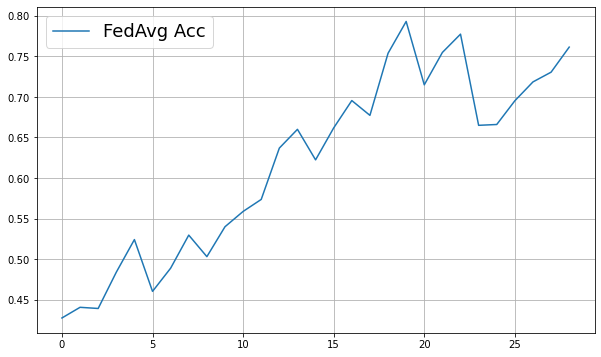

In [9]:
std_lst, average_acc_list = [], []


for i in range(30):
    sum, tmp = 0, []
    for j in range(20):
        sum = np.mean(globals()['acc{}'.format(j)][i]) + sum
        tmp.append(np.std(globals()['acc{}'.format(j)][i]))

    average_acc_list.append(sum/20)  
    std_lst.append(np.mean(tmp))

plt.figure(figsize=(10,6))
plt.plot(average_acc_list[1:], label='FedAvg Acc')

plt.grid(True)
plt.legend(fontsize=18)
plt.show()

In [10]:
np.mean(std_lst[1:])

0.1851718230907174

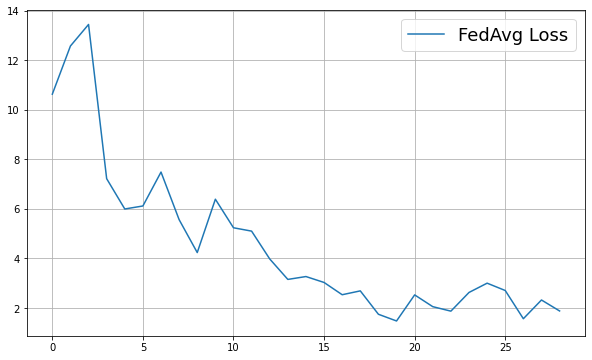

In [16]:
average_loss_list = []
std_lst_loss = []


for i in range(30):
    sum, tmp = 0, []
    for j in range(20):
        sum = np.mean(globals()['loss{}'.format(j)][i]) + sum
        tmp.append(np.std(globals()['loss{}'.format(j)][i]))

    average_loss_list.append(sum/20)
    std_lst_loss.append(np.mean(tmp))

plt.figure(figsize=(10,6))
plt.plot(average_loss_list[1:], label='FedAvg Loss')

plt.grid(True)
plt.legend(fontsize=18)
plt.show()

In [17]:
np.mean(std_lst_loss[1:])

5.332403375586704

In [6]:
for i in range(20):
    for j in range(30):
        if globals()['acc{}'.format(i)][-1][j] < 0.5:
            print(globals()['acc{}'.format(i)][-1][j])

0.42179998755455017
0.42800000309944153
0.4291999936103821
0.48989999294281006
0.4779999852180481
0.49219998717308044
0.47429999709129333
0.4869999885559082
0.48829999566078186
0.4505999982357025
0.3785000145435333
0.43880000710487366
0.46700000762939453
0.28850001096725464
0.4075999855995178
0.260699987411499
0.4205000102519989
0.367900013923645
0.3206000030040741
0.45649999380111694
0.314300000667572
0.46070000529289246
0.40209999680519104
0.4675999879837036
0.33570000529289246
0.4255000054836273
0.3513999879360199
0.4950000047683716
0.37119999527931213
0.4327000081539154
0.4302000105381012
0.3898000121116638
0.49219998717308044
0.36739999055862427
0.4020000100135803
0.4887000024318695
0.3756999969482422
0.48190000653266907
0.4406000077724457
0.4893999993801117
0.4104999899864197
0.49050000309944153
0.3176000118255615


In [7]:
np.array(average_acc_list)

array([0.390421  , 0.42729483, 0.44045583, 0.43900933, 0.48375817,
       0.52400983, 0.46010383, 0.488738  , 0.52952433, 0.5029655 ,
       0.53986683, 0.55875133, 0.5735705 , 0.6368985 , 0.660039  ,
       0.62236533, 0.66179417, 0.69554833, 0.67727983, 0.7538585 ,
       0.7931345 , 0.71494133, 0.75490817, 0.77748567, 0.664995  ,
       0.66601133, 0.69529933, 0.7185635 , 0.730573  , 0.76149567])

In [8]:
np.array(average_loss_list)

array([35.74691642, 10.62352105, 12.56732725, 13.43685574,  7.21270959,
        5.9903057 ,  6.11106692,  7.48004501,  5.55904367,  4.23122347,
        6.38418969,  5.23194141,  5.09638907,  3.97388568,  3.14755518,
        3.26346658,  3.0244778 ,  2.52956336,  2.68491038,  1.7412003 ,
        1.47027612,  2.5228313 ,  2.04774092,  1.86684715,  2.62114377,
        2.99598116,  2.70002203,  1.56140694,  2.31705878,  1.87456504])

In [18]:
np.array(std_lst)

array([0.17302761, 0.17748926, 0.19408488, 0.19444813, 0.1896443 ,
       0.1757168 , 0.221244  , 0.22710018, 0.21106729, 0.22894791,
       0.22640477, 0.21615448, 0.22964688, 0.19740847, 0.16462826,
       0.22680253, 0.17371264, 0.15446813, 0.1825843 , 0.11637422,
       0.09472427, 0.19232843, 0.1453023 , 0.12867772, 0.217448  ,
       0.20327807, 0.19947964, 0.18330424, 0.16047556, 0.13703721])